In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from tqdm import tqdm

import pickle

import os
import pickle
import neurokit2 as nk
from tqdm import tqdm

from utils.utils import ppg_findpeaks_bishop
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
from platform import python_version
print(python_version())

3.9.2


In [4]:
with open('df_separated.pkl', 'rb') as f:
    df = pickle.load(f)

In [156]:
df

Name                 block           group  \
0      12_AlsGA_baseline.txt              baseline  Wrong_feedback   
1        12_AlsGA_block1.txt  block1_level1_batch0  Wrong_feedback   
2        12_AlsGA_block1.txt  block1_level1_batch1  Wrong_feedback   
3        12_AlsGA_block1.txt  block1_level1_batch2  Wrong_feedback   
4        12_AlsGA_block1.txt  block1_level1_batch3  Wrong_feedback   
...                      ...                   ...             ...   
21552  59_ZolAI_training.txt      training_batch14  Wrong_feedback   
21553  59_ZolAI_training.txt      training_batch15  Wrong_feedback   
21554  59_ZolAI_training.txt      training_batch16  Wrong_feedback   
21555  59_ZolAI_training.txt      training_batch17  Wrong_feedback   
21556  59_ZolAI_training.txt      training_batch18  Wrong_feedback   

                                                     ECG  \
0      [-0.0785, -0.069, -0.05225, -0.04825, -0.0565,...   
1      [-0.05625, -0.064, -0.049, -0.041, -0.0535, -0...   
2      [-0.05225, -0.049, -0.0445, -0.04325, -0.0455,...   
3      [-0.06425, -0.067, -0.0595, -0.048, -0.04025, ...   
4      [-0.02475, -0.0375, -0.03275, -0.02725, -0.037...   
...                                                  ...   
21552  [-0.08975, -0.106, -0.11325, -0.09675, -0.074,...   
21553  [-0.0275, -0.00925, -0.0165, -0.02125, -0.0157...   
21554  [0.0345, 0.04575, 0.08625, 0.08125, 0.055, 0.0...   
21555  [-0.01725, -0.035, -0.07475, -0.08825, -0.0695...   
21556  [0.1995, 0.20575, 0.2385, 0.2765, 0.26625, 0.2...   

                                                     SGR  \
0      [0.605774, 0.610352, 0.614929, 0.621033, 0.625...   
1      [1.46942, 1.48773, 1.50604, 1.52435, 1.54114, ...   
2      [4.1626, 4.19159, 4.21906, 4.24652, 4.27399, 4...   
3      [-0.0778198, -0.0808716, -0.0839233, -0.085449...   
4      [-0.552368, -0.553894, -0.556946, -0.559998, -...   
...                                                  ...   
21552  [0.675964, 0.665283, 0.656128, 0.646973, 0.636...   
21553  [-0.790405, -0.782776, -0.775146, -0.765991, -...   
21554  [1.7746, 1.78528, 1.79443, 1.80511, 1.8158, 1....   
21555  [0.67749, 0.665283, 0.654602, 0.642395, 0.6317...   
21556  [-1.26801, -1.27411, -1.28021, -1.28632, -1.29...   

                                                     PPG length  
0      [2.6225, 2.55125, 2.47812, 2.40437, 2.33, 2.25...  30235  
1      [1.805, 1.76188, 1.71875, 1.67563, 1.63188, 1....   1250  
2      [1.91625, 1.86313, 1.81, 1.75688, 1.70375, 1.6...   1250  
3      [0.89125, 0.876875, 0.86375, 0.853125, 0.84562...   1250  
4      [0.666875, 0.661875, 0.6575, 0.653125, 0.64937...   1250  
...                                                  ...    ...  
21552  [-0.508125, -0.5125, -0.5175, -0.52125, -0.524...   1250  
21553  [0.39375, 0.388125, 0.38125, 0.374375, 0.3675,...   1250  
21554  [-0.3675, -0.37625, -0.384375, -0.39125, -0.39...   1250  
21555  [0.138125, 0.1675, 0.19375, 0.2175, 0.23875, 0...   1250  
21556  [-0.821875, -0.809375, -0.794375, -0.77625, -0...   1250  

[21557 rows x 7 columns]

In [6]:
df_test = pd.read_pickle('df_sep2.pkl')

In [7]:
df_test

Name          block           group  \
0     74_AmrVV_baseline.txt       baseline         Control   
1       74_AmrVV_block1.txt  block1_level1         Control   
2       74_AmrVV_block1.txt  block1_level2         Control   
3       74_AmrVV_block1.txt  block1_level3         Control   
4       74_AmrVV_block1.txt  block1_level4         Control   
...                     ...            ...             ...   
1481    73_AntEG_block3.txt  block3_level3  Wrong_feedback   
1482    73_AntEG_block3.txt  block3_level4  Wrong_feedback   
1483    73_AntEG_block3.txt  block3_level5  Wrong_feedback   
1484    73_AntEG_block3.txt  block3_level6  Wrong_feedback   
1485  73_AntEG_training.txt       training  Wrong_feedback   

                                                    ECG  \
0     [-0.018, -0.01975, -0.02025, -0.01675, -0.017,...   
1     [-0.179, -0.17725, -0.18375, -0.18425, -0.1777...   
2     [-0.06925, -0.06725, -0.068, -0.0715, -0.07175...   
3     [0.05925, 0.0535, 0.041, 0.04625, 0.0565, 0.04...   
4     [0.073, 0.069, 0.0655, 0.07025, 0.0735, 0.072,...   
...                                                 ...   
1481  [-0.01875, -0.00575, -0.0125, -0.03425, -0.033...   
1482  [-0.03225, -0.031, -0.0395, -0.049, -0.04575, ...   
1483  [-0.0405, -0.05125, -0.06775, -0.068, -0.04625...   
1484  [-0.05475, -0.069, -0.07225, -0.082, -0.09075,...   
1485  [-0.01425, -0.0195, -0.0135, -0.03025, -0.05, ...   

                                                    SGR  \
0     [-0.19989, -0.19989, -0.198364, -0.198364, -0....   
1     [-0.19989, -0.19989, -0.201416, -0.201416, -0....   
2     [-0.254822, -0.253296, -0.253296, -0.25177, -0...   
3     [-0.268555, -0.268555, -0.267029, -0.265503, -...   
4     [-0.00152588, -0.00152588, -0.00152588, -0.001...   
...                                                 ...   
1481  [0.175476, 0.175476, 0.177002, 0.177002, 0.177...   
1482  [-0.492859, -0.494385, -0.495911, -0.498962, -...   
1483  [-1.22223, -1.22528, -1.22833, -1.22986, -1.23...   
1484  [-1.64032, -1.6449, -1.64948, -1.65405, -1.658...   
1485  [2.88391, 2.92206, 2.96021, 2.99835, 3.03497, ...   

                                                    PPG  \
0     [0.974375, 0.95875, 0.941875, 0.924375, 0.9043...   
1     [-0.27625, -0.26125, -0.243125, -0.2225, -0.2,...   
2     [0.019375, 0.010625, 0.003125, -0.00375, -0.01...   
3     [0.125, 0.125, 0.125, 0.124375, 0.124375, 0.12...   
4     [-0.526875, -0.521875, -0.5175, -0.51375, -0.5...   
...                                                 ...   
1481  [0.17125, 0.16375, 0.15625, 0.149375, 0.14375,...   
1482  [0.495625, 0.503125, 0.51, 0.51625, 0.5225, 0....   
1483  [1.23125, 1.22813, 1.22438, 1.22, 1.215, 1.209...   
1484  [-0.59375, -0.605625, -0.616875, -0.6275, -0.6...   
1485  [-0.76, -0.77, -0.78125, -0.7925, -0.804375, -...   

                                       PPG_differential length  
0     [-4.05, -4.225, -4.5, -4.8625, -5.2375, -5.575...  30176  
1     [3.5375, 4.3125, 5.0, 5.5625, 5.9125, 6.1, 6.1...  21281  
2     [-2.1875, -2.0875, -1.9125, -1.6875, -1.4625, ...  21281  
3     [-0.075, -0.0375, -0.05, -0.1125, -0.2, -0.312...  21281  
4     [1.1875, 1.175, 1.0625, 0.875, 0.6625, 0.475, ...  21281  
...                                                 ...    ...  
1481  [-2.0375, -1.95, -1.8375, -1.675, -1.4875, -1....  17659  
1482  [1.925, 1.8375, 1.7125, 1.6125, 1.525, 1.4375,...  17659  
1483  [-0.5875, -0.8625, -1.075, -1.2375, -1.3875, -...  17659  
1484  [-3.175, -3.0125, -2.85, -2.6875, -2.5, -2.3, ...  17659  
1485  [-2.5125, -2.7625, -2.925, -3.0, -3.0, -2.9375...  22083  

[1438 rows x 8 columns]

In [8]:
def rr_interval(ecg_cleaned):
    
    """This function takes ECG and returns RR intervals"""
    
    rpeaks, info = nk.ecg_peaks(ecg_cleaned, sampling_rate=250, correct_artifacts=True)
    time_diff = []
    for i in range(len(info['ECG_R_Peaks'])):
        if i == len(info['ECG_R_Peaks'])-1:
            break
        else:
            time_diff.append(info['ECG_R_Peaks'][i+1] - info['ECG_R_Peaks'][i])
    return time_diff, info

In [9]:
def get_plots(df):
    for i in range(len(df)):
        ecg = df["ECG"][i]
        ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=250)
        rpeaks, info = nk.ecg_peaks(ecg_cleaned, sampling_rate=250, correct_artifacts=True)
        hrv_features = nk.hrv_time(rpeaks)
        mean_baseline = hrv_features['HRV_MeanNN'][0]
        print(df['block'][i], 'Mean : ',mean_baseline)
        test = rr_interval(df["ECG"][i])
        plt.plot(test)
        plt.title(df['block'][i])
        plt.ylim(100,300)
        plt.savefig("plots/{}.png".format(df['block'][i]), dpi = 300)
        plt.close()

In [10]:
names = []
for name in df['Name']:
    names.append(name[3:8])
    
unique_names = np.unique(names, axis=0)

In [70]:
unique_names

array(['AlsGA', 'AmrVV', 'AntAA', 'AntEG', 'AntMI', 'AsiDI', 'BabYV',
       'BarEA', 'BarSR', 'BurAV', 'ButAS', 'DavAS', 'DoiNA', 'EgoAP',
       'ElcRD', 'FedYA', 'GaiMR', 'GalSK', 'GeiEA', 'GibGR', 'GlaNA',
       'GulAS', 'IboSN', 'IotMY', 'IvaVV', 'KalEY', 'KirDA', 'KorMN',
       'KosPV', 'KozVA', 'KruIA', 'KudDY', 'KulDS', 'KulSS', 'LeoAD',
       'LodAV', 'MarOV', 'MarYA', 'MasAV', 'MazAA', 'MilSG', 'MitDG',
       'MitVG', 'NekAK', 'NemMS', 'NikAO', 'PavMA', 'PavSO', 'PorGV',
       'ProNI', 'RosSM', 'SarMA', 'SidFA', 'SmiYO', 'SneOP', 'SteDI',
       'SteKO', 'StePI', 'SteVR', 'StoIA', 'SubAA', 'SyaEG', 'TihYA',
       'TimSD', 'TimYE', 'TolDI', 'TroAA', 'TseSA', 'TumNY', 'UskDA',
       'UskNA', 'VolAR', 'ZelAS', 'ZolAI'], dtype='<U5')

In [12]:
df

Name                 block           group  \
0      12_AlsGA_baseline.txt              baseline  Wrong_feedback   
1        12_AlsGA_block1.txt  block1_level1_batch0  Wrong_feedback   
2        12_AlsGA_block1.txt  block1_level1_batch1  Wrong_feedback   
3        12_AlsGA_block1.txt  block1_level1_batch2  Wrong_feedback   
4        12_AlsGA_block1.txt  block1_level1_batch3  Wrong_feedback   
...                      ...                   ...             ...   
21552  59_ZolAI_training.txt      training_batch14  Wrong_feedback   
21553  59_ZolAI_training.txt      training_batch15  Wrong_feedback   
21554  59_ZolAI_training.txt      training_batch16  Wrong_feedback   
21555  59_ZolAI_training.txt      training_batch17  Wrong_feedback   
21556  59_ZolAI_training.txt      training_batch18  Wrong_feedback   

                                                     ECG  \
0      [-0.0785, -0.069, -0.05225, -0.04825, -0.0565,...   
1      [-0.05625, -0.064, -0.049, -0.041, -0.0535, -0...   
2      [-0.05225, -0.049, -0.0445, -0.04325, -0.0455,...   
3      [-0.06425, -0.067, -0.0595, -0.048, -0.04025, ...   
4      [-0.02475, -0.0375, -0.03275, -0.02725, -0.037...   
...                                                  ...   
21552  [-0.08975, -0.106, -0.11325, -0.09675, -0.074,...   
21553  [-0.0275, -0.00925, -0.0165, -0.02125, -0.0157...   
21554  [0.0345, 0.04575, 0.08625, 0.08125, 0.055, 0.0...   
21555  [-0.01725, -0.035, -0.07475, -0.08825, -0.0695...   
21556  [0.1995, 0.20575, 0.2385, 0.2765, 0.26625, 0.2...   

                                                     SGR  \
0      [0.605774, 0.610352, 0.614929, 0.621033, 0.625...   
1      [1.46942, 1.48773, 1.50604, 1.52435, 1.54114, ...   
2      [4.1626, 4.19159, 4.21906, 4.24652, 4.27399, 4...   
3      [-0.0778198, -0.0808716, -0.0839233, -0.085449...   
4      [-0.552368, -0.553894, -0.556946, -0.559998, -...   
...                                                  ...   
21552  [0.675964, 0.665283, 0.656128, 0.646973, 0.636...   
21553  [-0.790405, -0.782776, -0.775146, -0.765991, -...   
21554  [1.7746, 1.78528, 1.79443, 1.80511, 1.8158, 1....   
21555  [0.67749, 0.665283, 0.654602, 0.642395, 0.6317...   
21556  [-1.26801, -1.27411, -1.28021, -1.28632, -1.29...   

                                                     PPG length  
0      [2.6225, 2.55125, 2.47812, 2.40437, 2.33, 2.25...  30235  
1      [1.805, 1.76188, 1.71875, 1.67563, 1.63188, 1....   1250  
2      [1.91625, 1.86313, 1.81, 1.75688, 1.70375, 1.6...   1250  
3      [0.89125, 0.876875, 0.86375, 0.853125, 0.84562...   1250  
4      [0.666875, 0.661875, 0.6575, 0.653125, 0.64937...   1250  
...                                                  ...    ...  
21552  [-0.508125, -0.5125, -0.5175, -0.52125, -0.524...   1250  
21553  [0.39375, 0.388125, 0.38125, 0.374375, 0.3675,...   1250  
21554  [-0.3675, -0.37625, -0.384375, -0.39125, -0.39...   1250  
21555  [0.138125, 0.1675, 0.19375, 0.2175, 0.23875, 0...   1250  
21556  [-0.821875, -0.809375, -0.794375, -0.77625, -0...   1250  

[21557 rows x 7 columns]

In [13]:
def divide_chunks(l, n):
    
    """Auxiliary function for dividing batches"""
    
    # looping till length l
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [14]:
def separate_for_seconds(df, ticks):
    new_df = pd.DataFrame(columns = df.columns)
    
    for i in range(len(df)):
        if df['block'][i] == 'baseline':
            row = {'Name' : df['Name'][i],
                   'block' : df['block'][i],
                   'group' : df['group'][i],
                   'ECG' : df['ECG'][i],
                   'SGR' : df['SGR'][i],
                   'PPG' : df['PPG'][i],
                   'length' : df['length'][i]}
            new_df = new_df.append(row, ignore_index = True)
        else:
            ECG_batches = list(divide_chunks(df['ECG'][i],ticks))
            SGR_batches = list(divide_chunks(df['SGR'][i],ticks))
            PPG_batches = list(divide_chunks(df['PPG'][i],ticks))
            
            ECG_batches = [x for x in ECG_batches if len(x) >= 250]
            SGR_batches = [x for x in SGR_batches if len(x) >= 250]
            PPG_batches = [x for x in PPG_batches if len(x) >= 250]
             
            ECG_batches = [sublist[:-(len(sublist) % 250)] if len(sublist) % 250 != 0 else sublist for sublist in ECG_batches]
            SGR_batches = [sublist[:-(len(sublist) % 250)] if len(sublist) % 250 != 0 else sublist for sublist in SGR_batches]
            PPG_batches = [sublist[:-(len(sublist) % 250)] if len(sublist) % 250 != 0 else sublist for sublist in PPG_batches]
            
            k = 0 #batch number
            
            for ecg_batch, sgr_batch, ppg_batch in zip(ECG_batches, SGR_batches, PPG_batches):
                row = {'Name' : df['Name'][i],
                   'block' : '{}_batch{}'.format(df['block'][i],k),
                   'group' : df['group'][i],
                   'ECG' : ecg_batch,
                   'SGR' : sgr_batch,
                   'PPG' : ppg_batch,
                   'length' : len(ecg_batch)}
                new_df = new_df.append(row, ignore_index = True)
                k+=1
    return new_df
            
            
            

In [15]:
def separate(df,unique_names):
    output = pd.DataFrame()
    for name in tqdm(unique_names):
        tmp = df[df['Name'].str.contains(name)]
        tmp = tmp.reset_index(drop = True)
        tmp_out = separate_for_seconds(tmp,1250)
        output = output.append(tmp_out, ignore_index = True)
    return output 

In [175]:
df_new = separate(df_test,unique_names)

100%|██████████████████████████████████████████████████████████████████████████████████| 74/74 [01:01<00:00,  1.20it/s]


In [16]:
df[df['Name'].str.contains('AlsGA')]

Name                 block           group  \
0    12_AlsGA_baseline.txt              baseline  Wrong_feedback   
1      12_AlsGA_block1.txt  block1_level1_batch0  Wrong_feedback   
2      12_AlsGA_block1.txt  block1_level1_batch1  Wrong_feedback   
3      12_AlsGA_block1.txt  block1_level1_batch2  Wrong_feedback   
4      12_AlsGA_block1.txt  block1_level1_batch3  Wrong_feedback   
..                     ...                   ...             ...   
297  12_AlsGA_training.txt      training_batch14  Wrong_feedback   
298  12_AlsGA_training.txt      training_batch15  Wrong_feedback   
299  12_AlsGA_training.txt      training_batch16  Wrong_feedback   
300  12_AlsGA_training.txt      training_batch17  Wrong_feedback   
301  12_AlsGA_training.txt      training_batch18  Wrong_feedback   

                                                   ECG  \
0    [-0.0785, -0.069, -0.05225, -0.04825, -0.0565,...   
1    [-0.05625, -0.064, -0.049, -0.041, -0.0535, -0...   
2    [-0.05225, -0.049, -0.0445, -0.04325, -0.0455,...   
3    [-0.06425, -0.067, -0.0595, -0.048, -0.04025, ...   
4    [-0.02475, -0.0375, -0.03275, -0.02725, -0.037...   
..                                                 ...   
297  [-0.0485, -0.04775, -0.0555, -0.047, -0.0375, ...   
298  [0.02275, 0.025, 0.01525, 0.0005, 0.00325, 0.0...   
299  [0.121, 0.1335, 0.149, 0.165, 0.1675, 0.153, 0...   
300  [-0.00875, 0.00025, -0.02025, -0.03, -0.01375,...   
301  [0.246, 0.30275, 0.28225, 0.218, 0.15425, 0.07...   

                                                   SGR  \
0    [0.605774, 0.610352, 0.614929, 0.621033, 0.625...   
1    [1.46942, 1.48773, 1.50604, 1.52435, 1.54114, ...   
2    [4.1626, 4.19159, 4.21906, 4.24652, 4.27399, 4...   
3    [-0.0778198, -0.0808716, -0.0839233, -0.085449...   
4    [-0.552368, -0.553894, -0.556946, -0.559998, -...   
..                                                 ...   
297  [0.444031, 0.439453, 0.434875, 0.430298, 0.425...   
298  [-0.662231, -0.663757, -0.666809, -0.668335, -...   
299  [0.369263, 0.369263, 0.370789, 0.370789, 0.370...   
300  [1.04523, 1.06812, 1.091, 1.11389, 1.13678, 1....   
301  [-1.05133, -1.05133, -1.0498, -1.0498, -1.0482...   

                                                   PPG length  
0    [2.6225, 2.55125, 2.47812, 2.40437, 2.33, 2.25...  30235  
1    [1.805, 1.76188, 1.71875, 1.67563, 1.63188, 1....   1250  
2    [1.91625, 1.86313, 1.81, 1.75688, 1.70375, 1.6...   1250  
3    [0.89125, 0.876875, 0.86375, 0.853125, 0.84562...   1250  
4    [0.666875, 0.661875, 0.6575, 0.653125, 0.64937...   1250  
..                                                 ...    ...  
297  [1.765, 1.70188, 1.63875, 1.575, 1.51125, 1.44...   1250  
298  [-0.096875, -0.140625, -0.184375, -0.226875, -...   1250  
299  [-1.96438, -1.97687, -1.98563, -1.99, -1.98687...   1250  
300  [0.589375, 0.5925, 0.595625, 0.598125, 0.59937...   1250  
301  [-1.86187, -1.86688, -1.87125, -1.87563, -1.88...   1250  

[302 rows x 7 columns]

In [17]:
tmp = df[df['Name'].str.contains('AlsGA')]

In [18]:
tmp

Name                 block           group  \
0    12_AlsGA_baseline.txt              baseline  Wrong_feedback   
1      12_AlsGA_block1.txt  block1_level1_batch0  Wrong_feedback   
2      12_AlsGA_block1.txt  block1_level1_batch1  Wrong_feedback   
3      12_AlsGA_block1.txt  block1_level1_batch2  Wrong_feedback   
4      12_AlsGA_block1.txt  block1_level1_batch3  Wrong_feedback   
..                     ...                   ...             ...   
297  12_AlsGA_training.txt      training_batch14  Wrong_feedback   
298  12_AlsGA_training.txt      training_batch15  Wrong_feedback   
299  12_AlsGA_training.txt      training_batch16  Wrong_feedback   
300  12_AlsGA_training.txt      training_batch17  Wrong_feedback   
301  12_AlsGA_training.txt      training_batch18  Wrong_feedback   

                                                   ECG  \
0    [-0.0785, -0.069, -0.05225, -0.04825, -0.0565,...   
1    [-0.05625, -0.064, -0.049, -0.041, -0.0535, -0...   
2    [-0.05225, -0.049, -0.0445, -0.04325, -0.0455,...   
3    [-0.06425, -0.067, -0.0595, -0.048, -0.04025, ...   
4    [-0.02475, -0.0375, -0.03275, -0.02725, -0.037...   
..                                                 ...   
297  [-0.0485, -0.04775, -0.0555, -0.047, -0.0375, ...   
298  [0.02275, 0.025, 0.01525, 0.0005, 0.00325, 0.0...   
299  [0.121, 0.1335, 0.149, 0.165, 0.1675, 0.153, 0...   
300  [-0.00875, 0.00025, -0.02025, -0.03, -0.01375,...   
301  [0.246, 0.30275, 0.28225, 0.218, 0.15425, 0.07...   

                                                   SGR  \
0    [0.605774, 0.610352, 0.614929, 0.621033, 0.625...   
1    [1.46942, 1.48773, 1.50604, 1.52435, 1.54114, ...   
2    [4.1626, 4.19159, 4.21906, 4.24652, 4.27399, 4...   
3    [-0.0778198, -0.0808716, -0.0839233, -0.085449...   
4    [-0.552368, -0.553894, -0.556946, -0.559998, -...   
..                                                 ...   
297  [0.444031, 0.439453, 0.434875, 0.430298, 0.425...   
298  [-0.662231, -0.663757, -0.666809, -0.668335, -...   
299  [0.369263, 0.369263, 0.370789, 0.370789, 0.370...   
300  [1.04523, 1.06812, 1.091, 1.11389, 1.13678, 1....   
301  [-1.05133, -1.05133, -1.0498, -1.0498, -1.0482...   

                                                   PPG length  
0    [2.6225, 2.55125, 2.47812, 2.40437, 2.33, 2.25...  30235  
1    [1.805, 1.76188, 1.71875, 1.67563, 1.63188, 1....   1250  
2    [1.91625, 1.86313, 1.81, 1.75688, 1.70375, 1.6...   1250  
3    [0.89125, 0.876875, 0.86375, 0.853125, 0.84562...   1250  
4    [0.666875, 0.661875, 0.6575, 0.653125, 0.64937...   1250  
..                                                 ...    ...  
297  [1.765, 1.70188, 1.63875, 1.575, 1.51125, 1.44...   1250  
298  [-0.096875, -0.140625, -0.184375, -0.226875, -...   1250  
299  [-1.96438, -1.97687, -1.98563, -1.99, -1.98687...   1250  
300  [0.589375, 0.5925, 0.595625, 0.598125, 0.59937...   1250  
301  [-1.86187, -1.86688, -1.87125, -1.87563, -1.88...   1250  

[302 rows x 7 columns]

In [19]:
ecg1 = df["ECG"][0]
ecg_cleaned1 = nk.ecg_clean(ecg1, sampling_rate=250)
signals1, info1 = nk.ecg_process(ecg_cleaned1, sampling_rate=250, method = 'neurokit')
hrv_features1 = nk.hrv_time(signals1['ECG_R_Peaks'])
mean_baseline1 = hrv_features1['HRV_MeanNN'][0]
std_baseline1 = hrv_features1['HRV_SDNN'][0]
print(mean_baseline1,std_baseline1)

232.7906976744186 10.537636727022699


In [20]:
signals1

ECG_Raw  ECG_Clean   ECG_Rate  ECG_Quality  ECG_R_Peaks  ECG_P_Peaks  \
0     -0.016467  -0.009900  64.435564     0.622074            0            0   
1     -0.009006  -0.004824  64.435564     0.622074            0            0   
2     -0.002536  -0.000464  64.435564     0.622074            0            0   
3      0.001043   0.002622  64.435564     0.622074            0            0   
4      0.001303   0.004298  64.435564     0.622074            0            0   
...         ...        ...        ...          ...          ...          ...   
30230 -0.068758  -0.057998  68.181818     0.000000            0            0   
30231 -0.063770  -0.052290  68.181818     0.000000            0            0   
30232 -0.054604  -0.043398  68.181818     0.000000            0            0   
30233 -0.040733  -0.031816  68.181818     0.000000            0            0   
30234 -0.023401  -0.018667  68.181818     0.000000            0            0   

       ECG_P_Onsets  ECG_P_Offsets  ECG_Q_Peaks  ECG_R_Onsets  ECG_R_Offsets  \
0                 0              0            0             0              0   
1                 0              0            0             0              0   
2                 0              0            0             0              0   
3                 0              0            0             0              0   
4                 0              0            0             0              0   
...             ...            ...          ...           ...            ...   
30230             0              0            0             0              0   
30231             0              0            0             0              0   
30232             0              0            0             0              0   
30233             0              0            0             0              0   
30234             0              0            0             0              0   

       ECG_S_Peaks  ECG_T_Peaks  ECG_T_Onsets  ECG_T_Offsets  \
0                0            0             0              0   
1                0            0             0              0   
2                0            0             0              0   
3                0            0             0              0   
4                0            0             0              0   
...            ...          ...           ...            ...   
30230            0            0             0              0   
30231            0            0             0              0   
30232            0            0             0              0   
30233            0            0             0              0   
30234            0            0             0              0   

       ECG_Phase_Atrial  ECG_Phase_Completion_Atrial  ECG_Phase_Ventricular  \
0                   NaN                          0.0                    NaN   
1                   NaN                          0.0                    NaN   
2                   NaN                          0.0                    NaN   
3                   NaN                          0.0                    NaN   
4                   NaN                          0.0                    NaN   
...                 ...                          ...                    ...   
30230               NaN                          0.0                    NaN   
30231               NaN                          0.0                    NaN   
30232               NaN                          0.0                    NaN   
30233               NaN                          0.0                    NaN   
30234               NaN                          0.0                    NaN   

       ECG_Phase_Completion_Ventricular  
0                                   0.0  
1                                   0.0  
2                                   0.0  
3                                   0.0  
4                                   0.0  
...                                 ...  
30230                               0.0  
30231                           

In [21]:
def exctract_hrv(ecg_cleaned, baseline_mean, baseline_std, coefficient = 1.5):
    
    up = 0
    down = 0
    calm = 0
    
    increase_idx = []
    decrease_idx = []
    calm_idx = []
    rr_intervals, info = rr_interval(ecg_cleaned)
    
    for k in range(len(rr_intervals)):
        if rr_intervals[k] < baseline_mean-coefficient*baseline_std:
            down+=1
            decrease_idx.append(k)
        elif rr_intervals[k] > baseline_mean+coefficient*baseline_std:
            up+=1
            increase_idx.append(k)
        else:
            calm+=1
            calm_idx.append(k)
    if calm != 0 and up == 0 and down == 0:
        print('calm', calm_idx)
        return 'calm', calm_idx
    elif calm == 0 and up == 0 and down == 0:
        print('calm', calm_idx)
        return 'calm', calm_idx
    elif down >= up:
        print('decrease', decrease_idx)
        return 'decrease', decrease_idx
    elif up > down:
        print('increase', increase_idx)
        return 'increase', increase_idx
    
        

In [22]:
state, indexes_for_hr = exctract_hrv(df['ECG'][3], 232.7906976744186, 10.537636727022699, coefficient = 1.5)

decrease [2, 3]


In [23]:
def exctract_hr(signals, info, indexes_for_hr):
    
    #signals, info = nk.ecg_process(ecg_cleaned, sampling_rate=250, method = 'neurokit') 
    hr_derivative = np.gradient(signals['ECG_Rate'])
    hr_increases = np.where(hr_derivative > 0)[0] #Compute indexes where HR increasing 
    hr_decreases = np.where(hr_derivative < 0)[0] #and decreasing
    time = np.arange(len(signals['ECG_Rate']))
    
    increase = 0
    decrease = 0
    calm = 0
    for idx in indexes_for_hr:
        start = info['ECG_R_Peaks'][idx]
        end = info['ECG_R_Peaks'][idx+1]

        moment = np.arange(start,end+1)
    
        increase_count = np.sum(np.isin(moment, time[hr_increases]))
        decrease_count = np.sum(np.isin(moment, time[hr_decreases]))
        print(start,end)
        if increase_count > decrease_count:
            print(' HR increase')
            increase+=1
        elif decrease_count > increase_count:
            print(' HR decrease')
            decrease+=1
        else:
            print(' HR calm')
            calm +=1
    max_value = max(increase, decrease, calm)
    if max_value == increase:
        print('increase')
        return 'increase'
    elif max_value == decrease:
        print('decrease')
        return 'decrease'
    else:
        print('calm')
        return 'calm'
        
    

In [24]:
def extract_p_wave(signals):
    p_wave_amplitude = []
    offsets = signals[signals['ECG_P_Offsets'] == 1]
    onsets = signals[signals['ECG_P_Onsets'] == 1]
    peaks = signals[signals['ECG_P_Peaks'] == 1]
    peaks_len = len(signals[signals['ECG_P_Peaks'] == 1])
    offsets_len = len(signals[signals['ECG_P_Offsets'] == 1])
    onsets_len = len(signals[signals['ECG_P_Onsets'] == 1])
    
    if peaks_len != offsets_len or peaks_len != onsets_len or offsets_len != onsets_len:
        if min(peaks_len,offsets_len,onsets_len) == peaks_len:
            offsets = offsets.drop(index=offsets.index[0])
            onsets = onsets.drop(index=onsets.index[0])
        elif min(peaks_len,offsets_len,onsets_len) == offsets_len:
            peaks = peaks.drop(index=peaks.index[0])
            onsets = onsets.drop(index=onsets.index[0])
        elif min(peaks_len,offsets_len,onsets_len) == onsets_len:
            offsets = offsets.drop(index=offsets.index[0])
            peaks = peaks.drop(index=peaks.index[0])
        for i in range(len(peaks)):
             p_wave_amplitude.append(offsets.index[i]-onsets.index[i])
        return np.mean(p_wave_amplitude)
    else:
        for i in range(len(peaks)):
             p_wave_amplitude.append(offsets.index[i]-onsets.index[i])
        return np.mean(p_wave_amplitude)
    
    

In [25]:
def moving_average(data, window_size):
    """Auxiliary function for extract_sgr"""
    # Create an empty array to hold the moving averages
    ma = np.empty_like(data)
    ma.fill(np.nan)
    
    # Compute the moving average for each window
    for i in range(len(data)):
        window_start = max(0, i - window_size + 1)
        window_end = i + 1
        window_data = data[window_start:window_end]
        ma[i] = np.mean(window_data)
        
    return ma

In [26]:
def extract_sgr(sgr, info, indexes_for_sgr):
    if len(sgr) > 1250:
        sgr_data_filtered = moving_average(sgr,500) # Filtering for baselines 
    else:
        sgr_data_filtered = moving_average(sgr,25) # Filtering for blocks
        
    sgr_derivative = np.gradient(sgr_data_filtered)
    
    sgr_increases = np.where(sgr_derivative > 0)[0]
    sgr_decreases = np.where(sgr_derivative < 0)[0]
    time = np.arange(len(sgr_data_filtered))
    
    increase = 0
    decrease = 0
    calm = 0
    for idx in indexes_for_hr:
        start = info['ECG_R_Peaks'][idx]
        end = info['ECG_R_Peaks'][idx+1]

        moment = np.arange(start,end+1)
    
        increase_count = np.sum(np.isin(moment, time[sgr_increases]))
        decrease_count = np.sum(np.isin(moment, time[sgr_decreases]))
        print(start,end)
        if increase_count > decrease_count:
            print(' SRG increase')
            increase+=1
        elif decrease_count > increase_count:
            print(' SRG decrease')
            decrease+=1
        else:
            print('SRG calm')
            calm +=1
    max_value = max(increase, decrease, calm)
    if max_value == increase:
        print('increase')
        return "increase"
    elif max_value == decrease:
        print('decrease')
        return "decrease"
    else:
        print('calm')
        return "calm"
    

In [27]:
ecg_cleaned = nk.ecg_clean(df['ECG'][2], sampling_rate=250)
signals, info = nk.ecg_process(ecg_cleaned, sampling_rate=250, method = 'neurokit')
state, indexes_for_hr = exctract_hrv(ecg_cleaned, 232.7906976744186, 10.537636727022699, coefficient = 1.5)
print(state)

increase [1, 3]
increase


In [28]:
exctract_hr(signals, info, indexes_for_hr)

356 610
 HR decrease
854 1106
 HR decrease
decrease


'decrease'

In [29]:
extract_p_wave(signals)

22.75

In [30]:
extract_sgr(df['SGR'][2], info, indexes_for_hr)

356 610
 SRG decrease
854 1106
 SRG decrease
decrease


'decrease'

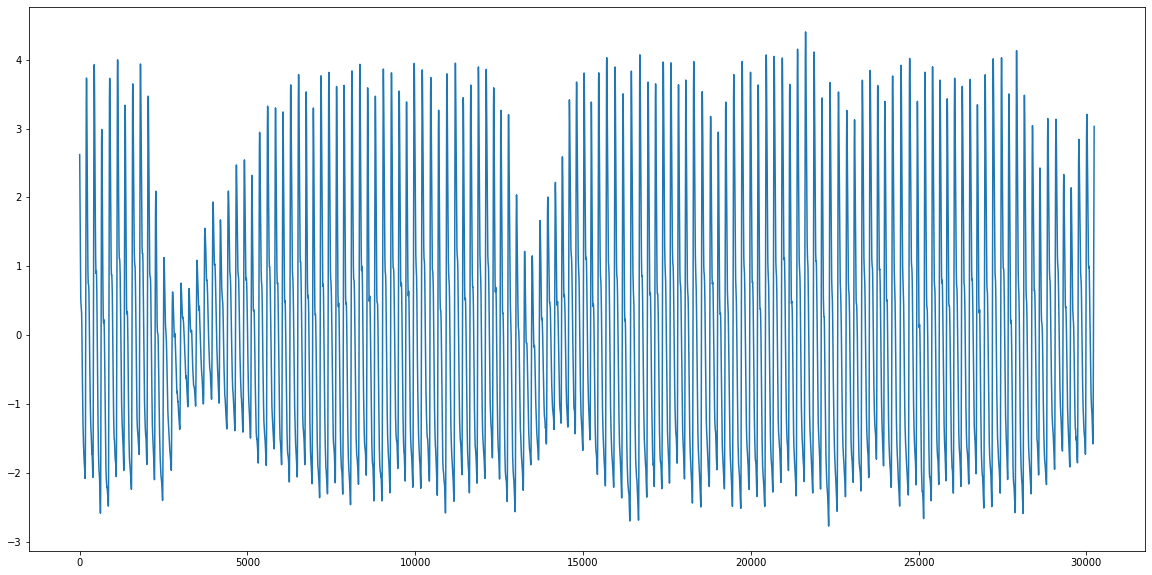

In [31]:
plt.plot(df['PPG'][0])

In [61]:
#ppg_clean = nk.ppg_clean(df['PPG'][1], method='elgendi', sampling_rate = 250)
signals_ppg, info_ppg = nk.ppg_process(df['PPG'][0], sampling_rate=250)

In [78]:
signals_ppg, info_ppg = nk.ppg_process(df['PPG'][2], sampling_rate=250)

In [79]:
signals_ppg

PPG_Raw  PPG_Clean   PPG_Rate  PPG_Peaks
0     1.916250   0.385117  60.362173        0.0
1     1.863130   0.341157  60.362173        0.0
2     1.810000   0.297332  60.362173        0.0
3     1.756880   0.253629  60.362173        0.0
4     1.703750   0.210037  60.362173        0.0
...        ...        ...        ...        ...
1245  0.982500   0.310535  60.000000        0.0
1246  0.962500   0.284626  60.000000        0.0
1247  0.943125   0.259982  60.000000        0.0
1248  0.924375   0.236490  60.000000        0.0
1249  0.907500   0.214049  60.000000        0.0

[1250 rows x 4 columns]

In [64]:
from utils.utils import ppg_findpeaks_bishop, np

In [138]:
def ppg_amplitude(peaks, signal,baseline_mean_amp,baseline_std_amp):
    amplitude =[]
    for up, down in zip(signal['PPG_Clean'][peaks[0][0]], signals_ppg['PPG_Clean'][peaks[1][0]]):
        amplitude.append(up-down)
    up = 0
    down = 0
    calm = 0

    for k in range(len(amplitude)):
        if amplitude[k] < baseline_mean_amp-baseline_std_amp:
            down+=1
        elif amplitude[k] > baseline_mean_amp+baseline_std_amp:
            up+=1
        else:
            calm+=1
    if calm != 0 and up == 0 and down == 0:
        print('calm')
        return 'calm', amplitude
    elif calm == 0 and up == 0 and down == 0:
        print('calm')
        return 'calm', amplitude
    elif down >= up:
        print('decrease')
        return 'decrease', amplitude
    elif up > down:
        print('increase')
        return 'increase', amplitude
    
    

In [196]:
def ppg_frequency(info_ppg, baselime_mean_freq, baselime_std_freq):
    
    time_diff_ppg = []
    for i in range(len(info_ppg['PPG_Peaks'])):
        if i == len(info_ppg['PPG_Peaks'])-1:
            break
        else:
            time_diff_ppg.append(info_ppg['PPG_Peaks'][i+1] - info_ppg['PPG_Peaks'][i])
    up = 0
    down = 0
    calm = 0
    
    for k in range(len(time_diff_ppg)):
        if time_diff_ppg[k] < baselime_mean_freq-baselime_std_freq:
            down+=1
        elif time_diff_ppg[k] > baselime_mean_freq+baselime_std_freq:
            up+=1
        else:
            calm+=1
            
    if calm != 0 and up == 0 and down == 0:
        print('calm')
        return 'calm', time_diff_ppg
    elif calm == 0 and up == 0 and down == 0:
        print('calm')
        return 'calm', time_diff_ppg
    elif down >= up:
        print('decrease')
        return 'decrease', time_diff_ppg
    elif up > down:
        print('increase')
        return 'increase', time_diff_ppg

In [121]:
def exctract_ppg(signal, baseline_mean_amp, baseline_std_amp, baseline_mean_freq, baseline_std_freq):
    peaks = ppg_findpeaks_bishop(signal['PPG_Clean'])
    amplitude = ppg_amplitude(peaks,signal)
    frequency = ppg_frequency(peaks)
    return amplitude, frequency
    

In [193]:
signals_ppg, info_ppg = nk.ppg_process(df['PPG'][7], sampling_rate=250)

In [200]:
_, ppg_freq = ppg_frequency(info_ppg,freq_mean,freq_std)

decrease


In [194]:
freq_mean = np.mean(ppg_frequency(info_ppg))
freq_std = np.std(ppg_frequency(info_ppg))

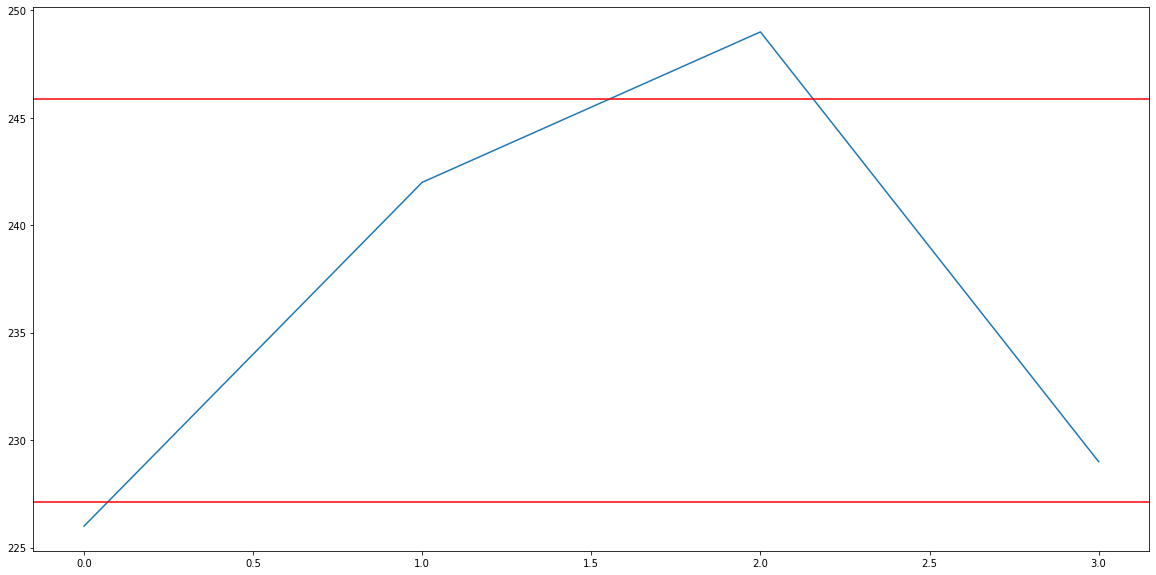

In [201]:
plt.plot(ppg_freq)
plt.axhline(y=freq_mean-freq_std, color='r')
plt.axhline(y=freq_mean+freq_std, color='r')

In [152]:
peaks = ppg_findpeaks_bishop(signals_ppg['PPG_Clean'])

In [153]:
p, amplitude = ppg_amplitude(peaks,signals_ppg,ppg_mean,ppg_std)

decrease


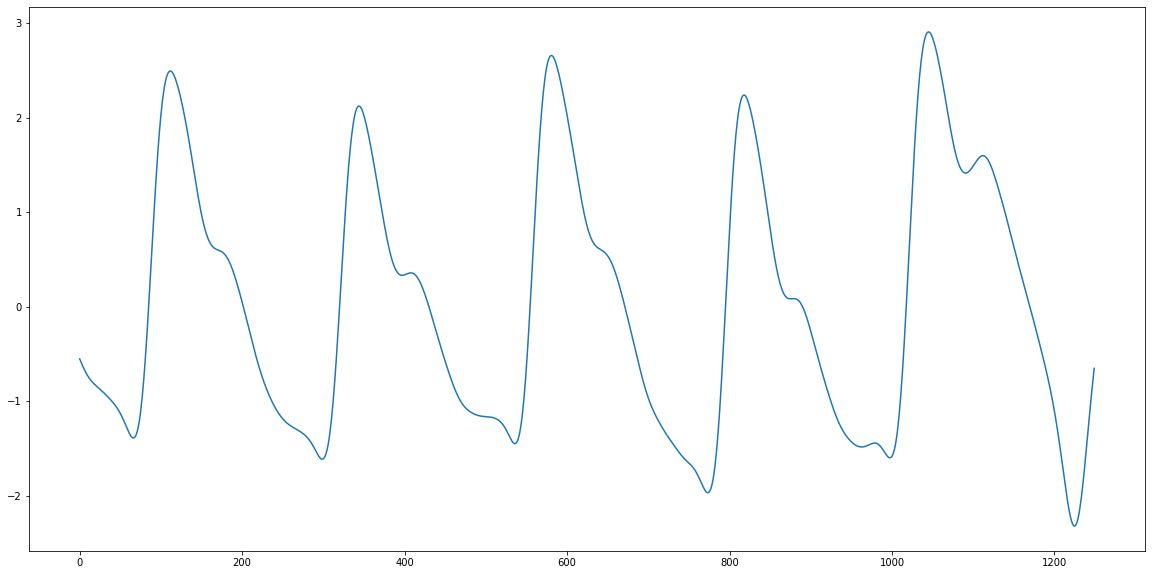

In [154]:
plt.plot(signals_ppg['PPG_Clean'])

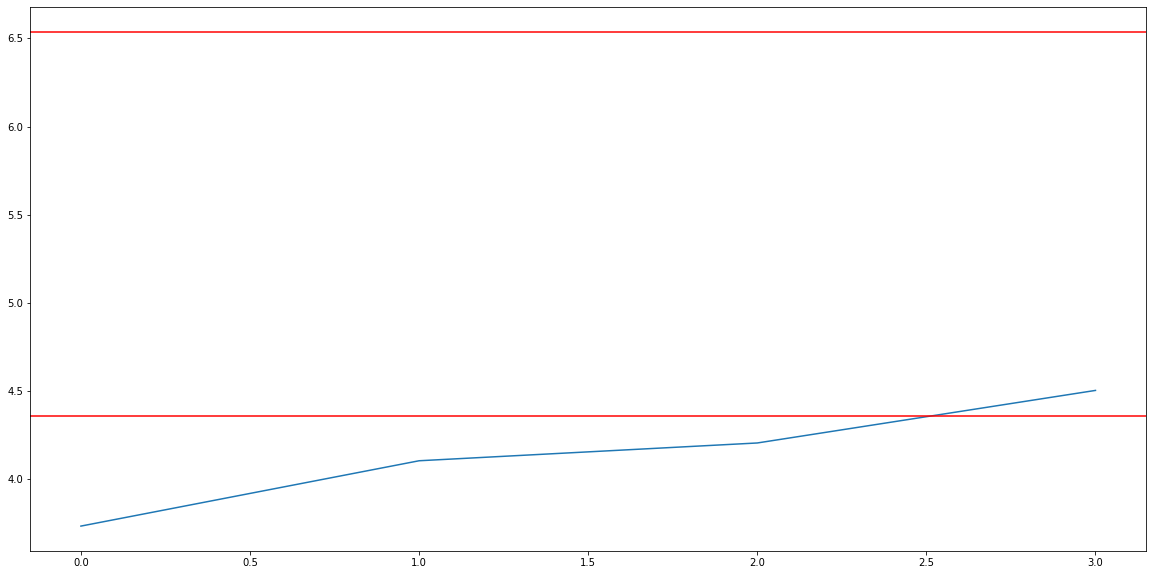

In [155]:
plt.plot(amplitude)
plt.axhline(y=ppg_mean-ppg_std, color='r')
plt.axhline(y=ppg_mean+ppg_std, color='r')

In [81]:
signals_ppg['PPG_Clean'][peaks[0][0]]

207    2.406233
451    2.449995
706    2.155478
951    2.204114
Name: PPG_Clean, dtype: float64

In [82]:
signals_ppg['PPG_Clean'][peaks[1][0]]

162   -1.474607
405   -1.489560
660   -1.669796
904   -1.315594
Name: PPG_Clean, dtype: float64

In [83]:
peaks

(array([[207, 451, 706, 951]]), array([[162, 405, 660, 904]]))

In [84]:
peaks[1][0]

array([162, 405, 660, 904])

In [71]:
ppg_mean = np.mean(ppg_amplitude(peaks,signals_ppg))
ppg_std = np.std(ppg_amplitude(peaks,signals_ppg))

In [85]:
ppg_mean

5.447664323810587

In [86]:
ppg_std

1.0895010434586343

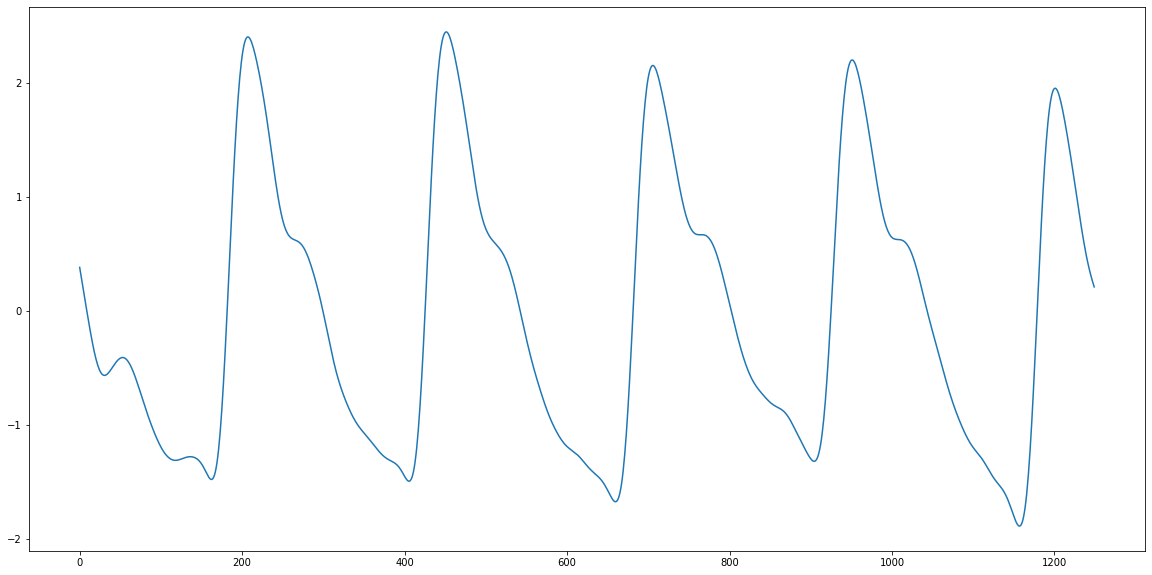

In [87]:
plt.plot(signals_ppg['PPG_Clean'])

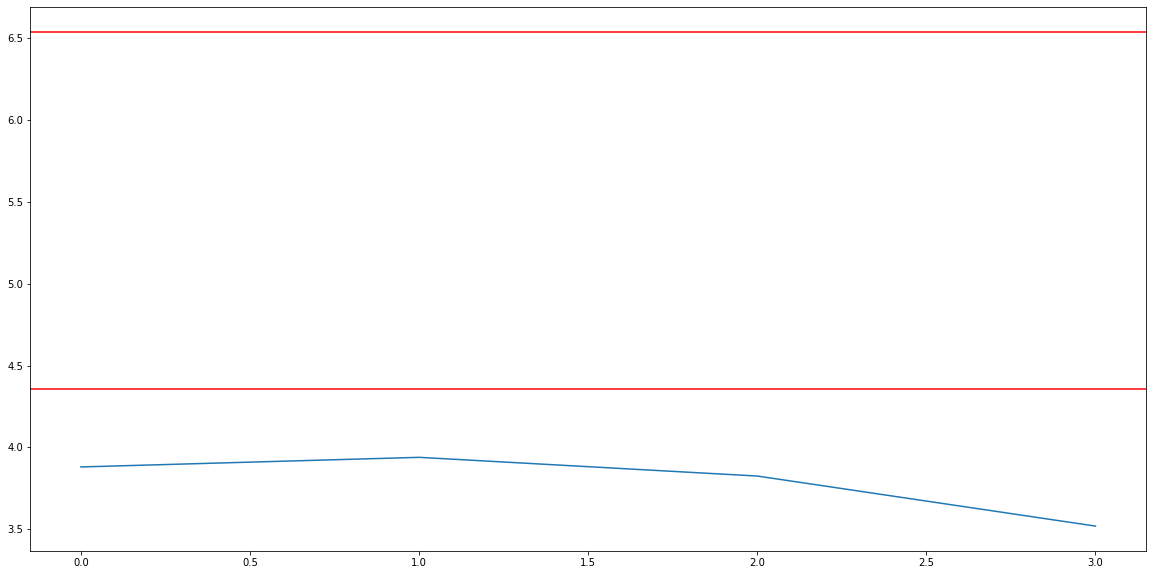

In [88]:
plt.plot(ppg_amplitude(peaks,signals_ppg))
plt.axhline(y=ppg_mean-ppg_std, color='r')
plt.axhline(y=ppg_mean+ppg_std, color='r')

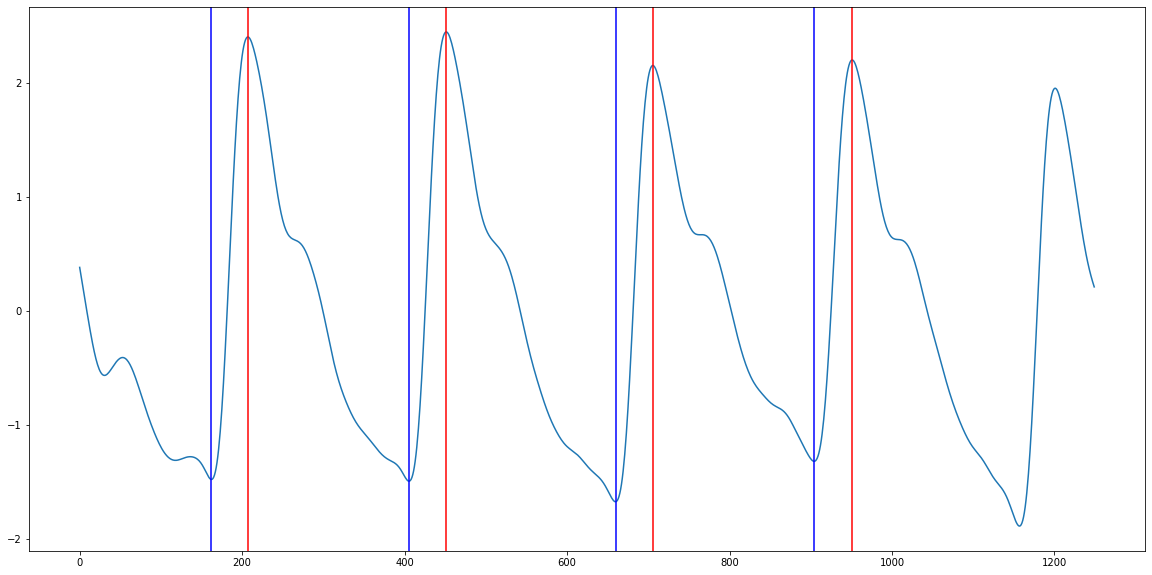

In [52]:
plt.plot(signals_ppg['PPG_Clean'])
for x in peaks[0][0]:
    plt.axvline(x=x, color='r')
for y in peaks[1][0]:
    plt.axvline(x=y, color='b')

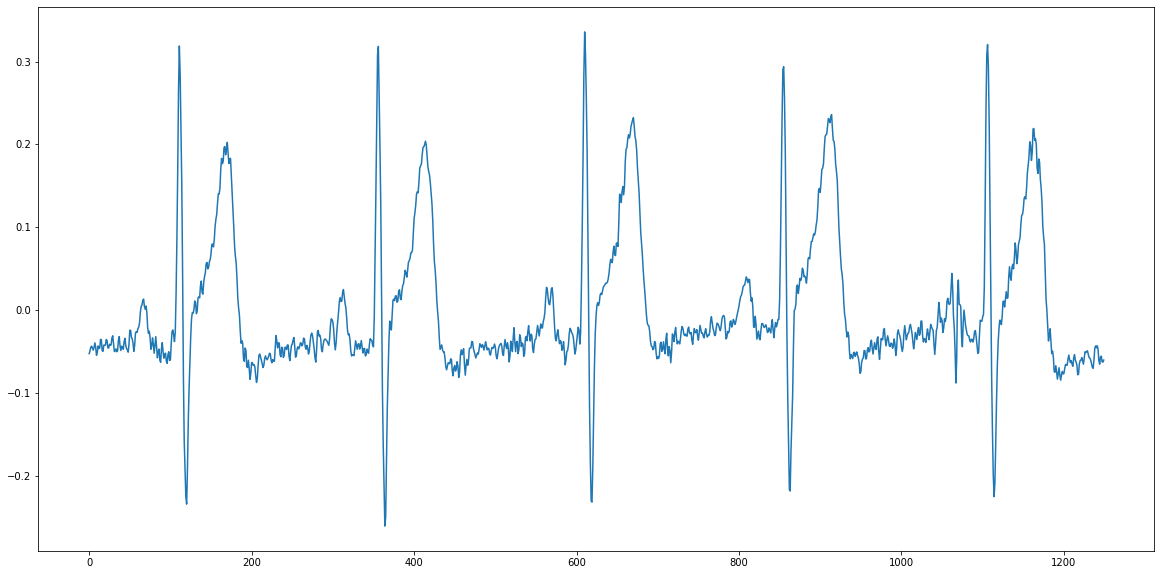

In [53]:
plt.plot(df['ECG'][2])

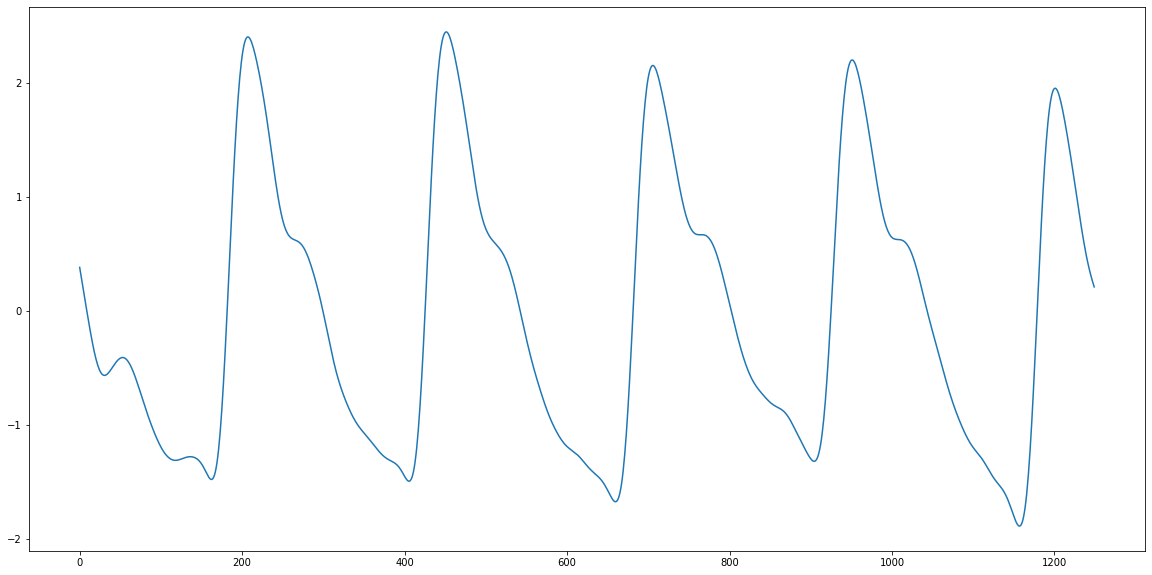

In [125]:
plt.plot(signals_ppg['PPG_Clean'])

In [116]:
np.mean(signals_ppg['PPG_Clean'][info_ppg['PPG_Peaks']])

3.3160273398386995

In [119]:
info_ppg['PPG_Peaks']

array([ 207,  451,  706,  951, 1201])

In [120]:
signals_ppg['PPG_Clean'][info_ppg['PPG_Peaks']]

207     2.406233
451     2.449995
706     2.155478
951     2.204114
1201    1.956312
Name: PPG_Clean, dtype: float64

In [47]:
print(np.mean(variability))
print(np.std(variability))

232.90625
10.634875924875663


In [75]:
variability1, info_ppg1 = ppg_frequency(df['PPG'][0])

In [84]:
df

Name                 block           group  \
0      12_AlsGA_baseline.txt              baseline  Wrong_feedback   
1        12_AlsGA_block1.txt  block1_level1_batch0  Wrong_feedback   
2        12_AlsGA_block1.txt  block1_level1_batch1  Wrong_feedback   
3        12_AlsGA_block1.txt  block1_level1_batch2  Wrong_feedback   
4        12_AlsGA_block1.txt  block1_level1_batch3  Wrong_feedback   
...                      ...                   ...             ...   
21552  59_ZolAI_training.txt      training_batch14  Wrong_feedback   
21553  59_ZolAI_training.txt      training_batch15  Wrong_feedback   
21554  59_ZolAI_training.txt      training_batch16  Wrong_feedback   
21555  59_ZolAI_training.txt      training_batch17  Wrong_feedback   
21556  59_ZolAI_training.txt      training_batch18  Wrong_feedback   

                                                     ECG  \
0      [-0.0785, -0.069, -0.05225, -0.04825, -0.0565,...   
1      [-0.05625, -0.064, -0.049, -0.041, -0.0535, -0...   
2      [-0.05225, -0.049, -0.0445, -0.04325, -0.0455,...   
3      [-0.06425, -0.067, -0.0595, -0.048, -0.04025, ...   
4      [-0.02475, -0.0375, -0.03275, -0.02725, -0.037...   
...                                                  ...   
21552  [-0.08975, -0.106, -0.11325, -0.09675, -0.074,...   
21553  [-0.0275, -0.00925, -0.0165, -0.02125, -0.0157...   
21554  [0.0345, 0.04575, 0.08625, 0.08125, 0.055, 0.0...   
21555  [-0.01725, -0.035, -0.07475, -0.08825, -0.0695...   
21556  [0.1995, 0.20575, 0.2385, 0.2765, 0.26625, 0.2...   

                                                     SGR  \
0      [0.605774, 0.610352, 0.614929, 0.621033, 0.625...   
1      [1.46942, 1.48773, 1.50604, 1.52435, 1.54114, ...   
2      [4.1626, 4.19159, 4.21906, 4.24652, 4.27399, 4...   
3      [-0.0778198, -0.0808716, -0.0839233, -0.085449...   
4      [-0.552368, -0.553894, -0.556946, -0.559998, -...   
...                                                  ...   
21552  [0.675964, 0.665283, 0.656128, 0.646973, 0.636...   
21553  [-0.790405, -0.782776, -0.775146, -0.765991, -...   
21554  [1.7746, 1.78528, 1.79443, 1.80511, 1.8158, 1....   
21555  [0.67749, 0.665283, 0.654602, 0.642395, 0.6317...   
21556  [-1.26801, -1.27411, -1.28021, -1.28632, -1.29...   

                                                     PPG length  
0      [2.6225, 2.55125, 2.47812, 2.40437, 2.33, 2.25...  30235  
1      [1.805, 1.76188, 1.71875, 1.67563, 1.63188, 1....   1250  
2      [1.91625, 1.86313, 1.81, 1.75688, 1.70375, 1.6...   1250  
3      [0.89125, 0.876875, 0.86375, 0.853125, 0.84562...   1250  
4      [0.666875, 0.661875, 0.6575, 0.653125, 0.64937...   1250  
...                                                  ...    ...  
21552  [-0.508125, -0.5125, -0.5175, -0.52125, -0.524...   1250  
21553  [0.39375, 0.388125, 0.38125, 0.374375, 0.3675,...   1250  
21554  [-0.3675, -0.37625, -0.384375, -0.39125, -0.39...   1250  
21555  [0.138125, 0.1675, 0.19375, 0.2175, 0.23875, 0...   1250  
21556  [-0.821875, -0.809375, -0.794375, -0.77625, -0...   1250  

[21557 rows x 7 columns]

In [132]:
signals_ppg['PPG_Clean']

0       0.385117
1       0.341157
2       0.297332
3       0.253629
4       0.210037
          ...   
1245    0.310535
1246    0.284626
1247    0.259982
1248    0.236490
1249    0.214049
Name: PPG_Clean, Length: 1250, dtype: float64

In [139]:
signals_ppg[signals_ppg['PPG_Peaks'] == 1]

PPG_Raw  PPG_Clean   PPG_Rate  PPG_Peaks
230  2.512521   2.600010  59.602649        1.0
475  1.989624   1.954966  61.224490        1.0
720  2.248750   2.291092  61.224490        1.0
985  2.509341   2.444567  56.603774        1.0

In [137]:
peaks

{'PPG_Peaks': array([[230, 474, 719, 985]])}

In [135]:
info_ppg

{'PPG_Peaks': array([230, 475, 720, 985]), 'sampling_rate': 250}

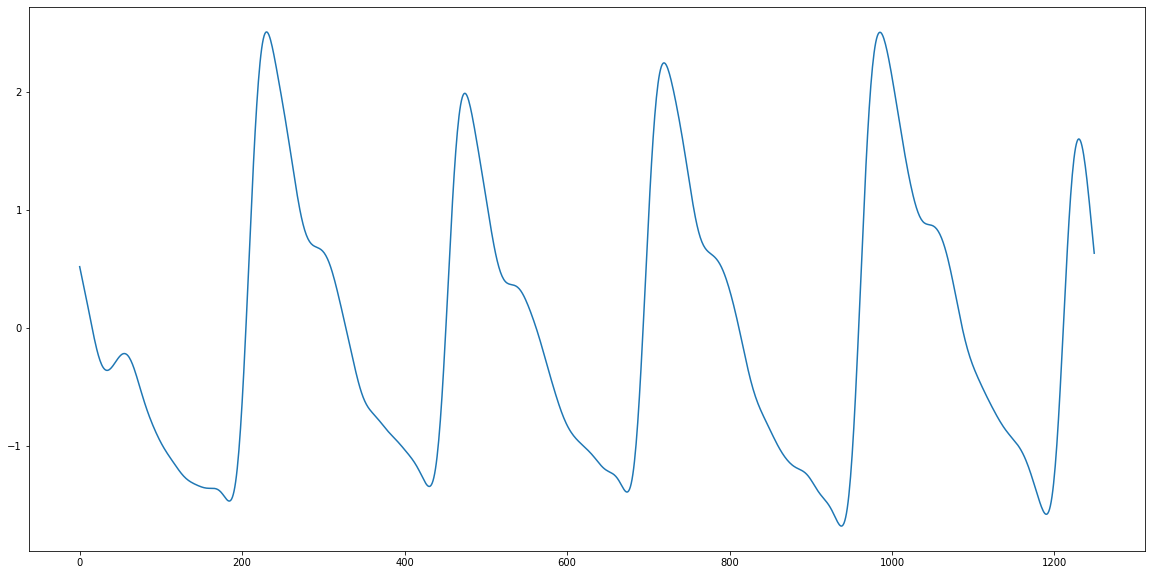

In [134]:
plt.plot(ppg_clean)

In [26]:
skipped = []
for i in tqdm(range(len(df))):
    ecg = df['ECG'][i]
    ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=250)
    try:
        signals, info = nk.ecg_process(ecg_cleaned, sampling_rate=250, method = 'neurokit')
        print(np.mean(extract_p_wave(signals)))
    except:
        skipped.append(i)

  0%|                                                                              | 3/21557 [00:01<2:36:41,  2.29it/s]

21.666666666666668
23.6
22.75


  0%|                                                                              | 5/21557 [00:01<1:33:00,  3.86it/s]

22.75
27.2
20.6


  0%|                                                                                | 9/21557 [00:02<54:35,  6.58it/s]

28.0
21.4
22.75


  0%|                                                                               | 11/21557 [00:02<47:11,  7.61it/s]

24.4
24.2
23.2


c:\users\fahre_000\appdata\local\programs\python\python39\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\fahre_000\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  0%|                                                                               | 15/21557 [00:02<40:09,  8.94it/s]

22.6
26.4
27.75


c:\users\fahre_000\appdata\local\programs\python\python39\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:277: RuntimeWarning: invalid value encountered in true_divide
  mrrs /= th2
c:\users\fahre_000\appdata\local\programs\python\python39\lib\site-packages\neurokit2\signal\signal_period.py:68: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(
  0%|                                                                               | 19/21557 [00:03<34:38, 10.36it/s]

20.6
23.2
23.6


  0%|                                                                               | 21/21557 [00:03<34:38, 10.36it/s]

22.0
23.0
24.8


  0%|                                                                               | 25/21557 [00:03<35:01, 10.25it/s]

22.4
24.4
22.6


  0%|                                                                               | 27/21557 [00:03<35:03, 10.23it/s]

25.4
22.25
20.4


  0%|                                                                               | 29/21557 [00:04<35:30, 10.10it/s]

21.6
22.6


  0%|                                                                               | 32/21557 [00:04<36:56,  9.71it/s]

19.6
24.8


  0%|▏                                                                              | 36/21557 [00:04<32:27, 11.05it/s]

21.8
22.333333333333332
21.666666666666668


  0%|▏                                                                              | 38/21557 [00:04<32:47, 10.94it/s]

25.6
21.0
23.8


  0%|▏                                                                              | 42/21557 [00:05<33:08, 10.82it/s]

21.4
19.833333333333332
23.8


  0%|▏                                                                              | 44/21557 [00:05<33:16, 10.77it/s]

24.6
22.25
24.25


  0%|▏                                                                              | 48/21557 [00:05<33:33, 10.68it/s]

20.6
28.2
23.6


  0%|▏                                                                              | 51/21557 [00:05<29:20, 12.22it/s]

22.0
25.8
21.4


  0%|▏                                                                              | 55/21557 [00:06<31:42, 11.30it/s]

24.4
28.4
20.8


  0%|▏                                                                              | 57/21557 [00:06<32:13, 11.12it/s]

28.25
20.8
26.75


  0%|▏                                                                              | 61/21557 [00:06<32:38, 10.97it/s]

25.4
22.4
19.8


  0%|▏                                                                              | 63/21557 [00:07<33:06, 10.82it/s]

25.4
22.0
19.6


  0%|▏                                                                              | 67/21557 [00:07<30:30, 11.74it/s]

20.4
20.2
21.2


  0%|▎                                                                              | 71/21557 [00:07<32:05, 11.16it/s]

19.2
20.2
24.2


  0%|▎                                                                              | 73/21557 [00:07<32:43, 10.94it/s]

23.4
22.4
24.2


  0%|▎                                                                              | 77/21557 [00:08<33:51, 10.57it/s]

22.0
21.6
24.8


  0%|▎                                                                              | 81/21557 [00:08<29:07, 12.29it/s]

22.2
25.0
22.25


  0%|▎                                                                              | 83/21557 [00:08<30:35, 11.70it/s]

22.75
23.8
25.6


  0%|▎                                                                              | 87/21557 [00:09<32:16, 11.09it/s]

22.8
22.6
23.2


  0%|▎                                                                              | 89/21557 [00:09<32:36, 10.97it/s]

24.6
23.0
24.5


  0%|▎                                                                              | 93/21557 [00:09<32:55, 10.87it/s]

22.25
22.75
23.75


  0%|▎                                                                              | 95/21557 [00:09<33:07, 10.80it/s]

23.25
23.8
21.2


  0%|▎                                                                              | 99/21557 [00:10<30:14, 11.83it/s]

24.0
22.8
24.6


  0%|▎                                                                             | 103/21557 [00:10<31:25, 11.38it/s]

20.6
24.0
22.5


  0%|▍                                                                             | 105/21557 [00:10<31:48, 11.24it/s]

23.75
28.75
22.6


  1%|▍                                                                             | 109/21557 [00:11<32:30, 11.00it/s]

24.8
23.2
29.6


  1%|▍                                                                             | 111/21557 [00:11<32:49, 10.89it/s]

22.4
23.4
22.5


  1%|▍                                                                             | 115/21557 [00:11<30:18, 11.79it/s]

22.8
25.5
25.2


  1%|▍                                                                             | 119/21557 [00:12<31:49, 11.22it/s]

23.0
21.6
21.6


  1%|▍                                                                             | 121/21557 [00:12<32:01, 11.15it/s]

25.0
22.0
24.75


  1%|▍                                                                             | 125/21557 [00:12<32:28, 11.00it/s]

26.4
21.6
23.8


  1%|▍                                                                             | 127/21557 [00:12<32:39, 10.94it/s]

20.6
24.0
21.4


  1%|▍                                                                             | 132/21557 [00:13<29:50, 11.97it/s]

24.75
20.8
22.6


  1%|▍                                                                             | 134/21557 [00:13<30:31, 11.70it/s]

24.25
23.8
27.5


  1%|▍                                                                             | 138/21557 [00:13<31:43, 11.25it/s]

20.6
25.2
21.4


  1%|▌                                                                             | 140/21557 [00:13<31:37, 11.29it/s]

25.0
29.0
27.25


  1%|▌                                                                             | 144/21557 [00:14<32:18, 11.05it/s]

27.5
22.8
21.0


  1%|▌                                                                             | 148/21557 [00:14<29:27, 12.11it/s]

28.6
26.2
26.0


  1%|▌                                                                             | 150/21557 [00:14<31:16, 11.41it/s]

24.0
23.0
20.0


  1%|▌                                                                             | 154/21557 [00:15<32:21, 11.02it/s]

26.0
24.0
20.2


  1%|▌                                                                             | 156/21557 [00:15<32:16, 11.05it/s]

22.25
24.0
28.0


  1%|▌                                                                             | 160/21557 [00:15<32:41, 10.91it/s]

24.0
26.8
25.8


  1%|▌                                                                             | 164/21557 [00:15<29:30, 12.08it/s]

27.25
23.6
22.0


  1%|▌                                                                             | 166/21557 [00:16<30:43, 11.60it/s]

26.5
24.0
24.5


  1%|▌                                                                             | 170/21557 [00:16<31:44, 11.23it/s]

24.4
27.2
23.2


c:\users\fahre_000\appdata\local\programs\python\python39\lib\site-packages\neurokit2\signal\signal_fixpeaks.py:277: RuntimeWarning: divide by zero encountered in true_divide
  mrrs /= th2
  1%|▌                                                                             | 172/21557 [00:16<32:15, 11.05it/s]

23.8
21.6
26.25


  1%|▋                                                                             | 176/21557 [00:17<32:23, 11.00it/s]

23.8
23.2
23.6


  1%|▋                                                                             | 180/21557 [00:17<29:28, 12.09it/s]

23.5
28.5
20.75


  1%|▋                                                                             | 182/21557 [00:17<30:27, 11.70it/s]

23.4
19.4
26.5


  1%|▋                                                                             | 186/21557 [00:17<30:55, 11.52it/s]

26.0
27.0
26.0


  1%|▋                                                                             | 188/21557 [00:18<32:22, 11.00it/s]

24.0
24.6
25.8


  1%|▋                                                                             | 192/21557 [00:18<32:27, 10.97it/s]

25.6
23.8
28.5


  1%|▋                                                                             | 196/21557 [00:18<29:40, 11.99it/s]

28.0
27.0
25.4


  1%|▋                                                                             | 198/21557 [00:18<30:30, 11.67it/s]

26.2
26.6
28.2


  1%|▋                                                                             | 202/21557 [00:19<31:23, 11.34it/s]

26.8
20.6
21.8


  1%|▋                                                                             | 204/21557 [00:19<31:31, 11.29it/s]

29.25
27.5
25.75


  1%|▊                                                                             | 208/21557 [00:19<27:47, 12.80it/s]

27.75
24.6
23.25


  1%|▊                                                                             | 212/21557 [00:20<30:09, 11.80it/s]

33.25
24.0
22.6


  1%|▊                                                                             | 214/21557 [00:20<31:04, 11.45it/s]

23.2
23.0
22.2


  1%|▊                                                                             | 218/21557 [00:20<32:04, 11.09it/s]

18.6
23.0
22.2


  1%|▊                                                                             | 220/21557 [00:20<33:19, 10.67it/s]

23.4
22.6
23.0


  1%|▊                                                                             | 224/21557 [00:21<29:20, 12.12it/s]

28.25
24.8
28.6


  1%|▊                                                                             | 228/21557 [00:21<31:30, 11.28it/s]

23.6
27.25
19.2


  1%|▊                                                                             | 230/21557 [00:21<31:49, 11.17it/s]

22.4
21.2
22.8


  1%|▊                                                                             | 234/21557 [00:22<32:30, 10.93it/s]

24.8
23.2
21.8


  1%|▊                                                                             | 236/21557 [00:22<32:23, 10.97it/s]

25.75
22.25
29.25


  1%|▊                                                                             | 241/21557 [00:22<29:30, 12.04it/s]

20.0
25.4
27.2


  1%|▉                                                                             | 243/21557 [00:22<30:20, 11.71it/s]

20.4
29.25
21.4


  1%|▉                                                                             | 247/21557 [00:23<31:53, 11.14it/s]

20.6
24.8
24.6


  1%|▉                                                                             | 249/21557 [00:23<32:03, 11.08it/s]

22.4
26.0
23.5


  1%|▉                                                                             | 253/21557 [00:23<28:14, 12.57it/s]

24.0
23.5
22.6


  1%|▉                                                                             | 255/21557 [00:23<29:23, 12.08it/s]

24.0
23.6


  1%|▉                                                                             | 259/21557 [00:24<31:34, 11.24it/s]

23.2
27.5
21.25


  1%|▉                                                                             | 261/21557 [00:24<31:45, 11.18it/s]

23.0
20.2
24.25


  1%|▉                                                                             | 265/21557 [00:24<32:34, 10.89it/s]

23.0
29.0
24.6


  1%|▉                                                                             | 269/21557 [00:25<29:09, 12.17it/s]

23.4
24.0
22.4


  1%|▉                                                                             | 271/21557 [00:25<30:26, 11.66it/s]

31.25
25.0
23.75


  1%|▉                                                                             | 275/21557 [00:25<33:04, 10.72it/s]

30.0
27.0
24.8


  1%|█                                                                             | 277/21557 [00:25<33:27, 10.60it/s]

24.6
23.4
28.8


  1%|█                                                                             | 281/21557 [00:26<34:48, 10.19it/s]

27.6
24.8
22.0


  1%|█                                                                             | 285/21557 [00:26<30:47, 11.51it/s]

20.8
22.166666666666668
23.2


  1%|█                                                                             | 287/21557 [00:26<31:35, 11.22it/s]

21.4
20.2
19.2


  1%|█                                                                             | 291/21557 [00:27<32:38, 10.86it/s]

24.2
20.333333333333332
23.2


  1%|█                                                                             | 293/21557 [00:27<32:57, 10.75it/s]

20.8
24.6
21.6


  1%|█                                                                             | 297/21557 [00:27<32:48, 10.80it/s]

23.0
21.2
22.2


  1%|█                                                                             | 299/21557 [00:27<33:03, 10.72it/s]

21.6
21.6
21.2


  1%|█                                                                             | 301/21557 [00:28<33:10, 10.68it/s]

21.0
23.8


  1%|█                                                                           | 304/21557 [00:29<1:33:24,  3.79it/s]

22.956521739130434
145.75
185.0


  1%|█                                                                           | 308/21557 [00:30<1:00:23,  5.86it/s]

10.0
28.666666666666668
28.6


  1%|█                                                                             | 310/21557 [00:30<52:04,  6.80it/s]

29.333333333333332
27.571428571428573


  1%|█▏                                                                            | 312/21557 [00:30<45:49,  7.73it/s]

202.83333333333334
34.666666666666664


  1%|█▏                                                                            | 314/21557 [00:30<41:44,  8.48it/s]

25.857142857142858
23.285714285714285


  1%|█▏                                                                            | 315/21557 [00:30<40:07,  8.82it/s]

21.0
26.666666666666668


  1%|█▏                                                                            | 318/21557 [00:31<38:00,  9.31it/s]

22.714285714285715
19.0
250.33333333333334


  1%|█▏                                                                            | 321/21557 [00:31<36:42,  9.64it/s]

27.166666666666668
26.5


  2%|█▏                                                                            | 324/21557 [00:31<35:43,  9.91it/s]

25.4
22.6
26.5


  2%|█▏                                                                            | 326/21557 [00:31<34:48, 10.17it/s]

36.2
19.4
-63.25


  2%|█▏                                                                            | 330/21557 [00:32<34:21, 10.30it/s]

25.75
32.2
23.666666666666668


  2%|█▏                                                                            | 332/21557 [00:32<34:27, 10.27it/s]

95.2
22.25


  2%|█▏                                                                            | 334/21557 [00:32<34:43, 10.18it/s]

27.5
34.0


c:\users\fahre_000\appdata\local\programs\python\python39\lib\site-packages\neurokit2\signal\signal_phase.py:95: RuntimeWarning: invalid value encountered in remainder
  prophase = np.mod(np.angle(scipy.signal.hilbert(signal)), pi2)
  2%|█▏                                                                            | 338/21557 [00:33<34:35, 10.22it/s]

29.5
-63.25
23.75


  2%|█▏                                                                            | 342/21557 [00:33<34:35, 10.22it/s]

20.0
99.33333333333333
303.25


  2%|█▏                                                                            | 344/21557 [00:33<33:16, 10.63it/s]

23.75
21.0
24.0


  2%|█▎                                                                            | 348/21557 [00:34<33:39, 10.50it/s]

32.8
20.4
22.166666666666668


  2%|█▎                                                                            | 353/21557 [00:34<24:37, 14.35it/s]

21.0
39.0
34.5


  2%|█▎                                                                            | 355/21557 [00:34<27:40, 12.77it/s]

33.833333333333336
31.571428571428573
29.571428571428573


  2%|█▎                                                                            | 359/21557 [00:34<31:29, 11.22it/s]

24.666666666666668
28.4
30.333333333333332


  2%|█▎                                                                            | 361/21557 [00:35<33:05, 10.68it/s]

77.0
28.5
25.428571428571427


  2%|█▎                                                                            | 365/21557 [00:35<34:35, 10.21it/s]

26.142857142857142
29.571428571428573
26.0


  2%|█▎                                                                            | 367/21557 [00:35<34:34, 10.21it/s]

23.6
24.833333333333332
25.571428571428573


  2%|█▎                                                                            | 369/21557 [00:35<35:41,  9.90it/s]

30.571428571428573
28.571428571428573


  2%|█▎                                                                            | 372/21557 [00:36<38:35,  9.15it/s]

29.25
27.166666666666668


  2%|█▎                                                                            | 375/21557 [00:36<38:19,  9.21it/s]

23.75
25.142857142857142
29.0


  2%|█▎                                                                            | 377/21557 [00:36<37:47,  9.34it/s]

24.142857142857142
25.833333333333332


  2%|█▎                                                                            | 379/21557 [00:37<39:16,  8.99it/s]

24.714285714285715
25.25


  2%|█▍                                                                            | 381/21557 [00:37<39:42,  8.89it/s]

20.833333333333332
26.0


  2%|█▍                                                                            | 383/21557 [00:37<38:38,  9.13it/s]

31.666666666666668
22.833333333333332


  2%|█▍                                                                            | 386/21557 [00:37<37:42,  9.36it/s]

24.5
21.285714285714285
19.857142857142858


  2%|█▍                                                                            | 388/21557 [00:38<38:06,  9.26it/s]

26.285714285714285
35.25


  2%|█▍                                                                            | 390/21557 [00:38<38:23,  9.19it/s]

24.375
21.833333333333332


  2%|█▍                                                                            | 392/21557 [00:38<38:06,  9.26it/s]

23.0
29.0


  2%|█▍                                                                            | 395/21557 [00:38<37:06,  9.50it/s]

27.428571428571427
26.428571428571427
27.0


  2%|█▍                                                                            | 397/21557 [00:39<37:57,  9.29it/s]

23.0
22.833333333333332


  2%|█▍                                                                            | 399/21557 [00:39<37:31,  9.40it/s]

26.0
25.428571428571427


  2%|█▍                                                                            | 401/21557 [00:39<36:56,  9.54it/s]

27.5
29.714285714285715
24.142857142857142


  2%|█▍                                                                            | 404/21557 [00:39<36:42,  9.60it/s]

28.833333333333332
25.857142857142858
23.0


  2%|█▍                                                                            | 407/21557 [00:40<36:29,  9.66it/s]

22.571428571428573
21.428571428571427


  2%|█▍                                                                            | 410/21557 [00:40<36:23,  9.68it/s]

23.428571428571427
19.857142857142858
25.833333333333332


  2%|█▍                                                                            | 412/21557 [00:40<36:23,  9.68it/s]

23.571428571428573
23.666666666666668
22.4


  2%|█▌                                                                            | 415/21557 [00:40<35:25,  9.95it/s]

31.5
25.285714285714285


  2%|█▌                                                                            | 417/21557 [00:41<36:30,  9.65it/s]

28.0
20.285714285714285


  2%|█▌                                                                            | 419/21557 [00:41<36:53,  9.55it/s]

25.714285714285715
24.857142857142858


  2%|█▌                                                                            | 422/21557 [00:41<35:48,  9.84it/s]

25.0
21.6
21.571428571428573


  2%|█▌                                                                            | 424/21557 [00:41<35:50,  9.83it/s]

24.857142857142858
22.571428571428573
21.833333333333332


  2%|█▌                                                                            | 428/21557 [00:42<36:07,  9.75it/s]

22.166666666666668
24.0
22.714285714285715


  2%|█▌                                                                            | 431/21557 [00:42<36:23,  9.68it/s]

24.428571428571427
22.285714285714285
22.833333333333332


  2%|█▌                                                                            | 434/21557 [00:42<35:38,  9.88it/s]

21.666666666666668
21.166666666666668
23.0


  2%|█▌                                                                            | 437/21557 [00:43<34:30, 10.20it/s]

22.571428571428573
24.5
25.6


  2%|█▌                                                                            | 440/21557 [00:43<36:09,  9.74it/s]

25.571428571428573
23.142857142857142
21.4


  2%|█▌                                                                            | 442/21557 [00:43<36:20,  9.68it/s]

23.571428571428573
28.5


  2%|█▌                                                                            | 444/21557 [00:43<37:05,  9.49it/s]

24.75
27.25


  2%|█▌                                                                            | 447/21557 [00:44<37:01,  9.50it/s]

21.857142857142858
22.5
25.285714285714285


  2%|█▋                                                                            | 450/21557 [00:44<36:30,  9.64it/s]

22.333333333333332
24.0
23.571428571428573


  2%|█▋                                                                            | 452/21557 [00:44<37:20,  9.42it/s]

24.166666666666668
24.5
24.333333333333332


  2%|█▋                                                                            | 455/21557 [00:45<37:05,  9.48it/s]

22.857142857142858
21.666666666666668


  2%|█▋                                                                            | 457/21557 [00:45<36:38,  9.60it/s]

24.714285714285715
23.857142857142858


  2%|█▋                                                                            | 459/21557 [00:45<37:13,  9.45it/s]

20.714285714285715
20.857142857142858


  2%|█▋                                                                            | 461/21557 [00:45<36:34,  9.61it/s]

22.714285714285715
27.571428571428573


  2%|█▋                                                                            | 463/21557 [00:45<37:37,  9.34it/s]

21.25
24.125


  2%|█▋                                                                            | 465/21557 [00:46<37:00,  9.50it/s]

24.428571428571427
19.428571428571427


  2%|█▋                                                                            | 468/21557 [00:46<37:44,  9.31it/s]

25.875
26.25
23.25


  2%|█▋                                                                            | 471/21557 [00:46<36:10,  9.72it/s]

23.2
24.714285714285715
22.857142857142858


  2%|█▋                                                                            | 473/21557 [00:46<37:12,  9.44it/s]

26.75
23.375


  2%|█▋                                                                            | 476/21557 [00:47<37:35,  9.35it/s]

150.42857142857142
23.875
25.75


  2%|█▋                                                                            | 478/21557 [00:47<37:56,  9.26it/s]

26.166666666666668
23.125


  2%|█▋                                                                            | 480/21557 [00:47<37:49,  9.29it/s]

24.125
22.428571428571427


  2%|█▋                                                                            | 482/21557 [00:47<37:51,  9.28it/s]

23.0
23.571428571428573


  2%|█▊                                                                            | 484/21557 [00:48<39:15,  8.95it/s]

21.285714285714285
23.5
21.333333333333332


  2%|█▊                                                                            | 487/21557 [00:48<38:15,  9.18it/s]

21.875
23.5


  2%|█▊                                                                            | 490/21557 [00:48<37:58,  9.24it/s]

23.428571428571427
22.0
23.714285714285715


  2%|█▊                                                                            | 492/21557 [00:48<37:16,  9.42it/s]

22.5
22.666666666666668


  2%|█▊                                                                            | 494/21557 [00:49<37:11,  9.44it/s]

22.0
22.428571428571427


  2%|█▊                                                                            | 496/21557 [00:49<37:58,  9.24it/s]

23.5
21.25


  2%|█▊                                                                            | 499/21557 [00:49<37:31,  9.35it/s]

25.0
25.375
24.571428571428573


  2%|█▊                                                                            | 500/21557 [00:49<37:09,  9.44it/s]

24.857142857142858
160.0


  2%|█▊                                                                            | 504/21557 [00:50<36:05,  9.72it/s]

21.285714285714285
22.285714285714285
25.0


  2%|█▊                                                                            | 507/21557 [00:50<36:03,  9.73it/s]

20.142857142857142
23.571428571428573
24.4


  2%|█▊                                                                            | 509/21557 [00:50<35:53,  9.78it/s]

22.285714285714285
21.857142857142858


  2%|█▊                                                                            | 511/21557 [00:50<36:52,  9.51it/s]

24.666666666666668
24.142857142857142


  2%|█▊                                                                            | 513/21557 [00:51<37:11,  9.43it/s]

23.833333333333332
22.571428571428573
21.714285714285715


  2%|█▊                                                                            | 516/21557 [00:51<36:15,  9.67it/s]

24.571428571428573
21.666666666666668
25.75


  2%|█▉                                                                            | 519/21557 [00:51<35:20,  9.92it/s]

22.428571428571427
23.375


  2%|█▉                                                                            | 522/21557 [00:52<35:59,  9.74it/s]

24.142857142857142
22.428571428571427
24.0


  2%|█▉                                                                            | 525/21557 [00:52<35:27,  9.89it/s]

20.428571428571427
21.833333333333332
21.5


  2%|█▉                                                                            | 528/21557 [00:52<35:44,  9.81it/s]

21.857142857142858
20.142857142857142
22.714285714285715


  2%|█▉                                                                            | 531/21557 [00:53<36:03,  9.72it/s]

20.5
25.142857142857142
26.0


  2%|█▉                                                                            | 534/21557 [00:53<35:49,  9.78it/s]

26.0
23.0
23.428571428571427


  2%|█▉                                                                            | 537/21557 [00:53<35:59,  9.73it/s]

24.857142857142858
23.714285714285715
21.571428571428573


  2%|█▉                                                                            | 538/21557 [00:53<35:54,  9.75it/s]

23.571428571428573
20.166666666666668


  3%|█▉                                                                            | 541/21557 [00:54<37:43,  9.29it/s]

23.142857142857142
22.333333333333332


  3%|█▉                                                                            | 544/21557 [00:54<36:46,  9.52it/s]

25.142857142857142
24.0
20.285714285714285


  3%|█▉                                                                            | 546/21557 [00:54<37:09,  9.42it/s]

23.857142857142858
27.25


  3%|█▉                                                                            | 548/21557 [00:54<37:31,  9.33it/s]

23.25
24.25
26.75


  3%|█▉                                                                            | 551/21557 [00:55<35:47,  9.78it/s]

22.428571428571427
25.0


  3%|██                                                                            | 553/21557 [00:55<36:52,  9.49it/s]

21.875
25.0


  3%|██                                                                            | 555/21557 [00:55<36:42,  9.53it/s]

22.0
21.714285714285715


  3%|██                                                                            | 558/21557 [00:55<36:24,  9.61it/s]

24.142857142857142
20.333333333333332
23.0


  3%|██                                                                            | 560/21557 [00:56<38:42,  9.04it/s]

21.714285714285715
23.125


  3%|██                                                                            | 562/21557 [00:56<39:22,  8.89it/s]

22.875
24.125


  3%|██                                                                            | 564/21557 [00:56<39:06,  8.95it/s]

23.0
25.5


  3%|██                                                                            | 566/21557 [00:56<30:35, 11.44it/s]

26.142857142857142
24.857142857142858


  3%|██                                                                            | 570/21557 [00:57<34:39, 10.09it/s]

20.625
24.571428571428573
24.375


  3%|██                                                                            | 572/21557 [00:57<35:14,  9.93it/s]

23.142857142857142
23.0


  3%|██                                                                            | 575/21557 [00:57<35:50,  9.76it/s]

20.857142857142858
25.142857142857142
22.857142857142858


  3%|██                                                                            | 577/21557 [00:57<36:26,  9.59it/s]

21.0
24.142857142857142


  3%|██                                                                            | 579/21557 [00:58<36:22,  9.61it/s]

21.714285714285715
21.0


  3%|██                                                                            | 582/21557 [00:58<34:07, 10.24it/s]

21.428571428571427
25.0
21.857142857142858


  3%|██                                                                            | 584/21557 [00:58<35:12,  9.93it/s]

29.285714285714285
23.428571428571427


  3%|██                                                                            | 587/21557 [00:58<35:45,  9.77it/s]

22.571428571428573
23.285714285714285
25.0


  3%|██▏                                                                           | 589/21557 [00:59<38:24,  9.10it/s]

23.142857142857142
24.625


  3%|██▏                                                                           | 591/21557 [00:59<38:24,  9.10it/s]

22.285714285714285
23.375


  3%|██▏                                                                           | 593/21557 [00:59<38:28,  9.08it/s]

21.5
24.25


  3%|██▏                                                                           | 595/21557 [00:59<38:44,  9.02it/s]

26.555555555555557
25.125


  3%|██▏                                                                           | 598/21557 [01:00<36:07,  9.67it/s]

21.142857142857142
22.75
24.142857142857142


  3%|██▏                                                                           | 600/21557 [01:00<36:27,  9.58it/s]

24.0
22.625


  3%|██▏                                                                           | 602/21557 [01:00<36:32,  9.56it/s]

24.285714285714285
24.857142857142858


  3%|██▏                                                                           | 604/21557 [01:00<36:37,  9.54it/s]

27.714285714285715
25.0


  3%|██▏                                                                           | 606/21557 [01:00<37:11,  9.39it/s]

21.75
28.0


  3%|██▏                                                                           | 609/21557 [01:01<38:05,  9.17it/s]

24.25
18.833333333333332
23.142857142857142


  3%|██▏                                                                           | 611/21557 [01:01<37:20,  9.35it/s]

22.285714285714285
23.0


  3%|██▏                                                                           | 613/21557 [01:01<37:21,  9.34it/s]

22.166666666666668
23.428571428571427


  3%|██▏                                                                           | 615/21557 [01:01<38:25,  9.08it/s]

21.125
20.375
20.166666666666668


  3%|██▏                                                                         | 619/21557 [01:03<2:36:18,  2.23it/s]

18.973118279569892
22.25


  3%|██▏                                                                         | 621/21557 [01:04<1:48:23,  3.22it/s]

22.0
23.125


  3%|██▏                                                                         | 623/21557 [01:04<1:16:51,  4.54it/s]

22.5
23.625


  3%|██▎                                                                           | 625/21557 [01:04<58:11,  6.00it/s]

19.428571428571427
22.875


  3%|██▎                                                                           | 627/21557 [01:04<49:47,  7.01it/s]

21.0
21.125


  3%|██▎                                                                           | 629/21557 [01:05<43:49,  7.96it/s]

22.75
24.25


  3%|██▎                                                                           | 631/21557 [01:05<41:37,  8.38it/s]

21.125
21.25


  3%|██▎                                                                           | 632/21557 [01:05<40:38,  8.58it/s]

20.5
18.571428571428573


  3%|██▎                                                                           | 635/21557 [01:05<38:15,  9.11it/s]

19.625
21.285714285714285


  3%|██▎                                                                           | 637/21557 [01:05<37:46,  9.23it/s]

21.428571428571427
19.857142857142858


  3%|██▎                                                                           | 639/21557 [01:06<38:46,  8.99it/s]

19.875
20.857142857142858


  3%|██▎                                                                           | 641/21557 [01:06<38:39,  9.02it/s]

22.25
20.375


  3%|██▎                                                                           | 644/21557 [01:06<38:12,  9.12it/s]

19.25
17.5
20.714285714285715


  3%|██▎                                                                           | 646/21557 [01:06<37:58,  9.18it/s]

19.714285714285715
20.857142857142858


  3%|██▎                                                                           | 649/21557 [01:07<37:47,  9.22it/s]

19.142857142857142
17.428571428571427
19.25


  3%|██▎                                                                           | 651/21557 [01:07<38:22,  9.08it/s]

19.75
23.75


  3%|██▎                                                                           | 653/21557 [01:07<38:15,  9.11it/s]

20.857142857142858
22.375


  3%|██▎                                                                           | 655/21557 [01:07<38:39,  9.01it/s]

18.25
22.0


  3%|██▍                                                                           | 657/21557 [01:08<39:22,  8.84it/s]

21.25
21.428571428571427


  3%|██▍                                                                           | 659/21557 [01:08<37:56,  9.18it/s]

19.285714285714285
17.571428571428573


  3%|██▍                                                                           | 662/21557 [01:08<36:32,  9.53it/s]

19.0
21.571428571428573
16.285714285714285


  3%|██▍                                                                           | 665/21557 [01:09<36:55,  9.43it/s]

22.142857142857142
19.5
20.75


  3%|██▍                                                                           | 667/21557 [01:09<37:58,  9.17it/s]

18.0
21.5


  3%|██▍                                                                           | 669/21557 [01:09<38:21,  9.08it/s]

19.375
21.428571428571427


  3%|██▍                                                                           | 671/21557 [01:09<37:46,  9.21it/s]

20.625
22.125


  3%|██▍                                                                           | 673/21557 [01:09<37:49,  9.20it/s]

24.75
21.0


  3%|██▍                                                                           | 675/21557 [01:10<37:34,  9.26it/s]

24.142857142857142
17.625


  3%|██▍                                                                           | 678/21557 [01:10<36:51,  9.44it/s]

24.857142857142858
18.0
16.0


  3%|██▍                                                                           | 680/21557 [01:10<37:15,  9.34it/s]

21.75
19.375


  3%|██▍                                                                           | 682/21557 [01:10<36:31,  9.53it/s]

20.571428571428573
19.0


  3%|██▍                                                                           | 684/21557 [01:11<36:05,  9.64it/s]

21.571428571428573
26.714285714285715


  3%|██▍                                                                           | 686/21557 [01:11<37:55,  9.17it/s]

22.714285714285715
24.25


  3%|██▍                                                                           | 688/21557 [01:11<38:22,  9.06it/s]

26.375
25.375


  3%|██▍                                                                           | 690/21557 [01:11<37:50,  9.19it/s]

23.571428571428573
21.857142857142858


  3%|██▌                                                                           | 693/21557 [01:12<37:06,  9.37it/s]

20.428571428571427
26.714285714285715
18.714285714285715


  3%|██▌                                                                           | 695/21557 [01:12<37:16,  9.33it/s]

19.714285714285715
24.125


  3%|██▌                                                                           | 697/21557 [01:12<37:39,  9.23it/s]

21.375
25.857142857142858


  3%|██▌                                                                           | 699/21557 [01:12<37:28,  9.27it/s]

28.375
18.857142857142858


  3%|██▌                                                                           | 702/21557 [01:12<36:25,  9.54it/s]

24.142857142857142
26.857142857142858
25.428571428571427


  3%|██▌                                                                           | 704/21557 [01:13<37:34,  9.25it/s]

22.875
23.428571428571427


  3%|██▌                                                                           | 706/21557 [01:13<37:24,  9.29it/s]

24.375
22.714285714285715
21.714285714285715


  3%|██▌                                                                           | 710/21557 [01:13<36:20,  9.56it/s]

20.285714285714285
20.428571428571427
22.0


  3%|██▌                                                                           | 713/21557 [01:14<36:29,  9.52it/s]

23.857142857142858
18.857142857142858
16.0


  3%|██▌                                                                           | 716/21557 [01:14<36:33,  9.50it/s]

20.0
20.142857142857142
20.142857142857142


  3%|██▌                                                                           | 718/21557 [01:14<36:13,  9.59it/s]

19.375
23.428571428571427


  3%|██▌                                                                           | 720/21557 [01:14<36:22,  9.55it/s]

21.857142857142858
23.375


  3%|██▌                                                                           | 722/21557 [01:15<39:10,  8.86it/s]

19.857142857142858
20.857142857142858


  3%|██▌                                                                           | 725/21557 [01:15<36:27,  9.52it/s]

19.75
20.25
20.75


  3%|██▋                                                                           | 728/21557 [01:15<36:10,  9.60it/s]

20.857142857142858
22.375
19.285714285714285


  3%|██▋                                                                           | 731/21557 [01:16<35:46,  9.70it/s]

21.142857142857142
20.5
23.571428571428573


  3%|██▋                                                                           | 734/21557 [01:16<35:57,  9.65it/s]

19.285714285714285
17.166666666666668
19.714285714285715


  3%|██▋                                                                           | 737/21557 [01:16<36:09,  9.60it/s]

20.285714285714285
18.285714285714285
20.75


  3%|██▋                                                                           | 739/21557 [01:16<34:05, 10.18it/s]

21.5
17.285714285714285
20.142857142857142


  3%|██▋                                                                           | 743/21557 [01:17<35:23,  9.80it/s]

20.25
20.375
21.142857142857142


  3%|██▋                                                                           | 745/21557 [01:17<36:22,  9.54it/s]

19.375
21.25


  3%|██▋                                                                           | 747/21557 [01:17<36:31,  9.50it/s]

23.571428571428573
21.857142857142858
21.428571428571427


  3%|██▋                                                                           | 750/21557 [01:17<35:44,  9.70it/s]

22.0
20.285714285714285


  3%|██▋                                                                           | 752/21557 [01:18<36:53,  9.40it/s]

23.571428571428573
20.75
19.75


  4%|██▋                                                                           | 756/21557 [01:18<35:13,  9.84it/s]

25.0
20.0
17.285714285714285


  4%|██▋                                                                           | 759/21557 [01:18<36:09,  9.58it/s]

20.125
23.428571428571427
20.857142857142858


  4%|██▊                                                                           | 761/21557 [01:19<36:14,  9.57it/s]

27.75
23.285714285714285


  4%|██▊                                                                           | 763/21557 [01:19<36:18,  9.55it/s]

27.714285714285715
19.875


  4%|██▊                                                                           | 765/21557 [01:19<36:41,  9.44it/s]

27.285714285714285
21.571428571428573


  4%|██▊                                                                           | 767/21557 [01:19<36:10,  9.58it/s]

20.285714285714285
25.375
19.0


  4%|██▊                                                                           | 769/21557 [01:19<33:37, 10.30it/s]

20.142857142857142
20.428571428571427


  4%|██▊                                                                           | 773/21557 [01:20<35:42,  9.70it/s]

20.625
21.833333333333332
22.428571428571427


  4%|██▊                                                                           | 776/21557 [01:20<36:17,  9.54it/s]

19.285714285714285
18.142857142857142
19.285714285714285


  4%|██▊                                                                           | 779/21557 [01:21<37:16,  9.29it/s]

19.285714285714285
22.428571428571427
20.5


  4%|██▊                                                                           | 781/21557 [01:21<37:26,  9.25it/s]

20.375
21.857142857142858


  4%|██▊                                                                           | 784/21557 [01:21<35:39,  9.71it/s]

19.142857142857142
20.6
25.875


  4%|██▊                                                                           | 786/21557 [01:21<36:34,  9.47it/s]

22.875
21.75


  4%|██▊                                                                           | 788/21557 [01:21<36:16,  9.54it/s]

20.714285714285715
18.571428571428573


  4%|██▊                                                                           | 790/21557 [01:22<36:23,  9.51it/s]

20.285714285714285
22.0


  4%|██▊                                                                           | 792/21557 [01:22<36:32,  9.47it/s]

17.625
22.428571428571427


  4%|██▊                                                                           | 794/21557 [01:22<37:03,  9.34it/s]

19.571428571428573
23.875


  4%|██▉                                                                           | 796/21557 [01:22<37:08,  9.32it/s]

19.625
24.875


  4%|██▉                                                                           | 799/21557 [01:23<34:35, 10.00it/s]

19.571428571428573
29.25
29.428571428571427


  4%|██▉                                                                           | 801/21557 [01:23<35:49,  9.66it/s]

22.25
19.125


  4%|██▉                                                                           | 803/21557 [01:23<36:54,  9.37it/s]

21.375
22.571428571428573


  4%|██▉                                                                           | 806/21557 [01:23<37:05,  9.32it/s]

22.142857142857142
19.857142857142858
22.125


  4%|██▉                                                                           | 808/21557 [01:24<37:34,  9.21it/s]

21.571428571428573
18.857142857142858


  4%|██▉                                                                           | 811/21557 [01:24<36:29,  9.48it/s]

19.5
23.714285714285715
22.142857142857142


  4%|██▉                                                                           | 814/21557 [01:24<35:08,  9.84it/s]

21.428571428571427
20.0
19.571428571428573


  4%|██▉                                                                           | 816/21557 [01:24<35:18,  9.79it/s]

20.428571428571427
22.857142857142858


  4%|██▉                                                                           | 819/21557 [01:25<35:49,  9.65it/s]

23.25
21.714285714285715
25.0


  4%|██▉                                                                           | 822/21557 [01:25<35:48,  9.65it/s]

19.142857142857142
21.285714285714285
22.5


  4%|██▉                                                                           | 825/21557 [01:25<35:41,  9.68it/s]

19.714285714285715
20.142857142857142
20.0


  4%|██▉                                                                           | 827/21557 [01:26<36:03,  9.58it/s]

22.714285714285715
23.375
25.5


  4%|███                                                                           | 830/21557 [01:26<35:35,  9.71it/s]

22.875
19.857142857142858


  4%|███                                                                           | 833/21557 [01:26<36:02,  9.59it/s]

19.428571428571427
19.125
19.285714285714285


  4%|███                                                                           | 835/21557 [01:26<35:57,  9.61it/s]

23.142857142857142
19.125


  4%|███                                                                           | 837/21557 [01:27<35:32,  9.72it/s]

24.285714285714285
19.428571428571427


  4%|███                                                                           | 839/21557 [01:27<36:24,  9.48it/s]

24.428571428571427
19.5


  4%|███                                                                           | 842/21557 [01:27<36:24,  9.48it/s]

24.0
21.0
21.714285714285715


  4%|███                                                                           | 844/21557 [01:27<34:01, 10.15it/s]

23.4
20.0


  4%|███                                                                           | 846/21557 [01:28<34:52,  9.90it/s]

22.571428571428573
19.857142857142858


  4%|███                                                                           | 849/21557 [01:28<35:20,  9.77it/s]

20.75
19.285714285714285
18.571428571428573


  4%|███                                                                           | 851/21557 [01:28<36:26,  9.47it/s]

19.625
24.625


  4%|███                                                                           | 853/21557 [01:28<36:07,  9.55it/s]

21.0
16.285714285714285


  4%|███                                                                           | 855/21557 [01:28<36:32,  9.44it/s]

21.75
19.428571428571427


  4%|███                                                                           | 857/21557 [01:29<36:05,  9.56it/s]

20.571428571428573
21.285714285714285
19.0


  4%|███                                                                           | 860/21557 [01:29<34:58,  9.86it/s]

20.0
17.428571428571427


  4%|███                                                                           | 862/21557 [01:29<35:37,  9.68it/s]

19.142857142857142
18.25


  4%|███▏                                                                          | 865/21557 [01:29<36:05,  9.56it/s]

26.625
20.666666666666668
26.142857142857142


  4%|███▏                                                                          | 867/21557 [01:30<37:26,  9.21it/s]

24.142857142857142
22.142857142857142


  4%|███▏                                                                          | 870/21557 [01:30<36:38,  9.41it/s]

20.714285714285715
23.285714285714285
20.125


  4%|███▏                                                                          | 872/21557 [01:30<37:04,  9.30it/s]

19.0
25.75
21.5


  4%|███▏                                                                          | 875/21557 [01:31<35:14,  9.78it/s]

24.0
22.142857142857142


  4%|███▏                                                                          | 877/21557 [01:31<36:03,  9.56it/s]

24.857142857142858
21.625


  4%|███▏                                                                          | 880/21557 [01:31<36:05,  9.55it/s]

20.714285714285715
23.25
22.428571428571427


  4%|███▏                                                                          | 882/21557 [01:31<36:13,  9.51it/s]

22.428571428571427
21.666666666666668


  4%|███▏                                                                          | 884/21557 [01:32<36:32,  9.43it/s]

19.285714285714285
21.75


  4%|███▏                                                                          | 886/21557 [01:32<36:14,  9.51it/s]

20.5
21.428571428571427


  4%|███▏                                                                          | 889/21557 [01:32<34:59,  9.85it/s]

21.857142857142858
18.0
20.77777777777778


  4%|███▏                                                                          | 891/21557 [01:32<36:35,  9.41it/s]

25.25
22.375


  4%|███▏                                                                          | 893/21557 [01:32<38:46,  8.88it/s]

18.75
19.0


  4%|███▏                                                                          | 895/21557 [01:33<39:45,  8.66it/s]

22.0
21.625


  4%|███▏                                                                          | 897/21557 [01:33<39:50,  8.64it/s]

20.375
21.75


  4%|███▎                                                                          | 899/21557 [01:33<39:13,  8.78it/s]

19.857142857142858
20.125


  4%|███▎                                                                          | 901/21557 [01:33<39:16,  8.77it/s]

20.125
18.125


  4%|███▎                                                                          | 903/21557 [01:34<40:43,  8.45it/s]

20.75
20.0


  4%|███▎                                                                          | 905/21557 [01:34<40:18,  8.54it/s]

19.0
21.375


  4%|███▎                                                                          | 906/21557 [01:34<39:52,  8.63it/s]

21.375
20.75


  4%|███▏                                                                        | 909/21557 [01:37<3:25:47,  1.67it/s]

21.808823529411764
25.166666666666668


  4%|███▏                                                                        | 911/21557 [01:37<2:08:04,  2.69it/s]

24.666666666666668
24.428571428571427


  4%|███▏                                                                        | 914/21557 [01:38<1:09:20,  4.96it/s]

27.428571428571427
26.333333333333332
24.666666666666668


  4%|███▎                                                                          | 917/21557 [01:38<47:39,  7.22it/s]

25.285714285714285
25.166666666666668
25.166666666666668


  4%|███▎                                                                          | 920/21557 [01:38<40:03,  8.59it/s]

27.833333333333332
27.166666666666668
23.666666666666668


  4%|███▎                                                                          | 922/21557 [01:38<32:12, 10.68it/s]

24.833333333333332
23.0


  4%|███▎                                                                          | 926/21557 [01:39<32:56, 10.44it/s]

20.833333333333332
20.8
22.0


  4%|███▎                                                                          | 928/21557 [01:39<33:14, 10.35it/s]

29.666666666666668
26.2
21.8


  4%|███▎                                                                          | 932/21557 [01:39<33:04, 10.40it/s]

17.4
11.0
15.0


  4%|███▍                                                                          | 934/21557 [01:40<32:41, 10.51it/s]

22.4
23.8
24.2


  4%|███▍                                                                          | 938/21557 [01:40<30:40, 11.20it/s]

24.428571428571427
28.6
21.6


  4%|███▍                                                                          | 942/21557 [01:40<32:01, 10.73it/s]

14.2
19.4
23.166666666666668


  4%|███▍                                                                          | 944/21557 [01:40<32:18, 10.63it/s]

27.0
20.8
24.2


  4%|███▍                                                                          | 948/21557 [01:41<33:07, 10.37it/s]

22.2
26.2
27.5


  4%|███▍                                                                          | 952/21557 [01:41<29:51, 11.50it/s]

26.0
21.0
15.6


  4%|███▍                                                                          | 954/21557 [01:41<31:13, 11.00it/s]

24.0
24.2
19.4


  4%|███▍                                                                          | 958/21557 [01:42<32:39, 10.51it/s]

24.4
22.0
24.0


  4%|███▍                                                                          | 960/21557 [01:42<33:24, 10.28it/s]

22.0
25.0
23.6


  4%|███▍                                                                          | 964/21557 [01:42<28:46, 11.92it/s]

25.2
26.2
24.8


  4%|███▌                                                                          | 968/21557 [01:43<32:05, 10.69it/s]

21.0
24.6
25.666666666666668


  4%|███▌                                                                          | 970/21557 [01:43<32:23, 10.59it/s]

16.6
16.333333333333332
14.2


  5%|███▌                                                                          | 974/21557 [01:43<32:43, 10.48it/s]

21.4
24.8
24.4


  5%|███▌                                                                          | 976/21557 [01:43<33:00, 10.39it/s]

17.2
21.0
21.2


  5%|███▌                                                                          | 980/21557 [01:44<29:52, 11.48it/s]

20.4
20.0
30.4


  5%|███▌                                                                          | 984/21557 [01:44<31:43, 10.81it/s]

15.6
29.0
21.0


  5%|███▌                                                                          | 986/21557 [01:44<32:10, 10.66it/s]

24.0
25.0
20.4


  5%|███▌                                                                          | 988/21557 [01:44<32:24, 10.58it/s]

13.4
13.6


  5%|███▌                                                                          | 992/21557 [01:45<28:29, 12.03it/s]

16.0
17.6
21.0


  5%|███▌                                                                          | 996/21557 [01:45<30:52, 11.10it/s]

27.833333333333332
26.2
27.4


  5%|███▌                                                                          | 998/21557 [01:45<31:22, 10.92it/s]

29.2
24.833333333333332
25.666666666666668


  5%|███▌                                                                         | 1002/21557 [01:46<32:07, 10.67it/s]

21.666666666666668
22.8
27.4


  5%|███▌                                                                         | 1004/21557 [01:46<32:19, 10.60it/s]

21.8
26.0
15.2


  5%|███▌                                                                         | 1008/21557 [01:46<28:10, 12.15it/s]

23.0
27.0
26.0


  5%|███▌                                                                         | 1012/21557 [01:47<30:33, 11.21it/s]

28.2
27.2
14.2


  5%|███▌                                                                         | 1014/21557 [01:47<31:06, 11.00it/s]

26.0
22.8
25.333333333333332


  5%|███▋                                                                         | 1018/21557 [01:47<31:43, 10.79it/s]

18.0
24.8
24.5


  5%|███▋                                                                         | 1020/21557 [01:47<32:00, 10.69it/s]

28.0
26.833333333333332
14.6


  5%|███▋                                                                         | 1024/21557 [01:48<30:04, 11.38it/s]

24.6
22.8
22.8


  5%|███▋                                                                         | 1028/21557 [01:48<31:15, 10.94it/s]

26.8
17.8
20.0


  5%|███▋                                                                         | 1030/21557 [01:48<32:08, 10.64it/s]

24.166666666666668
22.666666666666668
19.833333333333332


  5%|███▋                                                                         | 1034/21557 [01:49<32:27, 10.54it/s]

24.2
24.4
24.5


  5%|███▋                                                                         | 1038/21557 [01:49<27:58, 12.22it/s]

26.166666666666668
17.6
23.4


  5%|███▋                                                                         | 1040/21557 [01:49<29:19, 11.66it/s]

16.4
21.6
22.8


  5%|███▋                                                                         | 1044/21557 [01:50<31:26, 10.87it/s]

21.2
24.166666666666668
21.2


  5%|███▋                                                                         | 1046/21557 [01:50<31:52, 10.72it/s]

23.666666666666668
22.4
25.0


  5%|███▊                                                                         | 1050/21557 [01:50<32:18, 10.58it/s]

16.6
19.0
26.166666666666668


  5%|███▊                                                                         | 1054/21557 [01:50<29:58, 11.40it/s]

26.285714285714285
25.833333333333332
20.4


  5%|███▊                                                                         | 1056/21557 [01:51<31:25, 10.87it/s]

25.833333333333332
23.4


  5%|███▊                                                                         | 1058/21557 [01:51<31:43, 10.77it/s]

18.5
21.6
20.4


  5%|███▊                                                                         | 1062/21557 [01:51<32:42, 10.44it/s]

21.2
20.8
19.0


  5%|███▊                                                                         | 1064/21557 [01:51<33:02, 10.34it/s]

19.0
23.0
22.6


  5%|███▊                                                                         | 1068/21557 [01:52<28:26, 12.01it/s]

24.0
26.0


  5%|███▊                                                                         | 1070/21557 [01:52<29:55, 11.41it/s]

17.333333333333332
20.2
24.5


  5%|███▊                                                                         | 1074/21557 [01:52<31:04, 10.98it/s]

25.666666666666668
27.6
26.2


  5%|███▊                                                                         | 1076/21557 [01:52<31:22, 10.88it/s]

26.8
25.166666666666668
29.0


  5%|███▊                                                                         | 1080/21557 [01:53<32:37, 10.46it/s]

21.6
21.6
26.4


  5%|███▊                                                                         | 1084/21557 [01:53<29:42, 11.49it/s]

20.8
25.5
17.8


  5%|███▉                                                                         | 1086/21557 [01:53<30:39, 11.13it/s]

22.6
29.333333333333332
26.833333333333332


  5%|███▉                                                                         | 1090/21557 [01:54<32:18, 10.56it/s]

26.166666666666668
15.0
19.2


  5%|███▉                                                                         | 1092/21557 [01:54<32:17, 10.56it/s]

18.2
18.2
22.8


  5%|███▉                                                                         | 1096/21557 [01:54<32:09, 10.60it/s]

21.8
16.6
17.6


  5%|███▉                                                                         | 1098/21557 [01:54<32:19, 10.55it/s]

20.6
20.2
18.666666666666668


  5%|███▉                                                                         | 1102/21557 [01:55<32:24, 10.52it/s]

18.0
20.6
16.2


  5%|███▉                                                                         | 1104/21557 [01:55<32:51, 10.37it/s]

26.166666666666668
19.4
26.8


  5%|███▉                                                                         | 1108/21557 [01:55<32:44, 10.41it/s]

20.2
19.666666666666668
20.4


  5%|███▉                                                                         | 1110/21557 [01:56<33:08, 10.28it/s]

23.666666666666668
19.2
14.2


  5%|███▉                                                                         | 1114/21557 [01:56<32:49, 10.38it/s]

21.0
14.2
22.333333333333332


  5%|███▉                                                                         | 1116/21557 [01:56<32:28, 10.49it/s]

26.833333333333332
21.8
27.6


  5%|████                                                                         | 1120/21557 [01:57<32:43, 10.41it/s]

23.6
26.8
21.8


  5%|████                                                                         | 1122/21557 [01:57<32:57, 10.33it/s]

22.2
21.0
25.857142857142858


  5%|████                                                                         | 1126/21557 [01:57<33:11, 10.26it/s]

16.8
25.6
22.2


  5%|████                                                                         | 1128/21557 [01:57<33:01, 10.31it/s]

23.4
22.0
22.6


  5%|████                                                                         | 1132/21557 [01:58<32:47, 10.38it/s]

21.8
21.833333333333332
20.4


  5%|████                                                                         | 1134/21557 [01:58<33:03, 10.30it/s]

19.8
21.2
22.2


  5%|████                                                                         | 1138/21557 [01:58<33:06, 10.28it/s]

27.666666666666668
20.166666666666668
23.8


  5%|████                                                                         | 1140/21557 [01:59<32:49, 10.37it/s]

22.0
24.4
26.2


  5%|████                                                                         | 1144/21557 [01:59<32:45, 10.39it/s]

27.4
16.0
25.0


  5%|████                                                                         | 1146/21557 [01:59<33:10, 10.25it/s]

22.0
16.6
22.8


  5%|████                                                                         | 1150/21557 [02:00<32:53, 10.34it/s]

23.4
15.4
19.0


  5%|████                                                                         | 1152/21557 [02:00<33:55, 10.02it/s]

26.857142857142858
23.166666666666668
23.5


  5%|████▏                                                                        | 1156/21557 [02:00<33:08, 10.26it/s]

16.2
21.8
26.2


  5%|████▏                                                                        | 1158/21557 [02:00<32:46, 10.37it/s]

26.0
21.8
26.2


  5%|████▏                                                                        | 1162/21557 [02:01<32:59, 10.30it/s]

19.6
19.8
24.0


  5%|████▏                                                                        | 1164/21557 [02:01<32:37, 10.42it/s]

25.0
25.4
24.8


  5%|████▏                                                                        | 1168/21557 [02:01<32:43, 10.39it/s]

19.8
12.8
22.0


  5%|████▏                                                                        | 1170/21557 [02:01<33:14, 10.22it/s]

16.6
22.166666666666668


  5%|████▏                                                                        | 1172/21557 [02:02<33:08, 10.25it/s]

27.166666666666668
24.333333333333332
28.2


  5%|████▏                                                                        | 1176/21557 [02:02<33:46, 10.06it/s]

27.5
20.0
26.0


  5%|████▏                                                                        | 1178/21557 [02:02<33:33, 10.12it/s]

21.0
24.333333333333332
25.666666666666668


  5%|████▏                                                                        | 1182/21557 [02:03<33:34, 10.11it/s]

25.666666666666668
25.0
26.2


  5%|████▏                                                                        | 1184/21557 [02:03<32:18, 10.51it/s]

26.8
23.0


  6%|████▏                                                                      | 1186/21557 [02:04<1:42:40,  3.31it/s]

20.965986394557824
14.0
21.0


  6%|████▏                                                                      | 1190/21557 [02:05<1:06:40,  5.09it/s]

18.8
20.8
22.4


  6%|████▎                                                                        | 1192/21557 [02:05<56:03,  6.06it/s]

20.0
14.75
20.333333333333332


  6%|████▎                                                                        | 1196/21557 [02:05<43:47,  7.75it/s]

15.333333333333334
18.0
26.833333333333332


  6%|████▎                                                                        | 1198/21557 [02:06<40:12,  8.44it/s]

22.6
22.666666666666668
20.833333333333332


  6%|████▎                                                                        | 1202/21557 [02:06<35:51,  9.46it/s]

17.8
19.8
23.5


  6%|████▎                                                                        | 1204/21557 [02:06<34:20,  9.88it/s]

25.4
18.2
25.666666666666668


  6%|████▎                                                                        | 1208/21557 [02:06<33:13, 10.21it/s]

22.0
20.8
25.4


  6%|████▎                                                                        | 1210/21557 [02:07<32:45, 10.35it/s]

14.4
20.0
18.833333333333332


  6%|████▎                                                                        | 1212/21557 [02:07<32:13, 10.52it/s]

24.6
22.166666666666668


  6%|████▎                                                                        | 1216/21557 [02:07<32:30, 10.43it/s]

20.2
20.8
19.4


  6%|████▎                                                                        | 1218/21557 [02:07<32:39, 10.38it/s]

25.166666666666668
25.25
18.666666666666668


  6%|████▎                                                                        | 1222/21557 [02:08<32:41, 10.36it/s]

24.714285714285715
18.2
21.2


  6%|████▎                                                                        | 1224/21557 [02:08<32:50, 10.32it/s]

20.6
23.4
18.8


  6%|████▍                                                                        | 1228/21557 [02:08<32:22, 10.46it/s]

17.6
13.4
17.0


  6%|████▍                                                                        | 1230/21557 [02:09<32:43, 10.35it/s]

21.5
21.75
18.0


  6%|████▍                                                                        | 1234/21557 [02:09<32:29, 10.43it/s]

17.75
23.0
19.8


  6%|████▍                                                                        | 1236/21557 [02:09<32:17, 10.49it/s]

12.5
23.2
24.2


  6%|████▍                                                                        | 1240/21557 [02:10<31:55, 10.61it/s]

17.666666666666668
16.4
14.4


  6%|████▍                                                                        | 1242/21557 [02:10<32:32, 10.40it/s]

18.666666666666668
16.5
20.428571428571427


  6%|████▍                                                                        | 1246/21557 [02:10<32:50, 10.31it/s]

20.571428571428573
17.0
20.8


  6%|████▍                                                                        | 1248/21557 [02:10<33:27, 10.12it/s]

19.0
19.4
20.166666666666668


  6%|████▍                                                                        | 1252/21557 [02:11<33:05, 10.22it/s]

24.0
15.4
16.8


  6%|████▍                                                                        | 1254/21557 [02:11<33:06, 10.22it/s]

16.8
20.5
24.5


  6%|████▍                                                                        | 1258/21557 [02:11<33:01, 10.25it/s]

24.0
16.6
17.8


  6%|████▌                                                                        | 1260/21557 [02:11<32:46, 10.32it/s]

20.333333333333332
14.8
22.833333333333332


  6%|████▌                                                                        | 1264/21557 [02:12<33:13, 10.18it/s]

15.2
21.333333333333332
15.666666666666666


  6%|████▌                                                                        | 1266/21557 [02:12<32:44, 10.33it/s]

15.666666666666666
19.833333333333332
15.4


  6%|████▌                                                                        | 1270/21557 [02:12<32:42, 10.34it/s]

20.0
15.8
21.2


  6%|████▌                                                                        | 1272/21557 [02:13<33:34, 10.07it/s]

26.0
24.666666666666668
18.0


  6%|████▌                                                                        | 1276/21557 [02:13<33:16, 10.16it/s]

22.0
17.166666666666668
15.5


  6%|████▌                                                                        | 1278/21557 [02:13<33:31, 10.08it/s]

20.0
17.666666666666668
20.8


  6%|████▌                                                                        | 1282/21557 [02:14<34:02,  9.93it/s]

16.8
20.4
17.8


  6%|████▌                                                                        | 1285/21557 [02:14<33:46, 10.00it/s]

16.8
18.4
17.4


  6%|████▌                                                                        | 1287/21557 [02:14<33:54,  9.96it/s]

16.0
18.6
15.6


  6%|████▌                                                                        | 1291/21557 [02:14<29:15, 11.55it/s]

11.666666666666666
20.6


  6%|████▌                                                                        | 1293/21557 [02:15<31:06, 10.86it/s]

17.4
17.6
19.4


  6%|████▋                                                                        | 1295/21557 [02:15<31:29, 10.72it/s]

15.0
20.166666666666668


  6%|████▋                                                                        | 1299/21557 [02:15<32:27, 10.40it/s]

19.4
20.8
19.0


  6%|████▋                                                                        | 1301/21557 [02:15<32:54, 10.26it/s]

17.833333333333332
18.5
14.4


  6%|████▋                                                                        | 1305/21557 [02:16<29:08, 11.58it/s]

22.0
14.2
20.5


  6%|████▋                                                                        | 1309/21557 [02:16<30:45, 10.97it/s]

24.8
22.333333333333332
23.0


  6%|████▋                                                                        | 1311/21557 [02:16<31:42, 10.64it/s]

18.666666666666668
14.2
12.2


  6%|████▋                                                                        | 1315/21557 [02:17<32:27, 10.40it/s]

20.166666666666668
22.0
20.2


  6%|████▋                                                                        | 1317/21557 [02:17<33:16, 10.14it/s]

16.333333333333332
16.5


  6%|████▋                                                                        | 1321/21557 [02:17<28:58, 11.64it/s]

21.142857142857142
16.833333333333332
17.0


  6%|████▋                                                                        | 1323/21557 [02:18<31:24, 10.74it/s]

22.0
21.285714285714285


  6%|████▋                                                                        | 1325/21557 [02:18<32:18, 10.44it/s]

16.4
18.666666666666668
20.666666666666668


  6%|████▋                                                                        | 1329/21557 [02:18<33:18, 10.12it/s]

18.0
12.857142857142858
16.4


  6%|████▊                                                                        | 1331/21557 [02:18<33:17, 10.12it/s]

19.0
14.25
15.0


  6%|████▊                                                                        | 1335/21557 [02:19<29:23, 11.47it/s]

15.0
20.142857142857142


  6%|████▊                                                                        | 1337/21557 [02:19<30:37, 11.00it/s]

14.666666666666666
17.2
15.857142857142858


  6%|████▊                                                                        | 1341/21557 [02:19<31:45, 10.61it/s]

18.5
20.4
9.8


  6%|████▊                                                                        | 1343/21557 [02:19<32:28, 10.38it/s]

8.0
12.2
16.285714285714285


  6%|████▊                                                                        | 1347/21557 [02:20<34:05,  9.88it/s]

15.0
16.8
21.5


  6%|████▊                                                                        | 1351/21557 [02:20<29:53, 11.26it/s]

15.833333333333334
10.833333333333334
17.833333333333332


  6%|████▊                                                                        | 1353/21557 [02:20<31:03, 10.84it/s]

19.4
21.166666666666668


  6%|████▊                                                                        | 1355/21557 [02:21<32:38, 10.32it/s]

14.8
20.666666666666668
17.333333333333332


  6%|████▊                                                                        | 1357/21557 [02:21<32:50, 10.25it/s]

18.0
14.2


  6%|████▊                                                                        | 1361/21557 [02:21<34:06,  9.87it/s]

20.333333333333332
22.5
25.285714285714285


  6%|████▊                                                                        | 1363/21557 [02:21<34:16,  9.82it/s]

18.0
16.2


  6%|████▉                                                                        | 1366/21557 [02:22<28:46, 11.70it/s]

15.333333333333334
13.4
18.2


  6%|████▉                                                                        | 1370/21557 [02:22<31:03, 10.83it/s]

16.8
19.8
14.166666666666666


  6%|████▉                                                                        | 1372/21557 [02:22<31:57, 10.53it/s]

14.0
24.166666666666668
17.5


  6%|████▉                                                                        | 1376/21557 [02:23<31:22, 10.72it/s]

18.6
22.6
21.166666666666668


  6%|████▉                                                                        | 1378/21557 [02:23<31:08, 10.80it/s]

14.8
15.25
21.0


  6%|████▉                                                                        | 1382/21557 [02:23<31:48, 10.57it/s]

17.166666666666668
22.166666666666668
21.0


  6%|████▉                                                                        | 1384/21557 [02:23<32:05, 10.48it/s]

18.166666666666668
20.833333333333332
20.833333333333332


  6%|████▉                                                                        | 1388/21557 [02:24<32:26, 10.36it/s]

18.0
20.0
20.0


  6%|████▉                                                                        | 1390/21557 [02:24<33:11, 10.13it/s]

20.6
22.166666666666668
16.4


  6%|████▉                                                                        | 1394/21557 [02:24<32:04, 10.48it/s]

13.6
17.4
17.6


  6%|████▉                                                                        | 1396/21557 [02:25<31:47, 10.57it/s]

18.833333333333332
13.666666666666666
21.666666666666668


  6%|█████                                                                        | 1400/21557 [02:25<32:07, 10.46it/s]

16.0
22.428571428571427
17.6


  7%|█████                                                                        | 1402/21557 [02:25<32:24, 10.37it/s]

15.666666666666666
23.571428571428573
17.285714285714285


  7%|█████                                                                        | 1406/21557 [02:25<32:10, 10.44it/s]

16.6
17.6
18.333333333333332


  7%|█████                                                                        | 1408/21557 [02:26<31:50, 10.55it/s]

22.2
17.8
15.4


  7%|█████                                                                        | 1410/21557 [02:26<32:45, 10.25it/s]

27.0
20.5


  7%|█████                                                                        | 1414/21557 [02:26<33:49,  9.92it/s]

23.166666666666668
22.625
22.142857142857142


  7%|█████                                                                        | 1416/21557 [02:26<33:08, 10.13it/s]

18.2
18.6
18.571428571428573


  7%|█████                                                                        | 1420/21557 [02:27<32:37, 10.29it/s]

22.5
26.333333333333332
17.6


  7%|█████                                                                        | 1422/21557 [02:27<32:50, 10.22it/s]

20.6
21.571428571428573


  7%|█████                                                                        | 1424/21557 [02:27<33:33, 10.00it/s]

23.666666666666668
19.428571428571427
20.833333333333332


  7%|█████                                                                        | 1428/21557 [02:28<33:11, 10.11it/s]

21.8
16.0
15.0


  7%|█████                                                                        | 1430/21557 [02:28<32:16, 10.39it/s]

14.0
25.4
14.2


  7%|█████                                                                        | 1434/21557 [02:28<32:16, 10.39it/s]

18.4
13.666666666666666
17.4


  7%|█████▏                                                                       | 1436/21557 [02:28<32:01, 10.47it/s]

20.0
13.166666666666666


  7%|█████▏                                                                       | 1438/21557 [02:29<32:21, 10.36it/s]

23.333333333333332
17.6
17.4


  7%|█████▏                                                                       | 1442/21557 [02:29<31:50, 10.53it/s]

16.333333333333332
13.4
14.0


  7%|█████▏                                                                       | 1444/21557 [02:29<31:44, 10.56it/s]

22.8
15.75
21.0


  7%|█████▏                                                                       | 1448/21557 [02:30<31:25, 10.66it/s]

14.6
15.0
13.6


  7%|█████▏                                                                       | 1450/21557 [02:30<31:05, 10.78it/s]

16.0
10.8
14.2


  7%|█████▏                                                                       | 1454/21557 [02:30<31:35, 10.61it/s]

16.333333333333332
20.75
19.666666666666668


  7%|█████▏                                                                       | 1456/21557 [02:30<31:39, 10.58it/s]

21.6
17.666666666666668
15.6


  7%|█████▏                                                                       | 1460/21557 [02:31<31:38, 10.59it/s]

12.6
14.0
15.8


  7%|█████▏                                                                       | 1462/21557 [02:31<31:53, 10.50it/s]

21.166666666666668
16.25
21.2


  7%|█████▏                                                                       | 1466/21557 [02:31<32:02, 10.45it/s]

17.6
19.2
16.8


  7%|█████                                                                      | 1469/21557 [02:33<1:25:33,  3.91it/s]

19.993006993006993
24.333333333333332
19.5


  7%|█████                                                                      | 1471/21557 [02:33<1:08:08,  4.91it/s]

26.5
22.166666666666668


  7%|█████▎                                                                       | 1474/21557 [02:33<52:38,  6.36it/s]

20.8
23.4


  7%|█████▎                                                                       | 1477/21557 [02:34<43:19,  7.72it/s]

25.333333333333332
21.8
24.333333333333332
16.666666666666668


  7%|█████▎                                                                       | 1481/21557 [02:34<36:58,  9.05it/s]

25.833333333333332
23.166666666666668
20.142857142857142


  7%|█████▎                                                                       | 1483/21557 [02:34<35:35,  9.40it/s]

18.833333333333332
25.6
21.428571428571427


  7%|█████▎                                                                       | 1487/21557 [02:35<34:01,  9.83it/s]

28.166666666666668
22.833333333333332
22.5


  7%|█████▎                                                                       | 1489/21557 [02:35<33:08, 10.09it/s]

20.166666666666668
13.5
24.0


  7%|█████▎                                                                       | 1493/21557 [02:35<32:25, 10.31it/s]

14.6
19.6
26.4


  7%|█████▎                                                                       | 1495/21557 [02:35<33:06, 10.10it/s]

18.666666666666668
19.166666666666668
22.285714285714285


  7%|█████▎                                                                       | 1498/21557 [02:36<35:44,  9.36it/s]

23.666666666666668
24.333333333333332


  7%|█████▎                                                                       | 1500/21557 [02:36<37:12,  8.98it/s]

23.142857142857142
31.833333333333332


  7%|█████▎                                                                       | 1502/21557 [02:36<36:42,  9.11it/s]

25.0
22.833333333333332


  7%|█████▎                                                                       | 1504/21557 [02:36<36:43,  9.10it/s]

20.571428571428573
22.0


  7%|█████▍                                                                       | 1507/21557 [02:37<35:46,  9.34it/s]

26.333333333333332
24.833333333333332
17.5


  7%|█████▍                                                                       | 1509/21557 [02:37<35:34,  9.39it/s]

18.833333333333332
22.166666666666668


  7%|█████▍                                                                       | 1512/21557 [02:37<36:17,  9.21it/s]

23.0
25.142857142857142
22.285714285714285


  7%|█████▍                                                                       | 1515/21557 [02:38<35:26,  9.42it/s]

24.5
23.142857142857142
28.285714285714285


  7%|█████▍                                                                       | 1517/21557 [02:38<35:40,  9.36it/s]

25.428571428571427
24.0
24.166666666666668


  7%|█████▍                                                                       | 1521/21557 [02:38<34:45,  9.61it/s]

23.666666666666668
19.857142857142858
28.166666666666668


  7%|█████▍                                                                       | 1524/21557 [02:39<35:09,  9.50it/s]

26.333333333333332
20.2
25.333333333333332


  7%|█████▍                                                                       | 1526/21557 [02:39<33:39,  9.92it/s]

32.0
25.666666666666668
17.333333333333332


  7%|█████▍                                                                       | 1529/21557 [02:39<34:14,  9.75it/s]

24.857142857142858
19.285714285714285


  7%|█████▍                                                                       | 1531/21557 [02:39<34:51,  9.58it/s]

18.6
21.142857142857142


  7%|█████▍                                                                       | 1534/21557 [02:40<33:54,  9.84it/s]

28.714285714285715
21.5
23.333333333333332


  7%|█████▍                                                                       | 1536/21557 [02:40<33:41,  9.90it/s]

24.4
22.0


  7%|█████▍                                                                       | 1539/21557 [02:40<33:14, 10.04it/s]

28.333333333333332
21.5
22.166666666666668


  7%|█████▌                                                                       | 1542/21557 [02:40<33:04, 10.09it/s]

22.666666666666668
23.0
17.0


  7%|█████▌                                                                       | 1545/21557 [02:41<34:14,  9.74it/s]

23.833333333333332
20.166666666666668
22.142857142857142


  7%|█████▌                                                                       | 1547/21557 [02:41<33:51,  9.85it/s]

27.833333333333332
17.833333333333332
25.0


  7%|█████▌                                                                       | 1551/21557 [02:41<33:00, 10.10it/s]

21.166666666666668
25.166666666666668
22.5


  7%|█████▌                                                                       | 1554/21557 [02:42<33:55,  9.83it/s]

23.6
26.833333333333332
21.166666666666668


  7%|█████▌                                                                       | 1556/21557 [02:42<33:25,  9.97it/s]

28.0
24.2
18.0


  7%|█████▌                                                                       | 1558/21557 [02:42<32:23, 10.29it/s]

19.4
25.857142857142858


  7%|█████▌                                                                       | 1562/21557 [02:42<32:41, 10.19it/s]

20.0
26.333333333333332
29.285714285714285


  7%|█████▌                                                                       | 1564/21557 [02:43<32:12, 10.34it/s]

182.4
22.833333333333332
25.0


  7%|█████▌                                                                       | 1568/21557 [02:43<31:28, 10.58it/s]

29.0
29.0
22.6


  7%|█████▌                                                                       | 1570/21557 [02:43<31:34, 10.55it/s]

28.8
24.2
26.8


  7%|█████▌                                                                       | 1574/21557 [02:43<31:54, 10.44it/s]

22.8
36.666666666666664
31.0


  7%|█████▋                                                                       | 1576/21557 [02:44<31:57, 10.42it/s]

23.0
40.0
20.5


  7%|█████▋                                                                       | 1580/21557 [02:44<33:29,  9.94it/s]

22.5
21.4
20.2


  7%|█████▋                                                                       | 1582/21557 [02:44<34:04,  9.77it/s]

27.666666666666668
24.8
31.4


  7%|█████▋                                                                       | 1584/21557 [02:44<32:55, 10.11it/s]

26.333333333333332
24.333333333333332


  7%|█████▋                                                                       | 1588/21557 [02:45<33:15, 10.01it/s]

22.6
17.2
27.166666666666668


  7%|█████▋                                                                       | 1590/21557 [02:45<32:47, 10.15it/s]

24.8
22.8
21.333333333333332


  7%|█████▋                                                                       | 1594/21557 [02:45<31:47, 10.47it/s]

24.5
20.666666666666668
28.6


  7%|█████▋                                                                       | 1596/21557 [02:46<31:40, 10.50it/s]

27.2
25.2
25.8


  7%|█████▋                                                                       | 1600/21557 [02:46<31:04, 10.70it/s]

24.0
21.666666666666668
23.8


  7%|█████▋                                                                       | 1602/21557 [02:46<30:43, 10.82it/s]

26.4
25.833333333333332
25.833333333333332


  7%|█████▋                                                                       | 1606/21557 [02:47<31:12, 10.65it/s]

26.833333333333332
24.0
20.833333333333332


  7%|█████▋                                                                       | 1608/21557 [02:47<31:16, 10.63it/s]

24.8
24.333333333333332
17.5


  7%|█████▊                                                                       | 1612/21557 [02:47<31:32, 10.54it/s]

17.666666666666668
20.8
27.8


  7%|█████▊                                                                       | 1614/21557 [02:47<31:11, 10.66it/s]

28.2
15.4
12.4


  8%|█████▊                                                                       | 1618/21557 [02:48<31:16, 10.63it/s]

20.4
20.333333333333332
20.833333333333332


  8%|█████▊                                                                       | 1620/21557 [02:48<31:54, 10.42it/s]

17.833333333333332
35.142857142857146
20.833333333333332


  8%|█████▊                                                                       | 1624/21557 [02:48<31:53, 10.41it/s]

16.0
16.333333333333332
26.2


  8%|█████▊                                                                       | 1626/21557 [02:49<32:35, 10.19it/s]

19.833333333333332
26.6
22.6


  8%|█████▊                                                                       | 1630/21557 [02:49<32:36, 10.18it/s]

16.5
22.5
17.166666666666668


  8%|█████▊                                                                       | 1632/21557 [02:49<32:14, 10.30it/s]

18.5
19.0
30.833333333333332


  8%|█████▊                                                                       | 1634/21557 [02:49<31:58, 10.39it/s]

21.833333333333332
24.5


  8%|█████▊                                                                       | 1638/21557 [02:50<32:05, 10.34it/s]

18.0
24.333333333333332
23.833333333333332


  8%|█████▊                                                                       | 1640/21557 [02:50<31:56, 10.39it/s]

20.0
22.166666666666668
22.166666666666668


  8%|█████▊                                                                       | 1644/21557 [02:50<32:03, 10.35it/s]

20.0
23.2
17.166666666666668


  8%|█████▉                                                                       | 1646/21557 [02:50<32:04, 10.35it/s]

18.833333333333332
23.8
22.2


  8%|█████▉                                                                       | 1650/21557 [02:51<32:34, 10.19it/s]

20.8
15.333333333333334
22.833333333333332


  8%|█████▉                                                                       | 1652/21557 [02:51<32:18, 10.27it/s]

19.4
146.6
19.833333333333332


  8%|█████▉                                                                       | 1656/21557 [02:51<32:03, 10.35it/s]

21.0
18.666666666666668
24.6


  8%|█████▉                                                                       | 1658/21557 [02:52<31:58, 10.37it/s]

28.166666666666668
25.75
24.4


  8%|█████▉                                                                       | 1662/21557 [02:52<31:49, 10.42it/s]

26.0
26.333333333333332
26.0


  8%|█████▉                                                                       | 1664/21557 [02:52<31:31, 10.52it/s]

25.833333333333332
25.2
23.8


  8%|█████▉                                                                       | 1668/21557 [02:53<31:11, 10.62it/s]

24.5
20.6
27.2


  8%|█████▉                                                                       | 1670/21557 [02:53<30:34, 10.84it/s]

20.75
25.666666666666668
25.428571428571427


  8%|█████▉                                                                       | 1674/21557 [02:53<31:06, 10.65it/s]

24.8
25.333333333333332
25.8


  8%|█████▉                                                                       | 1676/21557 [02:53<31:00, 10.68it/s]

27.833333333333332
23.4
33.6


  8%|█████▉                                                                       | 1678/21557 [02:53<30:59, 10.69it/s]

25.166666666666668
19.428571428571427


  8%|██████                                                                       | 1682/21557 [02:54<31:36, 10.48it/s]

23.4
24.4
23.6


  8%|██████                                                                       | 1684/21557 [02:54<31:03, 10.67it/s]

24.8
22.25
28.0


  8%|██████                                                                       | 1688/21557 [02:54<30:41, 10.79it/s]

24.5
27.2
24.4


  8%|██████                                                                       | 1690/21557 [02:55<31:03, 10.66it/s]

24.8
23.6
28.428571428571427


  8%|██████                                                                       | 1694/21557 [02:55<31:16, 10.59it/s]

22.0
25.166666666666668
26.6


  8%|██████                                                                       | 1696/21557 [02:55<31:17, 10.58it/s]

24.8
24.5
23.0


  8%|██████                                                                       | 1698/21557 [02:55<31:04, 10.65it/s]

23.2
22.0


  8%|██████                                                                       | 1702/21557 [02:56<32:16, 10.25it/s]

30.0
22.333333333333332
21.5


  8%|██████                                                                       | 1704/21557 [02:56<31:42, 10.43it/s]

26.8
26.8
25.6


  8%|██████                                                                       | 1708/21557 [02:56<31:21, 10.55it/s]

24.8
23.666666666666668
25.2


  8%|██████                                                                       | 1710/21557 [02:57<32:03, 10.32it/s]

22.0
21.8
27.2


  8%|██████                                                                       | 1714/21557 [02:57<31:06, 10.63it/s]

26.833333333333332
23.4
18.0


  8%|██████▏                                                                      | 1716/21557 [02:57<31:32, 10.49it/s]

25.5
26.833333333333332
22.0


  8%|██████▏                                                                      | 1720/21557 [02:57<31:33, 10.48it/s]

21.75
26.0
24.333333333333332


  8%|██████▏                                                                      | 1722/21557 [02:58<31:30, 10.49it/s]

24.4
27.8
20.8


  8%|██████▏                                                                      | 1726/21557 [02:58<31:22, 10.53it/s]

23.166666666666668
22.666666666666668
21.833333333333332


  8%|██████▏                                                                      | 1728/21557 [02:58<31:34, 10.47it/s]

22.6
27.833333333333332
23.8


  8%|██████▏                                                                      | 1730/21557 [02:58<31:15, 10.57it/s]

22.666666666666668
21.4


  8%|██████▏                                                                      | 1734/21557 [02:59<32:10, 10.27it/s]

25.428571428571427
31.6
22.333333333333332


  8%|██████▏                                                                      | 1736/21557 [02:59<32:11, 10.26it/s]

23.0
20.4
22.5


  8%|██████▏                                                                      | 1740/21557 [02:59<32:33, 10.15it/s]

24.666666666666668
20.833333333333332
27.0


  8%|██████▏                                                                      | 1742/21557 [03:00<33:35,  9.83it/s]

15.666666666666666
21.833333333333332
25.333333333333332


  8%|██████▏                                                                      | 1746/21557 [03:00<32:48, 10.07it/s]

20.0
20.833333333333332
20.5


  8%|██████▏                                                                      | 1748/21557 [03:00<33:21,  9.90it/s]

18.166666666666668
19.428571428571427


  8%|██████▎                                                                      | 1750/21557 [03:00<34:11,  9.65it/s]

19.142857142857142
206.2


  8%|██████▎                                                                      | 1752/21557 [03:01<35:30,  9.30it/s]

23.333333333333332
28.333333333333332
24.166666666666668


  8%|██████▎                                                                      | 1755/21557 [03:01<34:14,  9.64it/s]

23.166666666666668
18.166666666666668


  8%|██████▎                                                                      | 1757/21557 [03:01<33:09,  9.95it/s]

27.857142857142858
15.6
22.333333333333332


  8%|██████▎                                                                      | 1761/21557 [03:02<34:00,  9.70it/s]

18.0
19.714285714285715
22.5


  8%|██████▎                                                                      | 1763/21557 [03:02<34:51,  9.46it/s]

24.833333333333332
21.5


  8%|██████▎                                                                      | 1766/21557 [03:02<34:02,  9.69it/s]

15.714285714285714
21.5
20.6


  8%|██████▎                                                                      | 1768/21557 [03:02<33:14,  9.92it/s]

20.166666666666668
17.666666666666668
18.4


  8%|██████▎                                                                      | 1771/21557 [03:03<33:48,  9.76it/s]

23.0
25.857142857142858


  8%|██████▎                                                                      | 1774/21557 [03:03<34:18,  9.61it/s]

21.833333333333332
22.0
19.166666666666668


  8%|██████▎                                                                      | 1776/21557 [03:03<34:48,  9.47it/s]

21.142857142857142
23.8
19.666666666666668


  8%|██████▎                                                                      | 1780/21557 [03:04<33:19,  9.89it/s]

21.166666666666668
17.5
21.666666666666668


  8%|██████▎                                                                      | 1782/21557 [03:04<33:06,  9.96it/s]

20.0
17.6
16.4


  8%|██████▍                                                                      | 1786/21557 [03:04<32:03, 10.28it/s]

14.4
20.333333333333332
13.5


  8%|██████▍                                                                      | 1788/21557 [03:04<32:01, 10.29it/s]

12.333333333333334
21.0
19.333333333333332


  8%|██████▍                                                                      | 1792/21557 [03:05<31:40, 10.40it/s]

10.0
19.8
24.666666666666668


  8%|██████▍                                                                      | 1794/21557 [03:05<31:36, 10.42it/s]

20.833333333333332
27.8
18.166666666666668


  8%|██████▍                                                                      | 1798/21557 [03:05<27:35, 11.93it/s]

23.333333333333332
22.2


  8%|██████▎                                                                    | 1800/21557 [03:07<1:40:13,  3.29it/s]

21.078014184397162
22.285714285714285


  8%|██████▎                                                                    | 1803/21557 [03:07<1:07:49,  4.85it/s]

18.166666666666668
24.0
23.333333333333332


  8%|██████▍                                                                      | 1805/21557 [03:07<53:07,  6.20it/s]

20.166666666666668
23.166666666666668


  8%|██████▍                                                                      | 1807/21557 [03:08<45:32,  7.23it/s]

21.428571428571427
19.571428571428573


  8%|██████▍                                                                      | 1810/21557 [03:08<38:44,  8.50it/s]

19.666666666666668
22.333333333333332
20.5


  8%|██████▍                                                                      | 1812/21557 [03:08<36:35,  8.99it/s]

19.666666666666668
20.833333333333332


  8%|██████▍                                                                      | 1815/21557 [03:08<34:32,  9.52it/s]

20.428571428571427
18.6
18.0


  8%|██████▍                                                                      | 1817/21557 [03:09<36:05,  9.12it/s]

18.142857142857142
20.142857142857142


  8%|██████▍                                                                      | 1819/21557 [03:09<36:25,  9.03it/s]

19.857142857142858
20.833333333333332


  8%|██████▌                                                                      | 1821/21557 [03:09<35:53,  9.16it/s]

19.0
18.166666666666668


  8%|██████▌                                                                      | 1823/21557 [03:09<36:06,  9.11it/s]

18.571428571428573
21.142857142857142


  8%|██████▌                                                                      | 1825/21557 [03:10<36:41,  8.96it/s]

22.714285714285715
19.428571428571427


  8%|██████▌                                                                      | 1827/21557 [03:10<36:43,  8.96it/s]

17.428571428571427
18.5


  8%|██████▌                                                                      | 1830/21557 [03:10<34:43,  9.47it/s]

18.0
20.2
22.571428571428573


  8%|██████▌                                                                      | 1832/21557 [03:10<35:03,  9.38it/s]

19.714285714285715
21.833333333333332


  9%|██████▌                                                                      | 1834/21557 [03:10<35:09,  9.35it/s]

19.833333333333332
20.0


  9%|██████▌                                                                      | 1836/21557 [03:11<38:10,  8.61it/s]

20.666666666666668
19.166666666666668


  9%|██████▌                                                                      | 1838/21557 [03:11<37:47,  8.70it/s]

18.0
18.285714285714285


  9%|██████▌                                                                      | 1841/21557 [03:11<35:28,  9.26it/s]

19.285714285714285
20.5
19.166666666666668


  9%|██████▌                                                                      | 1843/21557 [03:11<34:52,  9.42it/s]

22.5
20.8
20.2


  9%|██████▌                                                                      | 1846/21557 [03:12<35:32,  9.25it/s]

19.857142857142858
20.142857142857142


  9%|██████▌                                                                      | 1848/21557 [03:12<36:05,  9.10it/s]

21.714285714285715
22.285714285714285


  9%|██████▌                                                                      | 1850/21557 [03:12<37:07,  8.85it/s]

19.75
19.571428571428573


  9%|██████▌                                                                      | 1852/21557 [03:12<37:06,  8.85it/s]

18.666666666666668
19.428571428571427


  9%|██████▌                                                                      | 1854/21557 [03:13<37:21,  8.79it/s]

21.142857142857142
20.428571428571427


  9%|██████▋                                                                      | 1856/21557 [03:13<37:51,  8.67it/s]

22.166666666666668
19.666666666666668


  9%|██████▋                                                                      | 1858/21557 [03:13<38:03,  8.63it/s]

22.125
20.625
20.8


  9%|██████▋                                                                      | 1861/21557 [03:14<36:07,  9.09it/s]

17.0
18.428571428571427


  9%|██████▋                                                                      | 1863/21557 [03:14<36:22,  9.02it/s]

21.428571428571427
22.142857142857142


  9%|██████▋                                                                      | 1865/21557 [03:14<36:32,  8.98it/s]

21.428571428571427
21.0


  9%|██████▋                                                                      | 1867/21557 [03:14<37:28,  8.76it/s]

19.857142857142858
18.375


  9%|██████▋                                                                      | 1869/21557 [03:14<37:51,  8.67it/s]

19.857142857142858
19.375


  9%|██████▋                                                                      | 1871/21557 [03:15<38:08,  8.60it/s]

19.428571428571427
21.142857142857142


  9%|██████▋                                                                      | 1873/21557 [03:15<38:34,  8.50it/s]

20.625
18.375


  9%|██████▋                                                                      | 1875/21557 [03:15<36:24,  9.01it/s]

20.5
16.0


  9%|██████▋                                                                      | 1877/21557 [03:15<36:39,  8.95it/s]

22.125
21.0


  9%|██████▋                                                                      | 1879/21557 [03:16<36:31,  8.98it/s]

20.571428571428573
21.142857142857142


  9%|██████▋                                                                      | 1881/21557 [03:16<36:56,  8.88it/s]

18.285714285714285
18.857142857142858


  9%|██████▋                                                                      | 1883/21557 [03:16<36:48,  8.91it/s]

20.666666666666668
19.285714285714285


  9%|██████▋                                                                      | 1886/21557 [03:16<35:51,  9.14it/s]

21.5
20.833333333333332
20.666666666666668


  9%|██████▋                                                                      | 1888/21557 [03:17<35:43,  9.18it/s]

21.166666666666668
23.166666666666668


  9%|██████▊                                                                      | 1891/21557 [03:17<34:43,  9.44it/s]

19.6
21.142857142857142
18.166666666666668


  9%|██████▊                                                                      | 1893/21557 [03:17<35:25,  9.25it/s]

18.833333333333332
20.333333333333332


  9%|██████▊                                                                      | 1896/21557 [03:17<34:26,  9.51it/s]

22.714285714285715
20.5
19.0


  9%|██████▊                                                                      | 1898/21557 [03:18<35:03,  9.35it/s]

20.333333333333332
21.833333333333332


  9%|██████▊                                                                      | 1900/21557 [03:18<37:17,  8.78it/s]

22.142857142857142
19.714285714285715


  9%|██████▊                                                                      | 1902/21557 [03:18<36:29,  8.98it/s]

20.0
18.5
20.5


  9%|██████▊                                                                      | 1905/21557 [03:18<34:04,  9.61it/s]

20.166666666666668
19.166666666666668


  9%|██████▊                                                                      | 1909/21557 [03:19<30:18, 10.80it/s]

18.571428571428573
20.333333333333332
21.166666666666668


  9%|██████▊                                                                      | 1911/21557 [03:19<32:02, 10.22it/s]

23.0
21.142857142857142


  9%|██████▊                                                                      | 1913/21557 [03:19<33:24,  9.80it/s]

21.857142857142858
20.428571428571427


  9%|██████▊                                                                      | 1915/21557 [03:19<34:01,  9.62it/s]

20.714285714285715
21.285714285714285
20.833333333333332


  9%|██████▊                                                                      | 1919/21557 [03:20<33:34,  9.75it/s]

22.5
21.666666666666668
21.6


  9%|██████▊                                                                      | 1922/21557 [03:20<33:31,  9.76it/s]

20.0
21.6
22.833333333333332


  9%|██████▊                                                                      | 1924/21557 [03:20<28:30, 11.48it/s]

20.285714285714285
20.142857142857142


  9%|██████▉                                                                      | 1926/21557 [03:20<30:56, 10.57it/s]

22.166666666666668
20.2


  9%|██████▉                                                                      | 1930/21557 [03:21<32:18, 10.13it/s]

19.333333333333332
23.5
19.0


  9%|██████▉                                                                      | 1932/21557 [03:21<32:47,  9.98it/s]

22.333333333333332
22.166666666666668
22.666666666666668


  9%|██████▉                                                                      | 1936/21557 [03:21<34:13,  9.56it/s]

21.666666666666668
21.0
23.5


  9%|██████▉                                                                      | 1938/21557 [03:22<34:32,  9.47it/s]

21.333333333333332
20.428571428571427


  9%|██████▉                                                                      | 1941/21557 [03:22<33:37,  9.72it/s]

19.428571428571427
24.125


  9%|██████▉                                                                      | 1943/21557 [03:22<34:05,  9.59it/s]

21.333333333333332
21.857142857142858


  9%|██████▉                                                                      | 1945/21557 [03:22<34:40,  9.43it/s]

20.571428571428573
18.857142857142858


  9%|██████▉                                                                      | 1947/21557 [03:23<35:12,  9.28it/s]

18.428571428571427
19.0


  9%|██████▉                                                                      | 1949/21557 [03:23<36:13,  9.02it/s]

22.285714285714285
19.142857142857142


  9%|██████▉                                                                      | 1951/21557 [03:23<35:30,  9.20it/s]

18.0
21.666666666666668


  9%|██████▉                                                                      | 1953/21557 [03:23<35:58,  9.08it/s]

18.428571428571427
19.0


  9%|██████▉                                                                      | 1955/21557 [03:24<36:40,  8.91it/s]

21.0
18.625


  9%|██████▉                                                                      | 1958/21557 [03:24<29:19, 11.14it/s]

23.571428571428573
20.857142857142858


  9%|███████                                                                      | 1960/21557 [03:24<32:15, 10.12it/s]

18.285714285714285
21.714285714285715


  9%|███████                                                                      | 1962/21557 [03:24<34:02,  9.59it/s]

18.428571428571427
23.625


  9%|███████                                                                      | 1964/21557 [03:24<34:47,  9.39it/s]

19.857142857142858
17.571428571428573


  9%|███████                                                                      | 1966/21557 [03:25<35:30,  9.19it/s]

22.0
20.285714285714285


  9%|███████                                                                      | 1968/21557 [03:25<34:50,  9.37it/s]

21.5
21.833333333333332


  9%|███████                                                                      | 1971/21557 [03:25<34:33,  9.45it/s]

22.0
19.714285714285715
18.285714285714285


  9%|███████                                                                      | 1973/21557 [03:25<34:15,  9.53it/s]

25.5
21.0


  9%|███████                                                                      | 1975/21557 [03:25<27:45, 11.76it/s]

21.428571428571427
20.857142857142858


  9%|███████                                                                      | 1977/21557 [03:26<31:12, 10.46it/s]

22.285714285714285
21.714285714285715


  9%|███████                                                                      | 1981/21557 [03:26<33:55,  9.62it/s]

21.0
21.0
19.428571428571427


  9%|███████                                                                      | 1983/21557 [03:26<34:01,  9.59it/s]

19.5
19.0


  9%|███████                                                                      | 1985/21557 [03:27<34:56,  9.33it/s]

19.857142857142858
19.571428571428573


  9%|███████                                                                      | 1988/21557 [03:27<34:01,  9.59it/s]

20.142857142857142
18.666666666666668
21.333333333333332


  9%|███████                                                                      | 1991/21557 [03:27<27:41, 11.77it/s]

20.0
22.833333333333332
18.0


  9%|███████                                                                      | 1993/21557 [03:27<29:46, 10.95it/s]

19.5
18.333333333333332


  9%|███████▏                                                                     | 1995/21557 [03:28<31:14, 10.43it/s]

21.333333333333332
22.333333333333332


  9%|███████▏                                                                     | 1999/21557 [03:28<32:33, 10.01it/s]

25.0
20.666666666666668
18.166666666666668


  9%|███████▏                                                                     | 2001/21557 [03:28<32:31, 10.02it/s]

20.333333333333332
20.666666666666668
20.833333333333332


  9%|███████▏                                                                     | 2005/21557 [03:29<32:39,  9.98it/s]

20.142857142857142
22.833333333333332
19.833333333333332


  9%|███████▏                                                                     | 2007/21557 [03:29<28:39, 11.37it/s]

19.285714285714285
21.166666666666668


  9%|███████▏                                                                     | 2009/21557 [03:29<30:26, 10.70it/s]

19.285714285714285
23.714285714285715


  9%|███████▏                                                                     | 2013/21557 [03:29<31:40, 10.28it/s]

18.142857142857142
22.166666666666668
22.0


  9%|███████▏                                                                     | 2015/21557 [03:30<32:31, 10.01it/s]

19.833333333333332
19.5


  9%|███████▏                                                                     | 2017/21557 [03:30<32:39,  9.97it/s]

21.5
18.833333333333332
18.833333333333332


  9%|███████▏                                                                     | 2019/21557 [03:30<32:34, 10.00it/s]

18.2
21.666666666666668


  9%|███████▏                                                                     | 2022/21557 [03:30<35:28,  9.18it/s]

19.571428571428573
20.0


  9%|███████▏                                                                     | 2024/21557 [03:30<30:20, 10.73it/s]

19.285714285714285
19.0


  9%|███████▏                                                                     | 2026/21557 [03:31<31:58, 10.18it/s]

18.833333333333332
18.571428571428573


  9%|███████▏                                                                     | 2029/21557 [03:31<36:13,  8.98it/s]

19.0
18.25


  9%|███████▎                                                                     | 2031/21557 [03:31<36:27,  8.93it/s]

19.857142857142858
22.142857142857142


  9%|███████▎                                                                     | 2033/21557 [03:31<36:24,  8.94it/s]

18.75
19.428571428571427


  9%|███████▎                                                                     | 2035/21557 [03:32<36:38,  8.88it/s]

21.285714285714285
19.571428571428573


  9%|███████▎                                                                     | 2037/21557 [03:32<37:22,  8.70it/s]

21.285714285714285
24.375


  9%|███████▎                                                                     | 2040/21557 [03:32<29:01, 11.21it/s]

20.333333333333332
19.142857142857142


  9%|███████▎                                                                     | 2042/21557 [03:32<31:25, 10.35it/s]

19.571428571428573
19.571428571428573
19.285714285714285


  9%|███████▎                                                                     | 2044/21557 [03:33<33:12,  9.79it/s]

24.285714285714285
20.285714285714285


  9%|███████▎                                                                     | 2047/21557 [03:33<34:15,  9.49it/s]

22.571428571428573
23.285714285714285


 10%|███████▎                                                                     | 2049/21557 [03:33<34:55,  9.31it/s]

17.714285714285715
20.142857142857142


 10%|███████▎                                                                     | 2051/21557 [03:33<34:56,  9.30it/s]

19.714285714285715
19.142857142857142


 10%|███████▎                                                                     | 2053/21557 [03:34<36:42,  8.86it/s]

18.5
20.25


 10%|███████▎                                                                     | 2056/21557 [03:34<33:39,  9.66it/s]

23.375
26.5
20.666666666666668


 10%|███████▎                                                                     | 2058/21557 [03:34<34:29,  9.42it/s]

21.714285714285715
24.285714285714285


 10%|███████▎                                                                     | 2060/21557 [03:34<34:53,  9.31it/s]

18.285714285714285
20.857142857142858


 10%|███████▎                                                                     | 2062/21557 [03:35<35:21,  9.19it/s]

17.857142857142858
20.428571428571427


 10%|███████▎                                                                     | 2064/21557 [03:35<35:00,  9.28it/s]

20.0
19.142857142857142


 10%|███████▍                                                                     | 2066/21557 [03:35<36:29,  8.90it/s]

19.428571428571427
18.833333333333332


 10%|███████▍                                                                     | 2068/21557 [03:35<35:43,  9.09it/s]

19.285714285714285
20.857142857142858


 10%|███████▍                                                                     | 2070/21557 [03:35<35:52,  9.05it/s]

18.571428571428573
18.428571428571427


 10%|███████▍                                                                     | 2072/21557 [03:36<29:21, 11.06it/s]

21.142857142857142
19.166666666666668


 10%|███████▍                                                                     | 2074/21557 [03:36<32:15, 10.07it/s]

20.857142857142858
19.428571428571427


 10%|███████▍                                                                     | 2077/21557 [03:36<33:53,  9.58it/s]

21.428571428571427
19.571428571428573


 10%|███████▍                                                                     | 2079/21557 [03:36<34:19,  9.46it/s]

19.333333333333332
21.285714285714285


 10%|███████▍                                                                     | 2082/21557 [03:37<33:59,  9.55it/s]

17.571428571428573
21.333333333333332
19.166666666666668


 10%|███████▍                                                                     | 2083/21557 [03:37<33:41,  9.63it/s]

17.0
20.666666666666668


 10%|███████▍                                                                     | 2086/21557 [03:37<34:11,  9.49it/s]

20.428571428571427
21.428571428571427


 10%|███████▍                                                                     | 2088/21557 [03:37<28:50, 11.25it/s]

22.375
21.666666666666668


 10%|███████▍                                                                     | 2090/21557 [03:37<31:37, 10.26it/s]

20.375
20.444444444444443


 10%|███████▍                                                                     | 2093/21557 [03:38<35:21,  9.17it/s]

23.22222222222222
20.666666666666668


 10%|███████▍                                                                     | 2095/21557 [03:38<37:06,  8.74it/s]

24.77777777777778
20.875


 10%|███████▍                                                                     | 2097/21557 [03:38<38:20,  8.46it/s]

22.11111111111111
21.444444444444443


 10%|███████▍                                                                     | 2099/21557 [03:39<38:07,  8.51it/s]

23.375
20.0


 10%|███████▌                                                                     | 2101/21557 [03:39<38:10,  8.49it/s]

18.625
20.375


 10%|███████▌                                                                     | 2103/21557 [03:39<38:41,  8.38it/s]

22.875
19.857142857142858


 10%|███████▎                                                                   | 2107/21557 [03:40<1:20:00,  4.05it/s]

30.792792792792792
26.8
24.0


 10%|███████▎                                                                   | 2109/21557 [03:41<1:01:52,  5.24it/s]

26.0
26.5
24.4


 10%|███████▌                                                                     | 2113/21557 [03:41<44:23,  7.30it/s]

22.8
27.5
25.4


 10%|███████▌                                                                     | 2115/21557 [03:41<39:50,  8.13it/s]

23.5
24.6
26.2


 10%|███████▌                                                                     | 2119/21557 [03:42<34:18,  9.44it/s]

26.8
26.6
31.5


 10%|███████▌                                                                     | 2123/21557 [03:42<28:03, 11.54it/s]

23.6
23.6
24.8


 10%|███████▌                                                                     | 2125/21557 [03:42<28:49, 11.24it/s]

27.0
23.8
25.5


 10%|███████▌                                                                     | 2129/21557 [03:42<28:54, 11.20it/s]

30.0
29.5
27.5


 10%|███████▌                                                                     | 2131/21557 [03:43<29:08, 11.11it/s]

31.6
30.6
29.0


 10%|███████▋                                                                     | 2135/21557 [03:43<29:20, 11.03it/s]

32.8
30.8
28.8


 10%|███████▋                                                                     | 2137/21557 [03:43<29:39, 10.91it/s]

26.8
31.0
31.5


 10%|███████▋                                                                     | 2142/21557 [03:43<27:01, 11.97it/s]

30.4
27.8
27.2


 10%|███████▋                                                                     | 2144/21557 [03:44<27:50, 11.62it/s]

29.2
27.8
26.8


 10%|███████▋                                                                     | 2148/21557 [03:44<28:55, 11.18it/s]

25.6
26.0
26.8


 10%|███████▋                                                                     | 2150/21557 [03:44<28:58, 11.16it/s]

25.25
20.5
19.5


 10%|███████▋                                                                     | 2152/21557 [03:44<29:03, 11.13it/s]

26.5
30.0


 10%|███████▋                                                                     | 2157/21557 [03:45<26:21, 12.27it/s]

28.5
29.5
32.0


 10%|███████▋                                                                     | 2159/21557 [03:45<27:13, 11.88it/s]

30.25
27.8
33.8


 10%|███████▋                                                                     | 2163/21557 [03:45<28:03, 11.52it/s]

28.0
30.75
27.5


 10%|███████▋                                                                     | 2165/21557 [03:46<28:20, 11.40it/s]

30.2
31.6
28.0


 10%|███████▋                                                                     | 2169/21557 [03:46<29:22, 11.00it/s]

29.25
31.25
29.25


 10%|███████▊                                                                     | 2171/21557 [03:46<29:47, 10.85it/s]

25.2
23.8
32.8


 10%|███████▊                                                                     | 2175/21557 [03:46<27:06, 11.92it/s]

23.4
27.6
24.0


 10%|███████▊                                                                     | 2179/21557 [03:47<28:23, 11.37it/s]

28.4
31.25
30.5


 10%|███████▊                                                                     | 2181/21557 [03:47<28:35, 11.30it/s]

32.25
30.25
30.75


 10%|███████▊                                                                     | 2185/21557 [03:47<29:16, 11.03it/s]

29.2
24.25
32.0


 10%|███████▊                                                                     | 2187/21557 [03:47<29:09, 11.07it/s]

31.5
29.25
29.5


 10%|███████▊                                                                     | 2192/21557 [03:48<25:44, 12.54it/s]

25.0
29.75
29.0


 10%|███████▊                                                                     | 2194/21557 [03:48<27:16, 11.84it/s]

31.2
28.2
30.0


 10%|███████▊                                                                     | 2198/21557 [03:48<28:07, 11.47it/s]

31.2
25.0
22.75


 10%|███████▊                                                                     | 2200/21557 [03:49<28:22, 11.37it/s]

31.5
30.75
26.5


 10%|███████▊                                                                     | 2204/21557 [03:49<28:41, 11.24it/s]

28.0
26.25
32.0


 10%|███████▉                                                                     | 2206/21557 [03:49<29:04, 11.09it/s]

27.6
31.5
33.5


 10%|███████▉                                                                     | 2211/21557 [03:49<26:35, 12.12it/s]

23.75
29.8
23.6


 10%|███████▉                                                                     | 2213/21557 [03:50<27:04, 11.91it/s]

26.25
33.5
30.25


 10%|███████▉                                                                     | 2217/21557 [03:50<27:59, 11.51it/s]

29.2
23.6
30.25


 10%|███████▉                                                                     | 2219/21557 [03:50<28:34, 11.28it/s]

27.0
31.0
31.0


 10%|███████▉                                                                     | 2223/21557 [03:51<29:08, 11.06it/s]

31.5
26.2
29.5


 10%|███████▉                                                                     | 2225/21557 [03:51<28:53, 11.15it/s]

29.25
28.0
32.75


 10%|███████▉                                                                     | 2229/21557 [03:51<28:48, 11.18it/s]

30.4
29.0
31.25


 10%|███████▉                                                                     | 2231/21557 [03:51<28:51, 11.16it/s]

32.6
33.25
30.75


 10%|███████▉                                                                     | 2235/21557 [03:52<28:52, 11.15it/s]

29.5
29.0
27.2


 10%|███████▉                                                                     | 2237/21557 [03:52<28:57, 11.12it/s]

23.8
33.0
26.2


 10%|████████                                                                     | 2241/21557 [03:52<30:01, 10.72it/s]

29.25
26.4
30.6


 10%|████████                                                                     | 2243/21557 [03:52<29:47, 10.80it/s]

31.5
25.25
28.75


 10%|████████                                                                     | 2247/21557 [03:53<29:25, 10.94it/s]

29.5
27.5
30.5


 10%|████████                                                                     | 2249/21557 [03:53<29:22, 10.95it/s]

33.0
32.4
30.25


 10%|████████                                                                     | 2253/21557 [03:53<29:09, 11.03it/s]

30.5
33.25
25.8


 10%|████████                                                                     | 2255/21557 [03:53<29:14, 11.00it/s]

26.5
21.5


 10%|████████                                                                     | 2257/21557 [03:54<29:37, 10.86it/s]

27.25
31.75
29.0


 10%|████████                                                                     | 2261/21557 [03:54<29:39, 10.84it/s]

33.5
30.0
30.5


 10%|████████                                                                     | 2263/21557 [03:54<29:20, 10.96it/s]

30.5
30.0
28.25


 11%|████████                                                                     | 2267/21557 [03:55<29:13, 11.00it/s]

29.0
31.75
32.0


 11%|████████                                                                     | 2269/21557 [03:55<29:07, 11.04it/s]

30.2
27.4
36.5


 11%|████████                                                                     | 2273/21557 [03:55<29:16, 10.98it/s]

26.25
25.75
27.8


 11%|████████▏                                                                    | 2275/21557 [03:55<29:04, 11.05it/s]

31.0
34.5
27.75


 11%|████████▏                                                                    | 2279/21557 [03:56<29:19, 10.95it/s]

30.25
33.25
29.25


 11%|████████▏                                                                    | 2281/21557 [03:56<29:11, 11.00it/s]

29.8
30.25
33.75


 11%|████████▏                                                                    | 2285/21557 [03:56<29:02, 11.06it/s]

34.5
19.75
34.75


 11%|████████▏                                                                    | 2287/21557 [03:56<28:59, 11.08it/s]

27.25
31.5
23.5


 11%|████████▏                                                                    | 2291/21557 [03:57<29:31, 10.87it/s]

26.4
30.25
32.25


 11%|████████▏                                                                    | 2293/21557 [03:57<29:14, 10.98it/s]

27.5
36.0
30.0


 11%|████████▏                                                                    | 2297/21557 [03:57<28:53, 11.11it/s]

31.75
30.0
29.75


 11%|████████▏                                                                    | 2299/21557 [03:57<28:41, 11.19it/s]

31.5
28.666666666666668
27.25


 11%|████████▏                                                                    | 2303/21557 [03:58<28:52, 11.12it/s]

29.0
29.75
35.75


 11%|████████▏                                                                    | 2305/21557 [03:58<29:09, 11.01it/s]

27.0
29.5
30.75


 11%|████████▏                                                                    | 2309/21557 [03:58<29:53, 10.73it/s]

32.75
29.75
32.25


 11%|████████▎                                                                    | 2311/21557 [03:59<31:30, 10.18it/s]

32.25
30.75
30.0


 11%|████████▎                                                                    | 2313/21557 [03:59<31:08, 10.30it/s]

31.75
29.5


 11%|████████▎                                                                    | 2315/21557 [03:59<32:10,  9.97it/s]

24.25
22.6


 11%|████████▎                                                                    | 2318/21557 [03:59<33:09,  9.67it/s]

30.25
31.25


 11%|████████▎                                                                    | 2320/21557 [03:59<28:10, 11.38it/s]

35.5
29.25


 11%|████████▎                                                                    | 2324/21557 [04:00<29:44, 10.78it/s]

26.25
30.8
32.8


 11%|████████▎                                                                    | 2326/21557 [04:00<30:10, 10.62it/s]

30.0
32.0
29.2


 11%|████████▎                                                                    | 2330/21557 [04:00<30:38, 10.46it/s]

24.0
31.25
30.8


 11%|████████▎                                                                    | 2332/21557 [04:01<30:31, 10.50it/s]

28.75
26.8
27.8


 11%|████████▎                                                                    | 2336/21557 [04:01<27:02, 11.85it/s]

30.6
26.6
32.666666666666664


 11%|████████▎                                                                    | 2340/21557 [04:01<29:11, 10.97it/s]

31.5
26.25
29.25


 11%|████████▎                                                                    | 2342/21557 [04:02<30:15, 10.58it/s]

30.25
27.75


 11%|████████▎                                                                    | 2344/21557 [04:02<31:08, 10.28it/s]

27.6
29.25
32.25


 11%|████████▍                                                                    | 2348/21557 [04:02<31:49, 10.06it/s]

29.25
28.5
23.2


 11%|████████▍                                                                    | 2352/21557 [04:02<26:52, 11.91it/s]

34.0
25.6
28.75


 11%|████████▍                                                                    | 2354/21557 [04:03<27:44, 11.54it/s]

29.0
31.75
31.25


 11%|████████▍                                                                    | 2358/21557 [04:03<28:36, 11.19it/s]

25.0
31.6
27.4


 11%|████████▍                                                                    | 2360/21557 [04:03<28:59, 11.04it/s]

28.25
28.75
30.0


 11%|████████▍                                                                    | 2364/21557 [04:04<28:50, 11.09it/s]

24.2
28.2
30.5


 11%|████████▍                                                                    | 2366/21557 [04:04<28:56, 11.05it/s]

27.0
30.25
29.25


 11%|████████▍                                                                    | 2371/21557 [04:04<26:19, 12.14it/s]

29.4
30.25
30.0


 11%|████████▍                                                                    | 2373/21557 [04:04<27:08, 11.78it/s]

30.5
29.2
30.25


 11%|████████▍                                                                    | 2377/21557 [04:05<28:20, 11.28it/s]

28.25
31.0
31.75


 11%|████████▍                                                                    | 2379/21557 [04:05<28:24, 11.25it/s]

28.6
29.5
27.5


 11%|████████▌                                                                    | 2383/21557 [04:05<25:17, 12.64it/s]

31.6
30.4
31.75


 11%|████████▌                                                                    | 2387/21557 [04:05<27:05, 11.79it/s]

33.4
29.6
27.8


 11%|████████▌                                                                    | 2389/21557 [04:06<27:46, 11.50it/s]

30.0
26.25
29.75


 11%|████████▌                                                                    | 2393/21557 [04:06<28:23, 11.25it/s]

30.2
27.2
29.2


 11%|████████▌                                                                    | 2395/21557 [04:06<28:23, 11.25it/s]

29.4
29.2
24.25


 11%|████████▌                                                                    | 2400/21557 [04:07<24:58, 12.78it/s]

24.0
27.75
29.4


 11%|████████▌                                                                    | 2402/21557 [04:07<26:20, 12.12it/s]

25.2
29.0
24.4


 11%|████████▌                                                                    | 2406/21557 [04:07<28:39, 11.14it/s]

29.2
26.6
23.333333333333332


 11%|████████▌                                                                    | 2408/21557 [04:07<28:37, 11.15it/s]

29.2
24.0
23.4


 11%|████████▌                                                                    | 2412/21557 [04:08<28:48, 11.07it/s]

26.2
22.4
26.5


 11%|████████▌                                                                    | 2414/21557 [04:08<28:54, 11.04it/s]

27.0
26.75
27.2


 11%|████████▋                                                                    | 2416/21557 [04:08<28:54, 11.03it/s]

30.4
30.25


 11%|████████▍                                                                  | 2421/21557 [04:10<1:06:43,  4.78it/s]

23.8768115942029
21.857142857142858
21.333333333333332


 11%|████████▋                                                                    | 2423/21557 [04:10<54:22,  5.87it/s]

20.714285714285715
21.142857142857142


 11%|████████▋                                                                    | 2426/21557 [04:10<42:34,  7.49it/s]

19.714285714285715
27.0
21.833333333333332


 11%|████████▋                                                                    | 2428/21557 [04:11<38:47,  8.22it/s]

21.0
19.333333333333332


 11%|████████▋                                                                    | 2431/21557 [04:11<35:22,  9.01it/s]

19.428571428571427
18.666666666666668
21.833333333333332


 11%|████████▋                                                                    | 2434/21557 [04:11<34:06,  9.34it/s]

21.166666666666668
19.8
19.0


 11%|████████▋                                                                    | 2436/21557 [04:11<34:17,  9.29it/s]

19.5
19.571428571428573
18.833333333333332


 11%|████████▋                                                                    | 2439/21557 [04:12<33:23,  9.54it/s]

21.428571428571427
22.166666666666668
23.0


 11%|████████▋                                                                    | 2442/21557 [04:12<32:46,  9.72it/s]

21.666666666666668
22.5


 11%|████████▋                                                                    | 2445/21557 [04:12<33:11,  9.60it/s]

26.0
20.285714285714285
18.285714285714285


 11%|████████▋                                                                    | 2448/21557 [04:13<33:10,  9.60it/s]

21.833333333333332
19.6
20.571428571428573


 11%|████████▊                                                                    | 2451/21557 [04:13<32:02,  9.94it/s]

19.166666666666668
19.166666666666668
18.333333333333332


 11%|████████▊                                                                    | 2453/21557 [04:13<32:51,  9.69it/s]

23.333333333333332
20.0


 11%|████████▊                                                                    | 2455/21557 [04:13<32:02,  9.94it/s]

22.2
25.0
23.4


 11%|████████▊                                                                    | 2459/21557 [04:14<31:23, 10.14it/s]

24.0
22.666666666666668
21.2


 11%|████████▊                                                                    | 2461/21557 [04:14<31:09, 10.21it/s]

36.4
19.833333333333332
22.0


 11%|████████▊                                                                    | 2465/21557 [04:14<31:32, 10.09it/s]

23.666666666666668
23.5
23.6


 11%|████████▊                                                                    | 2467/21557 [04:15<31:57,  9.95it/s]

25.333333333333332
21.0


 11%|████████▊                                                                    | 2469/21557 [04:15<32:17,  9.85it/s]

24.333333333333332
25.0
23.166666666666668


 11%|████████▊                                                                    | 2472/21557 [04:15<32:50,  9.68it/s]

20.5
21.285714285714285


 11%|████████▊                                                                    | 2475/21557 [04:15<32:15,  9.86it/s]

21.166666666666668
22.0
18.666666666666668


 11%|████████▊                                                                    | 2477/21557 [04:16<32:22,  9.82it/s]

20.166666666666668
23.666666666666668


 11%|████████▊                                                                    | 2479/21557 [04:16<32:32,  9.77it/s]

23.833333333333332
23.0


 12%|████████▊                                                                    | 2480/21557 [04:16<32:32,  9.77it/s]

24.833333333333332
19.5


 12%|████████▊                                                                    | 2484/21557 [04:16<32:10,  9.88it/s]

21.714285714285715
19.5
20.571428571428573


 12%|████████▉                                                                    | 2486/21557 [04:16<31:32, 10.07it/s]

22.333333333333332
24.8
24.833333333333332


 12%|████████▉                                                                    | 2489/21557 [04:17<32:16,  9.85it/s]

22.666666666666668
22.666666666666668
23.333333333333332


 12%|████████▉                                                                    | 2493/21557 [04:17<31:40, 10.03it/s]

24.6
19.833333333333332
19.833333333333332


 12%|████████▉                                                                    | 2495/21557 [04:17<31:41, 10.02it/s]

21.5
21.0


 12%|████████▉                                                                    | 2497/21557 [04:18<32:00,  9.92it/s]

19.5
20.833333333333332
18.0


 12%|████████▉                                                                    | 2501/21557 [04:18<31:17, 10.15it/s]

19.8
23.2
23.5


 12%|████████▉                                                                    | 2503/21557 [04:18<30:48, 10.31it/s]

24.166666666666668
18.0
23.666666666666668


 12%|████████▉                                                                    | 2507/21557 [04:19<30:44, 10.33it/s]

17.8
19.833333333333332
20.166666666666668


 12%|████████▉                                                                    | 2509/21557 [04:19<31:48,  9.98it/s]

23.166666666666668
23.0
22.0


 12%|████████▉                                                                    | 2512/21557 [04:19<32:46,  9.68it/s]

21.2
20.166666666666668


 12%|████████▉                                                                    | 2513/21557 [04:19<33:08,  9.58it/s]

23.166666666666668
24.166666666666668


 12%|████████▉                                                                    | 2516/21557 [04:20<32:55,  9.64it/s]

27.0
22.833333333333332


 12%|████████▉                                                                    | 2518/21557 [04:20<34:49,  9.11it/s]

23.571428571428573
20.142857142857142


 12%|█████████                                                                    | 2520/21557 [04:20<36:09,  8.78it/s]

22.666666666666668
21.142857142857142


 12%|█████████                                                                    | 2522/21557 [04:20<34:40,  9.15it/s]

22.4
24.0


 12%|█████████                                                                    | 2524/21557 [04:20<35:26,  8.95it/s]

25.166666666666668
22.0


 12%|█████████                                                                    | 2526/21557 [04:21<38:40,  8.20it/s]

22.5
22.166666666666668


 12%|█████████                                                                    | 2528/21557 [04:21<37:15,  8.51it/s]

22.833333333333332
22.833333333333332


 12%|█████████                                                                    | 2531/21557 [04:21<35:39,  8.89it/s]

18.2
25.166666666666668
21.6


 12%|█████████                                                                    | 2533/21557 [04:21<35:24,  8.96it/s]

27.0
21.5


 12%|█████████                                                                    | 2535/21557 [04:22<35:29,  8.93it/s]

22.0
22.0


 12%|█████████                                                                    | 2538/21557 [04:22<33:24,  9.49it/s]

20.714285714285715
21.666666666666668
22.833333333333332


 12%|█████████                                                                    | 2540/21557 [04:22<33:16,  9.52it/s]

21.6
25.333333333333332


 12%|█████████                                                                    | 2542/21557 [04:22<32:15,  9.83it/s]

24.166666666666668
26.166666666666668
25.5


 12%|█████████                                                                    | 2546/21557 [04:23<32:31,  9.74it/s]

24.833333333333332
22.0
24.285714285714285


 12%|█████████                                                                    | 2549/21557 [04:23<31:49,  9.96it/s]

21.5
23.5
21.8


 12%|█████████                                                                    | 2550/21557 [04:23<31:55,  9.92it/s]

23.333333333333332
23.2


 12%|█████████                                                                    | 2554/21557 [04:24<32:37,  9.71it/s]

22.333333333333332
23.333333333333332
24.666666666666668


 12%|█████████▏                                                                   | 2557/21557 [04:24<31:54,  9.92it/s]

24.0
24.833333333333332
22.166666666666668


 12%|█████████▏                                                                   | 2559/21557 [04:24<31:07, 10.17it/s]

24.0
16.333333333333332
22.857142857142858


 12%|█████████▏                                                                   | 2563/21557 [04:25<31:23, 10.08it/s]

20.142857142857142
23.666666666666668
22.166666666666668


 12%|█████████▏                                                                   | 2565/21557 [04:25<31:19, 10.11it/s]

22.4
24.0
24.5


 12%|█████████▏                                                                   | 2569/21557 [04:25<32:20,  9.79it/s]

131.4
23.0
24.833333333333332


 12%|█████████▏                                                                   | 2571/21557 [04:25<32:06,  9.86it/s]

23.5
23.833333333333332


 12%|█████████▏                                                                   | 2572/21557 [04:25<32:12,  9.83it/s]

23.666666666666668
21.333333333333332


 12%|█████████▏                                                                   | 2576/21557 [04:26<32:17,  9.80it/s]

24.0
19.833333333333332
22.833333333333332


 12%|█████████▏                                                                   | 2579/21557 [04:26<31:56,  9.90it/s]

19.333333333333332
22.166666666666668
22.0


 12%|█████████▏                                                                   | 2581/21557 [04:26<31:15, 10.12it/s]

22.833333333333332
23.2
23.333333333333332


 12%|█████████▏                                                                   | 2585/21557 [04:27<31:16, 10.11it/s]

23.5
22.166666666666668
26.2


 12%|█████████▏                                                                   | 2587/21557 [04:27<31:56,  9.90it/s]

20.833333333333332
24.571428571428573
20.6


 12%|█████████▎                                                                   | 2591/21557 [04:27<31:30, 10.03it/s]

18.0
20.666666666666668
22.6


 12%|█████████▎                                                                   | 2593/21557 [04:28<31:34, 10.01it/s]

25.333333333333332
25.333333333333332
25.333333333333332


 12%|█████████▎                                                                   | 2597/21557 [04:28<31:12, 10.12it/s]

24.2
23.4
22.4


 12%|█████████▎                                                                   | 2599/21557 [04:28<31:05, 10.16it/s]

21.6
24.333333333333332
21.6


 12%|█████████▎                                                                   | 2603/21557 [04:29<31:28, 10.04it/s]

19.571428571428573
23.0
23.0


 12%|█████████▎                                                                   | 2605/21557 [04:29<31:41,  9.97it/s]

26.166666666666668
22.714285714285715
26.166666666666668


 12%|█████████▎                                                                   | 2607/21557 [04:29<31:33, 10.01it/s]

24.0
25.5


 12%|█████████▎                                                                   | 2611/21557 [04:29<32:04,  9.84it/s]

23.5
23.0
24.5


 12%|█████████▎                                                                   | 2613/21557 [04:30<31:58,  9.88it/s]

24.2
25.2


 12%|█████████▎                                                                   | 2616/21557 [04:30<32:03,  9.85it/s]

22.833333333333332
23.0
23.833333333333332


 12%|█████████▎                                                                   | 2619/21557 [04:30<32:13,  9.79it/s]

21.833333333333332
23.666666666666668
25.0


 12%|█████████▎                                                                   | 2621/21557 [04:30<32:16,  9.78it/s]

23.166666666666668
22.142857142857142
20.0


 12%|█████████▎                                                                   | 2624/21557 [04:31<31:56,  9.88it/s]

21.5
21.833333333333332


 12%|█████████▍                                                                   | 2626/21557 [04:31<32:04,  9.84it/s]

23.166666666666668
23.428571428571427
28.333333333333332


 12%|█████████▍                                                                   | 2628/21557 [04:31<32:09,  9.81it/s]

20.571428571428573
22.0


 12%|█████████▍                                                                   | 2631/21557 [04:31<32:06,  9.82it/s]

23.0
24.0


 12%|█████████▍                                                                   | 2633/21557 [04:32<31:44,  9.94it/s]

24.0
22.6
23.666666666666668


 12%|█████████▍                                                                   | 2636/21557 [04:32<32:00,  9.85it/s]

25.142857142857142
22.833333333333332
24.833333333333332


 12%|█████████▍                                                                   | 2639/21557 [04:32<32:12,  9.79it/s]

23.666666666666668
22.428571428571427


 12%|█████████▍                                                                   | 2641/21557 [04:32<32:40,  9.65it/s]

26.333333333333332
24.571428571428573
19.714285714285715


 12%|█████████▍                                                                   | 2645/21557 [04:33<32:10,  9.80it/s]

21.428571428571427
23.6
25.0


 12%|█████████▍                                                                   | 2647/21557 [04:33<32:23,  9.73it/s]

23.666666666666668
22.6


 12%|█████████▍                                                                   | 2649/21557 [04:33<32:28,  9.71it/s]

23.833333333333332
24.333333333333332
24.0


 12%|█████████▍                                                                   | 2653/21557 [04:34<31:25, 10.03it/s]

22.5
23.666666666666668
23.5


 12%|█████████▍                                                                   | 2655/21557 [04:34<31:26, 10.02it/s]

20.5
23.5
15.6


 12%|█████████▍                                                                   | 2659/21557 [04:34<31:41,  9.94it/s]

22.166666666666668
22.4
22.5


 12%|█████████▌                                                                   | 2661/21557 [04:34<31:22, 10.04it/s]

26.2
21.5
23.6


 12%|█████████▌                                                                   | 2665/21557 [04:35<30:50, 10.21it/s]

21.0
25.166666666666668
23.333333333333332


 12%|█████████▌                                                                   | 2667/21557 [04:35<30:47, 10.22it/s]

21.8
24.0
24.2


 12%|█████████▌                                                                   | 2671/21557 [04:35<30:57, 10.17it/s]

24.333333333333332
23.666666666666668
20.8


 12%|█████████▌                                                                   | 2673/21557 [04:36<32:23,  9.72it/s]

19.166666666666668
20.333333333333332


 12%|█████████▌                                                                   | 2675/21557 [04:36<33:06,  9.51it/s]

19.833333333333332
21.833333333333332


 12%|█████████▌                                                                   | 2677/21557 [04:36<34:20,  9.16it/s]

20.571428571428573
20.857142857142858


 12%|█████████▌                                                                   | 2680/21557 [04:36<34:11,  9.20it/s]

18.571428571428573
21.5
19.333333333333332


 12%|█████████▌                                                                   | 2682/21557 [04:37<35:27,  8.87it/s]

25.666666666666668
21.571428571428573


 12%|█████████▌                                                                   | 2684/21557 [04:37<36:00,  8.73it/s]

18.142857142857142
19.428571428571427


 12%|█████████▌                                                                   | 2686/21557 [04:37<35:13,  8.93it/s]

20.166666666666668
19.142857142857142


 12%|█████████▌                                                                   | 2688/21557 [04:37<34:30,  9.11it/s]

22.571428571428573
18.428571428571427
21.8


 12%|█████████▎                                                                 | 2691/21557 [04:39<1:30:06,  3.49it/s]

17.833333333333332
18.0
31.0


 13%|█████████▋                                                                   | 2695/21557 [04:39<50:32,  6.22it/s]

20.2
18.666666666666668
30.2


 13%|█████████▋                                                                   | 2697/21557 [04:39<42:43,  7.36it/s]

22.25
31.0
26.0


 13%|█████████▋                                                                   | 2701/21557 [04:40<34:50,  9.02it/s]

27.4
33.0
20.0


 13%|█████████▋                                                                   | 2711/21557 [04:40<18:04, 17.38it/s]

21.2
33.5
31.5


 13%|█████████▋                                                                   | 2713/21557 [04:40<20:16, 15.49it/s]

15.666666666666666
25.4
28.2


 13%|█████████▋                                                                   | 2717/21557 [04:40<23:04, 13.60it/s]

27.0
17.5
18.0


 13%|█████████▋                                                                   | 2719/21557 [04:41<24:10, 12.99it/s]

16.0
15.333333333333334
24.166666666666668


 13%|█████████▋                                                                   | 2724/21557 [04:41<20:16, 15.48it/s]

18.75
25.0
27.5


 13%|█████████▋                                                                   | 2728/21557 [04:41<23:38, 13.27it/s]

14.25
27.0
19.0


 13%|█████████▊                                                                   | 2730/21557 [04:41<24:49, 12.64it/s]

31.25
23.0
16.5


 13%|█████████▊                                                                   | 2734/21557 [04:42<26:17, 11.93it/s]

24.0
20.4


 13%|█████████▊                                                                   | 2736/21557 [04:42<27:13, 11.53it/s]

21.4
20.666666666666668
29.4


 13%|█████████▊                                                                   | 2740/21557 [04:42<27:17, 11.49it/s]

19.4
20.5
18.25


 13%|█████████▊                                                                   | 2743/21557 [04:42<24:06, 13.00it/s]

26.25
30.75
34.2


 13%|█████████▊                                                                   | 2747/21557 [04:43<25:27, 12.31it/s]

18.8
22.5
20.333333333333332


 13%|█████████▊                                                                   | 2751/21557 [04:43<23:56, 13.09it/s]

20.75
22.75
17.666666666666668


 13%|█████████▊                                                                   | 2753/21557 [04:43<25:16, 12.40it/s]

17.333333333333332
17.0
19.6


 13%|█████████▊                                                                   | 2757/21557 [04:44<26:20, 11.90it/s]

21.25
12.25
15.0


 13%|█████████▊                                                                   | 2760/21557 [04:44<23:38, 13.25it/s]

20.5
14.5
25.0


 13%|█████████▊                                                                   | 2764/21557 [04:44<25:35, 12.24it/s]

25.75
24.4
17.5


 13%|█████████▉                                                                   | 2766/21557 [04:44<26:22, 11.88it/s]

21.75
25.8
16.75


 13%|█████████▉                                                                   | 2770/21557 [04:45<24:46, 12.64it/s]

18.25
20.75
19.75


 13%|█████████▉                                                                   | 2774/21557 [04:45<26:13, 11.94it/s]

21.8
20.333333333333332
20.0


 13%|█████████▉                                                                   | 2777/21557 [04:45<23:26, 13.35it/s]

21.25
30.5
26.0


 13%|█████████▉                                                                   | 2781/21557 [04:46<25:44, 12.15it/s]

30.6
15.333333333333334
22.25


 13%|█████████▉                                                                   | 2783/21557 [04:46<26:09, 11.96it/s]

18.5
17.5
14.333333333333334


 13%|█████████▉                                                                   | 2787/21557 [04:46<26:44, 11.70it/s]

19.0
19.0
20.75


 13%|█████████▉                                                                   | 2789/21557 [04:46<26:55, 11.62it/s]

14.25
17.8
16.8


 13%|█████████▉                                                                   | 2793/21557 [04:46<23:47, 13.15it/s]

21.0
27.5
15.25


 13%|██████████                                                                   | 2800/21557 [04:47<17:54, 17.45it/s]

15.5
26.4
21.0


 13%|██████████                                                                   | 2802/21557 [04:47<20:30, 15.24it/s]

21.2
14.75
27.25


 13%|██████████                                                                   | 2806/21557 [04:47<23:54, 13.07it/s]

19.5
13.75
21.5


 13%|██████████                                                                   | 2808/21557 [04:48<26:02, 12.00it/s]

22.8
14.0
24.0


 13%|██████████                                                                   | 2814/21557 [04:48<22:05, 14.14it/s]

20.5
21.25
19.75


 13%|██████████                                                                   | 2816/21557 [04:48<23:30, 13.29it/s]

19.0
27.25
23.666666666666668


 13%|██████████                                                                   | 2827/21557 [04:49<15:41, 19.89it/s]

24.5
12.333333333333334
21.8


 13%|██████████                                                                   | 2830/21557 [04:49<18:52, 16.53it/s]

21.75
24.5
20.0


 13%|██████████                                                                   | 2832/21557 [04:49<20:41, 15.09it/s]

16.75
14.666666666666666
19.75


 13%|██████████▏                                                                  | 2836/21557 [04:49<23:43, 13.15it/s]

17.5
25.75
23.0


 13%|██████████▏                                                                  | 2838/21557 [04:50<24:57, 12.50it/s]

15.0
16.25
16.75


 13%|██████████▏                                                                  | 2842/21557 [04:50<26:43, 11.67it/s]

16.5
24.0
17.0


 13%|██████████▏                                                                  | 2845/21557 [04:50<24:01, 12.98it/s]

24.0
25.5
14.75


 13%|██████████▏                                                                  | 2850/21557 [04:50<23:48, 13.10it/s]

19.0
13.0
19.75


 13%|██████████▏                                                                  | 2854/21557 [04:51<23:24, 13.31it/s]

10.333333333333334
24.0
27.6


 13%|██████████▏                                                                  | 2856/21557 [04:51<24:44, 12.60it/s]

14.25
23.8
15.666666666666666


 13%|██████████▏                                                                  | 2862/21557 [04:51<18:37, 16.73it/s]

18.0
14.666666666666666
18.75


 13%|██████████▏                                                                  | 2866/21557 [04:52<22:40, 13.74it/s]

20.5
17.25
28.5


 13%|██████████▏                                                                  | 2868/21557 [04:52<23:57, 13.00it/s]

24.2
22.25
23.6


 13%|██████████▎                                                                  | 2872/21557 [04:52<25:46, 12.08it/s]

22.75
22.25
17.5


 13%|██████████▎                                                                  | 2874/21557 [04:52<26:25, 11.78it/s]

14.0
12.0
23.75


 13%|██████████▎                                                                  | 2879/21557 [04:53<20:43, 15.02it/s]

16.5
28.5
17.25


 13%|██████████▎                                                                  | 2883/21557 [04:53<21:24, 14.54it/s]

18.0
29.0
20.5


 13%|██████████▎                                                                  | 2887/21557 [04:53<24:26, 12.73it/s]

21.2
15.0
18.2


 13%|██████████▎                                                                  | 2889/21557 [04:53<25:35, 12.16it/s]

21.4
25.5
20.25


 13%|██████████▎                                                                  | 2893/21557 [04:54<26:53, 11.57it/s]

25.75
15.25
16.666666666666668


 13%|██████████▎                                                                  | 2896/21557 [04:54<24:07, 12.89it/s]

20.5
25.25
13.75


 13%|██████████▎                                                                  | 2901/21557 [04:54<22:42, 13.69it/s]

18.5
13.666666666666666
18.333333333333332


 13%|██████████▎                                                                  | 2903/21557 [04:55<24:09, 12.87it/s]

26.5
28.2
23.666666666666668


 13%|██████████▍                                                                  | 2907/21557 [04:55<25:34, 12.16it/s]

15.0
16.666666666666668
30.0


 13%|██████████▍                                                                  | 2909/21557 [04:55<25:58, 11.96it/s]

17.0
14.666666666666666
14.666666666666666


 14%|██████████▍                                                                  | 2913/21557 [04:55<26:57, 11.53it/s]

18.333333333333332
13.666666666666666
30.5


 14%|██████████▍                                                                  | 2917/21557 [04:56<25:16, 12.29it/s]

18.0
23.333333333333332
25.5


 14%|██████████▍                                                                  | 2919/21557 [04:56<26:06, 11.90it/s]

28.0
22.8
24.4


 14%|██████████▍                                                                  | 2923/21557 [04:56<26:51, 11.56it/s]

23.4
28.0
15.5


 14%|██████████▍                                                                  | 2925/21557 [04:56<27:05, 11.46it/s]

17.5
25.0
17.0


 14%|██████████▍                                                                  | 2930/21557 [04:57<24:54, 12.47it/s]

23.2
15.25
24.6


 14%|██████████▍                                                                  | 2932/21557 [04:57<25:47, 12.04it/s]

16.25
22.0
13.75


 14%|██████████▍                                                                  | 2936/21557 [04:57<26:20, 11.78it/s]

24.666666666666668
12.333333333333334
18.8


 14%|██████████▍                                                                  | 2938/21557 [04:57<26:50, 11.56it/s]

21.333333333333332
17.666666666666668
14.0


 14%|██████████▌                                                                  | 2942/21557 [04:58<26:48, 11.57it/s]

19.333333333333332
20.75
14.666666666666666


 14%|██████████▌                                                                  | 2944/21557 [04:58<27:19, 11.36it/s]

28.5
21.0
29.6


 14%|██████████▌                                                                  | 2948/21557 [04:58<27:33, 11.26it/s]

24.0
19.5
21.75


 14%|██████████▌                                                                  | 2950/21557 [04:59<27:27, 11.29it/s]

18.25
21.25
21.0


 14%|██████████▌                                                                  | 2954/21557 [04:59<27:26, 11.30it/s]

23.8
20.333333333333332
28.4


 14%|██████████▌                                                                  | 2956/21557 [04:59<27:24, 11.31it/s]

17.25
20.0
13.5


 14%|██████████▌                                                                  | 2960/21557 [04:59<27:22, 11.32it/s]

25.6
17.0
20.75


 14%|██████████▌                                                                  | 2962/21557 [05:00<28:24, 10.91it/s]

27.0
20.0
16.666666666666668


 14%|██████████▌                                                                  | 2966/21557 [05:00<28:16, 10.96it/s]

23.5
20.5
16.0


 14%|██████████▌                                                                  | 2968/21557 [05:00<28:10, 11.00it/s]

22.0
27.0
20.666666666666668


 14%|██████████▌                                                                  | 2972/21557 [05:01<27:46, 11.15it/s]

18.333333333333332
22.5
17.0


 14%|██████████▌                                                                  | 2974/21557 [05:01<27:53, 11.11it/s]

22.5
19.75
20.25


 14%|██████████▋                                                                  | 2978/21557 [05:01<27:40, 11.19it/s]

24.0
22.5
18.25


 14%|██████████▋                                                                  | 2980/21557 [05:01<27:18, 11.34it/s]

17.666666666666668
15.0
27.6


 14%|██████████▋                                                                  | 2984/21557 [05:02<24:51, 12.45it/s]

23.25
19.5
29.8


 14%|██████████▋                                                                  | 2988/21557 [05:02<26:27, 11.69it/s]

19.0
19.5
15.666666666666666


 14%|██████████▋                                                                  | 2990/21557 [05:02<26:44, 11.57it/s]

22.5
21.25
22.75


 14%|██████████▋                                                                  | 2994/21557 [05:02<27:06, 11.41it/s]

16.75
21.4
22.5


 14%|██████████▋                                                                  | 2996/21557 [05:03<28:09, 10.98it/s]

22.8
27.2
30.5


 14%|██████████▋                                                                  | 3000/21557 [05:03<27:46, 11.13it/s]

32.6
29.6
19.25


 14%|██████████▋                                                                  | 3002/21557 [05:03<27:44, 11.15it/s]

21.0
28.6
21.0


 14%|██████████▋                                                                  | 3006/21557 [05:04<27:52, 11.09it/s]

23.6
24.6
30.6


 14%|██████████▋                                                                  | 3008/21557 [05:04<24:22, 12.68it/s]

16.0


 14%|██████████▍                                                                | 3012/21557 [05:05<1:07:49,  4.56it/s]

22.34931506849315
23.714285714285715
22.714285714285715


 14%|██████████▊                                                                  | 3014/21557 [05:06<53:43,  5.75it/s]

22.571428571428573
24.285714285714285


 14%|██████████▊                                                                  | 3016/21557 [05:06<45:12,  6.84it/s]

22.0
23.142857142857142


 14%|██████████▊                                                                  | 3018/21557 [05:06<40:23,  7.65it/s]

22.285714285714285
19.857142857142858


 14%|██████████▊                                                                  | 3021/21557 [05:06<35:53,  8.61it/s]

21.285714285714285
22.0
27.571428571428573


 14%|██████████▊                                                                  | 3023/21557 [05:07<33:48,  9.14it/s]

32.166666666666664
21.285714285714285


 14%|██████████▊                                                                  | 3025/21557 [05:07<33:09,  9.32it/s]

24.166666666666668
24.666666666666668
20.666666666666668


 14%|██████████▊                                                                  | 3028/21557 [05:07<32:03,  9.63it/s]

22.166666666666668
25.142857142857142
27.5


 14%|██████████▊                                                                  | 3031/21557 [05:07<32:45,  9.43it/s]

21.285714285714285
23.428571428571427
23.333333333333332


 14%|██████████▊                                                                  | 3034/21557 [05:08<32:40,  9.45it/s]

17.166666666666668
23.285714285714285


 14%|██████████▊                                                                  | 3036/21557 [05:08<32:20,  9.55it/s]

21.571428571428573
25.714285714285715


 14%|██████████▊                                                                  | 3038/21557 [05:08<31:59,  9.65it/s]

23.5
24.5
21.4


 14%|██████████▊                                                                  | 3042/21557 [05:08<30:17, 10.19it/s]

22.0
19.0
21.2


 14%|██████████▊                                                                  | 3044/21557 [05:09<31:52,  9.68it/s]

24.833333333333332
23.666666666666668


 14%|██████████▉                                                                  | 3046/21557 [05:09<31:40,  9.74it/s]

21.4
21.571428571428573


 14%|██████████▉                                                                  | 3049/21557 [05:09<31:48,  9.70it/s]

25.142857142857142
24.5
20.571428571428573


 14%|██████████▉                                                                  | 3051/21557 [05:09<31:44,  9.72it/s]

22.833333333333332
22.857142857142858


 14%|██████████▉                                                                  | 3053/21557 [05:10<32:22,  9.53it/s]

21.142857142857142
23.5


 14%|██████████▉                                                                  | 3056/21557 [05:10<31:50,  9.68it/s]

20.0
19.8
20.571428571428573


 14%|██████████▉                                                                  | 3058/21557 [05:10<31:04,  9.92it/s]

20.0
23.666666666666668
21.0


 14%|██████████▉                                                                  | 3061/21557 [05:10<31:40,  9.73it/s]

23.142857142857142
23.0


 14%|██████████▉                                                                  | 3063/21557 [05:11<32:31,  9.48it/s]

20.333333333333332
26.142857142857142


 14%|██████████▉                                                                  | 3065/21557 [05:11<32:50,  9.38it/s]

22.0
24.833333333333332


 14%|██████████▉                                                                  | 3067/21557 [05:11<32:26,  9.50it/s]

21.333333333333332
21.833333333333332


 14%|██████████▉                                                                  | 3070/21557 [05:11<31:45,  9.70it/s]

24.714285714285715
23.5
23.428571428571427


 14%|██████████▉                                                                  | 3072/21557 [05:12<31:40,  9.73it/s]

24.4
23.571428571428573
22.166666666666668


 14%|██████████▉                                                                  | 3076/21557 [05:12<31:22,  9.82it/s]

21.6
22.166666666666668
20.285714285714285


 14%|██████████▉                                                                  | 3079/21557 [05:12<31:47,  9.69it/s]

24.142857142857142
23.0
23.333333333333332


 14%|███████████                                                                  | 3082/21557 [05:13<31:11,  9.87it/s]

21.166666666666668
22.4
22.333333333333332


 14%|███████████                                                                  | 3085/21557 [05:13<30:57,  9.95it/s]

19.0
22.714285714285715
23.857142857142858


 14%|███████████                                                                  | 3087/21557 [05:13<31:37,  9.74it/s]

21.0
21.857142857142858


 14%|███████████                                                                  | 3089/21557 [05:13<32:13,  9.55it/s]

24.333333333333332
20.0


 14%|███████████                                                                  | 3091/21557 [05:14<32:03,  9.60it/s]

21.333333333333332
24.142857142857142


 14%|███████████                                                                  | 3093/21557 [05:14<32:28,  9.48it/s]

21.571428571428573
19.333333333333332


 14%|███████████                                                                  | 3095/21557 [05:14<32:31,  9.46it/s]

23.142857142857142
22.142857142857142


 14%|███████████                                                                  | 3097/21557 [05:14<32:33,  9.45it/s]

22.428571428571427
22.285714285714285
21.333333333333332


 14%|███████████                                                                  | 3099/21557 [05:14<31:19,  9.82it/s]

24.0
23.833333333333332


 14%|███████████                                                                  | 3102/21557 [05:15<32:48,  9.38it/s]

22.833333333333332
22.857142857142858


 14%|███████████                                                                  | 3104/21557 [05:15<33:11,  9.26it/s]

22.571428571428573
22.285714285714285


 14%|███████████                                                                  | 3107/21557 [05:15<31:50,  9.66it/s]

22.0
22.8
23.0


 14%|███████████                                                                  | 3110/21557 [05:16<31:46,  9.68it/s]

22.666666666666668
25.5
25.333333333333332


 14%|███████████                                                                  | 3112/21557 [05:16<33:42,  9.12it/s]

25.166666666666668
21.714285714285715


 14%|███████████                                                                  | 3114/21557 [05:16<31:57,  9.62it/s]

23.333333333333332
28.833333333333332
22.833333333333332


 14%|███████████▏                                                                 | 3117/21557 [05:16<31:12,  9.85it/s]

20.5
21.714285714285715
25.333333333333332


 14%|███████████▏                                                                 | 3121/21557 [05:17<30:02, 10.23it/s]

21.5
24.4
23.833333333333332


 14%|███████████▏                                                                 | 3123/21557 [05:17<29:57, 10.26it/s]

19.833333333333332
23.0


 14%|███████████▏                                                                 | 3125/21557 [05:17<30:35, 10.04it/s]

24.333333333333332
20.833333333333332


 15%|███████████▏                                                                 | 3127/21557 [05:17<31:06,  9.87it/s]

21.714285714285715
20.428571428571427
21.166666666666668


 15%|███████████▏                                                                 | 3130/21557 [05:18<31:30,  9.75it/s]

21.571428571428573
21.166666666666668


 15%|███████████▏                                                                 | 3133/21557 [05:18<32:05,  9.57it/s]

24.714285714285715
22.857142857142858
20.142857142857142


 15%|███████████▏                                                                 | 3135/21557 [05:18<32:52,  9.34it/s]

26.5
22.0


 15%|███████████▏                                                                 | 3137/21557 [05:18<33:00,  9.30it/s]

22.666666666666668
22.714285714285715


 15%|███████████▏                                                                 | 3140/21557 [05:19<32:18,  9.50it/s]

24.0
27.142857142857142
24.666666666666668


 15%|███████████▏                                                                 | 3142/21557 [05:19<32:41,  9.39it/s]

22.5
23.666666666666668


 15%|███████████▏                                                                 | 3145/21557 [05:19<32:04,  9.57it/s]

21.0
25.833333333333332
22.666666666666668


 15%|███████████▏                                                                 | 3148/21557 [05:19<31:01,  9.89it/s]

20.666666666666668
25.833333333333332
19.833333333333332


 15%|███████████▎                                                                 | 3151/21557 [05:20<31:29,  9.74it/s]

23.833333333333332
19.857142857142858
22.5


 15%|███████████▎                                                                 | 3153/21557 [05:20<32:13,  9.52it/s]

22.166666666666668
22.714285714285715
23.166666666666668


 15%|███████████▎                                                                 | 3156/21557 [05:20<32:05,  9.56it/s]

19.857142857142858
22.428571428571427


 15%|███████████▎                                                                 | 3158/21557 [05:20<32:27,  9.45it/s]

22.714285714285715
25.0


 15%|███████████▎                                                                 | 3160/21557 [05:21<34:38,  8.85it/s]

23.428571428571427
23.142857142857142


 15%|███████████▎                                                                 | 3162/21557 [05:21<33:17,  9.21it/s]

21.166666666666668
24.166666666666668


 15%|███████████▎                                                                 | 3164/21557 [05:21<32:50,  9.33it/s]

21.6
21.285714285714285


 15%|███████████▎                                                                 | 3166/21557 [05:21<32:15,  9.50it/s]

20.666666666666668
27.5


 15%|███████████▎                                                                 | 3169/21557 [05:22<32:23,  9.46it/s]

22.571428571428573
22.571428571428573
22.285714285714285


 15%|███████████▎                                                                 | 3171/21557 [05:22<31:21,  9.77it/s]

23.8
23.0


 15%|███████████▎                                                                 | 3172/21557 [05:22<31:47,  9.64it/s]

25.666666666666668
19.833333333333332


 15%|███████████▎                                                                 | 3176/21557 [05:22<30:58,  9.89it/s]

22.285714285714285
23.666666666666668
20.666666666666668


 15%|███████████▎                                                                 | 3179/21557 [05:23<31:32,  9.71it/s]

25.333333333333332
24.0
24.142857142857142


 15%|███████████▎                                                                 | 3182/21557 [05:23<31:29,  9.73it/s]

24.666666666666668
18.5
23.666666666666668


 15%|███████████▍                                                                 | 3185/21557 [05:23<30:53,  9.91it/s]

20.666666666666668
25.833333333333332
23.166666666666668


 15%|███████████▍                                                                 | 3187/21557 [05:23<30:32, 10.03it/s]

24.5
16.833333333333332


 15%|███████████▍                                                                 | 3189/21557 [05:24<31:00,  9.87it/s]

20.333333333333332
24.571428571428573


 15%|███████████▍                                                                 | 3191/21557 [05:24<32:17,  9.48it/s]

22.571428571428573
24.571428571428573


 15%|███████████▍                                                                 | 3193/21557 [05:24<32:04,  9.54it/s]

24.857142857142858
22.5
21.666666666666668


 15%|███████████▍                                                                 | 3196/21557 [05:24<31:13,  9.80it/s]

29.0
23.666666666666668
22.4


 15%|███████████▍                                                                 | 3199/21557 [05:25<31:22,  9.75it/s]

23.833333333333332
25.833333333333332


 15%|███████████▍                                                                 | 3202/21557 [05:25<30:18, 10.09it/s]

21.285714285714285
24.833333333333332
22.0


 15%|███████████▍                                                                 | 3204/21557 [05:25<32:11,  9.50it/s]

23.428571428571427
24.0


 15%|███████████▍                                                                 | 3207/21557 [05:26<32:21,  9.45it/s]

22.142857142857142
24.333333333333332
23.5


 15%|███████████▍                                                                 | 3209/21557 [05:26<33:36,  9.10it/s]

24.0
20.0


 15%|███████████▍                                                                 | 3211/21557 [05:26<34:38,  8.83it/s]

21.333333333333332
24.5


 15%|███████████▍                                                                 | 3213/21557 [05:26<34:23,  8.89it/s]

22.285714285714285
25.166666666666668


 15%|███████████▍                                                                 | 3215/21557 [05:27<35:57,  8.50it/s]

22.333333333333332
24.333333333333332


 15%|███████████▍                                                                 | 3217/21557 [05:27<34:56,  8.75it/s]

22.6
22.833333333333332


 15%|███████████▌                                                                 | 3220/21557 [05:27<32:38,  9.36it/s]

25.857142857142858
21.333333333333332
25.666666666666668


 15%|███████████▌                                                                 | 3223/21557 [05:27<31:40,  9.65it/s]

21.666666666666668
22.166666666666668
23.666666666666668


 15%|███████████▌                                                                 | 3226/21557 [05:28<31:07,  9.82it/s]

22.0
22.5
23.5


 15%|███████████▌                                                                 | 3229/21557 [05:28<31:18,  9.76it/s]

21.857142857142858
25.5
20.833333333333332


 15%|███████████▌                                                                 | 3231/21557 [05:28<30:34,  9.99it/s]

23.166666666666668
23.571428571428573
22.333333333333332


 15%|███████████▌                                                                 | 3235/21557 [05:29<30:27, 10.03it/s]

22.5
21.5
20.666666666666668


 15%|███████████▌                                                                 | 3237/21557 [05:29<30:40,  9.95it/s]

27.666666666666668
19.833333333333332


 15%|███████████▌                                                                 | 3240/21557 [05:29<31:14,  9.77it/s]

23.5
21.428571428571427
22.285714285714285


 15%|███████████▌                                                                 | 3243/21557 [05:29<31:40,  9.64it/s]

19.428571428571427
22.5
24.142857142857142


 15%|███████████▌                                                                 | 3245/21557 [05:30<32:13,  9.47it/s]

21.333333333333332
25.0


 15%|███████████▌                                                                 | 3247/21557 [05:30<31:41,  9.63it/s]

21.666666666666668
21.333333333333332


 15%|███████████▌                                                                 | 3249/21557 [05:30<32:18,  9.45it/s]

23.714285714285715
23.285714285714285


 15%|███████████▌                                                                 | 3251/21557 [05:30<32:42,  9.33it/s]

22.285714285714285
25.714285714285715


 15%|███████████▌                                                                 | 3254/21557 [05:31<32:11,  9.48it/s]

21.166666666666668
22.142857142857142
21.166666666666668


 15%|███████████▋                                                                 | 3256/21557 [05:31<33:45,  9.04it/s]

25.666666666666668
23.833333333333332


 15%|███████████▋                                                                 | 3258/21557 [05:31<33:02,  9.23it/s]

24.0
22.833333333333332


 15%|███████████▋                                                                 | 3260/21557 [05:31<32:56,  9.26it/s]

21.714285714285715
21.714285714285715


 15%|███████████▋                                                                 | 3262/21557 [05:31<32:40,  9.33it/s]

22.0
19.0
21.666666666666668


 15%|███████████▋                                                                 | 3266/21557 [05:32<31:40,  9.63it/s]

24.0
23.833333333333332
19.833333333333332


 15%|███████████▋                                                                 | 3268/21557 [05:32<31:38,  9.63it/s]

21.0
22.666666666666668


 15%|███████████▋                                                                 | 3270/21557 [05:32<32:08,  9.48it/s]

21.571428571428573
20.857142857142858


 15%|███████████▋                                                                 | 3272/21557 [05:32<32:44,  9.31it/s]

24.285714285714285
20.714285714285715


 15%|███████████▋                                                                 | 3274/21557 [05:33<33:12,  9.18it/s]

19.714285714285715
22.0


 15%|███████████▋                                                                 | 3276/21557 [05:33<32:46,  9.30it/s]

21.166666666666668
21.857142857142858


 15%|███████████▋                                                                 | 3279/21557 [05:33<32:25,  9.40it/s]

21.833333333333332
20.571428571428573
23.428571428571427


 15%|███████████▋                                                                 | 3282/21557 [05:34<31:35,  9.64it/s]

21.714285714285715
23.333333333333332
23.142857142857142


 15%|███████████▋                                                                 | 3284/21557 [05:34<32:17,  9.43it/s]

19.857142857142858
21.285714285714285


 15%|███████████▋                                                                 | 3287/21557 [05:34<31:47,  9.58it/s]

23.0
20.0
20.0


 15%|███████████▋                                                                 | 3289/21557 [05:34<32:12,  9.46it/s]

20.666666666666668
23.571428571428573


 15%|███████████▊                                                                 | 3291/21557 [05:34<32:05,  9.49it/s]

23.428571428571427
22.5


 15%|███████████▊                                                                 | 3293/21557 [05:35<31:39,  9.61it/s]

21.5
22.333333333333332


 15%|███████████▊                                                                 | 3295/21557 [05:35<31:46,  9.58it/s]

21.166666666666668
20.5


 15%|███████████▊                                                                 | 3297/21557 [05:35<32:09,  9.46it/s]

24.571428571428573
21.428571428571427


 15%|███████████▊                                                                 | 3300/21557 [05:35<31:38,  9.62it/s]

20.666666666666668
22.142857142857142
21.714285714285715


 15%|███████████▊                                                                 | 3302/21557 [05:36<32:29,  9.37it/s]

54.5
24.5


 15%|███████████▊                                                                 | 3304/21557 [05:36<33:27,  9.09it/s]

23.714285714285715
21.0


 15%|███████████▊                                                                 | 3307/21557 [05:36<31:21,  9.70it/s]

22.714285714285715
23.833333333333332
23.4


 15%|███████████▊                                                                 | 3309/21557 [05:36<31:16,  9.72it/s]

21.166666666666668
22.5


 15%|███████████▊                                                                 | 3311/21557 [05:37<31:50,  9.55it/s]

22.571428571428573
25.857142857142858
23.5


 15%|███████████▊                                                                 | 3314/21557 [05:37<32:06,  9.47it/s]

24.857142857142858
25.0


 15%|███████████▊                                                                 | 3317/21557 [05:37<31:06,  9.77it/s]

23.857142857142858
21.333333333333332
23.2


 15%|███████████▌                                                               | 3319/21557 [05:39<1:47:17,  2.83it/s]

19.583333333333332
17.5


 15%|███████████▌                                                               | 3321/21557 [05:39<1:13:59,  4.11it/s]

18.0
18.5


 15%|███████████▊                                                                 | 3323/21557 [05:39<55:15,  5.50it/s]

15.625
20.11111111111111


 15%|███████████▉                                                                 | 3325/21557 [05:40<44:05,  6.89it/s]

18.857142857142858
20.285714285714285


 15%|███████████▉                                                                 | 3327/21557 [05:40<37:40,  8.07it/s]

20.333333333333332
18.285714285714285


 15%|███████████▉                                                                 | 3330/21557 [05:40<33:45,  9.00it/s]

19.0
21.857142857142858
20.0


 15%|███████████▉                                                                 | 3332/21557 [05:40<33:04,  9.18it/s]

19.285714285714285
19.0


 15%|███████████▉                                                                 | 3335/21557 [05:41<32:30,  9.34it/s]

19.285714285714285
19.714285714285715
21.714285714285715


 15%|███████████▉                                                                 | 3337/21557 [05:41<33:23,  9.09it/s]

18.833333333333332
18.833333333333332


 15%|███████████▉                                                                 | 3338/21557 [05:41<33:34,  9.05it/s]

18.333333333333332
20.333333333333332


 15%|███████████▉                                                                 | 3341/21557 [05:41<32:17,  9.40it/s]

17.857142857142858
17.5


 16%|███████████▉                                                                 | 3343/21557 [05:41<32:06,  9.46it/s]

18.714285714285715
17.857142857142858


 16%|███████████▉                                                                 | 3346/21557 [05:42<31:57,  9.50it/s]

21.833333333333332
18.0
18.333333333333332


 16%|███████████▉                                                                 | 3348/21557 [05:42<32:51,  9.24it/s]

20.428571428571427
20.571428571428573


 16%|███████████▉                                                                 | 3350/21557 [05:42<33:52,  8.96it/s]

17.857142857142858
18.25


 16%|███████████▉                                                                 | 3352/21557 [05:42<33:24,  9.08it/s]

20.714285714285715
20.857142857142858


 16%|███████████▉                                                                 | 3354/21557 [05:43<33:14,  9.13it/s]

21.0
17.142857142857142


 16%|███████████▉                                                                 | 3356/21557 [05:43<32:56,  9.21it/s]

19.571428571428573
20.285714285714285


 16%|███████████▉                                                                 | 3358/21557 [05:43<34:13,  8.86it/s]

19.375
17.857142857142858


 16%|████████████                                                                 | 3360/21557 [05:43<33:40,  9.01it/s]

18.875
17.857142857142858


 16%|████████████                                                                 | 3362/21557 [05:44<33:21,  9.09it/s]

19.714285714285715
24.285714285714285


 16%|████████████                                                                 | 3365/21557 [05:44<32:57,  9.20it/s]

20.0
17.857142857142858
19.571428571428573


 16%|████████████                                                                 | 3367/21557 [05:44<32:26,  9.34it/s]

18.0
18.571428571428573


 16%|████████████                                                                 | 3369/21557 [05:44<32:12,  9.41it/s]

18.857142857142858
18.571428571428573


 16%|████████████                                                                 | 3371/21557 [05:44<32:07,  9.44it/s]

18.142857142857142
20.571428571428573


 16%|████████████                                                                 | 3374/21557 [05:45<34:40,  8.74it/s]

19.875
20.571428571428573
19.857142857142858


 16%|████████████                                                                 | 3377/21557 [05:45<33:14,  9.12it/s]

20.0
15.285714285714286
20.0


 16%|████████████                                                                 | 3379/21557 [05:45<32:47,  9.24it/s]

20.166666666666668
19.714285714285715


 16%|████████████                                                                 | 3382/21557 [05:46<32:12,  9.40it/s]

17.666666666666668
19.857142857142858
18.571428571428573


 16%|████████████                                                                 | 3384/21557 [05:46<32:12,  9.41it/s]

18.857142857142858
21.166666666666668


 16%|████████████                                                                 | 3387/21557 [05:46<32:18,  9.37it/s]

18.857142857142858
20.714285714285715
21.714285714285715


 16%|████████████                                                                 | 3389/21557 [05:46<32:22,  9.35it/s]

20.714285714285715
19.666666666666668


 16%|████████████                                                                 | 3391/21557 [05:47<32:42,  9.25it/s]

20.714285714285715
18.142857142857142


 16%|████████████                                                                 | 3393/21557 [05:47<33:21,  9.07it/s]

17.428571428571427
16.857142857142858


 16%|████████████▏                                                                | 3396/21557 [05:47<33:01,  9.17it/s]

19.428571428571427
20.142857142857142
18.875


 16%|████████████▏                                                                | 3399/21557 [05:48<32:34,  9.29it/s]

17.714285714285715
18.0
19.428571428571427


 16%|████████████▏                                                                | 3400/21557 [05:48<32:35,  9.28it/s]

20.571428571428573
20.5


 16%|████████████▏                                                                | 3404/21557 [05:48<31:48,  9.51it/s]

21.714285714285715
20.428571428571427
18.857142857142858


 16%|████████████▏                                                                | 3407/21557 [05:48<31:45,  9.53it/s]

18.714285714285715
19.714285714285715
18.142857142857142


 16%|████████████▏                                                                | 3409/21557 [05:49<32:53,  9.19it/s]

21.142857142857142
17.75


 16%|████████████▏                                                                | 3411/21557 [05:49<32:45,  9.23it/s]

18.571428571428573
20.857142857142858


 16%|████████████▏                                                                | 3413/21557 [05:49<33:01,  9.16it/s]

18.857142857142858
18.285714285714285


 16%|████████████▏                                                                | 3416/21557 [05:49<32:54,  9.19it/s]

19.142857142857142
20.285714285714285
20.714285714285715


 16%|████████████▏                                                                | 3418/21557 [05:50<32:28,  9.31it/s]

21.0
19.285714285714285


 16%|████████████▏                                                                | 3420/21557 [05:50<31:56,  9.46it/s]

19.285714285714285
17.428571428571427


 16%|████████████▏                                                                | 3422/21557 [05:50<32:48,  9.21it/s]

18.833333333333332
20.0
19.4


 16%|████████████▏                                                                | 3426/21557 [05:50<31:26,  9.61it/s]

20.0
20.428571428571427
20.571428571428573


 16%|████████████▏                                                                | 3428/21557 [05:51<32:49,  9.20it/s]

19.428571428571427
16.857142857142858


 16%|████████████▎                                                                | 3430/21557 [05:51<32:19,  9.35it/s]

19.333333333333332
17.857142857142858


 16%|████████████▎                                                                | 3432/21557 [05:51<32:24,  9.32it/s]

19.285714285714285
17.571428571428573


 16%|████████████▎                                                                | 3435/21557 [05:51<31:49,  9.49it/s]

19.428571428571427
19.833333333333332
19.714285714285715


 16%|████████████▎                                                                | 3437/21557 [05:52<32:05,  9.41it/s]

18.571428571428573
20.5
21.8


 16%|████████████▎                                                                | 3440/21557 [05:52<31:31,  9.58it/s]

16.571428571428573
20.5


 16%|████████████▎                                                                | 3443/21557 [05:52<31:48,  9.49it/s]

19.571428571428573
18.5
20.0


 16%|████████████▎                                                                | 3445/21557 [05:52<32:30,  9.29it/s]

19.571428571428573
17.571428571428573


 16%|████████████▎                                                                | 3447/21557 [05:53<32:33,  9.27it/s]

18.0
19.0


 16%|████████████▎                                                                | 3449/21557 [05:53<32:33,  9.27it/s]

17.714285714285715
18.142857142857142


 16%|████████████▎                                                                | 3451/21557 [05:53<32:33,  9.27it/s]

21.666666666666668
18.857142857142858


 16%|████████████▎                                                                | 3452/21557 [05:53<32:50,  9.19it/s]

18.0
19.8


 16%|████████████▎                                                                | 3455/21557 [05:54<33:27,  9.02it/s]

21.0
17.571428571428573


 16%|████████████▎                                                                | 3457/21557 [05:54<32:47,  9.20it/s]

20.0
16.166666666666668


 16%|████████████▎                                                                | 3459/21557 [05:54<32:27,  9.29it/s]

18.857142857142858
18.428571428571427


 16%|████████████▎                                                                | 3461/21557 [05:54<32:36,  9.25it/s]

20.428571428571427
20.285714285714285


 16%|████████████▎                                                                | 3463/21557 [05:54<32:52,  9.17it/s]

18.142857142857142
20.285714285714285


 16%|████████████▍                                                                | 3465/21557 [05:55<31:53,  9.45it/s]

19.333333333333332
20.142857142857142


 16%|████████████▍                                                                | 3467/21557 [05:55<31:33,  9.56it/s]

20.0
18.0
19.2


 16%|████████████▍                                                                | 3470/21557 [05:55<32:10,  9.37it/s]

18.857142857142858
20.857142857142858


 16%|████████████▍                                                                | 3472/21557 [05:55<32:07,  9.38it/s]

17.142857142857142
19.833333333333332


 16%|████████████▍                                                                | 3474/21557 [05:56<32:30,  9.27it/s]

18.285714285714285
20.0


 16%|████████████▍                                                                | 3476/21557 [05:56<32:42,  9.21it/s]

18.714285714285715
18.142857142857142


 16%|████████████▍                                                                | 3478/21557 [05:56<33:43,  8.94it/s]

17.714285714285715
18.375


 16%|████████████▍                                                                | 3481/21557 [05:56<32:20,  9.32it/s]

20.0
18.0
21.0


 16%|████████████▍                                                                | 3484/21557 [05:57<31:13,  9.64it/s]

20.571428571428573
19.6
18.428571428571427


 16%|████████████▍                                                                | 3486/21557 [05:57<31:44,  9.49it/s]

18.714285714285715
18.571428571428573


 16%|████████████▍                                                                | 3489/21557 [05:57<32:14,  9.34it/s]

19.571428571428573
16.571428571428573
18.666666666666668


 16%|████████████▍                                                                | 3492/21557 [05:57<31:51,  9.45it/s]

19.285714285714285
18.666666666666668
18.142857142857142


 16%|████████████▍                                                                | 3494/21557 [05:58<32:20,  9.31it/s]

17.833333333333332
20.142857142857142


 16%|████████████▍                                                                | 3496/21557 [05:58<31:56,  9.42it/s]

17.5
20.0


 16%|████████████▍                                                                | 3499/21557 [05:58<30:41,  9.81it/s]

19.714285714285715
17.0
19.833333333333332


 16%|████████████▌                                                                | 3501/21557 [05:58<30:44,  9.79it/s]

20.0
19.666666666666668


 16%|████████████▌                                                                | 3503/21557 [05:59<31:40,  9.50it/s]

18.5
19.857142857142858


 16%|████████████▌                                                                | 3505/21557 [05:59<32:20,  9.30it/s]

20.428571428571427
18.571428571428573
19.5


 16%|████████████▌                                                                | 3509/21557 [05:59<30:37,  9.82it/s]

18.666666666666668
22.166666666666668
22.0


 16%|████████████▌                                                                | 3511/21557 [05:59<30:25,  9.89it/s]

21.8
17.666666666666668


 16%|████████████▌                                                                | 3514/21557 [06:00<26:24, 11.38it/s]

23.0
20.571428571428573


 16%|████████████▌                                                                | 3516/21557 [06:00<28:22, 10.60it/s]

19.571428571428573
19.0


 16%|████████████▌                                                                | 3518/21557 [06:00<29:04, 10.34it/s]

20.0
18.833333333333332


 16%|████████████▌                                                                | 3520/21557 [06:00<29:29, 10.20it/s]

17.714285714285715
20.166666666666668


 16%|████████████▌                                                                | 3522/21557 [06:01<29:59, 10.02it/s]

15.0
20.666666666666668


 16%|████████████▌                                                                | 3525/21557 [06:01<30:58,  9.70it/s]

23.166666666666668
21.833333333333332
16.857142857142858


 16%|████████████▌                                                                | 3527/21557 [06:01<31:36,  9.51it/s]

17.0
18.857142857142858


 16%|████████████▌                                                                | 3531/21557 [06:01<27:52, 10.78it/s]

18.285714285714285
18.428571428571427
19.857142857142858


 16%|████████████▌                                                                | 3533/21557 [06:02<29:12, 10.28it/s]

18.857142857142858
18.571428571428573
20.285714285714285


 16%|████████████▋                                                                | 3537/21557 [06:02<30:16,  9.92it/s]

21.333333333333332
18.714285714285715
20.714285714285715


 16%|████████████▋                                                                | 3539/21557 [06:02<30:57,  9.70it/s]

18.714285714285715
21.333333333333332


 16%|████████████▋                                                                | 3541/21557 [06:02<31:44,  9.46it/s]

19.714285714285715
21.285714285714285


 16%|████████████▋                                                                | 3544/21557 [06:03<26:50, 11.18it/s]

17.666666666666668
18.714285714285715


 16%|████████████▋                                                                | 3546/21557 [06:03<28:34, 10.51it/s]

20.333333333333332
18.666666666666668


 16%|████████████▋                                                                | 3548/21557 [06:03<29:56, 10.02it/s]

21.0
18.428571428571427


 16%|████████████▋                                                                | 3550/21557 [06:03<30:53,  9.71it/s]

17.142857142857142
18.571428571428573


 16%|████████████▋                                                                | 3552/21557 [06:04<31:38,  9.48it/s]

20.714285714285715
17.0


 16%|████████████▋                                                                | 3555/21557 [06:04<31:49,  9.43it/s]

19.333333333333332
18.833333333333332
19.857142857142858


 17%|████████████▋                                                                | 3557/21557 [06:04<31:54,  9.40it/s]

18.166666666666668
19.857142857142858


 17%|████████████▋                                                                | 3559/21557 [06:04<25:33, 11.74it/s]

20.333333333333332
22.285714285714285


 17%|████████████▋                                                                | 3563/21557 [06:05<28:59, 10.35it/s]

19.833333333333332
19.714285714285715
21.0


 17%|████████████▋                                                                | 3565/21557 [06:05<29:56, 10.01it/s]

18.428571428571427
19.0
23.166666666666668


 17%|████████████▋                                                                | 3568/21557 [06:05<30:50,  9.72it/s]

18.5
20.714285714285715


 17%|████████████▊                                                                | 3570/21557 [06:05<31:11,  9.61it/s]

18.0
21.714285714285715


 17%|████████████▊                                                                | 3572/21557 [06:06<33:01,  9.08it/s]

15.857142857142858
20.285714285714285


 17%|████████████▊                                                                | 3574/21557 [06:06<26:38, 11.25it/s]

21.142857142857142
19.571428571428573


 17%|████████████▊                                                                | 3576/21557 [06:06<28:52, 10.38it/s]

19.666666666666668
18.0


 17%|████████████▊                                                                | 3580/21557 [06:06<30:18,  9.88it/s]

20.833333333333332
20.666666666666668
17.833333333333332


 17%|████████████▊                                                                | 3583/21557 [06:07<30:41,  9.76it/s]

19.142857142857142
18.833333333333332
20.857142857142858


 17%|████████████▊                                                                | 3585/21557 [06:07<30:57,  9.68it/s]

20.857142857142858
20.857142857142858


 17%|████████████▊                                                                | 3587/21557 [06:07<31:59,  9.36it/s]

19.571428571428573
18.5


 17%|████████████▊                                                                | 3589/21557 [06:07<26:25, 11.33it/s]

22.375
19.5


 17%|████████████▊                                                                | 3591/21557 [06:07<29:32, 10.14it/s]

19.125
17.125


 17%|████████████▊                                                                | 3594/21557 [06:08<32:07,  9.32it/s]

19.666666666666668
17.666666666666668


 17%|████████████▊                                                                | 3596/21557 [06:08<32:52,  9.10it/s]

21.22222222222222
18.25


 17%|████████████▊                                                                | 3598/21557 [06:08<33:19,  8.98it/s]

17.5
19.5


 17%|████████████▊                                                                | 3600/21557 [06:08<34:15,  8.73it/s]

17.25
17.666666666666668


 17%|████████████▊                                                                | 3603/21557 [06:09<34:00,  8.80it/s]

19.88888888888889
21.0
19.142857142857142


 17%|████████████▉                                                                | 3605/21557 [06:09<32:55,  9.09it/s]

19.75
22.666666666666668
20.5


 17%|████████████▌                                                              | 3609/21557 [06:11<1:15:29,  3.96it/s]

15.942307692307692
22.75
14.25


 17%|████████████▉                                                                | 3612/21557 [06:11<50:52,  5.88it/s]

18.4
17.0
12.4


 17%|████████████▉                                                                | 3615/21557 [06:11<40:11,  7.44it/s]

21.833333333333332
13.0
27.4


 17%|████████████▉                                                                | 3617/21557 [06:11<35:28,  8.43it/s]

18.8
12.4
11.8


 17%|████████████▉                                                                | 3621/21557 [06:12<30:26,  9.82it/s]

13.0
14.25
13.6


 17%|████████████▉                                                                | 3625/21557 [06:12<24:55, 11.99it/s]

20.0
15.0
13.75


 17%|████████████▉                                                                | 3627/21557 [06:12<25:23, 11.77it/s]

17.5
11.75
11.0


 17%|████████████▉                                                                | 3631/21557 [06:12<26:10, 11.41it/s]

16.8
21.0
13.6


 17%|████████████▉                                                                | 3633/21557 [06:13<26:42, 11.19it/s]

12.4
13.0
12.0


 17%|████████████▉                                                                | 3637/21557 [06:13<27:20, 10.92it/s]

10.5
28.6
14.5


 17%|████████████▉                                                                | 3639/21557 [06:13<27:09, 11.00it/s]

20.5
15.0
22.6


 17%|█████████████                                                                | 3644/21557 [06:14<23:45, 12.56it/s]

12.0
28.0
19.25


 17%|█████████████                                                                | 3646/21557 [06:14<24:31, 12.17it/s]

13.5
16.0
304.0


 17%|█████████████                                                                | 3650/21557 [06:14<25:54, 11.52it/s]

25.0
15.8
15.4


 17%|█████████████                                                                | 3652/21557 [06:14<26:29, 11.27it/s]

10.8
20.0
21.0


 17%|█████████████                                                                | 3654/21557 [06:15<27:06, 11.01it/s]

20.0
26.833333333333332


 17%|█████████████                                                                | 3658/21557 [06:15<28:47, 10.36it/s]

13.0
16.6
13.2


 17%|█████████████                                                                | 3662/21557 [06:15<24:46, 12.04it/s]

12.8
23.8
14.0


 17%|█████████████                                                                | 3664/21557 [06:15<25:48, 11.55it/s]

21.166666666666668
29.166666666666668
25.5


 17%|█████████████                                                                | 3668/21557 [06:16<27:13, 10.95it/s]

12.4
11.6
26.0


 17%|█████████████                                                                | 3670/21557 [06:16<27:13, 10.95it/s]

13.4
14.6
19.0


 17%|█████████████                                                                | 3674/21557 [06:16<27:15, 10.94it/s]

14.0
14.2
17.0


 17%|█████████████▏                                                               | 3676/21557 [06:17<26:48, 11.12it/s]

13.75
21.75
18.0


 17%|█████████████▏                                                               | 3681/21557 [06:17<23:33, 12.65it/s]

16.6
16.5
15.8


 17%|█████████████▏                                                               | 3683/21557 [06:17<24:25, 12.19it/s]

16.4
18.6
18.0


 17%|█████████████▏                                                               | 3687/21557 [06:17<25:49, 11.53it/s]

26.0
26.5
20.0


 17%|█████████████▏                                                               | 3689/21557 [06:18<26:26, 11.26it/s]

15.75
13.666666666666666
21.75


 17%|█████████████▏                                                               | 3693/21557 [06:18<26:27, 11.25it/s]

16.0
16.0
26.25


 17%|█████████████▏                                                               | 3697/21557 [06:18<23:00, 12.94it/s]

13.0
14.5
13.0


 17%|█████████████▏                                                               | 3699/21557 [06:18<23:54, 12.45it/s]

21.5
13.75
16.5


 17%|█████████████▏                                                               | 3703/21557 [06:19<25:16, 11.77it/s]

20.333333333333332
15.0
17.0


 17%|█████████████▏                                                               | 3705/21557 [06:19<26:22, 11.28it/s]

27.833333333333332
13.8
24.8


 17%|█████████████▏                                                               | 3709/21557 [06:19<26:57, 11.04it/s]

21.5
24.8
16.5


 17%|█████████████▎                                                               | 3711/21557 [06:20<26:37, 11.17it/s]

12.2
18.2
11.6


 17%|█████████████▎                                                               | 3715/21557 [06:20<22:59, 12.94it/s]

13.25
19.5
17.0


 17%|█████████████▎                                                               | 3719/21557 [06:20<25:16, 11.76it/s]

17.666666666666668
13.8
17.4


 17%|█████████████▎                                                               | 3721/21557 [06:20<25:40, 11.58it/s]

9.25
11.6
25.333333333333332


 17%|█████████████▎                                                               | 3725/21557 [06:21<27:08, 10.95it/s]

10.5
19.6
19.6


 17%|█████████████▎                                                               | 3727/21557 [06:21<26:58, 11.02it/s]

14.75
21.2
14.25


 17%|█████████████▎                                                               | 3731/21557 [06:21<23:34, 12.60it/s]

13.5
19.2
22.8


 17%|█████████████▎                                                               | 3735/21557 [06:22<25:12, 11.78it/s]

20.0
16.4
16.25


 17%|█████████████▎                                                               | 3737/21557 [06:22<25:28, 11.66it/s]

19.75
11.25
12.8


 17%|█████████████▎                                                               | 3741/21557 [06:22<26:41, 11.12it/s]

20.666666666666668
14.6
14.25


 17%|█████████████▎                                                               | 3743/21557 [06:22<26:28, 11.21it/s]

12.75
14.0
12.25


 17%|█████████████▍                                                               | 3747/21557 [06:23<23:20, 12.72it/s]

12.4
11.0
15.0


 17%|█████████████▍                                                               | 3751/21557 [06:23<25:03, 11.84it/s]

17.6
14.0
14.8


 17%|█████████████▍                                                               | 3753/21557 [06:23<25:40, 11.56it/s]

14.4
15.333333333333334
12.25


 17%|█████████████▍                                                               | 3757/21557 [06:23<25:59, 11.41it/s]

22.0
22.6
20.8


 17%|█████████████▍                                                               | 3759/21557 [06:24<26:54, 11.02it/s]

16.2
34.5
14.25


 17%|█████████████▍                                                               | 3764/21557 [06:24<23:10, 12.79it/s]

17.0
19.6
16.333333333333332


 17%|█████████████▍                                                               | 3766/21557 [06:24<24:10, 12.27it/s]

14.8
19.0
27.75


 17%|█████████████▍                                                               | 3770/21557 [06:25<25:16, 11.73it/s]

19.25
19.0
15.8


 17%|█████████████▍                                                               | 3772/21557 [06:25<25:53, 11.45it/s]

27.8
17.0
18.0


 18%|█████████████▍                                                               | 3776/21557 [06:25<26:30, 11.18it/s]

19.333333333333332
15.6
18.75


 18%|█████████████▍                                                               | 3778/21557 [06:25<26:42, 11.09it/s]

17.6
12.0
17.2


 18%|█████████████▌                                                               | 3783/21557 [06:26<24:29, 12.09it/s]

19.8
13.4
15.4


 18%|█████████████▌                                                               | 3785/21557 [06:26<25:18, 11.71it/s]

15.8
20.2
21.0


 18%|█████████████▌                                                               | 3789/21557 [06:26<26:02, 11.37it/s]

16.0
18.0
13.0


 18%|█████████████▌                                                               | 3791/21557 [06:26<26:05, 11.35it/s]

12.75
15.8
20.0


 18%|█████████████▌                                                               | 3796/21557 [06:27<23:19, 12.69it/s]

16.25
17.0
14.6


 18%|█████████████▌                                                               | 3798/21557 [06:27<24:05, 12.29it/s]

19.0
12.25
19.0


 18%|█████████████▌                                                               | 3802/21557 [06:27<26:04, 11.35it/s]

20.0
20.4
11.25


 18%|█████████████▌                                                               | 3804/21557 [06:27<26:20, 11.23it/s]

16.8
17.6
16.4


 18%|█████████████▌                                                               | 3808/21557 [06:28<26:16, 11.26it/s]

16.2
18.6
18.2


 18%|█████████████▌                                                               | 3812/21557 [06:28<23:09, 12.77it/s]

17.8
12.75
14.4


 18%|█████████████▌                                                               | 3814/21557 [06:28<25:09, 11.76it/s]

12.4
11.8
27.2


 18%|█████████████▋                                                               | 3818/21557 [06:29<25:58, 11.38it/s]

10.25
15.0
14.4


 18%|█████████████▋                                                               | 3820/21557 [06:29<26:27, 11.17it/s]

16.8
14.8
15.0


 18%|█████████████▋                                                               | 3824/21557 [06:29<26:38, 11.09it/s]

18.8
16.6
12.8


 18%|█████████████▋                                                               | 3826/21557 [06:29<26:50, 11.01it/s]

18.0
14.4
19.8


 18%|█████████████▋                                                               | 3830/21557 [06:30<27:29, 10.75it/s]

13.8
16.0
17.25


 18%|█████████████▋                                                               | 3832/21557 [06:30<27:10, 10.87it/s]

13.75
17.25
10.0


 18%|█████████████▋                                                               | 3836/21557 [06:30<27:22, 10.79it/s]

20.4
19.0
11.8


 18%|█████████████▋                                                               | 3838/21557 [06:31<27:21, 10.80it/s]

15.4
15.6
11.4


 18%|█████████████▋                                                               | 3842/21557 [06:31<27:47, 10.62it/s]

20.333333333333332
14.4
14.2


 18%|█████████████▋                                                               | 3844/21557 [06:31<27:35, 10.70it/s]

20.2
15.6
15.6


 18%|█████████████▋                                                               | 3848/21557 [06:32<28:06, 10.50it/s]

14.0
11.4
9.6


 18%|█████████████▊                                                               | 3850/21557 [06:32<27:46, 10.63it/s]

12.6
10.6
15.2


 18%|█████████████▊                                                               | 3854/21557 [06:32<27:36, 10.68it/s]

11.4
13.8
10.8


 18%|█████████████▊                                                               | 3856/21557 [06:32<27:38, 10.67it/s]

14.8
12.8
16.0


 18%|█████████████▊                                                               | 3860/21557 [06:33<28:11, 10.46it/s]

11.2
14.0
12.2


 18%|█████████████▊                                                               | 3862/21557 [06:33<28:15, 10.43it/s]

15.2
12.8
12.6


 18%|█████████████▊                                                               | 3866/21557 [06:33<28:06, 10.49it/s]

19.2
16.0
18.4


 18%|█████████████▊                                                               | 3868/21557 [06:33<27:56, 10.55it/s]

13.4
17.166666666666668
14.4


 18%|█████████████▊                                                               | 3872/21557 [06:34<27:47, 10.61it/s]

12.6
17.6
14.833333333333334


 18%|█████████████▊                                                               | 3874/21557 [06:34<28:11, 10.45it/s]

14.666666666666666
16.333333333333332
14.8


 18%|█████████████▊                                                               | 3878/21557 [06:34<27:47, 10.60it/s]

15.6
12.8
13.8


 18%|█████████████▊                                                               | 3880/21557 [06:35<27:48, 10.60it/s]

15.2
12.4
13.25


 18%|█████████████▊                                                               | 3884/21557 [06:35<27:12, 10.83it/s]

11.2
10.4
14.6


 18%|█████████████▉                                                               | 3886/21557 [06:35<27:12, 10.82it/s]

10.2
17.4
17.333333333333332


 18%|█████████████▉                                                               | 3890/21557 [06:35<27:29, 10.71it/s]

13.4
13.5
15.4


 18%|█████████████▉                                                               | 3892/21557 [06:36<30:00,  9.81it/s]

20.166666666666668
18.666666666666668
13.8


 18%|█████████████▉                                                               | 3896/21557 [06:36<29:39,  9.92it/s]

16.2
12.2
13.4


 18%|█████████████▉                                                               | 3898/21557 [06:36<29:05, 10.11it/s]

12.75
11.2
15.2


 18%|█████████████▉                                                               | 3900/21557 [06:36<28:21, 10.38it/s]

13.4
12.4


 18%|█████████████▉                                                               | 3904/21557 [06:37<30:07,  9.77it/s]

10.2
16.0
16.6


 18%|█████████████▉                                                               | 3907/21557 [06:37<28:43, 10.24it/s]

12.25
24.75
11.25


 18%|█████████████▉                                                               | 3909/21557 [06:37<28:50, 10.20it/s]

10.25
16.8
11.6


 18%|█████████████▉                                                               | 3913/21557 [06:38<29:46,  9.88it/s]

13.75
15.6
17.8


 18%|█████████████▉                                                               | 3915/21557 [06:38<29:06, 10.10it/s]

14.4
16.5
13.2


 18%|█████████████▉                                                               | 3919/21557 [06:38<28:18, 10.39it/s]

12.6
27.333333333333332
16.4


 18%|██████████████                                                               | 3921/21557 [06:39<28:22, 10.36it/s]

18.4
14.75
18.2


 18%|█████████████▋                                                             | 3925/21557 [06:41<1:44:36,  2.81it/s]

25.444444444444443
32.0


 18%|█████████████▋                                                             | 3927/21557 [06:41<1:19:57,  3.68it/s]

25.875
27.75


 18%|█████████████▋                                                             | 3929/21557 [06:41<1:00:49,  4.83it/s]

29.625
29.0


 18%|██████████████                                                               | 3931/21557 [06:41<48:43,  6.03it/s]

29.285714285714285
30.125


 18%|██████████████                                                               | 3933/21557 [06:42<41:34,  7.06it/s]

27.75
25.0


 18%|██████████████                                                               | 3935/21557 [06:42<37:17,  7.87it/s]

29.125
29.571428571428573


 18%|██████████████                                                               | 3937/21557 [06:42<34:32,  8.50it/s]

25.875
27.428571428571427


 18%|██████████████                                                               | 3939/21557 [06:42<34:34,  8.49it/s]

24.142857142857142
27.0
28.8


 18%|██████████████                                                               | 3942/21557 [06:43<32:34,  9.01it/s]

29.75
26.857142857142858


 18%|██████████████                                                               | 3944/21557 [06:43<33:22,  8.79it/s]

26.285714285714285
27.375


 18%|██████████████                                                               | 3946/21557 [06:43<33:34,  8.74it/s]

25.75
30.0


 18%|██████████████                                                               | 3948/21557 [06:43<33:16,  8.82it/s]

25.875
28.875


 18%|██████████████                                                               | 3950/21557 [06:43<33:04,  8.87it/s]

26.714285714285715
27.875


 18%|██████████████                                                               | 3952/21557 [06:44<32:08,  9.13it/s]

27.0
24.0


 18%|██████████████                                                               | 3954/21557 [06:44<32:54,  8.91it/s]

32.0
31.25


 18%|██████████████▏                                                              | 3957/21557 [06:44<30:55,  9.49it/s]

28.0
29.5
27.75


 18%|██████████████▏                                                              | 3959/21557 [06:44<32:21,  9.06it/s]

26.625
24.375


 18%|██████████████▏                                                              | 3961/21557 [06:45<33:13,  8.83it/s]

30.142857142857142
27.625


 18%|██████████████▏                                                              | 3963/21557 [06:45<33:31,  8.75it/s]

156.0
30.5


 18%|██████████████▏                                                              | 3965/21557 [06:45<33:17,  8.81it/s]

27.857142857142858
27.125


 18%|██████████████▏                                                              | 3967/21557 [06:45<33:58,  8.63it/s]

31.571428571428573
27.125


 18%|██████████████▏                                                              | 3969/21557 [06:46<33:02,  8.87it/s]

25.625
26.375


 18%|██████████████▏                                                              | 3971/21557 [06:46<33:57,  8.63it/s]

30.714285714285715
30.0
29.4


 18%|██████████████▏                                                              | 3974/21557 [06:46<31:59,  9.16it/s]

26.625
30.75


 18%|██████████████▏                                                              | 3976/21557 [06:46<32:05,  9.13it/s]

28.857142857142858
25.875


 18%|██████████████▏                                                              | 3978/21557 [06:47<32:45,  8.94it/s]

69.42857142857143
29.125


 18%|██████████████▏                                                              | 3980/21557 [06:47<33:01,  8.87it/s]

25.125
30.875


 18%|██████████████▏                                                              | 3982/21557 [06:47<32:51,  8.92it/s]

29.0
28.428571428571427


 18%|██████████████▏                                                              | 3984/21557 [06:47<32:50,  8.92it/s]

25.25
26.25


 18%|██████████████▏                                                              | 3986/21557 [06:47<33:20,  8.79it/s]

29.375
29.0


 19%|██████████████▏                                                              | 3989/21557 [06:48<31:56,  9.17it/s]

30.333333333333332
27.8
26.25


 19%|██████████████▎                                                              | 3992/21557 [06:48<32:05,  9.12it/s]

28.625
26.714285714285715
25.125


 19%|██████████████▎                                                              | 3994/21557 [06:48<32:29,  9.01it/s]

26.375
28.75


 19%|██████████████▎                                                              | 3996/21557 [06:49<32:52,  8.90it/s]

29.5
27.5


 19%|██████████████▎                                                              | 3998/21557 [06:49<32:38,  8.97it/s]

25.375
28.875


 19%|██████████████▎                                                              | 4000/21557 [06:49<32:44,  8.94it/s]

29.625
25.875


 19%|██████████████▎                                                              | 4002/21557 [06:49<32:39,  8.96it/s]

26.571428571428573
28.75


 19%|██████████████▎                                                              | 4003/21557 [06:49<32:46,  8.93it/s]

23.571428571428573
32.0


 19%|██████████████▎                                                              | 4006/21557 [06:50<31:50,  9.19it/s]

27.555555555555557
29.555555555555557


 19%|██████████████▎                                                              | 4008/21557 [06:50<32:16,  9.06it/s]

25.625
26.5


 19%|██████████████▎                                                              | 4010/21557 [06:50<32:22,  9.03it/s]

25.857142857142858
30.571428571428573


 19%|██████████████▎                                                              | 4012/21557 [06:50<33:13,  8.80it/s]

25.625
30.555555555555557


 19%|██████████████▎                                                              | 4014/21557 [06:51<33:30,  8.73it/s]

25.0
25.285714285714285


 19%|██████████████▎                                                              | 4016/21557 [06:51<32:50,  8.90it/s]

29.571428571428573
23.857142857142858


 19%|██████████████▎                                                              | 4018/21557 [06:51<32:54,  8.88it/s]

28.714285714285715
28.75


 19%|██████████████▎                                                              | 4021/21557 [06:51<30:50,  9.47it/s]

24.5
28.6
29.75


 19%|██████████████▎                                                              | 4023/21557 [06:52<31:44,  9.21it/s]

27.5
26.75


 19%|██████████████▍                                                              | 4025/21557 [06:52<32:10,  9.08it/s]

26.125
28.857142857142858


 19%|██████████████▍                                                              | 4027/21557 [06:52<32:42,  8.93it/s]

27.428571428571427
26.75


 19%|██████████████▍                                                              | 4029/21557 [06:52<31:43,  9.21it/s]

27.125
26.0


 19%|██████████████▍                                                              | 4031/21557 [06:52<31:45,  9.20it/s]

25.125
24.5


 19%|██████████████▍                                                              | 4033/21557 [06:53<31:30,  9.27it/s]

22.285714285714285
26.0


 19%|██████████████▍                                                              | 4034/21557 [06:53<31:46,  9.19it/s]

25.857142857142858
26.166666666666668


 19%|██████████████▍                                                              | 4037/21557 [06:53<31:34,  9.25it/s]

28.625
29.25


 19%|██████████████▍                                                              | 4039/21557 [06:53<31:56,  9.14it/s]

29.0
26.75


 19%|██████████████▍                                                              | 4041/21557 [06:54<33:06,  8.82it/s]

30.571428571428573
25.5


 19%|██████████████▍                                                              | 4043/21557 [06:54<32:52,  8.88it/s]

24.125
27.25


 19%|██████████████▍                                                              | 4045/21557 [06:54<33:14,  8.78it/s]

27.25
28.25


 19%|██████████████▍                                                              | 4047/21557 [06:54<32:47,  8.90it/s]

25.875
26.428571428571427


 19%|██████████████▍                                                              | 4049/21557 [06:54<32:29,  8.98it/s]

25.875
27.875
23.714285714285715


 19%|██████████████▍                                                              | 4052/21557 [06:55<31:48,  9.17it/s]

27.5
24.625


 19%|██████████████▍                                                              | 4054/21557 [06:55<32:59,  8.84it/s]

29.25
29.444444444444443


 19%|██████████████▍                                                              | 4056/21557 [06:55<32:48,  8.89it/s]

27.375
29.25


 19%|██████████████▍                                                              | 4058/21557 [06:55<33:03,  8.82it/s]

26.625
24.5


 19%|██████████████▌                                                              | 4060/21557 [06:56<32:57,  8.85it/s]

25.875
23.5


 19%|██████████████▌                                                              | 4063/21557 [06:56<31:54,  9.14it/s]

25.25
24.857142857142858
24.75


 19%|██████████████▌                                                              | 4066/21557 [06:56<30:45,  9.48it/s]

26.625
23.333333333333332
28.0


 19%|██████████████▌                                                              | 4068/21557 [06:57<32:10,  9.06it/s]

26.625
25.25


 19%|██████████████▌                                                              | 4070/21557 [06:57<31:46,  9.17it/s]

26.857142857142858
26.875


 19%|██████████████▌                                                              | 4072/21557 [06:57<32:04,  9.08it/s]

26.875
25.25


 19%|██████████████▌                                                              | 4074/21557 [06:57<32:17,  9.02it/s]

25.285714285714285
26.0


 19%|██████████████▌                                                              | 4076/21557 [06:57<32:45,  8.89it/s]

24.571428571428573
27.0


 19%|██████████████▌                                                              | 4078/21557 [06:58<32:53,  8.86it/s]

29.25
26.0


 19%|██████████████▌                                                              | 4081/21557 [06:58<32:14,  9.03it/s]

30.555555555555557
24.285714285714285
27.625


 19%|██████████████▌                                                              | 4083/21557 [06:58<32:09,  9.06it/s]

24.571428571428573
27.5


 19%|██████████████▌                                                              | 4085/21557 [06:58<33:25,  8.71it/s]

25.5
28.75


 19%|██████████████▌                                                              | 4087/21557 [06:59<32:22,  8.99it/s]

26.5
24.571428571428573


 19%|██████████████▌                                                              | 4089/21557 [06:59<31:57,  9.11it/s]

24.857142857142858
27.375


 19%|██████████████▌                                                              | 4091/21557 [06:59<32:03,  9.08it/s]

25.0
24.75


 19%|██████████████▌                                                              | 4093/21557 [06:59<32:56,  8.84it/s]

155.71428571428572
24.375


 19%|██████████████▋                                                              | 4095/21557 [07:00<33:13,  8.76it/s]

24.375
27.285714285714285


 19%|██████████████▋                                                              | 4097/21557 [07:00<33:17,  8.74it/s]

23.875
24.5


 19%|██████████████▋                                                              | 4099/21557 [07:00<32:51,  8.85it/s]

26.0
26.142857142857142


 19%|██████████████▋                                                              | 4101/21557 [07:00<33:45,  8.62it/s]

26.428571428571427
24.25


 19%|██████████████▋                                                              | 4103/21557 [07:01<35:05,  8.29it/s]

25.625
29.142857142857142


 19%|██████████████▋                                                              | 4105/21557 [07:01<34:15,  8.49it/s]

26.428571428571427
25.285714285714285


 19%|██████████████▋                                                              | 4107/21557 [07:01<33:58,  8.56it/s]

25.875
26.375


 19%|██████████████▋                                                              | 4109/21557 [07:01<34:59,  8.31it/s]

24.75
25.875


 19%|██████████████▋                                                              | 4111/21557 [07:01<33:28,  8.68it/s]

26.166666666666668
29.25


 19%|██████████████▋                                                              | 4113/21557 [07:02<32:57,  8.82it/s]

108.57142857142857
25.75


 19%|██████████████▋                                                              | 4115/21557 [07:02<33:02,  8.80it/s]

24.375
27.0


 19%|██████████████▋                                                              | 4118/21557 [07:02<32:08,  9.04it/s]

23.625
28.142857142857142
25.428571428571427


 19%|██████████████▋                                                              | 4120/21557 [07:02<32:08,  9.04it/s]

25.0
20.571428571428573


 19%|██████████████▋                                                              | 4122/21557 [07:03<32:27,  8.95it/s]

30.285714285714285
25.125


 19%|██████████████▋                                                              | 4124/21557 [07:03<32:50,  8.85it/s]

22.714285714285715
24.75


 19%|██████████████▋                                                              | 4126/21557 [07:03<25:40, 11.32it/s]

22.875
24.75


 19%|██████████████▋                                                              | 4128/21557 [07:03<28:26, 10.21it/s]

24.5
24.875


 19%|██████████████▊                                                              | 4130/21557 [07:03<29:37,  9.80it/s]

25.375
23.571428571428573


 19%|██████████████▊                                                              | 4133/21557 [07:04<30:32,  9.51it/s]

24.285714285714285
24.25


 19%|██████████████▊                                                              | 4135/21557 [07:04<31:24,  9.25it/s]

27.125
27.5


 19%|██████████████▊                                                              | 4137/21557 [07:04<32:13,  9.01it/s]

25.0
25.25


 19%|██████████████▊                                                              | 4139/21557 [07:04<32:17,  8.99it/s]

27.142857142857142
25.625


 19%|██████████████▊                                                              | 4141/21557 [07:05<25:57, 11.18it/s]

24.25
25.142857142857142


 19%|██████████████▊                                                              | 4143/21557 [07:05<27:59, 10.37it/s]

28.375
26.75


 19%|██████████████▊                                                              | 4145/21557 [07:05<29:26,  9.86it/s]

23.0
23.5


 19%|██████████████▊                                                              | 4148/21557 [07:05<30:37,  9.48it/s]

23.125
22.125


 19%|██████████████▊                                                              | 4150/21557 [07:06<32:15,  8.99it/s]

24.125
24.714285714285715


 19%|██████████████▊                                                              | 4152/21557 [07:06<32:04,  9.04it/s]

26.428571428571427
21.75


 19%|██████████████▊                                                              | 4154/21557 [07:06<32:11,  9.01it/s]

24.5
24.5


 19%|██████████████▊                                                              | 4156/21557 [07:06<25:46, 11.25it/s]

131.28571428571428
24.125


 19%|██████████████▊                                                              | 4158/21557 [07:06<28:26, 10.20it/s]

25.0
24.857142857142858


 19%|██████████████▊                                                              | 4160/21557 [07:07<29:45,  9.74it/s]

27.0
25.125


 19%|██████████████▊                                                              | 4163/21557 [07:07<30:38,  9.46it/s]

27.125
23.428571428571427


 19%|██████████████▉                                                              | 4165/21557 [07:07<31:33,  9.19it/s]

24.625
26.0


 19%|██████████████▉                                                              | 4167/21557 [07:07<32:23,  8.95it/s]

25.25
24.11111111111111


 19%|██████████████▉                                                              | 4169/21557 [07:08<33:10,  8.74it/s]

29.0
25.666666666666668


 19%|██████████████▉                                                              | 4171/21557 [07:08<26:26, 10.96it/s]

25.0
26.0


 19%|██████████████▉                                                              | 4173/21557 [07:08<29:30,  9.82it/s]

24.125
24.5


 19%|██████████████▉                                                              | 4176/21557 [07:08<30:54,  9.37it/s]

24.428571428571427
22.875


 19%|██████████████▉                                                              | 4178/21557 [07:09<32:38,  8.87it/s]

25.25
26.75


 19%|██████████████▉                                                              | 4180/21557 [07:09<32:28,  8.92it/s]

26.5
23.125


 19%|██████████████▉                                                              | 4182/21557 [07:09<32:48,  8.83it/s]

22.75
26.25


 19%|██████████████▉                                                              | 4184/21557 [07:09<33:00,  8.77it/s]

27.125
29.125


 19%|██████████████▉                                                              | 4186/21557 [07:09<26:17, 11.01it/s]

26.75
23.666666666666668


 19%|██████████████▉                                                              | 4188/21557 [07:10<29:12,  9.91it/s]

27.5
24.333333333333332


 19%|██████████████▉                                                              | 4191/21557 [07:10<31:12,  9.27it/s]

26.875
29.125


 19%|██████████████▉                                                              | 4193/21557 [07:10<32:15,  8.97it/s]

26.375
26.125


 19%|██████████████▉                                                              | 4195/21557 [07:10<32:16,  8.96it/s]

23.5
25.75


 19%|██████████████▉                                                              | 4197/21557 [07:11<33:15,  8.70it/s]

23.75
25.857142857142858


 19%|██████████████▉                                                              | 4199/21557 [07:11<32:47,  8.82it/s]

23.25
20.857142857142858


 19%|███████████████                                                              | 4201/21557 [07:11<26:17, 11.00it/s]

28.77777777777778
27.166666666666668


 19%|███████████████                                                              | 4203/21557 [07:11<28:34, 10.12it/s]

27.125
24.25


 20%|███████████████                                                              | 4206/21557 [07:12<30:41,  9.42it/s]

31.0
27.25


 20%|███████████████                                                              | 4208/21557 [07:12<32:19,  8.95it/s]

29.333333333333332
30.25


 20%|███████████████                                                              | 4210/21557 [07:12<33:22,  8.66it/s]

31.444444444444443
30.444444444444443


 20%|███████████████                                                              | 4212/21557 [07:12<33:49,  8.55it/s]

29.666666666666668
30.0


 20%|███████████████                                                              | 4214/21557 [07:13<34:38,  8.34it/s]

26.555555555555557
31.11111111111111


 20%|███████████████                                                              | 4216/21557 [07:13<35:05,  8.24it/s]

27.875
33.0


 20%|███████████████                                                              | 4217/21557 [07:13<35:12,  8.21it/s]

31.11111111111111
28.25


 20%|██████████████▋                                                            | 4220/21557 [07:17<3:18:59,  1.45it/s]

17.17948717948718
20.0


 20%|██████████████▋                                                            | 4222/21557 [07:17<2:02:10,  2.36it/s]

19.714285714285715
16.857142857142858


 20%|██████████████▋                                                            | 4224/21557 [07:17<1:18:58,  3.66it/s]

20.125
20.714285714285715


 20%|███████████████                                                              | 4226/21557 [07:17<57:24,  5.03it/s]

23.666666666666668
21.0


 20%|███████████████                                                              | 4228/21557 [07:18<46:21,  6.23it/s]

25.0
20.375


 20%|███████████████                                                              | 4230/21557 [07:18<40:56,  7.05it/s]

19.75
19.25


 20%|███████████████                                                              | 4232/21557 [07:18<38:09,  7.57it/s]

19.285714285714285
20.25


 20%|███████████████                                                              | 4234/21557 [07:18<34:56,  8.26it/s]

22.0
20.0


 20%|███████████████▏                                                             | 4236/21557 [07:18<34:11,  8.44it/s]

18.875
18.375


 20%|███████████████▏                                                             | 4238/21557 [07:19<34:10,  8.45it/s]

20.571428571428573
18.285714285714285


 20%|███████████████▏                                                             | 4240/21557 [07:19<34:50,  8.29it/s]

22.428571428571427
22.0


 20%|███████████████▏                                                             | 4242/21557 [07:19<35:09,  8.21it/s]

19.5
17.555555555555557


 20%|███████████████▏                                                             | 4244/21557 [07:19<35:27,  8.14it/s]

18.625
81.5


 20%|███████████████▏                                                             | 4246/21557 [07:20<35:33,  8.12it/s]

17.625
17.625


 20%|███████████████▏                                                             | 4248/21557 [07:20<35:08,  8.21it/s]

20.75
20.75


 20%|███████████████▏                                                             | 4250/21557 [07:20<34:31,  8.36it/s]

22.285714285714285
22.333333333333332


 20%|███████████████▏                                                             | 4252/21557 [07:20<34:01,  8.48it/s]

23.375
18.0


 20%|███████████████▏                                                             | 4254/21557 [07:21<36:31,  7.90it/s]

19.428571428571427
18.0


 20%|███████████████▏                                                             | 4256/21557 [07:21<35:58,  8.02it/s]

20.88888888888889
20.444444444444443


 20%|███████████████▏                                                             | 4258/21557 [07:21<35:30,  8.12it/s]

18.0
23.0


 20%|███████████████▏                                                             | 4260/21557 [07:21<35:21,  8.15it/s]

18.285714285714285
15.222222222222221


 20%|███████████████▏                                                             | 4262/21557 [07:22<35:54,  8.03it/s]

16.555555555555557
18.11111111111111


 20%|███████████████▏                                                             | 4264/21557 [07:22<34:57,  8.24it/s]

18.11111111111111
20.375


 20%|███████████████▏                                                             | 4266/21557 [07:22<35:18,  8.16it/s]

24.11111111111111
19.88888888888889


 20%|███████████████▏                                                             | 4268/21557 [07:22<35:57,  8.01it/s]

21.1
21.333333333333332


 20%|███████████████▎                                                             | 4270/21557 [07:23<36:17,  7.94it/s]

17.77777777777778
18.125


 20%|███████████████▎                                                             | 4272/21557 [07:23<35:56,  8.01it/s]

18.375
21.77777777777778


 20%|███████████████▎                                                             | 4274/21557 [07:23<36:35,  7.87it/s]

19.22222222222222
17.875


 20%|███████████████▎                                                             | 4276/21557 [07:23<35:12,  8.18it/s]

16.125
18.142857142857142


 20%|███████████████▎                                                             | 4278/21557 [07:24<36:14,  7.95it/s]

21.625
18.333333333333332


 20%|███████████████▎                                                             | 4280/21557 [07:24<35:36,  8.09it/s]

18.142857142857142
17.625


 20%|███████████████▎                                                             | 4282/21557 [07:24<36:12,  7.95it/s]

19.555555555555557
16.22222222222222


 20%|███████████████▎                                                             | 4284/21557 [07:24<36:03,  7.98it/s]

20.375
17.25


 20%|███████████████▎                                                             | 4286/21557 [07:25<35:24,  8.13it/s]

23.142857142857142
18.444444444444443


 20%|███████████████▎                                                             | 4288/21557 [07:25<35:00,  8.22it/s]

19.25
18.5


 20%|███████████████▎                                                             | 4290/21557 [07:25<34:57,  8.23it/s]

20.555555555555557
20.857142857142858


 20%|███████████████▎                                                             | 4292/21557 [07:25<34:50,  8.26it/s]

20.0
17.375


 20%|███████████████▎                                                             | 4294/21557 [07:26<34:07,  8.43it/s]

20.125
17.857142857142858


 20%|███████████████▎                                                             | 4296/21557 [07:26<35:17,  8.15it/s]

18.11111111111111
17.625


 20%|███████████████▎                                                             | 4298/21557 [07:26<34:36,  8.31it/s]

17.666666666666668
19.857142857142858


 20%|███████████████▎                                                             | 4300/21557 [07:26<34:49,  8.26it/s]

17.5
17.555555555555557


 20%|███████████████▎                                                             | 4302/21557 [07:27<35:03,  8.20it/s]

17.5
19.0


 20%|███████████████▎                                                             | 4304/21557 [07:27<34:42,  8.28it/s]

20.5
19.75


 20%|███████████████▍                                                             | 4306/21557 [07:27<34:40,  8.29it/s]

21.0
16.444444444444443


 20%|███████████████▍                                                             | 4308/21557 [07:27<35:19,  8.14it/s]

18.857142857142858
18.333333333333332


 20%|███████████████▍                                                             | 4310/21557 [07:28<34:10,  8.41it/s]

18.857142857142858
19.25


 20%|███████████████▍                                                             | 4312/21557 [07:28<33:42,  8.53it/s]

21.142857142857142
17.625


 20%|███████████████▍                                                             | 4314/21557 [07:28<33:53,  8.48it/s]

19.0
17.857142857142858


 20%|███████████████▍                                                             | 4316/21557 [07:28<33:39,  8.54it/s]

21.25
19.0


 20%|███████████████▍                                                             | 4318/21557 [07:28<33:49,  8.50it/s]

17.375
21.125


 20%|███████████████▍                                                             | 4320/21557 [07:29<33:24,  8.60it/s]

16.857142857142858
21.625


 20%|███████████████▍                                                             | 4322/21557 [07:29<34:25,  8.34it/s]

19.125
17.75


 20%|███████████████▍                                                             | 4324/21557 [07:29<33:42,  8.52it/s]

16.875
19.75


 20%|███████████████▍                                                             | 4326/21557 [07:29<32:40,  8.79it/s]

21.875
17.333333333333332


 20%|███████████████▍                                                             | 4328/21557 [07:30<34:38,  8.29it/s]

21.857142857142858
18.375


 20%|███████████████▍                                                             | 4330/21557 [07:30<34:09,  8.41it/s]

20.833333333333332
20.0


 20%|███████████████▍                                                             | 4333/21557 [07:30<32:43,  8.77it/s]

19.375
17.833333333333332
21.428571428571427


 20%|███████████████▍                                                             | 4335/21557 [07:30<32:39,  8.79it/s]

17.625
20.875


 20%|███████████████▍                                                             | 4337/21557 [07:31<34:23,  8.35it/s]

17.444444444444443
18.25


 20%|███████████████▍                                                             | 4339/21557 [07:31<34:31,  8.31it/s]

18.125
17.125


 20%|███████████████▌                                                             | 4341/21557 [07:31<33:40,  8.52it/s]

17.142857142857142
19.285714285714285


 20%|███████████████▌                                                             | 4343/21557 [07:31<33:09,  8.65it/s]

19.571428571428573
17.25


 20%|███████████████▌                                                             | 4345/21557 [07:32<33:54,  8.46it/s]

17.875
17.22222222222222


 20%|███████████████▌                                                             | 4347/21557 [07:32<33:11,  8.64it/s]

18.428571428571427
20.75


 20%|███████████████▌                                                             | 4349/21557 [07:32<33:24,  8.58it/s]

19.375
22.5


 20%|███████████████▌                                                             | 4351/21557 [07:32<33:42,  8.51it/s]

18.375
18.125


 20%|███████████████▌                                                             | 4353/21557 [07:33<34:44,  8.25it/s]

19.0
18.875


 20%|███████████████▌                                                             | 4355/21557 [07:33<33:53,  8.46it/s]

19.857142857142858
15.75


 20%|███████████████▌                                                             | 4357/21557 [07:33<33:39,  8.52it/s]

16.0
16.857142857142858


 20%|███████████████▌                                                             | 4359/21557 [07:33<33:05,  8.66it/s]

20.5
18.714285714285715


 20%|███████████████▌                                                             | 4361/21557 [07:33<32:35,  8.79it/s]

17.428571428571427
17.375


 20%|███████████████▌                                                             | 4363/21557 [07:34<32:10,  8.91it/s]

19.5
17.714285714285715


 20%|███████████████▌                                                             | 4365/21557 [07:34<31:58,  8.96it/s]

19.714285714285715
19.428571428571427


 20%|███████████████▌                                                             | 4367/21557 [07:34<33:23,  8.58it/s]

17.125
19.444444444444443


 20%|███████████████▌                                                             | 4369/21557 [07:34<33:34,  8.53it/s]

19.0
22.0


 20%|███████████████▌                                                             | 4371/21557 [07:35<33:20,  8.59it/s]

18.25
19.0


 20%|███████████████▌                                                             | 4373/21557 [07:35<33:01,  8.67it/s]

19.75
24.285714285714285


 20%|███████████████▋                                                             | 4375/21557 [07:35<34:11,  8.38it/s]

17.625
16.857142857142858


 20%|███████████████▋                                                             | 4377/21557 [07:35<33:39,  8.51it/s]

17.875
21.5


 20%|███████████████▋                                                             | 4379/21557 [07:36<35:02,  8.17it/s]

16.75
18.875


 20%|███████████████▋                                                             | 4381/21557 [07:36<34:32,  8.29it/s]

20.625
18.714285714285715


 20%|███████████████▋                                                             | 4383/21557 [07:36<33:39,  8.51it/s]

18.875
20.285714285714285


 20%|███████████████▋                                                             | 4385/21557 [07:36<33:58,  8.43it/s]

21.22222222222222
17.625


 20%|███████████████▋                                                             | 4387/21557 [07:37<33:26,  8.56it/s]

17.857142857142858
22.875


 20%|███████████████▋                                                             | 4389/21557 [07:37<33:36,  8.51it/s]

33.625
20.875


 20%|███████████████▋                                                             | 4391/21557 [07:37<33:45,  8.48it/s]

19.375
17.75


 20%|███████████████▋                                                             | 4393/21557 [07:37<33:03,  8.65it/s]

18.75
20.0


 20%|███████████████▋                                                             | 4395/21557 [07:37<32:33,  8.79it/s]

17.714285714285715
18.142857142857142


 20%|███████████████▋                                                             | 4397/21557 [07:38<32:47,  8.72it/s]

20.625
19.0


 20%|███████████████▋                                                             | 4399/21557 [07:38<33:46,  8.47it/s]

20.0
21.375


 20%|███████████████▋                                                             | 4401/21557 [07:38<33:24,  8.56it/s]

17.375
17.625


 20%|███████████████▋                                                             | 4403/21557 [07:38<32:25,  8.82it/s]

19.857142857142858
17.428571428571427


 20%|███████████████▋                                                             | 4405/21557 [07:39<33:45,  8.47it/s]

16.375
17.25


 20%|███████████████▋                                                             | 4407/21557 [07:39<32:49,  8.71it/s]

19.5
18.428571428571427


 20%|███████████████▋                                                             | 4409/21557 [07:39<32:45,  8.72it/s]

19.571428571428573
20.857142857142858


 20%|███████████████▊                                                             | 4411/21557 [07:39<32:11,  8.87it/s]

19.0
16.25


 20%|███████████████▊                                                             | 4413/21557 [07:40<32:02,  8.92it/s]

18.0
18.25


 20%|███████████████▊                                                             | 4416/21557 [07:40<30:10,  9.47it/s]

16.625
16.25
18.0


 20%|███████████████▊                                                             | 4418/21557 [07:40<30:56,  9.23it/s]

21.714285714285715
19.0


 21%|███████████████▊                                                             | 4420/21557 [07:40<32:01,  8.92it/s]

20.875
22.285714285714285


 21%|███████████████▊                                                             | 4422/21557 [07:41<33:05,  8.63it/s]

18.875
17.5


 21%|███████████████▊                                                             | 4424/21557 [07:41<34:04,  8.38it/s]

20.625
20.875


 21%|███████████████▊                                                             | 4426/21557 [07:41<34:08,  8.36it/s]

18.0
23.428571428571427


 21%|███████████████▊                                                             | 4428/21557 [07:41<34:02,  8.39it/s]

17.0
18.375


 21%|███████████████▊                                                             | 4430/21557 [07:41<33:03,  8.63it/s]

19.875
18.625
15.8


 21%|███████████████▊                                                             | 4433/21557 [07:42<31:50,  8.96it/s]

18.875
17.125


 21%|███████████████▊                                                             | 4435/21557 [07:42<32:19,  8.83it/s]

17.142857142857142
19.875


 21%|███████████████▊                                                             | 4437/21557 [07:42<33:10,  8.60it/s]

17.5
21.0


 21%|███████████████▊                                                             | 4439/21557 [07:42<32:50,  8.69it/s]

17.5
21.428571428571427


 21%|███████████████▊                                                             | 4441/21557 [07:43<33:21,  8.55it/s]

22.25
19.5


 21%|███████████████▊                                                             | 4443/21557 [07:43<33:27,  8.52it/s]

17.0
18.142857142857142


 21%|███████████████▉                                                             | 4445/21557 [07:43<33:41,  8.46it/s]

20.125
18.875


 21%|███████████████▉                                                             | 4448/21557 [07:44<30:44,  9.28it/s]

16.5
18.4
18.285714285714285


 21%|███████████████▉                                                             | 4450/21557 [07:44<31:58,  8.92it/s]

19.5
19.571428571428573


 21%|███████████████▉                                                             | 4452/21557 [07:44<32:46,  8.70it/s]

21.125
22.125


 21%|███████████████▉                                                             | 4454/21557 [07:44<33:36,  8.48it/s]

19.428571428571427
19.11111111111111


 21%|███████████████▉                                                             | 4456/21557 [07:44<33:53,  8.41it/s]

22.857142857142858
17.75


 21%|███████████████▉                                                             | 4458/21557 [07:45<35:37,  8.00it/s]

19.75
18.125


 21%|███████████████▉                                                             | 4460/21557 [07:45<35:40,  7.99it/s]

16.666666666666668
19.5


 21%|███████████████▉                                                             | 4462/21557 [07:45<34:25,  8.28it/s]

19.625
20.375
18.0


 21%|███████████████▉                                                             | 4465/21557 [07:46<32:05,  8.88it/s]

19.5
17.25


 21%|███████████████▉                                                             | 4467/21557 [07:46<33:04,  8.61it/s]

14.571428571428571
17.625


 21%|███████████████▉                                                             | 4469/21557 [07:46<33:54,  8.40it/s]

18.625
17.428571428571427


 21%|███████████████▉                                                             | 4471/21557 [07:46<33:24,  8.52it/s]

20.75
17.5


 21%|███████████████▉                                                             | 4473/21557 [07:46<33:37,  8.47it/s]

18.125
17.857142857142858


 21%|███████████████▉                                                             | 4475/21557 [07:47<33:50,  8.41it/s]

18.25
18.857142857142858


 21%|███████████████▉                                                             | 4477/21557 [07:47<33:33,  8.48it/s]

20.0
18.0


 21%|███████████████▉                                                             | 4478/21557 [07:47<33:59,  8.37it/s]

17.5
19.5


 21%|████████████████                                                             | 4481/21557 [07:47<32:16,  8.82it/s]

17.75
20.22222222222222


 21%|████████████████                                                             | 4483/21557 [07:48<33:01,  8.61it/s]

15.285714285714286
18.125


 21%|████████████████                                                             | 4485/21557 [07:48<33:38,  8.46it/s]

21.375
18.11111111111111


 21%|████████████████                                                             | 4487/21557 [07:48<33:54,  8.39it/s]

18.875
19.125


 21%|████████████████                                                             | 4489/21557 [07:48<33:20,  8.53it/s]

19.75
20.75


 21%|████████████████                                                             | 4491/21557 [07:49<33:19,  8.54it/s]

16.285714285714285
21.0


 21%|████████████████                                                             | 4493/21557 [07:49<33:27,  8.50it/s]

19.5
21.5


 21%|████████████████                                                             | 4496/21557 [07:49<31:33,  9.01it/s]

20.25
19.75
20.125


 21%|████████████████                                                             | 4498/21557 [07:49<31:53,  8.92it/s]

22.142857142857142
19.75


 21%|████████████████                                                             | 4500/21557 [07:50<32:20,  8.79it/s]

19.857142857142858
17.875


 21%|████████████████                                                             | 4502/21557 [07:50<33:20,  8.52it/s]

19.88888888888889
21.444444444444443


 21%|████████████████                                                             | 4504/21557 [07:50<33:58,  8.37it/s]

19.0
20.77777777777778


 21%|████████████████                                                             | 4506/21557 [07:50<34:30,  8.23it/s]

19.333333333333332
20.666666666666668


 21%|████████████████                                                             | 4508/21557 [07:51<35:28,  8.01it/s]

21.0
24.25


 21%|████████████████                                                             | 4510/21557 [07:51<35:15,  8.06it/s]

18.555555555555557
20.0


 21%|████████████████                                                             | 4512/21557 [07:51<35:47,  7.94it/s]

22.666666666666668
18.11111111111111


 21%|███████████████▋                                                           | 4515/21557 [07:53<1:29:43,  3.17it/s]

23.437037037037037
23.5
24.666666666666668


 21%|████████████████▏                                                            | 4519/21557 [07:53<50:33,  5.62it/s]

20.5
25.2
23.0


 21%|████████████████▏                                                            | 4522/21557 [07:53<38:47,  7.32it/s]

24.6
22.2
21.6


 21%|████████████████▏                                                            | 4524/21557 [07:53<35:06,  8.09it/s]

24.0
24.0


 21%|████████████████▏                                                            | 4527/21557 [07:54<31:21,  9.05it/s]

23.2
25.2
23.2


 21%|████████████████▏                                                            | 4531/21557 [07:54<25:04, 11.32it/s]

23.166666666666668
24.4
21.833333333333332


 21%|████████████████▏                                                            | 4533/21557 [07:54<25:32, 11.11it/s]

25.166666666666668
26.2
22.6


 21%|████████████████▏                                                            | 4537/21557 [07:55<26:24, 10.74it/s]

20.2
22.166666666666668
20.4


 21%|████████████████▏                                                            | 4539/21557 [07:55<26:39, 10.64it/s]

21.75
21.2
24.666666666666668


 21%|████████████████▏                                                            | 4543/21557 [07:55<26:52, 10.55it/s]

20.0
23.5
20.6


 21%|████████████████▏                                                            | 4547/21557 [07:55<23:15, 12.19it/s]

23.0
22.8
24.2


 21%|████████████████▏                                                            | 4549/21557 [07:56<24:44, 11.46it/s]

21.0
23.166666666666668
27.666666666666668


 21%|████████████████▎                                                            | 4553/21557 [07:56<26:35, 10.66it/s]

21.5
23.5
22.833333333333332


 21%|████████████████▎                                                            | 4555/21557 [07:56<26:40, 10.62it/s]

26.833333333333332
21.166666666666668
18.833333333333332


 21%|████████████████▎                                                            | 4559/21557 [07:57<27:21, 10.36it/s]

23.4
20.4
22.833333333333332


 21%|████████████████▎                                                            | 4561/21557 [07:57<27:42, 10.22it/s]

20.0
22.833333333333332


 21%|████████████████▎                                                            | 4565/21557 [07:57<25:21, 11.17it/s]

24.166666666666668
24.333333333333332
18.5


 21%|████████████████▎                                                            | 4567/21557 [07:57<26:04, 10.86it/s]

25.666666666666668
23.833333333333332
23.5


 21%|████████████████▎                                                            | 4571/21557 [07:58<26:35, 10.65it/s]

23.2
24.0
22.8


 21%|████████████████▎                                                            | 4573/21557 [07:58<26:42, 10.60it/s]

24.4
23.833333333333332
17.6


 21%|████████████████▎                                                            | 4577/21557 [07:58<26:42, 10.60it/s]

24.8
21.4
20.8


 21%|████████████████▎                                                            | 4581/21557 [07:59<24:14, 11.67it/s]

20.166666666666668
22.0
25.4


 21%|████████████████▎                                                            | 4583/21557 [07:59<24:51, 11.38it/s]

28.4
20.6
24.2


 21%|████████████████▍                                                            | 4587/21557 [07:59<25:37, 11.04it/s]

23.6
23.6
19.8


 21%|████████████████▍                                                            | 4589/21557 [07:59<25:49, 10.95it/s]

24.8
24.2
22.0


 21%|████████████████▍                                                            | 4593/21557 [08:00<26:06, 10.83it/s]

27.2
24.75
28.0


 21%|████████████████▍                                                            | 4597/21557 [08:00<24:14, 11.66it/s]

28.5
25.333333333333332
20.166666666666668


 21%|████████████████▍                                                            | 4599/21557 [08:00<25:31, 11.07it/s]

21.166666666666668
23.833333333333332
23.166666666666668


 21%|████████████████▍                                                            | 4601/21557 [08:00<25:53, 10.91it/s]

26.333333333333332
22.833333333333332


 21%|████████████████▍                                                            | 4605/21557 [08:01<26:50, 10.52it/s]

23.5
27.333333333333332
23.5


 21%|████████████████▍                                                            | 4607/21557 [08:01<27:05, 10.43it/s]

21.166666666666668
25.166666666666668
24.8


 21%|████████████████▍                                                            | 4611/21557 [08:01<24:00, 11.77it/s]

25.6
20.0


 21%|████████████████▍                                                            | 4613/21557 [08:02<25:05, 11.26it/s]

25.6
23.6
23.4


 21%|████████████████▍                                                            | 4617/21557 [08:02<25:53, 10.90it/s]

22.8
22.4
24.4


 21%|████████████████▍                                                            | 4619/21557 [08:02<26:02, 10.84it/s]

24.4
24.4
25.0


 21%|████████████████▌                                                            | 4623/21557 [08:02<25:37, 11.02it/s]

25.0
26.25
27.6


 21%|████████████████▌                                                            | 4625/21557 [08:03<25:56, 10.88it/s]

24.2
18.8
23.6


 21%|████████████████▌                                                            | 4627/21557 [08:03<26:05, 10.81it/s]

22.8
22.6


 21%|████████████████▌                                                            | 4629/21557 [08:03<28:02, 10.06it/s]

23.0
20.2


 21%|████████████████▌                                                            | 4633/21557 [08:03<28:14,  9.99it/s]

23.0
22.4
20.8


 22%|████████████████▌                                                            | 4635/21557 [08:04<27:48, 10.14it/s]

24.2
20.2
25.4


 22%|████████████████▌                                                            | 4639/21557 [08:04<27:31, 10.25it/s]

21.666666666666668
21.0
16.75


 22%|████████████████▌                                                            | 4641/21557 [08:04<27:35, 10.22it/s]

21.0
25.333333333333332
22.4


 22%|████████████████▌                                                            | 4645/21557 [08:05<26:51, 10.49it/s]

24.0
28.2
21.166666666666668


 22%|████████████████▌                                                            | 4647/21557 [08:05<26:54, 10.47it/s]

23.6
21.25
22.8


 22%|████████████████▌                                                            | 4651/21557 [08:05<27:00, 10.43it/s]

22.4
20.0
22.25


 22%|████████████████▌                                                            | 4653/21557 [08:05<26:57, 10.45it/s]

21.8
22.6
21.0


 22%|████████████████▋                                                            | 4657/21557 [08:06<27:25, 10.27it/s]

27.4
20.4
23.8


 22%|████████████████▋                                                            | 4659/21557 [08:06<27:25, 10.27it/s]

22.0
20.8
20.8


 22%|████████████████▋                                                            | 4663/21557 [08:06<27:22, 10.29it/s]

23.4
26.0
21.5


 22%|████████████████▋                                                            | 4665/21557 [08:07<27:20, 10.29it/s]

19.4
23.0
24.166666666666668


 22%|████████████████▋                                                            | 4669/21557 [08:07<27:25, 10.26it/s]

20.2
20.166666666666668
21.2


 22%|████████████████▋                                                            | 4671/21557 [08:07<27:16, 10.32it/s]

21.8
25.0
22.166666666666668


 22%|████████████████▋                                                            | 4675/21557 [08:08<27:29, 10.24it/s]

22.5
22.833333333333332
19.666666666666668


 22%|████████████████▋                                                            | 4677/21557 [08:08<27:17, 10.31it/s]

20.6
18.4
23.6


 22%|████████████████▋                                                            | 4681/21557 [08:08<27:17, 10.30it/s]

23.6
23.166666666666668
22.8


 22%|████████████████▋                                                            | 4683/21557 [08:08<27:17, 10.31it/s]

22.6
22.666666666666668
22.8


 22%|████████████████▋                                                            | 4687/21557 [08:09<27:43, 10.14it/s]

21.2
22.4
23.8


 22%|████████████████▋                                                            | 4689/21557 [08:09<27:35, 10.19it/s]

25.0
20.666666666666668
22.2


 22%|████████████████▊                                                            | 4693/21557 [08:09<27:25, 10.25it/s]

20.2
22.8
21.8


 22%|████████████████▊                                                            | 4695/21557 [08:09<27:24, 10.25it/s]

22.4
26.2
17.8


 22%|████████████████▊                                                            | 4699/21557 [08:10<27:27, 10.23it/s]

20.6
23.166666666666668
22.666666666666668


 22%|████████████████▊                                                            | 4701/21557 [08:10<27:53, 10.07it/s]

21.333333333333332
20.5


 22%|████████████████▊                                                            | 4703/21557 [08:10<27:44, 10.13it/s]

21.666666666666668
20.6
20.0


 22%|████████████████▊                                                            | 4707/21557 [08:11<27:35, 10.18it/s]

19.6
17.6
25.666666666666668


 22%|████████████████▊                                                            | 4709/21557 [08:11<27:31, 10.20it/s]

23.2
25.8
25.8


 22%|████████████████▊                                                            | 4713/21557 [08:11<27:21, 10.26it/s]

25.2
20.8
22.166666666666668


 22%|████████████████▊                                                            | 4715/21557 [08:11<27:06, 10.36it/s]

23.0
24.2
20.0


 22%|████████████████▊                                                            | 4719/21557 [08:12<27:09, 10.33it/s]

21.2
18.75
23.4


 22%|████████████████▊                                                            | 4721/21557 [08:12<26:44, 10.49it/s]

17.833333333333332
25.25
22.285714285714285


 22%|████████████████▉                                                            | 4725/21557 [08:12<27:13, 10.31it/s]

20.0
22.2
23.5


 22%|████████████████▉                                                            | 4727/21557 [08:13<27:19, 10.27it/s]

21.0
26.0
22.8


 22%|████████████████▉                                                            | 4731/21557 [08:13<27:19, 10.26it/s]

23.0
23.333333333333332
19.0


 22%|████████████████▉                                                            | 4733/21557 [08:13<27:37, 10.15it/s]

26.2
19.0


 22%|████████████████▉                                                            | 4735/21557 [08:13<27:41, 10.12it/s]

22.833333333333332
17.833333333333332
21.8


 22%|████████████████▉                                                            | 4739/21557 [08:14<27:41, 10.12it/s]

22.333333333333332
21.0
27.0


 22%|████████████████▉                                                            | 4741/21557 [08:14<27:21, 10.24it/s]

17.6
21.0
25.166666666666668


 22%|████████████████▉                                                            | 4745/21557 [08:14<27:25, 10.22it/s]

22.5
25.666666666666668
23.666666666666668


 22%|████████████████▉                                                            | 4747/21557 [08:15<28:59,  9.66it/s]

21.4
22.166666666666668


 22%|████████████████▉                                                            | 4750/21557 [08:15<29:06,  9.62it/s]

22.666666666666668
22.166666666666668
20.5


 22%|████████████████▉                                                            | 4752/21557 [08:15<28:30,  9.82it/s]

24.2
23.166666666666668


 22%|████████████████▉                                                            | 4754/21557 [08:15<28:05,  9.97it/s]

21.0
21.0
22.166666666666668


 22%|████████████████▉                                                            | 4758/21557 [08:16<27:33, 10.16it/s]

24.166666666666668
22.4
26.5


 22%|█████████████████                                                            | 4760/21557 [08:16<27:22, 10.22it/s]

26.333333333333332
24.4
22.166666666666668


 22%|█████████████████                                                            | 4764/21557 [08:16<27:29, 10.18it/s]

22.333333333333332
27.2
26.5


 22%|█████████████████                                                            | 4766/21557 [08:16<27:30, 10.17it/s]

22.833333333333332
20.6
23.166666666666668


 22%|█████████████████                                                            | 4770/21557 [08:17<27:20, 10.24it/s]

22.333333333333332
23.0
22.4


 22%|█████████████████                                                            | 4772/21557 [08:17<27:26, 10.20it/s]

23.6
21.4
23.5


 22%|█████████████████                                                            | 4776/21557 [08:17<27:31, 10.16it/s]

23.5
19.4
25.4


 22%|█████████████████                                                            | 4778/21557 [08:18<27:21, 10.22it/s]

20.6
23.0
24.0


 22%|█████████████████                                                            | 4782/21557 [08:18<27:22, 10.21it/s]

21.666666666666668
21.0
20.333333333333332


 22%|█████████████████                                                            | 4784/21557 [08:18<27:25, 10.19it/s]

20.4
22.833333333333332
21.6


 22%|█████████████████                                                            | 4788/21557 [08:19<27:13, 10.27it/s]

22.8
22.0
21.333333333333332


 22%|█████████████████                                                            | 4790/21557 [08:19<26:54, 10.38it/s]

24.8
22.0
20.6


 22%|█████████████████                                                            | 4792/21557 [08:19<27:05, 10.32it/s]

22.0
25.6


 22%|█████████████████▏                                                           | 4796/21557 [08:19<26:25, 10.57it/s]

25.5
23.8
23.0


 22%|█████████████████▏                                                           | 4798/21557 [08:20<26:59, 10.35it/s]

22.166666666666668
21.833333333333332
19.333333333333332


 22%|█████████████████▏                                                           | 4802/21557 [08:20<26:49, 10.41it/s]

20.8
25.8
21.833333333333332


 22%|█████████████████▏                                                           | 4804/21557 [08:20<27:04, 10.32it/s]

23.0
26.8
21.333333333333332


 22%|█████████████████▏                                                           | 4808/21557 [08:21<27:23, 10.19it/s]

21.0
23.0
24.2


 22%|█████████████████▏                                                           | 4810/21557 [08:21<27:19, 10.21it/s]

23.666666666666668
25.2
18.2


 22%|█████████████████▏                                                           | 4814/21557 [08:21<23:20, 11.95it/s]

23.0
26.0


 22%|████████████████▊                                                          | 4816/21557 [08:22<1:15:46,  3.68it/s]

15.984375
20.5
16.8


 22%|█████████████████▏                                                           | 4820/21557 [08:23<50:17,  5.55it/s]

20.4
15.666666666666666
18.0


 22%|█████████████████▏                                                           | 4822/21557 [08:23<43:16,  6.44it/s]

17.333333333333332
16.666666666666668
19.833333333333332


 22%|█████████████████▏                                                           | 4826/21557 [08:23<34:43,  8.03it/s]

18.2
15.4
18.666666666666668


 22%|█████████████████▏                                                           | 4828/21557 [08:24<32:50,  8.49it/s]

17.166666666666668
18.5
18.8


 22%|█████████████████▎                                                           | 4832/21557 [08:24<29:03,  9.59it/s]

20.166666666666668
19.833333333333332
168.0


 22%|█████████████████▎                                                           | 4834/21557 [08:24<28:18,  9.84it/s]

18.5
20.833333333333332
24.8


 22%|█████████████████▎                                                           | 4838/21557 [08:25<26:48, 10.40it/s]

21.8
23.166666666666668
21.8


 22%|█████████████████▎                                                           | 4840/21557 [08:25<26:24, 10.55it/s]

20.2
13.6
12.166666666666666


 22%|█████████████████▎                                                           | 4844/21557 [08:25<26:08, 10.66it/s]

20.4
25.4
18.0


 22%|█████████████████▎                                                           | 4846/21557 [08:25<25:55, 10.74it/s]

21.8
18.0
18.0


 22%|█████████████████▎                                                           | 4850/21557 [08:26<25:58, 10.72it/s]

20.6
18.2
18.6


 23%|█████████████████▎                                                           | 4852/21557 [08:26<25:58, 10.72it/s]

21.0
21.2
19.0


 23%|█████████████████▎                                                           | 4856/21557 [08:26<25:47, 10.79it/s]

24.0
24.0
19.6


 23%|█████████████████▎                                                           | 4858/21557 [08:26<26:07, 10.65it/s]

21.8
21.833333333333332
20.4


 23%|█████████████████▎                                                           | 4862/21557 [08:27<25:57, 10.72it/s]

18.2
17.6
22.0


 23%|█████████████████▎                                                           | 4864/21557 [08:27<26:05, 10.66it/s]

22.833333333333332
18.666666666666668
19.166666666666668


 23%|█████████████████▍                                                           | 4868/21557 [08:27<25:45, 10.80it/s]

15.2
21.5
18.166666666666668


 23%|█████████████████▍                                                           | 4870/21557 [08:28<25:42, 10.82it/s]

13.2
17.2
16.4


 23%|█████████████████▍                                                           | 4874/21557 [08:28<25:41, 10.82it/s]

17.2
15.833333333333334
19.4


 23%|█████████████████▍                                                           | 4876/21557 [08:28<25:44, 10.80it/s]

13.8
17.2
14.833333333333334


 23%|█████████████████▍                                                           | 4880/21557 [08:28<25:51, 10.75it/s]

19.0
21.6
19.6


 23%|█████████████████▍                                                           | 4882/21557 [08:29<25:53, 10.74it/s]

18.166666666666668
17.333333333333332
14.75


 23%|█████████████████▍                                                           | 4886/21557 [08:29<25:26, 10.92it/s]

21.5
16.2
15.6


 23%|█████████████████▍                                                           | 4888/21557 [08:29<25:40, 10.82it/s]

18.666666666666668
19.833333333333332
18.5


 23%|█████████████████▍                                                           | 4892/21557 [08:30<26:45, 10.38it/s]

17.166666666666668
19.666666666666668
17.333333333333332


 23%|█████████████████▍                                                           | 4894/21557 [08:30<26:33, 10.46it/s]

22.666666666666668
14.0
18.8


 23%|█████████████████▍                                                           | 4898/21557 [08:30<26:22, 10.53it/s]

15.666666666666666
17.333333333333332
20.5


 23%|█████████████████▌                                                           | 4900/21557 [08:30<26:03, 10.65it/s]

20.0
20.8
22.333333333333332


 23%|█████████████████▌                                                           | 4904/21557 [08:31<26:20, 10.54it/s]

17.0
20.5
22.5


 23%|█████████████████▌                                                           | 4906/21557 [08:31<26:14, 10.58it/s]

17.333333333333332
15.4
17.8


 23%|█████████████████▌                                                           | 4910/21557 [08:31<26:02, 10.65it/s]

14.6
18.2
18.166666666666668


 23%|█████████████████▌                                                           | 4912/21557 [08:31<25:50, 10.74it/s]

18.333333333333332
20.0
17.4


 23%|█████████████████▌                                                           | 4916/21557 [08:32<25:21, 10.94it/s]

17.6
23.0
25.666666666666668


 23%|█████████████████▌                                                           | 4920/21557 [08:32<22:55, 12.09it/s]

24.2
19.6
22.0


 23%|█████████████████▌                                                           | 4922/21557 [08:32<24:14, 11.44it/s]

20.0
22.833333333333332
19.5


 23%|█████████████████▌                                                           | 4926/21557 [08:33<25:25, 10.90it/s]

19.166666666666668
20.166666666666668
18.166666666666668


 23%|█████████████████▌                                                           | 4928/21557 [08:33<25:37, 10.82it/s]

17.833333333333332
17.6
18.2


 23%|█████████████████▌                                                           | 4932/21557 [08:33<25:43, 10.77it/s]

21.2
21.666666666666668
20.4


 23%|█████████████████▌                                                           | 4934/21557 [08:33<25:36, 10.82it/s]

20.8
21.833333333333332
22.166666666666668


 23%|█████████████████▋                                                           | 4938/21557 [08:34<25:59, 10.65it/s]

22.166666666666668
23.166666666666668
25.5


 23%|█████████████████▋                                                           | 4940/21557 [08:34<26:02, 10.63it/s]

19.333333333333332
21.666666666666668
23.333333333333332


 23%|█████████████████▋                                                           | 4944/21557 [08:34<26:05, 10.61it/s]

21.0
19.666666666666668
22.666666666666668


 23%|█████████████████▋                                                           | 4946/21557 [08:35<25:56, 10.67it/s]

21.666666666666668
23.0
22.333333333333332


 23%|█████████████████▋                                                           | 4950/21557 [08:35<26:06, 10.60it/s]

20.833333333333332
20.833333333333332
21.166666666666668


 23%|█████████████████▋                                                           | 4952/21557 [08:35<25:56, 10.67it/s]

20.5
20.8
17.6


 23%|█████████████████▋                                                           | 4956/21557 [08:36<26:09, 10.58it/s]

21.2
20.833333333333332
21.166666666666668


 23%|█████████████████▋                                                           | 4958/21557 [08:36<28:20,  9.76it/s]

17.2
20.0
21.0


 23%|█████████████████▋                                                           | 4962/21557 [08:36<27:29, 10.06it/s]

20.0
25.4
22.2


 23%|█████████████████▋                                                           | 4964/21557 [08:36<27:29, 10.06it/s]

20.6
28.0
20.4


 23%|█████████████████▋                                                           | 4966/21557 [08:37<26:59, 10.24it/s]

18.8
20.4


 23%|█████████████████▋                                                           | 4968/21557 [08:37<27:46,  9.95it/s]

22.2
14.4


 23%|█████████████████▊                                                           | 4972/21557 [08:37<28:30,  9.69it/s]

21.666666666666668
16.833333333333332
18.333333333333332


 23%|█████████████████▊                                                           | 4974/21557 [08:37<27:54,  9.90it/s]

20.333333333333332
21.6
16.8


 23%|█████████████████▊                                                           | 4978/21557 [08:38<26:57, 10.25it/s]

22.0
20.166666666666668
21.0


 23%|█████████████████▊                                                           | 4980/21557 [08:38<26:49, 10.30it/s]

15.333333333333334
20.166666666666668
17.666666666666668


 23%|█████████████████▊                                                           | 4984/21557 [08:38<26:30, 10.42it/s]

17.833333333333332
16.333333333333332
24.5


 23%|█████████████████▊                                                           | 4986/21557 [08:38<26:15, 10.52it/s]

20.0
22.0
20.2


 23%|█████████████████▊                                                           | 4990/21557 [08:39<26:27, 10.44it/s]

15.5
19.333333333333332
17.666666666666668


 23%|█████████████████▊                                                           | 4992/21557 [08:39<26:18, 10.49it/s]

16.5
22.0
22.6


 23%|█████████████████▊                                                           | 4996/21557 [08:39<27:04, 10.20it/s]

18.333333333333332
21.0
18.666666666666668


 23%|█████████████████▊                                                           | 4998/21557 [08:40<26:43, 10.33it/s]

22.333333333333332
18.6
21.0


 23%|█████████████████▊                                                           | 5002/21557 [08:40<26:25, 10.44it/s]

23.166666666666668
21.4
17.4


 23%|█████████████████▊                                                           | 5004/21557 [08:40<26:24, 10.45it/s]

18.333333333333332
17.833333333333332
20.666666666666668


 23%|█████████████████▉                                                           | 5008/21557 [08:41<26:19, 10.48it/s]

16.6
21.4
22.0


 23%|█████████████████▉                                                           | 5010/21557 [08:41<26:26, 10.43it/s]

23.0
18.333333333333332
19.166666666666668


 23%|█████████████████▉                                                           | 5014/21557 [08:41<26:26, 10.43it/s]

19.8
15.333333333333334
20.666666666666668


 23%|█████████████████▉                                                           | 5016/21557 [08:41<26:22, 10.45it/s]

15.2
21.833333333333332
21.0


 23%|█████████████████▉                                                           | 5020/21557 [08:42<26:25, 10.43it/s]

20.166666666666668
19.0
20.833333333333332


 23%|█████████████████▉                                                           | 5022/21557 [08:42<26:50, 10.27it/s]

21.4
22.8
22.5


 23%|█████████████████▉                                                           | 5026/21557 [08:42<26:27, 10.42it/s]

19.666666666666668
22.5
20.0


 23%|█████████████████▉                                                           | 5028/21557 [08:43<26:14, 10.50it/s]

15.4
21.0
19.2


 23%|█████████████████▉                                                           | 5032/21557 [08:43<25:43, 10.71it/s]

19.166666666666668
23.0
19.0


 23%|█████████████████▉                                                           | 5034/21557 [08:43<25:43, 10.71it/s]

16.166666666666668
20.666666666666668
24.2


 23%|█████████████████▉                                                           | 5038/21557 [08:43<26:09, 10.53it/s]

21.166666666666668
24.5
23.666666666666668


 23%|██████████████████                                                           | 5040/21557 [08:44<26:08, 10.53it/s]

21.2
20.833333333333332
23.333333333333332


 23%|██████████████████                                                           | 5044/21557 [08:44<26:28, 10.39it/s]

19.666666666666668
20.666666666666668
20.166666666666668


 23%|██████████████████                                                           | 5046/21557 [08:44<26:02, 10.57it/s]

20.8
20.666666666666668
23.5


 23%|██████████████████                                                           | 5050/21557 [08:45<26:30, 10.38it/s]

24.666666666666668
22.0
21.333333333333332


 23%|██████████████████                                                           | 5052/21557 [08:45<26:18, 10.46it/s]

22.333333333333332
19.166666666666668
21.666666666666668


 23%|██████████████████                                                           | 5056/21557 [08:45<26:15, 10.47it/s]

19.833333333333332
23.8
22.666666666666668


 23%|██████████████████                                                           | 5058/21557 [08:45<26:25, 10.40it/s]

24.333333333333332
22.0
22.666666666666668


 23%|██████████████████                                                           | 5062/21557 [08:46<26:15, 10.47it/s]

26.666666666666668
20.6
22.5


 23%|██████████████████                                                           | 5064/21557 [08:46<26:15, 10.47it/s]

17.0
20.166666666666668
21.333333333333332


 24%|██████████████████                                                           | 5068/21557 [08:46<26:21, 10.42it/s]

22.4
22.666666666666668
16.833333333333332


 24%|██████████████████                                                           | 5070/21557 [08:47<26:25, 10.40it/s]

23.0
20.285714285714285
19.666666666666668


 24%|██████████████████                                                           | 5074/21557 [08:47<26:27, 10.38it/s]

25.166666666666668
19.833333333333332
24.2


 24%|██████████████████▏                                                          | 5076/21557 [08:47<26:35, 10.33it/s]

15.8
22.333333333333332
17.8


 24%|██████████████████▏                                                          | 5080/21557 [08:47<26:02, 10.55it/s]

19.0
17.0
18.333333333333332


 24%|██████████████████▏                                                          | 5082/21557 [08:48<26:52, 10.22it/s]

19.833333333333332
21.333333333333332
22.166666666666668


 24%|██████████████████▏                                                          | 5086/21557 [08:48<26:48, 10.24it/s]

25.4
21.166666666666668
21.666666666666668


 24%|██████████████████▏                                                          | 5088/21557 [08:48<26:37, 10.31it/s]

23.2
22.333333333333332
22.833333333333332


 24%|██████████████████▏                                                          | 5092/21557 [08:49<26:35, 10.32it/s]

22.666666666666668
18.6
22.8


 24%|██████████████████▏                                                          | 5094/21557 [08:49<26:03, 10.53it/s]

19.2
23.833333333333332
20.333333333333332


 24%|██████████████████▏                                                          | 5098/21557 [08:49<26:18, 10.43it/s]

23.4
22.0
21.833333333333332


 24%|██████████████████▏                                                          | 5100/21557 [08:49<26:21, 10.41it/s]

22.166666666666668
22.0
21.166666666666668


 24%|██████████████████▏                                                          | 5104/21557 [08:50<26:24, 10.38it/s]

20.5
18.833333333333332
23.666666666666668


 24%|██████████████████▏                                                          | 5106/21557 [08:50<26:22, 10.39it/s]

19.8
23.666666666666668
20.166666666666668


 24%|██████████████████▎                                                          | 5110/21557 [08:50<25:55, 10.58it/s]

22.4
22.8
18.6


 24%|██████████████████▎                                                          | 5112/21557 [08:51<26:06, 10.50it/s]

20.2
12.4


 24%|██████████████████▎                                                          | 5114/21557 [08:51<26:14, 10.44it/s]

17.833333333333332
16.5
21.333333333333332


 24%|██████████████████▎                                                          | 5118/21557 [08:51<26:11, 10.46it/s]

22.0
19.166666666666668
17.4


 24%|██████████████████▎                                                          | 5120/21557 [08:51<25:58, 10.55it/s]

16.6
19.8
20.8


 24%|██████████████████▎                                                          | 5124/21557 [08:52<25:58, 10.55it/s]

25.333333333333332
21.833333333333332
17.0


 24%|██████████████████▎                                                          | 5126/21557 [08:52<25:48, 10.61it/s]

19.4
16.0
19.4


 24%|██████████████████▎                                                          | 5128/21557 [08:52<25:56, 10.55it/s]

23.166666666666668
25.4


 24%|█████████████████▊                                                         | 5132/21557 [08:54<1:04:35,  4.24it/s]

22.743055555555557
31.0
20.8


 24%|██████████████████▎                                                          | 5134/21557 [08:54<53:00,  5.16it/s]

13.2
27.4
22.8


 24%|██████████████████▎                                                          | 5138/21557 [08:54<39:49,  6.87it/s]

25.0
21.166666666666668
28.0


 24%|██████████████████▎                                                          | 5140/21557 [08:55<35:35,  7.69it/s]

22.0
25.8
30.2


 24%|██████████████████▎                                                          | 5144/21557 [08:55<30:51,  8.87it/s]

24.833333333333332
24.5
241.25


 24%|██████████████████▍                                                          | 5146/21557 [08:55<29:09,  9.38it/s]

176.75
19.8
24.75


 24%|██████████████████▍                                                          | 5150/21557 [08:56<27:16, 10.03it/s]

292.75
25.0
25.666666666666668


 24%|██████████████████▍                                                          | 5152/21557 [08:56<27:24,  9.98it/s]

27.0
24.5
27.0


 24%|██████████████████▍                                                          | 5156/21557 [08:56<26:09, 10.45it/s]

25.2
36.0
34.333333333333336


 24%|██████████████████▍                                                          | 5158/21557 [08:56<26:03, 10.49it/s]

25.166666666666668
24.0
26.0


 24%|██████████████████▍                                                          | 5162/21557 [08:57<25:50, 10.57it/s]

33.25
30.5
27.833333333333332


 24%|██████████████████▍                                                          | 5164/21557 [08:57<26:07, 10.46it/s]

32.4
20.6
21.6


 24%|██████████████████▍                                                          | 5168/21557 [08:57<25:49, 10.57it/s]

116.66666666666667
149.5


 24%|██████████████████▍                                                          | 5170/21557 [08:57<25:41, 10.63it/s]

29.8
22.4
23.0


 24%|██████████████████▍                                                          | 5174/21557 [08:58<25:56, 10.52it/s]

31.833333333333332
22.833333333333332
25.75


 24%|██████████████████▍                                                          | 5176/21557 [08:58<25:46, 10.59it/s]

16.75
27.0
26.5


 24%|██████████████████▌                                                          | 5180/21557 [08:58<25:48, 10.57it/s]

31.2
24.25
134.75


 24%|██████████████████▌                                                          | 5182/21557 [08:59<26:05, 10.46it/s]

142.0
230.0
21.25


 24%|██████████████████▌                                                          | 5186/21557 [08:59<26:03, 10.47it/s]

28.666666666666668
42.666666666666664
24.0


 24%|██████████████████▌                                                          | 5188/21557 [08:59<25:46, 10.59it/s]

225.5
31.2
33.0


 24%|██████████████████▌                                                          | 5192/21557 [09:00<25:23, 10.74it/s]

23.6
71.0
22.666666666666668


 24%|██████████████████▌                                                          | 5194/21557 [09:00<25:52, 10.54it/s]

31.0
206.0
236.0


 24%|██████████████████▌                                                          | 5198/21557 [09:00<25:37, 10.64it/s]

34.0
30.5
29.4


 24%|██████████████████▌                                                          | 5200/21557 [09:00<25:11, 10.82it/s]

19.2
31.666666666666668
30.166666666666668


 24%|██████████████████▌                                                          | 5204/21557 [09:01<26:14, 10.38it/s]

22.5
24.2
27.166666666666668


 24%|██████████████████▌                                                          | 5206/21557 [09:01<26:00, 10.48it/s]

23.8
22.2
24.666666666666668


 24%|██████████████████▌                                                          | 5210/21557 [09:01<26:04, 10.45it/s]

24.5
26.666666666666668
21.5


 24%|██████████████████▌                                                          | 5212/21557 [09:01<26:12, 10.39it/s]

25.166666666666668
26.833333333333332


 24%|██████████████████▋                                                          | 5216/21557 [09:02<26:03, 10.45it/s]

23.666666666666668
22.4
26.6
36.8


 24%|██████████████████▋                                                          | 5218/21557 [09:02<26:19, 10.35it/s]

23.8
26.333333333333332


 24%|██████████████████▋                                                          | 5220/21557 [09:02<26:15, 10.37it/s]

21.5
16.166666666666668
14.5


 24%|██████████████████▋                                                          | 5224/21557 [09:03<26:15, 10.37it/s]

19.2
90.6
23.833333333333332


 24%|██████████████████▋                                                          | 5226/21557 [09:03<25:57, 10.48it/s]

28.0
29.0
16.75


 24%|██████████████████▋                                                          | 5230/21557 [09:03<25:45, 10.56it/s]

26.4
32.0
25.8


 24%|██████████████████▋                                                          | 5232/21557 [09:03<26:18, 10.34it/s]

23.166666666666668
27.666666666666668
18.5


 24%|██████████████████▋                                                          | 5236/21557 [09:04<22:39, 12.00it/s]

23.333333333333332
27.833333333333332
23.5


 24%|██████████████████▋                                                          | 5240/21557 [09:04<24:54, 10.92it/s]

21.833333333333332
25.0
25.857142857142858


 24%|██████████████████▋                                                          | 5242/21557 [09:04<25:44, 10.56it/s]

33.2
32.0


 24%|██████████████████▋                                                          | 5244/21557 [09:04<26:03, 10.44it/s]

17.333333333333332
22.6
22.8


 24%|██████████████████▋                                                          | 5248/21557 [09:05<25:16, 10.75it/s]

35.5
26.5
69.6


 24%|██████████████████▊                                                          | 5252/21557 [09:05<23:17, 11.67it/s]

173.5
28.0
24.5


 24%|██████████████████▊                                                          | 5254/21557 [09:05<24:23, 11.14it/s]

16.4
17.0


 24%|██████████████████▊                                                          | 5258/21557 [09:06<25:58, 10.46it/s]

22.4
23.5
77.0


 24%|██████████████████▊                                                          | 5260/21557 [09:06<25:54, 10.49it/s]

22.333333333333332
37.166666666666664
39.4


 24%|██████████████████▊                                                          | 5264/21557 [09:06<25:44, 10.55it/s]

28.166666666666668
21.6
24.25


 24%|██████████████████▊                                                          | 5268/21557 [09:07<23:08, 11.73it/s]

16.2
21.0
34.0


 24%|██████████████████▊                                                          | 5270/21557 [09:07<23:46, 11.41it/s]

20.333333333333332
25.666666666666668
26.0


 24%|██████████████████▊                                                          | 5274/21557 [09:07<25:25, 10.67it/s]

23.25
20.2
25.6


 24%|██████████████████▊                                                          | 5276/21557 [09:07<25:40, 10.57it/s]

20.0
23.166666666666668
31.333333333333332


 24%|██████████████████▊                                                          | 5280/21557 [09:08<22:33, 12.03it/s]

23.333333333333332
30.857142857142858


 25%|██████████████████▊                                                          | 5282/21557 [09:08<23:23, 11.60it/s]

22.6
25.8


 25%|██████████████████▉                                                          | 5286/21557 [09:08<24:35, 11.02it/s]

23.166666666666668
22.2
24.0


 25%|██████████████████▉                                                          | 5288/21557 [09:08<24:58, 10.85it/s]

23.333333333333332
25.428571428571427
26.833333333333332


 25%|██████████████████▉                                                          | 5292/21557 [09:09<25:56, 10.45it/s]

33.666666666666664
27.333333333333332
20.5


 25%|██████████████████▉                                                          | 5294/21557 [09:09<25:44, 10.53it/s]

129.5
27.333333333333332
22.5


 25%|██████████████████▉                                                          | 5299/21557 [09:09<23:54, 11.33it/s]

24.0
25.5
22.666666666666668


 25%|██████████████████▉                                                          | 5301/21557 [09:10<24:24, 11.10it/s]

19.4
20.666666666666668
31.4


 25%|██████████████████▉                                                          | 5305/21557 [09:10<25:15, 10.72it/s]

34.2
35.5


 25%|██████████████████▉                                                          | 5307/21557 [09:10<25:34, 10.59it/s]

22.166666666666668
24.5
23.833333333333332


 25%|██████████████████▉                                                          | 5311/21557 [09:10<22:25, 12.07it/s]

25.833333333333332
26.8


 25%|██████████████████▉                                                          | 5313/21557 [09:11<23:41, 11.43it/s]

19.5
33.6


 25%|██████████████████▉                                                          | 5315/21557 [09:11<24:34, 11.02it/s]

27.5
28.25
20.5


 25%|██████████████████▉                                                          | 5319/21557 [09:11<25:22, 10.67it/s]

27.0
21.166666666666668
30.0


 25%|███████████████████                                                          | 5321/21557 [09:11<25:51, 10.47it/s]

26.2
26.0
24.6


 25%|███████████████████                                                          | 5325/21557 [09:12<26:17, 10.29it/s]

35.6
32.2
21.25


 25%|███████████████████                                                          | 5327/21557 [09:12<26:06, 10.36it/s]

25.8
27.0
27.142857142857142


 25%|███████████████████                                                          | 5331/21557 [09:12<26:11, 10.32it/s]

26.4
29.833333333333332
19.6


 25%|███████████████████                                                          | 5333/21557 [09:13<26:04, 10.37it/s]

24.833333333333332
22.0
22.0


 25%|███████████████████                                                          | 5337/21557 [09:13<26:24, 10.24it/s]

28.6
23.6
20.833333333333332


 25%|███████████████████                                                          | 5339/21557 [09:13<26:41, 10.12it/s]

25.142857142857142
26.2
19.0


 25%|███████████████████                                                          | 5343/21557 [09:14<26:44, 10.10it/s]

22.0
26.0
23.2


 25%|███████████████████                                                          | 5345/21557 [09:14<26:24, 10.23it/s]

24.666666666666668
20.5
24.333333333333332


 25%|███████████████████                                                          | 5349/21557 [09:14<26:48, 10.07it/s]

31.166666666666668
18.6
24.166666666666668


 25%|███████████████████                                                          | 5351/21557 [09:14<26:38, 10.14it/s]

15.166666666666666
36.666666666666664
21.4


 25%|███████████████████▏                                                         | 5355/21557 [09:15<26:51, 10.05it/s]

27.166666666666668
26.4
36.0


 25%|███████████████████▏                                                         | 5357/21557 [09:15<26:51, 10.05it/s]

26.6
22.166666666666668
21.333333333333332


 25%|███████████████████▏                                                         | 5361/21557 [09:15<26:31, 10.17it/s]

24.833333333333332
20.5
20.666666666666668


 25%|███████████████████▏                                                         | 5363/21557 [09:16<26:20, 10.25it/s]

24.833333333333332
27.333333333333332
21.0


 25%|███████████████████▏                                                         | 5367/21557 [09:16<26:18, 10.25it/s]

25.2
22.6
24.4


 25%|███████████████████▏                                                         | 5369/21557 [09:16<26:52, 10.04it/s]

24.857142857142858
22.833333333333332
24.25


 25%|███████████████████▏                                                         | 5373/21557 [09:17<25:51, 10.43it/s]

26.4
35.6
141.4


 25%|███████████████████▏                                                         | 5375/21557 [09:17<26:12, 10.29it/s]

25.166666666666668
22.2
25.0


 25%|███████████████████▏                                                         | 5379/21557 [09:17<25:53, 10.42it/s]

22.8
22.5
22.6


 25%|███████████████████▏                                                         | 5381/21557 [09:17<25:43, 10.48it/s]

43.8
18.8
17.6


 25%|███████████████████▏                                                         | 5383/21557 [09:17<25:55, 10.40it/s]

25.8
23.833333333333332


 25%|███████████████████▏                                                         | 5387/21557 [09:18<26:06, 10.32it/s]

21.833333333333332
21.0
21.8


 25%|███████████████████▏                                                         | 5389/21557 [09:18<26:04, 10.33it/s]

25.8
21.333333333333332
22.833333333333332


 25%|███████████████████▎                                                         | 5393/21557 [09:18<25:55, 10.39it/s]

21.666666666666668
16.833333333333332
19.166666666666668


 25%|███████████████████▎                                                         | 5395/21557 [09:19<25:44, 10.47it/s]

19.75
31.25


 25%|███████████████████▎                                                         | 5397/21557 [09:19<25:57, 10.37it/s]

93.0
26.833333333333332
24.6


 25%|███████████████████▎                                                         | 5401/21557 [09:19<25:56, 10.38it/s]

24.4
24.6
18.0


 25%|███████████████████▎                                                         | 5403/21557 [09:19<25:59, 10.36it/s]

21.666666666666668
17.0
22.666666666666668


 25%|███████████████████▎                                                         | 5407/21557 [09:20<26:16, 10.24it/s]

20.166666666666668
20.2
24.2


 25%|███████████████████▎                                                         | 5409/21557 [09:20<26:10, 10.28it/s]

15.8
20.0
29.2


 25%|███████████████████▎                                                         | 5413/21557 [09:20<22:35, 11.91it/s]

22.5
20.8


 25%|██████████████████▊                                                        | 5415/21557 [09:22<1:24:53,  3.17it/s]

22.425675675675677
26.8
31.0


 25%|███████████████████▎                                                         | 5419/21557 [09:22<53:52,  4.99it/s]

24.25
15.25
20.75


 25%|███████████████████▎                                                         | 5421/21557 [09:23<44:50,  6.00it/s]

30.5
14.75
18.8


 25%|███████████████████▍                                                         | 5425/21557 [09:23<33:58,  7.92it/s]

20.75
33.75
32.0


 25%|███████████████████▍                                                         | 5427/21557 [09:23<31:04,  8.65it/s]

27.8
18.0
14.333333333333334


 25%|███████████████████▍                                                         | 5431/21557 [09:23<24:23, 11.02it/s]

21.8
23.4
22.25


 25%|███████████████████▍                                                         | 5435/21557 [09:24<24:10, 11.11it/s]

22.2
22.0
25.25


 25%|███████████████████▍                                                         | 5437/21557 [09:24<24:10, 11.11it/s]

16.5
25.0
25.5


 25%|███████████████████▍                                                         | 5441/21557 [09:24<24:16, 11.07it/s]

31.5
20.75
24.833333333333332


 25%|███████████████████▍                                                         | 5443/21557 [09:24<23:57, 11.21it/s]

20.333333333333332
36.5
24.0


 25%|███████████████████▍                                                         | 5447/21557 [09:25<20:53, 12.85it/s]

21.75
27.75
16.25


 25%|███████████████████▍                                                         | 5451/21557 [09:25<23:17, 11.52it/s]

22.2
23.833333333333332
23.75


 25%|███████████████████▍                                                         | 5453/21557 [09:25<23:29, 11.42it/s]

21.75
20.5
20.25


 25%|███████████████████▍                                                         | 5457/21557 [09:26<24:06, 11.13it/s]

26.8
11.0
22.75


 25%|███████████████████▍                                                         | 5459/21557 [09:26<24:43, 10.85it/s]

17.75
19.833333333333332
12.25


 25%|███████████████████▌                                                         | 5464/21557 [09:26<21:39, 12.39it/s]

23.75
17.666666666666668
23.6


 25%|███████████████████▌                                                         | 5466/21557 [09:26<22:38, 11.84it/s]

28.8
22.0
22.125


 25%|███████████████████▌                                                         | 5470/21557 [09:27<23:47, 11.27it/s]

24.4
26.75
16.25


 25%|███████████████████▌                                                         | 5472/21557 [09:27<23:48, 11.26it/s]

19.5
29.0
21.0


 25%|███████████████████▌                                                         | 5476/21557 [09:27<24:03, 11.14it/s]

25.6
15.5
23.25


 25%|███████████████████▌                                                         | 5480/21557 [09:28<21:55, 12.22it/s]

17.25
25.5
22.2


 25%|███████████████████▌                                                         | 5482/21557 [09:28<22:41, 11.81it/s]

25.666666666666668
17.666666666666668
18.0


 25%|███████████████████▌                                                         | 5486/21557 [09:28<23:06, 11.59it/s]

19.5
26.8
12.666666666666666


 25%|███████████████████▌                                                         | 5488/21557 [09:28<23:40, 11.31it/s]

30.75
26.0
22.5


 25%|███████████████████▌                                                         | 5492/21557 [09:29<24:04, 11.12it/s]

15.75
21.0
24.6


 25%|███████████████████▋                                                         | 5496/21557 [09:29<22:00, 12.16it/s]

26.0
19.333333333333332
16.0


 26%|███████████████████▋                                                         | 5499/21557 [09:29<20:08, 13.28it/s]

25.25
28.8
14.75


 26%|███████████████████▋                                                         | 5503/21557 [09:30<22:14, 12.03it/s]

28.8
15.75
22.25


 26%|███████████████████▋                                                         | 5505/21557 [09:30<22:52, 11.70it/s]

25.6
19.666666666666668
27.6


 26%|███████████████████▋                                                         | 5509/21557 [09:30<23:26, 11.41it/s]

27.5
20.333333333333332
19.25


 26%|███████████████████▋                                                         | 5511/21557 [09:30<23:20, 11.46it/s]

33.25
32.8
25.75


 26%|███████████████████▋                                                         | 5515/21557 [09:31<21:19, 12.53it/s]

25.2
16.75
24.8


 26%|███████████████████▋                                                         | 5519/21557 [09:31<23:04, 11.59it/s]

21.333333333333332
23.0
27.666666666666668


 26%|███████████████████▋                                                         | 5521/21557 [09:31<23:33, 11.35it/s]

19.0
17.0
26.4


 26%|███████████████████▋                                                         | 5525/21557 [09:31<24:32, 10.89it/s]

24.0
22.6
23.333333333333332


 26%|███████████████████▋                                                         | 5529/21557 [09:32<22:26, 11.90it/s]

19.4
25.0
25.6


 26%|███████████████████▊                                                         | 5531/21557 [09:32<23:11, 11.51it/s]

26.4
24.833333333333332
22.0


 26%|███████████████████▊                                                         | 5535/21557 [09:32<23:56, 11.15it/s]

22.5
22.2
22.333333333333332


 26%|███████████████████▊                                                         | 5537/21557 [09:33<23:50, 11.20it/s]

23.25
22.2
25.0


 26%|███████████████████▊                                                         | 5541/21557 [09:33<24:32, 10.88it/s]

24.0
18.333333333333332
21.4


 26%|███████████████████▊                                                         | 5545/21557 [09:33<22:31, 11.85it/s]

24.4
24.8
27.0


 26%|███████████████████▊                                                         | 5547/21557 [09:33<23:06, 11.55it/s]

28.75
21.5
37.0


 26%|███████████████████▊                                                         | 5551/21557 [09:34<21:04, 12.66it/s]

25.333333333333332
30.0
25.333333333333332


 26%|███████████████████▊                                                         | 5555/21557 [09:34<23:05, 11.55it/s]

32.4
25.0
21.666666666666668


 26%|███████████████████▊                                                         | 5559/21557 [09:34<20:36, 12.94it/s]

20.833333333333332
21.333333333333332
23.6


 26%|███████████████████▊                                                         | 5561/21557 [09:35<21:57, 12.14it/s]

22.25
20.6
25.5


 26%|███████████████████▉                                                         | 5565/21557 [09:35<23:04, 11.55it/s]

21.25
23.8
20.75


 26%|███████████████████▉                                                         | 5567/21557 [09:35<23:30, 11.34it/s]

30.4
24.6
20.8


 26%|███████████████████▉                                                         | 5571/21557 [09:35<23:49, 11.19it/s]

24.75
29.0
28.0


 26%|███████████████████▉                                                         | 5573/21557 [09:36<24:05, 11.05it/s]

24.0
22.6
25.2


 26%|███████████████████▉                                                         | 5578/21557 [09:36<21:51, 12.19it/s]

25.0
28.0
15.25


 26%|███████████████████▉                                                         | 5580/21557 [09:36<22:20, 11.92it/s]

32.2
22.333333333333332
27.25


 26%|███████████████████▉                                                         | 5584/21557 [09:37<23:09, 11.50it/s]

241.75
22.4
16.4


 26%|███████████████████▉                                                         | 5586/21557 [09:37<23:06, 11.52it/s]

24.0
21.5
26.0


 26%|███████████████████▉                                                         | 5590/21557 [09:37<20:46, 12.81it/s]

22.5
23.166666666666668
21.5


 26%|███████████████████▉                                                         | 5594/21557 [09:37<22:04, 12.05it/s]

26.75
24.666666666666668
16.75


 26%|███████████████████▉                                                         | 5596/21557 [09:37<22:20, 11.90it/s]

21.75
26.8
31.333333333333332


 26%|████████████████████                                                         | 5600/21557 [09:38<22:50, 11.64it/s]

17.0
29.25
23.5


 26%|████████████████████                                                         | 5602/21557 [09:38<23:28, 11.32it/s]

33.8
169.25
32.0


 26%|████████████████████                                                         | 5606/21557 [09:38<20:29, 12.97it/s]

19.0
29.2
22.5


 26%|████████████████████                                                         | 5610/21557 [09:39<22:34, 11.78it/s]

27.2
26.0
22.6


 26%|████████████████████                                                         | 5612/21557 [09:39<23:09, 11.47it/s]

22.0
12.5
17.5


 26%|████████████████████                                                         | 5616/21557 [09:39<23:56, 11.10it/s]

26.4
24.0
22.8


 26%|████████████████████                                                         | 5618/21557 [09:39<24:07, 11.01it/s]

24.2
23.25
22.0


 26%|████████████████████                                                         | 5622/21557 [09:40<24:41, 10.76it/s]

20.25
17.6
20.25


 26%|████████████████████                                                         | 5624/21557 [09:40<24:43, 10.74it/s]

34.333333333333336
13.8
14.75


 26%|████████████████████                                                         | 5628/21557 [09:40<24:13, 10.96it/s]

33.5
17.25
34.25


 26%|████████████████████                                                         | 5630/21557 [09:41<24:07, 11.00it/s]

25.25
17.0
19.25


 26%|████████████████████                                                         | 5634/21557 [09:41<24:01, 11.05it/s]

12.25
17.5
18.8


 26%|████████████████████▏                                                        | 5636/21557 [09:41<24:01, 11.04it/s]

19.0
22.75
17.25


 26%|████████████████████▏                                                        | 5640/21557 [09:41<24:21, 10.89it/s]

22.0
22.333333333333332
28.6


 26%|████████████████████▏                                                        | 5642/21557 [09:42<24:40, 10.75it/s]

19.2
20.25
19.75


 26%|████████████████████▏                                                        | 5646/21557 [09:42<24:50, 10.67it/s]

20.0
20.2
18.6


 26%|████████████████████▏                                                        | 5648/21557 [09:42<24:54, 10.65it/s]

20.333333333333332
20.833333333333332
28.5


 26%|████████████████████▏                                                        | 5652/21557 [09:43<24:26, 10.85it/s]

21.4
16.6
17.25


 26%|████████████████████▏                                                        | 5654/21557 [09:43<24:14, 10.94it/s]

24.0
18.75
13.75


 26%|████████████████████▏                                                        | 5658/21557 [09:43<23:59, 11.04it/s]

14.0
27.25
14.0


 26%|████████████████████▏                                                        | 5660/21557 [09:43<23:54, 11.08it/s]

22.5
36.0
18.75


 26%|████████████████████▏                                                        | 5664/21557 [09:44<23:47, 11.13it/s]

14.0
17.25
18.0


 26%|████████████████████▏                                                        | 5666/21557 [09:44<23:57, 11.05it/s]

22.0
23.25
19.5


 26%|████████████████████▎                                                        | 5670/21557 [09:44<24:29, 10.81it/s]

14.666666666666666
27.714285714285715
23.0


 26%|████████████████████▎                                                        | 5672/21557 [09:44<24:41, 10.72it/s]

27.2
19.25
31.833333333333332


 26%|████████████████████▎                                                        | 5676/21557 [09:45<25:07, 10.54it/s]

25.0
21.4
14.5


 26%|████████████████████▎                                                        | 5678/21557 [09:45<25:11, 10.50it/s]

17.2
33.2
18.75


 26%|████████████████████▎                                                        | 5682/21557 [09:45<24:36, 10.75it/s]

23.0
28.2
33.2


 26%|████████████████████▎                                                        | 5684/21557 [09:46<24:19, 10.88it/s]

19.75
23.6
22.6


 26%|████████████████████▎                                                        | 5688/21557 [09:46<24:20, 10.87it/s]

23.6
16.0
13.25


 26%|████████████████████▎                                                        | 5690/21557 [09:46<24:29, 10.80it/s]

24.6
19.833333333333332
27.6


 26%|████████████████████▎                                                        | 5694/21557 [09:46<24:29, 10.79it/s]

35.8
21.833333333333332
167.0


 26%|████████████████████▎                                                        | 5696/21557 [09:47<24:21, 10.85it/s]

24.75
26.5
22.4


 26%|████████████████████▎                                                        | 5700/21557 [09:47<24:16, 10.89it/s]

13.25
18.75
14.0


 26%|████████████████████▎                                                        | 5702/21557 [09:47<24:30, 10.78it/s]

17.25
27.6
21.6


 26%|████████████████████▍                                                        | 5706/21557 [09:48<24:09, 10.94it/s]

25.75
20.6
24.8


 26%|████████████████████▍                                                        | 5708/21557 [09:48<24:13, 10.90it/s]

23.5
29.2
30.0


 26%|████████████████████▍                                                        | 5712/21557 [09:48<23:25, 11.27it/s]

17.75
19.25
17.25


 27%|████████████████████▍                                                        | 5714/21557 [09:48<23:12, 11.38it/s]

31.25
18.25
13.333333333333334


 27%|████████████████████▍                                                        | 5719/21557 [09:49<21:08, 12.48it/s]

20.4
23.5
19.0


 27%|████████████████████▍                                                        | 5721/21557 [09:49<21:37, 12.20it/s]

20.25
22.0


 27%|███████████████████▉                                                       | 5724/21557 [09:50<1:02:31,  4.22it/s]

22.640522875816995
18.166666666666668
24.0


 27%|████████████████████▍                                                        | 5727/21557 [09:51<46:16,  5.70it/s]

18.5
20.166666666666668


 27%|████████████████████▍                                                        | 5730/21557 [09:51<36:03,  7.31it/s]

18.4
20.5
22.0


 27%|████████████████████▍                                                        | 5732/21557 [09:51<32:34,  8.10it/s]

20.0
18.833333333333332
18.833333333333332


 27%|████████████████████▍                                                        | 5736/21557 [09:52<28:28,  9.26it/s]

21.4
23.0
22.6


 27%|████████████████████▍                                                        | 5738/21557 [09:52<23:53, 11.04it/s]

20.8
20.333333333333332


 27%|████████████████████▌                                                        | 5742/21557 [09:52<25:03, 10.52it/s]

18.0
23.6
24.666666666666668


 27%|████████████████████▌                                                        | 5744/21557 [09:52<25:02, 10.52it/s]

24.5
22.166666666666668
23.6


 27%|████████████████████▌                                                        | 5748/21557 [09:53<24:48, 10.62it/s]

20.0
20.0
21.2


 27%|████████████████████▌                                                        | 5750/21557 [09:53<24:58, 10.55it/s]

25.0
21.166666666666668
20.333333333333332


 27%|████████████████████▌                                                        | 5754/21557 [09:53<21:49, 12.07it/s]

23.333333333333332
18.666666666666668


 27%|████████████████████▌                                                        | 5756/21557 [09:53<22:55, 11.49it/s]

22.0
21.333333333333332
26.2


 27%|████████████████████▌                                                        | 5758/21557 [09:53<23:51, 11.04it/s]

19.0
17.5


 27%|████████████████████▌                                                        | 5762/21557 [09:54<25:00, 10.52it/s]

21.0
18.4
19.166666666666668


 27%|████████████████████▌                                                        | 5764/21557 [09:54<25:22, 10.37it/s]

21.333333333333332
25.0
23.666666666666668


 27%|████████████████████▌                                                        | 5768/21557 [09:54<22:05, 11.91it/s]

23.666666666666668
19.666666666666668
23.333333333333332


 27%|████████████████████▌                                                        | 5772/21557 [09:55<23:56, 10.99it/s]

14.166666666666666
21.333333333333332
20.5


 27%|████████████████████▌                                                        | 5774/21557 [09:55<24:26, 10.76it/s]

21.5
20.5
17.666666666666668


 27%|████████████████████▋                                                        | 5778/21557 [09:55<24:37, 10.68it/s]

20.333333333333332
19.0
24.4


 27%|████████████████████▋                                                        | 5780/21557 [09:56<24:53, 10.57it/s]

23.5
21.166666666666668
28.333333333333332


 27%|████████████████████▋                                                        | 5784/21557 [09:56<22:07, 11.88it/s]

23.666666666666668
17.833333333333332
16.666666666666668


 27%|████████████████████▋                                                        | 5788/21557 [09:56<23:51, 11.01it/s]

21.333333333333332
23.5
22.166666666666668


 27%|████████████████████▋                                                        | 5790/21557 [09:56<24:11, 10.87it/s]

19.666666666666668
21.333333333333332
21.166666666666668


 27%|████████████████████▋                                                        | 5794/21557 [09:57<25:20, 10.37it/s]

17.333333333333332
23.5
21.714285714285715


 27%|████████████████████▋                                                        | 5796/21557 [09:57<26:07, 10.05it/s]

22.857142857142858
25.571428571428573


 27%|████████████████████▋                                                        | 5798/21557 [09:57<22:46, 11.53it/s]

22.666666666666668
17.166666666666668


 27%|████████████████████▋                                                        | 5802/21557 [09:58<24:22, 10.77it/s]

21.5
23.166666666666668
25.666666666666668


 27%|████████████████████▋                                                        | 5804/21557 [09:58<25:43, 10.21it/s]

19.285714285714285
21.285714285714285
22.5


 27%|████████████████████▋                                                        | 5806/21557 [09:58<25:48, 10.17it/s]

22.333333333333332
21.0


 27%|████████████████████▊                                                        | 5810/21557 [09:58<26:16,  9.99it/s]

23.714285714285715
24.0
23.833333333333332


 27%|████████████████████▊                                                        | 5814/21557 [09:59<22:04, 11.89it/s]

24.833333333333332
20.333333333333332
26.5


 27%|████████████████████▊                                                        | 5816/21557 [09:59<22:50, 11.49it/s]

22.8
23.5
25.166666666666668


 27%|████████████████████▊                                                        | 5820/21557 [09:59<23:58, 10.94it/s]

22.8
26.4
21.8


 27%|████████████████████▊                                                        | 5822/21557 [09:59<24:03, 10.90it/s]

22.833333333333332
21.8
23.0


 27%|████████████████████▊                                                        | 5826/21557 [10:00<24:36, 10.65it/s]

23.4
24.6
21.4


 27%|████████████████████▊                                                        | 5828/21557 [10:00<24:43, 10.60it/s]

22.2
28.333333333333332
25.833333333333332


 27%|████████████████████▊                                                        | 5832/21557 [10:00<24:43, 10.60it/s]

21.166666666666668
24.6
19.666666666666668


 27%|████████████████████▊                                                        | 5834/21557 [10:01<24:29, 10.70it/s]

21.666666666666668
22.833333333333332
25.4


 27%|████████████████████▊                                                        | 5838/21557 [10:01<24:50, 10.55it/s]

24.4
24.0
26.166666666666668


 27%|████████████████████▊                                                        | 5840/21557 [10:01<24:43, 10.59it/s]

22.833333333333332
21.666666666666668
26.5


 27%|████████████████████▊                                                        | 5844/21557 [10:01<24:48, 10.55it/s]

22.666666666666668
25.833333333333332
23.0


 27%|████████████████████▉                                                        | 5846/21557 [10:02<24:52, 10.53it/s]

23.2
19.0
21.5


 27%|████████████████████▉                                                        | 5850/21557 [10:02<24:44, 10.58it/s]

19.8
21.8
20.0


 27%|████████████████████▉                                                        | 5852/21557 [10:02<25:10, 10.40it/s]

23.0
20.8
21.8


 27%|████████████████████▉                                                        | 5856/21557 [10:03<25:12, 10.38it/s]

25.6
24.0
22.666666666666668


 27%|████████████████████▉                                                        | 5858/21557 [10:03<25:05, 10.43it/s]

27.2
25.666666666666668
27.2


 27%|████████████████████▉                                                        | 5862/21557 [10:03<24:47, 10.55it/s]

25.0
25.2
24.5


 27%|████████████████████▉                                                        | 5864/21557 [10:03<24:50, 10.53it/s]

20.8
21.2
26.6


 27%|████████████████████▉                                                        | 5868/21557 [10:04<25:08, 10.40it/s]

21.166666666666668
26.0
18.0


 27%|████████████████████▉                                                        | 5870/21557 [10:04<25:09, 10.39it/s]

21.666666666666668
25.6
22.0


 27%|████████████████████▉                                                        | 5874/21557 [10:04<25:29, 10.26it/s]

26.666666666666668
27.833333333333332
22.4


 27%|████████████████████▉                                                        | 5876/21557 [10:05<25:04, 10.43it/s]

21.0
16.6
24.8


 27%|█████████████████████                                                        | 5880/21557 [10:05<25:08, 10.39it/s]

25.8
19.0
26.166666666666668


 27%|█████████████████████                                                        | 5882/21557 [10:05<25:33, 10.22it/s]

20.666666666666668
23.833333333333332
18.4


 27%|█████████████████████                                                        | 5886/21557 [10:06<25:42, 10.16it/s]

22.666666666666668
21.166666666666668
23.6


 27%|█████████████████████                                                        | 5888/21557 [10:06<25:44, 10.14it/s]

21.2
21.833333333333332
21.833333333333332


 27%|█████████████████████                                                        | 5892/21557 [10:06<25:25, 10.27it/s]

23.0
23.5
22.6


 27%|█████████████████████                                                        | 5894/21557 [10:06<25:15, 10.33it/s]

18.4
20.833333333333332
21.0


 27%|█████████████████████                                                        | 5898/21557 [10:07<25:02, 10.42it/s]

22.833333333333332
18.833333333333332
23.666666666666668


 27%|█████████████████████                                                        | 5900/21557 [10:07<25:28, 10.25it/s]

21.5
26.166666666666668
23.5


 27%|█████████████████████                                                        | 5904/21557 [10:07<25:15, 10.33it/s]

19.0
22.6
22.666666666666668


 27%|█████████████████████                                                        | 5906/21557 [10:07<25:39, 10.17it/s]

23.666666666666668
21.5
20.333333333333332


 27%|█████████████████████                                                        | 5910/21557 [10:08<25:07, 10.38it/s]

22.0
22.8
19.833333333333332


 27%|█████████████████████                                                        | 5912/21557 [10:08<24:51, 10.49it/s]

24.2
29.2
24.0


 27%|█████████████████████▏                                                       | 5916/21557 [10:08<24:55, 10.46it/s]

22.2
22.833333333333332
26.5


 27%|█████████████████████▏                                                       | 5918/21557 [10:09<25:32, 10.20it/s]

23.833333333333332
23.0
22.5


 27%|█████████████████████▏                                                       | 5922/21557 [10:09<25:00, 10.42it/s]

23.166666666666668
24.5
22.333333333333332


 27%|█████████████████████▏                                                       | 5924/21557 [10:09<24:46, 10.52it/s]

28.5
20.6
25.8


 27%|█████████████████████▏                                                       | 5928/21557 [10:10<25:07, 10.37it/s]

21.4
22.2
26.833333333333332


 28%|█████████████████████▏                                                       | 5930/21557 [10:10<24:57, 10.43it/s]

24.5
22.5
26.833333333333332


 28%|█████████████████████▏                                                       | 5934/21557 [10:10<24:43, 10.53it/s]

21.833333333333332
24.0
21.0


 28%|█████████████████████▏                                                       | 5936/21557 [10:10<24:50, 10.48it/s]

25.5
24.2
29.6


 28%|█████████████████████▏                                                       | 5940/21557 [10:11<24:46, 10.50it/s]

24.8
23.333333333333332
26.8


 28%|█████████████████████▏                                                       | 5942/21557 [10:11<24:51, 10.47it/s]

24.5
21.6
24.0


 28%|█████████████████████▏                                                       | 5946/21557 [10:11<24:33, 10.59it/s]

22.4
23.0
21.2


 28%|█████████████████████▏                                                       | 5948/21557 [10:12<25:01, 10.39it/s]

25.5
25.142857142857142
25.0


 28%|█████████████████████▎                                                       | 5952/21557 [10:12<25:05, 10.36it/s]

22.0
20.0
21.166666666666668


 28%|█████████████████████▎                                                       | 5954/21557 [10:12<25:06, 10.36it/s]

21.8
21.6
23.333333333333332


 28%|█████████████████████▎                                                       | 5958/21557 [10:12<24:51, 10.46it/s]

28.0
24.5
25.166666666666668


 28%|█████████████████████▎                                                       | 5960/21557 [10:13<24:41, 10.53it/s]

19.8
23.0
25.0


 28%|█████████████████████▎                                                       | 5964/21557 [10:13<24:53, 10.44it/s]

21.4
20.333333333333332
22.5


 28%|█████████████████████▎                                                       | 5966/21557 [10:13<24:47, 10.48it/s]

22.333333333333332
26.0
22.333333333333332


 28%|█████████████████████▎                                                       | 5970/21557 [10:14<24:44, 10.50it/s]

20.0
22.8
22.0


 28%|█████████████████████▎                                                       | 5972/21557 [10:14<24:49, 10.46it/s]

20.166666666666668
22.833333333333332
21.333333333333332


 28%|█████████████████████▎                                                       | 5976/21557 [10:14<24:43, 10.50it/s]

25.6
23.0
24.0


 28%|█████████████████████▎                                                       | 5978/21557 [10:14<24:39, 10.53it/s]

21.8
24.0
19.666666666666668


 28%|█████████████████████▎                                                       | 5982/21557 [10:15<25:24, 10.22it/s]

28.0
21.4
24.5


 28%|█████████████████████▎                                                       | 5984/21557 [10:15<25:12, 10.29it/s]

22.5
22.2
20.666666666666668


 28%|█████████████████████▍                                                       | 5988/21557 [10:15<24:50, 10.45it/s]

24.166666666666668
23.0
20.333333333333332


 28%|█████████████████████▍                                                       | 5990/21557 [10:16<24:48, 10.46it/s]

19.0
26.0
23.6


 28%|█████████████████████▍                                                       | 5994/21557 [10:16<25:41, 10.10it/s]

20.5
18.333333333333332
21.333333333333332


 28%|█████████████████████▍                                                       | 5996/21557 [10:16<25:24, 10.21it/s]

23.5
25.0
20.666666666666668


 28%|█████████████████████▍                                                       | 5998/21557 [10:16<25:21, 10.23it/s]

20.333333333333332
25.833333333333332


 28%|█████████████████████▍                                                       | 6002/21557 [10:17<25:28, 10.18it/s]

23.0
21.5
22.5


 28%|█████████████████████▍                                                       | 6004/21557 [10:17<25:12, 10.28it/s]

19.166666666666668
23.0
21.5


 28%|█████████████████████▍                                                       | 6008/21557 [10:17<24:54, 10.40it/s]

20.333333333333332
17.166666666666668
20.833333333333332


 28%|█████████████████████▍                                                       | 6010/21557 [10:17<24:49, 10.44it/s]

21.666666666666668
20.666666666666668
21.0


 28%|█████████████████████▍                                                       | 6012/21557 [10:18<24:47, 10.45it/s]

21.25


 28%|████████████████████▉                                                      | 6014/21557 [10:20<1:36:14,  2.69it/s]

19.236363636363638
20.125


 28%|████████████████████▉                                                      | 6016/21557 [10:20<1:12:58,  3.55it/s]

18.142857142857142
22.0


 28%|█████████████████████▍                                                       | 6019/21557 [10:20<48:20,  5.36it/s]

19.0
18.571428571428573
20.0


 28%|█████████████████████▌                                                       | 6021/21557 [10:21<40:09,  6.45it/s]

17.0
18.571428571428573


 28%|█████████████████████▌                                                       | 6023/21557 [10:21<34:47,  7.44it/s]

19.5
18.5


 28%|█████████████████████▌                                                       | 6025/21557 [10:21<32:04,  8.07it/s]

20.571428571428573
14.571428571428571


 28%|█████████████████████▌                                                       | 6027/21557 [10:21<30:53,  8.38it/s]

22.428571428571427
16.714285714285715
18.2


 28%|█████████████████████▌                                                       | 6030/21557 [10:21<27:58,  9.25it/s]

20.833333333333332
17.666666666666668


 28%|█████████████████████▌                                                       | 6032/21557 [10:22<28:40,  9.03it/s]

17.285714285714285
16.571428571428573


 28%|█████████████████████▌                                                       | 6034/21557 [10:22<29:06,  8.89it/s]

19.0
18.714285714285715


 28%|█████████████████████▌                                                       | 6036/21557 [10:22<29:09,  8.87it/s]

21.0
17.5


 28%|█████████████████████▌                                                       | 6038/21557 [10:22<29:08,  8.87it/s]

17.333333333333332
19.0


 28%|█████████████████████▌                                                       | 6040/21557 [10:23<29:54,  8.65it/s]

16.0
20.142857142857142


 28%|█████████████████████▌                                                       | 6042/21557 [10:23<29:20,  8.81it/s]

18.428571428571427
18.0
20.5


 28%|█████████████████████▌                                                       | 6045/21557 [10:23<27:40,  9.34it/s]

21.714285714285715
20.833333333333332


 28%|█████████████████████▌                                                       | 6047/21557 [10:23<28:21,  9.11it/s]

20.285714285714285
16.666666666666668


 28%|█████████████████████▌                                                       | 6049/21557 [10:24<30:42,  8.42it/s]

22.0
16.666666666666668


 28%|█████████████████████▌                                                       | 6051/21557 [10:24<29:45,  8.69it/s]

17.0
16.5


 28%|█████████████████████▌                                                       | 6053/21557 [10:24<30:07,  8.58it/s]

17.0
18.714285714285715


 28%|█████████████████████▋                                                       | 6055/21557 [10:24<29:18,  8.81it/s]

18.142857142857142
14.5


 28%|█████████████████████▋                                                       | 6057/21557 [10:25<29:43,  8.69it/s]

19.0
17.857142857142858


 28%|█████████████████████▋                                                       | 6059/21557 [10:25<27:37,  9.35it/s]

21.5
21.833333333333332


 28%|█████████████████████▋                                                       | 6061/21557 [10:25<28:37,  9.02it/s]

20.0
14.833333333333334


 28%|█████████████████████▋                                                       | 6063/21557 [10:25<28:58,  8.91it/s]

17.285714285714285
15.857142857142858


 28%|█████████████████████▋                                                       | 6065/21557 [10:25<28:49,  8.96it/s]

16.0
17.5


 28%|█████████████████████▋                                                       | 6067/21557 [10:26<29:49,  8.66it/s]

18.333333333333332
19.0


 28%|█████████████████████▋                                                       | 6069/21557 [10:26<28:41,  9.00it/s]

21.333333333333332
18.0


 28%|█████████████████████▋                                                       | 6071/21557 [10:26<28:41,  9.00it/s]

16.833333333333332
19.666666666666668


 28%|█████████████████████▋                                                       | 6074/21557 [10:26<27:13,  9.48it/s]

19.428571428571427
17.0
21.833333333333332


 28%|█████████████████████▋                                                       | 6076/21557 [10:27<28:20,  9.11it/s]

21.428571428571427
16.833333333333332


 28%|█████████████████████▋                                                       | 6078/21557 [10:27<29:11,  8.84it/s]

20.285714285714285
16.857142857142858


 28%|█████████████████████▋                                                       | 6080/21557 [10:27<29:07,  8.86it/s]

18.5
17.0


 28%|█████████████████████▋                                                       | 6082/21557 [10:27<28:43,  8.98it/s]

18.5
20.833333333333332


 28%|█████████████████████▋                                                       | 6084/21557 [10:28<29:08,  8.85it/s]

18.571428571428573
14.5


 28%|█████████████████████▋                                                       | 6086/21557 [10:28<29:16,  8.81it/s]

16.833333333333332
19.571428571428573


 28%|█████████████████████▋                                                       | 6087/21557 [10:28<29:33,  8.73it/s]

18.0
19.6


 28%|█████████████████████▊                                                       | 6090/21557 [10:28<28:51,  8.93it/s]

20.285714285714285
18.142857142857142


 28%|█████████████████████▊                                                       | 6092/21557 [10:28<28:55,  8.91it/s]

18.0
17.857142857142858


 28%|█████████████████████▊                                                       | 6094/21557 [10:29<29:16,  8.80it/s]

18.285714285714285
17.142857142857142


 28%|█████████████████████▊                                                       | 6096/21557 [10:29<29:09,  8.84it/s]

19.166666666666668
19.571428571428573


 28%|█████████████████████▊                                                       | 6098/21557 [10:29<29:11,  8.83it/s]

16.0
16.857142857142858


 28%|█████████████████████▊                                                       | 6100/21557 [10:29<29:13,  8.82it/s]

18.428571428571427
22.714285714285715


 28%|█████████████████████▊                                                       | 6102/21557 [10:30<30:15,  8.51it/s]

17.571428571428573
16.4


 28%|█████████████████████▊                                                       | 6104/21557 [10:30<28:35,  9.01it/s]

20.6
14.142857142857142


 28%|█████████████████████▊                                                       | 6106/21557 [10:30<28:30,  9.03it/s]

15.333333333333334
21.333333333333332


 28%|█████████████████████▊                                                       | 6108/21557 [10:30<27:45,  9.27it/s]

19.666666666666668
16.666666666666668


 28%|█████████████████████▊                                                       | 6110/21557 [10:30<27:04,  9.51it/s]

14.833333333333334
17.666666666666668


 28%|█████████████████████▊                                                       | 6112/21557 [10:31<28:25,  9.05it/s]

21.333333333333332
18.428571428571427


 28%|█████████████████████▊                                                       | 6114/21557 [10:31<28:33,  9.01it/s]

21.714285714285715
18.833333333333332


 28%|█████████████████████▊                                                       | 6116/21557 [10:31<27:51,  9.24it/s]

15.6
20.833333333333332


 28%|█████████████████████▊                                                       | 6117/21557 [10:31<28:08,  9.15it/s]

20.428571428571427
20.666666666666668


 28%|█████████████████████▊                                                       | 6119/21557 [10:31<27:18,  9.42it/s]

22.0
21.666666666666668


 28%|█████████████████████▊                                                       | 6123/21557 [10:32<26:44,  9.62it/s]

18.666666666666668
17.166666666666668
21.333333333333332


 28%|█████████████████████▉                                                       | 6126/21557 [10:32<27:10,  9.46it/s]

18.0
20.0
21.333333333333332


 28%|█████████████████████▉                                                       | 6128/21557 [10:32<27:36,  9.31it/s]

19.333333333333332
17.428571428571427


 28%|█████████████████████▉                                                       | 6130/21557 [10:33<28:47,  8.93it/s]

21.428571428571427
22.571428571428573


 28%|█████████████████████▉                                                       | 6133/21557 [10:33<27:28,  9.36it/s]

19.571428571428573
18.166666666666668
16.6


 28%|█████████████████████▉                                                       | 6136/21557 [10:33<27:05,  9.49it/s]

20.166666666666668
25.166666666666668
20.0


 28%|█████████████████████▉                                                       | 6139/21557 [10:34<26:46,  9.60it/s]

24.5
23.5
17.0


 28%|█████████████████████▉                                                       | 6141/21557 [10:34<28:12,  9.11it/s]

21.571428571428573
19.0


 28%|█████████████████████▉                                                       | 6143/21557 [10:34<27:57,  9.19it/s]

18.166666666666668
23.5


 29%|█████████████████████▉                                                       | 6145/21557 [10:34<28:11,  9.11it/s]

17.857142857142858
19.857142857142858


 29%|█████████████████████▉                                                       | 6147/21557 [10:34<28:52,  8.89it/s]

14.857142857142858
17.714285714285715


 29%|█████████████████████▉                                                       | 6149/21557 [10:35<28:59,  8.86it/s]

17.0
17.714285714285715


 29%|█████████████████████▉                                                       | 6151/21557 [10:35<29:27,  8.72it/s]

15.571428571428571
17.375


 29%|█████████████████████▉                                                       | 6153/21557 [10:35<28:45,  8.93it/s]

20.285714285714285
18.833333333333332


 29%|█████████████████████▉                                                       | 6155/21557 [10:35<28:43,  8.94it/s]

17.666666666666668
23.285714285714285


 29%|█████████████████████▉                                                       | 6157/21557 [10:36<28:44,  8.93it/s]

17.833333333333332
15.666666666666666


 29%|█████████████████████▉                                                       | 6159/21557 [10:36<30:46,  8.34it/s]

23.833333333333332
19.142857142857142


 29%|██████████████████████                                                       | 6161/21557 [10:36<30:44,  8.35it/s]

22.0
18.0


 29%|██████████████████████                                                       | 6163/21557 [10:36<30:50,  8.32it/s]

17.714285714285715
18.428571428571427


 29%|██████████████████████                                                       | 6165/21557 [10:37<29:49,  8.60it/s]

17.5
20.285714285714285


 29%|██████████████████████                                                       | 6167/21557 [10:37<32:24,  7.91it/s]

20.857142857142858
22.142857142857142


 29%|██████████████████████                                                       | 6169/21557 [10:37<31:26,  8.16it/s]

20.666666666666668
19.428571428571427


 29%|██████████████████████                                                       | 6171/21557 [10:37<30:08,  8.51it/s]

17.333333333333332
20.0


 29%|██████████████████████                                                       | 6173/21557 [10:37<29:52,  8.58it/s]

17.166666666666668
17.0


 29%|██████████████████████                                                       | 6175/21557 [10:38<28:54,  8.87it/s]

17.857142857142858
19.285714285714285


 29%|██████████████████████                                                       | 6178/21557 [10:38<28:04,  9.13it/s]

17.857142857142858
19.571428571428573
18.666666666666668


 29%|██████████████████████                                                       | 6180/21557 [10:38<27:54,  9.18it/s]

19.833333333333332
18.333333333333332


 29%|██████████████████████                                                       | 6182/21557 [10:38<27:28,  9.33it/s]

19.333333333333332
18.333333333333332


 29%|██████████████████████                                                       | 6184/21557 [10:39<27:34,  9.29it/s]

19.666666666666668
21.166666666666668


 29%|██████████████████████                                                       | 6186/21557 [10:39<27:37,  9.28it/s]

19.166666666666668
22.666666666666668


 29%|██████████████████████                                                       | 6188/21557 [10:39<27:54,  9.18it/s]

19.0
18.571428571428573


 29%|██████████████████████                                                       | 6190/21557 [10:39<28:18,  9.05it/s]

17.285714285714285
21.5


 29%|██████████████████████                                                       | 6192/21557 [10:40<28:17,  9.05it/s]

20.5
22.833333333333332


 29%|██████████████████████                                                       | 6194/21557 [10:40<28:20,  9.03it/s]

18.166666666666668
22.0


 29%|██████████████████████▏                                                      | 6196/21557 [10:40<28:32,  8.97it/s]

20.0
23.333333333333332


 29%|██████████████████████▏                                                      | 6198/21557 [10:40<28:46,  8.89it/s]

21.166666666666668
18.333333333333332


 29%|██████████████████████▏                                                      | 6200/21557 [10:40<28:16,  9.05it/s]

18.142857142857142
18.833333333333332


 29%|██████████████████████▏                                                      | 6202/21557 [10:41<28:39,  8.93it/s]

18.5
24.666666666666668


 29%|██████████████████████▏                                                      | 6204/21557 [10:41<28:36,  8.94it/s]

15.142857142857142
15.333333333333334


 29%|██████████████████████▏                                                      | 6206/21557 [10:41<29:00,  8.82it/s]

16.857142857142858
14.714285714285714


 29%|██████████████████████▏                                                      | 6209/21557 [10:41<27:16,  9.38it/s]

15.857142857142858
22.0
18.5


 29%|██████████████████████▏                                                      | 6211/21557 [10:42<27:05,  9.44it/s]

17.5
18.5


 29%|██████████████████████▏                                                      | 6213/21557 [10:42<27:29,  9.30it/s]

19.428571428571427
18.666666666666668


 29%|██████████████████████▏                                                      | 6215/21557 [10:42<27:20,  9.35it/s]

15.0
20.5


 29%|██████████████████████▏                                                      | 6217/21557 [10:42<27:37,  9.25it/s]

25.166666666666668
20.0


 29%|██████████████████████▏                                                      | 6220/21557 [10:43<27:26,  9.32it/s]

18.333333333333332
20.666666666666668
20.166666666666668


 29%|██████████████████████▏                                                      | 6222/21557 [10:43<27:58,  9.14it/s]

19.833333333333332
17.857142857142858
20.6


 29%|██████████████████████▏                                                      | 6225/21557 [10:43<26:53,  9.51it/s]

15.666666666666666
17.166666666666668


 29%|██████████████████████▏                                                      | 6227/21557 [10:43<27:26,  9.31it/s]

19.833333333333332
13.5


 29%|██████████████████████▏                                                      | 6229/21557 [10:44<27:48,  9.19it/s]

22.5
19.5


 29%|██████████████████████▎                                                      | 6231/21557 [10:44<27:50,  9.18it/s]

19.333333333333332
23.333333333333332


 29%|██████████████████████▎                                                      | 6233/21557 [10:44<27:26,  9.31it/s]

21.166666666666668
18.0


 29%|██████████████████████▎                                                      | 6235/21557 [10:44<28:03,  9.10it/s]

23.666666666666668
19.0


 29%|██████████████████████▎                                                      | 6237/21557 [10:44<28:15,  9.04it/s]

20.142857142857142
21.0


 29%|██████████████████████▎                                                      | 6240/21557 [10:45<27:58,  9.13it/s]

20.2
19.571428571428573
18.833333333333332


 29%|██████████████████████▎                                                      | 6242/21557 [10:45<28:10,  9.06it/s]

20.142857142857142
19.166666666666668


 29%|██████████████████████▎                                                      | 6244/21557 [10:45<28:13,  9.04it/s]

22.285714285714285
14.714285714285714


 29%|██████████████████████▎                                                      | 6246/21557 [10:46<29:25,  8.67it/s]

19.571428571428573
18.714285714285715


 29%|██████████████████████▎                                                      | 6248/21557 [10:46<30:27,  8.37it/s]

17.142857142857142
19.714285714285715


 29%|██████████████████████▎                                                      | 6250/21557 [10:46<29:10,  8.74it/s]

19.0
16.285714285714285


 29%|██████████████████████▎                                                      | 6252/21557 [10:46<28:37,  8.91it/s]

19.428571428571427
19.833333333333332
19.6


 29%|██████████████████████▎                                                      | 6255/21557 [10:47<28:12,  9.04it/s]

19.0
19.0


 29%|██████████████████████▎                                                      | 6258/21557 [10:47<28:00,  9.11it/s]

17.833333333333332
20.285714285714285
17.333333333333332


 29%|██████████████████████▎                                                      | 6261/21557 [10:47<27:48,  9.17it/s]

19.571428571428573
19.5
17.5


 29%|██████████████████████▎                                                      | 6263/21557 [10:47<28:16,  9.01it/s]

21.428571428571427
17.285714285714285


 29%|██████████████████████▍                                                      | 6265/21557 [10:48<29:54,  8.52it/s]

19.0
18.285714285714285


 29%|██████████████████████▍                                                      | 6268/21557 [10:48<27:57,  9.11it/s]

19.142857142857142
22.333333333333332
17.666666666666668


 29%|██████████████████████▍                                                      | 6270/21557 [10:48<27:55,  9.12it/s]

20.428571428571427
22.666666666666668


 29%|██████████████████████▍                                                      | 6272/21557 [10:48<27:39,  9.21it/s]

19.0
19.428571428571427


 29%|██████████████████████▍                                                      | 6274/21557 [10:49<27:46,  9.17it/s]

15.857142857142858
19.0


 29%|██████████████████████▍                                                      | 6276/21557 [10:49<28:05,  9.07it/s]

22.857142857142858
18.571428571428573


 29%|██████████████████████▍                                                      | 6278/21557 [10:49<27:37,  9.22it/s]

19.5
22.333333333333332


 29%|██████████████████████▍                                                      | 6280/21557 [10:49<27:22,  9.30it/s]

20.0
22.285714285714285


 29%|██████████████████████▍                                                      | 6282/21557 [10:49<27:52,  9.13it/s]

19.666666666666668
21.285714285714285
13.6


 29%|██████████████████████▍                                                      | 6285/21557 [10:50<26:30,  9.60it/s]

21.285714285714285
18.666666666666668


 29%|██████████████████████▍                                                      | 6287/21557 [10:50<26:45,  9.51it/s]

17.666666666666668
18.333333333333332


 29%|██████████████████████▍                                                      | 6289/21557 [10:50<26:54,  9.46it/s]

20.166666666666668
18.833333333333332


 29%|██████████████████████▍                                                      | 6291/21557 [10:50<27:16,  9.33it/s]

18.666666666666668
18.142857142857142


 29%|██████████████████████▍                                                      | 6293/21557 [10:51<28:24,  8.95it/s]

19.142857142857142
20.428571428571427


 29%|██████████████████████▍                                                      | 6295/21557 [10:51<28:20,  8.98it/s]

17.166666666666668
18.142857142857142


 29%|██████████████████████▍                                                      | 6297/21557 [10:51<28:06,  9.05it/s]

20.857142857142858
21.142857142857142


 29%|██████████████████████▍                                                      | 6299/21557 [10:51<28:26,  8.94it/s]

17.285714285714285
18.833333333333332


 29%|██████████████████████▌                                                      | 6301/21557 [10:52<27:56,  9.10it/s]

18.571428571428573
19.0
22.666666666666668


 29%|██████████████████████▌                                                      | 6304/21557 [10:52<27:57,  9.09it/s]

17.714285714285715
20.857142857142858


 29%|█████████████████████▉                                                     | 6307/21557 [10:53<1:18:53,  3.22it/s]

24.89171974522293
23.833333333333332


 29%|██████████████████████▌                                                      | 6310/21557 [10:54<49:17,  5.16it/s]

22.833333333333332
23.0
23.333333333333332


 29%|██████████████████████▌                                                      | 6312/21557 [10:54<39:54,  6.37it/s]

22.833333333333332
22.333333333333332


 29%|██████████████████████▌                                                      | 6315/21557 [10:54<32:05,  7.92it/s]

25.285714285714285
25.142857142857142
22.571428571428573


 29%|██████████████████████▌                                                      | 6318/21557 [10:55<28:19,  8.97it/s]

22.166666666666668
28.5
25.166666666666668


 29%|██████████████████████▌                                                      | 6320/21557 [10:55<26:26,  9.61it/s]

25.166666666666668
23.714285714285715
24.333333333333332


 29%|██████████████████████▌                                                      | 6324/21557 [10:55<25:33,  9.93it/s]

29.333333333333332
24.666666666666668
24.333333333333332


 29%|██████████████████████▌                                                      | 6326/21557 [10:55<25:14, 10.06it/s]

25.833333333333332
26.666666666666668
26.166666666666668


 29%|██████████████████████▌                                                      | 6328/21557 [10:56<25:01, 10.14it/s]

31.0
22.333333333333332


 29%|██████████████████████▌                                                      | 6332/21557 [10:56<25:14, 10.05it/s]

23.833333333333332
21.333333333333332
23.5


 29%|██████████████████████▌                                                      | 6334/21557 [10:56<25:02, 10.13it/s]

26.333333333333332
25.833333333333332
26.0


 29%|██████████████████████▋                                                      | 6338/21557 [10:57<25:09, 10.08it/s]

23.5
25.0
22.166666666666668


 29%|██████████████████████▋                                                      | 6340/21557 [10:57<25:12, 10.06it/s]

26.166666666666668
25.333333333333332
25.5


 29%|██████████████████████▋                                                      | 6344/21557 [10:57<24:51, 10.20it/s]

21.833333333333332
22.333333333333332
25.833333333333332


 29%|██████████████████████▋                                                      | 6346/21557 [10:57<24:53, 10.19it/s]

23.333333333333332
20.666666666666668
24.5


 29%|██████████████████████▋                                                      | 6350/21557 [10:58<24:39, 10.28it/s]

22.571428571428573
24.5
27.4


 29%|██████████████████████▋                                                      | 6352/21557 [10:58<24:38, 10.28it/s]

27.333333333333332
26.5
23.833333333333332


 29%|██████████████████████▋                                                      | 6356/21557 [10:58<24:28, 10.35it/s]

24.8
26.666666666666668
25.166666666666668


 29%|██████████████████████▋                                                      | 6358/21557 [10:59<24:39, 10.27it/s]

26.666666666666668
23.166666666666668


 30%|██████████████████████▋                                                      | 6360/21557 [10:59<24:50, 10.19it/s]

24.333333333333332
27.333333333333332


 30%|██████████████████████▋                                                      | 6364/21557 [10:59<24:56, 10.15it/s]

22.428571428571427
24.666666666666668
25.666666666666668
23.166666666666668


 30%|██████████████████████▋                                                      | 6366/21557 [10:59<24:24, 10.38it/s]

22.833333333333332
24.0
25.166666666666668


 30%|██████████████████████▋                                                      | 6368/21557 [11:00<24:56, 10.15it/s]

23.666666666666668
25.666666666666668


 30%|██████████████████████▊                                                      | 6372/21557 [11:00<25:03, 10.10it/s]

25.0
22.833333333333332
24.166666666666668


 30%|██████████████████████▊                                                      | 6374/21557 [11:00<24:45, 10.22it/s]

23.714285714285715
25.833333333333332
23.333333333333332


 30%|██████████████████████▊                                                      | 6378/21557 [11:01<24:51, 10.18it/s]

23.333333333333332
21.714285714285715
24.0


 30%|██████████████████████▊                                                      | 6380/21557 [11:01<24:54, 10.16it/s]

24.0
27.833333333333332
24.166666666666668


 30%|██████████████████████▊                                                      | 6384/21557 [11:01<24:28, 10.33it/s]

23.833333333333332
23.666666666666668
24.0


 30%|██████████████████████▊                                                      | 6386/21557 [11:01<24:24, 10.36it/s]

36.5
27.0
23.5


 30%|██████████████████████▊                                                      | 6390/21557 [11:02<24:29, 10.32it/s]

22.0
24.0
23.833333333333332


 30%|██████████████████████▊                                                      | 6392/21557 [11:02<25:10, 10.04it/s]

20.857142857142858
23.333333333333332


 30%|██████████████████████▊                                                      | 6394/21557 [11:02<25:23,  9.95it/s]

27.333333333333332
24.666666666666668
24.333333333333332


 30%|██████████████████████▊                                                      | 6398/21557 [11:02<24:51, 10.16it/s]

25.666666666666668
24.142857142857142
24.666666666666668


 30%|██████████████████████▊                                                      | 6400/21557 [11:03<25:34,  9.88it/s]

25.666666666666668
21.166666666666668
23.666666666666668


 30%|██████████████████████▊                                                      | 6404/21557 [11:03<25:18,  9.98it/s]

23.0
23.166666666666668
25.5


 30%|██████████████████████▉                                                      | 6408/21557 [11:03<22:53, 11.03it/s]

24.5
22.714285714285715
23.666666666666668


 30%|██████████████████████▉                                                      | 6410/21557 [11:04<23:27, 10.76it/s]

25.333333333333332
22.0
26.5


 30%|██████████████████████▉                                                      | 6412/21557 [11:04<23:57, 10.53it/s]

22.0
24.333333333333332


 30%|██████████████████████▉                                                      | 6416/21557 [11:04<24:32, 10.28it/s]

23.0
21.833333333333332
23.0


 30%|██████████████████████▉                                                      | 6418/21557 [11:04<24:28, 10.31it/s]

22.0
23.714285714285715
24.333333333333332


 30%|██████████████████████▉                                                      | 6422/21557 [11:05<22:03, 11.44it/s]

26.833333333333332
22.0
22.166666666666668


 30%|██████████████████████▉                                                      | 6426/21557 [11:05<23:02, 10.94it/s]

23.5
26.8
22.333333333333332


 30%|██████████████████████▉                                                      | 6428/21557 [11:05<23:23, 10.78it/s]

22.833333333333332
23.333333333333332
23.333333333333332


 30%|██████████████████████▉                                                      | 6430/21557 [11:05<23:54, 10.54it/s]

23.666666666666668
26.166666666666668


 30%|██████████████████████▉                                                      | 6432/21557 [11:06<24:22, 10.34it/s]

24.0
24.0


 30%|██████████████████████▉                                                      | 6436/21557 [11:06<21:32, 11.70it/s]

26.0
23.666666666666668
25.5


 30%|███████████████████████                                                      | 6440/21557 [11:06<23:17, 10.81it/s]

28.166666666666668
26.166666666666668
23.0


 30%|███████████████████████                                                      | 6442/21557 [11:07<23:53, 10.54it/s]

23.166666666666668
24.571428571428573
28.166666666666668


 30%|███████████████████████                                                      | 6446/21557 [11:07<23:56, 10.52it/s]

24.833333333333332
24.166666666666668
22.5


 30%|███████████████████████                                                      | 6448/21557 [11:07<24:36, 10.24it/s]

24.166666666666668
25.0
25.285714285714285


 30%|███████████████████████                                                      | 6452/21557 [11:07<22:31, 11.18it/s]

21.166666666666668
25.333333333333332
24.0


 30%|███████████████████████                                                      | 6456/21557 [11:08<23:49, 10.57it/s]

24.333333333333332
25.666666666666668
25.0


 30%|███████████████████████                                                      | 6458/21557 [11:08<23:58, 10.50it/s]

25.5
22.666666666666668
24.5


 30%|███████████████████████                                                      | 6462/21557 [11:08<24:01, 10.47it/s]

21.833333333333332
24.333333333333332
22.6


 30%|███████████████████████                                                      | 6466/21557 [11:09<21:02, 11.96it/s]

25.5
22.0
21.5


 30%|███████████████████████                                                      | 6468/21557 [11:09<22:13, 11.31it/s]

24.5
21.166666666666668
19.833333333333332


 30%|███████████████████████                                                      | 6472/21557 [11:09<23:23, 10.75it/s]

24.833333333333332
25.5
24.0


 30%|███████████████████████                                                      | 6474/21557 [11:10<23:27, 10.72it/s]

22.0
24.8
22.666666666666668


 30%|███████████████████████▏                                                     | 6478/21557 [11:10<24:26, 10.28it/s]

24.0
26.0
25.166666666666668


 30%|███████████████████████▏                                                     | 6482/21557 [11:10<22:19, 11.25it/s]

25.0
22.666666666666668
21.666666666666668


 30%|███████████████████████▏                                                     | 6484/21557 [11:10<22:52, 10.98it/s]

25.333333333333332
21.833333333333332
21.833333333333332


 30%|███████████████████████▏                                                     | 6488/21557 [11:11<24:10, 10.39it/s]

22.333333333333332
23.166666666666668
21.0


 30%|███████████████████████▏                                                     | 6490/21557 [11:11<24:28, 10.26it/s]

24.333333333333332
21.666666666666668
22.6


 30%|███████████████████████▏                                                     | 6492/21557 [11:11<24:23, 10.29it/s]

25.833333333333332
21.5


 30%|███████████████████████▏                                                     | 6496/21557 [11:12<21:33, 11.64it/s]

28.666666666666668
27.333333333333332


 30%|███████████████████████▏                                                     | 6498/21557 [11:12<22:45, 11.03it/s]

24.166666666666668
18.666666666666668
24.0


 30%|███████████████████████▏                                                     | 6502/21557 [11:12<24:06, 10.41it/s]

22.0
22.333333333333332
25.833333333333332


 30%|███████████████████████▏                                                     | 6504/21557 [11:12<24:19, 10.32it/s]

22.666666666666668
22.714285714285715
23.833333333333332


 30%|███████████████████████▏                                                     | 6508/21557 [11:13<24:48, 10.11it/s]

25.166666666666668
19.166666666666668
23.285714285714285


 30%|███████████████████████▎                                                     | 6512/21557 [11:13<22:24, 11.19it/s]

23.333333333333332
24.166666666666668
22.5


 30%|███████████████████████▎                                                     | 6514/21557 [11:13<23:16, 10.77it/s]

23.166666666666668
21.714285714285715
23.166666666666668


 30%|███████████████████████▎                                                     | 6516/21557 [11:13<23:55, 10.48it/s]

24.666666666666668
24.333333333333332


 30%|███████████████████████▎                                                     | 6520/21557 [11:14<24:12, 10.35it/s]

25.0
23.714285714285715
24.0


 30%|███████████████████████▎                                                     | 6522/21557 [11:14<24:46, 10.11it/s]

24.5
24.142857142857142
25.5


 30%|███████████████████████▎                                                     | 6526/21557 [11:14<21:38, 11.58it/s]

23.833333333333332
24.5


 30%|███████████████████████▎                                                     | 6528/21557 [11:15<23:48, 10.52it/s]

25.333333333333332
24.666666666666668


 30%|███████████████████████▎                                                     | 6530/21557 [11:15<24:12, 10.35it/s]

25.714285714285715
23.833333333333332
24.285714285714285


 30%|███████████████████████▎                                                     | 6534/21557 [11:15<24:38, 10.16it/s]

24.166666666666668
24.5
22.166666666666668


 30%|███████████████████████▎                                                     | 6536/21557 [11:15<24:26, 10.24it/s]

25.428571428571427
25.833333333333332
24.0


 30%|███████████████████████▎                                                     | 6540/21557 [11:16<21:32, 11.62it/s]

23.285714285714285
27.857142857142858


 30%|███████████████████████▎                                                     | 6542/21557 [11:16<22:41, 11.03it/s]

23.714285714285715
24.333333333333332
24.666666666666668


 30%|███████████████████████▍                                                     | 6546/21557 [11:16<23:20, 10.72it/s]

23.333333333333332
26.666666666666668
24.666666666666668


 30%|███████████████████████▍                                                     | 6548/21557 [11:16<23:23, 10.70it/s]

25.833333333333332
25.833333333333332
25.4


 30%|███████████████████████▍                                                     | 6552/21557 [11:17<23:53, 10.47it/s]

24.666666666666668
24.5
25.166666666666668


 30%|███████████████████████▍                                                     | 6556/21557 [11:17<20:51, 11.98it/s]

24.5
25.0
25.0


 30%|███████████████████████▍                                                     | 6558/21557 [11:17<22:10, 11.27it/s]

21.0
22.666666666666668
25.166666666666668


 30%|███████████████████████▍                                                     | 6562/21557 [11:18<23:52, 10.47it/s]

26.166666666666668
24.5
24.0


 30%|███████████████████████▍                                                     | 6564/21557 [11:18<24:05, 10.37it/s]

27.833333333333332
23.166666666666668
20.666666666666668


 30%|███████████████████████▍                                                     | 6568/21557 [11:18<24:00, 10.40it/s]

23.666666666666668
25.0
22.666666666666668


 30%|███████████████████████▍                                                     | 6572/21557 [11:19<22:11, 11.25it/s]

25.2
22.4
20.142857142857142


 30%|███████████████████████▍                                                     | 6574/21557 [11:19<23:44, 10.52it/s]

20.875
28.2


 31%|███████████████████████▍                                                     | 6576/21557 [11:19<24:34, 10.16it/s]

21.142857142857142
18.714285714285715
21.0


 31%|███████████████████████▌                                                     | 6580/21557 [11:20<24:51, 10.04it/s]

25.833333333333332
24.5
165.0


 31%|███████████████████████▌                                                     | 6582/21557 [11:20<24:45, 10.08it/s]

23.666666666666668
21.833333333333332
22.428571428571427


 31%|███████████████████████▌                                                     | 6586/21557 [11:20<25:00,  9.98it/s]

23.166666666666668
23.857142857142858
23.5
26.333333333333332


 31%|███████████████████████▌                                                     | 6590/21557 [11:22<57:23,  4.35it/s]

18.411214953271028
20.0
28.25


 31%|███████████████████████▌                                                     | 6592/21557 [11:22<47:09,  5.29it/s]

19.0
22.75
21.4


 31%|███████████████████████▌                                                     | 6596/21557 [11:22<34:33,  7.22it/s]

40.0
29.2
27.0


 31%|███████████████████████▌                                                     | 6598/21557 [11:22<30:59,  8.04it/s]

16.25
20.4
17.5


 31%|███████████████████████▌                                                     | 6602/21557 [11:23<26:31,  9.40it/s]

22.25
27.4
32.0


 31%|███████████████████████▌                                                     | 6604/21557 [11:23<25:17,  9.85it/s]

14.0
18.0
22.0


 31%|███████████████████████▌                                                     | 6608/21557 [11:23<23:42, 10.51it/s]

17.2
21.75
18.2


 31%|███████████████████████▌                                                     | 6610/21557 [11:24<23:54, 10.42it/s]

30.0
14.5
32.75


 31%|███████████████████████▌                                                     | 6614/21557 [11:24<23:23, 10.65it/s]

18.25
17.0
15.2


 31%|███████████████████████▋                                                     | 6616/21557 [11:24<23:21, 10.66it/s]

17.6
22.6
30.75


 31%|███████████████████████▋                                                     | 6620/21557 [11:24<22:50, 10.90it/s]

20.0
26.0
23.25


 31%|███████████████████████▋                                                     | 6624/21557 [11:25<21:00, 11.85it/s]

23.4
20.0
26.6


 31%|███████████████████████▋                                                     | 6626/21557 [11:25<21:37, 11.51it/s]

24.333333333333332
21.5
22.0


 31%|███████████████████████▋                                                     | 6630/21557 [11:25<22:08, 11.24it/s]

21.4
17.25
13.166666666666666


 31%|███████████████████████▋                                                     | 6632/21557 [11:26<22:08, 11.24it/s]

29.5
19.25
20.5


 31%|███████████████████████▋                                                     | 6636/21557 [11:26<22:42, 10.95it/s]

26.0
16.5
30.5


 31%|███████████████████████▋                                                     | 6640/21557 [11:26<20:29, 12.13it/s]

24.25
23.0
19.4


 31%|███████████████████████▋                                                     | 6642/21557 [11:26<21:41, 11.46it/s]

15.6
16.6
16.0


 31%|███████████████████████▋                                                     | 6646/21557 [11:27<22:11, 11.20it/s]

25.75
19.25
21.8


 31%|███████████████████████▊                                                     | 6650/21557 [11:27<20:32, 12.09it/s]

18.75
21.4
18.166666666666668


 31%|███████████████████████▊                                                     | 6652/21557 [11:27<21:29, 11.56it/s]

19.4
17.0
19.6


 31%|███████████████████████▊                                                     | 6656/21557 [11:28<21:32, 11.53it/s]

28.75
20.75
22.25


 31%|███████████████████████▊                                                     | 6658/21557 [11:28<22:06, 11.23it/s]

15.5
25.4
23.5


 31%|███████████████████████▊                                                     | 6662/21557 [11:28<22:22, 11.10it/s]

21.666666666666668
22.0
17.5


 31%|███████████████████████▊                                                     | 6664/21557 [11:28<22:45, 10.90it/s]

20.333333333333332
26.8
25.5


 31%|███████████████████████▊                                                     | 6668/21557 [11:29<22:38, 10.96it/s]

21.6
25.25
15.75


 31%|███████████████████████▊                                                     | 6670/21557 [11:29<24:17, 10.22it/s]

23.0
18.0
16.25


 31%|███████████████████████▊                                                     | 6675/21557 [11:29<20:25, 12.14it/s]

21.0
19.25
21.25


 31%|███████████████████████▊                                                     | 6677/21557 [11:29<22:10, 11.18it/s]

20.333333333333332
22.0


 31%|███████████████████████▊                                                     | 6679/21557 [11:30<23:04, 10.75it/s]

19.5
19.5
23.0


 31%|███████████████████████▊                                                     | 6683/21557 [11:30<23:13, 10.67it/s]

18.0
18.0
20.8


 31%|███████████████████████▉                                                     | 6685/21557 [11:30<23:10, 10.70it/s]

16.333333333333332
22.5
15.75


 31%|███████████████████████▉                                                     | 6689/21557 [11:31<22:57, 10.79it/s]

19.0
23.333333333333332
20.0


 31%|███████████████████████▉                                                     | 6693/21557 [11:31<20:52, 11.86it/s]

17.5
18.75
26.0


 31%|███████████████████████▉                                                     | 6695/21557 [11:31<21:15, 11.65it/s]

28.0
20.8
16.666666666666668


 31%|███████████████████████▉                                                     | 6699/21557 [11:31<21:26, 11.55it/s]

26.8
27.0
18.25


 31%|███████████████████████▉                                                     | 6701/21557 [11:32<21:45, 11.38it/s]

23.4
13.5
22.5


 31%|███████████████████████▉                                                     | 6705/21557 [11:32<22:06, 11.19it/s]

22.0
33.25
19.75


 31%|███████████████████████▉                                                     | 6707/21557 [11:32<22:12, 11.14it/s]

27.5
18.5
22.5


 31%|███████████████████████▉                                                     | 6711/21557 [11:33<22:40, 10.91it/s]

17.8
23.75
19.75


 31%|███████████████████████▉                                                     | 6713/21557 [11:33<22:39, 10.92it/s]

22.5
29.5
30.25


 31%|███████████████████████▉                                                     | 6717/21557 [11:33<22:21, 11.06it/s]

22.4
15.75
21.0


 31%|███████████████████████▉                                                     | 6719/21557 [11:33<22:17, 11.09it/s]

22.0
14.5
19.0


 31%|████████████████████████                                                     | 6723/21557 [11:34<22:25, 11.03it/s]

14.5
18.25
19.0


 31%|████████████████████████                                                     | 6727/21557 [11:34<20:31, 12.05it/s]

19.6
23.5
20.333333333333332


 31%|████████████████████████                                                     | 6729/21557 [11:34<21:08, 11.69it/s]

16.666666666666668
16.0
31.0


 31%|████████████████████████                                                     | 6733/21557 [11:34<21:22, 11.56it/s]

22.5
24.0
13.75


 31%|████████████████████████                                                     | 6735/21557 [11:35<21:48, 11.32it/s]

21.0
28.6
19.25


 31%|████████████████████████                                                     | 6739/21557 [11:35<22:17, 11.08it/s]

27.75
16.8
16.75


 31%|████████████████████████                                                     | 6741/21557 [11:35<22:22, 11.04it/s]

24.0
20.25
17.2


 31%|████████████████████████                                                     | 6745/21557 [11:36<22:46, 10.84it/s]

22.2
16.5
24.25


 31%|████████████████████████                                                     | 6747/21557 [11:36<22:42, 10.87it/s]

27.0
18.0
22.4


 31%|████████████████████████                                                     | 6751/21557 [11:36<22:37, 10.91it/s]

13.4
13.5
27.25


 31%|████████████████████████                                                     | 6753/21557 [11:36<22:24, 11.01it/s]

20.333333333333332
16.0
15.75


 31%|████████████████████████▏                                                    | 6757/21557 [11:37<22:38, 10.90it/s]

18.75
18.75
21.0


 31%|████████████████████████▏                                                    | 6761/21557 [11:37<20:05, 12.27it/s]

19.0
19.333333333333332
21.25


 31%|████████████████████████▏                                                    | 6763/21557 [11:37<20:27, 12.05it/s]

25.25
14.25
16.0


 31%|████████████████████████▏                                                    | 6767/21557 [11:37<20:53, 11.80it/s]

17.25
17.666666666666668


 31%|████████████████████████▏                                                    | 6769/21557 [11:38<21:11, 11.63it/s]

25.25
23.75
22.0


 31%|████████████████████████▏                                                    | 6773/21557 [11:38<21:52, 11.27it/s]

18.5
20.75
19.2


 31%|████████████████████████▏                                                    | 6775/21557 [11:38<22:16, 11.06it/s]

17.8
22.75
26.833333333333332


 31%|████████████████████████▏                                                    | 6777/21557 [11:38<22:22, 11.01it/s]

25.0
21.0


 31%|████████████████████████▏                                                    | 6781/21557 [11:39<23:15, 10.59it/s]

26.666666666666668
16.333333333333332
21.333333333333332


 31%|████████████████████████▏                                                    | 6783/21557 [11:39<22:58, 10.72it/s]

50.75
29.25
14.75


 31%|████████████████████████▏                                                    | 6787/21557 [11:39<22:09, 11.11it/s]

29.666666666666668
55.666666666666664
18.75


 31%|████████████████████████▏                                                    | 6789/21557 [11:40<22:35, 10.90it/s]

19.0
27.5
26.0


 32%|████████████████████████▎                                                    | 6793/21557 [11:40<22:19, 11.03it/s]

29.2
17.2
15.4


 32%|████████████████████████▎                                                    | 6797/21557 [11:40<20:26, 12.03it/s]

20.2
29.0
26.8


 32%|████████████████████████▎                                                    | 6799/21557 [11:40<20:49, 11.81it/s]

19.5
23.4
23.5


 32%|████████████████████████▎                                                    | 6803/21557 [11:41<21:59, 11.18it/s]

22.2
20.25
21.75


 32%|████████████████████████▎                                                    | 6805/21557 [11:41<22:41, 10.84it/s]

21.5
29.6
19.5


 32%|████████████████████████▎                                                    | 6809/21557 [11:41<22:31, 10.91it/s]

18.25
21.75
20.5


 32%|████████████████████████▎                                                    | 6812/21557 [11:41<19:34, 12.56it/s]

22.0
26.25
21.25


 32%|████████████████████████▎                                                    | 6816/21557 [11:42<21:14, 11.56it/s]

24.8
31.6
20.6


 32%|████████████████████████▎                                                    | 6818/21557 [11:42<21:20, 11.51it/s]

26.0
16.2
21.5


 32%|████████████████████████▎                                                    | 6822/21557 [11:42<21:53, 11.22it/s]

17.0
15.5
19.8


 32%|████████████████████████▎                                                    | 6824/21557 [11:43<21:58, 11.17it/s]

21.75
21.5
17.8


 32%|████████████████████████▍                                                    | 6828/21557 [11:43<19:48, 12.39it/s]

22.0
25.0
19.5


 32%|████████████████████████▍                                                    | 6832/21557 [11:43<21:07, 11.61it/s]

119.5
22.333333333333332
20.0


 32%|████████████████████████▍                                                    | 6834/21557 [11:43<21:42, 11.31it/s]

22.5
16.0
20.25


 32%|████████████████████████▍                                                    | 6838/21557 [11:44<22:10, 11.07it/s]

30.4
20.6
16.25


 32%|████████████████████████▍                                                    | 6840/21557 [11:44<22:14, 11.03it/s]

21.8
16.25
20.25


 32%|████████████████████████▍                                                    | 6844/21557 [11:44<22:49, 10.74it/s]

17.75
12.75
18.666666666666668


 32%|████████████████████████▍                                                    | 6848/21557 [11:45<21:07, 11.61it/s]

17.0
18.4
18.5


 32%|████████████████████████▍                                                    | 6850/21557 [11:45<21:44, 11.27it/s]

16.25
15.0
18.75


 32%|████████████████████████▍                                                    | 6854/21557 [11:45<21:58, 11.15it/s]

20.25
19.5
19.75


 32%|████████████████████████▍                                                    | 6856/21557 [11:45<22:39, 10.82it/s]

20.8
17.2
28.5


 32%|████████████████████████▌                                                    | 6860/21557 [11:46<22:40, 10.81it/s]

35.25
15.2
26.0


 32%|████████████████████████▌                                                    | 6862/21557 [11:46<22:39, 10.81it/s]

20.333333333333332
22.75
18.666666666666668


 32%|████████████████████████▌                                                    | 6866/21557 [11:46<20:36, 11.88it/s]

19.2
17.5
25.75


 32%|████████████████████████▌                                                    | 6870/21557 [11:47<21:31, 11.38it/s]

18.75
18.75
17.0


 32%|████████████████████████▌                                                    | 6872/21557 [11:47<21:50, 11.20it/s]

18.5
14.5
17.833333333333332


 32%|████████████████████████▌                                                    | 6876/21557 [11:47<21:57, 11.14it/s]

19.333333333333332
20.5
19.5


 32%|████████████████████████▌                                                    | 6878/21557 [11:47<22:16, 10.99it/s]

15.6
16.8
24.75


 32%|████████████████████████▌                                                    | 6882/21557 [11:48<20:38, 11.85it/s]

19.5
26.666666666666668


 32%|████████████████████████▌                                                    | 6884/21557 [11:48<21:38, 11.30it/s]

18.6
25.2
15.0


 32%|████████████████████████▌                                                    | 6888/21557 [11:48<21:30, 11.37it/s]

26.75
18.25
21.666666666666668


 32%|████████████████████████▌                                                    | 6890/21557 [11:48<21:32, 11.35it/s]

17.0
21.75
22.25


 32%|████████████████████████▌                                                    | 6894/21557 [11:49<22:02, 11.09it/s]

14.5
26.2
21.4


 32%|████████████████████████▋                                                    | 6896/21557 [11:49<22:14, 10.99it/s]

22.8
31.5
18.4


 32%|████████████████████████▋                                                    | 6900/21557 [11:49<19:34, 12.48it/s]

18.8
19.6
23.75


 32%|████████████████████████▋                                                    | 6904/21557 [11:50<20:51, 11.71it/s]

38.75
29.0
17.25


 32%|████████████████████████▋                                                    | 6906/21557 [11:50<21:30, 11.35it/s]

20.0
25.5
16.25


 32%|████████████████████████▋                                                    | 6910/21557 [11:50<22:03, 11.06it/s]

30.75
16.0
19.5


 32%|████████████████████████▋                                                    | 6912/21557 [11:50<22:03, 11.07it/s]

25.75
24.25
22.5


 32%|████████████████████████▋                                                    | 6916/21557 [11:51<22:23, 10.90it/s]

16.0
19.666666666666668
35.75


 32%|████████████████████████▋                                                    | 6920/21557 [11:51<19:54, 12.26it/s]

19.75
18.333333333333332
26.75


 32%|████████████████████████                                                   | 6923/21557 [11:53<1:00:42,  4.02it/s]

22.976923076923075
20.166666666666668
21.857142857142858


 32%|████████████████████████▋                                                    | 6926/21557 [11:53<42:01,  5.80it/s]

17.142857142857142
25.0
18.833333333333332


 32%|████████████████████████▋                                                    | 6928/21557 [11:53<35:01,  6.96it/s]

17.0
16.333333333333332


 32%|████████████████████████▊                                                    | 6931/21557 [11:53<28:31,  8.54it/s]

20.833333333333332
17.833333333333332
23.166666666666668


 32%|████████████████████████▊                                                    | 6933/21557 [11:54<27:00,  9.02it/s]

24.833333333333332
24.8
23.166666666666668


 32%|████████████████████████▊                                                    | 6937/21557 [11:54<24:32,  9.93it/s]

21.0
15.0
17.5


 32%|████████████████████████▊                                                    | 6939/21557 [11:54<25:00,  9.74it/s]

22.166666666666668
20.333333333333332


 32%|████████████████████████▊                                                    | 6942/21557 [11:54<24:28,  9.95it/s]

23.833333333333332
26.666666666666668
26.166666666666668


 32%|████████████████████████▊                                                    | 6944/21557 [11:55<24:18, 10.02it/s]

23.8
23.0
25.8


 32%|████████████████████████▊                                                    | 6948/21557 [11:55<23:41, 10.27it/s]

24.4
24.6
22.0


 32%|████████████████████████▊                                                    | 6950/21557 [11:55<23:58, 10.15it/s]

25.6
20.666666666666668
24.666666666666668


 32%|████████████████████████▊                                                    | 6954/21557 [11:56<23:20, 10.43it/s]

22.2
23.833333333333332
24.0


 32%|████████████████████████▊                                                    | 6956/21557 [11:56<23:38, 10.29it/s]

22.666666666666668
24.6
25.0


 32%|████████████████████████▊                                                    | 6960/21557 [11:56<23:59, 10.14it/s]

25.666666666666668
21.333333333333332
26.2


 32%|████████████████████████▊                                                    | 6962/21557 [11:56<23:56, 10.16it/s]

26.8
23.5
23.8


 32%|████████████████████████▉                                                    | 6966/21557 [11:57<23:23, 10.39it/s]

24.8
24.666666666666668
21.25


 32%|████████████████████████▉                                                    | 6968/21557 [11:57<23:42, 10.26it/s]

21.6
22.166666666666668
26.2


 32%|████████████████████████▉                                                    | 6972/21557 [11:57<23:31, 10.34it/s]

23.6
24.0
27.0


 32%|████████████████████████▉                                                    | 6974/21557 [11:58<23:31, 10.33it/s]

27.8
23.666666666666668
24.166666666666668


 32%|████████████████████████▉                                                    | 6978/21557 [11:58<23:40, 10.26it/s]

25.6
24.666666666666668
23.833333333333332


 32%|████████████████████████▉                                                    | 6982/21557 [11:58<20:16, 11.98it/s]

25.4
22.4
25.0


 32%|████████████████████████▉                                                    | 6984/21557 [11:58<21:34, 11.25it/s]

25.5
25.166666666666668
24.333333333333332


 32%|████████████████████████▉                                                    | 6988/21557 [11:59<22:45, 10.67it/s]

23.5
25.5
25.666666666666668


 32%|████████████████████████▉                                                    | 6990/21557 [11:59<23:15, 10.44it/s]

21.666666666666668
25.0
26.166666666666668


 32%|████████████████████████▉                                                    | 6994/21557 [11:59<23:27, 10.34it/s]

23.166666666666668
24.5
26.833333333333332


 32%|████████████████████████▉                                                    | 6996/21557 [12:00<23:24, 10.37it/s]

23.5
21.75
25.833333333333332


 32%|█████████████████████████                                                    | 7000/21557 [12:00<23:33, 10.30it/s]

21.333333333333332
25.4
20.5


 32%|█████████████████████████                                                    | 7002/21557 [12:00<23:50, 10.18it/s]

21.5
21.666666666666668
21.333333333333332


 32%|█████████████████████████                                                    | 7004/21557 [12:00<23:35, 10.28it/s]

25.0
23.5


 33%|█████████████████████████                                                    | 7008/21557 [12:01<23:57, 10.12it/s]

24.666666666666668
25.0
23.5


 33%|█████████████████████████                                                    | 7012/21557 [12:01<20:25, 11.87it/s]

23.833333333333332
21.6
21.666666666666668


 33%|█████████████████████████                                                    | 7014/21557 [12:01<21:56, 11.05it/s]

21.2
21.8
21.0


 33%|█████████████████████████                                                    | 7018/21557 [12:02<22:47, 10.64it/s]

24.4
22.4
24.8


 33%|█████████████████████████                                                    | 7020/21557 [12:02<23:12, 10.44it/s]

23.0
23.2
25.2


 33%|█████████████████████████                                                    | 7024/21557 [12:02<22:54, 10.58it/s]

23.4
23.2
23.4


 33%|█████████████████████████                                                    | 7028/21557 [12:03<21:02, 11.51it/s]

23.4
21.8
23.0


 33%|█████████████████████████                                                    | 7030/21557 [12:03<21:25, 11.30it/s]

21.0
23.8
22.4


 33%|█████████████████████████                                                    | 7034/21557 [12:03<22:00, 11.00it/s]

22.2
22.8
22.0


 33%|█████████████████████████▏                                                   | 7036/21557 [12:03<22:17, 10.85it/s]

21.2
21.166666666666668
20.666666666666668


 33%|█████████████████████████▏                                                   | 7040/21557 [12:04<22:49, 10.60it/s]

23.4
22.5
22.6


 33%|█████████████████████████▏                                                   | 7044/21557 [12:04<20:32, 11.78it/s]

24.8
23.0
25.0


 33%|█████████████████████████▏                                                   | 7046/21557 [12:04<21:38, 11.17it/s]

20.166666666666668
19.6
17.4


 33%|█████████████████████████▏                                                   | 7050/21557 [12:05<22:12, 10.89it/s]

25.75
20.4
17.2


 33%|█████████████████████████▏                                                   | 7052/21557 [12:05<22:16, 10.86it/s]

19.75
22.4
24.25


 33%|█████████████████████████▏                                                   | 7056/21557 [12:05<19:34, 12.35it/s]

19.25
22.4
24.0


 33%|█████████████████████████▏                                                   | 7060/21557 [12:05<21:18, 11.34it/s]

22.4
22.8
22.0


 33%|█████████████████████████▏                                                   | 7062/21557 [12:06<22:03, 10.95it/s]

24.166666666666668
24.2
21.8


 33%|█████████████████████████▏                                                   | 7066/21557 [12:06<22:19, 10.82it/s]

23.5
22.0
25.0


 33%|█████████████████████████▏                                                   | 7068/21557 [12:06<22:40, 10.65it/s]

27.4
22.0
22.5


 33%|█████████████████████████▎                                                   | 7072/21557 [12:07<19:45, 12.22it/s]

23.0
25.4
24.25


 33%|█████████████████████████▎                                                   | 7076/21557 [12:07<21:07, 11.43it/s]

21.8
23.0
24.0


 33%|█████████████████████████▎                                                   | 7078/21557 [12:07<21:26, 11.26it/s]

20.2
25.4
24.8


 33%|█████████████████████████▎                                                   | 7082/21557 [12:07<21:48, 11.06it/s]

23.0
24.6
24.25


 33%|█████████████████████████▎                                                   | 7084/21557 [12:08<22:10, 10.88it/s]

24.0
25.6
27.25


 33%|█████████████████████████▎                                                   | 7088/21557 [12:08<20:40, 11.66it/s]

21.6
24.0
23.6


 33%|█████████████████████████▎                                                   | 7092/21557 [12:08<21:25, 11.25it/s]

23.4
24.4
26.6


 33%|█████████████████████████▎                                                   | 7094/21557 [12:09<21:49, 11.04it/s]

23.4
22.166666666666668
23.0


 33%|█████████████████████████▎                                                   | 7098/21557 [12:09<22:14, 10.84it/s]

22.8
22.8
22.75


 33%|█████████████████████████▎                                                   | 7102/21557 [12:09<19:21, 12.45it/s]

23.4
22.6
19.5


 33%|█████████████████████████▎                                                   | 7104/21557 [12:09<20:19, 11.85it/s]

21.4
22.6
21.0


 33%|█████████████████████████▍                                                   | 7108/21557 [12:10<21:27, 11.22it/s]

22.4
21.8
21.8


 33%|█████████████████████████▍                                                   | 7110/21557 [12:10<21:44, 11.08it/s]

21.6
24.2
23.833333333333332


 33%|█████████████████████████▍                                                   | 7114/21557 [12:10<22:10, 10.85it/s]

23.0
21.6
22.333333333333332


 33%|█████████████████████████▍                                                   | 7118/21557 [12:11<20:26, 11.77it/s]

21.166666666666668
24.4
21.833333333333332


 33%|█████████████████████████▍                                                   | 7120/21557 [12:11<21:18, 11.29it/s]

23.6
21.8
25.666666666666668


 33%|█████████████████████████▍                                                   | 7124/21557 [12:11<21:51, 11.00it/s]

22.6
22.4
21.0


 33%|█████████████████████████▍                                                   | 7126/21557 [12:11<22:13, 10.82it/s]

22.6
20.8
23.0


 33%|█████████████████████████▍                                                   | 7130/21557 [12:12<22:41, 10.60it/s]

25.6
23.2
23.8


 33%|█████████████████████████▍                                                   | 7134/21557 [12:12<20:47, 11.57it/s]

16.0
22.166666666666668
20.6


 33%|█████████████████████████▍                                                   | 7136/21557 [12:12<21:17, 11.29it/s]

20.4
23.0
22.2


 33%|█████████████████████████▌                                                   | 7140/21557 [12:13<22:15, 10.80it/s]

25.333333333333332
23.166666666666668
24.4


 33%|█████████████████████████▌                                                   | 7142/21557 [12:13<22:24, 10.72it/s]

18.833333333333332
24.166666666666668
24.0


 33%|█████████████████████████▌                                                   | 7146/21557 [12:13<19:47, 12.14it/s]

21.0
23.333333333333332
19.333333333333332


 33%|█████████████████████████▌                                                   | 7150/21557 [12:13<21:04, 11.39it/s]

22.166666666666668
23.4
25.6


 33%|█████████████████████████▌                                                   | 7152/21557 [12:14<22:05, 10.87it/s]

25.2
23.0
23.833333333333332


 33%|█████████████████████████▌                                                   | 7156/21557 [12:14<22:25, 10.71it/s]

25.666666666666668
21.833333333333332
24.6


 33%|█████████████████████████▌                                                   | 7158/21557 [12:14<22:50, 10.51it/s]

23.6
23.8
23.8


 33%|█████████████████████████▌                                                   | 7162/21557 [12:15<20:54, 11.48it/s]

21.6
21.5


 33%|█████████████████████████▌                                                   | 7164/21557 [12:15<21:34, 11.12it/s]

23.0
22.2
22.0


 33%|█████████████████████████▌                                                   | 7168/21557 [12:15<22:25, 10.70it/s]

22.0
26.833333333333332
25.6


 33%|█████████████████████████▌                                                   | 7170/21557 [12:15<22:34, 10.62it/s]

23.8
25.833333333333332
22.6


 33%|█████████████████████████▌                                                   | 7174/21557 [12:16<23:12, 10.33it/s]

23.2
22.6
22.166666666666668


 33%|█████████████████████████▋                                                   | 7178/21557 [12:16<20:45, 11.55it/s]

20.6
22.6
24.2


 33%|█████████████████████████▋                                                   | 7180/21557 [12:16<21:29, 11.15it/s]

24.8
23.0
23.166666666666668


 33%|█████████████████████████▋                                                   | 7184/21557 [12:17<22:12, 10.79it/s]

21.5
21.2
26.0


 33%|█████████████████████████▋                                                   | 7186/21557 [12:17<22:35, 10.60it/s]

23.0
24.166666666666668
22.166666666666668


 33%|█████████████████████████▋                                                   | 7190/21557 [12:17<22:50, 10.49it/s]

27.0
22.6
24.8


 33%|█████████████████████████▋                                                   | 7192/21557 [12:17<20:08, 11.88it/s]

16.428571428571427
21.333333333333332


 33%|█████████████████████████▋                                                   | 7194/21557 [12:18<22:08, 10.81it/s]

17.428571428571427
17.0


 33%|█████████████████████████▋                                                   | 7196/21557 [12:18<23:44, 10.08it/s]

16.125
14.875


 33%|█████████████████████████▋                                                   | 7198/21557 [12:18<24:58,  9.58it/s]

14.571428571428571
15.571428571428571


 33%|█████████████████████████▋                                                   | 7201/21557 [12:18<25:26,  9.41it/s]

16.571428571428573
15.857142857142858


 33%|█████████████████████████▋                                                   | 7203/21557 [12:19<26:14,  9.12it/s]

14.857142857142858
15.375


 33%|█████████████████████████▋                                                   | 7205/21557 [12:19<26:27,  9.04it/s]

16.125
15.0


 33%|█████████████████████████▋                                                   | 7207/21557 [12:19<26:37,  8.98it/s]

14.571428571428571
14.714285714285714
16.4


 33%|█████████████████████████                                                  | 7210/21557 [12:22<2:18:24,  1.73it/s]

19.89142857142857
26.285714285714285


 33%|█████████████████████████                                                  | 7212/21557 [12:22<1:27:21,  2.74it/s]

20.428571428571427
26.0


 33%|█████████████████████████▊                                                   | 7214/21557 [12:23<58:21,  4.10it/s]

22.75
23.0


 33%|█████████████████████████▊                                                   | 7216/21557 [12:23<43:51,  5.45it/s]

26.22222222222222
20.333333333333332


 33%|█████████████████████████▊                                                   | 7218/21557 [12:23<36:14,  6.59it/s]

27.555555555555557
28.0


 33%|█████████████████████████▊                                                   | 7220/21557 [12:23<31:18,  7.63it/s]

23.625
24.0


 34%|█████████████████████████▊                                                   | 7222/21557 [12:24<29:13,  8.18it/s]

24.5
19.75


 34%|█████████████████████████▊                                                   | 7225/21557 [12:24<26:49,  8.91it/s]

22.714285714285715
23.75
18.285714285714285


 34%|█████████████████████████▊                                                   | 7227/21557 [12:24<27:46,  8.60it/s]

26.75
24.5


 34%|█████████████████████████▊                                                   | 7229/21557 [12:24<28:11,  8.47it/s]

18.75
26.75


 34%|█████████████████████████▊                                                   | 7231/21557 [12:25<28:02,  8.51it/s]

26.625
22.444444444444443


 34%|█████████████████████████▊                                                   | 7233/21557 [12:25<27:16,  8.75it/s]

20.375
23.5


 34%|█████████████████████████▊                                                   | 7235/21557 [12:25<27:02,  8.83it/s]

19.375
21.25


 34%|█████████████████████████▊                                                   | 7237/21557 [12:25<26:41,  8.94it/s]

27.125
23.375


 34%|█████████████████████████▊                                                   | 7239/21557 [12:25<26:40,  8.95it/s]

24.625
22.375


 34%|█████████████████████████▊                                                   | 7241/21557 [12:26<27:30,  8.67it/s]

23.75
23.125


 34%|█████████████████████████▊                                                   | 7243/21557 [12:26<28:03,  8.50it/s]

25.5
23.0


 34%|█████████████████████████▉                                                   | 7245/21557 [12:26<28:31,  8.36it/s]

26.22222222222222
24.666666666666668


 34%|█████████████████████████▉                                                   | 7247/21557 [12:26<28:24,  8.40it/s]

25.375
22.444444444444443


 34%|█████████████████████████▉                                                   | 7249/21557 [12:27<28:40,  8.31it/s]

20.555555555555557
23.0


 34%|█████████████████████████▉                                                   | 7251/21557 [12:27<28:38,  8.33it/s]

23.555555555555557
25.77777777777778


 34%|█████████████████████████▉                                                   | 7253/21557 [12:27<28:40,  8.31it/s]

26.0
23.11111111111111


 34%|█████████████████████████▉                                                   | 7255/21557 [12:27<27:55,  8.54it/s]

23.88888888888889
22.375


 34%|█████████████████████████▉                                                   | 7257/21557 [12:28<27:34,  8.65it/s]

21.5
20.875


 34%|█████████████████████████▉                                                   | 7259/21557 [12:28<27:42,  8.60it/s]

23.444444444444443
24.375


 34%|█████████████████████████▉                                                   | 7261/21557 [12:28<27:37,  8.62it/s]

22.75
25.875


 34%|█████████████████████████▉                                                   | 7263/21557 [12:28<27:02,  8.81it/s]

22.75
17.75


 34%|█████████████████████████▉                                                   | 7265/21557 [12:29<26:45,  8.90it/s]

22.25
20.857142857142858


 34%|█████████████████████████▉                                                   | 7267/21557 [12:29<26:52,  8.86it/s]

18.5
24.75


 34%|█████████████████████████▉                                                   | 7269/21557 [12:29<26:51,  8.87it/s]

20.75
27.375


 34%|█████████████████████████▉                                                   | 7271/21557 [12:29<26:59,  8.82it/s]

19.625
23.375


 34%|█████████████████████████▉                                                   | 7273/21557 [12:29<27:10,  8.76it/s]

21.125
23.125


 34%|█████████████████████████▉                                                   | 7275/21557 [12:30<29:04,  8.18it/s]

23.11111111111111
23.5


 34%|█████████████████████████▉                                                   | 7277/21557 [12:30<27:32,  8.64it/s]

20.375
18.857142857142858


 34%|██████████████████████████                                                   | 7279/21557 [12:30<26:32,  8.96it/s]

24.571428571428573
22.142857142857142


 34%|██████████████████████████                                                   | 7281/21557 [12:30<26:32,  8.96it/s]

20.875
16.875


 34%|██████████████████████████                                                   | 7283/21557 [12:31<26:30,  8.97it/s]

21.625
22.0


 34%|██████████████████████████                                                   | 7285/21557 [12:31<27:01,  8.80it/s]

22.714285714285715
20.125


 34%|██████████████████████████                                                   | 7287/21557 [12:31<27:32,  8.64it/s]

30.375
24.375


 34%|██████████████████████████                                                   | 7289/21557 [12:31<27:05,  8.78it/s]

25.25
21.571428571428573


 34%|██████████████████████████                                                   | 7291/21557 [12:31<27:03,  8.79it/s]

21.0
22.25


 34%|██████████████████████████                                                   | 7293/21557 [12:32<27:03,  8.79it/s]

26.625
23.0


 34%|██████████████████████████                                                   | 7296/21557 [12:32<26:07,  9.10it/s]

20.75
20.5
17.714285714285715


 34%|██████████████████████████                                                   | 7298/21557 [12:32<26:27,  8.98it/s]

28.75
23.5


 34%|██████████████████████████                                                   | 7300/21557 [12:33<26:41,  8.90it/s]

26.333333333333332
20.375


 34%|██████████████████████████                                                   | 7302/21557 [12:33<28:19,  8.39it/s]

21.0
16.857142857142858


 34%|██████████████████████████                                                   | 7304/21557 [12:33<27:14,  8.72it/s]

22.714285714285715
22.125


 34%|██████████████████████████                                                   | 7306/21557 [12:33<27:03,  8.78it/s]

22.857142857142858
24.625


 34%|██████████████████████████                                                   | 7309/21557 [12:34<25:41,  9.24it/s]

19.285714285714285
18.285714285714285
21.0


 34%|██████████████████████████                                                   | 7311/21557 [12:34<25:42,  9.23it/s]

22.75
22.0


 34%|██████████████████████████▏                                                  | 7314/21557 [12:34<25:12,  9.42it/s]

19.142857142857142
18.857142857142858
19.571428571428573


 34%|██████████████████████████▏                                                  | 7316/21557 [12:34<25:26,  9.33it/s]

21.142857142857142
20.142857142857142


 34%|██████████████████████████▏                                                  | 7318/21557 [12:34<25:13,  9.41it/s]

22.142857142857142
20.571428571428573


 34%|██████████████████████████▏                                                  | 7320/21557 [12:35<26:35,  8.92it/s]

19.875
21.5


 34%|██████████████████████████▏                                                  | 7322/21557 [12:35<20:39, 11.48it/s]

22.428571428571427
16.142857142857142


 34%|██████████████████████████▏                                                  | 7324/21557 [12:35<22:37, 10.48it/s]

22.857142857142858
22.0


 34%|██████████████████████████▏                                                  | 7326/21557 [12:35<23:34, 10.06it/s]

18.571428571428573
19.714285714285715


 34%|██████████████████████████▏                                                  | 7328/21557 [12:35<24:10,  9.81it/s]

21.428571428571427
21.714285714285715


 34%|██████████████████████████▏                                                  | 7331/21557 [12:36<26:52,  8.82it/s]

24.125
17.571428571428573


 34%|██████████████████████████▏                                                  | 7333/21557 [12:36<26:49,  8.84it/s]

21.285714285714285
24.875


 34%|██████████████████████████▏                                                  | 7335/21557 [12:36<27:28,  8.63it/s]

21.625
21.714285714285715


 34%|██████████████████████████▏                                                  | 7338/21557 [12:37<21:57, 10.80it/s]

21.0
18.428571428571427


 34%|██████████████████████████▏                                                  | 7340/21557 [12:37<24:37,  9.62it/s]

25.571428571428573
26.428571428571427


 34%|██████████████████████████▏                                                  | 7342/21557 [12:37<26:17,  9.01it/s]

23.428571428571427
17.5


 34%|██████████████████████████▏                                                  | 7344/21557 [12:37<25:59,  9.12it/s]

22.571428571428573
17.571428571428573


 34%|██████████████████████████▏                                                  | 7346/21557 [12:37<26:53,  8.81it/s]

21.571428571428573
22.857142857142858


 34%|██████████████████████████▏                                                  | 7348/21557 [12:38<26:53,  8.80it/s]

17.714285714285715
22.285714285714285


 34%|██████████████████████████▎                                                  | 7350/21557 [12:38<26:51,  8.82it/s]

24.857142857142858
21.571428571428573


 34%|██████████████████████████▎                                                  | 7354/21557 [12:38<20:24, 11.60it/s]

19.0
21.0
22.428571428571427


 34%|██████████████████████████▎                                                  | 7356/21557 [12:39<22:46, 10.39it/s]

20.714285714285715
24.0


 34%|██████████████████████████▎                                                  | 7358/21557 [12:39<24:11,  9.78it/s]

23.625
21.5


 34%|██████████████████████████▎                                                  | 7360/21557 [12:39<24:57,  9.48it/s]

17.625
20.375


 34%|██████████████████████████▎                                                  | 7362/21557 [12:39<25:13,  9.38it/s]

26.625
18.428571428571427


 34%|██████████████████████████▎                                                  | 7364/21557 [12:39<25:24,  9.31it/s]

21.285714285714285
17.857142857142858


 34%|██████████████████████████▎                                                  | 7366/21557 [12:40<26:06,  9.06it/s]

19.25
23.75


 34%|██████████████████████████▎                                                  | 7368/21557 [12:40<26:58,  8.76it/s]

24.0
24.375


 34%|██████████████████████████▎                                                  | 7370/21557 [12:40<21:23, 11.05it/s]

22.875
22.0


 34%|██████████████████████████▎                                                  | 7372/21557 [12:40<23:45,  9.95it/s]

29.125
19.571428571428573


 34%|██████████████████████████▎                                                  | 7374/21557 [12:40<24:10,  9.78it/s]

20.857142857142858
19.142857142857142


 34%|██████████████████████████▎                                                  | 7377/21557 [12:41<25:05,  9.42it/s]

23.285714285714285
15.142857142857142


 34%|██████████████████████████▎                                                  | 7379/21557 [12:41<25:05,  9.42it/s]

21.714285714285715
20.142857142857142


 34%|██████████████████████████▎                                                  | 7382/21557 [12:41<24:53,  9.49it/s]

20.75
18.142857142857142
19.0


 34%|██████████████████████████▍                                                  | 7384/21557 [12:42<25:18,  9.33it/s]

16.857142857142858
21.285714285714285


 34%|██████████████████████████▍                                                  | 7386/21557 [12:42<20:58, 11.26it/s]

22.875
24.875


 34%|██████████████████████████▍                                                  | 7388/21557 [12:42<23:06, 10.22it/s]

18.5
25.625


 34%|██████████████████████████▍                                                  | 7390/21557 [12:42<24:11,  9.76it/s]

16.571428571428573
22.428571428571427


 34%|██████████████████████████▍                                                  | 7394/21557 [12:43<24:39,  9.57it/s]

22.571428571428573
19.571428571428573
19.375


 34%|██████████████████████████▍                                                  | 7396/21557 [12:43<24:45,  9.53it/s]

18.375
19.714285714285715


 34%|██████████████████████████▍                                                  | 7398/21557 [12:43<25:14,  9.35it/s]

22.285714285714285
20.428571428571427


 34%|██████████████████████████▍                                                  | 7400/21557 [12:43<25:19,  9.32it/s]

21.857142857142858
20.0


 34%|██████████████████████████▍                                                  | 7404/21557 [12:43<21:25, 11.01it/s]

20.142857142857142
23.857142857142858
20.428571428571427


 34%|██████████████████████████▍                                                  | 7406/21557 [12:44<22:21, 10.55it/s]

18.833333333333332
21.285714285714285


 34%|██████████████████████████▍                                                  | 7408/21557 [12:44<23:17, 10.13it/s]

20.857142857142858
21.0
19.142857142857142


 34%|██████████████████████████▍                                                  | 7412/21557 [12:44<23:54,  9.86it/s]

22.333333333333332
23.714285714285715
17.428571428571427


 34%|██████████████████████████▍                                                  | 7414/21557 [12:45<24:18,  9.70it/s]

22.0
22.5


 34%|██████████████████████████▍                                                  | 7416/21557 [12:45<25:00,  9.43it/s]

22.0
19.571428571428573
26.0


 34%|██████████████████████████▌                                                  | 7419/21557 [12:45<24:08,  9.76it/s]

22.571428571428573
18.428571428571427


 34%|██████████████████████████▌                                                  | 7422/21557 [12:45<24:27,  9.63it/s]

19.375
23.166666666666668
23.0


 34%|██████████████████████████▌                                                  | 7425/21557 [12:46<24:56,  9.44it/s]

25.142857142857142
20.0
18.142857142857142


 34%|██████████████████████████▌                                                  | 7427/21557 [12:46<24:29,  9.61it/s]

18.571428571428573
22.571428571428573


 34%|██████████████████████████▌                                                  | 7430/21557 [12:46<24:18,  9.69it/s]

21.714285714285715
21.285714285714285
24.333333333333332


 34%|██████████████████████████▌                                                  | 7432/21557 [12:46<24:31,  9.60it/s]

21.714285714285715
26.375
22.8


 34%|██████████████████████████▌                                                  | 7435/21557 [12:47<24:24,  9.64it/s]

18.625
22.875


 35%|██████████████████████████▌                                                  | 7438/21557 [12:47<24:48,  9.49it/s]

26.75
21.714285714285715
18.857142857142858


 35%|██████████████████████████▌                                                  | 7440/21557 [12:47<25:17,  9.31it/s]

17.428571428571427
24.142857142857142


 35%|██████████████████████████▌                                                  | 7442/21557 [12:47<25:17,  9.30it/s]

20.714285714285715
24.625


 35%|██████████████████████████▌                                                  | 7444/21557 [12:48<26:31,  8.87it/s]

23.375
21.75


 35%|██████████████████████████▌                                                  | 7446/21557 [12:48<26:54,  8.74it/s]

23.875
23.125


 35%|██████████████████████████▌                                                  | 7448/21557 [12:48<26:20,  8.93it/s]

21.75
19.714285714285715
21.0


 35%|██████████████████████████▌                                                  | 7451/21557 [12:48<24:32,  9.58it/s]

20.857142857142858
22.142857142857142


 35%|██████████████████████████▌                                                  | 7453/21557 [12:49<25:28,  9.23it/s]

23.125
27.375


 35%|██████████████████████████▋                                                  | 7455/21557 [12:49<25:23,  9.26it/s]

22.857142857142858
23.714285714285715


 35%|██████████████████████████▋                                                  | 7457/21557 [12:49<25:35,  9.18it/s]

24.0
21.875


 35%|██████████████████████████▋                                                  | 7459/21557 [12:49<25:57,  9.05it/s]

23.75
24.375


 35%|██████████████████████████▋                                                  | 7461/21557 [12:50<25:47,  9.11it/s]

21.285714285714285
20.142857142857142


 35%|██████████████████████████▋                                                  | 7463/21557 [12:50<25:45,  9.12it/s]

24.714285714285715
19.625


 35%|██████████████████████████▋                                                  | 7466/21557 [12:50<24:11,  9.71it/s]

22.625
17.0
21.428571428571427


 35%|██████████████████████████▋                                                  | 7468/21557 [12:50<24:48,  9.46it/s]

22.0
27.714285714285715


 35%|██████████████████████████▋                                                  | 7470/21557 [12:50<24:51,  9.44it/s]

17.571428571428573
21.0


 35%|██████████████████████████▋                                                  | 7473/21557 [12:51<25:42,  9.13it/s]

24.125
19.25
22.625


 35%|██████████████████████████▋                                                  | 7475/21557 [12:51<25:50,  9.08it/s]

22.5
20.5


 35%|██████████████████████████▋                                                  | 7477/21557 [12:51<25:44,  9.12it/s]

21.875
25.285714285714285


 35%|██████████████████████████▋                                                  | 7479/21557 [12:51<25:13,  9.30it/s]

24.285714285714285
19.285714285714285


 35%|██████████████████████████▋                                                  | 7482/21557 [12:52<23:27, 10.00it/s]

25.142857142857142
17.75
22.285714285714285


 35%|██████████████████████████▋                                                  | 7485/21557 [12:52<24:31,  9.56it/s]

23.625
16.285714285714285
20.285714285714285


 35%|██████████████████████████▋                                                  | 7487/21557 [12:52<24:46,  9.47it/s]

21.142857142857142
15.571428571428571


 35%|██████████████████████████▊                                                  | 7489/21557 [12:53<24:39,  9.51it/s]

19.857142857142858
16.571428571428573


 35%|██████████████████████████▊                                                  | 7491/21557 [12:53<24:56,  9.40it/s]

24.125
18.714285714285715


 35%|██████████████████████████▊                                                  | 7493/21557 [12:53<25:10,  9.31it/s]

25.857142857142858
18.714285714285715


 35%|██████████████████████████▊                                                  | 7495/21557 [12:53<25:05,  9.34it/s]

22.285714285714285
25.285714285714285


 35%|██████████████████████████▊                                                  | 7496/21557 [12:53<25:55,  9.04it/s]

21.875
22.0


 35%|██████████████████████████▊                                                  | 7499/21557 [12:54<27:14,  8.60it/s]

24.88888888888889
24.666666666666668


 35%|██████████████████████████▊                                                  | 7501/21557 [12:54<28:01,  8.36it/s]

24.444444444444443
26.11111111111111


 35%|██████████████████████████▊                                                  | 7503/21557 [12:54<27:55,  8.39it/s]

24.333333333333332
21.625


 35%|██████████████████████████▊                                                  | 7505/21557 [12:54<27:29,  8.52it/s]

22.5
22.285714285714285


 35%|██████████████████████████▊                                                  | 7507/21557 [12:55<26:42,  8.77it/s]

19.285714285714285
22.25


 35%|██████████████████████████▊                                                  | 7509/21557 [12:55<26:47,  8.74it/s]

22.0
25.0


 35%|██████████████████████████▊                                                  | 7511/21557 [12:55<26:54,  8.70it/s]

24.75
24.625


 35%|██████████████████████████▊                                                  | 7513/21557 [12:55<27:14,  8.59it/s]

29.125
25.0


 35%|██████████████████████████▊                                                  | 7514/21557 [12:55<27:24,  8.54it/s]

24.333333333333332
21.8


 35%|██████████████████████████▏                                                | 7517/21557 [12:57<1:20:33,  2.90it/s]

20.661016949152543
24.0
20.25


 35%|██████████████████████████▊                                                  | 7521/21557 [12:57<43:28,  5.38it/s]

19.166666666666668
19.166666666666668
18.0


 35%|██████████████████████████▊                                                  | 7523/21557 [12:58<34:49,  6.72it/s]

20.75
22.0


 35%|██████████████████████████▉                                                  | 7525/21557 [12:58<30:23,  7.69it/s]

17.25
17.25
22.5


 35%|██████████████████████████▉                                                  | 7528/21557 [12:58<27:05,  8.63it/s]

21.0
20.333333333333332
28.75


 35%|██████████████████████████▉                                                  | 7531/21557 [12:59<25:09,  9.29it/s]

21.5
22.75


 35%|██████████████████████████▉                                                  | 7534/21557 [12:59<24:10,  9.67it/s]

20.428571428571427
23.4
17.6


 35%|██████████████████████████▉                                                  | 7536/21557 [12:59<23:36,  9.90it/s]

16.8
15.0
19.5


 35%|██████████████████████████▉                                                  | 7540/21557 [12:59<22:56, 10.18it/s]

17.833333333333332
21.0
16.25


 35%|██████████████████████████▉                                                  | 7542/21557 [13:00<23:25,  9.97it/s]

17.75
19.2
19.6


 35%|██████████████████████████▉                                                  | 7544/21557 [13:00<23:04, 10.12it/s]

20.833333333333332
15.75


 35%|██████████████████████████▉                                                  | 7546/21557 [13:00<23:11, 10.07it/s]

20.8
15.6


 35%|██████████████████████████▉                                                  | 7550/21557 [13:00<22:59, 10.15it/s]

21.75
19.666666666666668
18.0


 35%|██████████████████████████▉                                                  | 7552/21557 [13:01<23:16, 10.03it/s]

20.0
18.333333333333332


 35%|██████████████████████████▉                                                  | 7554/21557 [13:01<23:16, 10.03it/s]

20.4
22.0
21.6


 35%|██████████████████████████▉                                                  | 7558/21557 [13:01<22:49, 10.22it/s]

24.4
17.75
13.25


 35%|███████████████████████████                                                  | 7560/21557 [13:01<22:41, 10.28it/s]

21.0
23.2
23.8


 35%|███████████████████████████                                                  | 7564/21557 [13:02<22:36, 10.32it/s]

19.333333333333332
18.0
22.2


 35%|███████████████████████████                                                  | 7566/21557 [13:02<22:49, 10.21it/s]

27.25
30.0
18.4


 35%|███████████████████████████                                                  | 7568/21557 [13:02<22:53, 10.19it/s]

21.666666666666668
20.2


 35%|███████████████████████████                                                  | 7572/21557 [13:03<23:31,  9.91it/s]

21.571428571428573
19.8
18.333333333333332


 35%|███████████████████████████                                                  | 7574/21557 [13:03<23:14, 10.03it/s]

27.8
17.2
14.25


 35%|███████████████████████████                                                  | 7578/21557 [13:03<23:14, 10.02it/s]

15.8
15.333333333333334
10.2


 35%|███████████████████████████                                                  | 7580/21557 [13:03<23:09, 10.06it/s]

20.333333333333332
21.0


 35%|███████████████████████████                                                  | 7582/21557 [13:04<23:09, 10.06it/s]

18.0
16.5
23.25


 35%|███████████████████████████                                                  | 7586/21557 [13:04<23:32,  9.89it/s]

18.428571428571427
18.6
17.333333333333332


 35%|███████████████████████████                                                  | 7588/21557 [13:04<23:24,  9.95it/s]

21.666666666666668
22.0
18.5


 35%|███████████████████████████                                                  | 7591/21557 [13:04<23:58,  9.71it/s]

19.666666666666668
18.8
20.0


 35%|███████████████████████████▏                                                 | 7595/21557 [13:05<22:57, 10.14it/s]

25.0
20.8
17.4


 35%|███████████████████████████▏                                                 | 7597/21557 [13:05<22:55, 10.15it/s]

23.4
16.6
17.25


 35%|███████████████████████████▏                                                 | 7601/21557 [13:05<22:55, 10.15it/s]

15.2
21.666666666666668
23.6


 35%|███████████████████████████▏                                                 | 7603/21557 [13:06<23:20,  9.97it/s]

23.4
19.8
17.2


 35%|███████████████████████████▏                                                 | 7606/21557 [13:06<23:22,  9.95it/s]

15.8
31.5
19.0


 35%|███████████████████████████▏                                                 | 7608/21557 [13:06<22:58, 10.12it/s]

20.0
27.4


 35%|███████████████████████████▏                                                 | 7610/21557 [13:06<23:13, 10.01it/s]

20.857142857142858
19.166666666666668


 35%|███████████████████████████▏                                                 | 7614/21557 [13:07<23:20,  9.96it/s]

30.6
30.8
17.166666666666668


 35%|███████████████████████████▏                                                 | 7616/21557 [13:07<23:11, 10.02it/s]

21.0
27.0
18.0


 35%|███████████████████████████▏                                                 | 7618/21557 [13:07<23:10, 10.02it/s]

20.2
14.25


 35%|███████████████████████████▏                                                 | 7622/21557 [13:07<20:12, 11.50it/s]

23.714285714285715
20.0


 35%|███████████████████████████▏                                                 | 7624/21557 [13:08<21:23, 10.86it/s]

22.833333333333332
18.0
29.4


 35%|███████████████████████████▏                                                 | 7628/21557 [13:08<22:02, 10.53it/s]

21.5
29.75
18.6


 35%|███████████████████████████▎                                                 | 7630/21557 [13:08<22:42, 10.22it/s]

24.0
16.2
18.25


 35%|███████████████████████████▎                                                 | 7634/21557 [13:09<23:07, 10.03it/s]

16.2
26.166666666666668
18.8


 35%|███████████████████████████▎                                                 | 7636/21557 [13:09<19:48, 11.72it/s]

23.0
20.5


 35%|███████████████████████████▎                                                 | 7640/21557 [13:09<21:17, 10.89it/s]

23.0
19.0
28.0


 35%|███████████████████████████▎                                                 | 7642/21557 [13:09<21:59, 10.54it/s]

24.5
17.25
23.75


 35%|███████████████████████████▎                                                 | 7646/21557 [13:10<22:26, 10.33it/s]

18.6
22.5
16.166666666666668


 35%|███████████████████████████▎                                                 | 7648/21557 [13:10<22:23, 10.36it/s]

26.2
18.2
20.5


 35%|███████████████████████████▎                                                 | 7652/21557 [13:10<19:41, 11.77it/s]

22.8
19.571428571428573
20.0


 36%|███████████████████████████▎                                                 | 7654/21557 [13:10<20:48, 11.14it/s]

25.0
21.666666666666668


 36%|███████████████████████████▎                                                 | 7656/21557 [13:11<22:17, 10.39it/s]

22.142857142857142
20.8


 36%|███████████████████████████▎                                                 | 7660/21557 [13:11<22:37, 10.24it/s]

17.5
21.5
20.6


 36%|███████████████████████████▎                                                 | 7662/21557 [13:11<22:32, 10.28it/s]

29.25
19.6
22.2


 36%|███████████████████████████▍                                                 | 7666/21557 [13:12<19:29, 11.88it/s]

22.8
25.0


 36%|███████████████████████████▍                                                 | 7668/21557 [13:12<20:53, 11.08it/s]

15.666666666666666
17.0
15.75


 36%|███████████████████████████▍                                                 | 7672/21557 [13:12<21:36, 10.71it/s]

16.833333333333332
26.0
17.75


 36%|███████████████████████████▍                                                 | 7674/21557 [13:12<22:25, 10.32it/s]

17.666666666666668
14.5
18.666666666666668


 36%|███████████████████████████▍                                                 | 7678/21557 [13:13<22:59, 10.06it/s]

19.875
16.0
17.166666666666668


 36%|███████████████████████████▍                                                 | 7680/21557 [13:13<24:05,  9.60it/s]

23.571428571428573
22.142857142857142


 36%|███████████████████████████▍                                                 | 7684/21557 [13:13<21:12, 10.90it/s]

16.166666666666668
18.6
17.5


 36%|███████████████████████████▍                                                 | 7686/21557 [13:14<22:09, 10.43it/s]

23.4
21.714285714285715
24.8


 36%|███████████████████████████▍                                                 | 7690/21557 [13:14<22:35, 10.23it/s]

24.2
18.333333333333332
19.6


 36%|███████████████████████████▍                                                 | 7692/21557 [13:14<23:01, 10.04it/s]

27.0
14.714285714285714


 36%|███████████████████████████▍                                                 | 7696/21557 [13:14<20:18, 11.37it/s]

19.0
21.666666666666668
15.333333333333334


 36%|███████████████████████████▍                                                 | 7698/21557 [13:15<22:53, 10.09it/s]

20.166666666666668
16.75


 36%|███████████████████████████▌                                                 | 7700/21557 [13:15<23:01, 10.03it/s]

19.5
18.4
25.75


 36%|███████████████████████████▌                                                 | 7702/21557 [13:15<23:35,  9.79it/s]

17.333333333333332
24.0


 36%|███████████████████████████▌                                                 | 7706/21557 [13:16<22:58, 10.05it/s]

22.8
21.0
23.75


 36%|███████████████████████████▌                                                 | 7708/21557 [13:16<23:23,  9.87it/s]

16.0
19.75


 36%|███████████████████████████▌                                                 | 7711/21557 [13:16<23:32,  9.80it/s]

20.0
22.857142857142858
21.0


 36%|███████████████████████████▌                                                 | 7714/21557 [13:16<23:09,  9.96it/s]

17.5
24.0
18.666666666666668


 36%|███████████████████████████▌                                                 | 7717/21557 [13:17<23:37,  9.76it/s]

13.666666666666666
20.666666666666668
20.166666666666668


 36%|███████████████████████████▌                                                 | 7720/21557 [13:17<23:50,  9.67it/s]

16.0
17.833333333333332
24.6


 36%|███████████████████████████▌                                                 | 7723/21557 [13:17<23:21,  9.87it/s]

14.6
22.8
20.333333333333332


 36%|███████████████████████████▌                                                 | 7725/21557 [13:17<23:06,  9.98it/s]

23.75
20.75


 36%|███████████████████████████▌                                                 | 7728/21557 [13:18<23:37,  9.76it/s]

22.5
18.0
28.0


 36%|███████████████████████████▌                                                 | 7730/21557 [13:18<23:24,  9.84it/s]

20.166666666666668
17.333333333333332


 36%|███████████████████████████▌                                                 | 7731/21557 [13:18<24:23,  9.44it/s]

22.166666666666668
16.4


 36%|███████████████████████████▋                                                 | 7734/21557 [13:18<25:35,  9.00it/s]

27.5
18.5


 36%|███████████████████████████▋                                                 | 7736/21557 [13:19<25:08,  9.16it/s]

17.166666666666668
15.5
18.25


 36%|███████████████████████████▋                                                 | 7740/21557 [13:19<23:32,  9.78it/s]

18.8
21.0
22.0


 36%|███████████████████████████▋                                                 | 7741/21557 [13:19<23:32,  9.78it/s]

23.6
16.0


 36%|███████████████████████████▋                                                 | 7744/21557 [13:19<23:35,  9.76it/s]

19.6
21.6


 36%|███████████████████████████▋                                                 | 7747/21557 [13:20<23:09,  9.94it/s]

16.166666666666668
18.0
18.75


 36%|███████████████████████████▋                                                 | 7749/21557 [13:20<23:33,  9.77it/s]

13.5
18.166666666666668
20.666666666666668


 36%|███████████████████████████▋                                                 | 7751/21557 [13:20<23:16,  9.89it/s]

16.0
18.333333333333332


 36%|███████████████████████████▋                                                 | 7755/21557 [13:21<23:41,  9.71it/s]

18.166666666666668
24.6
18.833333333333332
17.4


 36%|███████████████████████████▋                                                 | 7759/21557 [13:21<22:47, 10.09it/s]

24.8
26.0
22.4


 36%|███████████████████████████▋                                                 | 7761/21557 [13:21<22:33, 10.19it/s]

19.4
16.5
17.0


 36%|███████████████████████████▋                                                 | 7765/21557 [13:22<23:05,  9.96it/s]

19.833333333333332
22.25
18.5


 36%|███████████████████████████▋                                                 | 7767/21557 [13:22<23:07,  9.94it/s]

20.25
21.6
21.0


 36%|███████████████████████████▊                                                 | 7771/21557 [13:22<22:50, 10.06it/s]

26.8
21.75
18.333333333333332


 36%|███████████████████████████▊                                                 | 7773/21557 [13:22<22:49, 10.06it/s]

16.2
17.8
23.333333333333332


 36%|███████████████████████████▊                                                 | 7777/21557 [13:23<22:32, 10.18it/s]

13.4
26.6
24.25


 36%|███████████████████████████▊                                                 | 7779/21557 [13:23<22:34, 10.17it/s]

18.833333333333332
26.25
22.75


 36%|███████████████████████████▊                                                 | 7783/21557 [13:23<22:48, 10.06it/s]

17.8
23.166666666666668
15.2


 36%|███████████████████████████▊                                                 | 7785/21557 [13:24<23:23,  9.81it/s]

22.0
18.0


 36%|███████████████████████████▊                                                 | 7788/21557 [13:24<23:18,  9.84it/s]

18.0
26.8
18.666666666666668


 36%|███████████████████████████▊                                                 | 7790/21557 [13:24<23:08,  9.92it/s]

17.75
18.0


 36%|███████████████████████████▊                                                 | 7793/21557 [13:24<23:34,  9.73it/s]

19.875
17.5
24.8


 36%|███████████████████████████▊                                                 | 7796/21557 [13:25<23:11,  9.89it/s]

26.25
15.5
24.0
23.8


 36%|███████████████████████████▏                                               | 7799/21557 [13:27<1:11:04,  3.23it/s]

18.40909090909091
17.333333333333332


 36%|███████████████████████████▊                                                 | 7801/21557 [13:27<52:45,  4.35it/s]

18.833333333333332
18.285714285714285


 36%|███████████████████████████▊                                                 | 7803/21557 [13:27<40:56,  5.60it/s]

23.428571428571427
21.0


 36%|███████████████████████████▉                                                 | 7805/21557 [13:27<34:15,  6.69it/s]

25.5
17.0


 36%|███████████████████████████▉                                                 | 7807/21557 [13:27<29:57,  7.65it/s]

19.857142857142858
21.714285714285715


 36%|███████████████████████████▉                                                 | 7809/21557 [13:28<27:48,  8.24it/s]

16.666666666666668
19.0


 36%|███████████████████████████▉                                                 | 7811/21557 [13:28<26:25,  8.67it/s]

15.166666666666666
15.5


 36%|███████████████████████████▉                                                 | 7813/21557 [13:28<26:19,  8.70it/s]

16.5
16.666666666666668


 36%|███████████████████████████▉                                                 | 7815/21557 [13:28<26:15,  8.72it/s]

17.142857142857142
21.142857142857142


 36%|███████████████████████████▉                                                 | 7817/21557 [13:29<26:00,  8.81it/s]

17.666666666666668
17.714285714285715


 36%|███████████████████████████▉                                                 | 7819/21557 [13:29<25:48,  8.87it/s]

17.428571428571427
16.857142857142858


 36%|███████████████████████████▉                                                 | 7821/21557 [13:29<25:49,  8.86it/s]

18.5
18.333333333333332


 36%|███████████████████████████▉                                                 | 7823/21557 [13:29<25:39,  8.92it/s]

20.5
17.714285714285715


 36%|███████████████████████████▉                                                 | 7825/21557 [13:29<25:51,  8.85it/s]

16.142857142857142
18.857142857142858


 36%|███████████████████████████▉                                                 | 7827/21557 [13:30<27:42,  8.26it/s]

17.857142857142858
13.571428571428571


 36%|███████████████████████████▉                                                 | 7829/21557 [13:30<26:31,  8.62it/s]

19.833333333333332
15.714285714285714


 36%|███████████████████████████▉                                                 | 7832/21557 [13:30<26:12,  8.73it/s]

17.428571428571427
17.0
16.714285714285715


 36%|███████████████████████████▉                                                 | 7834/21557 [13:31<26:37,  8.59it/s]

16.571428571428573
18.285714285714285


 36%|███████████████████████████▉                                                 | 7836/21557 [13:31<26:27,  8.64it/s]

19.142857142857142
18.714285714285715


 36%|███████████████████████████▉                                                 | 7838/21557 [13:31<26:11,  8.73it/s]

16.5
21.571428571428573


 36%|████████████████████████████                                                 | 7840/21557 [13:31<25:53,  8.83it/s]

16.0
21.0


 36%|████████████████████████████                                                 | 7843/21557 [13:32<25:10,  9.08it/s]

15.142857142857142
13.857142857142858
17.5


 36%|████████████████████████████                                                 | 7845/21557 [13:32<25:06,  9.10it/s]

17.0
18.0


 36%|████████████████████████████                                                 | 7847/21557 [13:32<25:13,  9.06it/s]

13.833333333333334
17.166666666666668


 36%|████████████████████████████                                                 | 7849/21557 [13:32<25:34,  8.94it/s]

17.285714285714285
17.142857142857142


 36%|████████████████████████████                                                 | 7851/21557 [13:32<26:03,  8.77it/s]

16.142857142857142
15.666666666666666


 36%|████████████████████████████                                                 | 7853/21557 [13:33<27:15,  8.38it/s]

18.333333333333332
16.666666666666668


 36%|████████████████████████████                                                 | 7855/21557 [13:33<26:39,  8.56it/s]

17.6
16.0


 36%|████████████████████████████                                                 | 7857/21557 [13:33<25:58,  8.79it/s]

17.714285714285715
19.0


 36%|████████████████████████████                                                 | 7859/21557 [13:33<25:22,  9.00it/s]

17.0
15.428571428571429


 36%|████████████████████████████                                                 | 7861/21557 [13:34<25:44,  8.87it/s]

15.333333333333334
15.571428571428571


 36%|████████████████████████████                                                 | 7863/21557 [13:34<25:34,  8.92it/s]

17.666666666666668
15.666666666666666


 36%|████████████████████████████                                                 | 7866/21557 [13:34<24:47,  9.20it/s]

17.666666666666668
15.285714285714286
19.166666666666668


 36%|████████████████████████████                                                 | 7868/21557 [13:34<25:00,  9.12it/s]

14.5
16.0


 37%|████████████████████████████                                                 | 7870/21557 [13:35<25:21,  9.00it/s]

18.5
18.428571428571427


 37%|████████████████████████████                                                 | 7872/21557 [13:35<25:27,  8.96it/s]

16.0
14.833333333333334


 37%|████████████████████████████▏                                                | 7874/21557 [13:35<25:06,  9.08it/s]

16.2
17.714285714285715


 37%|████████████████████████████▏                                                | 7876/21557 [13:35<25:26,  8.96it/s]

14.142857142857142
16.428571428571427


 37%|████████████████████████████▏                                                | 7878/21557 [13:35<25:10,  9.06it/s]

18.333333333333332
18.333333333333332


 37%|████████████████████████████▏                                                | 7880/21557 [13:36<26:17,  8.67it/s]

19.166666666666668
18.833333333333332


 37%|████████████████████████████▏                                                | 7883/21557 [13:36<25:29,  8.94it/s]

15.571428571428571
16.0
16.0


 37%|████████████████████████████▏                                                | 7885/21557 [13:36<25:02,  9.10it/s]

17.285714285714285
17.5


 37%|████████████████████████████▏                                                | 7887/21557 [13:36<25:39,  8.88it/s]

18.0
17.571428571428573


 37%|████████████████████████████▏                                                | 7890/21557 [13:37<24:28,  9.31it/s]

16.0
19.571428571428573
17.5


 37%|████████████████████████████▏                                                | 7892/21557 [13:37<24:25,  9.33it/s]

20.666666666666668
19.714285714285715


 37%|████████████████████████████▏                                                | 7894/21557 [13:37<24:49,  9.17it/s]

14.571428571428571
16.285714285714285


 37%|████████████████████████████▏                                                | 7896/21557 [13:37<25:07,  9.06it/s]

19.571428571428573
18.714285714285715


 37%|████████████████████████████▏                                                | 7899/21557 [13:38<24:29,  9.29it/s]

19.0
17.166666666666668
15.166666666666666


 37%|████████████████████████████▏                                                | 7901/21557 [13:38<24:34,  9.26it/s]

18.666666666666668
20.571428571428573


 37%|████████████████████████████▏                                                | 7903/21557 [13:38<24:50,  9.16it/s]

16.333333333333332
17.166666666666668
19.333333333333332


 37%|████████████████████████████▏                                                | 7906/21557 [13:39<23:14,  9.79it/s]

18.0
18.333333333333332


 37%|████████████████████████████▏                                                | 7908/21557 [13:39<24:33,  9.27it/s]

20.714285714285715
14.285714285714286


 37%|████████████████████████████▎                                                | 7910/21557 [13:39<24:31,  9.28it/s]

22.0
18.833333333333332
20.833333333333332


 37%|████████████████████████████▎                                                | 7913/21557 [13:39<24:14,  9.38it/s]

15.666666666666666
17.333333333333332


 37%|████████████████████████████▎                                                | 7915/21557 [13:40<24:54,  9.13it/s]

20.285714285714285
22.857142857142858


 37%|████████████████████████████▎                                                | 7917/21557 [13:40<24:33,  9.26it/s]

19.0
16.833333333333332


 37%|████████████████████████████▎                                                | 7920/21557 [13:40<22:42, 10.01it/s]

15.4
17.2
20.75


 37%|████████████████████████████▎                                                | 7923/21557 [13:40<23:05,  9.84it/s]

20.5
22.0
17.5


 37%|████████████████████████████▎                                                | 7924/21557 [13:40<23:37,  9.62it/s]

20.428571428571427
20.5


 37%|████████████████████████████▎                                                | 7927/21557 [13:41<24:07,  9.42it/s]

22.5
17.666666666666668


 37%|████████████████████████████▎                                                | 7929/21557 [13:41<24:41,  9.20it/s]

16.0
14.571428571428571


 37%|████████████████████████████▎                                                | 7931/21557 [13:41<24:42,  9.19it/s]

17.833333333333332
16.571428571428573


 37%|████████████████████████████▎                                                | 7933/21557 [13:41<25:09,  9.03it/s]

20.0
19.285714285714285


 37%|████████████████████████████▎                                                | 7935/21557 [13:42<27:25,  8.28it/s]

27.0
20.0


 37%|████████████████████████████▎                                                | 7937/21557 [13:42<25:31,  8.89it/s]

15.5
17.125


 37%|████████████████████████████▎                                                | 7939/21557 [13:42<25:59,  8.73it/s]

21.875
22.75


 37%|████████████████████████████▎                                                | 7941/21557 [13:42<25:56,  8.75it/s]

21.75
20.285714285714285


 37%|████████████████████████████▎                                                | 7943/21557 [13:43<25:56,  8.74it/s]

20.75
20.428571428571427


 37%|████████████████████████████▍                                                | 7945/21557 [13:43<26:14,  8.65it/s]

18.571428571428573
19.75


 37%|████████████████████████████▍                                                | 7947/21557 [13:43<26:05,  8.69it/s]

17.142857142857142
15.142857142857142


 37%|████████████████████████████▍                                                | 7949/21557 [13:43<26:02,  8.71it/s]

14.285714285714286
17.285714285714285


 37%|████████████████████████████▍                                                | 7951/21557 [13:43<25:37,  8.85it/s]

15.714285714285714
18.285714285714285


 37%|████████████████████████████▍                                                | 7953/21557 [13:44<20:08, 11.26it/s]

20.857142857142858
16.714285714285715


 37%|████████████████████████████▍                                                | 7955/21557 [13:44<22:12, 10.21it/s]

21.428571428571427
23.142857142857142


 37%|████████████████████████████▍                                                | 7958/21557 [13:44<24:32,  9.24it/s]

20.75
18.25


 37%|████████████████████████████▍                                                | 7960/21557 [13:44<25:20,  8.94it/s]

16.875
17.142857142857142


 37%|████████████████████████████▍                                                | 7962/21557 [13:45<28:27,  7.96it/s]

17.857142857142858
17.142857142857142


 37%|████████████████████████████▍                                                | 7964/21557 [13:45<27:13,  8.32it/s]

16.0
16.714285714285715


 37%|████████████████████████████▍                                                | 7966/21557 [13:45<26:04,  8.69it/s]

17.571428571428573
19.142857142857142


 37%|████████████████████████████▍                                                | 7969/21557 [13:45<23:55,  9.46it/s]

17.428571428571427
19.0
18.571428571428573


 37%|████████████████████████████▍                                                | 7971/21557 [13:46<24:16,  9.33it/s]

18.142857142857142
18.428571428571427


 37%|████████████████████████████▍                                                | 7973/21557 [13:46<24:32,  9.23it/s]

18.714285714285715
15.285714285714286


 37%|████████████████████████████▍                                                | 7975/21557 [13:46<24:30,  9.24it/s]

16.833333333333332
18.333333333333332


 37%|████████████████████████████▍                                                | 7977/21557 [13:46<25:35,  8.84it/s]

15.428571428571429
16.428571428571427


 37%|████████████████████████████▌                                                | 7979/21557 [13:47<25:31,  8.87it/s]

18.142857142857142
16.142857142857142


 37%|████████████████████████████▌                                                | 7981/21557 [13:47<24:36,  9.19it/s]

18.666666666666668
15.5
19.833333333333332


 37%|████████████████████████████▌                                                | 7985/21557 [13:47<20:28, 11.04it/s]

16.714285714285715
16.142857142857142


 37%|████████████████████████████▌                                                | 7987/21557 [13:47<21:27, 10.54it/s]

20.166666666666668
16.0


 37%|████████████████████████████▌                                                | 7989/21557 [13:48<22:25, 10.09it/s]

16.333333333333332
17.0


 37%|████████████████████████████▌                                                | 7992/21557 [13:48<23:22,  9.67it/s]

19.333333333333332
18.142857142857142
18.428571428571427


 37%|████████████████████████████▌                                                | 7995/21557 [13:48<24:01,  9.41it/s]

16.714285714285715
17.0
13.571428571428571


 37%|████████████████████████████▌                                                | 7997/21557 [13:48<24:18,  9.30it/s]

15.857142857142858
20.428571428571427


 37%|████████████████████████████▌                                                | 7999/21557 [13:49<24:06,  9.37it/s]

15.0
15.333333333333334


 37%|████████████████████████████▌                                                | 8001/21557 [13:49<19:15, 11.73it/s]

15.714285714285714
19.714285714285715


 37%|████████████████████████████▌                                                | 8003/21557 [13:49<21:08, 10.69it/s]

18.0
16.833333333333332


 37%|████████████████████████████▌                                                | 8007/21557 [13:49<22:06, 10.22it/s]

22.571428571428573
14.833333333333334
15.333333333333334


 37%|████████████████████████████▌                                                | 8009/21557 [13:50<22:04, 10.23it/s]

14.666666666666666
17.0
17.666666666666668


 37%|████████████████████████████▌                                                | 8011/21557 [13:50<22:06, 10.21it/s]

20.0
16.0


 37%|████████████████████████████▌                                                | 8013/21557 [13:50<22:14, 10.15it/s]

16.166666666666668
18.5


 37%|████████████████████████████▋                                                | 8017/21557 [13:50<19:26, 11.61it/s]

16.833333333333332
18.333333333333332


 37%|████████████████████████████▋                                                | 8019/21557 [13:50<20:51, 10.81it/s]

20.428571428571427
19.714285714285715


 37%|████████████████████████████▋                                                | 8021/21557 [13:51<21:54, 10.30it/s]

17.0
14.166666666666666
18.0


 37%|████████████████████████████▋                                                | 8023/21557 [13:51<21:55, 10.29it/s]

15.833333333333334
17.166666666666668


 37%|████████████████████████████▋                                                | 8027/21557 [13:51<22:48,  9.89it/s]

17.166666666666668
15.166666666666666
16.0


 37%|████████████████████████████▋                                                | 8030/21557 [13:52<23:09,  9.73it/s]

17.428571428571427
15.333333333333334
18.833333333333332


 37%|████████████████████████████▋                                                | 8033/21557 [13:52<19:35, 11.50it/s]

15.666666666666666
17.142857142857142


 37%|████████████████████████████▋                                                | 8035/21557 [13:52<21:12, 10.62it/s]

21.5
15.428571428571429
15.5


 37%|████████████████████████████▋                                                | 8037/21557 [13:52<21:54, 10.29it/s]

16.0
15.857142857142858


 37%|████████████████████████████▋                                                | 8041/21557 [13:53<23:09,  9.73it/s]

17.571428571428573
17.285714285714285
17.714285714285715


 37%|████████████████████████████▋                                                | 8043/21557 [13:53<23:12,  9.70it/s]

17.714285714285715
16.0


 37%|████████████████████████████▋                                                | 8045/21557 [13:53<23:40,  9.51it/s]

16.428571428571427
18.857142857142858


 37%|████████████████████████████▋                                                | 8047/21557 [13:53<24:05,  9.35it/s]

17.0
17.857142857142858


 37%|████████████████████████████▊                                                | 8049/21557 [13:53<19:22, 11.62it/s]

20.428571428571427
16.5


 37%|████████████████████████████▊                                                | 8051/21557 [13:54<21:12, 10.61it/s]

16.0
15.666666666666666


 37%|████████████████████████████▊                                                | 8055/21557 [13:54<23:29,  9.58it/s]

16.666666666666668
16.0
19.833333333333332


 37%|████████████████████████████▊                                                | 8057/21557 [13:54<23:57,  9.39it/s]

16.857142857142858
20.714285714285715


 37%|████████████████████████████▊                                                | 8059/21557 [13:55<23:32,  9.56it/s]

15.142857142857142
17.833333333333332


 37%|████████████████████████████▊                                                | 8061/21557 [13:55<24:13,  9.29it/s]

20.833333333333332
14.857142857142858


 37%|████████████████████████████▊                                                | 8065/21557 [13:55<18:51, 11.92it/s]

16.166666666666668
15.666666666666666
17.714285714285715


 37%|████████████████████████████▊                                                | 8067/21557 [13:55<20:41, 10.86it/s]

17.428571428571427
15.428571428571429


 37%|████████████████████████████▊                                                | 8069/21557 [13:56<22:13, 10.12it/s]

16.714285714285715
19.142857142857142


 37%|████████████████████████████▊                                                | 8071/21557 [13:56<23:26,  9.59it/s]

13.571428571428571
19.571428571428573


 37%|████████████████████████████▊                                                | 8073/21557 [13:56<24:00,  9.36it/s]

16.0
20.142857142857142


 37%|████████████████████████████▊                                                | 8075/21557 [13:56<23:53,  9.40it/s]

19.0
14.833333333333334


 37%|████████████████████████████▊                                                | 8077/21557 [13:56<23:30,  9.55it/s]

14.5
20.666666666666668


 37%|████████████████████████████▊                                                | 8079/21557 [13:57<24:22,  9.22it/s]

17.833333333333332
14.857142857142858


 37%|████████████████████████████▊                                                | 8081/21557 [13:57<19:33, 11.48it/s]

18.857142857142858
18.0


 37%|████████████████████████████▊                                                | 8083/21557 [13:57<21:55, 10.25it/s]

19.0
20.714285714285715


 38%|████████████████████████████▉                                                | 8085/21557 [13:57<23:04,  9.73it/s]

17.714285714285715
19.857142857142858


 38%|████████████████████████████▉                                                | 8088/21557 [13:58<23:51,  9.41it/s]

16.857142857142858
21.0


 38%|████████████████████████████▉                                                | 8090/21557 [13:58<24:30,  9.16it/s]

20.142857142857142
18.0


 38%|████████████████████████████▉                                                | 8092/21557 [13:58<25:07,  8.93it/s]

19.285714285714285
18.875


 38%|████████████████████████████▉                                                | 8094/21557 [13:58<25:06,  8.94it/s]

16.714285714285715
16.857142857142858


 38%|████████████████████████████▉                                                | 8096/21557 [13:58<25:22,  8.84it/s]

14.142857142857142
23.714285714285715


 38%|████████████████████████████▉                                                | 8097/21557 [13:59<25:17,  8.87it/s]

18.857142857142858


 38%|████████████████████████████▏                                              | 8100/21557 [14:01<1:30:12,  2.49it/s]

21.333333333333332
22.75


 38%|████████████████████████████▏                                              | 8102/21557 [14:01<1:00:19,  3.72it/s]

19.714285714285715
20.714285714285715


 38%|████████████████████████████▉                                                | 8104/21557 [14:01<43:38,  5.14it/s]

23.166666666666668
23.666666666666668


 38%|████████████████████████████▉                                                | 8106/21557 [14:01<33:56,  6.60it/s]

22.666666666666668
21.285714285714285


 38%|████████████████████████████▉                                                | 8108/21557 [14:01<29:44,  7.53it/s]

22.714285714285715
24.833333333333332


 38%|████████████████████████████▉                                                | 8110/21557 [14:02<26:30,  8.45it/s]

22.0
24.666666666666668


 38%|████████████████████████████▉                                                | 8112/21557 [14:02<26:00,  8.61it/s]

24.428571428571427
25.666666666666668


 38%|████████████████████████████▉                                                | 8116/21557 [14:02<21:36, 10.36it/s]

22.5
21.666666666666668
23.5


 38%|████████████████████████████▉                                                | 8118/21557 [14:02<22:32,  9.94it/s]

21.833333333333332
23.571428571428573


 38%|█████████████████████████████                                                | 8120/21557 [14:03<24:05,  9.30it/s]

22.857142857142858
23.428571428571427


 38%|█████████████████████████████                                                | 8122/21557 [14:03<24:29,  9.14it/s]

20.285714285714285
21.166666666666668


 38%|█████████████████████████████                                                | 8124/21557 [14:03<24:40,  9.08it/s]

22.142857142857142
26.0


 38%|█████████████████████████████                                                | 8126/21557 [14:03<24:41,  9.06it/s]

23.333333333333332
20.833333333333332


 38%|█████████████████████████████                                                | 8128/21557 [14:03<19:52, 11.26it/s]

19.571428571428573
24.666666666666668


 38%|█████████████████████████████                                                | 8132/21557 [14:04<22:13, 10.06it/s]

22.666666666666668
23.833333333333332
22.428571428571427


 38%|█████████████████████████████                                                | 8134/21557 [14:04<23:17,  9.61it/s]

22.0
22.0


 38%|█████████████████████████████                                                | 8137/21557 [14:04<23:20,  9.58it/s]

22.833333333333332
25.166666666666668
21.166666666666668


 38%|█████████████████████████████                                                | 8139/21557 [14:05<23:48,  9.39it/s]

23.428571428571427
23.5


 38%|█████████████████████████████                                                | 8142/21557 [14:05<19:34, 11.42it/s]

24.0
19.0


 38%|█████████████████████████████                                                | 8144/21557 [14:05<21:23, 10.45it/s]

25.5
19.833333333333332


 38%|█████████████████████████████                                                | 8146/21557 [14:05<22:01, 10.15it/s]

26.857142857142858
24.833333333333332
22.666666666666668


 38%|█████████████████████████████                                                | 8148/21557 [14:06<22:33,  9.90it/s]

22.166666666666668
23.285714285714285


 38%|█████████████████████████████                                                | 8151/21557 [14:06<23:25,  9.54it/s]

24.0
23.333333333333332


 38%|█████████████████████████████                                                | 8153/21557 [14:06<23:36,  9.46it/s]

20.571428571428573
22.0


 38%|█████████████████████████████▏                                               | 8156/21557 [14:06<19:36, 11.39it/s]

20.571428571428573
23.666666666666668


 38%|█████████████████████████████▏                                               | 8158/21557 [14:07<20:51, 10.70it/s]

24.5
23.833333333333332
21.333333333333332


 38%|█████████████████████████████▏                                               | 8160/21557 [14:07<21:40, 10.30it/s]

23.666666666666668
21.0


 38%|█████████████████████████████▏                                               | 8162/21557 [14:07<22:30,  9.92it/s]

18.857142857142858
20.571428571428573


 38%|█████████████████████████████▏                                               | 8165/21557 [14:07<23:26,  9.52it/s]

19.857142857142858
21.428571428571427


 38%|█████████████████████████████▏                                               | 8167/21557 [14:07<23:55,  9.33it/s]

20.714285714285715
23.285714285714285


 38%|█████████████████████████████▏                                               | 8170/21557 [14:08<20:04, 11.11it/s]

22.0
19.428571428571427


 38%|█████████████████████████████▏                                               | 8172/21557 [14:08<22:14, 10.03it/s]

19.285714285714285
16.571428571428573


 38%|█████████████████████████████▏                                               | 8174/21557 [14:08<23:04,  9.67it/s]

19.833333333333332
18.333333333333332


 38%|█████████████████████████████▏                                               | 8176/21557 [14:08<24:08,  9.23it/s]

18.333333333333332
20.0


 38%|█████████████████████████████▏                                               | 8178/21557 [14:09<25:06,  8.88it/s]

19.166666666666668
20.857142857142858


 38%|█████████████████████████████▏                                               | 8180/21557 [14:09<25:39,  8.69it/s]

19.0
17.857142857142858


 38%|█████████████████████████████▏                                               | 8182/21557 [14:09<25:36,  8.70it/s]

17.5
21.5


 38%|█████████████████████████████▏                                               | 8184/21557 [14:09<19:58, 11.15it/s]

23.285714285714285
24.833333333333332


 38%|█████████████████████████████▏                                               | 8186/21557 [14:09<21:42, 10.27it/s]

24.166666666666668
25.5


 38%|█████████████████████████████▏                                               | 8188/21557 [14:10<22:27,  9.92it/s]

23.333333333333332
22.5


 38%|█████████████████████████████▎                                               | 8190/21557 [14:10<22:14, 10.01it/s]

21.333333333333332
22.666666666666668


 38%|█████████████████████████████▎                                               | 8194/21557 [14:10<22:47,  9.77it/s]

21.166666666666668
20.857142857142858
17.333333333333332


 38%|█████████████████████████████▎                                               | 8196/21557 [14:10<23:01,  9.67it/s]

23.833333333333332
18.666666666666668
21.666666666666668


 38%|█████████████████████████████▎                                               | 8199/21557 [14:11<23:12,  9.59it/s]

23.833333333333332
23.0


 38%|█████████████████████████████▎                                               | 8201/21557 [14:11<23:52,  9.33it/s]

21.5
23.0


 38%|█████████████████████████████▎                                               | 8203/21557 [14:11<23:53,  9.31it/s]

21.428571428571427
23.428571428571427


 38%|█████████████████████████████▎                                               | 8205/21557 [14:11<24:12,  9.19it/s]

24.0
24.0


 38%|█████████████████████████████▎                                               | 8207/21557 [14:12<23:44,  9.37it/s]

24.333333333333332
22.833333333333332


 38%|█████████████████████████████▎                                               | 8209/21557 [14:12<23:55,  9.30it/s]

22.833333333333332
20.428571428571427


 38%|█████████████████████████████▎                                               | 8212/21557 [14:12<23:01,  9.66it/s]

23.666666666666668
21.0
23.166666666666668


 38%|█████████████████████████████▎                                               | 8214/21557 [14:12<22:47,  9.76it/s]

25.166666666666668
23.5
25.5


 38%|█████████████████████████████▎                                               | 8217/21557 [14:13<22:37,  9.82it/s]

21.833333333333332
24.0
23.166666666666668


 38%|█████████████████████████████▎                                               | 8221/21557 [14:13<23:09,  9.60it/s]

25.0
20.5
23.666666666666668


 38%|█████████████████████████████▎                                               | 8223/21557 [14:13<22:54,  9.70it/s]

25.5
23.5


 38%|█████████████████████████████▍                                               | 8226/21557 [14:14<22:30,  9.87it/s]

21.0
21.25
21.5


 38%|█████████████████████████████▍                                               | 8229/21557 [14:14<23:02,  9.64it/s]

26.4
24.5
23.833333333333332


 38%|█████████████████████████████▍                                               | 8231/21557 [14:14<24:07,  9.21it/s]

16.833333333333332
20.666666666666668


 38%|█████████████████████████████▍                                               | 8233/21557 [14:14<24:03,  9.23it/s]

21.666666666666668
21.333333333333332


 38%|█████████████████████████████▍                                               | 8235/21557 [14:15<26:33,  8.36it/s]

20.833333333333332
20.5


 38%|█████████████████████████████▍                                               | 8237/21557 [14:15<26:07,  8.50it/s]

22.333333333333332
17.0


 38%|█████████████████████████████▍                                               | 8238/21557 [14:15<25:52,  8.58it/s]

24.142857142857142
26.0


 38%|█████████████████████████████▍                                               | 8241/21557 [14:15<24:24,  9.09it/s]

20.571428571428573
22.142857142857142


 38%|█████████████████████████████▍                                               | 8243/21557 [14:16<24:37,  9.01it/s]

24.571428571428573
24.714285714285715


 38%|█████████████████████████████▍                                               | 8245/21557 [14:16<25:13,  8.79it/s]

20.285714285714285
23.0


 38%|█████████████████████████████▍                                               | 8247/21557 [14:16<25:28,  8.71it/s]

23.5
23.571428571428573


 38%|█████████████████████████████▍                                               | 8249/21557 [14:16<25:15,  8.78it/s]

24.285714285714285
20.714285714285715


 38%|█████████████████████████████▍                                               | 8251/21557 [14:16<25:00,  8.87it/s]

20.833333333333332
20.166666666666668


 38%|█████████████████████████████▍                                               | 8252/21557 [14:17<24:49,  8.93it/s]

18.0
21.0


 38%|█████████████████████████████▍                                               | 8255/21557 [14:17<25:10,  8.81it/s]

17.714285714285715
19.428571428571427


 38%|█████████████████████████████▍                                               | 8257/21557 [14:17<25:26,  8.71it/s]

19.571428571428573
19.857142857142858


 38%|█████████████████████████████▌                                               | 8259/21557 [14:17<25:40,  8.63it/s]

22.142857142857142
17.714285714285715


 38%|█████████████████████████████▌                                               | 8261/21557 [14:18<25:25,  8.72it/s]

17.714285714285715
20.666666666666668


 38%|█████████████████████████████▌                                               | 8263/21557 [14:18<24:46,  8.94it/s]

21.333333333333332
23.0


 38%|█████████████████████████████▌                                               | 8265/21557 [14:18<25:10,  8.80it/s]

22.666666666666668
21.0


 38%|█████████████████████████████▌                                               | 8268/21557 [14:18<23:54,  9.26it/s]

18.666666666666668
19.75
21.666666666666668


 38%|█████████████████████████████▌                                               | 8271/21557 [14:19<22:58,  9.63it/s]

21.833333333333332
19.833333333333332
26.0


 38%|█████████████████████████████▌                                               | 8274/21557 [14:19<23:29,  9.42it/s]

19.0
22.166666666666668
20.0


 38%|█████████████████████████████▌                                               | 8277/21557 [14:19<22:52,  9.67it/s]

25.2
21.0
23.0


 38%|█████████████████████████████▌                                               | 8279/21557 [14:20<23:35,  9.38it/s]

23.666666666666668
22.0


 38%|█████████████████████████████▌                                               | 8281/21557 [14:20<24:19,  9.09it/s]

21.0
20.857142857142858


 38%|█████████████████████████████▌                                               | 8284/21557 [14:20<23:42,  9.33it/s]

22.571428571428573
23.666666666666668
25.166666666666668


 38%|█████████████████████████████▌                                               | 8287/21557 [14:20<23:01,  9.61it/s]

24.166666666666668
22.166666666666668
24.833333333333332


 38%|█████████████████████████████▌                                               | 8289/21557 [14:21<24:41,  8.96it/s]

19.833333333333332
22.333333333333332


 38%|█████████████████████████████▌                                               | 8291/21557 [14:21<25:18,  8.73it/s]

22.833333333333332
21.714285714285715


 38%|█████████████████████████████▌                                               | 8293/21557 [14:21<25:15,  8.75it/s]

19.5
21.285714285714285


 38%|█████████████████████████████▋                                               | 8295/21557 [14:21<25:17,  8.74it/s]

21.833333333333332
22.428571428571427


 38%|█████████████████████████████▋                                               | 8297/21557 [14:22<25:28,  8.67it/s]

19.833333333333332
23.142857142857142


 38%|█████████████████████████████▋                                               | 8299/21557 [14:22<24:38,  8.97it/s]

18.714285714285715
20.0


 39%|█████████████████████████████▋                                               | 8301/21557 [14:22<24:24,  9.05it/s]

18.142857142857142
20.0


 39%|█████████████████████████████▋                                               | 8304/21557 [14:22<24:01,  9.19it/s]

17.5
23.833333333333332
21.5


 39%|█████████████████████████████▋                                               | 8306/21557 [14:23<24:42,  8.94it/s]

20.333333333333332
22.571428571428573


 39%|█████████████████████████████▋                                               | 8308/21557 [14:23<25:10,  8.77it/s]

20.142857142857142
22.0


 39%|█████████████████████████████▋                                               | 8311/21557 [14:23<24:23,  9.05it/s]

21.0
20.666666666666668
21.0


 39%|█████████████████████████████▋                                               | 8313/21557 [14:23<24:54,  8.86it/s]

18.857142857142858
23.857142857142858


 39%|█████████████████████████████▋                                               | 8315/21557 [14:24<26:13,  8.42it/s]

23.428571428571427
22.142857142857142


 39%|█████████████████████████████▋                                               | 8317/21557 [14:24<25:20,  8.71it/s]

23.5
17.714285714285715


 39%|█████████████████████████████▋                                               | 8319/21557 [14:24<25:45,  8.56it/s]

24.666666666666668
16.857142857142858


 39%|█████████████████████████████▋                                               | 8321/21557 [14:24<25:08,  8.77it/s]

21.666666666666668
15.428571428571429


 39%|█████████████████████████████▋                                               | 8323/21557 [14:24<25:36,  8.61it/s]

18.714285714285715
20.285714285714285


 39%|█████████████████████████████▋                                               | 8325/21557 [14:25<25:48,  8.54it/s]

22.857142857142858
19.666666666666668


 39%|█████████████████████████████▋                                               | 8327/21557 [14:25<25:57,  8.49it/s]

22.857142857142858
18.0


 39%|█████████████████████████████▊                                               | 8329/21557 [14:25<24:59,  8.82it/s]

16.333333333333332
23.333333333333332


 39%|█████████████████████████████▊                                               | 8331/21557 [14:25<24:48,  8.88it/s]

21.0
23.166666666666668


 39%|█████████████████████████████▊                                               | 8333/21557 [14:26<26:32,  8.30it/s]

19.0
21.166666666666668


 39%|█████████████████████████████▊                                               | 8335/21557 [14:26<26:17,  8.38it/s]

21.571428571428573
21.666666666666668


 39%|█████████████████████████████▊                                               | 8337/21557 [14:26<26:09,  8.42it/s]

17.857142857142858
18.833333333333332


 39%|█████████████████████████████▊                                               | 8339/21557 [14:26<25:45,  8.55it/s]

23.571428571428573
20.142857142857142


 39%|█████████████████████████████▊                                               | 8341/21557 [14:27<26:36,  8.28it/s]

18.0
17.285714285714285


 39%|█████████████████████████████▊                                               | 8343/21557 [14:27<25:59,  8.47it/s]

21.0
22.857142857142858


 39%|█████████████████████████████▊                                               | 8345/21557 [14:27<26:31,  8.30it/s]

18.0
20.166666666666668


 39%|█████████████████████████████▊                                               | 8347/21557 [14:27<25:55,  8.49it/s]

21.125
24.5


 39%|█████████████████████████████▊                                               | 8349/21557 [14:28<24:47,  8.88it/s]

21.333333333333332
22.166666666666668


 39%|█████████████████████████████▊                                               | 8352/21557 [14:28<23:50,  9.23it/s]

19.166666666666668
24.166666666666668
22.2


 39%|█████████████████████████████▊                                               | 8354/21557 [14:28<23:38,  9.30it/s]

24.333333333333332
22.0


 39%|█████████████████████████████▊                                               | 8356/21557 [14:28<23:39,  9.30it/s]

21.666666666666668
22.5


 39%|█████████████████████████████▊                                               | 8358/21557 [14:28<24:02,  9.15it/s]

21.428571428571427
20.333333333333332


 39%|█████████████████████████████▊                                               | 8359/21557 [14:29<24:20,  9.04it/s]

21.857142857142858
21.5


 39%|█████████████████████████████                                              | 8362/21557 [14:31<1:24:48,  2.59it/s]

22.66871165644172
21.571428571428573


 39%|█████████████████████████████▉                                               | 8364/21557 [14:31<56:58,  3.86it/s]

22.857142857142858
21.625


 39%|█████████████████████████████▉                                               | 8366/21557 [14:31<40:48,  5.39it/s]

22.142857142857142
21.428571428571427


 39%|█████████████████████████████▉                                               | 8369/21557 [14:31<29:25,  7.47it/s]

21.142857142857142
22.285714285714285
21.166666666666668


 39%|█████████████████████████████▉                                               | 8371/21557 [14:32<26:33,  8.28it/s]

21.833333333333332
22.285714285714285


 39%|█████████████████████████████▉                                               | 8373/21557 [14:32<25:04,  8.76it/s]

21.857142857142858
22.571428571428573
22.333333333333332


 39%|█████████████████████████████▉                                               | 8377/21557 [14:32<23:07,  9.50it/s]

22.571428571428573
20.5
21.333333333333332


 39%|█████████████████████████████▉                                               | 8381/21557 [14:32<20:16, 10.83it/s]

21.666666666666668
21.833333333333332
23.285714285714285


 39%|█████████████████████████████▉                                               | 8383/21557 [14:33<21:32, 10.19it/s]

20.5
23.285714285714285
21.833333333333332


 39%|█████████████████████████████▉                                               | 8387/21557 [14:33<22:25,  9.79it/s]

21.285714285714285
21.857142857142858
22.0


 39%|█████████████████████████████▉                                               | 8389/21557 [14:33<22:43,  9.66it/s]

20.857142857142858
22.5


 39%|█████████████████████████████▉                                               | 8391/21557 [14:34<23:03,  9.52it/s]

22.571428571428573
23.142857142857142


 39%|█████████████████████████████▉                                               | 8393/21557 [14:34<23:19,  9.40it/s]

21.857142857142858
21.428571428571427


 39%|█████████████████████████████▉                                               | 8396/21557 [14:34<18:55, 11.59it/s]

20.428571428571427
22.857142857142858


 39%|█████████████████████████████▉                                               | 8398/21557 [14:34<21:02, 10.42it/s]

22.285714285714285
22.25


 39%|██████████████████████████████                                               | 8400/21557 [14:34<22:02,  9.95it/s]

22.428571428571427
22.285714285714285
22.0


 39%|██████████████████████████████                                               | 8402/21557 [14:35<22:21,  9.80it/s]

21.571428571428573
22.875


 39%|██████████████████████████████                                               | 8405/21557 [14:35<23:27,  9.35it/s]

22.0
22.625


 39%|██████████████████████████████                                               | 8407/21557 [14:35<23:30,  9.32it/s]

20.857142857142858
21.333333333333332


 39%|██████████████████████████████                                               | 8409/21557 [14:35<23:44,  9.23it/s]

21.857142857142858
20.428571428571427


 39%|██████████████████████████████                                               | 8411/21557 [14:36<25:31,  8.59it/s]

21.714285714285715
21.166666666666668


 39%|██████████████████████████████                                               | 8413/21557 [14:36<20:29, 10.69it/s]

21.714285714285715
21.571428571428573


 39%|██████████████████████████████                                               | 8415/21557 [14:36<22:00,  9.95it/s]

21.25
21.857142857142858


 39%|██████████████████████████████                                               | 8418/21557 [14:36<22:40,  9.66it/s]

23.142857142857142
22.428571428571427


 39%|██████████████████████████████                                               | 8420/21557 [14:37<23:22,  9.37it/s]

21.285714285714285
20.0


 39%|██████████████████████████████                                               | 8422/21557 [14:37<23:42,  9.23it/s]

18.25
19.142857142857142


 39%|██████████████████████████████                                               | 8424/21557 [14:37<23:58,  9.13it/s]

19.571428571428573
19.666666666666668


 39%|██████████████████████████████                                               | 8426/21557 [14:37<24:33,  8.91it/s]

19.142857142857142
20.375


 39%|██████████████████████████████                                               | 8428/21557 [14:37<24:05,  9.08it/s]

19.142857142857142
20.285714285714285


 39%|██████████████████████████████                                               | 8430/21557 [14:38<19:07, 11.44it/s]

19.142857142857142
19.571428571428573


 39%|██████████████████████████████                                               | 8432/21557 [14:38<21:39, 10.10it/s]

19.375
19.875


 39%|██████████████████████████████▏                                              | 8434/21557 [14:38<22:40,  9.65it/s]

19.428571428571427
20.285714285714285


 39%|██████████████████████████████▏                                              | 8437/21557 [14:38<23:11,  9.43it/s]

18.428571428571427
19.714285714285715


 39%|██████████████████████████████▏                                              | 8439/21557 [14:39<24:00,  9.11it/s]

21.571428571428573
19.142857142857142


 39%|██████████████████████████████▏                                              | 8441/21557 [14:39<24:15,  9.01it/s]

19.285714285714285
20.142857142857142


 39%|██████████████████████████████▏                                              | 8443/21557 [14:39<24:08,  9.06it/s]

21.0
19.833333333333332


 39%|██████████████████████████████▏                                              | 8445/21557 [14:39<24:31,  8.91it/s]

19.428571428571427
20.571428571428573
20.5


 39%|██████████████████████████████▏                                              | 8448/21557 [14:40<24:44,  8.83it/s]

20.714285714285715
19.857142857142858


 39%|██████████████████████████████▏                                              | 8450/21557 [14:40<26:25,  8.27it/s]

19.714285714285715
20.0


 39%|██████████████████████████████▏                                              | 8452/21557 [14:40<25:48,  8.46it/s]

19.142857142857142
19.142857142857142


 39%|██████████████████████████████▏                                              | 8454/21557 [14:40<25:31,  8.56it/s]

20.571428571428573
20.333333333333332


 39%|██████████████████████████████▏                                              | 8456/21557 [14:40<24:40,  8.85it/s]

19.857142857142858
18.714285714285715


 39%|██████████████████████████████▏                                              | 8458/21557 [14:41<25:46,  8.47it/s]

19.428571428571427
21.285714285714285


 39%|██████████████████████████████▏                                              | 8460/21557 [14:41<27:16,  8.00it/s]

19.25
18.875


 39%|██████████████████████████████▏                                              | 8462/21557 [14:41<27:43,  7.87it/s]

19.125
19.857142857142858


 39%|██████████████████████████████▏                                              | 8464/21557 [14:41<20:52, 10.46it/s]

21.142857142857142
21.857142857142858


 39%|██████████████████████████████▏                                              | 8466/21557 [14:42<22:07,  9.86it/s]

22.0
22.333333333333332


 39%|██████████████████████████████▎                                              | 8470/21557 [14:42<22:24,  9.74it/s]

21.833333333333332
20.833333333333332
23.666666666666668


 39%|██████████████████████████████▎                                              | 8471/21557 [14:42<22:27,  9.71it/s]

21.333333333333332
22.166666666666668


 39%|██████████████████████████████▎                                              | 8475/21557 [14:43<22:34,  9.66it/s]

21.428571428571427
21.571428571428573
21.571428571428573


 39%|██████████████████████████████▎                                              | 8478/21557 [14:43<22:43,  9.59it/s]

21.166666666666668
22.0
21.571428571428573


 39%|██████████████████████████████▎                                              | 8479/21557 [14:43<23:08,  9.42it/s]

21.857142857142858
23.6


 39%|██████████████████████████████▎                                              | 8483/21557 [14:43<22:44,  9.58it/s]

21.666666666666668
22.142857142857142
21.833333333333332


 39%|██████████████████████████████▎                                              | 8486/21557 [14:44<22:43,  9.59it/s]

21.833333333333332
22.714285714285715
22.5


 39%|██████████████████████████████▎                                              | 8488/21557 [14:44<22:36,  9.63it/s]

21.833333333333332
21.666666666666668


 39%|██████████████████████████████▎                                              | 8490/21557 [14:44<22:52,  9.52it/s]

21.666666666666668
21.833333333333332


 39%|██████████████████████████████▎                                              | 8492/21557 [14:44<23:28,  9.28it/s]

21.571428571428573
22.0


 39%|██████████████████████████████▎                                              | 8495/21557 [14:45<23:38,  9.21it/s]

22.0
21.0
22.0


 39%|██████████████████████████████▎                                              | 8498/21557 [14:45<22:27,  9.69it/s]

21.166666666666668
21.25
19.285714285714285


 39%|██████████████████████████████▎                                              | 8501/21557 [14:45<21:58,  9.90it/s]

23.333333333333332
22.333333333333332
21.833333333333332


 39%|██████████████████████████████▎                                              | 8503/21557 [14:45<22:26,  9.69it/s]

22.428571428571427
22.571428571428573


 39%|██████████████████████████████▍                                              | 8505/21557 [14:46<23:26,  9.28it/s]

22.285714285714285
21.833333333333332


 39%|██████████████████████████████▍                                              | 8507/21557 [14:46<23:12,  9.37it/s]

21.571428571428573
21.666666666666668


 39%|██████████████████████████████▍                                              | 8510/21557 [14:46<23:16,  9.34it/s]

22.428571428571427
21.5
22.857142857142858


 39%|██████████████████████████████▍                                              | 8512/21557 [14:46<23:21,  9.31it/s]

21.285714285714285
22.285714285714285


 39%|██████████████████████████████▍                                              | 8515/21557 [14:47<22:17,  9.75it/s]

21.625
21.8
21.285714285714285


 40%|██████████████████████████████▍                                              | 8517/21557 [14:47<23:14,  9.35it/s]

21.857142857142858
22.714285714285715


 40%|██████████████████████████████▍                                              | 8519/21557 [14:47<23:27,  9.26it/s]

21.285714285714285
21.285714285714285


 40%|██████████████████████████████▍                                              | 8521/21557 [14:47<23:32,  9.23it/s]

21.428571428571427
22.142857142857142


 40%|██████████████████████████████▍                                              | 8523/21557 [14:48<24:13,  8.97it/s]

21.428571428571427
20.857142857142858


 40%|██████████████████████████████▍                                              | 8525/21557 [14:48<24:10,  8.98it/s]

22.285714285714285
20.857142857142858


 40%|██████████████████████████████▍                                              | 8528/21557 [14:48<23:38,  9.19it/s]

21.833333333333332
23.142857142857142
20.666666666666668


 40%|██████████████████████████████▍                                              | 8530/21557 [14:48<23:18,  9.32it/s]

22.142857142857142
21.714285714285715
22.0


 40%|██████████████████████████████▍                                              | 8533/21557 [14:49<22:56,  9.46it/s]

20.714285714285715
19.428571428571427


 40%|██████████████████████████████▍                                              | 8535/21557 [14:49<23:30,  9.23it/s]

19.75
19.0


 40%|██████████████████████████████▍                                              | 8537/21557 [14:49<23:47,  9.12it/s]

19.714285714285715
19.142857142857142


 40%|██████████████████████████████▌                                              | 8539/21557 [14:49<23:37,  9.18it/s]

19.142857142857142
18.857142857142858


 40%|██████████████████████████████▌                                              | 8542/21557 [14:50<23:41,  9.16it/s]

20.285714285714285
19.857142857142858
21.0


 40%|██████████████████████████████▌                                              | 8544/21557 [14:50<23:51,  9.09it/s]

20.142857142857142
21.285714285714285


 40%|██████████████████████████████▌                                              | 8546/21557 [14:50<23:47,  9.12it/s]

21.125
22.0


 40%|██████████████████████████████▌                                              | 8549/21557 [14:50<22:43,  9.54it/s]

19.875
20.0
21.714285714285715


 40%|██████████████████████████████▌                                              | 8551/21557 [14:51<24:17,  8.92it/s]

22.125
22.571428571428573


 40%|██████████████████████████████▌                                              | 8553/21557 [14:51<24:20,  8.91it/s]

21.285714285714285
19.571428571428573


 40%|██████████████████████████████▌                                              | 8555/21557 [14:51<24:18,  8.92it/s]

21.571428571428573
21.428571428571427


 40%|██████████████████████████████▌                                              | 8557/21557 [14:51<23:58,  9.04it/s]

21.25
21.285714285714285


 40%|██████████████████████████████▌                                              | 8560/21557 [14:52<23:44,  9.12it/s]

22.142857142857142
22.5
19.857142857142858


 40%|██████████████████████████████▌                                              | 8562/21557 [14:52<23:36,  9.17it/s]

20.714285714285715
21.0


 40%|██████████████████████████████▌                                              | 8564/21557 [14:52<23:44,  9.12it/s]

21.125
21.142857142857142
22.0


 40%|██████████████████████████████▌                                              | 8568/21557 [14:53<22:19,  9.69it/s]

22.714285714285715
22.285714285714285
22.571428571428573


 40%|██████████████████████████████▌                                              | 8570/21557 [14:53<22:22,  9.67it/s]

22.0
21.857142857142858


 40%|██████████████████████████████▌                                              | 8572/21557 [14:53<22:21,  9.68it/s]

21.142857142857142
21.833333333333332


 40%|██████████████████████████████▋                                              | 8574/21557 [14:53<22:17,  9.71it/s]

22.833333333333332
21.666666666666668


 40%|██████████████████████████████▋                                              | 8576/21557 [14:53<22:44,  9.51it/s]

21.428571428571427
21.857142857142858


 40%|██████████████████████████████▋                                              | 8578/21557 [14:54<24:51,  8.70it/s]

21.285714285714285
21.285714285714285


 40%|██████████████████████████████▋                                              | 8580/21557 [14:54<25:20,  8.53it/s]

23.428571428571427
21.428571428571427


 40%|██████████████████████████████▋                                              | 8583/21557 [14:54<18:58, 11.40it/s]

21.428571428571427
21.333333333333332


 40%|██████████████████████████████▋                                              | 8585/21557 [14:54<20:33, 10.52it/s]

22.714285714285715
21.0
21.333333333333332


 40%|██████████████████████████████▋                                              | 8589/21557 [14:55<21:10, 10.21it/s]

22.666666666666668
21.833333333333332
21.833333333333332


 40%|██████████████████████████████▋                                              | 8591/21557 [14:55<21:43,  9.95it/s]

21.571428571428573
21.5
22.428571428571427


 40%|██████████████████████████████▋                                              | 8594/21557 [14:55<22:45,  9.49it/s]

21.714285714285715
21.857142857142858


 40%|██████████████████████████████▋                                              | 8597/21557 [14:56<22:49,  9.46it/s]

22.0
21.857142857142858
21.857142857142858


 40%|██████████████████████████████▋                                              | 8600/21557 [14:56<18:49, 11.47it/s]

21.428571428571427
21.0


 40%|██████████████████████████████▋                                              | 8602/21557 [14:56<20:24, 10.58it/s]

21.142857142857142
21.0


 40%|██████████████████████████████▋                                              | 8604/21557 [14:56<21:21, 10.11it/s]

20.857142857142858
21.714285714285715
21.428571428571427


 40%|██████████████████████████████▋                                              | 8606/21557 [14:56<21:49,  9.89it/s]

21.428571428571427
21.857142857142858


 40%|██████████████████████████████▊                                              | 8609/21557 [14:57<22:27,  9.61it/s]

21.142857142857142
21.142857142857142


 40%|██████████████████████████████▊                                              | 8611/21557 [14:57<22:38,  9.53it/s]

22.0
22.0


 40%|██████████████████████████████▊                                              | 8613/21557 [14:57<22:55,  9.41it/s]

21.857142857142858
22.428571428571427


 40%|██████████████████████████████▊                                              | 8615/21557 [14:57<23:09,  9.31it/s]

22.5
21.857142857142858


 40%|██████████████████████████████▊                                              | 8617/21557 [14:57<18:33, 11.62it/s]

21.0
21.428571428571427


 40%|██████████████████████████████▊                                              | 8621/21557 [14:58<21:44,  9.92it/s]

20.571428571428573
19.857142857142858
18.75


 40%|██████████████████████████████▊                                              | 8623/21557 [14:58<21:53,  9.85it/s]

21.166666666666668
20.0


 40%|██████████████████████████████▊                                              | 8625/21557 [14:58<22:24,  9.62it/s]

19.571428571428573
19.125


 40%|██████████████████████████████▊                                              | 8627/21557 [14:59<23:20,  9.23it/s]

19.571428571428573
19.0


 40%|██████████████████████████████▊                                              | 8629/21557 [14:59<23:47,  9.06it/s]

19.571428571428573
19.142857142857142


 40%|██████████████████████████████▊                                              | 8631/21557 [14:59<23:54,  9.01it/s]

19.142857142857142
19.0


 40%|██████████████████████████████▊                                              | 8634/21557 [14:59<19:47, 10.89it/s]

20.571428571428573
19.714285714285715


 40%|██████████████████████████████▊                                              | 8636/21557 [14:59<21:13, 10.14it/s]

20.0
19.285714285714285


 40%|██████████████████████████████▊                                              | 8639/21557 [15:00<22:11,  9.70it/s]

19.571428571428573
19.571428571428573
21.142857142857142


 40%|██████████████████████████████▊                                              | 8641/21557 [15:00<22:41,  9.49it/s]

21.142857142857142
21.75


 40%|██████████████████████████████▊                                              | 8643/21557 [15:00<23:10,  9.29it/s]

21.571428571428573
22.0


 40%|██████████████████████████████▉                                              | 8646/21557 [15:01<23:04,  9.33it/s]

21.0
21.857142857142858
21.0


 40%|██████████████████████████████▉                                              | 8648/21557 [15:01<23:20,  9.22it/s]

22.142857142857142
22.857142857142858


 40%|██████████████████████████████▉                                              | 8651/21557 [15:01<18:11, 11.82it/s]

21.571428571428573
21.0


 40%|██████████████████████████████▉                                              | 8653/21557 [15:01<20:00, 10.75it/s]

24.666666666666668
21.571428571428573


 40%|██████████████████████████████▉                                              | 8655/21557 [15:01<21:01, 10.22it/s]

23.142857142857142
21.714285714285715
21.571428571428573


 40%|██████████████████████████████▉                                              | 8657/21557 [15:02<21:41,  9.91it/s]

21.285714285714285
21.571428571428573


 40%|██████████████████████████████▉                                              | 8660/21557 [15:02<22:33,  9.53it/s]

21.0
22.285714285714285


 40%|██████████████████████████████▉                                              | 8663/21557 [15:02<22:46,  9.43it/s]

21.857142857142858
23.833333333333332
20.333333333333332


 40%|██████████████████████████████▉                                              | 8665/21557 [15:03<22:54,  9.38it/s]

21.571428571428573
21.428571428571427


 40%|██████████████████████████████▉                                              | 8668/21557 [15:03<18:48, 11.42it/s]

21.0
22.25


 40%|██████████████████████████████▉                                              | 8670/21557 [15:03<20:33, 10.45it/s]

23.428571428571427
20.428571428571427


 40%|██████████████████████████████▉                                              | 8672/21557 [15:03<22:16,  9.64it/s]

20.375
20.375


 40%|██████████████████████████████▉                                              | 8674/21557 [15:03<22:38,  9.48it/s]

19.857142857142858
20.285714285714285


 40%|██████████████████████████████▉                                              | 8676/21557 [15:04<22:54,  9.37it/s]

19.571428571428573
20.714285714285715


 40%|██████████████████████████████▉                                              | 8678/21557 [15:04<23:20,  9.20it/s]

19.625
20.428571428571427


 40%|███████████████████████████████                                              | 8680/21557 [15:04<23:04,  9.30it/s]

19.833333333333332
19.571428571428573


 40%|███████████████████████████████                                              | 8682/21557 [15:04<23:41,  9.05it/s]

19.428571428571427
19.857142857142858


 40%|███████████████████████████████                                              | 8685/21557 [15:05<22:53,  9.37it/s]

19.714285714285715
20.428571428571427
20.5


 40%|██████████████████████████████▏                                            | 8688/21557 [15:07<1:31:27,  2.35it/s]

17.266304347826086
16.0


 40%|███████████████████████████████                                              | 8690/21557 [15:07<59:56,  3.58it/s]

14.0
15.833333333333334


 40%|███████████████████████████████                                              | 8693/21557 [15:07<36:53,  5.81it/s]

14.875
13.8
15.857142857142858


 40%|███████████████████████████████                                              | 8694/21557 [15:07<32:55,  6.51it/s]

16.166666666666668
20.25


 40%|███████████████████████████████                                              | 8697/21557 [15:08<26:45,  8.01it/s]

12.833333333333334
14.714285714285714


 40%|███████████████████████████████                                              | 8699/21557 [15:08<26:04,  8.22it/s]

16.125
14.5


 40%|███████████████████████████████                                              | 8701/21557 [15:08<25:34,  8.38it/s]

10.666666666666666
16.0


 40%|███████████████████████████████                                              | 8704/21557 [15:08<19:48, 10.81it/s]

14.666666666666666
16.285714285714285


 40%|███████████████████████████████                                              | 8706/21557 [15:09<21:44,  9.85it/s]

14.714285714285714
14.0


 40%|███████████████████████████████                                              | 8708/21557 [15:09<21:55,  9.77it/s]

17.2
14.833333333333334


 40%|███████████████████████████████                                              | 8711/21557 [15:09<22:28,  9.53it/s]

12.142857142857142
14.0
14.5


 40%|███████████████████████████████                                              | 8713/21557 [15:09<23:45,  9.01it/s]

19.285714285714285
17.857142857142858


 40%|███████████████████████████████▏                                             | 8715/21557 [15:10<24:00,  8.91it/s]

13.428571428571429
17.333333333333332


 40%|███████████████████████████████▏                                             | 8716/21557 [15:10<24:15,  8.83it/s]

14.333333333333334
15.6


 40%|███████████████████████████████▏                                             | 8721/21557 [15:10<16:17, 13.13it/s]

16.857142857142858
14.75


 40%|███████████████████████████████▏                                             | 8723/21557 [15:10<19:08, 11.18it/s]

12.0
16.75


 40%|███████████████████████████████▏                                             | 8725/21557 [15:11<21:07, 10.12it/s]

15.142857142857142
15.333333333333334


 40%|███████████████████████████████▏                                             | 8727/21557 [15:11<22:03,  9.69it/s]

32.25
16.5


 40%|███████████████████████████████▏                                             | 8729/21557 [15:11<22:25,  9.53it/s]

17.0
15.166666666666666
25.5


 41%|███████████████████████████████▏                                             | 8733/21557 [15:12<22:29,  9.50it/s]

14.833333333333334
32.75
19.142857142857142


 41%|███████████████████████████████▏                                             | 8736/21557 [15:12<21:51,  9.78it/s]

11.857142857142858
17.0
16.166666666666668


 41%|███████████████████████████████▏                                             | 8738/21557 [15:12<22:29,  9.50it/s]

13.0
12.333333333333334


 41%|███████████████████████████████▏                                             | 8740/21557 [15:12<23:05,  9.25it/s]

15.0
11.142857142857142


 41%|███████████████████████████████▏                                             | 8742/21557 [15:13<24:56,  8.56it/s]

15.25
15.0


 41%|███████████████████████████████▏                                             | 8744/21557 [15:13<25:26,  8.39it/s]

17.571428571428573
17.0


 41%|███████████████████████████████▏                                             | 8746/21557 [15:13<25:52,  8.25it/s]

14.875
13.375


 41%|███████████████████████████████▏                                             | 8748/21557 [15:13<25:19,  8.43it/s]

16.625
18.714285714285715


 41%|███████████████████████████████▎                                             | 8750/21557 [15:13<25:05,  8.50it/s]

16.428571428571427
15.285714285714286


 41%|███████████████████████████████▎                                             | 8754/21557 [15:14<19:55, 10.71it/s]

15.75
18.142857142857142
13.0


 41%|███████████████████████████████▎                                             | 8756/21557 [15:14<21:11, 10.07it/s]

13.714285714285714
18.8
16.875


 41%|███████████████████████████████▎                                             | 8759/21557 [15:14<23:13,  9.18it/s]

15.857142857142858
20.375


 41%|███████████████████████████████▎                                             | 8761/21557 [15:15<25:21,  8.41it/s]

19.5
18.75


 41%|███████████████████████████████▎                                             | 8763/21557 [15:15<24:20,  8.76it/s]

18.666666666666668
14.4


 41%|███████████████████████████████▎                                             | 8765/21557 [15:15<24:44,  8.62it/s]

17.8
17.142857142857142


 41%|███████████████████████████████▎                                             | 8767/21557 [15:15<18:53, 11.29it/s]

18.6
23.2


 41%|███████████████████████████████▎                                             | 8769/21557 [15:15<20:31, 10.38it/s]

15.0
15.0


 41%|███████████████████████████████▎                                             | 8771/21557 [15:16<21:56,  9.71it/s]

16.0
17.5


 41%|███████████████████████████████▎                                             | 8774/21557 [15:16<22:24,  9.51it/s]

16.666666666666668
13.5


 41%|███████████████████████████████▎                                             | 8776/21557 [15:16<18:17, 11.65it/s]

45.0
15.857142857142858


 41%|███████████████████████████████▎                                             | 8780/21557 [15:16<17:22, 12.26it/s]

21.6
14.0


 41%|███████████████████████████████▍                                             | 8784/21557 [15:17<14:52, 14.31it/s]

17.285714285714285
13.75


 41%|███████████████████████████████▍                                             | 8786/21557 [15:17<17:46, 11.98it/s]

14.0
15.571428571428571


 41%|███████████████████████████████▍                                             | 8788/21557 [15:17<18:42, 11.37it/s]

16.0
15.5
49.0


 41%|███████████████████████████████▍                                             | 8790/21557 [15:17<18:56, 11.24it/s]

13.5
16.333333333333332


 41%|███████████████████████████████▍                                             | 8792/21557 [15:17<20:09, 10.55it/s]

14.2
15.428571428571429


 41%|███████████████████████████████▍                                             | 8794/21557 [15:18<21:39,  9.82it/s]

18.0
15.0


 41%|███████████████████████████████▍                                             | 8797/21557 [15:18<22:59,  9.25it/s]

16.375
15.571428571428571
15.5


 41%|███████████████████████████████▍                                             | 8799/21557 [15:18<22:30,  9.45it/s]

15.5
32.0


 41%|███████████████████████████████▍                                             | 8802/21557 [15:19<22:14,  9.56it/s]

12.428571428571429
17.5


 41%|███████████████████████████████▍                                             | 8804/21557 [15:19<23:20,  9.11it/s]

17.142857142857142
17.857142857142858


 41%|███████████████████████████████▍                                             | 8806/21557 [15:19<23:25,  9.07it/s]

11.0
13.0


 41%|███████████████████████████████▍                                             | 8808/21557 [15:19<23:46,  8.94it/s]

15.833333333333334
17.333333333333332


 41%|███████████████████████████████▍                                             | 8810/21557 [15:19<23:20,  9.10it/s]

14.666666666666666
18.6


 41%|███████████████████████████████▍                                             | 8813/21557 [15:20<22:12,  9.56it/s]

18.428571428571427
16.8
16.0


 41%|███████████████████████████████▍                                             | 8815/21557 [15:20<23:15,  9.13it/s]

15.333333333333334
14.25


 41%|███████████████████████████████▍                                             | 8817/21557 [15:20<23:39,  8.98it/s]

18.0
19.0


 41%|███████████████████████████████▌                                             | 8819/21557 [15:20<24:56,  8.51it/s]

15.0
16.0


 41%|███████████████████████████████▌                                             | 8821/21557 [15:21<25:24,  8.35it/s]

16.714285714285715
14.5


 41%|███████████████████████████████▌                                             | 8823/21557 [15:21<24:08,  8.79it/s]

16.142857142857142
15.6


 41%|███████████████████████████████▌                                             | 8825/21557 [15:21<25:12,  8.42it/s]

17.285714285714285
16.75


 41%|███████████████████████████████▌                                             | 8827/21557 [15:21<24:37,  8.62it/s]

17.5
16.0
17.8


 41%|███████████████████████████████▌                                             | 8830/21557 [15:22<23:50,  8.90it/s]

16.0
17.428571428571427


 41%|███████████████████████████████▌                                             | 8832/21557 [15:22<24:15,  8.74it/s]

15.375
16.0


 41%|███████████████████████████████▌                                             | 8835/21557 [15:22<23:01,  9.21it/s]

15.666666666666666
11.166666666666666
17.0


 41%|███████████████████████████████▌                                             | 8837/21557 [15:22<23:36,  8.98it/s]

15.75
16.0


 41%|███████████████████████████████▌                                             | 8839/21557 [15:23<22:38,  9.36it/s]

13.2
14.0


 41%|███████████████████████████████▌                                             | 8841/21557 [15:23<23:33,  9.00it/s]

15.0
15.333333333333334


 41%|███████████████████████████████▌                                             | 8844/21557 [15:23<22:23,  9.46it/s]

15.428571428571429
17.25
17.857142857142858


 41%|███████████████████████████████▌                                             | 8846/21557 [15:23<23:58,  8.84it/s]

14.428571428571429
15.25


 41%|███████████████████████████████▌                                             | 8848/21557 [15:24<23:36,  8.97it/s]

16.666666666666668
15.4


 41%|███████████████████████████████▌                                             | 8851/21557 [15:24<19:49, 10.68it/s]

18.142857142857142
15.0


 41%|███████████████████████████████▌                                             | 8853/21557 [15:24<17:27, 12.13it/s]

19.375
13.625


 41%|███████████████████████████████▋                                             | 8855/21557 [15:24<20:18, 10.43it/s]

15.857142857142858
17.75


 41%|███████████████████████████████▋                                             | 8859/21557 [15:25<21:49,  9.70it/s]

19.142857142857142
18.2
17.5


 41%|███████████████████████████████▋                                             | 8861/21557 [15:25<21:40,  9.76it/s]

13.428571428571429
34.5


 41%|███████████████████████████████▋                                             | 8863/21557 [15:25<23:19,  9.07it/s]

14.875
14.285714285714286


 41%|███████████████████████████████▋                                             | 8865/21557 [15:25<24:17,  8.71it/s]

16.375
15.666666666666666


 41%|███████████████████████████████▋                                             | 8867/21557 [15:26<24:49,  8.52it/s]

16.75
12.375


 41%|███████████████████████████████▋                                             | 8869/21557 [15:26<24:42,  8.56it/s]

14.0
15.285714285714286


 41%|███████████████████████████████▋                                             | 8871/21557 [15:26<24:33,  8.61it/s]

16.375
14.714285714285714


 41%|███████████████████████████████▋                                             | 8874/21557 [15:26<18:14, 11.59it/s]

17.833333333333332
31.5


 41%|███████████████████████████████▋                                             | 8876/21557 [15:27<21:25,  9.87it/s]

17.625
14.375


 41%|███████████████████████████████▋                                             | 8878/21557 [15:27<21:32,  9.81it/s]

14.333333333333334
14.0
16.5


 41%|███████████████████████████████▋                                             | 8882/21557 [15:27<19:13, 10.99it/s]

14.25
15.333333333333334


 41%|███████████████████████████████▋                                             | 8884/21557 [15:27<19:57, 10.58it/s]

40.0
17.5


 41%|███████████████████████████████▋                                             | 8886/21557 [15:28<21:40,  9.75it/s]

17.714285714285715
21.166666666666668


 41%|███████████████████████████████▋                                             | 8888/21557 [15:28<19:14, 10.97it/s]

16.375
16.22222222222222


 41%|███████████████████████████████▊                                             | 8892/21557 [15:28<17:54, 11.78it/s]

18.0
33.8


 41%|███████████████████████████████▊                                             | 8894/21557 [15:28<19:42, 10.71it/s]

16.125
15.166666666666666


 41%|███████████████████████████████▊                                             | 8896/21557 [15:29<21:41,  9.73it/s]

18.25
14.285714285714286


 41%|███████████████████████████████▊                                             | 8898/21557 [15:29<19:10, 11.00it/s]

12.833333333333334


 41%|███████████████████████████████▊                                             | 8900/21557 [15:29<27:53,  7.56it/s]

14.857142857142858
15.0


 41%|███████████████████████████████▊                                             | 8902/21557 [15:29<29:36,  7.12it/s]

16.0
20.0


 41%|███████████████████████████████▊                                             | 8905/21557 [15:30<27:05,  7.78it/s]

16.428571428571427
16.428571428571427


 41%|███████████████████████████████▊                                             | 8908/21557 [15:30<22:39,  9.30it/s]

17.0
16.625


 41%|███████████████████████████████▊                                             | 8910/21557 [15:30<24:01,  8.77it/s]

26.75
14.166666666666666


 41%|███████████████████████████████▊                                             | 8912/21557 [15:31<25:35,  8.24it/s]

16.25
15.142857142857142


 41%|███████████████████████████████▊                                             | 8914/21557 [15:31<27:12,  7.74it/s]

15.5
15.285714285714286


 41%|███████████████████████████████▊                                             | 8916/21557 [15:31<26:21,  7.99it/s]

44.0
18.571428571428573


 41%|███████████████████████████████▊                                             | 8921/21557 [15:31<15:25, 13.66it/s]

39.75
18.666666666666668


 41%|███████████████████████████████▊                                             | 8923/21557 [15:32<19:12, 10.96it/s]

17.285714285714285
14.714285714285714


 41%|███████████████████████████████▉                                             | 8925/21557 [15:32<21:01, 10.01it/s]

13.285714285714286
19.0


 41%|███████████████████████████████▉                                             | 8927/21557 [15:32<21:55,  9.60it/s]

17.0
20.6


 41%|███████████████████████████████▉                                             | 8931/21557 [15:32<17:50, 11.79it/s]

14.666666666666666
16.0


 41%|███████████████████████████████▉                                             | 8933/21557 [15:32<16:42, 12.59it/s]

15.875
16.166666666666668


 41%|███████████████████████████████▉                                             | 8935/21557 [15:33<19:21, 10.87it/s]

21.0
12.857142857142858


 41%|███████████████████████████████▉                                             | 8937/21557 [15:33<22:01,  9.55it/s]

13.285714285714286
15.2


 41%|███████████████████████████████▉                                             | 8939/21557 [15:33<22:17,  9.43it/s]

14.8
19.25


 41%|███████████████████████████████▉                                             | 8942/21557 [15:34<23:37,  8.90it/s]

16.0
17.875


 41%|███████████████████████████████▉                                             | 8944/21557 [15:34<24:48,  8.47it/s]

15.875
16.857142857142858


 41%|███████████████████████████████▉                                             | 8946/21557 [15:34<26:13,  8.01it/s]

15.0
14.625


 42%|███████████████████████████████▉                                             | 8949/21557 [15:34<17:47, 11.81it/s]

14.857142857142858
18.2


 42%|███████████████████████████████▉                                             | 8953/21557 [15:35<17:51, 11.76it/s]

17.375
18.0


 42%|███████████████████████████████▉                                             | 8955/21557 [15:35<19:28, 10.78it/s]

15.666666666666666
14.8


 42%|███████████████████████████████▉                                             | 8957/21557 [15:35<17:02, 12.32it/s]

14.25
16.2


 42%|████████████████████████████████                                             | 8961/21557 [15:35<20:16, 10.36it/s]

17.428571428571427
17.666666666666668
12.2


 42%|████████████████████████████████                                             | 8963/21557 [15:35<18:07, 11.58it/s]

16.625
14.666666666666666


 42%|████████████████████████████████                                             | 8965/21557 [15:36<20:29, 10.24it/s]

14.333333333333334
18.625


 42%|████████████████████████████████                                             | 8967/21557 [15:36<21:49,  9.62it/s]

13.0
18.571428571428573


 42%|████████████████████████████████                                             | 8971/21557 [15:36<22:34,  9.29it/s]

16.375
16.0
15.666666666666666


 42%|████████████████████████████████                                             | 8973/21557 [15:37<25:44,  8.15it/s]

16.833333333333332
16.285714285714285


 42%|████████████████████████████████                                             | 8975/21557 [15:37<25:36,  8.19it/s]

18.666666666666668
17.714285714285715


 42%|████████████████████████████████                                             | 8977/21557 [15:37<24:48,  8.45it/s]

18.4
14.285714285714286


 42%|████████████████████████████████                                             | 8980/21557 [15:37<23:06,  9.07it/s]

16.857142857142858
18.0
16.6


 42%|████████████████████████████████                                             | 8982/21557 [15:38<23:52,  8.78it/s]

16.5
20.333333333333332


 42%|████████████████████████████████                                             | 8986/21557 [15:39<54:26,  3.85it/s]

27.022556390977442
25.333333333333332
26.2


 42%|████████████████████████████████                                             | 8988/21557 [15:39<42:12,  4.96it/s]

29.0
21.2
21.8


 42%|████████████████████████████████                                             | 8992/21557 [15:40<29:45,  7.04it/s]

24.4
21.6
24.833333333333332


 42%|████████████████████████████████▏                                            | 8994/21557 [15:40<26:24,  7.93it/s]

25.833333333333332
28.0
23.4


 42%|████████████████████████████████▏                                            | 8998/21557 [15:40<22:34,  9.27it/s]

23.0
26.4
24.0


 42%|████████████████████████████████▏                                            | 9000/21557 [15:41<21:24,  9.77it/s]

24.833333333333332
25.2
21.0


 42%|████████████████████████████████▏                                            | 9004/21557 [15:41<21:06,  9.91it/s]

23.666666666666668
25.5
24.333333333333332


 42%|████████████████████████████████▏                                            | 9006/21557 [15:41<20:35, 10.16it/s]

22.0
24.6
26.166666666666668


 42%|████████████████████████████████▏                                            | 9008/21557 [15:41<20:14, 10.33it/s]

24.0
25.2


 42%|████████████████████████████████▏                                            | 9010/21557 [15:42<20:53, 10.01it/s]

26.166666666666668
24.4


 42%|████████████████████████████████▏                                            | 9013/21557 [15:42<21:32,  9.71it/s]

27.6
21.833333333333332
24.0


 42%|████████████████████████████████▏                                            | 9017/21557 [15:42<20:54, 10.00it/s]

24.166666666666668
24.833333333333332
25.333333333333332


 42%|████████████████████████████████▏                                            | 9019/21557 [15:42<21:05,  9.91it/s]

20.833333333333332
27.166666666666668


 42%|████████████████████████████████▏                                            | 9021/21557 [15:43<22:08,  9.44it/s]

27.333333333333332
26.333333333333332


 42%|████████████████████████████████▏                                            | 9024/21557 [15:43<22:21,  9.34it/s]

22.833333333333332
24.666666666666668
27.8


 42%|████████████████████████████████▏                                            | 9026/21557 [15:43<23:24,  8.92it/s]

27.2
24.4


 42%|████████████████████████████████▎                                            | 9029/21557 [15:44<22:11,  9.41it/s]

27.6
26.2
27.0


 42%|████████████████████████████████▎                                            | 9031/21557 [15:44<21:58,  9.50it/s]

21.2
24.2
21.8


 42%|████████████████████████████████▎                                            | 9034/21557 [15:44<23:15,  8.98it/s]

25.333333333333332
28.0


 42%|████████████████████████████████▎                                            | 9036/21557 [15:44<24:09,  8.64it/s]

22.0
27.8


 42%|████████████████████████████████▎                                            | 9039/21557 [15:45<23:17,  8.95it/s]

25.6
22.666666666666668
28.0


 42%|████████████████████████████████▎                                            | 9041/21557 [15:45<21:54,  9.52it/s]

27.5
28.2
23.0


 42%|████████████████████████████████▎                                            | 9044/21557 [15:45<21:03,  9.90it/s]

23.0
23.8
26.0


 42%|████████████████████████████████▎                                            | 9048/21557 [15:46<20:08, 10.35it/s]

25.6
24.2
23.5


 42%|████████████████████████████████▎                                            | 9050/21557 [15:46<21:08,  9.86it/s]

23.8
20.8


 42%|████████████████████████████████▎                                            | 9052/21557 [15:46<20:46, 10.04it/s]

26.4
25.8
24.4


 42%|████████████████████████████████▎                                            | 9056/21557 [15:46<20:43, 10.05it/s]

25.833333333333332
20.666666666666668
24.6


 42%|████████████████████████████████▎                                            | 9058/21557 [15:47<20:26, 10.19it/s]

24.0
22.666666666666668
19.4


 42%|████████████████████████████████▎                                            | 9062/21557 [15:47<21:02,  9.90it/s]

25.8
28.5
25.333333333333332


 42%|████████████████████████████████▍                                            | 9064/21557 [15:47<20:29, 10.16it/s]

23.0
26.8
23.6


 42%|████████████████████████████████▍                                            | 9068/21557 [15:48<19:44, 10.54it/s]

25.0
24.666666666666668
26.6


 42%|████████████████████████████████▍                                            | 9070/21557 [15:48<20:41, 10.06it/s]

26.2
26.6
25.0


 42%|████████████████████████████████▍                                            | 9074/21557 [15:48<20:49,  9.99it/s]

25.8
22.5
25.8


 42%|████████████████████████████████▍                                            | 9076/21557 [15:48<20:37, 10.09it/s]

24.4
23.4
22.333333333333332


 42%|████████████████████████████████▍                                            | 9078/21557 [15:49<20:49,  9.99it/s]

24.833333333333332
24.0


 42%|████████████████████████████████▍                                            | 9081/21557 [15:49<21:06,  9.85it/s]

24.0
17.166666666666668
27.5


 42%|████████████████████████████████▍                                            | 9085/21557 [15:49<20:12, 10.28it/s]

21.0
26.8
23.0


 42%|████████████████████████████████▍                                            | 9087/21557 [15:49<19:54, 10.44it/s]

25.833333333333332
26.0
25.6


 42%|████████████████████████████████▍                                            | 9091/21557 [15:50<19:37, 10.58it/s]

23.4
23.2
24.0


 42%|████████████████████████████████▍                                            | 9093/21557 [15:50<19:35, 10.60it/s]

22.6
26.0
23.6


 42%|████████████████████████████████▍                                            | 9097/21557 [15:50<17:28, 11.89it/s]

27.0
26.0
26.2


 42%|████████████████████████████████▌                                            | 9101/21557 [15:51<18:40, 11.12it/s]

23.5
24.4
26.166666666666668


 42%|████████████████████████████████▌                                            | 9103/21557 [15:51<19:01, 10.91it/s]

24.4
27.8
24.6


 42%|████████████████████████████████▌                                            | 9107/21557 [15:51<20:03, 10.34it/s]

22.833333333333332
23.8
22.166666666666668


 42%|████████████████████████████████▌                                            | 9109/21557 [15:51<20:08, 10.30it/s]

24.4
26.6
22.0


 42%|████████████████████████████████▌                                            | 9111/21557 [15:52<19:57, 10.39it/s]

25.4
20.6


 42%|████████████████████████████████▌                                            | 9113/21557 [15:52<20:19, 10.20it/s]

24.6
25.5


 42%|████████████████████████████████▌                                            | 9117/21557 [15:52<20:39, 10.03it/s]

24.0
22.166666666666668
26.5


 42%|████████████████████████████████▌                                            | 9119/21557 [15:52<20:25, 10.15it/s]

25.666666666666668
24.333333333333332
22.8


 42%|████████████████████████████████▌                                            | 9123/21557 [15:53<20:14, 10.23it/s]

25.166666666666668
24.0
19.833333333333332


 42%|████████████████████████████████▌                                            | 9125/21557 [15:53<19:36, 10.57it/s]

25.2
25.75
26.666666666666668


 42%|████████████████████████████████▌                                            | 9129/21557 [15:53<20:05, 10.31it/s]

22.666666666666668
21.833333333333332
23.666666666666668


 42%|████████████████████████████████▌                                            | 9131/21557 [15:54<20:20, 10.18it/s]

25.333333333333332
25.666666666666668


 42%|████████████████████████████████▋                                            | 9134/21557 [15:54<21:19,  9.71it/s]

26.0
26.4
26.6


 42%|████████████████████████████████▋                                            | 9136/21557 [15:54<21:02,  9.84it/s]

25.333333333333332
28.6


 42%|████████████████████████████████▋                                            | 9138/21557 [15:54<21:12,  9.76it/s]

21.5
22.333333333333332
22.5


 42%|████████████████████████████████▋                                            | 9140/21557 [15:54<19:55, 10.39it/s]

22.0
23.5


 42%|████████████████████████████████▋                                            | 9143/21557 [15:55<21:59,  9.40it/s]

19.833333333333332
25.333333333333332


 42%|████████████████████████████████▋                                            | 9145/21557 [15:55<24:54,  8.30it/s]

23.6
18.2


 42%|████████████████████████████████▋                                            | 9148/21557 [15:55<23:13,  8.90it/s]

26.2
22.8
22.571428571428573


 42%|████████████████████████████████▋                                            | 9150/21557 [15:56<23:40,  8.74it/s]

23.333333333333332
24.5


 42%|████████████████████████████████▋                                            | 9153/21557 [15:56<22:35,  9.15it/s]

26.833333333333332
25.0
24.0


 42%|████████████████████████████████▋                                            | 9155/21557 [15:56<21:08,  9.78it/s]

23.333333333333332
27.0
27.666666666666668


 42%|████████████████████████████████▋                                            | 9157/21557 [15:56<20:42,  9.98it/s]

25.5
26.333333333333332


 42%|████████████████████████████████▋                                            | 9161/21557 [15:57<21:23,  9.66it/s]

24.166666666666668
29.0
28.333333333333332


 43%|████████████████████████████████▋                                            | 9163/21557 [15:57<20:36, 10.02it/s]

27.2
27.4
25.2


 43%|████████████████████████████████▋                                            | 9165/21557 [15:57<20:37, 10.01it/s]

24.4
23.833333333333332


 43%|████████████████████████████████▊                                            | 9169/21557 [15:58<20:44,  9.95it/s]

21.5
21.8
24.833333333333332


 43%|████████████████████████████████▊                                            | 9171/21557 [15:58<20:53,  9.88it/s]

27.5
22.714285714285715


 43%|████████████████████████████████▊                                            | 9173/21557 [15:58<20:30, 10.07it/s]

26.0
26.833333333333332
24.2


 43%|████████████████████████████████▊                                            | 9177/21557 [15:58<20:45,  9.94it/s]

30.0
22.8
25.4


 43%|████████████████████████████████▊                                            | 9179/21557 [15:59<20:22, 10.13it/s]

36.6
26.0
28.4


 43%|████████████████████████████████▊                                            | 9182/21557 [15:59<21:25,  9.63it/s]

26.4
27.5
21.0


 43%|████████████████████████████████▊                                            | 9185/21557 [15:59<21:37,  9.53it/s]

23.4
27.0


 43%|████████████████████████████████▊                                            | 9188/21557 [16:00<21:08,  9.75it/s]

28.6
26.4
22.833333333333332


 43%|███████████████████████████████▉                                           | 9191/21557 [16:02<1:14:39,  2.76it/s]

22.893854748603353
20.5


 43%|████████████████████████████████▊                                            | 9193/21557 [16:02<53:46,  3.83it/s]

18.571428571428573
20.142857142857142


 43%|████████████████████████████████▊                                            | 9195/21557 [16:02<40:21,  5.11it/s]

20.833333333333332
21.571428571428573


 43%|████████████████████████████████▊                                            | 9197/21557 [16:02<32:15,  6.38it/s]

20.25
21.75


 43%|████████████████████████████████▊                                            | 9199/21557 [16:03<28:13,  7.30it/s]

19.375
21.0


 43%|████████████████████████████████▊                                            | 9201/21557 [16:03<26:10,  7.87it/s]

20.5
19.714285714285715


 43%|████████████████████████████████▊                                            | 9203/21557 [16:03<24:33,  8.39it/s]

20.0
19.125


 43%|████████████████████████████████▉                                            | 9205/21557 [16:03<23:46,  8.66it/s]

20.571428571428573
23.285714285714285


 43%|████████████████████████████████▉                                            | 9207/21557 [16:03<23:06,  8.90it/s]

21.142857142857142
19.125


 43%|████████████████████████████████▉                                            | 9209/21557 [16:04<22:47,  9.03it/s]

20.5
19.571428571428573


 43%|████████████████████████████████▉                                            | 9211/21557 [16:04<22:31,  9.14it/s]

18.571428571428573
20.5


 43%|████████████████████████████████▉                                            | 9213/21557 [16:04<22:49,  9.01it/s]

21.125
20.875


 43%|████████████████████████████████▉                                            | 9215/21557 [16:04<23:13,  8.86it/s]

20.5
21.875


 43%|████████████████████████████████▉                                            | 9217/21557 [16:05<22:57,  8.96it/s]

20.75
24.428571428571427


 43%|████████████████████████████████▉                                            | 9219/21557 [16:05<23:09,  8.88it/s]

20.125
20.625


 43%|████████████████████████████████▉                                            | 9221/21557 [16:05<23:17,  8.83it/s]

19.0
20.5
21.5


 43%|████████████████████████████████▉                                            | 9224/21557 [16:05<22:55,  8.96it/s]

20.142857142857142
23.0


 43%|████████████████████████████████▉                                            | 9226/21557 [16:06<23:33,  8.73it/s]

19.0
19.625


 43%|████████████████████████████████▉                                            | 9228/21557 [16:06<24:58,  8.23it/s]

19.125
22.75


 43%|████████████████████████████████▉                                            | 9230/21557 [16:06<24:08,  8.51it/s]

19.75
20.857142857142858


 43%|████████████████████████████████▉                                            | 9232/21557 [16:06<23:22,  8.79it/s]

19.25
18.428571428571427


 43%|████████████████████████████████▉                                            | 9234/21557 [16:07<23:18,  8.81it/s]

21.875
65.71428571428571


 43%|████████████████████████████████▉                                            | 9236/21557 [16:07<23:37,  8.69it/s]

20.625
17.75


 43%|████████████████████████████████▉                                            | 9238/21557 [16:07<23:03,  8.91it/s]

21.75
20.5


 43%|█████████████████████████████████                                            | 9240/21557 [16:07<23:04,  8.90it/s]

27.25
19.625


 43%|█████████████████████████████████                                            | 9242/21557 [16:07<23:10,  8.86it/s]

21.75
22.25


 43%|█████████████████████████████████                                            | 9245/21557 [16:08<22:27,  9.14it/s]

21.142857142857142
20.5
18.75


 43%|█████████████████████████████████                                            | 9247/21557 [16:08<22:45,  9.01it/s]

20.142857142857142
19.5


 43%|█████████████████████████████████                                            | 9249/21557 [16:08<23:02,  8.91it/s]

20.75
19.75


 43%|█████████████████████████████████                                            | 9251/21557 [16:08<22:43,  9.02it/s]

21.75
19.714285714285715


 43%|█████████████████████████████████                                            | 9253/21557 [16:09<24:29,  8.37it/s]

20.5
20.25


 43%|█████████████████████████████████                                            | 9255/21557 [16:09<23:32,  8.71it/s]

23.875
23.142857142857142


 43%|█████████████████████████████████                                            | 9257/21557 [16:09<22:57,  8.93it/s]

21.75
21.428571428571427


 43%|█████████████████████████████████                                            | 9259/21557 [16:09<22:50,  8.97it/s]

22.833333333333332
20.142857142857142


 43%|█████████████████████████████████                                            | 9261/21557 [16:10<22:44,  9.01it/s]

19.625
20.5


 43%|█████████████████████████████████                                            | 9263/21557 [16:10<22:22,  9.15it/s]

22.833333333333332
21.428571428571427


 43%|█████████████████████████████████                                            | 9265/21557 [16:10<22:05,  9.27it/s]

20.333333333333332
21.142857142857142


 43%|█████████████████████████████████                                            | 9267/21557 [16:10<22:26,  9.13it/s]

19.428571428571427
20.333333333333332


 43%|█████████████████████████████████                                            | 9269/21557 [16:10<22:10,  9.23it/s]

22.428571428571427
22.285714285714285


 43%|█████████████████████████████████                                            | 9271/21557 [16:11<22:39,  9.04it/s]

20.5
18.142857142857142


 43%|█████████████████████████████████                                            | 9273/21557 [16:11<23:32,  8.70it/s]

21.125
20.75


 43%|█████████████████████████████████▏                                           | 9275/21557 [16:11<23:12,  8.82it/s]

19.875
18.857142857142858


 43%|█████████████████████████████████▏                                           | 9277/21557 [16:11<23:03,  8.88it/s]

19.25
20.0


 43%|█████████████████████████████████▏                                           | 9279/21557 [16:12<22:35,  9.06it/s]

20.714285714285715
18.75


 43%|█████████████████████████████████▏                                           | 9281/21557 [16:12<22:31,  9.09it/s]

20.285714285714285
19.125


 43%|█████████████████████████████████▏                                           | 9283/21557 [16:12<22:30,  9.09it/s]

20.375
20.75


 43%|█████████████████████████████████▏                                           | 9286/21557 [16:12<22:04,  9.27it/s]

21.75
20.285714285714285
19.714285714285715


 43%|█████████████████████████████████▏                                           | 9288/21557 [16:13<22:55,  8.92it/s]

24.25
20.428571428571427


 43%|█████████████████████████████████▏                                           | 9290/21557 [16:13<23:22,  8.75it/s]

20.142857142857142
20.75


 43%|█████████████████████████████████▏                                           | 9292/21557 [16:13<23:20,  8.76it/s]

18.5
19.285714285714285


 43%|█████████████████████████████████▏                                           | 9294/21557 [16:13<23:22,  8.74it/s]

19.714285714285715
21.25


 43%|█████████████████████████████████▏                                           | 9297/21557 [16:14<22:48,  8.96it/s]

17.571428571428573
18.571428571428573
19.571428571428573


 43%|█████████████████████████████████▏                                           | 9299/21557 [16:14<22:30,  9.08it/s]

20.714285714285715
20.142857142857142


 43%|█████████████████████████████████▏                                           | 9301/21557 [16:14<22:18,  9.16it/s]

20.625
20.142857142857142


 43%|█████████████████████████████████▏                                           | 9303/21557 [16:14<22:46,  8.97it/s]

19.428571428571427
18.0


 43%|█████████████████████████████████▏                                           | 9305/21557 [16:14<23:16,  8.78it/s]

19.0
18.5


 43%|█████████████████████████████████▏                                           | 9307/21557 [16:15<23:33,  8.67it/s]

21.0
19.0


 43%|█████████████████████████████████▎                                           | 9309/21557 [16:15<23:09,  8.81it/s]

19.571428571428573
19.142857142857142


 43%|█████████████████████████████████▎                                           | 9311/21557 [16:15<22:57,  8.89it/s]

20.142857142857142
20.875


 43%|█████████████████████████████████▎                                           | 9313/21557 [16:15<23:21,  8.74it/s]

20.25
20.571428571428573


 43%|█████████████████████████████████▎                                           | 9315/21557 [16:16<23:19,  8.75it/s]

20.857142857142858
18.75


 43%|█████████████████████████████████▎                                           | 9317/21557 [16:16<23:57,  8.52it/s]

18.857142857142858
17.625


 43%|█████████████████████████████████▎                                           | 9319/21557 [16:16<23:13,  8.78it/s]

19.714285714285715
18.625


 43%|█████████████████████████████████▎                                           | 9321/21557 [16:16<23:18,  8.75it/s]

19.625
21.0


 43%|█████████████████████████████████▎                                           | 9323/21557 [16:17<22:57,  8.88it/s]

19.428571428571427
19.571428571428573


 43%|█████████████████████████████████▎                                           | 9325/21557 [16:17<23:08,  8.81it/s]

19.428571428571427
20.25


 43%|█████████████████████████████████▎                                           | 9327/21557 [16:17<23:02,  8.85it/s]

20.5
18.875


 43%|█████████████████████████████████▎                                           | 9329/21557 [16:17<22:54,  8.90it/s]

19.75
23.142857142857142


 43%|█████████████████████████████████▎                                           | 9331/21557 [16:17<23:12,  8.78it/s]

19.125
21.75


 43%|█████████████████████████████████▎                                           | 9333/21557 [16:18<24:14,  8.41it/s]

20.142857142857142
21.285714285714285


 43%|█████████████████████████████████▎                                           | 9335/21557 [16:18<23:31,  8.66it/s]

19.666666666666668
19.25


 43%|█████████████████████████████████▎                                           | 9337/21557 [16:18<23:19,  8.73it/s]

19.75
22.5


 43%|█████████████████████████████████▎                                           | 9339/21557 [16:18<23:33,  8.64it/s]

20.5
19.833333333333332


 43%|█████████████████████████████████▎                                           | 9341/21557 [16:19<23:34,  8.63it/s]

22.25
18.0


 43%|█████████████████████████████████▎                                           | 9343/21557 [16:19<23:44,  8.57it/s]

20.5
22.125


 43%|█████████████████████████████████▍                                           | 9345/21557 [16:19<23:35,  8.63it/s]

21.571428571428573
18.75


 43%|█████████████████████████████████▍                                           | 9347/21557 [16:19<23:40,  8.60it/s]

23.25
18.75


 43%|█████████████████████████████████▍                                           | 9349/21557 [16:20<23:35,  8.62it/s]

20.0
20.0


 43%|█████████████████████████████████▍                                           | 9351/21557 [16:20<23:17,  8.73it/s]

20.25
19.625


 43%|█████████████████████████████████▍                                           | 9353/21557 [16:20<23:15,  8.75it/s]

18.25
19.428571428571427


 43%|█████████████████████████████████▍                                           | 9355/21557 [16:20<23:37,  8.61it/s]

20.5
18.875


 43%|█████████████████████████████████▍                                           | 9357/21557 [16:20<23:33,  8.63it/s]

18.75
19.75


 43%|█████████████████████████████████▍                                           | 9359/21557 [16:21<23:42,  8.57it/s]

19.5
18.428571428571427


 43%|█████████████████████████████████▍                                           | 9361/21557 [16:21<23:38,  8.60it/s]

19.125
20.25


 43%|█████████████████████████████████▍                                           | 9363/21557 [16:21<23:26,  8.67it/s]

20.25
21.625


 43%|█████████████████████████████████▍                                           | 9365/21557 [16:21<23:03,  8.81it/s]

17.375
19.142857142857142


 43%|█████████████████████████████████▍                                           | 9367/21557 [16:22<23:04,  8.80it/s]

22.571428571428573
19.0


 43%|█████████████████████████████████▍                                           | 9369/21557 [16:22<23:13,  8.75it/s]

19.75
21.0


 43%|█████████████████████████████████▍                                           | 9371/21557 [16:22<23:12,  8.75it/s]

19.25
20.0


 43%|█████████████████████████████████▍                                           | 9373/21557 [16:22<23:08,  8.77it/s]

18.875
19.875


 43%|█████████████████████████████████▍                                           | 9375/21557 [16:23<23:25,  8.67it/s]

21.555555555555557
21.75


 43%|█████████████████████████████████▍                                           | 9377/21557 [16:23<23:24,  8.67it/s]

20.5
21.625


 44%|█████████████████████████████████▌                                           | 9379/21557 [16:23<23:30,  8.63it/s]

20.571428571428573
18.625


 44%|█████████████████████████████████▌                                           | 9381/21557 [16:23<23:17,  8.71it/s]

18.857142857142858
20.0


 44%|█████████████████████████████████▌                                           | 9383/21557 [16:23<23:35,  8.60it/s]

20.125
15.625


 44%|█████████████████████████████████▌                                           | 9385/21557 [16:24<24:20,  8.33it/s]

19.625
18.75


 44%|█████████████████████████████████▌                                           | 9387/21557 [16:24<23:26,  8.65it/s]

20.142857142857142
18.0


 44%|█████████████████████████████████▌                                           | 9389/21557 [16:24<23:24,  8.66it/s]

20.571428571428573
19.0


 44%|█████████████████████████████████▌                                           | 9391/21557 [16:24<23:28,  8.64it/s]

21.75
20.0


 44%|█████████████████████████████████▌                                           | 9393/21557 [16:25<23:03,  8.79it/s]

19.571428571428573
18.333333333333332


 44%|█████████████████████████████████▌                                           | 9395/21557 [16:25<22:53,  8.86it/s]

18.857142857142858
19.571428571428573


 44%|█████████████████████████████████▌                                           | 9397/21557 [16:25<22:58,  8.82it/s]

22.142857142857142
22.0


 44%|█████████████████████████████████▌                                           | 9399/21557 [16:25<22:40,  8.93it/s]

19.285714285714285
18.714285714285715


 44%|█████████████████████████████████▌                                           | 9401/21557 [16:26<23:20,  8.68it/s]

17.625
20.125


 44%|█████████████████████████████████▌                                           | 9403/21557 [16:26<24:08,  8.39it/s]

20.375
20.125


 44%|█████████████████████████████████▌                                           | 9405/21557 [16:26<24:04,  8.41it/s]

19.0
19.875


 44%|█████████████████████████████████▌                                           | 9407/21557 [16:26<23:28,  8.63it/s]

19.5
17.0


 44%|█████████████████████████████████▌                                           | 9409/21557 [16:26<23:22,  8.66it/s]

19.857142857142858
18.125


 44%|█████████████████████████████████▌                                           | 9411/21557 [16:27<24:36,  8.23it/s]

19.375
20.555555555555557


 44%|█████████████████████████████████▌                                           | 9413/21557 [16:27<23:19,  8.68it/s]

19.428571428571427
20.571428571428573


 44%|█████████████████████████████████▋                                           | 9415/21557 [16:27<22:45,  8.89it/s]

18.857142857142858
18.857142857142858


 44%|█████████████████████████████████▋                                           | 9417/21557 [16:27<22:43,  8.91it/s]

20.875
18.714285714285715


 44%|█████████████████████████████████▋                                           | 9419/21557 [16:28<22:42,  8.91it/s]

19.857142857142858
23.0


 44%|█████████████████████████████████▋                                           | 9421/21557 [16:28<22:47,  8.88it/s]

20.125
18.857142857142858


 44%|█████████████████████████████████▋                                           | 9423/21557 [16:28<23:39,  8.55it/s]

18.0
19.25


 44%|█████████████████████████████████▋                                           | 9425/21557 [16:28<23:32,  8.59it/s]

22.375
20.25


 44%|█████████████████████████████████▋                                           | 9427/21557 [16:29<23:34,  8.58it/s]

20.875
21.125


 44%|█████████████████████████████████▋                                           | 9429/21557 [16:29<23:36,  8.56it/s]

21.0
19.285714285714285


 44%|█████████████████████████████████▋                                           | 9431/21557 [16:29<23:20,  8.66it/s]

21.571428571428573
20.75


 44%|█████████████████████████████████▋                                           | 9433/21557 [16:29<23:05,  8.75it/s]

19.142857142857142
20.0


 44%|█████████████████████████████████▋                                           | 9435/21557 [16:29<23:33,  8.57it/s]

20.0
18.625


 44%|█████████████████████████████████▋                                           | 9437/21557 [16:30<23:34,  8.57it/s]

22.5
19.5


 44%|█████████████████████████████████▋                                           | 9439/21557 [16:30<23:05,  8.75it/s]

19.714285714285715
19.0


 44%|█████████████████████████████████▋                                           | 9441/21557 [16:30<23:17,  8.67it/s]

20.285714285714285
21.25


 44%|█████████████████████████████████▋                                           | 9443/21557 [16:30<23:22,  8.64it/s]

20.125
19.875


 44%|█████████████████████████████████▋                                           | 9445/21557 [16:31<23:26,  8.61it/s]

18.714285714285715
18.875


 44%|█████████████████████████████████▋                                           | 9447/21557 [16:31<25:24,  7.94it/s]

19.5
22.0


 44%|█████████████████████████████████▊                                           | 9449/21557 [16:31<24:05,  8.37it/s]

18.857142857142858
18.714285714285715


 44%|█████████████████████████████████▊                                           | 9451/21557 [16:31<23:00,  8.77it/s]

20.125
19.5


 44%|█████████████████████████████████▊                                           | 9453/21557 [16:32<22:58,  8.78it/s]

17.625
18.571428571428573


 44%|█████████████████████████████████▊                                           | 9455/21557 [16:32<23:13,  8.69it/s]

20.428571428571427
21.25


 44%|█████████████████████████████████▊                                           | 9457/21557 [16:32<23:10,  8.70it/s]

19.25
17.625


 44%|█████████████████████████████████▊                                           | 9459/21557 [16:32<23:18,  8.65it/s]

20.714285714285715
17.875


 44%|█████████████████████████████████▊                                           | 9461/21557 [16:32<23:13,  8.68it/s]

18.875
20.625


 44%|█████████████████████████████████▊                                           | 9463/21557 [16:33<23:20,  8.64it/s]

21.714285714285715
19.125


 44%|█████████████████████████████████▊                                           | 9465/21557 [16:33<23:15,  8.66it/s]

22.75
21.0


 44%|█████████████████████████████████▊                                           | 9467/21557 [16:33<23:12,  8.68it/s]

21.125
20.375


 44%|█████████████████████████████████▊                                           | 9469/21557 [16:33<23:15,  8.66it/s]

20.75
21.0


 44%|█████████████████████████████████▊                                           | 9471/21557 [16:34<22:42,  8.87it/s]

20.75
17.571428571428573


 44%|█████████████████████████████████▊                                           | 9473/21557 [16:34<23:09,  8.70it/s]

21.75
18.375


 44%|█████████████████████████████████▊                                           | 9475/21557 [16:34<23:09,  8.69it/s]

20.285714285714285
19.0


 44%|█████████████████████████████████▊                                           | 9477/21557 [16:34<22:48,  8.83it/s]

17.5
20.428571428571427


 44%|█████████████████████████████████▊                                           | 9479/21557 [16:35<22:32,  8.93it/s]

17.428571428571427
22.375


 44%|█████████████████████████████████▊                                           | 9481/21557 [16:35<23:17,  8.64it/s]

20.5
22.375


 44%|█████████████████████████████████▊                                           | 9483/21557 [16:35<22:54,  8.78it/s]

18.0
20.875


 44%|█████████████████████████████████▉                                           | 9485/21557 [16:35<22:33,  8.92it/s]

19.714285714285715
22.714285714285715


 44%|█████████████████████████████████▉                                           | 9487/21557 [16:35<23:00,  8.74it/s]

22.375
20.285714285714285


 44%|█████████████████████████████████▉                                           | 9489/21557 [16:36<23:41,  8.49it/s]

26.25
19.0


 44%|█████████████████████████████████▉                                           | 9491/21557 [16:36<23:00,  8.74it/s]

20.142857142857142
20.875


 44%|█████████████████████████████████▉                                           | 9493/21557 [16:36<22:36,  8.89it/s]

19.666666666666668
20.625


 44%|█████████████████████████████████▉                                           | 9495/21557 [16:36<22:49,  8.81it/s]

21.625
19.0


 44%|█████████████████████████████████▉                                           | 9497/21557 [16:37<22:50,  8.80it/s]

21.125
19.375


 44%|█████████████████████████████████                                          | 9500/21557 [16:38<1:00:18,  3.33it/s]

15.771428571428572
12.5
16.6


 44%|█████████████████████████████████▉                                           | 9502/21557 [16:38<43:46,  4.59it/s]

17.8
17.0
18.0


 44%|█████████████████████████████████▉                                           | 9505/21557 [16:39<32:27,  6.19it/s]

12.75
13.4


 44%|█████████████████████████████████▉                                           | 9507/21557 [16:39<28:01,  7.17it/s]

15.2
13.0


 44%|█████████████████████████████████▉                                           | 9510/21557 [16:39<23:29,  8.55it/s]

13.4
16.0
17.75


 44%|█████████████████████████████████▉                                           | 9513/21557 [16:39<21:46,  9.22it/s]

18.25
15.0
17.4


 44%|█████████████████████████████████▉                                           | 9515/21557 [16:40<17:45, 11.30it/s]

20.8
17.2


 44%|██████████████████████████████████                                           | 9519/21557 [16:40<19:47, 10.14it/s]

13.25
20.25
18.0


 44%|██████████████████████████████████                                           | 9521/21557 [16:40<20:11,  9.94it/s]

17.4
17.0


 44%|██████████████████████████████████                                           | 9523/21557 [16:40<20:24,  9.83it/s]

14.25
16.5


 44%|██████████████████████████████████                                           | 9525/21557 [16:41<20:27,  9.81it/s]

24.25
23.5
11.5


 44%|██████████████████████████████████                                           | 9527/21557 [16:41<20:24,  9.82it/s]

14.5
16.6


 44%|██████████████████████████████████                                           | 9530/21557 [16:41<20:47,  9.64it/s]

16.2
14.0


 44%|██████████████████████████████████                                           | 9533/21557 [16:41<17:16, 11.60it/s]

19.2
16.75


 44%|██████████████████████████████████                                           | 9535/21557 [16:42<18:33, 10.79it/s]

14.8
14.8
18.0


 44%|██████████████████████████████████                                           | 9539/21557 [16:42<18:55, 10.59it/s]

17.2
12.5
12.8


 44%|██████████████████████████████████                                           | 9541/21557 [16:42<18:58, 10.55it/s]

19.8
21.0
14.8


 44%|██████████████████████████████████                                           | 9545/21557 [16:42<19:21, 10.34it/s]

16.0
15.0
15.6


 44%|██████████████████████████████████                                           | 9547/21557 [16:43<19:38, 10.19it/s]

20.4
14.4
13.2


 44%|██████████████████████████████████                                           | 9551/21557 [16:43<17:34, 11.39it/s]

17.2
13.0
13.4


 44%|██████████████████████████████████▏                                          | 9555/21557 [16:43<18:31, 10.79it/s]

18.0
18.6
17.8


 44%|██████████████████████████████████▏                                          | 9557/21557 [16:44<18:58, 10.54it/s]

17.166666666666668
16.0
12.6


 44%|██████████████████████████████████▏                                          | 9561/21557 [16:44<19:17, 10.37it/s]

16.5
13.8
15.8


 44%|██████████████████████████████████▏                                          | 9563/21557 [16:44<19:14, 10.39it/s]

13.2
18.0
19.4


 44%|██████████████████████████████████▏                                          | 9567/21557 [16:44<16:30, 12.10it/s]

14.6
15.0


 44%|██████████████████████████████████▏                                          | 9569/21557 [16:45<18:03, 11.07it/s]

11.8
14.2
14.0


 44%|██████████████████████████████████▏                                          | 9573/21557 [16:45<18:50, 10.60it/s]

13.6
14.4
20.333333333333332


 44%|██████████████████████████████████▏                                          | 9575/21557 [16:45<18:54, 10.56it/s]

16.0
13.6
16.0


 44%|██████████████████████████████████▏                                          | 9577/21557 [16:45<19:03, 10.48it/s]

14.4
14.2


 44%|██████████████████████████████████▏                                          | 9581/21557 [16:46<19:34, 10.19it/s]

17.0
15.6
17.666666666666668


 44%|██████████████████████████████████▏                                          | 9585/21557 [16:46<17:31, 11.38it/s]

14.8
15.6
15.2


 44%|██████████████████████████████████▏                                          | 9587/21557 [16:46<17:55, 11.13it/s]

15.8
18.4
17.4


 44%|██████████████████████████████████▎                                          | 9591/21557 [16:47<18:38, 10.70it/s]

14.8
14.2
12.6


 45%|██████████████████████████████████▎                                          | 9593/21557 [16:47<18:36, 10.72it/s]

16.2
19.0
19.2


 45%|██████████████████████████████████▎                                          | 9597/21557 [16:47<18:40, 10.67it/s]

17.0
16.6
15.6


 45%|██████████████████████████████████▎                                          | 9601/21557 [16:48<16:22, 12.17it/s]

17.0
17.0
16.0


 45%|██████████████████████████████████▎                                          | 9603/21557 [16:48<17:37, 11.30it/s]

18.5
14.0
17.5


 45%|██████████████████████████████████▎                                          | 9607/21557 [16:48<18:12, 10.94it/s]

25.0
23.8
19.25


 45%|██████████████████████████████████▎                                          | 9609/21557 [16:48<18:12, 10.94it/s]

16.25
19.0
17.5


 45%|██████████████████████████████████▎                                          | 9613/21557 [16:49<18:23, 10.82it/s]

21.5
18.25
16.75


 45%|██████████████████████████████████▎                                          | 9615/21557 [16:49<18:21, 10.84it/s]

19.0
14.75
16.25


 45%|██████████████████████████████████▎                                          | 9619/21557 [16:49<18:21, 10.84it/s]

17.5
18.75
22.0


 45%|██████████████████████████████████▎                                          | 9621/21557 [16:49<18:14, 10.90it/s]

21.5
15.25
20.8


 45%|██████████████████████████████████▍                                          | 9625/21557 [16:50<18:15, 10.89it/s]

16.25
37.0
16.5


 45%|██████████████████████████████████▍                                          | 9627/21557 [16:50<18:21, 10.83it/s]

20.25
14.0
16.4


 45%|██████████████████████████████████▍                                          | 9631/21557 [16:50<18:36, 10.68it/s]

17.25
16.8
14.6


 45%|██████████████████████████████████▍                                          | 9633/21557 [16:51<18:53, 10.52it/s]

17.75
12.25
17.0


 45%|██████████████████████████████████▍                                          | 9637/21557 [16:51<18:41, 10.63it/s]

11.75
14.5
20.75


 45%|██████████████████████████████████▍                                          | 9639/21557 [16:51<18:43, 10.61it/s]

15.25
20.5
19.25


 45%|██████████████████████████████████▍                                          | 9643/21557 [16:52<19:03, 10.42it/s]

18.0
14.75
15.6


 45%|██████████████████████████████████▍                                          | 9645/21557 [16:52<18:48, 10.55it/s]

14.6
19.25
19.4


 45%|██████████████████████████████████▍                                          | 9649/21557 [16:52<19:19, 10.27it/s]

13.0
18.6
16.5


 45%|██████████████████████████████████▍                                          | 9651/21557 [16:52<19:10, 10.35it/s]

15.0
10.8
17.6


 45%|██████████████████████████████████▍                                          | 9655/21557 [16:53<18:56, 10.47it/s]

11.6
11.6
14.4


 45%|██████████████████████████████████▍                                          | 9657/21557 [16:53<19:01, 10.43it/s]

15.0
17.4
17.8


 45%|██████████████████████████████████▌                                          | 9661/21557 [16:53<18:58, 10.45it/s]

19.2
10.75
13.0


 45%|██████████████████████████████████▌                                          | 9663/21557 [16:53<18:42, 10.59it/s]

21.75
14.25
19.5


 45%|██████████████████████████████████▌                                          | 9667/21557 [16:54<19:02, 10.41it/s]

15.75
14.25
12.5


 45%|██████████████████████████████████▌                                          | 9669/21557 [16:54<18:54, 10.48it/s]

21.0
14.75
20.25


 45%|██████████████████████████████████▌                                          | 9673/21557 [16:54<18:33, 10.67it/s]

13.0
15.8
19.6


 45%|██████████████████████████████████▌                                          | 9675/21557 [16:55<18:27, 10.73it/s]

21.0
17.25
19.0


 45%|██████████████████████████████████▌                                          | 9679/21557 [16:55<18:24, 10.76it/s]

14.25
22.0
16.75


 45%|██████████████████████████████████▌                                          | 9681/21557 [16:55<18:39, 10.61it/s]

20.0
11.75
14.5


 45%|██████████████████████████████████▌                                          | 9685/21557 [16:56<18:53, 10.47it/s]

16.0
15.6
22.75


 45%|██████████████████████████████████▌                                          | 9687/21557 [16:56<19:05, 10.36it/s]

17.4
17.0
14.75


 45%|██████████████████████████████████▌                                          | 9691/21557 [16:56<18:43, 10.56it/s]

17.75
16.2
18.8


 45%|██████████████████████████████████▌                                          | 9693/21557 [16:56<18:29, 10.69it/s]

18.25
15.0
19.5


 45%|██████████████████████████████████▋                                          | 9695/21557 [16:56<18:34, 10.64it/s]

18.5
18.25


 45%|██████████████████████████████████▋                                          | 9699/21557 [16:57<18:30, 10.68it/s]

13.0
22.75
25.25


 45%|██████████████████████████████████▋                                          | 9701/21557 [16:57<18:29, 10.69it/s]

18.0
19.5
16.4


 45%|██████████████████████████████████▋                                          | 9705/21557 [16:57<18:29, 10.69it/s]

15.25
15.75
15.8


 45%|██████████████████████████████████▋                                          | 9707/21557 [16:58<18:21, 10.76it/s]

22.2
17.75
19.5


 45%|██████████████████████████████████▋                                          | 9711/21557 [16:58<18:33, 10.64it/s]

21.0
19.2
15.6


 45%|██████████████████████████████████▋                                          | 9715/21557 [16:58<16:58, 11.63it/s]

18.75
19.0
17.5


 45%|██████████████████████████████████▋                                          | 9717/21557 [16:58<17:18, 11.40it/s]

14.8
20.0
20.5


 45%|██████████████████████████████████▋                                          | 9721/21557 [16:59<17:45, 11.11it/s]

18.25
18.2
16.0


 45%|██████████████████████████████████▋                                          | 9723/21557 [16:59<17:48, 11.07it/s]

14.0
14.75
15.0


 45%|██████████████████████████████████▋                                          | 9727/21557 [16:59<18:15, 10.80it/s]

21.4
15.0
17.5


 45%|██████████████████████████████████▊                                          | 9729/21557 [17:00<18:52, 10.45it/s]

17.5
16.0


 45%|██████████████████████████████████▊                                          | 9733/21557 [17:00<17:23, 11.33it/s]

15.5
11.0
11.75


 45%|██████████████████████████████████▊                                          | 9735/21557 [17:00<17:50, 11.04it/s]

15.6
13.5
13.0


 45%|██████████████████████████████████▊                                          | 9739/21557 [17:00<18:27, 10.67it/s]

10.75
10.75
12.2


 45%|██████████████████████████████████▊                                          | 9741/21557 [17:01<19:08, 10.29it/s]

14.6
12.0
16.4


 45%|██████████████████████████████████▊                                          | 9745/21557 [17:01<19:13, 10.24it/s]

14.8
16.0
11.6


 45%|██████████████████████████████████▊                                          | 9749/21557 [17:01<17:15, 11.40it/s]

13.0
21.4
15.2


 45%|██████████████████████████████████▊                                          | 9751/21557 [17:02<17:38, 11.16it/s]

20.0
15.2
19.333333333333332


 45%|██████████████████████████████████▊                                          | 9755/21557 [17:02<18:15, 10.77it/s]

11.0
18.8
14.8


 45%|██████████████████████████████████▊                                          | 9757/21557 [17:02<18:27, 10.66it/s]

14.5
17.2
15.4


 45%|██████████████████████████████████▊                                          | 9761/21557 [17:03<19:01, 10.33it/s]

16.0
16.333333333333332
19.0


 45%|██████████████████████████████████▉                                          | 9765/21557 [17:03<16:26, 11.96it/s]

16.0
19.0
17.833333333333332


 45%|██████████████████████████████████▉                                          | 9767/21557 [17:03<17:32, 11.20it/s]

17.4
21.666666666666668
25.4


 45%|██████████████████████████████████▉                                          | 9771/21557 [17:03<18:12, 10.78it/s]

14.8
23.4
18.2


 45%|██████████████████████████████████▉                                          | 9773/21557 [17:04<18:36, 10.55it/s]

22.8
22.25
15.2


 45%|██████████████████████████████████▉                                          | 9777/21557 [17:04<18:43, 10.49it/s]

22.6
16.5
19.2


 45%|██████████████████████████████████▉                                          | 9779/21557 [17:04<19:00, 10.33it/s]

19.6
15.0
12.2


 45%|██████████████████████████████████▉                                          | 9783/21557 [17:05<17:22, 11.29it/s]

14.6
12.2
12.0


 45%|██████████████████████████████████▉                                          | 9787/21557 [17:05<18:19, 10.71it/s]

14.8
18.2
15.5


 45%|██████████████████████████████████▉                                          | 9789/21557 [17:05<18:16, 10.73it/s]

17.0
14.6
16.0


 45%|██████████████████████████████████▉                                          | 9793/21557 [17:06<18:44, 10.46it/s]

19.6
14.5
20.0


 45%|██████████████████████████████████▉                                          | 9795/21557 [17:06<19:34, 10.01it/s]

22.8
23.8
12.4


 45%|███████████████████████████████████                                          | 9800/21557 [17:06<16:49, 11.65it/s]

15.4
18.4
14.0


 45%|███████████████████████████████████                                          | 9802/21557 [17:06<17:24, 11.26it/s]

14.833333333333334
12.4
13.4


 45%|███████████████████████████████████                                          | 9806/21557 [17:07<18:06, 10.81it/s]

12.6
15.8
15.4


 45%|███████████████████████████████████                                          | 9808/21557 [17:07<18:20, 10.68it/s]

14.0
9.25
14.6


 46%|███████████████████████████████████                                          | 9812/21557 [17:07<18:44, 10.45it/s]

12.4
11.75
14.8


 46%|███████████████████████████████████                                          | 9814/21557 [17:07<18:56, 10.33it/s]

10.6
21.6
16.4


 46%|███████████████████████████████████                                          | 9816/21557 [17:08<18:45, 10.43it/s]

15.75


 46%|██████████████████████████████████▏                                        | 9819/21557 [17:11<1:24:49,  2.31it/s]

21.71508379888268
19.75


 46%|██████████████████████████████████▏                                        | 9821/21557 [17:11<1:00:59,  3.21it/s]

24.375
21.714285714285715


 46%|███████████████████████████████████                                          | 9823/21557 [17:11<43:53,  4.46it/s]

20.0
21.142857142857142


 46%|███████████████████████████████████                                          | 9826/21557 [17:11<29:39,  6.59it/s]

20.857142857142858
19.5
24.571428571428573


 46%|███████████████████████████████████                                          | 9829/21557 [17:12<24:27,  7.99it/s]

21.125
22.714285714285715
21.142857142857142


 46%|███████████████████████████████████                                          | 9831/21557 [17:12<22:57,  8.51it/s]

21.428571428571427
21.142857142857142


 46%|███████████████████████████████████▏                                         | 9834/21557 [17:12<17:28, 11.19it/s]

22.375
19.428571428571427


 46%|███████████████████████████████████▏                                         | 9836/21557 [17:12<18:44, 10.43it/s]

20.0
23.571428571428573


 46%|███████████████████████████████████▏                                         | 9838/21557 [17:13<19:21, 10.09it/s]

21.571428571428573
24.857142857142858


 46%|███████████████████████████████████▏                                         | 9840/21557 [17:13<19:48,  9.86it/s]

22.857142857142858
22.333333333333332


 46%|███████████████████████████████████▏                                         | 9842/21557 [17:13<20:17,  9.62it/s]

23.428571428571427
20.428571428571427


 46%|███████████████████████████████████▏                                         | 9844/21557 [17:13<20:26,  9.55it/s]

20.857142857142858
23.666666666666668


 46%|███████████████████████████████████▏                                         | 9846/21557 [17:14<20:51,  9.36it/s]

21.142857142857142
21.142857142857142


 46%|███████████████████████████████████▏                                         | 9849/21557 [17:14<17:26, 11.19it/s]

20.75
28.0


 46%|███████████████████████████████████▏                                         | 9851/21557 [17:14<18:54, 10.32it/s]

24.142857142857142
18.5


 46%|███████████████████████████████████▏                                         | 9853/21557 [17:14<19:28, 10.02it/s]

20.142857142857142
26.571428571428573


 46%|███████████████████████████████████▏                                         | 9855/21557 [17:14<20:09,  9.67it/s]

22.142857142857142
19.875


 46%|███████████████████████████████████▏                                         | 9857/21557 [17:15<21:17,  9.16it/s]

18.571428571428573
19.857142857142858


 46%|███████████████████████████████████▏                                         | 9859/21557 [17:15<21:23,  9.11it/s]

22.571428571428573
22.857142857142858


 46%|███████████████████████████████████▏                                         | 9861/21557 [17:15<20:47,  9.37it/s]

19.0
21.0


 46%|███████████████████████████████████▏                                         | 9864/21557 [17:15<17:03, 11.43it/s]

30.625
21.375


 46%|███████████████████████████████████▏                                         | 9866/21557 [17:16<18:26, 10.56it/s]

18.571428571428573
22.428571428571427


 46%|███████████████████████████████████▏                                         | 9868/21557 [17:16<19:51,  9.81it/s]

20.285714285714285
21.666666666666668
22.571428571428573


 46%|███████████████████████████████████▎                                         | 9870/21557 [17:16<19:55,  9.78it/s]

23.166666666666668
18.142857142857142


 46%|███████████████████████████████████▎                                         | 9873/21557 [17:16<20:22,  9.56it/s]

20.166666666666668
18.571428571428573


 46%|███████████████████████████████████▎                                         | 9875/21557 [17:17<20:51,  9.33it/s]

20.5
18.714285714285715


 46%|███████████████████████████████████▎                                         | 9877/21557 [17:17<21:10,  9.19it/s]

20.285714285714285
21.375


 46%|███████████████████████████████████▎                                         | 9879/21557 [17:17<17:03, 11.41it/s]

24.142857142857142
21.0


 46%|███████████████████████████████████▎                                         | 9881/21557 [17:17<18:33, 10.49it/s]

25.5
20.142857142857142


 46%|███████████████████████████████████▎                                         | 9883/21557 [17:17<19:15, 10.10it/s]

20.333333333333332
21.833333333333332


 46%|███████████████████████████████████▎                                         | 9887/21557 [17:18<20:18,  9.58it/s]

21.857142857142858
20.571428571428573
22.0


 46%|███████████████████████████████████▎                                         | 9889/21557 [17:18<20:56,  9.29it/s]

23.75
23.5


 46%|███████████████████████████████████▎                                         | 9890/21557 [17:18<20:48,  9.34it/s]

23.333333333333332
21.833333333333332


 46%|███████████████████████████████████▎                                         | 9894/21557 [17:18<17:03, 11.39it/s]

21.0
21.0


 46%|███████████████████████████████████▎                                         | 9896/21557 [17:19<18:23, 10.57it/s]

25.857142857142858
19.285714285714285


 46%|███████████████████████████████████▎                                         | 9898/21557 [17:19<19:02, 10.21it/s]

20.142857142857142
21.571428571428573


 46%|███████████████████████████████████▎                                         | 9900/21557 [17:19<19:17, 10.07it/s]

21.0
19.857142857142858
21.285714285714285


 46%|███████████████████████████████████▎                                         | 9902/21557 [17:19<19:33,  9.93it/s]

20.142857142857142
18.0


 46%|███████████████████████████████████▍                                         | 9904/21557 [17:19<19:37,  9.89it/s]

21.142857142857142
19.666666666666668


 46%|███████████████████████████████████▍                                         | 9907/21557 [17:20<19:56,  9.74it/s]

20.857142857142858
20.142857142857142


 46%|███████████████████████████████████▍                                         | 9911/21557 [17:20<17:52, 10.86it/s]

20.666666666666668
18.571428571428573
18.857142857142858


 46%|███████████████████████████████████▍                                         | 9913/21557 [17:20<18:36, 10.43it/s]

20.5
20.0
20.5


 46%|███████████████████████████████████▍                                         | 9917/21557 [17:21<19:35,  9.90it/s]

22.285714285714285
24.714285714285715
20.833333333333332


 46%|███████████████████████████████████▍                                         | 9919/21557 [17:21<19:39,  9.87it/s]

20.142857142857142
18.285714285714285
16.875


 46%|███████████████████████████████████▍                                         | 9923/21557 [17:21<19:55,  9.74it/s]

19.166666666666668
18.285714285714285
22.714285714285715


 46%|███████████████████████████████████▍                                         | 9926/21557 [17:22<20:12,  9.59it/s]

23.375
21.285714285714285
20.428571428571427


 46%|███████████████████████████████████▍                                         | 9928/21557 [17:22<19:43,  9.82it/s]

22.5
19.666666666666668


 46%|███████████████████████████████████▍                                         | 9930/21557 [17:22<20:00,  9.69it/s]

22.166666666666668
19.166666666666668


 46%|███████████████████████████████████▍                                         | 9932/21557 [17:22<20:22,  9.51it/s]

18.285714285714285
18.0


 46%|███████████████████████████████████▍                                         | 9934/21557 [17:22<20:34,  9.41it/s]

21.0
22.714285714285715


 46%|███████████████████████████████████▍                                         | 9937/21557 [17:23<20:56,  9.25it/s]

18.142857142857142
19.428571428571427
23.5


 46%|███████████████████████████████████▌                                         | 9939/21557 [17:23<21:47,  8.88it/s]

26.666666666666668
19.875


 46%|███████████████████████████████████▌                                         | 9941/21557 [17:23<21:05,  9.18it/s]

23.142857142857142
20.142857142857142
19.2


 46%|███████████████████████████████████▌                                         | 9944/21557 [17:24<20:17,  9.54it/s]

19.571428571428573
19.428571428571427


 46%|███████████████████████████████████▌                                         | 9946/21557 [17:24<22:05,  8.76it/s]

19.142857142857142
20.0


 46%|███████████████████████████████████▌                                         | 9948/21557 [17:24<21:16,  9.09it/s]

19.0
23.166666666666668


 46%|███████████████████████████████████▌                                         | 9951/21557 [17:24<21:06,  9.17it/s]

23.142857142857142
18.375
20.833333333333332


 46%|███████████████████████████████████▌                                         | 9953/21557 [17:25<20:04,  9.64it/s]

17.833333333333332
20.666666666666668
20.0


 46%|███████████████████████████████████▌                                         | 9957/21557 [17:25<19:48,  9.76it/s]

18.833333333333332
19.714285714285715
22.0


 46%|███████████████████████████████████▌                                         | 9959/21557 [17:25<20:45,  9.31it/s]

19.714285714285715
19.0


 46%|███████████████████████████████████▌                                         | 9962/21557 [17:25<20:12,  9.56it/s]

17.5
18.5
24.285714285714285


 46%|███████████████████████████████████▌                                         | 9964/21557 [17:26<21:35,  8.95it/s]

18.833333333333332
20.166666666666668


 46%|███████████████████████████████████▌                                         | 9967/21557 [17:26<21:33,  8.96it/s]

24.428571428571427
26.75
35.0


 46%|███████████████████████████████████▌                                         | 9969/21557 [17:26<21:08,  9.13it/s]

19.0
19.0


 46%|███████████████████████████████████▌                                         | 9971/21557 [17:26<21:17,  9.07it/s]

18.0
16.571428571428573


 46%|███████████████████████████████████▌                                         | 9973/21557 [17:27<21:21,  9.04it/s]

21.166666666666668
16.833333333333332


 46%|███████████████████████████████████▋                                         | 9975/21557 [17:27<21:03,  9.17it/s]

21.5
20.166666666666668
19.5


 46%|███████████████████████████████████▋                                         | 9978/21557 [17:27<20:18,  9.50it/s]

17.857142857142858
18.714285714285715


 46%|███████████████████████████████████▋                                         | 9980/21557 [17:27<21:08,  9.13it/s]

18.142857142857142
18.571428571428573


 46%|███████████████████████████████████▋                                         | 9982/21557 [17:28<20:55,  9.22it/s]

23.125
21.166666666666668


 46%|███████████████████████████████████▋                                         | 9985/21557 [17:28<20:50,  9.26it/s]

19.5
19.166666666666668
21.285714285714285


 46%|███████████████████████████████████▋                                         | 9987/21557 [17:28<20:32,  9.39it/s]

19.666666666666668
19.5


 46%|███████████████████████████████████▋                                         | 9989/21557 [17:28<21:01,  9.17it/s]

19.333333333333332
16.166666666666668


 46%|███████████████████████████████████▋                                         | 9992/21557 [17:29<20:44,  9.29it/s]

20.333333333333332
22.142857142857142
23.285714285714285


 46%|███████████████████████████████████▋                                         | 9994/21557 [17:29<20:31,  9.39it/s]

22.333333333333332
18.428571428571427


 46%|███████████████████████████████████▋                                         | 9996/21557 [17:29<20:25,  9.43it/s]

18.142857142857142
19.666666666666668


 46%|███████████████████████████████████▋                                         | 9998/21557 [17:29<21:24,  9.00it/s]

20.857142857142858
20.333333333333332


 46%|███████████████████████████████████▎                                        | 10000/21557 [17:30<22:23,  8.60it/s]

20.0
16.166666666666668


 46%|███████████████████████████████████▎                                        | 10002/21557 [17:30<22:03,  8.73it/s]

21.142857142857142
22.0


 46%|███████████████████████████████████▎                                        | 10004/21557 [17:30<21:43,  8.87it/s]

18.857142857142858
18.75


 46%|███████████████████████████████████▎                                        | 10006/21557 [17:30<21:22,  9.00it/s]

23.285714285714285
19.714285714285715
24.5


 46%|███████████████████████████████████▎                                        | 10009/21557 [17:31<20:51,  9.22it/s]

17.666666666666668
17.0
17.75


 46%|███████████████████████████████████▎                                        | 10012/21557 [17:31<20:21,  9.45it/s]

18.857142857142858
23.833333333333332


 46%|███████████████████████████████████▎                                        | 10015/21557 [17:31<20:40,  9.31it/s]

21.333333333333332
19.857142857142858
22.285714285714285


 46%|███████████████████████████████████▎                                        | 10017/21557 [17:31<20:47,  9.25it/s]

22.0
20.571428571428573


 46%|███████████████████████████████████▎                                        | 10020/21557 [17:32<20:09,  9.54it/s]

22.142857142857142
12.5
18.857142857142858


 46%|███████████████████████████████████▎                                        | 10022/21557 [17:32<20:20,  9.45it/s]

31.6
22.285714285714285


 46%|███████████████████████████████████▎                                        | 10024/21557 [17:32<20:36,  9.33it/s]

17.857142857142858
24.714285714285715


 47%|███████████████████████████████████▎                                        | 10026/21557 [17:32<20:44,  9.27it/s]

23.333333333333332
22.0


 47%|███████████████████████████████████▎                                        | 10028/21557 [17:33<21:47,  8.82it/s]

22.142857142857142
18.714285714285715


 47%|███████████████████████████████████▎                                        | 10030/21557 [17:33<21:24,  8.97it/s]

18.571428571428573
19.571428571428573


 47%|███████████████████████████████████▎                                        | 10032/21557 [17:33<21:06,  9.10it/s]

20.428571428571427
19.0


 47%|███████████████████████████████████▍                                        | 10034/21557 [17:33<21:00,  9.15it/s]

25.25
20.428571428571427


 47%|███████████████████████████████████▍                                        | 10036/21557 [17:34<20:43,  9.27it/s]

20.714285714285715
20.142857142857142


 47%|███████████████████████████████████▍                                        | 10038/21557 [17:34<21:31,  8.92it/s]

23.428571428571427
23.125


 47%|███████████████████████████████████▍                                        | 10040/21557 [17:34<21:30,  8.93it/s]

24.875
24.75


 47%|███████████████████████████████████▍                                        | 10042/21557 [17:34<20:48,  9.22it/s]

19.285714285714285
20.428571428571427
20.666666666666668


 47%|███████████████████████████████████▍                                        | 10046/21557 [17:35<19:42,  9.73it/s]

20.6
22.428571428571427
24.571428571428573


 47%|███████████████████████████████████▍                                        | 10048/21557 [17:35<20:03,  9.57it/s]

20.714285714285715
22.714285714285715


 47%|███████████████████████████████████▍                                        | 10051/21557 [17:35<20:03,  9.56it/s]

20.428571428571427
19.857142857142858
20.142857142857142


 47%|███████████████████████████████████▍                                        | 10053/21557 [17:35<20:46,  9.23it/s]

23.571428571428573
29.75


 47%|███████████████████████████████████▍                                        | 10055/21557 [17:36<21:09,  9.06it/s]

22.857142857142858
23.714285714285715


 47%|███████████████████████████████████▍                                        | 10057/21557 [17:36<22:11,  8.64it/s]

20.285714285714285
19.875


 47%|███████████████████████████████████▍                                        | 10059/21557 [17:36<21:29,  8.92it/s]

24.125
18.857142857142858


 47%|███████████████████████████████████▍                                        | 10061/21557 [17:36<21:16,  9.01it/s]

20.142857142857142
22.5


 47%|███████████████████████████████████▍                                        | 10063/21557 [17:36<21:04,  9.09it/s]

18.428571428571427
23.625


 47%|███████████████████████████████████▍                                        | 10065/21557 [17:37<20:39,  9.27it/s]

22.0
20.571428571428573


 47%|███████████████████████████████████▍                                        | 10067/21557 [17:37<21:07,  9.07it/s]

20.428571428571427
28.625
22.333333333333332


 47%|███████████████████████████████████▌                                        | 10071/21557 [17:37<20:18,  9.43it/s]

23.285714285714285
21.0
24.625


 47%|███████████████████████████████████▌                                        | 10073/21557 [17:38<20:35,  9.29it/s]

23.571428571428573
23.75


 47%|███████████████████████████████████▌                                        | 10075/21557 [17:38<20:50,  9.18it/s]

20.857142857142858
24.5


 47%|███████████████████████████████████▌                                        | 10077/21557 [17:38<20:58,  9.12it/s]

23.0
18.75
20.333333333333332


 47%|███████████████████████████████████▌                                        | 10080/21557 [17:38<20:07,  9.51it/s]

20.571428571428573
23.0


 47%|███████████████████████████████████▌                                        | 10082/21557 [17:38<20:38,  9.26it/s]

22.285714285714285
21.714285714285715


 47%|███████████████████████████████████▌                                        | 10084/21557 [17:39<21:34,  8.86it/s]

27.5
26.5


 47%|███████████████████████████████████▌                                        | 10086/21557 [17:39<21:18,  8.97it/s]

28.142857142857142
22.285714285714285


 47%|███████████████████████████████████▌                                        | 10088/21557 [17:39<20:37,  9.27it/s]

23.428571428571427
25.0


 47%|███████████████████████████████████▌                                        | 10090/21557 [17:39<20:39,  9.25it/s]

23.571428571428573
24.875


 47%|███████████████████████████████████▌                                        | 10092/21557 [17:40<20:31,  9.31it/s]

24.428571428571427
28.0
23.333333333333332


 47%|███████████████████████████████████▌                                        | 10095/21557 [17:40<19:48,  9.64it/s]

24.666666666666668
20.5


 47%|███████████████████████████████████▌                                        | 10097/21557 [17:40<20:04,  9.51it/s]

24.0
21.285714285714285


 47%|███████████████████████████████████▌                                        | 10099/21557 [17:40<19:58,  9.56it/s]

22.333333333333332
23.571428571428573


 47%|███████████████████████████████████▌                                        | 10101/21557 [17:41<20:09,  9.47it/s]

20.714285714285715
20.714285714285715


 47%|███████████████████████████████████▌                                        | 10103/21557 [17:41<21:07,  9.04it/s]

17.625
23.571428571428573


 47%|███████████████████████████████████▋                                        | 10105/21557 [17:41<20:46,  9.18it/s]

20.625
25.142857142857142


 47%|███████████████████████████████████▋                                        | 10107/21557 [17:41<21:02,  9.07it/s]

23.875
22.0


 47%|███████████████████████████████████▋                                        | 10109/21557 [17:41<21:18,  8.96it/s]

23.5
24.0


 47%|███████████████████████████████████▋                                        | 10111/21557 [17:42<21:32,  8.85it/s]

25.0
24.571428571428573
27.0


 47%|███████████████████████████████████▋                                        | 10115/21557 [17:42<20:36,  9.25it/s]

30.88888888888889
20.428571428571427
24.142857142857142


 47%|███████████████████████████████████▋                                        | 10116/21557 [17:42<20:57,  9.10it/s]

25.125
23.0


 47%|██████████████████████████████████▋                                       | 10119/21557 [17:44<1:04:23,  2.96it/s]

20.30817610062893
21.666666666666668


 47%|███████████████████████████████████▋                                        | 10122/21557 [17:44<38:23,  4.97it/s]

23.166666666666668
17.6
20.5


 47%|███████████████████████████████████▋                                        | 10125/21557 [17:44<27:37,  6.90it/s]

21.285714285714285
22.666666666666668
19.4


 47%|███████████████████████████████████▋                                        | 10127/21557 [17:45<24:45,  7.70it/s]

20.333333333333332
20.0


 47%|███████████████████████████████████▋                                        | 10130/21557 [17:45<21:21,  8.92it/s]

20.0
21.333333333333332
24.166666666666668


 47%|███████████████████████████████████▋                                        | 10133/21557 [17:45<19:57,  9.54it/s]

18.4
18.5
21.666666666666668


 47%|███████████████████████████████████▋                                        | 10136/21557 [17:46<19:16,  9.88it/s]

20.857142857142858
20.666666666666668
18.5


 47%|███████████████████████████████████▋                                        | 10138/21557 [17:46<20:02,  9.50it/s]

19.857142857142858
17.833333333333332


 47%|███████████████████████████████████▋                                        | 10140/21557 [17:46<19:23,  9.81it/s]

17.666666666666668
21.5
17.5


 47%|███████████████████████████████████▊                                        | 10144/21557 [17:46<18:46, 10.13it/s]

18.833333333333332
18.833333333333332
20.166666666666668


 47%|███████████████████████████████████▊                                        | 10146/21557 [17:47<18:48, 10.11it/s]

20.666666666666668
18.166666666666668
20.333333333333332


 47%|███████████████████████████████████▊                                        | 10150/21557 [17:47<18:47, 10.12it/s]

19.5
21.333333333333332
16.333333333333332


 47%|███████████████████████████████████▊                                        | 10152/21557 [17:47<18:40, 10.18it/s]

18.0
22.333333333333332
22.285714285714285


 47%|███████████████████████████████████▊                                        | 10156/21557 [17:48<19:34,  9.70it/s]

19.285714285714285
21.166666666666668
20.166666666666668


 47%|███████████████████████████████████▊                                        | 10159/21557 [17:48<19:22,  9.80it/s]

16.666666666666668
18.833333333333332
17.666666666666668


 47%|███████████████████████████████████▊                                        | 10162/21557 [17:48<19:04,  9.96it/s]

20.166666666666668
18.166666666666668
21.833333333333332


 47%|███████████████████████████████████▊                                        | 10164/21557 [17:48<19:08,  9.92it/s]

17.666666666666668
24.166666666666668


 47%|███████████████████████████████████▊                                        | 10166/21557 [17:49<19:23,  9.79it/s]

21.833333333333332
17.666666666666668
19.166666666666668


 47%|███████████████████████████████████▊                                        | 10169/21557 [17:49<19:57,  9.51it/s]

21.833333333333332
16.166666666666668


 47%|███████████████████████████████████▊                                        | 10172/21557 [17:49<19:16,  9.84it/s]

21.833333333333332
21.833333333333332
22.5


 47%|███████████████████████████████████▊                                        | 10175/21557 [17:50<19:04,  9.94it/s]

18.833333333333332
18.666666666666668
20.0


 47%|███████████████████████████████████▉                                        | 10177/21557 [17:50<18:49, 10.07it/s]

18.8
18.833333333333332
18.666666666666668


 47%|███████████████████████████████████▉                                        | 10181/21557 [17:50<19:16,  9.83it/s]

22.0
21.428571428571427
23.166666666666668


 47%|███████████████████████████████████▉                                        | 10184/21557 [17:50<19:04,  9.94it/s]

19.285714285714285
20.5
20.166666666666668


 47%|███████████████████████████████████▉                                        | 10186/21557 [17:51<19:54,  9.52it/s]

20.166666666666668
20.833333333333332


 47%|███████████████████████████████████▉                                        | 10188/21557 [17:51<19:09,  9.89it/s]

21.166666666666668
19.166666666666668


 47%|███████████████████████████████████▉                                        | 10191/21557 [17:51<19:35,  9.67it/s]

20.5
19.666666666666668
23.142857142857142


 47%|███████████████████████████████████▉                                        | 10193/21557 [17:51<19:17,  9.82it/s]

20.5
23.5


 47%|███████████████████████████████████▉                                        | 10195/21557 [17:52<19:39,  9.63it/s]

21.857142857142858
20.857142857142858


 47%|███████████████████████████████████▉                                        | 10198/21557 [17:52<19:25,  9.75it/s]

19.0
22.833333333333332
17.666666666666668


 47%|███████████████████████████████████▉                                        | 10200/21557 [17:52<19:16,  9.82it/s]

21.5
18.5


 47%|███████████████████████████████████▉                                        | 10203/21557 [17:52<18:57,  9.98it/s]

21.0
23.166666666666668
18.166666666666668


 47%|███████████████████████████████████▉                                        | 10206/21557 [17:53<19:08,  9.88it/s]

19.5
20.142857142857142
23.428571428571427


 47%|███████████████████████████████████▉                                        | 10209/21557 [17:53<19:36,  9.65it/s]

21.714285714285715
21.142857142857142
23.428571428571427


 47%|████████████████████████████████████                                        | 10212/21557 [17:53<19:29,  9.70it/s]

18.714285714285715
20.857142857142858
19.285714285714285


 47%|████████████████████████████████████                                        | 10214/21557 [17:54<19:33,  9.67it/s]

20.666666666666668
18.571428571428573


 47%|████████████████████████████████████                                        | 10216/21557 [17:54<21:18,  8.87it/s]

23.0
21.5


 47%|████████████████████████████████████                                        | 10218/21557 [17:54<19:55,  9.49it/s]

20.5
23.6
20.833333333333332


 47%|████████████████████████████████████                                        | 10222/21557 [17:54<18:50, 10.03it/s]

22.2
21.5
21.8


 47%|████████████████████████████████████                                        | 10224/21557 [17:55<18:24, 10.26it/s]

21.5
19.4
22.833333333333332


 47%|████████████████████████████████████                                        | 10228/21557 [17:55<18:11, 10.38it/s]

20.4
20.833333333333332
19.5


 47%|████████████████████████████████████                                        | 10230/21557 [17:55<18:54,  9.98it/s]

22.833333333333332
21.0


 47%|████████████████████████████████████                                        | 10233/21557 [17:55<18:32, 10.18it/s]

20.571428571428573
22.333333333333332
20.666666666666668


 47%|████████████████████████████████████                                        | 10235/21557 [17:56<18:40, 10.11it/s]

21.5
21.5


 47%|████████████████████████████████████                                        | 10237/21557 [17:56<18:52, 10.00it/s]

20.5
21.0


 48%|████████████████████████████████████                                        | 10240/21557 [17:56<18:21, 10.27it/s]

20.333333333333332
21.5
21.333333333333332


 48%|████████████████████████████████████                                        | 10242/21557 [17:56<18:11, 10.37it/s]

19.0
21.0
23.333333333333332


 48%|████████████████████████████████████                                        | 10246/21557 [17:57<19:00,  9.92it/s]

20.142857142857142
22.166666666666668
22.666666666666668


 48%|████████████████████████████████████▏                                       | 10248/21557 [17:57<18:51,  9.99it/s]

21.8
19.5
21.5


 48%|████████████████████████████████████▏                                       | 10252/21557 [17:57<18:26, 10.22it/s]

21.285714285714285
20.833333333333332
19.4


 48%|████████████████████████████████████▏                                       | 10254/21557 [17:57<18:30, 10.18it/s]

20.333333333333332
21.714285714285715


 48%|████████████████████████████████████▏                                       | 10256/21557 [17:58<18:29, 10.19it/s]

21.0
19.833333333333332
20.333333333333332


 48%|████████████████████████████████████▏                                       | 10260/21557 [17:58<18:24, 10.23it/s]

21.4
21.333333333333332
20.166666666666668


 48%|████████████████████████████████████▏                                       | 10262/21557 [17:58<18:35, 10.13it/s]

23.714285714285715
20.333333333333332
21.666666666666668


 48%|████████████████████████████████████▏                                       | 10266/21557 [17:59<18:30, 10.17it/s]

21.428571428571427
21.5
21.333333333333332


 48%|████████████████████████████████████▏                                       | 10268/21557 [17:59<18:28, 10.18it/s]

22.5
21.666666666666668
20.666666666666668


 48%|████████████████████████████████████▏                                       | 10272/21557 [17:59<18:36, 10.11it/s]

21.5
24.833333333333332
21.666666666666668


 48%|████████████████████████████████████▏                                       | 10274/21557 [17:59<18:29, 10.17it/s]

20.333333333333332
20.166666666666668
18.333333333333332


 48%|████████████████████████████████████▏                                       | 10276/21557 [18:00<18:44, 10.03it/s]

23.166666666666668
23.0


 48%|████████████████████████████████████▏                                       | 10279/21557 [18:00<19:13,  9.78it/s]

20.857142857142858
21.333333333333332
21.666666666666668


 48%|████████████████████████████████████▎                                       | 10283/21557 [18:00<18:58,  9.90it/s]

21.666666666666668
22.5
20.571428571428573


 48%|████████████████████████████████████▎                                       | 10286/21557 [18:01<18:53,  9.94it/s]

20.714285714285715
21.666666666666668
20.5


 48%|████████████████████████████████████▎                                       | 10289/21557 [18:01<18:56,  9.92it/s]

20.166666666666668
22.833333333333332
21.142857142857142


 48%|████████████████████████████████████▎                                       | 10291/21557 [18:01<19:00,  9.88it/s]

21.0
20.5


 48%|████████████████████████████████████▎                                       | 10294/21557 [18:01<18:55,  9.92it/s]

18.833333333333332
23.5
20.428571428571427


 48%|████████████████████████████████████▎                                       | 10296/21557 [18:02<19:17,  9.73it/s]

20.857142857142858
19.571428571428573


 48%|████████████████████████████████████▎                                       | 10298/21557 [18:02<19:22,  9.69it/s]

20.285714285714285
20.428571428571427


 48%|████████████████████████████████████▎                                       | 10300/21557 [18:02<19:28,  9.64it/s]

20.714285714285715
21.571428571428573


 48%|████████████████████████████████████▎                                       | 10303/21557 [18:02<19:44,  9.50it/s]

26.0
20.714285714285715
21.0


 48%|████████████████████████████████████▎                                       | 10305/21557 [18:03<20:43,  9.05it/s]

21.0
22.428571428571427


 48%|████████████████████████████████████▎                                       | 10307/21557 [18:03<20:10,  9.29it/s]

22.333333333333332
20.714285714285715


 48%|████████████████████████████████████▎                                       | 10310/21557 [18:03<19:38,  9.55it/s]

21.166666666666668
18.285714285714285
19.714285714285715


 48%|████████████████████████████████████▎                                       | 10313/21557 [18:03<18:56,  9.89it/s]

20.285714285714285
19.666666666666668
20.5


 48%|████████████████████████████████████▎                                       | 10315/21557 [18:04<18:31, 10.11it/s]

19.6
18.5
21.5


 48%|████████████████████████████████████▍                                       | 10319/21557 [18:04<18:14, 10.26it/s]

19.0
18.666666666666668
20.833333333333332


 48%|████████████████████████████████████▍                                       | 10321/21557 [18:04<18:23, 10.18it/s]

19.333333333333332
21.5
21.0


 48%|████████████████████████████████████▍                                       | 10325/21557 [18:05<18:17, 10.24it/s]

21.833333333333332
22.166666666666668
18.5


 48%|████████████████████████████████████▍                                       | 10327/21557 [18:05<18:05, 10.34it/s]

20.0
19.5
22.0


 48%|████████████████████████████████████▍                                       | 10331/21557 [18:05<18:26, 10.15it/s]

20.666666666666668
18.333333333333332
22.333333333333332


 48%|████████████████████████████████████▍                                       | 10333/21557 [18:05<18:14, 10.25it/s]

19.333333333333332
19.5
20.0


 48%|████████████████████████████████████▍                                       | 10336/21557 [18:06<19:07,  9.78it/s]

21.166666666666668
22.0
20.833333333333332


 48%|████████████████████████████████████▍                                       | 10339/21557 [18:06<19:16,  9.70it/s]

18.714285714285715
19.166666666666668


 48%|████████████████████████████████████▍                                       | 10342/21557 [18:06<18:39, 10.01it/s]

21.285714285714285
21.666666666666668
18.8


 48%|████████████████████████████████████▍                                       | 10345/21557 [18:07<18:32, 10.08it/s]

23.166666666666668
20.666666666666668
20.833333333333332


 48%|████████████████████████████████████▍                                       | 10347/21557 [18:07<19:08,  9.76it/s]

21.666666666666668
22.0


 48%|████████████████████████████████████▍                                       | 10350/21557 [18:07<19:05,  9.78it/s]

20.333333333333332
19.5
20.333333333333332


 48%|████████████████████████████████████▍                                       | 10352/21557 [18:07<19:32,  9.56it/s]

20.0
23.428571428571427
23.0


 48%|████████████████████████████████████▌                                       | 10356/21557 [18:08<19:24,  9.62it/s]

18.285714285714285
21.428571428571427
19.166666666666668


 48%|████████████████████████████████████▌                                       | 10359/21557 [18:08<19:24,  9.62it/s]

18.0
22.4
21.666666666666668


 48%|████████████████████████████████████▌                                       | 10362/21557 [18:08<18:55,  9.86it/s]

19.857142857142858
17.5
17.333333333333332


 48%|████████████████████████████████████▌                                       | 10364/21557 [18:09<19:57,  9.35it/s]

21.333333333333332
19.833333333333332


 48%|████████████████████████████████████▌                                       | 10367/21557 [18:09<19:24,  9.61it/s]

19.285714285714285
19.166666666666668
22.333333333333332


 48%|████████████████████████████████████▌                                       | 10370/21557 [18:09<19:26,  9.59it/s]

20.833333333333332
20.666666666666668
19.166666666666668


 48%|████████████████████████████████████▌                                       | 10372/21557 [18:09<19:25,  9.60it/s]

19.166666666666668
19.571428571428573


 48%|████████████████████████████████████▌                                       | 10375/21557 [18:10<19:24,  9.60it/s]

16.142857142857142
24.0
20.166666666666668


 48%|████████████████████████████████████▌                                       | 10376/21557 [18:10<19:26,  9.59it/s]

20.5
21.0


 48%|████████████████████████████████████▌                                       | 10380/21557 [18:10<19:05,  9.76it/s]

22.333333333333332
21.166666666666668
19.166666666666668


 48%|████████████████████████████████████▌                                       | 10382/21557 [18:11<19:13,  9.69it/s]

20.0
19.0


 48%|████████████████████████████████████▌                                       | 10385/21557 [18:11<19:53,  9.36it/s]

20.666666666666668
21.0
19.666666666666668


 48%|████████████████████████████████████▌                                       | 10388/21557 [18:11<19:25,  9.59it/s]

18.857142857142858
17.666666666666668
22.666666666666668


 48%|████████████████████████████████████▋                                       | 10391/21557 [18:11<19:42,  9.44it/s]

19.333333333333332
20.333333333333332
20.428571428571427


 48%|████████████████████████████████████▋                                       | 10394/21557 [18:12<19:48,  9.39it/s]

20.5
20.666666666666668
21.5


 48%|████████████████████████████████████▋                                       | 10395/21557 [18:12<19:31,  9.53it/s]

19.333333333333332
22.333333333333332


 48%|████████████████████████████████████▋                                       | 10398/21557 [18:12<19:08,  9.72it/s]

19.285714285714285
19.857142857142858


 48%|████████████████████████████████████▋                                       | 10401/21557 [18:13<19:13,  9.67it/s]

20.166666666666668
19.428571428571427
20.571428571428573


 48%|████████████████████████████████████▋                                       | 10404/21557 [18:13<19:16,  9.65it/s]

25.142857142857142
18.666666666666668
20.166666666666668


 48%|████████████████████████████████████▋                                       | 10405/21557 [18:13<19:14,  9.66it/s]

18.333333333333332
19.0


 48%|████████████████████████████████████▋                                       | 10409/21557 [18:13<18:43,  9.93it/s]

21.5
20.166666666666668
18.666666666666668


 48%|████████████████████████████████████▋                                       | 10411/21557 [18:14<18:52,  9.84it/s]

23.0
19.0
22.833333333333332


 48%|████████████████████████████████████▋                                       | 10415/21557 [18:14<18:23, 10.09it/s]

18.5
23.5
21.166666666666668


 48%|████████████████████████████████████▋                                       | 10418/21557 [18:14<19:00,  9.77it/s]

19.5
20.666666666666668
21.0


 48%|████████████████████████████████████▋                                       | 10421/21557 [18:15<19:01,  9.76it/s]

18.5
18.8
16.166666666666668


 48%|████████████████████████████████████▊                                       | 10424/21557 [18:15<18:39,  9.95it/s]

17.857142857142858
19.833333333333332
20.6


 48%|████████████████████████████████████▊                                       | 10426/21557 [18:15<15:40, 11.84it/s]

18.166666666666668


 48%|███████████████████████████████████▊                                      | 10428/21557 [18:17<1:12:08,  2.57it/s]

20.325443786982248
22.142857142857142


 48%|████████████████████████████████████▊                                       | 10431/21557 [18:17<44:46,  4.14it/s]

21.857142857142858
23.5
25.0


 48%|████████████████████████████████████▊                                       | 10433/21557 [18:17<33:36,  5.52it/s]

25.142857142857142
23.125


 48%|████████████████████████████████████▊                                       | 10435/21557 [18:18<27:26,  6.75it/s]

23.714285714285715
23.857142857142858


 48%|████████████████████████████████████▊                                       | 10438/21557 [18:18<21:56,  8.45it/s]

26.5
25.5
26.2


 48%|████████████████████████████████████▊                                       | 10440/21557 [18:18<20:07,  9.21it/s]

25.2
23.4
24.4


 48%|████████████████████████████████████▊                                       | 10444/21557 [18:18<15:54, 11.64it/s]

18.0
23.2
28.0


 48%|████████████████████████████████████▊                                       | 10448/21557 [18:19<16:41, 11.09it/s]

21.0
26.4
25.0


 48%|████████████████████████████████████▊                                       | 10450/21557 [18:19<16:42, 11.08it/s]

19.8
23.6
24.0


 48%|████████████████████████████████████▊                                       | 10454/21557 [18:19<16:33, 11.18it/s]

20.0
24.0
19.5


 49%|████████████████████████████████████▊                                       | 10456/21557 [18:20<16:34, 11.16it/s]

20.25
25.25
22.0


 49%|████████████████████████████████████▉                                       | 10460/21557 [18:20<14:26, 12.80it/s]

19.75
21.0
19.2


 49%|████████████████████████████████████▉                                       | 10464/21557 [18:20<16:04, 11.50it/s]

24.8
22.166666666666668
23.0


 49%|████████████████████████████████████▉                                       | 10466/21557 [18:20<16:18, 11.34it/s]

26.25
23.4
27.0


 49%|████████████████████████████████████▉                                       | 10470/21557 [18:21<17:08, 10.78it/s]

19.8
20.6
20.25


 49%|████████████████████████████████████▉                                       | 10472/21557 [18:21<17:03, 10.83it/s]

24.2
26.6
21.6


 49%|████████████████████████████████████▉                                       | 10476/21557 [18:21<14:56, 12.36it/s]

23.0
20.8
25.2


 49%|████████████████████████████████████▉                                       | 10480/21557 [18:22<15:57, 11.57it/s]

24.6
23.5
28.2


 49%|████████████████████████████████████▉                                       | 10482/21557 [18:22<16:20, 11.29it/s]

26.0
18.4
21.8


 49%|████████████████████████████████████▉                                       | 10486/21557 [18:22<16:42, 11.04it/s]

18.8
19.8
19.6


 49%|████████████████████████████████████▉                                       | 10488/21557 [18:22<16:35, 11.12it/s]

27.8
23.25
23.5


 49%|████████████████████████████████████▉                                       | 10492/21557 [18:23<14:28, 12.74it/s]

23.2
17.0
23.6


 49%|█████████████████████████████████████                                       | 10496/21557 [18:23<15:42, 11.73it/s]

23.5
19.0
20.75


 49%|█████████████████████████████████████                                       | 10498/21557 [18:23<16:09, 11.40it/s]

26.8
20.0
23.5


 49%|█████████████████████████████████████                                       | 10502/21557 [18:24<16:51, 10.93it/s]

19.0
23.6
15.4


 49%|█████████████████████████████████████                                       | 10504/21557 [18:24<17:34, 10.48it/s]

18.2
25.857142857142858
21.25


 49%|█████████████████████████████████████                                       | 10508/21557 [18:24<14:57, 12.31it/s]

18.5
22.0


 49%|█████████████████████████████████████                                       | 10510/21557 [18:24<15:35, 11.80it/s]

25.333333333333332
24.4
17.2


 49%|█████████████████████████████████████                                       | 10514/21557 [18:25<16:06, 11.43it/s]

19.2
13.0
20.25


 49%|█████████████████████████████████████                                       | 10516/21557 [18:25<16:23, 11.23it/s]

22.25
22.25
22.5


 49%|█████████████████████████████████████                                       | 10520/21557 [18:25<16:31, 11.14it/s]

25.666666666666668
19.8
27.6


 49%|█████████████████████████████████████                                       | 10522/21557 [18:25<16:48, 10.94it/s]

21.0
22.4
25.6


 49%|█████████████████████████████████████                                       | 10527/21557 [18:26<15:39, 11.75it/s]

23.666666666666668
26.8
25.2


 49%|█████████████████████████████████████                                       | 10529/21557 [18:26<16:22, 11.22it/s]

17.0
17.0
24.75


 49%|█████████████████████████████████████▏                                      | 10533/21557 [18:26<16:37, 11.05it/s]

24.8
22.8
19.25


 49%|█████████████████████████████████████▏                                      | 10535/21557 [18:27<16:32, 11.10it/s]

22.6
19.0
19.4


 49%|█████████████████████████████████████▏                                      | 10539/21557 [18:27<14:46, 12.43it/s]

23.8
25.166666666666668
25.166666666666668


 49%|█████████████████████████████████████▏                                      | 10541/21557 [18:27<15:42, 11.69it/s]

18.4
22.0


 49%|█████████████████████████████████████▏                                      | 10543/21557 [18:27<16:55, 10.84it/s]

23.428571428571427
23.857142857142858


 49%|█████████████████████████████████████▏                                      | 10547/21557 [18:28<18:20, 10.00it/s]

26.0
21.0
24.625


 49%|█████████████████████████████████████▏                                      | 10549/21557 [18:28<18:41,  9.81it/s]

27.714285714285715
26.333333333333332
24.0


 49%|█████████████████████████████████████▏                                      | 10553/21557 [18:28<18:18, 10.02it/s]

23.6
22.2
25.166666666666668


 49%|█████████████████████████████████████▏                                      | 10557/21557 [18:29<16:00, 11.45it/s]

16.6
24.166666666666668
20.4


 49%|█████████████████████████████████████▏                                      | 10559/21557 [18:29<16:15, 11.27it/s]

20.5
23.0


 49%|█████████████████████████████████████▏                                      | 10561/21557 [18:29<17:17, 10.60it/s]

22.0
21.0
26.142857142857142


 49%|█████████████████████████████████████▏                                      | 10565/21557 [18:29<17:47, 10.30it/s]

24.2
22.666666666666668
24.2


 49%|█████████████████████████████████████▎                                      | 10567/21557 [18:30<17:38, 10.38it/s]

20.8
23.0


 49%|█████████████████████████████████████▎                                      | 10569/21557 [18:30<19:05,  9.59it/s]

19.5
23.5


 49%|█████████████████████████████████████▎                                      | 10572/21557 [18:30<16:09, 11.33it/s]

23.75
22.0
22.4


 49%|█████████████████████████████████████▎                                      | 10576/21557 [18:30<16:32, 11.06it/s]

25.6
23.166666666666668
24.75


 49%|█████████████████████████████████████▎                                      | 10578/21557 [18:31<16:49, 10.87it/s]

24.0
20.833333333333332
24.6


 49%|█████████████████████████████████████▎                                      | 10582/21557 [18:31<17:00, 10.76it/s]

25.2
29.166666666666668
22.25


 49%|█████████████████████████████████████▎                                      | 10584/21557 [18:31<17:16, 10.59it/s]

23.25
19.0
22.2


 49%|█████████████████████████████████████▎                                      | 10588/21557 [18:31<14:52, 12.29it/s]

23.25
20.166666666666668
21.166666666666668


 49%|█████████████████████████████████████▎                                      | 10592/21557 [18:32<16:13, 11.26it/s]

24.75
29.666666666666668
24.2


 49%|█████████████████████████████████████▎                                      | 10594/21557 [18:32<16:25, 11.12it/s]

25.5
21.6
23.0


 49%|█████████████████████████████████████▎                                      | 10598/21557 [18:32<16:56, 10.78it/s]

23.666666666666668
23.6
22.833333333333332


 49%|█████████████████████████████████████▎                                      | 10600/21557 [18:33<16:52, 10.82it/s]

23.8
17.8
22.6


 49%|█████████████████████████████████████▍                                      | 10604/21557 [18:33<15:04, 12.10it/s]

22.0
23.6
23.75


 49%|█████████████████████████████████████▍                                      | 10608/21557 [18:33<16:10, 11.28it/s]

18.75
18.8
21.4


 49%|█████████████████████████████████████▍                                      | 10610/21557 [18:33<16:30, 11.06it/s]

20.666666666666668
21.0
23.0


 49%|█████████████████████████████████████▍                                      | 10614/21557 [18:34<16:37, 10.97it/s]

21.4
23.8
20.6


 49%|█████████████████████████████████████▍                                      | 10616/21557 [18:34<16:36, 10.98it/s]

23.0
21.166666666666668
22.166666666666668


 49%|█████████████████████████████████████▍                                      | 10620/21557 [18:34<14:33, 12.52it/s]

23.0
23.8
23.25


 49%|█████████████████████████████████████▍                                      | 10624/21557 [18:35<15:37, 11.66it/s]

23.166666666666668
24.2
22.6


 49%|█████████████████████████████████████▍                                      | 10626/21557 [18:35<15:55, 11.44it/s]

22.8
22.833333333333332
23.2


 49%|█████████████████████████████████████▍                                      | 10628/21557 [18:35<15:58, 11.40it/s]

18.4
24.8


 49%|█████████████████████████████████████▍                                      | 10630/21557 [18:35<16:40, 10.92it/s]

21.6
24.2


 49%|█████████████████████████████████████▍                                      | 10634/21557 [18:36<17:51, 10.19it/s]

21.142857142857142
24.0
21.666666666666668


 49%|█████████████████████████████████████▍                                      | 10636/21557 [18:36<19:04,  9.54it/s]

28.2
29.333333333333332


 49%|█████████████████████████████████████▌                                      | 10639/21557 [18:36<18:29,  9.84it/s]

24.6
23.2
23.166666666666668


 49%|█████████████████████████████████████▌                                      | 10640/21557 [18:36<18:38,  9.76it/s]

31.0
21.166666666666668


 49%|█████████████████████████████████████▌                                      | 10644/21557 [18:37<17:57, 10.13it/s]

23.0
22.0
23.333333333333332


 49%|█████████████████████████████████████▌                                      | 10646/21557 [18:37<17:54, 10.16it/s]

22.833333333333332
23.666666666666668
24.6


 49%|█████████████████████████████████████▌                                      | 10650/21557 [18:37<17:14, 10.54it/s]

23.833333333333332
24.75
28.0


 49%|█████████████████████████████████████▌                                      | 10652/21557 [18:37<17:01, 10.68it/s]

22.2
21.4
21.2


 49%|█████████████████████████████████████▌                                      | 10656/21557 [18:38<16:59, 10.69it/s]

24.333333333333332
27.4
23.166666666666668


 49%|█████████████████████████████████████▌                                      | 10658/21557 [18:38<17:15, 10.53it/s]

15.0
29.2
24.75


 49%|█████████████████████████████████████▌                                      | 10662/21557 [18:38<17:43, 10.24it/s]

23.75
21.6
22.0


 49%|█████████████████████████████████████▌                                      | 10664/21557 [18:39<17:03, 10.64it/s]

23.6
21.0
25.2


 49%|█████████████████████████████████████▌                                      | 10668/21557 [18:39<17:37, 10.30it/s]

24.5
25.2
23.6


 49%|█████████████████████████████████████▌                                      | 10670/21557 [18:39<17:30, 10.37it/s]

25.2
21.0
25.0


 50%|█████████████████████████████████████▋                                      | 10674/21557 [18:40<17:27, 10.39it/s]

24.4
24.8
20.75


 50%|█████████████████████████████████████▋                                      | 10676/21557 [18:40<18:23,  9.86it/s]

24.833333333333332
24.6
25.6


 50%|█████████████████████████████████████▋                                      | 10680/21557 [18:40<17:47, 10.19it/s]

25.2
25.25
24.8


 50%|█████████████████████████████████████▋                                      | 10682/21557 [18:40<17:55, 10.11it/s]

21.6
21.2
19.75


 50%|█████████████████████████████████████▋                                      | 10686/21557 [18:41<17:22, 10.43it/s]

24.4
11.5
22.0


 50%|█████████████████████████████████████▋                                      | 10688/21557 [18:41<17:28, 10.37it/s]

24.25
22.2
24.2


 50%|█████████████████████████████████████▋                                      | 10692/21557 [18:41<17:32, 10.32it/s]

24.2
16.6
19.2


 50%|█████████████████████████████████████▋                                      | 10694/21557 [18:41<17:04, 10.60it/s]

19.4
17.75
25.2


 50%|█████████████████████████████████████▋                                      | 10696/21557 [18:42<17:21, 10.43it/s]

23.8
28.2


 50%|█████████████████████████████████████▋                                      | 10700/21557 [18:42<17:23, 10.40it/s]

23.8
17.8
22.5


 50%|█████████████████████████████████████▋                                      | 10702/21557 [18:42<17:13, 10.50it/s]

24.8
24.5
25.0


 50%|█████████████████████████████████████▋                                      | 10706/21557 [18:43<17:04, 10.59it/s]

25.6
25.4
18.4


 50%|█████████████████████████████████████▊                                      | 10708/21557 [18:43<17:02, 10.61it/s]

24.2
23.5
20.75


 50%|█████████████████████████████████████▊                                      | 10712/21557 [18:43<17:13, 10.49it/s]

22.428571428571427
26.333333333333332
23.166666666666668


 50%|█████████████████████████████████████▊                                      | 10714/21557 [18:43<17:36, 10.26it/s]

22.5
21.5
22.166666666666668


 50%|█████████████████████████████████████▊                                      | 10718/21557 [18:44<17:53, 10.10it/s]

27.2
23.8
17.4


 50%|█████████████████████████████████████▊                                      | 10720/21557 [18:44<17:54, 10.09it/s]

19.5
14.0
19.5


 50%|█████████████████████████████████████▊                                      | 10724/21557 [18:44<17:26, 10.35it/s]

19.2
17.0
16.5


 50%|█████████████████████████████████████▊                                      | 10726/21557 [18:45<17:40, 10.21it/s]

23.0
19.6
19.2


 50%|█████████████████████████████████████▊                                      | 10730/21557 [18:45<18:14,  9.89it/s]

24.2
30.166666666666668
18.8


 50%|█████████████████████████████████████▊                                      | 10732/21557 [18:45<18:07,  9.96it/s]

20.75
15.333333333333334
16.4


 50%|█████████████████████████████████████▊                                      | 10734/21557 [18:45<18:10,  9.92it/s]

17.75


 50%|█████████████████████████████████████▊                                      | 10738/21557 [18:47<45:59,  3.92it/s]

20.915254237288135
20.166666666666668
20.285714285714285


 50%|█████████████████████████████████████▊                                      | 10740/21557 [18:47<37:34,  4.80it/s]

20.142857142857142
20.714285714285715
21.142857142857142


 50%|█████████████████████████████████████▊                                      | 10743/21557 [18:48<29:26,  6.12it/s]

22.428571428571427
20.0


 50%|█████████████████████████████████████▉                                      | 10746/21557 [18:48<23:55,  7.53it/s]

20.428571428571427
19.714285714285715
20.571428571428573


 50%|█████████████████████████████████████▉                                      | 10749/21557 [18:48<20:50,  8.64it/s]

20.571428571428573
21.428571428571427
20.0


 50%|█████████████████████████████████████▉                                      | 10751/21557 [18:49<19:57,  9.02it/s]

20.857142857142858
21.142857142857142
19.833333333333332


 50%|█████████████████████████████████████▉                                      | 10754/21557 [18:49<18:57,  9.50it/s]

19.857142857142858
22.0
27.25


 50%|████████████████████████████████████▉                                     | 10757/21557 [18:51<1:03:16,  2.84it/s]

144.79888268156424
21.875


 50%|█████████████████████████████████████▉                                      | 10759/21557 [18:51<44:24,  4.05it/s]

20.75
21.375


 50%|█████████████████████████████████████▉                                      | 10761/21557 [18:51<32:56,  5.46it/s]

18.0
23.625


 50%|█████████████████████████████████████▉                                      | 10763/21557 [18:51<25:59,  6.92it/s]

23.714285714285715
23.714285714285715


 50%|█████████████████████████████████████▉                                      | 10766/21557 [18:52<21:19,  8.43it/s]

24.142857142857142
21.857142857142858
22.285714285714285


 50%|█████████████████████████████████████▉                                      | 10769/21557 [18:52<19:44,  9.11it/s]

21.857142857142858
25.5
21.5


 50%|█████████████████████████████████████▉                                      | 10771/21557 [18:52<19:32,  9.20it/s]

22.857142857142858
22.0


 50%|█████████████████████████████████████▉                                      | 10774/21557 [18:52<15:07, 11.89it/s]

23.571428571428573
21.428571428571427


 50%|█████████████████████████████████████▉                                      | 10776/21557 [18:53<16:44, 10.73it/s]

18.857142857142858
21.75


 50%|█████████████████████████████████████▉                                      | 10778/21557 [18:53<17:32, 10.24it/s]

22.142857142857142
21.285714285714285


 50%|██████████████████████████████████████                                      | 10780/21557 [18:53<18:06,  9.92it/s]

21.857142857142858
23.571428571428573


 50%|██████████████████████████████████████                                      | 10782/21557 [18:53<18:22,  9.77it/s]

22.0
20.0
20.571428571428573


 50%|██████████████████████████████████████                                      | 10785/21557 [18:54<18:57,  9.47it/s]

22.0
22.571428571428573
26.5


 50%|██████████████████████████████████████                                      | 10789/21557 [18:54<18:39,  9.62it/s]

27.666666666666668
20.0
21.875


 50%|██████████████████████████████████████                                      | 10791/21557 [18:54<15:23, 11.66it/s]

21.428571428571427
23.428571428571427


 50%|██████████████████████████████████████                                      | 10793/21557 [18:54<16:36, 10.80it/s]

22.428571428571427
20.428571428571427


 50%|██████████████████████████████████████                                      | 10795/21557 [18:55<17:27, 10.27it/s]

20.142857142857142
28.375


 50%|██████████████████████████████████████                                      | 10797/21557 [18:55<18:22,  9.76it/s]

21.625
21.125


 50%|██████████████████████████████████████                                      | 10800/21557 [18:55<18:55,  9.47it/s]

23.142857142857142
21.5


 50%|██████████████████████████████████████                                      | 10802/21557 [18:55<19:01,  9.42it/s]

21.285714285714285
17.0


 50%|██████████████████████████████████████                                      | 10804/21557 [18:56<19:19,  9.27it/s]

18.5
21.142857142857142


 50%|██████████████████████████████████████                                      | 10806/21557 [18:56<20:08,  8.89it/s]

20.333333333333332
21.125


 50%|██████████████████████████████████████                                      | 10810/21557 [18:56<16:50, 10.63it/s]

19.142857142857142
22.5
23.333333333333332


 50%|██████████████████████████████████████                                      | 10812/21557 [18:56<17:13, 10.40it/s]

24.428571428571427
25.833333333333332
22.142857142857142


 50%|██████████████████████████████████████▏                                     | 10816/21557 [18:57<18:17,  9.78it/s]

23.0
21.571428571428573
19.857142857142858


 50%|██████████████████████████████████████▏                                     | 10818/21557 [18:57<18:16,  9.79it/s]

22.166666666666668
20.5


 50%|██████████████████████████████████████▏                                     | 10820/21557 [18:57<18:37,  9.61it/s]

21.166666666666668
19.142857142857142


 50%|██████████████████████████████████████▏                                     | 10822/21557 [18:57<18:28,  9.68it/s]

14.8
17.857142857142858


 50%|██████████████████████████████████████▏                                     | 10825/21557 [18:58<15:29, 11.54it/s]

20.857142857142858
19.428571428571427


 50%|██████████████████████████████████████▏                                     | 10827/21557 [18:58<16:49, 10.63it/s]

24.125
16.857142857142858


 50%|██████████████████████████████████████▏                                     | 10829/21557 [18:58<17:58,  9.95it/s]

22.125
21.0


 50%|██████████████████████████████████████▏                                     | 10831/21557 [18:58<18:13,  9.81it/s]

19.875
21.428571428571427


 50%|██████████████████████████████████████▏                                     | 10833/21557 [18:58<18:16,  9.78it/s]

20.714285714285715
22.571428571428573


 50%|██████████████████████████████████████▏                                     | 10835/21557 [18:59<18:15,  9.79it/s]

24.333333333333332
21.714285714285715


 50%|██████████████████████████████████████▏                                     | 10837/21557 [18:59<18:39,  9.58it/s]

21.857142857142858
23.714285714285715


 50%|██████████████████████████████████████▏                                     | 10840/21557 [18:59<19:02,  9.38it/s]

19.142857142857142
18.571428571428573
18.0


 50%|██████████████████████████████████████▏                                     | 10842/21557 [18:59<15:20, 11.64it/s]

21.666666666666668
22.0


 50%|██████████████████████████████████████▏                                     | 10846/21557 [19:00<18:06,  9.86it/s]

25.285714285714285
21.285714285714285
18.714285714285715


 50%|██████████████████████████████████████▏                                     | 10848/21557 [19:00<18:09,  9.83it/s]

21.666666666666668
18.285714285714285
26.571428571428573


 50%|██████████████████████████████████████▎                                     | 10852/21557 [19:00<18:26,  9.68it/s]

20.857142857142858
20.0
19.857142857142858


 50%|██████████████████████████████████████▎                                     | 10854/21557 [19:01<18:40,  9.55it/s]

21.142857142857142
22.0


 50%|██████████████████████████████████████▎                                     | 10856/21557 [19:01<19:16,  9.25it/s]

21.142857142857142
25.142857142857142


 50%|██████████████████████████████████████▎                                     | 10859/21557 [19:01<15:23, 11.59it/s]

19.571428571428573
20.0


 50%|██████████████████████████████████████▎                                     | 10861/21557 [19:01<16:39, 10.70it/s]

23.285714285714285
21.625


 50%|██████████████████████████████████████▎                                     | 10863/21557 [19:02<17:17, 10.31it/s]

23.142857142857142
22.5


 50%|██████████████████████████████████████▎                                     | 10865/21557 [19:02<17:40, 10.08it/s]

24.142857142857142
24.0
20.166666666666668


 50%|██████████████████████████████████████▎                                     | 10869/21557 [19:02<18:07,  9.82it/s]

22.428571428571427
23.0
22.142857142857142


 50%|██████████████████████████████████████▎                                     | 10870/21557 [19:02<18:06,  9.84it/s]

20.857142857142858
23.0


 50%|██████████████████████████████████████▎                                     | 10873/21557 [19:03<18:38,  9.55it/s]

24.0
18.8


 50%|██████████████████████████████████████▎                                     | 10876/21557 [19:03<15:52, 11.21it/s]

19.142857142857142
23.571428571428573


 50%|██████████████████████████████████████▎                                     | 10878/21557 [19:03<16:59, 10.47it/s]

21.285714285714285
23.571428571428573


 50%|██████████████████████████████████████▎                                     | 10880/21557 [19:03<17:38, 10.08it/s]

20.0
19.0
21.571428571428573


 50%|██████████████████████████████████████▎                                     | 10884/21557 [19:04<18:06,  9.83it/s]

20.571428571428573
21.125
22.142857142857142


 50%|██████████████████████████████████████▍                                     | 10886/21557 [19:04<18:10,  9.78it/s]

19.833333333333332
22.0


 51%|██████████████████████████████████████▍                                     | 10888/21557 [19:04<18:19,  9.70it/s]

20.285714285714285
21.285714285714285


 51%|██████████████████████████████████████▍                                     | 10890/21557 [19:04<19:26,  9.14it/s]

18.75
19.5


 51%|██████████████████████████████████████▍                                     | 10893/21557 [19:05<15:34, 11.41it/s]

18.428571428571427
17.571428571428573


 51%|██████████████████████████████████████▍                                     | 10895/21557 [19:05<16:58, 10.47it/s]

22.125
20.285714285714285
20.857142857142858


 51%|██████████████████████████████████████▍                                     | 10899/21557 [19:05<18:05,  9.82it/s]

22.142857142857142
19.0
20.285714285714285


 51%|██████████████████████████████████████▍                                     | 10901/21557 [19:05<18:27,  9.62it/s]

20.428571428571427
21.0


 51%|██████████████████████████████████████▍                                     | 10903/21557 [19:06<19:21,  9.17it/s]

22.428571428571427
22.285714285714285


 51%|██████████████████████████████████████▍                                     | 10905/21557 [19:06<19:35,  9.06it/s]

22.0
20.75


 51%|██████████████████████████████████████▍                                     | 10907/21557 [19:06<19:16,  9.21it/s]

20.571428571428573
19.0


 51%|██████████████████████████████████████▍                                     | 10910/21557 [19:06<15:32, 11.41it/s]

22.285714285714285
17.625


 51%|██████████████████████████████████████▍                                     | 10912/21557 [19:06<16:35, 10.69it/s]

25.857142857142858
19.0
20.285714285714285


 51%|██████████████████████████████████████▍                                     | 10916/21557 [19:07<17:40, 10.04it/s]

19.285714285714285
22.857142857142858
19.285714285714285


 51%|██████████████████████████████████████▍                                     | 10918/21557 [19:07<18:01,  9.83it/s]

21.0
19.0
21.833333333333332


 51%|██████████████████████████████████████▌                                     | 10922/21557 [19:08<17:46,  9.97it/s]

22.666666666666668
21.166666666666668
22.5


 51%|██████████████████████████████████████▌                                     | 10925/21557 [19:08<18:22,  9.64it/s]

20.857142857142858
25.333333333333332
19.5


 51%|██████████████████████████████████████▌                                     | 10927/21557 [19:08<15:31, 11.41it/s]

20.714285714285715
20.875


 51%|██████████████████████████████████████▌                                     | 10931/21557 [19:08<17:13, 10.29it/s]

23.285714285714285
21.571428571428573
21.571428571428573


 51%|██████████████████████████████████████▌                                     | 10933/21557 [19:09<17:53,  9.90it/s]

20.285714285714285
21.142857142857142


 51%|██████████████████████████████████████▌                                     | 10935/21557 [19:09<18:00,  9.83it/s]

21.857142857142858
19.5
20.428571428571427


 51%|██████████████████████████████████████▌                                     | 10938/21557 [19:09<18:18,  9.67it/s]

21.142857142857142
19.571428571428573
24.833333333333332


 51%|██████████████████████████████████████▌                                     | 10941/21557 [19:09<18:07,  9.76it/s]

21.857142857142858
23.428571428571427


 51%|██████████████████████████████████████▌                                     | 10944/21557 [19:10<15:27, 11.44it/s]

15.857142857142858
19.285714285714285


 51%|██████████████████████████████████████▌                                     | 10946/21557 [19:10<16:29, 10.72it/s]

21.0
23.571428571428573


 51%|██████████████████████████████████████▌                                     | 10948/21557 [19:10<17:03, 10.36it/s]

21.428571428571427
22.571428571428573


 51%|██████████████████████████████████████▌                                     | 10950/21557 [19:10<17:46,  9.95it/s]

19.142857142857142
20.285714285714285
21.666666666666668


 51%|██████████████████████████████████████▌                                     | 10952/21557 [19:10<17:42,  9.98it/s]

20.714285714285715
21.857142857142858


 51%|██████████████████████████████████████▌                                     | 10955/21557 [19:11<18:18,  9.65it/s]

19.857142857142858
22.0


 51%|██████████████████████████████████████▋                                     | 10957/21557 [19:11<18:15,  9.67it/s]

20.571428571428573
23.714285714285715


 51%|██████████████████████████████████████▋                                     | 10959/21557 [19:11<18:31,  9.53it/s]

21.142857142857142
23.0


 51%|██████████████████████████████████████▋                                     | 10963/21557 [19:12<16:11, 10.90it/s]

20.571428571428573
24.428571428571427
23.571428571428573


 51%|██████████████████████████████████████▋                                     | 10965/21557 [19:12<17:13, 10.25it/s]

24.428571428571427
23.0
21.285714285714285


 51%|██████████████████████████████████████▋                                     | 10967/21557 [19:12<17:48,  9.91it/s]

25.142857142857142
22.0


 51%|██████████████████████████████████████▋                                     | 10971/21557 [19:12<18:07,  9.74it/s]

20.571428571428573
20.857142857142858
22.333333333333332


 51%|██████████████████████████████████████▋                                     | 10973/21557 [19:13<18:15,  9.67it/s]

19.142857142857142
19.285714285714285


 51%|██████████████████████████████████████▋                                     | 10975/21557 [19:13<18:52,  9.34it/s]

19.142857142857142
21.25
22.0


 51%|██████████████████████████████████████▋                                     | 10979/21557 [19:13<18:27,  9.55it/s]

24.857142857142858
25.571428571428573
21.833333333333332


 51%|██████████████████████████████████████▋                                     | 10982/21557 [19:14<18:21,  9.60it/s]

21.428571428571427
22.0
21.0


 51%|██████████████████████████████████████▋                                     | 10984/21557 [19:14<18:22,  9.59it/s]

19.666666666666668
20.0


 51%|██████████████████████████████████████▋                                     | 10986/21557 [19:14<18:08,  9.71it/s]

21.857142857142858
21.5


 51%|██████████████████████████████████████▋                                     | 10988/21557 [19:14<18:19,  9.61it/s]

18.285714285714285
18.714285714285715


 51%|██████████████████████████████████████▋                                     | 10990/21557 [19:14<19:03,  9.24it/s]

15.857142857142858
18.285714285714285


 51%|██████████████████████████████████████▊                                     | 10992/21557 [19:15<18:52,  9.33it/s]

18.285714285714285
21.4


 51%|██████████████████████████████████████▊                                     | 10994/21557 [19:15<18:40,  9.43it/s]

19.0
21.571428571428573


 51%|██████████████████████████████████████▊                                     | 10996/21557 [19:15<18:41,  9.42it/s]

18.142857142857142
20.714285714285715


 51%|██████████████████████████████████████▊                                     | 10999/21557 [19:15<18:46,  9.38it/s]

19.0
23.142857142857142
19.571428571428573


 51%|██████████████████████████████████████▊                                     | 11001/21557 [19:16<18:53,  9.31it/s]

17.571428571428573
22.857142857142858


 51%|██████████████████████████████████████▊                                     | 11003/21557 [19:16<19:36,  8.97it/s]

20.857142857142858
18.714285714285715


 51%|██████████████████████████████████████▊                                     | 11005/21557 [19:16<19:13,  9.15it/s]

20.5
21.571428571428573


 51%|██████████████████████████████████████▊                                     | 11007/21557 [19:16<20:07,  8.74it/s]

17.5
21.285714285714285


 51%|██████████████████████████████████████▊                                     | 11010/21557 [19:17<18:21,  9.58it/s]

22.25
21.857142857142858
21.857142857142858


 51%|██████████████████████████████████████▊                                     | 11012/21557 [19:17<18:22,  9.57it/s]

16.428571428571427
20.428571428571427


 51%|██████████████████████████████████████▊                                     | 11014/21557 [19:17<18:45,  9.37it/s]

21.285714285714285
19.875


 51%|██████████████████████████████████████▊                                     | 11017/21557 [19:17<18:48,  9.34it/s]

21.625
17.714285714285715
20.428571428571427


 51%|██████████████████████████████████████▊                                     | 11019/21557 [19:18<18:48,  9.34it/s]

20.428571428571427
20.571428571428573


 51%|██████████████████████████████████████▊                                     | 11021/21557 [19:18<19:25,  9.04it/s]

18.428571428571427
19.428571428571427


 51%|██████████████████████████████████████▊                                     | 11023/21557 [19:18<19:12,  9.14it/s]

16.333333333333332
21.857142857142858
20.75


 51%|██████████████████████████████████████▉                                     | 11027/21557 [19:18<18:08,  9.68it/s]

20.571428571428573
20.833333333333332
19.857142857142858


 51%|██████████████████████████████████████▉                                     | 11030/21557 [19:19<18:05,  9.70it/s]

20.625
21.714285714285715
18.857142857142858


 51%|██████████████████████████████████████▉                                     | 11032/21557 [19:19<18:05,  9.69it/s]

18.833333333333332
20.571428571428573


 51%|██████████████████████████████████████▉                                     | 11035/21557 [19:19<18:08,  9.66it/s]

22.714285714285715
23.428571428571427
19.428571428571427


 51%|██████████████████████████████████████▉                                     | 11037/21557 [19:19<18:34,  9.44it/s]

21.285714285714285
20.428571428571427


 51%|██████████████████████████████████████▉                                     | 11039/21557 [19:20<19:07,  9.16it/s]

22.625
15.875
15.0


 51%|██████████████████████████████████████▉                                     | 11042/21557 [19:20<18:24,  9.52it/s]

21.857142857142858
20.428571428571427


 51%|██████████████████████████████████████▉                                     | 11044/21557 [19:20<18:27,  9.49it/s]

20.375
24.0
24.0


 51%|██████████████████████████████████████▉                                     | 11047/21557 [19:20<18:03,  9.70it/s]

21.285714285714285
23.285714285714285


 51%|██████████████████████████████████████▉                                     | 11050/21557 [19:21<18:32,  9.44it/s]

18.833333333333332
25.666666666666668
22.666666666666668


 51%|██████████████████████████████████████▉                                     | 11052/21557 [19:21<18:22,  9.53it/s]

22.857142857142858
21.142857142857142


 51%|██████████████████████████████████████▉                                     | 11054/21557 [19:21<20:10,  8.68it/s]

20.142857142857142
22.5
23.333333333333332


 51%|██████████████████████████████████████▉                                     | 11057/21557 [19:22<18:15,  9.58it/s]

25.75
21.571428571428573


 51%|██████████████████████████████████████▉                                     | 11060/21557 [19:22<18:19,  9.54it/s]

22.571428571428573
24.142857142857142
20.571428571428573


 51%|███████████████████████████████████████                                     | 11063/21557 [19:22<18:23,  9.51it/s]

23.0
24.857142857142858
23.5


 51%|███████████████████████████████████████                                     | 11066/21557 [19:22<17:57,  9.74it/s]

20.142857142857142
22.0
19.285714285714285


 51%|███████████████████████████████████████                                     | 11067/21557 [19:23<18:13,  9.59it/s]

23.75
20.0


 51%|███████████████████████████████████████                                     | 11070/21557 [19:23<18:03,  9.68it/s]

22.285714285714285
20.285714285714285


 51%|███████████████████████████████████████                                     | 11072/21557 [19:23<18:07,  9.64it/s]

23.142857142857142
23.571428571428573


 51%|███████████████████████████████████████                                     | 11074/21557 [19:23<18:41,  9.35it/s]

20.625
23.285714285714285


 51%|██████████████████████████████████████                                    | 11077/21557 [19:25<1:01:54,  2.82it/s]

14.429577464788732
23.166666666666668
15.6


 51%|███████████████████████████████████████                                     | 11081/21557 [19:25<34:00,  5.13it/s]

14.8
16.2
17.8


 51%|███████████████████████████████████████                                     | 11083/21557 [19:26<28:05,  6.21it/s]

21.333333333333332
14.5


 51%|███████████████████████████████████████                                     | 11086/21557 [19:26<23:18,  7.49it/s]

26.5
15.0
18.333333333333332


 51%|███████████████████████████████████████                                     | 11088/21557 [19:26<21:19,  8.18it/s]

24.333333333333332
23.0


 51%|███████████████████████████████████████                                     | 11090/21557 [19:26<19:58,  8.73it/s]

13.8
21.666666666666668


 51%|███████████████████████████████████████                                     | 11094/21557 [19:27<17:27,  9.99it/s]

17.8
18.2
11.4


 51%|███████████████████████████████████████                                     | 11096/21557 [19:27<17:24, 10.01it/s]

10.8
18.0


 51%|███████████████████████████████████████▏                                    | 11098/21557 [19:27<17:41,  9.85it/s]

24.333333333333332
11.166666666666666
13.4


 52%|███████████████████████████████████████▏                                    | 11102/21557 [19:28<17:38,  9.88it/s]

16.8
23.2
11.6


 52%|███████████████████████████████████████▏                                    | 11104/21557 [19:28<17:24, 10.01it/s]

14.0
15.6


 52%|███████████████████████████████████████▏                                    | 11106/21557 [19:28<15:05, 11.54it/s]

17.2
10.0


 52%|███████████████████████████████████████▏                                    | 11110/21557 [19:28<16:23, 10.62it/s]

24.833333333333332
10.6
13.2


 52%|███████████████████████████████████████▏                                    | 11112/21557 [19:29<16:41, 10.43it/s]

16.166666666666668
16.333333333333332
14.4


 52%|███████████████████████████████████████▏                                    | 11114/21557 [19:29<16:57, 10.26it/s]

18.166666666666668
13.4


 52%|███████████████████████████████████████▏                                    | 11118/21557 [19:29<17:13, 10.10it/s]

25.2
14.4
17.666666666666668


 52%|███████████████████████████████████████▏                                    | 11120/21557 [19:29<18:29,  9.40it/s]

10.4
21.6


 52%|███████████████████████████████████████▏                                    | 11122/21557 [19:29<15:50, 10.98it/s]

19.6
12.6


 52%|███████████████████████████████████████▏                                    | 11124/21557 [19:30<16:56, 10.27it/s]

12.2
19.4


 52%|███████████████████████████████████████▏                                    | 11126/21557 [19:30<17:11, 10.11it/s]

16.2
15.0


 52%|███████████████████████████████████████▏                                    | 11129/21557 [19:30<18:32,  9.37it/s]

10.8
12.166666666666666


 52%|███████████████████████████████████████▏                                    | 11130/21557 [19:30<18:37,  9.33it/s]

16.0
17.8


 52%|███████████████████████████████████████▎                                    | 11134/21557 [19:31<17:51,  9.72it/s]

19.166666666666668
14.2
18.0


 52%|███████████████████████████████████████▎                                    | 11137/21557 [19:31<14:52, 11.68it/s]

24.4
16.4


 52%|███████████████████████████████████████▎                                    | 11139/21557 [19:31<15:44, 11.03it/s]

14.0
18.0
18.8


 52%|███████████████████████████████████████▎                                    | 11143/21557 [19:32<16:49, 10.32it/s]

18.0
15.75
18.0


 52%|███████████████████████████████████████▎                                    | 11145/21557 [19:32<17:18, 10.03it/s]

15.6
13.666666666666666
15.8


 52%|███████████████████████████████████████▎                                    | 11149/21557 [19:32<17:28,  9.93it/s]

10.8
15.4
13.333333333333334


 52%|███████████████████████████████████████▎                                    | 11151/21557 [19:32<15:09, 11.44it/s]

20.833333333333332
12.6


 52%|███████████████████████████████████████▎                                    | 11153/21557 [19:33<16:17, 10.65it/s]

15.2
16.6


 52%|███████████████████████████████████████▎                                    | 11157/21557 [19:33<17:22,  9.98it/s]

25.0
11.2
20.833333333333332


 52%|███████████████████████████████████████▎                                    | 11159/21557 [19:33<17:22,  9.98it/s]

17.833333333333332
19.833333333333332
16.0


 52%|███████████████████████████████████████▎                                    | 11163/21557 [19:34<17:18, 10.01it/s]

16.6
17.8
16.666666666666668


 52%|███████████████████████████████████████▎                                    | 11165/21557 [19:34<17:52,  9.69it/s]

20.5
19.571428571428573


 52%|███████████████████████████████████████▎                                    | 11167/21557 [19:34<15:17, 11.33it/s]

20.8
16.333333333333332


 52%|███████████████████████████████████████▍                                    | 11169/21557 [19:34<15:48, 10.95it/s]

19.0
15.6


 52%|███████████████████████████████████████▍                                    | 11173/21557 [19:35<16:30, 10.48it/s]

11.0
20.0
14.8


 52%|███████████████████████████████████████▍                                    | 11175/21557 [19:35<16:40, 10.38it/s]

17.0
15.2
19.0


 52%|███████████████████████████████████████▍                                    | 11179/21557 [19:35<16:44, 10.34it/s]

11.8
22.333333333333332
11.0


 52%|███████████████████████████████████████▍                                    | 11181/21557 [19:35<16:51, 10.26it/s]

27.2
18.6
16.2


 52%|███████████████████████████████████████▍                                    | 11183/21557 [19:36<17:05, 10.12it/s]

15.4
11.0


 52%|███████████████████████████████████████▍                                    | 11186/21557 [19:36<17:44,  9.74it/s]

16.0
17.0
13.6


 52%|███████████████████████████████████████▍                                    | 11189/21557 [19:36<17:39,  9.79it/s]

21.4
21.2
12.2


 52%|███████████████████████████████████████▍                                    | 11192/21557 [19:36<17:52,  9.66it/s]

19.5
17.666666666666668


 52%|███████████████████████████████████████▍                                    | 11195/21557 [19:37<17:52,  9.66it/s]

12.4
17.6
11.8


 52%|███████████████████████████████████████▍                                    | 11198/21557 [19:37<17:46,  9.71it/s]

15.4
14.2
14.0


 52%|███████████████████████████████████████▍                                    | 11201/21557 [19:37<17:23,  9.93it/s]

16.0
15.2
15.2


 52%|███████████████████████████████████████▍                                    | 11203/21557 [19:38<17:32,  9.84it/s]

18.8
19.8


 52%|███████████████████████████████████████▌                                    | 11206/21557 [19:38<17:52,  9.65it/s]

17.5
13.8
11.166666666666666


 52%|███████████████████████████████████████▌                                    | 11208/21557 [19:38<17:47,  9.70it/s]

16.166666666666668
14.5
13.8


 52%|███████████████████████████████████████▌                                    | 11211/21557 [19:38<17:35,  9.80it/s]

19.2
17.4


 52%|███████████████████████████████████████▌                                    | 11213/21557 [19:39<18:15,  9.44it/s]

13.8
19.0


 52%|███████████████████████████████████████▌                                    | 11215/21557 [19:39<18:12,  9.47it/s]

10.8
20.4


 52%|███████████████████████████████████████▌                                    | 11217/21557 [19:39<17:54,  9.62it/s]

15.6
21.5
15.0


 52%|███████████████████████████████████████▌                                    | 11219/21557 [19:39<17:23,  9.90it/s]

13.2
10.4


 52%|███████████████████████████████████████▌                                    | 11222/21557 [19:40<17:51,  9.65it/s]

16.333333333333332
12.5


 52%|███████████████████████████████████████▌                                    | 11224/21557 [19:40<18:07,  9.50it/s]

19.2
13.0
9.8


 52%|███████████████████████████████████████▌                                    | 11227/21557 [19:40<17:55,  9.61it/s]

16.8
17.166666666666668


 52%|███████████████████████████████████████▌                                    | 11230/21557 [19:40<17:41,  9.73it/s]

14.4
13.0
14.8


 52%|███████████████████████████████████████▌                                    | 11233/21557 [19:41<18:02,  9.54it/s]

14.8
17.166666666666668
12.8


 52%|███████████████████████████████████████▌                                    | 11234/21557 [19:41<18:17,  9.40it/s]

16.2
14.6


 52%|███████████████████████████████████████▌                                    | 11237/21557 [19:41<18:11,  9.45it/s]

16.6
15.0


 52%|███████████████████████████████████████▌                                    | 11239/21557 [19:41<18:19,  9.39it/s]

22.666666666666668
14.333333333333334
29.333333333333332


 52%|███████████████████████████████████████▋                                    | 11242/21557 [19:42<18:25,  9.33it/s]

17.2
19.2
12.0


 52%|███████████████████████████████████████▋                                    | 11246/21557 [19:42<17:38,  9.74it/s]

15.6
11.8
13.4


 52%|███████████████████████████████████████▋                                    | 11248/21557 [19:42<17:48,  9.65it/s]

16.4
13.2


 52%|███████████████████████████████████████▋                                    | 11250/21557 [19:42<18:00,  9.54it/s]

17.333333333333332
14.0


 52%|███████████████████████████████████████▋                                    | 11252/21557 [19:43<17:53,  9.60it/s]

18.2
21.2


 52%|███████████████████████████████████████▋                                    | 11253/21557 [19:43<18:02,  9.52it/s]

11.4
16.0


 52%|███████████████████████████████████████▋                                    | 11257/21557 [19:43<17:05, 10.04it/s]

15.75
15.75
13.6


 52%|███████████████████████████████████████▋                                    | 11260/21557 [19:43<17:20,  9.90it/s]

12.8
13.6
14.0


 52%|███████████████████████████████████████▋                                    | 11263/21557 [19:44<17:38,  9.72it/s]

12.2
13.2
14.4


 52%|███████████████████████████████████████▋                                    | 11266/21557 [19:44<14:27, 11.86it/s]

14.2
12.6


 52%|███████████████████████████████████████▋                                    | 11268/21557 [19:44<15:36, 10.98it/s]

14.6
10.6


 52%|███████████████████████████████████████▋                                    | 11270/21557 [19:44<16:09, 10.61it/s]

15.5
14.0
16.4


 52%|███████████████████████████████████████▋                                    | 11272/21557 [19:45<17:04, 10.03it/s]

15.4
17.0


 52%|███████████████████████████████████████▊                                    | 11276/21557 [19:45<17:04, 10.04it/s]

12.333333333333334
11.6
23.0


 52%|███████████████████████████████████████▊                                    | 11278/21557 [19:45<17:05, 10.03it/s]

19.8
18.0
20.5


 52%|███████████████████████████████████████▊                                    | 11282/21557 [19:46<15:27, 11.08it/s]

10.8
16.8


 52%|███████████████████████████████████████▊                                    | 11284/21557 [19:46<16:05, 10.64it/s]

16.0
14.0
14.833333333333334


 52%|███████████████████████████████████████▊                                    | 11288/21557 [19:46<16:26, 10.41it/s]

16.8
19.2
18.4


 52%|███████████████████████████████████████▊                                    | 11290/21557 [19:46<16:50, 10.16it/s]

14.75
20.166666666666668


 52%|███████████████████████████████████████▊                                    | 11292/21557 [19:47<16:55, 10.11it/s]

17.2
25.2
22.666666666666668


 52%|███████████████████████████████████████▊                                    | 11296/21557 [19:47<14:50, 11.52it/s]

25.333333333333332
17.6


 52%|███████████████████████████████████████▊                                    | 11298/21557 [19:47<15:32, 11.00it/s]

13.166666666666666
17.2
17.4


 52%|███████████████████████████████████████▊                                    | 11302/21557 [19:47<16:24, 10.42it/s]

11.0
17.333333333333332
12.0


 52%|███████████████████████████████████████▊                                    | 11304/21557 [19:48<17:01, 10.04it/s]

13.8
12.0


 52%|███████████████████████████████████████▊                                    | 11306/21557 [19:48<17:04, 10.00it/s]

19.333333333333332
12.0
22.4


 52%|███████████████████████████████████████▊                                    | 11310/21557 [19:48<14:44, 11.58it/s]

11.8
14.6


 52%|███████████████████████████████████████▉                                    | 11312/21557 [19:48<15:26, 11.06it/s]

19.4
12.2
12.0


 52%|███████████████████████████████████████▉                                    | 11314/21557 [19:49<16:00, 10.67it/s]

14.0
11.6


 52%|███████████████████████████████████████▉                                    | 11316/21557 [19:49<16:22, 10.43it/s]

14.833333333333334
12.0


 53%|███████████████████████████████████████▉                                    | 11318/21557 [19:49<16:40, 10.23it/s]

13.8
15.666666666666666


 53%|███████████████████████████████████████▉                                    | 11322/21557 [19:49<16:55, 10.08it/s]

15.2
20.8
12.2


 53%|███████████████████████████████████████▉                                    | 11324/21557 [19:50<17:09,  9.94it/s]

15.833333333333334
15.166666666666666


 53%|███████████████████████████████████████▉                                    | 11326/21557 [19:50<14:55, 11.43it/s]

15.166666666666666
15.8


 53%|███████████████████████████████████████▉                                    | 11330/21557 [19:50<16:02, 10.62it/s]

15.4
12.8
13.6


 53%|███████████████████████████████████████▉                                    | 11332/21557 [19:50<16:32, 10.30it/s]

11.0
13.333333333333334


 53%|███████████████████████████████████████▉                                    | 11334/21557 [19:51<17:19,  9.84it/s]

15.0
15.0


 53%|███████████████████████████████████████▉                                    | 11336/21557 [19:51<17:16,  9.86it/s]

13.0
13.0
13.4


 53%|███████████████████████████████████████▉                                    | 11340/21557 [19:51<14:58, 11.37it/s]

12.833333333333334
18.2


 53%|███████████████████████████████████████▉                                    | 11342/21557 [19:51<16:12, 10.50it/s]

22.714285714285715
13.833333333333334


 53%|███████████████████████████████████████▉                                    | 11344/21557 [19:52<16:51, 10.10it/s]

14.0
13.0
13.4


 53%|████████████████████████████████████████                                    | 11346/21557 [19:52<16:52, 10.08it/s]

14.8
12.2


 53%|████████████████████████████████████████                                    | 11350/21557 [19:52<17:10,  9.91it/s]

13.5
14.2
12.4


 53%|████████████████████████████████████████                                    | 11353/21557 [19:52<17:26,  9.75it/s]

12.4
19.0
16.333333333333332


 53%|████████████████████████████████████████                                    | 11356/21557 [19:53<17:32,  9.70it/s]

15.166666666666666
12.0
14.2


 53%|████████████████████████████████████████                                    | 11357/21557 [19:53<17:36,  9.65it/s]

13.0
13.5


 53%|██████████████████████████████████████▉                                   | 11360/21557 [19:56<1:29:18,  1.90it/s]

15.786259541984732
17.6


 53%|████████████████████████████████████████                                    | 11363/21557 [19:56<46:28,  3.66it/s]

15.0
14.0
13.0


 53%|████████████████████████████████████████                                    | 11365/21557 [19:56<32:23,  5.24it/s]

16.0
18.5


 53%|████████████████████████████████████████                                    | 11367/21557 [19:57<25:15,  6.73it/s]

16.8
13.4


 53%|████████████████████████████████████████                                    | 11369/21557 [19:57<21:43,  7.82it/s]

17.4
17.4


 53%|████████████████████████████████████████                                    | 11372/21557 [19:57<19:00,  8.93it/s]

17.2
16.0
12.8


 53%|████████████████████████████████████████                                    | 11374/21557 [19:57<18:03,  9.40it/s]

19.0
23.2
14.25


 53%|████████████████████████████████████████                                    | 11378/21557 [19:58<15:23, 11.02it/s]

14.5
10.8
10.8


 53%|████████████████████████████████████████                                    | 11380/21557 [19:58<16:07, 10.52it/s]

15.25
12.2


 53%|████████████████████████████████████████▏                                   | 11382/21557 [19:58<16:33, 10.24it/s]

12.2
15.8


 53%|████████████████████████████████████████▏                                   | 11384/21557 [19:58<16:47, 10.09it/s]

14.2
14.0


 53%|████████████████████████████████████████▏                                   | 11388/21557 [19:59<17:09,  9.88it/s]

11.6
17.0
17.8


 53%|████████████████████████████████████████▏                                   | 11391/21557 [19:59<17:21,  9.76it/s]

13.8
17.0
11.6


 53%|████████████████████████████████████████▏                                   | 11394/21557 [19:59<16:32, 10.24it/s]

22.2
22.0
15.75


 53%|████████████████████████████████████████▏                                   | 11396/21557 [19:59<16:38, 10.18it/s]

14.75
10.4
19.4


 53%|████████████████████████████████████████▏                                   | 11399/21557 [20:00<17:13,  9.83it/s]

14.4
13.0


 53%|████████████████████████████████████████▏                                   | 11402/21557 [20:00<17:03,  9.93it/s]

11.25
12.25
14.75


 53%|████████████████████████████████████████▏                                   | 11404/21557 [20:00<17:36,  9.61it/s]

16.5
14.0


 53%|████████████████████████████████████████▏                                   | 11407/21557 [20:01<17:11,  9.84it/s]

15.6
11.8
12.4


 53%|████████████████████████████████████████▏                                   | 11409/21557 [20:01<17:48,  9.50it/s]

9.8
18.0
19.75


 53%|████████████████████████████████████████▏                                   | 11413/21557 [20:01<17:20,  9.75it/s]

16.0
14.4
16.6


 53%|████████████████████████████████████████▏                                   | 11415/21557 [20:01<17:11,  9.83it/s]

12.4
17.8


 53%|████████████████████████████████████████▎                                   | 11418/21557 [20:02<17:03,  9.91it/s]

12.0
10.75
26.2


 53%|████████████████████████████████████████▎                                   | 11421/21557 [20:02<17:04,  9.89it/s]

14.4
16.8
12.0


 53%|████████████████████████████████████████▎                                   | 11423/21557 [20:02<17:24,  9.70it/s]

16.0
10.6
12.2


 53%|████████████████████████████████████████▎                                   | 11426/21557 [20:02<17:24,  9.70it/s]

18.2
12.2


 53%|████████████████████████████████████████▎                                   | 11428/21557 [20:03<14:40, 11.51it/s]

11.0
15.25


 53%|████████████████████████████████████████▎                                   | 11430/21557 [20:03<17:18,  9.75it/s]

14.4
15.75


 53%|████████████████████████████████████████▎                                   | 11433/21557 [20:03<19:36,  8.60it/s]

18.25
10.25


 53%|████████████████████████████████████████▎                                   | 11435/21557 [20:03<19:54,  8.48it/s]

12.5
15.0


 53%|████████████████████████████████████████▎                                   | 11437/21557 [20:04<19:13,  8.78it/s]

11.75
15.4


 53%|████████████████████████████████████████▎                                   | 11439/21557 [20:04<18:57,  8.90it/s]

13.6
10.75


 53%|████████████████████████████████████████▎                                   | 11442/21557 [20:04<18:30,  9.11it/s]

15.0
14.2
12.2


 53%|████████████████████████████████████████▎                                   | 11445/21557 [20:04<14:01, 12.02it/s]

13.8
18.0


 53%|████████████████████████████████████████▎                                   | 11447/21557 [20:05<15:22, 10.96it/s]

20.8
11.5


 53%|████████████████████████████████████████▎                                   | 11449/21557 [20:05<15:56, 10.56it/s]

13.0
12.0
16.8


 53%|████████████████████████████████████████▍                                   | 11453/21557 [20:05<16:30, 10.20it/s]

13.75
16.8
19.6


 53%|████████████████████████████████████████▍                                   | 11455/21557 [20:05<16:33, 10.17it/s]

15.4
14.6
13.6


 53%|████████████████████████████████████████▍                                   | 11459/21557 [20:06<16:59,  9.91it/s]

14.6
20.0
15.0


 53%|████████████████████████████████████████▍                                   | 11461/21557 [20:06<16:31, 10.19it/s]

16.0
15.25
14.0


 53%|████████████████████████████████████████▍                                   | 11465/21557 [20:06<16:50,  9.98it/s]

13.2
20.4
16.6


 53%|████████████████████████████████████████▍                                   | 11467/21557 [20:07<17:03,  9.86it/s]

11.2
17.833333333333332


 53%|████████████████████████████████████████▍                                   | 11470/21557 [20:07<17:11,  9.78it/s]

18.0
12.2
16.0


 53%|████████████████████████████████████████▍                                   | 11472/21557 [20:07<17:13,  9.76it/s]

13.0
13.833333333333334


 53%|████████████████████████████████████████▍                                   | 11474/21557 [20:07<16:51,  9.97it/s]

16.6
16.25
11.6


 53%|████████████████████████████████████████▍                                   | 11478/21557 [20:08<14:10, 11.86it/s]

11.333333333333334
19.8
18.2


 53%|████████████████████████████████████████▍                                   | 11482/21557 [20:08<15:32, 10.80it/s]

21.6
12.25
15.6


 53%|████████████████████████████████████████▍                                   | 11484/21557 [20:08<16:00, 10.48it/s]

16.6
14.2
12.0


 53%|████████████████████████████████████████▌                                   | 11488/21557 [20:09<16:38, 10.09it/s]

20.333333333333332
17.0
11.8


 53%|████████████████████████████████████████▌                                   | 11490/21557 [20:09<16:44, 10.02it/s]

14.8
12.8
16.0


 53%|████████████████████████████████████████▌                                   | 11494/21557 [20:09<14:26, 11.62it/s]

19.0
20.0


 53%|████████████████████████████████████████▌                                   | 11496/21557 [20:09<15:23, 10.89it/s]

13.0
12.6
11.8


 53%|████████████████████████████████████████▌                                   | 11500/21557 [20:10<16:07, 10.39it/s]

17.25
16.6
13.0


 53%|████████████████████████████████████████▌                                   | 11502/21557 [20:10<16:22, 10.23it/s]

17.8
16.75
12.25


 53%|████████████████████████████████████████▌                                   | 11506/21557 [20:10<16:18, 10.27it/s]

13.4
11.0
12.6


 53%|████████████████████████████████████████▌                                   | 11508/21557 [20:11<16:38, 10.07it/s]

11.2
13.75


 53%|████████████████████████████████████████▌                                   | 11512/21557 [20:11<15:22, 10.89it/s]

13.2
12.6
14.6


 53%|████████████████████████████████████████▌                                   | 11514/21557 [20:11<15:43, 10.65it/s]

14.166666666666666
13.2
14.8


 53%|████████████████████████████████████████▌                                   | 11518/21557 [20:12<16:11, 10.33it/s]

14.0
13.75
15.4


 53%|████████████████████████████████████████▌                                   | 11520/21557 [20:12<16:37, 10.06it/s]

13.0
16.4
11.2


 53%|████████████████████████████████████████▋                                   | 11524/21557 [20:12<16:24, 10.20it/s]

13.4
15.0
15.25


 53%|████████████████████████████████████████▋                                   | 11528/21557 [20:12<14:58, 11.16it/s]

15.6
11.25
18.2


 53%|████████████████████████████████████████▋                                   | 11530/21557 [20:13<15:34, 10.73it/s]

15.6
13.75
24.428571428571427


 54%|████████████████████████████████████████▋                                   | 11534/21557 [20:13<16:24, 10.18it/s]

22.285714285714285
19.5
13.75


 54%|████████████████████████████████████████▋                                   | 11536/21557 [20:13<16:25, 10.17it/s]

14.6
13.0
22.2


 54%|████████████████████████████████████████▋                                   | 11540/21557 [20:14<16:06, 10.36it/s]

16.75
14.4
13.5


 54%|████████████████████████████████████████▋                                   | 11544/21557 [20:14<14:33, 11.46it/s]

23.4
16.25
16.25


 54%|████████████████████████████████████████▋                                   | 11546/21557 [20:14<14:59, 11.12it/s]

16.75
14.5
17.2


 54%|████████████████████████████████████████▋                                   | 11550/21557 [20:15<15:56, 10.46it/s]

12.25
15.5
16.2


 54%|████████████████████████████████████████▋                                   | 11552/21557 [20:15<16:29, 10.11it/s]

15.2
16.8
16.25


 54%|████████████████████████████████████████▋                                   | 11556/21557 [20:15<16:23, 10.17it/s]

11.0
14.6
14.8


 54%|████████████████████████████████████████▊                                   | 11560/21557 [20:15<14:57, 11.14it/s]

16.4
22.0
14.25


 54%|████████████████████████████████████████▊                                   | 11562/21557 [20:16<15:54, 10.47it/s]

13.25
17.25
13.25


 54%|████████████████████████████████████████▊                                   | 11566/21557 [20:16<16:04, 10.36it/s]

15.5
14.25
10.75


 54%|████████████████████████████████████████▊                                   | 11568/21557 [20:16<16:14, 10.25it/s]

14.5
13.5
19.75


 54%|████████████████████████████████████████▊                                   | 11572/21557 [20:17<16:34, 10.04it/s]

14.0
14.4
12.2


 54%|████████████████████████████████████████▊                                   | 11575/21557 [20:17<16:55,  9.83it/s]

19.4
14.6
19.6


 54%|████████████████████████████████████████▊                                   | 11576/21557 [20:17<16:59,  9.79it/s]

16.333333333333332
20.6


 54%|████████████████████████████████████████▊                                   | 11579/21557 [20:17<16:59,  9.79it/s]

20.8
20.0


 54%|████████████████████████████████████████▊                                   | 11581/21557 [20:18<17:43,  9.38it/s]

16.4
21.5


 54%|████████████████████████████████████████▊                                   | 11583/21557 [20:18<17:36,  9.44it/s]

13.833333333333334
23.166666666666668
17.8


 54%|████████████████████████████████████████▊                                   | 11587/21557 [20:18<17:22,  9.57it/s]

16.6
19.4
18.5


 54%|████████████████████████████████████████▊                                   | 11589/21557 [20:18<17:14,  9.64it/s]

16.166666666666668
21.333333333333332


 54%|████████████████████████████████████████▊                                   | 11591/21557 [20:19<17:07,  9.70it/s]

19.0
17.8


 54%|████████████████████████████████████████▉                                   | 11594/21557 [20:19<17:11,  9.65it/s]

18.6
15.2
16.2


 54%|████████████████████████████████████████▉                                   | 11597/21557 [20:19<17:00,  9.76it/s]

16.0
15.5
16.6


 54%|████████████████████████████████████████▉                                   | 11599/21557 [20:20<17:13,  9.64it/s]

12.25
20.0


 54%|████████████████████████████████████████▉                                   | 11601/21557 [20:20<17:01,  9.75it/s]

12.6
11.6


 54%|████████████████████████████████████████▉                                   | 11604/21557 [20:20<16:54,  9.81it/s]

14.8
19.4
22.4


 54%|████████████████████████████████████████▉                                   | 11606/21557 [20:20<16:44,  9.90it/s]

13.6
16.2


 54%|████████████████████████████████████████▉                                   | 11608/21557 [20:20<16:53,  9.81it/s]

15.0
16.833333333333332


 54%|████████████████████████████████████████▉                                   | 11610/21557 [20:21<17:33,  9.45it/s]

20.6
20.666666666666668


 54%|████████████████████████████████████████▉                                   | 11613/21557 [20:21<17:44,  9.34it/s]

12.6
19.5
12.8


 54%|████████████████████████████████████████▉                                   | 11616/21557 [20:21<17:36,  9.41it/s]

15.0
12.5
13.8


 54%|████████████████████████████████████████▉                                   | 11618/21557 [20:22<17:36,  9.40it/s]

18.666666666666668
17.0


 54%|████████████████████████████████████████▉                                   | 11621/21557 [20:22<17:11,  9.64it/s]

20.333333333333332
14.2
22.0


 54%|████████████████████████████████████████▉                                   | 11624/21557 [20:22<16:49,  9.84it/s]

16.333333333333332
17.4
23.6


 54%|████████████████████████████████████████▉                                   | 11626/21557 [20:22<16:46,  9.86it/s]

16.2
16.2
16.6


 54%|█████████████████████████████████████████                                   | 11630/21557 [20:23<16:47,  9.86it/s]

10.75
22.5
13.25


 54%|█████████████████████████████████████████                                   | 11633/21557 [20:23<17:31,  9.44it/s]

9.4
18.2
9.5


 54%|█████████████████████████████████████████                                   | 11635/21557 [20:23<18:21,  9.01it/s]

15.25
12.5


 54%|█████████████████████████████████████████                                   | 11637/21557 [20:24<19:15,  8.59it/s]

15.75
12.4


 54%|█████████████████████████████████████████                                   | 11640/21557 [20:24<18:35,  8.89it/s]

13.4
19.0
15.2


 54%|█████████████████████████████████████████                                   | 11642/21557 [20:24<18:06,  9.13it/s]

14.8
18.0


 54%|█████████████████████████████████████████                                   | 11644/21557 [20:24<18:00,  9.18it/s]

11.4
17.0


 54%|█████████████████████████████████████████                                   | 11646/21557 [20:25<18:18,  9.02it/s]

15.0
18.2


 54%|█████████████████████████████████████████                                   | 11648/21557 [20:25<18:39,  8.85it/s]

16.5
15.75


 54%|█████████████████████████████████████████                                   | 11650/21557 [20:25<18:17,  9.02it/s]

19.0
13.0


 54%|█████████████████████████████████████████                                   | 11652/21557 [20:25<18:12,  9.07it/s]

13.4
13.75


 54%|█████████████████████████████████████████                                   | 11655/21557 [20:26<17:33,  9.40it/s]

15.5
14.0
13.4


 54%|█████████████████████████████████████████                                   | 11657/21557 [20:26<17:31,  9.41it/s]

16.25
11.5


 54%|█████████████████████████████████████████                                   | 11658/21557 [20:26<17:48,  9.26it/s]

14.0
18.166666666666668


 54%|█████████████████████████████████████████                                   | 11660/21557 [20:26<17:12,  9.58it/s]

19.4
17.8


 54%|█████████████████████████████████████████                                   | 11664/21557 [20:26<17:16,  9.54it/s]

11.333333333333334
20.4
14.4


 54%|█████████████████████████████████████████▏                                  | 11666/21557 [20:27<17:47,  9.27it/s]

15.4
17.2


 54%|█████████████████████████████████████████▏                                  | 11668/21557 [20:27<17:26,  9.45it/s]

14.6
13.2


 54%|█████████████████████████████████████████▏                                  | 11669/21557 [20:27<17:15,  9.55it/s]

13.2
11.2


 54%|█████████████████████████████████████████▏                                  | 11672/21557 [20:27<17:11,  9.58it/s]

15.2
20.2
15.4


 54%|█████████████████████████████████████████▏                                  | 11676/21557 [20:28<16:39,  9.88it/s]

12.5
18.5
12.2


 54%|█████████████████████████████████████████▏                                  | 11679/21557 [20:28<16:53,  9.75it/s]

12.4
18.2
14.4


 54%|█████████████████████████████████████████▏                                  | 11680/21557 [20:28<16:54,  9.74it/s]

12.75
12.75


 54%|█████████████████████████████████████████▏                                  | 11682/21557 [20:28<16:36,  9.91it/s]

17.0


 54%|█████████████████████████████████████████▏                                  | 11684/21557 [20:30<55:29,  2.97it/s]

25.66
19.833333333333332
23.25


 54%|█████████████████████████████████████████▏                                  | 11686/21557 [20:30<38:33,  4.27it/s]

25.25
20.333333333333332


 54%|█████████████████████████████████████████▏                                  | 11690/21557 [20:30<25:25,  6.47it/s]

19.833333333333332
28.4
22.0


 54%|█████████████████████████████████████████▏                                  | 11693/21557 [20:31<21:26,  7.66it/s]

21.75
25.166666666666668
22.6


 54%|█████████████████████████████████████████▏                                  | 11695/21557 [20:31<19:37,  8.37it/s]

21.333333333333332
26.5
21.5


 54%|█████████████████████████████████████████▏                                  | 11699/21557 [20:31<16:49,  9.77it/s]

19.6
20.333333333333332
21.0


 54%|█████████████████████████████████████████▎                                  | 11701/21557 [20:32<17:00,  9.66it/s]

17.6
20.5


 54%|█████████████████████████████████████████▎                                  | 11703/21557 [20:32<16:53,  9.72it/s]

22.714285714285715
23.4


 54%|█████████████████████████████████████████▎                                  | 11705/21557 [20:32<16:55,  9.71it/s]

28.0
24.2
28.5


 54%|█████████████████████████████████████████▎                                  | 11709/21557 [20:32<16:12, 10.12it/s]

22.5
23.0
21.5


 54%|█████████████████████████████████████████▎                                  | 11711/21557 [20:33<16:30,  9.94it/s]

20.833333333333332
24.833333333333332


 54%|█████████████████████████████████████████▎                                  | 11713/21557 [20:33<16:47,  9.77it/s]

24.5
20.833333333333332
21.666666666666668


 54%|█████████████████████████████████████████▎                                  | 11717/21557 [20:33<14:48, 11.08it/s]

22.8
21.166666666666668
22.0


 54%|█████████████████████████████████████████▎                                  | 11721/21557 [20:33<15:14, 10.75it/s]

25.5
19.0
20.75


 54%|█████████████████████████████████████████▎                                  | 11723/21557 [20:34<15:23, 10.65it/s]

19.0
29.166666666666668
20.2


 54%|█████████████████████████████████████████▎                                  | 11727/21557 [20:34<15:52, 10.32it/s]

21.0
24.333333333333332
25.2


 54%|█████████████████████████████████████████▎                                  | 11729/21557 [20:34<15:49, 10.35it/s]

25.8
21.25
24.0


 54%|█████████████████████████████████████████▎                                  | 11733/21557 [20:35<14:51, 11.02it/s]

20.875
21.0
25.833333333333332


 54%|█████████████████████████████████████████▎                                  | 11735/21557 [20:35<15:25, 10.61it/s]

20.833333333333332
20.333333333333332


 54%|█████████████████████████████████████████▍                                  | 11739/21557 [20:35<16:24,  9.97it/s]

21.857142857142858
26.833333333333332
21.666666666666668


 54%|█████████████████████████████████████████▍                                  | 11741/21557 [20:35<16:39,  9.82it/s]

18.5
25.4
25.8


 54%|█████████████████████████████████████████▍                                  | 11744/21557 [20:36<17:39,  9.26it/s]

22.6
23.5


 54%|█████████████████████████████████████████▍                                  | 11747/21557 [20:36<14:29, 11.28it/s]

21.5
21.2
21.4


 55%|█████████████████████████████████████████▍                                  | 11751/21557 [20:36<15:18, 10.67it/s]

22.0
22.6
23.2


 55%|█████████████████████████████████████████▍                                  | 11753/21557 [20:37<15:21, 10.64it/s]

25.833333333333332
27.166666666666668
25.571428571428573


 55%|█████████████████████████████████████████▍                                  | 11757/21557 [20:37<15:54, 10.27it/s]

26.666666666666668
22.6
26.5


 55%|█████████████████████████████████████████▍                                  | 11759/21557 [20:37<16:02, 10.18it/s]

21.5
21.8


 55%|█████████████████████████████████████████▍                                  | 11763/21557 [20:37<13:51, 11.78it/s]

23.5
22.833333333333332
20.666666666666668


 55%|█████████████████████████████████████████▍                                  | 11765/21557 [20:38<14:44, 11.07it/s]

20.333333333333332
20.0
25.333333333333332


 55%|█████████████████████████████████████████▍                                  | 11769/21557 [20:38<15:34, 10.48it/s]

22.166666666666668
18.666666666666668
19.6


 55%|█████████████████████████████████████████▍                                  | 11771/21557 [20:38<15:35, 10.46it/s]

20.0
19.6
22.0


 55%|█████████████████████████████████████████▌                                  | 11773/21557 [20:38<15:46, 10.34it/s]

23.4
27.166666666666668


 55%|█████████████████████████████████████████▌                                  | 11775/21557 [20:39<16:04, 10.15it/s]

20.4
20.166666666666668


 55%|█████████████████████████████████████████▌                                  | 11778/21557 [20:39<16:52,  9.66it/s]

24.833333333333332
22.5


 55%|█████████████████████████████████████████▌                                  | 11782/21557 [20:39<14:56, 10.90it/s]

23.0
22.833333333333332
19.2


 55%|█████████████████████████████████████████▌                                  | 11784/21557 [20:39<15:22, 10.60it/s]

24.5
24.8
28.4


 55%|█████████████████████████████████████████▌                                  | 11788/21557 [20:40<16:17,  9.99it/s]

19.0
26.833333333333332
24.666666666666668


 55%|█████████████████████████████████████████▌                                  | 11790/21557 [20:40<16:18,  9.98it/s]

22.8
24.2
28.2


 55%|█████████████████████████████████████████▌                                  | 11794/21557 [20:40<16:30,  9.86it/s]

24.166666666666668
25.833333333333332
24.0


 55%|█████████████████████████████████████████▌                                  | 11796/21557 [20:41<14:13, 11.44it/s]

24.0
21.8


 55%|█████████████████████████████████████████▌                                  | 11800/21557 [20:41<15:34, 10.44it/s]

22.0
25.2
18.666666666666668


 55%|█████████████████████████████████████████▌                                  | 11802/21557 [20:41<15:58, 10.18it/s]

21.714285714285715
22.0
25.0


 55%|█████████████████████████████████████████▌                                  | 11806/21557 [20:42<16:05, 10.10it/s]

23.4
24.833333333333332
26.666666666666668


 55%|█████████████████████████████████████████▋                                  | 11808/21557 [20:42<16:31,  9.84it/s]

22.333333333333332
24.666666666666668


 55%|█████████████████████████████████████████▋                                  | 11812/21557 [20:42<14:04, 11.54it/s]

23.5
23.0
33.2


 55%|█████████████████████████████████████████▋                                  | 11814/21557 [20:42<14:41, 11.06it/s]

24.2
26.0
23.166666666666668


 55%|█████████████████████████████████████████▋                                  | 11818/21557 [20:43<14:59, 10.82it/s]

29.2
27.6
30.6


 55%|█████████████████████████████████████████▋                                  | 11820/21557 [20:43<15:22, 10.55it/s]

22.0
26.142857142857142
24.166666666666668


 55%|█████████████████████████████████████████▋                                  | 11824/21557 [20:43<15:20, 10.57it/s]

28.666666666666668
26.4
24.833333333333332


 55%|█████████████████████████████████████████▋                                  | 11828/21557 [20:44<13:34, 11.94it/s]

29.833333333333332
20.166666666666668
22.333333333333332


 55%|█████████████████████████████████████████▋                                  | 11830/21557 [20:44<14:19, 11.32it/s]

19.714285714285715
26.2
24.333333333333332


 55%|█████████████████████████████████████████▋                                  | 11834/21557 [20:44<14:55, 10.86it/s]

20.6
26.833333333333332
22.4


 55%|█████████████████████████████████████████▋                                  | 11836/21557 [20:44<15:09, 10.69it/s]

22.833333333333332
24.333333333333332
21.857142857142858


 55%|█████████████████████████████████████████▋                                  | 11840/21557 [20:45<15:49, 10.23it/s]

26.0
22.166666666666668
22.2


 55%|█████████████████████████████████████████▋                                  | 11842/21557 [20:45<16:10, 10.01it/s]

19.857142857142858
22.8


 55%|█████████████████████████████████████████▊                                  | 11846/21557 [20:45<14:27, 11.19it/s]

26.428571428571427
24.0
31.0


 55%|█████████████████████████████████████████▊                                  | 11848/21557 [20:46<14:48, 10.93it/s]

24.5
21.333333333333332
24.6


 55%|█████████████████████████████████████████▊                                  | 11850/21557 [20:46<15:44, 10.27it/s]

26.2
22.285714285714285


 55%|█████████████████████████████████████████▊                                  | 11854/21557 [20:46<15:58, 10.12it/s]

20.5
20.333333333333332
26.0


 55%|█████████████████████████████████████████▊                                  | 11856/21557 [20:46<16:03, 10.07it/s]

18.6
25.857142857142858
25.833333333333332


 55%|█████████████████████████████████████████▊                                  | 11860/21557 [20:47<14:08, 11.43it/s]

21.0
22.5


 55%|█████████████████████████████████████████▊                                  | 11862/21557 [20:47<14:39, 11.03it/s]

23.714285714285715
24.5
20.2


 55%|█████████████████████████████████████████▊                                  | 11866/21557 [20:47<14:54, 10.83it/s]

25.5
17.4
26.5


 55%|█████████████████████████████████████████▊                                  | 11868/21557 [20:47<14:57, 10.79it/s]

23.833333333333332
23.0
27.166666666666668


 55%|█████████████████████████████████████████▊                                  | 11872/21557 [20:48<15:32, 10.39it/s]

21.0
21.666666666666668
25.8


 55%|█████████████████████████████████████████▊                                  | 11874/21557 [20:48<15:35, 10.35it/s]

23.4
21.166666666666668


 55%|█████████████████████████████████████████▉                                  | 11878/21557 [20:48<14:27, 11.16it/s]

20.333333333333332
24.75
23.285714285714285


 55%|█████████████████████████████████████████▉                                  | 11880/21557 [20:49<14:55, 10.80it/s]

21.2
20.0
25.4


 55%|█████████████████████████████████████████▉                                  | 11884/21557 [20:49<15:30, 10.40it/s]

23.6
21.857142857142858
22.666666666666668


 55%|█████████████████████████████████████████▉                                  | 11886/21557 [20:49<15:52, 10.15it/s]

25.166666666666668
24.714285714285715
22.333333333333332


 55%|█████████████████████████████████████████▉                                  | 11890/21557 [20:50<15:41, 10.26it/s]

24.142857142857142
20.833333333333332
18.4


 55%|█████████████████████████████████████████▉                                  | 11892/21557 [20:50<15:38, 10.30it/s]

24.166666666666668
23.0


 55%|█████████████████████████████████████████▉                                  | 11894/21557 [20:50<15:58, 10.08it/s]

22.0
19.5
25.0


 55%|█████████████████████████████████████████▉                                  | 11898/21557 [20:50<15:44, 10.22it/s]

23.333333333333332
22.833333333333332
18.166666666666668


 55%|█████████████████████████████████████████▉                                  | 11900/21557 [20:51<15:50, 10.16it/s]

23.666666666666668
23.75
21.0


 55%|█████████████████████████████████████████▉                                  | 11904/21557 [20:51<15:49, 10.17it/s]

22.75
21.6
24.5


 55%|█████████████████████████████████████████▉                                  | 11906/21557 [20:51<15:54, 10.11it/s]

20.5
21.5
23.166666666666668


 55%|█████████████████████████████████████████▉                                  | 11910/21557 [20:52<16:04, 10.00it/s]

21.5
24.666666666666668
30.666666666666668


 55%|█████████████████████████████████████████▉                                  | 11912/21557 [20:52<15:52, 10.12it/s]

24.2
21.0
25.8


 55%|██████████████████████████████████████████                                  | 11916/21557 [20:52<15:55, 10.09it/s]

21.5
28.166666666666668
26.166666666666668


 55%|██████████████████████████████████████████                                  | 11918/21557 [20:52<15:50, 10.14it/s]

22.833333333333332
23.5
28.166666666666668


 55%|██████████████████████████████████████████                                  | 11922/21557 [20:53<15:49, 10.14it/s]

21.6
19.833333333333332
20.666666666666668


 55%|██████████████████████████████████████████                                  | 11924/21557 [20:53<15:52, 10.12it/s]

18.428571428571427
24.333333333333332
24.666666666666668


 55%|██████████████████████████████████████████                                  | 11928/21557 [20:53<15:48, 10.15it/s]

19.666666666666668
22.833333333333332
22.166666666666668


 55%|██████████████████████████████████████████                                  | 11930/21557 [20:53<15:46, 10.17it/s]

18.166666666666668
23.166666666666668


 55%|██████████████████████████████████████████                                  | 11934/21557 [20:54<15:54, 10.08it/s]

26.0
24.0
25.0
19.5


 55%|██████████████████████████████████████████                                  | 11936/21557 [20:54<16:09,  9.92it/s]

21.2
19.0
24.666666666666668


 55%|██████████████████████████████████████████                                  | 11940/21557 [20:54<15:50, 10.12it/s]

20.5
21.166666666666668
23.5


 55%|██████████████████████████████████████████                                  | 11942/21557 [20:55<15:51, 10.10it/s]

26.285714285714285
26.833333333333332
21.4


 55%|██████████████████████████████████████████                                  | 11946/21557 [20:55<15:45, 10.17it/s]

26.333333333333332
21.6
22.0


 55%|██████████████████████████████████████████                                  | 11948/21557 [20:55<16:01,  9.99it/s]

20.0
23.142857142857142
20.666666666666668


 55%|██████████████████████████████████████████▏                                 | 11952/21557 [20:56<15:50, 10.11it/s]

24.333333333333332
19.833333333333332
21.714285714285715


 55%|██████████████████████████████████████████▏                                 | 11954/21557 [20:56<15:57, 10.03it/s]

25.833333333333332
19.666666666666668
22.666666666666668


 55%|██████████████████████████████████████████▏                                 | 11958/21557 [20:56<15:57, 10.03it/s]

19.8
21.833333333333332
20.666666666666668


 55%|██████████████████████████████████████████▏                                 | 11960/21557 [20:56<15:45, 10.15it/s]

20.666666666666668
20.0
21.125


 55%|██████████████████████████████████████████▏                                 | 11964/21557 [20:57<16:05,  9.93it/s]

24.666666666666668
19.6
20.166666666666668


 56%|██████████████████████████████████████████▏                                 | 11966/21557 [20:57<15:40, 10.20it/s]

24.0
22.285714285714285
19.666666666666668


 56%|██████████████████████████████████████████▏                                 | 11970/21557 [20:57<15:47, 10.12it/s]

21.6
20.166666666666668
19.4


 56%|██████████████████████████████████████████▏                                 | 11972/21557 [20:58<15:40, 10.20it/s]

27.5
20.5
20.666666666666668


 56%|██████████████████████████████████████████▏                                 | 11976/21557 [20:58<15:42, 10.17it/s]

24.333333333333332
24.0
19.714285714285715


 56%|██████████████████████████████████████████▏                                 | 11978/21557 [20:58<15:55, 10.03it/s]

22.333333333333332
26.833333333333332
22.8


 56%|██████████████████████████████████████████▏                                 | 11980/21557 [20:58<15:44, 10.14it/s]

19.5
20.714285714285715


 56%|██████████████████████████████████████████▎                                 | 11984/21557 [20:59<13:43, 11.63it/s]

24.5
23.0


 56%|██████████████████████████████████████████▎                                 | 11986/21557 [21:00<47:03,  3.39it/s]

20.938356164383563
13.4
12.75


 56%|██████████████████████████████████████████▎                                 | 11989/21557 [21:01<33:53,  4.70it/s]

13.833333333333334
18.666666666666668


 56%|██████████████████████████████████████████▎                                 | 11991/21557 [21:01<27:45,  5.74it/s]

19.166666666666668
19.5
21.166666666666668


 56%|██████████████████████████████████████████▎                                 | 11995/21557 [21:01<21:06,  7.55it/s]

15.666666666666666
18.333333333333332
28.0


 56%|██████████████████████████████████████████▎                                 | 11998/21557 [21:02<19:01,  8.37it/s]

23.142857142857142
18.8
16.5


 56%|██████████████████████████████████████████▎                                 | 12002/21557 [21:02<15:34, 10.22it/s]

16.833333333333332
19.0
18.5


 56%|██████████████████████████████████████████▎                                 | 12004/21557 [21:02<15:54, 10.01it/s]

22.666666666666668
30.142857142857142


 56%|██████████████████████████████████████████▎                                 | 12006/21557 [21:02<16:04,  9.90it/s]

18.0
26.2
17.5


 56%|██████████████████████████████████████████▎                                 | 12008/21557 [21:02<16:20,  9.74it/s]

18.666666666666668
18.571428571428573


 56%|██████████████████████████████████████████▎                                 | 12011/21557 [21:03<17:01,  9.35it/s]

18.571428571428573
22.666666666666668


 56%|██████████████████████████████████████████▎                                 | 12014/21557 [21:03<16:26,  9.67it/s]

26.0
16.2
12.333333333333334


 56%|██████████████████████████████████████████▎                                 | 12018/21557 [21:03<14:15, 11.15it/s]

17.0
12.0
14.4


 56%|██████████████████████████████████████████▍                                 | 12020/21557 [21:04<14:32, 10.93it/s]

19.166666666666668
17.333333333333332
20.333333333333332


 56%|██████████████████████████████████████████▍                                 | 12024/21557 [21:04<15:12, 10.44it/s]

16.8
18.666666666666668
15.0


 56%|██████████████████████████████████████████▍                                 | 12026/21557 [21:04<15:16, 10.40it/s]

20.666666666666668
16.5
16.5


 56%|██████████████████████████████████████████▍                                 | 12030/21557 [21:04<13:38, 11.63it/s]

17.0
19.333333333333332


 56%|██████████████████████████████████████████▍                                 | 12032/21557 [21:05<14:07, 11.24it/s]

14.833333333333334
16.166666666666668
17.5


 56%|██████████████████████████████████████████▍                                 | 12036/21557 [21:05<14:49, 10.70it/s]

18.833333333333332
17.166666666666668
19.0


 56%|██████████████████████████████████████████▍                                 | 12038/21557 [21:05<14:55, 10.63it/s]

18.833333333333332
20.166666666666668
19.166666666666668


 56%|██████████████████████████████████████████▍                                 | 12042/21557 [21:06<15:21, 10.32it/s]

15.166666666666666
18.833333333333332
19.333333333333332


 56%|██████████████████████████████████████████▍                                 | 12044/21557 [21:06<15:31, 10.21it/s]

20.142857142857142
16.666666666666668


 56%|██████████████████████████████████████████▍                                 | 12046/21557 [21:06<13:28, 11.76it/s]

14.833333333333334
23.5


 56%|██████████████████████████████████████████▍                                 | 12050/21557 [21:06<14:47, 10.71it/s]

23.666666666666668
17.833333333333332
16.0


 56%|██████████████████████████████████████████▍                                 | 12052/21557 [21:07<14:53, 10.64it/s]

16.833333333333332
16.666666666666668
19.0


 56%|██████████████████████████████████████████▌                                 | 12056/21557 [21:07<15:26, 10.26it/s]

14.833333333333334
18.285714285714285
14.166666666666666


 56%|██████████████████████████████████████████▌                                 | 12058/21557 [21:07<15:51,  9.98it/s]

18.666666666666668
17.166666666666668
15.666666666666666


 56%|██████████████████████████████████████████▌                                 | 12062/21557 [21:08<14:27, 10.95it/s]

19.833333333333332
18.666666666666668
14.166666666666666


 56%|██████████████████████████████████████████▌                                 | 12066/21557 [21:08<14:54, 10.61it/s]

13.166666666666666
19.5
16.0


 56%|██████████████████████████████████████████▌                                 | 12068/21557 [21:08<15:07, 10.46it/s]

15.833333333333334
19.166666666666668
19.0


 56%|██████████████████████████████████████████▌                                 | 12072/21557 [21:08<15:04, 10.49it/s]

12.8
15.2
17.6


 56%|██████████████████████████████████████████▌                                 | 12076/21557 [21:09<13:13, 11.94it/s]

18.833333333333332
17.5
13.2


 56%|██████████████████████████████████████████▌                                 | 12078/21557 [21:09<14:11, 11.14it/s]

16.4
16.142857142857142


 56%|██████████████████████████████████████████▌                                 | 12080/21557 [21:09<14:42, 10.74it/s]

10.8
23.0
14.2


 56%|██████████████████████████████████████████▌                                 | 12084/21557 [21:10<14:48, 10.66it/s]

13.5
10.8
15.4


 56%|██████████████████████████████████████████▌                                 | 12086/21557 [21:10<14:51, 10.62it/s]

14.8
12.2
17.166666666666668


 56%|██████████████████████████████████████████▌                                 | 12090/21557 [21:10<15:14, 10.35it/s]

15.666666666666666
16.0
13.666666666666666


 56%|██████████████████████████████████████████▋                                 | 12092/21557 [21:10<15:13, 10.36it/s]

15.666666666666666
15.666666666666666
18.0


 56%|██████████████████████████████████████████▋                                 | 12094/21557 [21:11<15:13, 10.35it/s]

17.666666666666668
14.833333333333334


 56%|██████████████████████████████████████████▋                                 | 12098/21557 [21:11<15:56,  9.88it/s]

17.833333333333332
18.571428571428573
17.333333333333332


 56%|██████████████████████████████████████████▋                                 | 12100/21557 [21:11<16:30,  9.55it/s]

12.166666666666666
21.333333333333332


 56%|██████████████████████████████████████████▋                                 | 12102/21557 [21:11<16:30,  9.54it/s]

17.0
13.0
19.333333333333332


 56%|██████████████████████████████████████████▋                                 | 12106/21557 [21:12<16:25,  9.59it/s]

13.5
12.666666666666666
18.0


 56%|██████████████████████████████████████████▋                                 | 12108/21557 [21:12<16:32,  9.52it/s]

13.833333333333334
17.0


 56%|██████████████████████████████████████████▋                                 | 12111/21557 [21:12<16:05,  9.78it/s]

13.833333333333334
15.0
12.4


 56%|██████████████████████████████████████████▋                                 | 12113/21557 [21:13<15:40, 10.04it/s]

9.8
12.6
14.0


 56%|██████████████████████████████████████████▋                                 | 12117/21557 [21:13<15:26, 10.18it/s]

15.5
11.333333333333334
10.333333333333334


 56%|██████████████████████████████████████████▋                                 | 12119/21557 [21:13<15:21, 10.24it/s]

19.75
12.4
18.0


 56%|██████████████████████████████████████████▋                                 | 12123/21557 [21:13<15:31, 10.13it/s]

13.0
14.333333333333334
13.0


 56%|██████████████████████████████████████████▋                                 | 12125/21557 [21:14<15:23, 10.22it/s]

12.4
17.166666666666668
15.5


 56%|██████████████████████████████████████████▊                                 | 12129/21557 [21:14<15:28, 10.15it/s]

12.666666666666666
14.5
15.0


 56%|██████████████████████████████████████████▊                                 | 12131/21557 [21:14<15:46,  9.96it/s]

12.6
18.666666666666668


 56%|██████████████████████████████████████████▊                                 | 12133/21557 [21:14<15:38, 10.04it/s]

25.333333333333332
11.0


 56%|██████████████████████████████████████████▊                                 | 12135/21557 [21:15<15:59,  9.82it/s]

17.166666666666668
15.5
14.6


 56%|██████████████████████████████████████████▊                                 | 12139/21557 [21:15<15:31, 10.11it/s]

16.333333333333332
17.8
12.2


 56%|██████████████████████████████████████████▊                                 | 12141/21557 [21:15<15:31, 10.11it/s]

17.4
15.833333333333334
9.4


 56%|██████████████████████████████████████████▊                                 | 12143/21557 [21:15<15:28, 10.14it/s]

14.0
16.6


 56%|██████████████████████████████████████████▊                                 | 12146/21557 [21:16<16:03,  9.77it/s]

16.0
15.2
13.4


 56%|██████████████████████████████████████████▊                                 | 12150/21557 [21:16<15:08, 10.35it/s]

14.0
-163.33333333333334
16.0


 56%|██████████████████████████████████████████▊                                 | 12152/21557 [21:16<14:54, 10.51it/s]

14.2
16.4
22.2


 56%|██████████████████████████████████████████▊                                 | 12156/21557 [21:17<15:01, 10.43it/s]

15.6
17.166666666666668
14.25


 56%|██████████████████████████████████████████▊                                 | 12158/21557 [21:17<15:05, 10.38it/s]

18.166666666666668
12.5
17.5


 56%|██████████████████████████████████████████▉                                 | 12162/21557 [21:17<15:38, 10.02it/s]

12.4
13.5
22.571428571428573


 56%|██████████████████████████████████████████▉                                 | 12165/21557 [21:18<15:53,  9.85it/s]

12.333333333333334
15.333333333333334
14.166666666666666


 56%|██████████████████████████████████████████▉                                 | 12168/21557 [21:18<16:15,  9.63it/s]

17.666666666666668
18.0
16.833333333333332


 56%|██████████████████████████████████████████▉                                 | 12171/21557 [21:18<15:52,  9.85it/s]

18.0
13.8


 56%|██████████████████████████████████████████▉                                 | 12174/21557 [21:18<13:02, 11.99it/s]

26.166666666666668
18.833333333333332
17.333333333333332


 56%|██████████████████████████████████████████▉                                 | 12178/21557 [21:19<14:32, 10.75it/s]

17.714285714285715
18.166666666666668
16.0


 57%|██████████████████████████████████████████▉                                 | 12180/21557 [21:19<15:17, 10.22it/s]

17.333333333333332
20.142857142857142


 57%|██████████████████████████████████████████▉                                 | 12182/21557 [21:19<15:51,  9.86it/s]

20.285714285714285
17.5
19.333333333333332


 57%|██████████████████████████████████████████▉                                 | 12184/21557 [21:20<15:32, 10.06it/s]

14.833333333333334
17.333333333333332


 57%|██████████████████████████████████████████▉                                 | 12188/21557 [21:20<15:11, 10.28it/s]

16.714285714285715
20.0
16.666666666666668


 57%|██████████████████████████████████████████▉                                 | 12190/21557 [21:20<15:24, 10.13it/s]

13.333333333333334
15.8
16.8


 57%|██████████████████████████████████████████▉                                 | 12194/21557 [21:20<15:14, 10.24it/s]

14.4
16.0
18.5


 57%|██████████████████████████████████████████▉                                 | 12196/21557 [21:21<15:41,  9.94it/s]

19.0
16.833333333333332
12.8


 57%|███████████████████████████████████████████                                 | 12200/21557 [21:21<15:17, 10.20it/s]

18.5
18.166666666666668
14.2


 57%|███████████████████████████████████████████                                 | 12204/21557 [21:21<14:01, 11.11it/s]

14.833333333333334
16.4
17.833333333333332


 57%|███████████████████████████████████████████                                 | 12206/21557 [21:22<14:15, 10.93it/s]

14.0
13.8
14.166666666666666


 57%|███████████████████████████████████████████                                 | 12210/21557 [21:22<15:08, 10.29it/s]

14.833333333333334
15.666666666666666
16.333333333333332


 57%|███████████████████████████████████████████                                 | 12212/21557 [21:22<15:16, 10.20it/s]

12.5
16.333333333333332
17.666666666666668


 57%|███████████████████████████████████████████                                 | 12216/21557 [21:23<13:35, 11.46it/s]

13.333333333333334
15.142857142857142


 57%|███████████████████████████████████████████                                 | 12218/21557 [21:23<14:00, 11.11it/s]

32.0
16.833333333333332
16.833333333333332


 57%|███████████████████████████████████████████                                 | 12222/21557 [21:23<14:28, 10.75it/s]

18.333333333333332
19.5
15.4


 57%|███████████████████████████████████████████                                 | 12224/21557 [21:23<14:32, 10.69it/s]

13.5
16.5
22.857142857142858


 57%|███████████████████████████████████████████                                 | 12226/21557 [21:23<14:44, 10.54it/s]

20.0
20.571428571428573


 57%|███████████████████████████████████████████                                 | 12230/21557 [21:24<13:39, 11.38it/s]

10.333333333333334
17.714285714285715


 57%|███████████████████████████████████████████                                 | 12232/21557 [21:24<14:23, 10.80it/s]

21.428571428571427
16.333333333333332
18.0


 57%|███████████████████████████████████████████▏                                | 12236/21557 [21:24<14:45, 10.53it/s]

20.4
18.333333333333332
17.333333333333332


 57%|███████████████████████████████████████████▏                                | 12238/21557 [21:25<14:49, 10.48it/s]

19.5
18.166666666666668
18.333333333333332


 57%|███████████████████████████████████████████▏                                | 12242/21557 [21:25<15:07, 10.26it/s]

18.4
15.833333333333334
19.666666666666668


 57%|███████████████████████████████████████████▏                                | 12245/21557 [21:25<12:59, 11.95it/s]

16.75
18.333333333333332
20.833333333333332


 57%|███████████████████████████████████████████▏                                | 12249/21557 [21:26<14:05, 11.01it/s]

14.5
22.4
15.4


 57%|███████████████████████████████████████████▏                                | 12251/21557 [21:26<14:36, 10.62it/s]

18.2
18.714285714285715
16.6


 57%|███████████████████████████████████████████▏                                | 12255/21557 [21:26<14:34, 10.64it/s]

19.4
16.2
15.2


 57%|███████████████████████████████████████████▏                                | 12257/21557 [21:26<14:45, 10.51it/s]

19.0
15.666666666666666
20.333333333333332


 57%|███████████████████████████████████████████▏                                | 12261/21557 [21:27<15:25, 10.04it/s]

20.333333333333332
19.714285714285715
12.5
18.4


 57%|███████████████████████████████████████████▏                                | 12264/21557 [21:29<47:18,  3.27it/s]

22.267441860465116
21.285714285714285


 57%|███████████████████████████████████████████▏                                | 12266/21557 [21:29<35:55,  4.31it/s]

20.25
21.428571428571427


 57%|███████████████████████████████████████████▎                                | 12268/21557 [21:29<28:39,  5.40it/s]

18.125
85.25


 57%|███████████████████████████████████████████▎                                | 12270/21557 [21:29<23:54,  6.48it/s]

24.88888888888889
21.11111111111111


 57%|███████████████████████████████████████████▎                                | 12272/21557 [21:30<23:34,  6.57it/s]

17.88888888888889
15.428571428571429


 57%|███████████████████████████████████████████▎                                | 12274/21557 [21:30<21:18,  7.26it/s]

22.375
20.5


 57%|███████████████████████████████████████████▎                                | 12276/21557 [21:30<19:13,  8.05it/s]

21.142857142857142
20.571428571428573


 57%|███████████████████████████████████████████▎                                | 12279/21557 [21:31<17:47,  8.69it/s]

20.0
18.75
21.833333333333332


 57%|███████████████████████████████████████████▎                                | 12281/21557 [21:31<18:08,  8.52it/s]

18.833333333333332
19.857142857142858


 57%|███████████████████████████████████████████▎                                | 12283/21557 [21:31<18:31,  8.34it/s]

18.125
17.0


 57%|███████████████████████████████████████████▎                                | 12285/21557 [21:31<18:59,  8.13it/s]

18.22222222222222
18.375


 57%|███████████████████████████████████████████▎                                | 12287/21557 [21:32<18:44,  8.25it/s]

18.125
20.0


 57%|███████████████████████████████████████████▎                                | 12289/21557 [21:32<18:37,  8.30it/s]

18.25
18.0


 57%|███████████████████████████████████████████▎                                | 12291/21557 [21:32<18:31,  8.34it/s]

19.375
18.625


 57%|███████████████████████████████████████████▎                                | 12293/21557 [21:32<18:24,  8.39it/s]

21.22222222222222
18.0


 57%|███████████████████████████████████████████▎                                | 12295/21557 [21:33<19:00,  8.12it/s]

19.11111111111111
-15.125


 57%|███████████████████████████████████████████▎                                | 12297/21557 [21:33<19:18,  7.99it/s]

19.125
17.444444444444443


 57%|███████████████████████████████████████████▎                                | 12299/21557 [21:33<20:00,  7.71it/s]

15.0
17.75


 57%|███████████████████████████████████████████▎                                | 12301/21557 [21:33<19:39,  7.84it/s]

20.666666666666668
18.444444444444443


 57%|███████████████████████████████████████████▎                                | 12303/21557 [21:34<19:22,  7.96it/s]

16.285714285714285
15.875


 57%|███████████████████████████████████████████▍                                | 12305/21557 [21:34<19:18,  7.98it/s]

17.0
18.88888888888889


 57%|███████████████████████████████████████████▍                                | 12307/21557 [21:34<18:44,  8.23it/s]

19.625
20.125


 57%|███████████████████████████████████████████▍                                | 12309/21557 [21:34<18:39,  8.26it/s]

15.833333333333334
18.571428571428573


 57%|███████████████████████████████████████████▍                                | 12311/21557 [21:35<19:08,  8.05it/s]

16.125
19.0


 57%|███████████████████████████████████████████▍                                | 12313/21557 [21:35<19:07,  8.05it/s]

19.625
16.714285714285715


 57%|███████████████████████████████████████████▍                                | 12315/21557 [21:35<18:55,  8.14it/s]

18.5
18.0


 57%|███████████████████████████████████████████▍                                | 12317/21557 [21:35<18:55,  8.14it/s]

18.125
19.571428571428573


 57%|███████████████████████████████████████████▍                                | 12319/21557 [21:35<18:31,  8.31it/s]

18.857142857142858
18.142857142857142


 57%|███████████████████████████████████████████▍                                | 12321/21557 [21:36<19:53,  7.74it/s]

13.75
15.5


 57%|███████████████████████████████████████████▍                                | 12323/21557 [21:36<19:27,  7.91it/s]

19.25
20.875


 57%|███████████████████████████████████████████▍                                | 12325/21557 [21:36<19:09,  8.03it/s]

20.0
19.625


 57%|███████████████████████████████████████████▍                                | 12327/21557 [21:36<18:59,  8.10it/s]

18.0
20.125


 57%|███████████████████████████████████████████▍                                | 12329/21557 [21:37<19:01,  8.08it/s]

17.0
17.285714285714285


 57%|███████████████████████████████████████████▍                                | 12331/21557 [21:37<18:32,  8.29it/s]

20.428571428571427
18.857142857142858


 57%|███████████████████████████████████████████▍                                | 12334/21557 [21:37<17:35,  8.74it/s]

19.285714285714285
18.428571428571427
22.857142857142858


 57%|███████████████████████████████████████████▍                                | 12336/21557 [21:38<17:31,  8.77it/s]

16.857142857142858
20.142857142857142


 57%|███████████████████████████████████████████▍                                | 12338/21557 [21:38<17:35,  8.73it/s]

19.875
19.142857142857142


 57%|███████████████████████████████████████████▌                                | 12340/21557 [21:38<17:35,  8.74it/s]

24.0
20.0


 57%|███████████████████████████████████████████▌                                | 12342/21557 [21:38<17:51,  8.60it/s]

20.875
17.75


 57%|███████████████████████████████████████████▌                                | 12344/21557 [21:38<17:42,  8.67it/s]

21.11111111111111
18.285714285714285


 57%|███████████████████████████████████████████▌                                | 12346/21557 [21:39<18:14,  8.41it/s]

19.0
17.5


 57%|███████████████████████████████████████████▌                                | 12348/21557 [21:39<17:19,  8.86it/s]

18.0
19.833333333333332


 57%|███████████████████████████████████████████▌                                | 12350/21557 [21:39<17:02,  9.00it/s]

20.875
18.0


 57%|███████████████████████████████████████████▌                                | 12352/21557 [21:39<16:33,  9.27it/s]

20.428571428571427
18.142857142857142


 57%|███████████████████████████████████████████▌                                | 12354/21557 [21:40<16:52,  9.09it/s]

17.75
21.75


 57%|███████████████████████████████████████████▌                                | 12356/21557 [21:40<16:48,  9.12it/s]

22.333333333333332
19.857142857142858


 57%|███████████████████████████████████████████▌                                | 12358/21557 [21:40<16:48,  9.12it/s]

20.125
136.4


 57%|███████████████████████████████████████████▌                                | 12360/21557 [21:40<16:55,  9.06it/s]

25.625
24.142857142857142


 57%|███████████████████████████████████████████▌                                | 12363/21557 [21:41<16:19,  9.38it/s]

24.0
24.166666666666668
24.285714285714285


 57%|███████████████████████████████████████████▌                                | 12365/21557 [21:41<16:38,  9.20it/s]

25.833333333333332
23.0


 57%|███████████████████████████████████████████▌                                | 12367/21557 [21:41<16:13,  9.44it/s]

24.142857142857142
22.285714285714285


 57%|███████████████████████████████████████████▌                                | 12369/21557 [21:41<16:00,  9.57it/s]

24.142857142857142
24.2


 57%|███████████████████████████████████████████▌                                | 12371/21557 [21:41<16:12,  9.45it/s]

26.714285714285715
27.714285714285715


 57%|███████████████████████████████████████████▌                                | 12373/21557 [21:42<16:52,  9.07it/s]

20.8
22.571428571428573


 57%|███████████████████████████████████████████▋                                | 12376/21557 [21:42<16:24,  9.32it/s]

24.166666666666668
29.142857142857142
22.5


 57%|███████████████████████████████████████████▋                                | 12378/21557 [21:42<16:28,  9.29it/s]

22.428571428571427
19.714285714285715


 57%|███████████████████████████████████████████▋                                | 12380/21557 [21:42<16:26,  9.31it/s]

21.428571428571427
18.333333333333332


 57%|███████████████████████████████████████████▋                                | 12382/21557 [21:43<17:16,  8.85it/s]

21.125
21.333333333333332


 57%|███████████████████████████████████████████▋                                | 12384/21557 [21:43<17:04,  8.95it/s]

18.571428571428573
20.857142857142858


 57%|███████████████████████████████████████████▋                                | 12386/21557 [21:43<16:55,  9.03it/s]

22.285714285714285
23.875


 57%|███████████████████████████████████████████▋                                | 12388/21557 [21:43<16:45,  9.12it/s]

20.428571428571427
17.0


 57%|███████████████████████████████████████████▋                                | 12390/21557 [21:44<16:47,  9.09it/s]

18.833333333333332
21.142857142857142


 57%|███████████████████████████████████████████▋                                | 12393/21557 [21:44<16:29,  9.26it/s]

24.666666666666668
24.0
28.571428571428573


 57%|███████████████████████████████████████████▋                                | 12395/21557 [21:44<16:16,  9.39it/s]

21.857142857142858
21.833333333333332


 58%|███████████████████████████████████████████▋                                | 12397/21557 [21:44<16:37,  9.18it/s]

24.0
18.375


 58%|███████████████████████████████████████████▋                                | 12399/21557 [21:44<16:50,  9.06it/s]

18.0
18.0


 58%|███████████████████████████████████████████▋                                | 12401/21557 [21:45<17:51,  8.55it/s]

19.142857142857142
18.166666666666668


 58%|███████████████████████████████████████████▋                                | 12403/21557 [21:45<17:38,  8.65it/s]

21.875
19.125


 58%|███████████████████████████████████████████▋                                | 12405/21557 [21:45<17:35,  8.67it/s]

20.77777777777778
21.125


 58%|███████████████████████████████████████████▋                                | 12407/21557 [21:45<17:12,  8.87it/s]

24.0
21.571428571428573


 58%|███████████████████████████████████████████▋                                | 12409/21557 [21:46<17:24,  8.76it/s]

22.625
19.125


 58%|███████████████████████████████████████████▊                                | 12411/21557 [21:46<17:26,  8.74it/s]

21.75
21.5


 58%|███████████████████████████████████████████▊                                | 12413/21557 [21:46<17:16,  8.82it/s]

24.571428571428573
27.25


 58%|███████████████████████████████████████████▊                                | 12415/21557 [21:46<17:22,  8.77it/s]

21.125
21.571428571428573


 58%|███████████████████████████████████████████▊                                | 12417/21557 [21:47<17:23,  8.76it/s]

20.0
20.0


 58%|███████████████████████████████████████████▊                                | 12419/21557 [21:47<17:23,  8.76it/s]

24.0
22.0


 58%|███████████████████████████████████████████▊                                | 12421/21557 [21:47<17:07,  8.89it/s]

16.857142857142858
22.571428571428573


 58%|███████████████████████████████████████████▊                                | 12423/21557 [21:47<16:59,  8.96it/s]

22.428571428571427
20.0


 58%|███████████████████████████████████████████▊                                | 12425/21557 [21:47<17:21,  8.77it/s]

19.875
19.375


 58%|███████████████████████████████████████████▊                                | 12428/21557 [21:48<16:57,  8.97it/s]

21.0
20.142857142857142
20.428571428571427


 58%|███████████████████████████████████████████▊                                | 12430/21557 [21:48<16:41,  9.12it/s]

21.285714285714285
22.0


 58%|███████████████████████████████████████████▊                                | 12432/21557 [21:48<16:45,  9.08it/s]

-106.0
20.857142857142858


 58%|███████████████████████████████████████████▊                                | 12435/21557 [21:49<16:38,  9.13it/s]

19.166666666666668
92.16666666666667
21.714285714285715


 58%|███████████████████████████████████████████▊                                | 12437/21557 [21:49<16:06,  9.44it/s]

28.166666666666668
26.857142857142858


 58%|███████████████████████████████████████████▊                                | 12440/21557 [21:49<16:04,  9.45it/s]

23.166666666666668
26.0
22.571428571428573


 58%|███████████████████████████████████████████▊                                | 12443/21557 [21:49<15:43,  9.66it/s]

21.571428571428573
26.4
22.285714285714285


 58%|███████████████████████████████████████████▉                                | 12445/21557 [21:50<16:18,  9.31it/s]

22.142857142857142
23.75


 58%|███████████████████████████████████████████▉                                | 12447/21557 [21:50<16:52,  8.99it/s]

21.5
20.125


 58%|███████████████████████████████████████████▉                                | 12450/21557 [21:50<16:43,  9.07it/s]

22.714285714285715
22.142857142857142
21.714285714285715


 58%|███████████████████████████████████████████▉                                | 12452/21557 [21:50<16:40,  9.10it/s]

22.571428571428573
27.0


 58%|███████████████████████████████████████████▉                                | 12454/21557 [21:51<17:41,  8.57it/s]

21.5
23.77777777777778


 58%|███████████████████████████████████████████▉                                | 12456/21557 [21:51<17:11,  8.82it/s]

18.125
21.571428571428573


 58%|███████████████████████████████████████████▉                                | 12458/21557 [21:51<16:48,  9.02it/s]

23.5
22.857142857142858


 58%|███████████████████████████████████████████▉                                | 12460/21557 [21:51<13:15, 11.44it/s]

25.333333333333332
25.125


 58%|███████████████████████████████████████████▉                                | 12462/21557 [21:51<14:54, 10.17it/s]

24.142857142857142
18.875


 58%|███████████████████████████████████████████▉                                | 12464/21557 [21:52<15:35,  9.72it/s]

28.333333333333332
20.666666666666668


 58%|███████████████████████████████████████████▉                                | 12467/21557 [21:52<16:01,  9.45it/s]

19.571428571428573
20.166666666666668


 58%|███████████████████████████████████████████▉                                | 12470/21557 [21:52<16:21,  9.25it/s]

21.0
20.0
19.75


 58%|███████████████████████████████████████████▉                                | 12472/21557 [21:53<16:55,  8.95it/s]

21.142857142857142
25.0


 58%|███████████████████████████████████████████▉                                | 12474/21557 [21:53<16:56,  8.93it/s]

16.0
21.0


 58%|███████████████████████████████████████████▉                                | 12476/21557 [21:53<13:31, 11.19it/s]

17.75
20.5


 58%|███████████████████████████████████████████▉                                | 12478/21557 [21:53<15:18,  9.89it/s]

18.375
23.428571428571427


 58%|████████████████████████████████████████████                                | 12481/21557 [21:53<16:11,  9.34it/s]

17.285714285714285
18.857142857142858


 58%|████████████████████████████████████████████                                | 12483/21557 [21:54<17:18,  8.74it/s]

19.5
21.375


 58%|████████████████████████████████████████████                                | 12485/21557 [21:54<17:12,  8.79it/s]

22.333333333333332
18.125


 58%|████████████████████████████████████████████                                | 12487/21557 [21:54<17:22,  8.70it/s]

20.75
21.25


 58%|████████████████████████████████████████████                                | 12489/21557 [21:54<17:49,  8.48it/s]

20.0
16.75


 58%|████████████████████████████████████████████                                | 12492/21557 [21:55<13:57, 10.82it/s]

18.857142857142858
23.625


 58%|████████████████████████████████████████████                                | 12494/21557 [21:55<15:57,  9.47it/s]

19.333333333333332
18.5


 58%|████████████████████████████████████████████                                | 12496/21557 [21:55<16:21,  9.23it/s]

17.714285714285715
22.375


 58%|████████████████████████████████████████████                                | 12498/21557 [21:55<16:36,  9.09it/s]

24.0
21.75


 58%|████████████████████████████████████████████                                | 12500/21557 [21:56<17:15,  8.75it/s]

17.875
21.714285714285715


 58%|████████████████████████████████████████████                                | 12502/21557 [21:56<18:16,  8.26it/s]

23.375
21.375


 58%|████████████████████████████████████████████                                | 12504/21557 [21:56<17:20,  8.70it/s]

19.375
26.6


 58%|████████████████████████████████████████████                                | 12506/21557 [21:56<17:43,  8.51it/s]

16.875
18.25


 58%|████████████████████████████████████████████                                | 12508/21557 [21:56<13:47, 10.93it/s]

19.125
18.625


 58%|████████████████████████████████████████████                                | 12511/21557 [21:57<16:39,  9.05it/s]

18.125
19.0


 58%|████████████████████████████████████████████                                | 12513/21557 [21:57<17:06,  8.81it/s]

20.625
20.125


 58%|████████████████████████████████████████████                                | 12515/21557 [21:57<17:12,  8.76it/s]

21.166666666666668
20.5


 58%|████████████████████████████████████████████▏                               | 12517/21557 [21:58<16:53,  8.92it/s]

22.0
18.0


 58%|████████████████████████████████████████████▏                               | 12519/21557 [21:58<16:54,  8.91it/s]

20.0
22.375


 58%|████████████████████████████████████████████▏                               | 12521/21557 [21:58<17:25,  8.64it/s]

19.125
22.833333333333332


 58%|████████████████████████████████████████████▏                               | 12524/21557 [21:58<13:18, 11.32it/s]

24.875
23.285714285714285


 58%|████████████████████████████████████████████▏                               | 12526/21557 [21:58<14:25, 10.44it/s]

20.875
21.0
16.428571428571427


 58%|████████████████████████████████████████████▏                               | 12528/21557 [21:59<15:03, 10.00it/s]

21.285714285714285
24.142857142857142


 58%|████████████████████████████████████████████▏                               | 12531/21557 [21:59<15:49,  9.50it/s]

18.571428571428573
32.285714285714285


 58%|████████████████████████████████████████████▏                               | 12533/21557 [21:59<16:08,  9.32it/s]

21.0
22.375


 58%|████████████████████████████████████████████▏                               | 12535/21557 [21:59<16:22,  9.18it/s]

16.857142857142858
25.5


 58%|████████████████████████████████████████████▏                               | 12537/21557 [22:00<18:48,  8.00it/s]

19.5
18.0


 58%|████████████████████████████████████████████▏                               | 12540/21557 [22:00<15:20,  9.79it/s]

23.857142857142858
18.2


 58%|████████████████████████████████████████████▏                               | 12542/21557 [22:00<16:06,  9.33it/s]

15.5
15.833333333333334


 58%|████████████████████████████████████████████▏                               | 12544/21557 [22:00<17:05,  8.79it/s]

18.5
16.571428571428573


 58%|████████████████████████████████████████████▏                               | 12546/21557 [22:01<18:31,  8.10it/s]

16.8
15.11111111111111


 58%|████████████████████████████████████████████▏                               | 12548/21557 [22:01<19:15,  7.80it/s]

20.0
18.22222222222222


 58%|████████████████████████████████████████████▏                               | 12550/21557 [22:01<18:35,  8.07it/s]

15.625
19.142857142857142


 58%|████████████████████████████████████████████▎                               | 12552/21557 [22:01<17:47,  8.43it/s]

14.444444444444445
20.666666666666668


 58%|████████████████████████████████████████████▎                               | 12554/21557 [22:02<17:51,  8.41it/s]

20.333333333333332
14.0


 58%|████████████████████████████████████████████▎                               | 12556/21557 [22:02<18:24,  8.15it/s]

16.375
21.0


 58%|████████████████████████████████████████████▎                               | 12558/21557 [22:02<17:50,  8.41it/s]

18.75
17.857142857142858
14.2


 58%|████████████████████████████████████████████▎                               | 12562/21557 [22:04<44:07,  3.40it/s]

13.726618705035971
14.666666666666666
23.4


 58%|████████████████████████████████████████████▎                               | 12564/21557 [22:04<33:09,  4.52it/s]

15.2
14.8
23.0


 58%|████████████████████████████████████████████▎                               | 12568/21557 [22:04<22:35,  6.63it/s]

15.6
16.0
16.6


 58%|████████████████████████████████████████████▎                               | 12570/21557 [22:05<19:52,  7.54it/s]

13.8
14.0
13.8


 58%|████████████████████████████████████████████▎                               | 12574/21557 [22:05<16:34,  9.03it/s]

19.0
19.0
14.0


 58%|████████████████████████████████████████████▎                               | 12576/21557 [22:05<15:37,  9.58it/s]

15.0
17.4
12.4


 58%|████████████████████████████████████████████▎                               | 12580/21557 [22:06<15:18,  9.78it/s]

17.8
13.666666666666666
17.0


 58%|████████████████████████████████████████████▎                               | 12582/21557 [22:06<15:10,  9.86it/s]

14.333333333333334
15.6
19.0


 58%|████████████████████████████████████████████▎                               | 12586/21557 [22:06<14:35, 10.25it/s]

14.666666666666666
17.2
11.4


 58%|████████████████████████████████████████████▍                               | 12588/21557 [22:06<14:14, 10.49it/s]

15.2
12.6
15.833333333333334


 58%|████████████████████████████████████████████▍                               | 12592/21557 [22:07<14:18, 10.44it/s]

14.166666666666666
9.666666666666666
12.0


 58%|████████████████████████████████████████████▍                               | 12594/21557 [22:07<14:17, 10.45it/s]

14.0
15.0
15.4


 58%|████████████████████████████████████████████▍                               | 12598/21557 [22:07<14:12, 10.51it/s]

15.6
15.4
12.8


 58%|████████████████████████████████████████████▍                               | 12600/21557 [22:08<14:19, 10.42it/s]

15.8
15.5
13.2


 58%|████████████████████████████████████████████▍                               | 12604/21557 [22:08<13:49, 10.79it/s]

15.5
13.0
14.8


 58%|████████████████████████████████████████████▍                               | 12606/21557 [22:08<14:06, 10.58it/s]

12.666666666666666
15.8
13.8


 58%|████████████████████████████████████████████▍                               | 12610/21557 [22:08<14:23, 10.36it/s]

15.5
16.2
17.8


 59%|████████████████████████████████████████████▍                               | 12612/21557 [22:09<14:50, 10.05it/s]

13.8
16.2
17.0


 59%|████████████████████████████████████████████▍                               | 12616/21557 [22:09<14:05, 10.57it/s]

15.8
10.0
22.333333333333332


 59%|████████████████████████████████████████████▍                               | 12618/21557 [22:09<14:03, 10.59it/s]

14.0
16.4
16.2


 59%|████████████████████████████████████████████▍                               | 12622/21557 [22:10<14:32, 10.24it/s]

13.8
16.5
14.2


 59%|████████████████████████████████████████████▌                               | 12624/21557 [22:10<14:22, 10.36it/s]

15.166666666666666
12.8
18.6


 59%|████████████████████████████████████████████▌                               | 12626/21557 [22:10<14:22, 10.36it/s]

13.0
11.6


 59%|████████████████████████████████████████████▌                               | 12630/21557 [22:10<14:15, 10.43it/s]

19.666666666666668
21.833333333333332
12.5


 59%|████████████████████████████████████████████▌                               | 12632/21557 [22:11<14:34, 10.20it/s]

17.833333333333332
16.833333333333332


 59%|████████████████████████████████████████████▌                               | 12634/21557 [22:11<14:44, 10.09it/s]

19.833333333333332
17.166666666666668


 59%|████████████████████████████████████████████▌                               | 12636/21557 [22:11<14:43, 10.09it/s]

17.666666666666668
15.2
14.6


 59%|████████████████████████████████████████████▌                               | 12640/21557 [22:11<14:30, 10.24it/s]

14.833333333333334
16.166666666666668
13.5


 59%|████████████████████████████████████████████▌                               | 12642/21557 [22:12<14:39, 10.14it/s]

17.333333333333332
18.0
13.0


 59%|████████████████████████████████████████████▌                               | 12646/21557 [22:12<14:20, 10.35it/s]

18.0
12.8
12.833333333333334


 59%|████████████████████████████████████████████▌                               | 12648/21557 [22:12<14:34, 10.18it/s]

13.2
13.166666666666666
14.0


 59%|████████████████████████████████████████████▌                               | 12652/21557 [22:13<14:31, 10.22it/s]

13.0
11.6
13.5


 59%|████████████████████████████████████████████▌                               | 12654/21557 [22:13<14:28, 10.26it/s]

10.2
14.8
12.0


 59%|████████████████████████████████████████████▋                               | 12658/21557 [22:13<15:02,  9.86it/s]

11.666666666666666
11.714285714285714
13.5


 59%|████████████████████████████████████████████▋                               | 12660/21557 [22:13<14:46, 10.04it/s]

13.0
12.0
14.2


 59%|████████████████████████████████████████████▋                               | 12664/21557 [22:14<14:49,  9.99it/s]

10.666666666666666
12.666666666666666
19.666666666666668


 59%|████████████████████████████████████████████▋                               | 12666/21557 [22:14<14:46, 10.03it/s]

12.2
13.0
14.5


 59%|████████████████████████████████████████████▋                               | 12670/21557 [22:14<14:46, 10.02it/s]

13.0
12.4
15.0


 59%|████████████████████████████████████████████▋                               | 12672/21557 [22:15<14:56,  9.91it/s]

13.6
10.4


 59%|████████████████████████████████████████████▋                               | 12675/21557 [22:15<14:54,  9.93it/s]

19.4
12.0
12.333333333333334


 59%|████████████████████████████████████████████▋                               | 12677/21557 [22:15<14:42, 10.07it/s]

15.0
15.2
14.0


 59%|████████████████████████████████████████████▋                               | 12680/21557 [22:15<14:48,  9.99it/s]

15.166666666666666
15.5
20.5


 59%|████████████████████████████████████████████▋                               | 12682/21557 [22:16<14:34, 10.15it/s]

19.2
13.6


 59%|████████████████████████████████████████████▋                               | 12685/21557 [22:16<15:16,  9.68it/s]

13.0
14.4
11.166666666666666


 59%|████████████████████████████████████████████▋                               | 12689/21557 [22:16<14:43, 10.04it/s]

14.0
12.0
12.0


 59%|████████████████████████████████████████████▋                               | 12691/21557 [22:16<14:35, 10.13it/s]

14.8
12.4
14.4


 59%|████████████████████████████████████████████▊                               | 12695/21557 [22:17<14:47,  9.99it/s]

14.2
11.6
13.2


 59%|████████████████████████████████████████████▊                               | 12697/21557 [22:17<15:01,  9.83it/s]

12.8
15.6
10.8


 59%|████████████████████████████████████████████▊                               | 12701/21557 [22:17<14:43, 10.02it/s]

14.0
15.333333333333334
11.2


 59%|████████████████████████████████████████████▊                               | 12703/21557 [22:18<15:10,  9.73it/s]

12.333333333333334
14.25


 59%|████████████████████████████████████████████▊                               | 12707/21557 [22:18<14:54,  9.90it/s]

11.833333333333334
11.666666666666666
11.333333333333334
10.8


 59%|████████████████████████████████████████████▊                               | 12710/21557 [22:18<15:00,  9.83it/s]

11.4
14.8
12.333333333333334


 59%|████████████████████████████████████████████▊                               | 12712/21557 [22:19<14:46,  9.98it/s]

11.8
10.8


 59%|████████████████████████████████████████████▊                               | 12714/21557 [22:19<15:03,  9.78it/s]

11.0
15.833333333333334
12.6


 59%|████████████████████████████████████████████▊                               | 12718/21557 [22:19<14:33, 10.12it/s]

10.4
14.0
12.4


 59%|████████████████████████████████████████████▊                               | 12720/21557 [22:19<14:35, 10.10it/s]

12.2
13.0
13.2


 59%|████████████████████████████████████████████▊                               | 12724/21557 [22:20<14:35, 10.09it/s]

11.0
14.5
17.8


 59%|████████████████████████████████████████████▊                               | 12726/21557 [22:20<14:31, 10.13it/s]

12.166666666666666
14.4
9.8


 59%|████████████████████████████████████████████▊                               | 12728/21557 [22:20<14:34, 10.09it/s]

14.8
11.8


 59%|████████████████████████████████████████████▉                               | 12732/21557 [22:21<14:48,  9.93it/s]

12.333333333333334
12.6
12.8


 59%|████████████████████████████████████████████▉                               | 12734/21557 [22:21<15:09,  9.70it/s]

12.0
13.0
20.833333333333332


 59%|████████████████████████████████████████████▉                               | 12738/21557 [22:21<14:54,  9.86it/s]

11.8
16.2
12.833333333333334


 59%|████████████████████████████████████████████▉                               | 12740/21557 [22:21<14:55,  9.84it/s]

13.2
14.4
13.4


 59%|████████████████████████████████████████████▉                               | 12743/21557 [22:22<14:46,  9.94it/s]

12.0
12.666666666666666


 59%|████████████████████████████████████████████▉                               | 12745/21557 [22:22<15:08,  9.70it/s]

15.333333333333334
11.5


 59%|████████████████████████████████████████████▉                               | 12748/21557 [22:22<14:52,  9.87it/s]

16.5
14.166666666666666
10.4


 59%|████████████████████████████████████████████▉                               | 12750/21557 [22:22<15:17,  9.60it/s]

12.6
11.833333333333334


 59%|████████████████████████████████████████████▉                               | 12752/21557 [22:23<14:59,  9.79it/s]

12.8
12.833333333333334
22.6


 59%|████████████████████████████████████████████▉                               | 12756/21557 [22:23<14:27, 10.14it/s]

13.8
14.2
13.6


 59%|████████████████████████████████████████████▉                               | 12758/21557 [22:23<14:16, 10.27it/s]

209.0
13.166666666666666
15.5


 59%|████████████████████████████████████████████▉                               | 12760/21557 [22:23<14:22, 10.20it/s]

12.0
17.6


 59%|████████████████████████████████████████████▉                               | 12763/21557 [22:24<14:46,  9.92it/s]

12.4
12.75


 59%|█████████████████████████████████████████████                               | 12765/21557 [22:24<14:35, 10.04it/s]

9.0
14.0
16.4


 59%|█████████████████████████████████████████████                               | 12769/21557 [22:24<14:19, 10.22it/s]

12.4
12.0
14.0


 59%|█████████████████████████████████████████████                               | 12771/21557 [22:25<14:13, 10.30it/s]

16.8
21.0
13.2


 59%|█████████████████████████████████████████████                               | 12775/21557 [22:25<14:19, 10.22it/s]

13.8
15.0
11.8


 59%|█████████████████████████████████████████████                               | 12777/21557 [22:25<14:35, 10.03it/s]

15.5
10.6
13.2


 59%|█████████████████████████████████████████████                               | 12781/21557 [22:25<14:20, 10.20it/s]

16.2
16.0
10.8


 59%|█████████████████████████████████████████████                               | 12783/21557 [22:26<14:31, 10.07it/s]

16.6
13.6


 59%|█████████████████████████████████████████████                               | 12785/21557 [22:26<14:40,  9.96it/s]

13.6
14.0
17.0


 59%|█████████████████████████████████████████████                               | 12789/21557 [22:26<14:27, 10.11it/s]

11.0
12.2
11.4


 59%|█████████████████████████████████████████████                               | 12791/21557 [22:26<14:27, 10.11it/s]

14.8
16.4
13.333333333333334


 59%|█████████████████████████████████████████████                               | 12795/21557 [22:27<14:32, 10.05it/s]

17.5
16.2
14.6


 59%|█████████████████████████████████████████████                               | 12797/21557 [22:27<14:44,  9.90it/s]

12.666666666666666
9.2


 59%|█████████████████████████████████████████████▏                              | 12800/21557 [22:27<14:40,  9.95it/s]

14.166666666666666
12.8
16.2


 59%|█████████████████████████████████████████████▏                              | 12802/21557 [22:28<14:23, 10.14it/s]

12.5
14.666666666666666
14.2


 59%|█████████████████████████████████████████████▏                              | 12806/21557 [22:28<14:15, 10.23it/s]

14.4
12.0
14.166666666666666


 59%|█████████████████████████████████████████████▏                              | 12808/21557 [22:28<14:25, 10.11it/s]

11.5
11.333333333333334


 59%|█████████████████████████████████████████████▏                              | 12810/21557 [22:28<14:30, 10.05it/s]

12.0
10.4
11.5


 59%|█████████████████████████████████████████████▏                              | 12814/21557 [22:29<14:14, 10.23it/s]

12.8
16.6
14.0


 59%|█████████████████████████████████████████████▏                              | 12816/21557 [22:29<14:11, 10.27it/s]

13.166666666666666
15.2
12.4


 59%|█████████████████████████████████████████████▏                              | 12820/21557 [22:29<13:57, 10.44it/s]

12.6
13.2
13.6


 59%|█████████████████████████████████████████████▏                              | 12822/21557 [22:30<13:55, 10.45it/s]

28.5
11.666666666666666
20.6


 59%|█████████████████████████████████████████████▏                              | 12826/21557 [22:30<14:10, 10.26it/s]

17.0
13.6
15.4


 60%|█████████████████████████████████████████████▏                              | 12828/21557 [22:30<14:04, 10.34it/s]

19.0
13.833333333333334
13.2


 60%|█████████████████████████████████████████████▏                              | 12832/21557 [22:32<32:53,  4.42it/s]

20.46268656716418
21.166666666666668
15.4


 60%|█████████████████████████████████████████████▏                              | 12834/21557 [22:32<27:06,  5.36it/s]

21.5
21.4
22.5


 60%|█████████████████████████████████████████████▎                              | 12838/21557 [22:32<20:08,  7.22it/s]

23.6
23.0
16.8


 60%|█████████████████████████████████████████████▎                              | 12840/21557 [22:32<18:06,  8.02it/s]

23.6
24.2
20.0


 60%|█████████████████████████████████████████████▎                              | 12844/21557 [22:33<15:43,  9.23it/s]

19.2
20.666666666666668
21.0


 60%|█████████████████████████████████████████████▎                              | 12848/21557 [22:33<13:13, 10.97it/s]

23.0
21.6
21.0


 60%|█████████████████████████████████████████████▎                              | 12850/21557 [22:33<13:18, 10.90it/s]

18.4
22.4
18.8


 60%|█████████████████████████████████████████████▎                              | 12854/21557 [22:34<13:17, 10.91it/s]

23.0
20.0
19.6


 60%|█████████████████████████████████████████████▎                              | 12856/21557 [22:34<13:35, 10.67it/s]

17.6
20.2
22.6


 60%|█████████████████████████████████████████████▎                              | 12860/21557 [22:34<11:48, 12.28it/s]

18.333333333333332
20.166666666666668
21.8


 60%|█████████████████████████████████████████████▎                              | 12864/21557 [22:35<12:30, 11.58it/s]

20.5
20.6
21.0


 60%|█████████████████████████████████████████████▎                              | 12866/21557 [22:35<13:11, 10.98it/s]

20.4
21.6
24.0


 60%|█████████████████████████████████████████████▎                              | 12870/21557 [22:35<13:01, 11.12it/s]

22.0
22.8
19.6


 60%|█████████████████████████████████████████████▍                              | 12872/21557 [22:35<13:00, 11.13it/s]

22.0
22.6
17.6


 60%|█████████████████████████████████████████████▍                              | 12876/21557 [22:36<12:16, 11.78it/s]

18.4
22.6


 60%|█████████████████████████████████████████████▍                              | 12878/21557 [22:36<13:20, 10.84it/s]

17.833333333333332
19.8
18.8


 60%|█████████████████████████████████████████████▍                              | 12882/21557 [22:36<13:13, 10.93it/s]

20.8
20.8
17.2


 60%|█████████████████████████████████████████████▍                              | 12884/21557 [22:36<13:18, 10.86it/s]

23.4
20.8
23.0


 60%|█████████████████████████████████████████████▍                              | 12888/21557 [22:37<13:18, 10.85it/s]

20.2
23.8
17.6


 60%|█████████████████████████████████████████████▍                              | 12892/21557 [22:37<12:11, 11.84it/s]

21.2
17.833333333333332
23.333333333333332


 60%|█████████████████████████████████████████████▍                              | 12894/21557 [22:37<12:34, 11.48it/s]

20.4
19.8
16.4


 60%|█████████████████████████████████████████████▍                              | 12898/21557 [22:38<12:48, 11.26it/s]

19.6
17.2
22.25


 60%|█████████████████████████████████████████████▍                              | 12900/21557 [22:38<13:05, 11.02it/s]

25.0
22.333333333333332
19.833333333333332


 60%|█████████████████████████████████████████████▍                              | 12904/21557 [22:38<13:16, 10.87it/s]

18.0
22.6
19.8


 60%|█████████████████████████████████████████████▌                              | 12908/21557 [22:38<11:57, 12.06it/s]

20.0
19.4
18.8


 60%|█████████████████████████████████████████████▌                              | 12910/21557 [22:39<13:05, 11.00it/s]

15.8
20.4


 60%|█████████████████████████████████████████████▌                              | 12912/21557 [22:39<13:33, 10.63it/s]

24.8
16.6
20.833333333333332


 60%|█████████████████████████████████████████████▌                              | 12916/21557 [22:39<13:32, 10.63it/s]

16.0
22.0
20.2


 60%|█████████████████████████████████████████████▌                              | 12918/21557 [22:39<13:29, 10.68it/s]

19.0
18.833333333333332
19.6


 60%|█████████████████████████████████████████████▌                              | 12922/21557 [22:40<13:18, 10.82it/s]

20.25
20.2
16.8


 60%|█████████████████████████████████████████████▌                              | 12926/21557 [22:40<13:22, 10.75it/s]

25.25
18.25
18.25


 60%|█████████████████████████████████████████████▌                              | 12928/21557 [22:40<13:38, 10.54it/s]

20.0
16.8
19.4


 60%|█████████████████████████████████████████████▌                              | 12932/21557 [22:41<14:14, 10.09it/s]

19.0
22.8
16.25


 60%|█████████████████████████████████████████████▌                              | 12934/21557 [22:41<14:20, 10.02it/s]

16.25
15.25
22.4


 60%|█████████████████████████████████████████████▌                              | 12939/21557 [22:41<12:37, 11.37it/s]

18.0
17.2
24.5


 60%|█████████████████████████████████████████████▌                              | 12941/21557 [22:42<12:58, 11.07it/s]

12.6
17.8
13.25


 60%|█████████████████████████████████████████████▋                              | 12943/21557 [22:42<13:01, 11.02it/s]

13.4
16.6


 60%|█████████████████████████████████████████████▋                              | 12947/21557 [22:42<13:42, 10.46it/s]

21.833333333333332
14.2
21.6


 60%|█████████████████████████████████████████████▋                              | 12949/21557 [22:42<14:14, 10.08it/s]

16.8
18.5


 60%|█████████████████████████████████████████████▋                              | 12953/21557 [22:43<12:31, 11.44it/s]

19.4
20.8
18.8


 60%|█████████████████████████████████████████████▋                              | 12955/21557 [22:43<12:39, 11.32it/s]

20.4
21.8
21.8


 60%|█████████████████████████████████████████████▋                              | 12959/21557 [22:43<12:52, 11.14it/s]

25.25
21.2
22.4


 60%|█████████████████████████████████████████████▋                              | 12961/21557 [22:43<12:54, 11.09it/s]

17.25
16.5
19.0


 60%|█████████████████████████████████████████████▋                              | 12965/21557 [22:44<11:12, 12.78it/s]

19.6
21.0
18.0


 60%|█████████████████████████████████████████████▋                              | 12967/21557 [22:44<11:47, 12.14it/s]

14.8
18.0


 60%|█████████████████████████████████████████████▋                              | 12971/21557 [22:44<13:15, 10.79it/s]

19.2
19.8
16.6


 60%|█████████████████████████████████████████████▋                              | 12973/21557 [22:44<13:25, 10.66it/s]

25.0
20.8
18.4


 60%|█████████████████████████████████████████████▊                              | 12977/21557 [22:45<14:10, 10.08it/s]

22.75
18.0
20.8


 60%|█████████████████████████████████████████████▊                              | 12981/21557 [22:45<11:54, 12.00it/s]

17.0
19.8
18.4


 60%|█████████████████████████████████████████████▊                              | 12983/21557 [22:45<12:10, 11.74it/s]

18.8
23.4


 60%|█████████████████████████████████████████████▊                              | 12985/21557 [22:46<13:24, 10.66it/s]

22.4
24.2
23.333333333333332


 60%|█████████████████████████████████████████████▊                              | 12989/21557 [22:46<13:18, 10.72it/s]

21.333333333333332
22.0
24.0


 60%|█████████████████████████████████████████████▊                              | 12991/21557 [22:46<13:14, 10.79it/s]

17.4
20.25
21.0


 60%|█████████████████████████████████████████████▊                              | 12995/21557 [22:46<11:27, 12.46it/s]

18.8
21.6
24.666666666666668


 60%|█████████████████████████████████████████████▊                              | 12999/21557 [22:47<12:21, 11.54it/s]

21.0
22.6
19.2


 60%|█████████████████████████████████████████████▊                              | 13001/21557 [22:47<12:37, 11.30it/s]

21.6
20.2
16.6


 60%|█████████████████████████████████████████████▊                              | 13005/21557 [22:47<12:57, 11.00it/s]

23.2
21.75
22.4


 60%|█████████████████████████████████████████████▊                              | 13007/21557 [22:47<13:02, 10.93it/s]

17.8
14.2
16.8


 60%|█████████████████████████████████████████████▊                              | 13012/21557 [22:48<11:58, 11.89it/s]

25.5
23.8
23.0


 60%|█████████████████████████████████████████████▉                              | 13014/21557 [22:48<12:16, 11.60it/s]

18.8
16.8
18.2


 60%|█████████████████████████████████████████████▉                              | 13018/21557 [22:48<12:34, 11.32it/s]

15.5
12.6
18.2


 60%|█████████████████████████████████████████████▉                              | 13020/21557 [22:49<12:40, 11.22it/s]

23.8
16.75
16.0


 60%|█████████████████████████████████████████████▉                              | 13024/21557 [22:49<13:03, 10.89it/s]

16.2
17.0
13.4


 60%|█████████████████████████████████████████████▉                              | 13026/21557 [22:49<12:59, 10.94it/s]

17.6
18.4
23.25


 60%|█████████████████████████████████████████████▉                              | 13030/21557 [22:50<13:06, 10.84it/s]

18.8
14.6
19.4


 60%|█████████████████████████████████████████████▉                              | 13032/21557 [22:50<13:05, 10.85it/s]

15.6
15.8
12.0


 60%|█████████████████████████████████████████████▉                              | 13036/21557 [22:50<13:12, 10.75it/s]

14.2
21.0
21.0


 60%|█████████████████████████████████████████████▉                              | 13038/21557 [22:50<13:09, 10.80it/s]

20.2
18.8
22.8


 61%|█████████████████████████████████████████████▉                              | 13042/21557 [22:51<13:29, 10.52it/s]

23.6
20.6
21.4


 61%|█████████████████████████████████████████████▉                              | 13044/21557 [22:51<13:32, 10.47it/s]

14.2
15.6
15.8


 61%|██████████████████████████████████████████████                              | 13048/21557 [22:51<13:28, 10.52it/s]

21.4
20.0
18.4


 61%|██████████████████████████████████████████████                              | 13050/21557 [22:51<13:20, 10.63it/s]

19.0
19.2
20.0


 61%|██████████████████████████████████████████████                              | 13054/21557 [22:52<13:23, 10.59it/s]

22.333333333333332
23.6
20.166666666666668


 61%|██████████████████████████████████████████████                              | 13056/21557 [22:52<13:21, 10.61it/s]

20.166666666666668
21.4
20.8


 61%|██████████████████████████████████████████████                              | 13060/21557 [22:52<13:06, 10.80it/s]

28.2
23.0
16.25


 61%|██████████████████████████████████████████████                              | 13062/21557 [22:53<12:59, 10.90it/s]

18.4
22.4
23.6


 61%|██████████████████████████████████████████████                              | 13066/21557 [22:53<13:03, 10.83it/s]

23.6
19.4
24.6


 61%|██████████████████████████████████████████████                              | 13068/21557 [22:53<13:00, 10.88it/s]

18.6
24.0
18.6


 61%|██████████████████████████████████████████████                              | 13072/21557 [22:53<12:50, 11.02it/s]

22.8
21.4
24.8


 61%|██████████████████████████████████████████████                              | 13074/21557 [22:54<13:03, 10.83it/s]

27.2
20.0
21.8


 61%|██████████████████████████████████████████████                              | 13078/21557 [22:54<13:00, 10.86it/s]

18.666666666666668
22.6
18.2


 61%|██████████████████████████████████████████████                              | 13080/21557 [22:54<12:54, 10.95it/s]

23.2
21.4
21.166666666666668


 61%|██████████████████████████████████████████████▏                             | 13084/21557 [22:55<12:59, 10.87it/s]

20.333333333333332
20.4
23.166666666666668


 61%|██████████████████████████████████████████████▏                             | 13086/21557 [22:55<12:55, 10.92it/s]

18.0
24.0
19.8


 61%|██████████████████████████████████████████████▏                             | 13090/21557 [22:55<12:54, 10.94it/s]

23.6
23.6
22.4


 61%|██████████████████████████████████████████████▏                             | 13092/21557 [22:55<12:52, 10.95it/s]

24.6
20.4
19.2


 61%|██████████████████████████████████████████████▏                             | 13094/21557 [22:55<12:56, 10.89it/s]

21.833333333333332
18.8


 61%|██████████████████████████████████████████████▏                             | 13098/21557 [22:56<13:36, 10.36it/s]

20.0
21.6
16.8


 61%|██████████████████████████████████████████████▏                             | 13100/21557 [22:56<13:34, 10.38it/s]

18.0
18.5
16.5


 61%|██████████████████████████████████████████████▏                             | 13104/21557 [22:56<13:14, 10.65it/s]

17.2
13.2
17.166666666666668


 61%|██████████████████████████████████████████████▏                             | 13106/21557 [22:57<13:31, 10.41it/s]

18.833333333333332
17.8
19.2


 61%|██████████████████████████████████████████████▏                             | 13110/21557 [22:57<13:20, 10.55it/s]

20.2
15.6
21.0


 61%|██████████████████████████████████████████████▏                             | 13112/21557 [22:57<13:39, 10.30it/s]

25.166666666666668
21.142857142857142
23.0


 61%|██████████████████████████████████████████████▏                             | 13115/21557 [22:59<35:10,  4.00it/s]

14.47107438016529
19.333333333333332
13.4


 61%|██████████████████████████████████████████████▎                             | 13119/21557 [22:59<23:12,  6.06it/s]

17.333333333333332
19.6
16.4


 61%|██████████████████████████████████████████████▎                             | 13121/21557 [22:59<20:08,  6.98it/s]

15.8
21.6
17.6


 61%|██████████████████████████████████████████████▎                             | 13125/21557 [23:00<16:54,  8.31it/s]

16.5
14.2
21.6


 61%|██████████████████████████████████████████████▎                             | 13127/21557 [23:00<15:51,  8.86it/s]

13.0
16.2
20.333333333333332


 61%|██████████████████████████████████████████████▎                             | 13131/21557 [23:00<14:47,  9.49it/s]

13.333333333333334
20.666666666666668
15.6


 61%|██████████████████████████████████████████████▎                             | 13133/21557 [23:01<14:19,  9.80it/s]

15.2
15.4
18.666666666666668


 61%|██████████████████████████████████████████████▎                             | 13137/21557 [23:01<14:17,  9.82it/s]

12.0
19.75
14.8


 61%|██████████████████████████████████████████████▎                             | 13139/21557 [23:01<13:54, 10.09it/s]

17.833333333333332
16.2
14.8


 61%|██████████████████████████████████████████████▎                             | 13143/21557 [23:01<13:29, 10.39it/s]

9.8
17.6
21.0


 61%|██████████████████████████████████████████████▎                             | 13145/21557 [23:02<13:27, 10.41it/s]

26.6
20.0
15.6


 61%|██████████████████████████████████████████████▎                             | 13149/21557 [23:02<13:34, 10.33it/s]

22.333333333333332
17.6
19.166666666666668


 61%|██████████████████████████████████████████████▎                             | 13151/21557 [23:02<13:43, 10.21it/s]

12.0
26.5
11.2


 61%|██████████████████████████████████████████████▎                             | 13153/21557 [23:02<13:39, 10.26it/s]

16.6
16.6


 61%|██████████████████████████████████████████████▍                             | 13157/21557 [23:03<13:50, 10.11it/s]

13.2
19.0
21.2


 61%|██████████████████████████████████████████████▍                             | 13159/21557 [23:03<13:48, 10.13it/s]

16.6
14.4
18.8


 61%|██████████████████████████████████████████████▍                             | 13163/21557 [23:03<13:35, 10.30it/s]

15.6
10.8
24.2


 61%|██████████████████████████████████████████████▍                             | 13165/21557 [23:04<13:33, 10.32it/s]

25.333333333333332
14.4
20.0


 61%|██████████████████████████████████████████████▍                             | 13169/21557 [23:04<13:37, 10.26it/s]

15.666666666666666
20.8
16.4


 61%|██████████████████████████████████████████████▍                             | 13171/21557 [23:04<13:28, 10.37it/s]

15.5
13.25
23.4


 61%|██████████████████████████████████████████████▍                             | 13175/21557 [23:05<13:22, 10.44it/s]

15.0
13.6
17.2


 61%|██████████████████████████████████████████████▍                             | 13177/21557 [23:05<13:24, 10.41it/s]

25.166666666666668
17.8
17.4


 61%|██████████████████████████████████████████████▍                             | 13181/21557 [23:05<13:31, 10.33it/s]

14.4
22.2
23.666666666666668


 61%|██████████████████████████████████████████████▍                             | 13183/21557 [23:05<13:29, 10.34it/s]

20.0
19.833333333333332
16.8


 61%|██████████████████████████████████████████████▍                             | 13187/21557 [23:06<13:43, 10.17it/s]

13.666666666666666
18.166666666666668
19.166666666666668


 61%|██████████████████████████████████████████████▍                             | 13189/21557 [23:06<13:33, 10.29it/s]

16.333333333333332
17.4


 61%|██████████████████████████████████████████████▌                             | 13191/21557 [23:06<13:36, 10.25it/s]

16.8
18.0
19.6


 61%|██████████████████████████████████████████████▌                             | 13195/21557 [23:07<13:18, 10.48it/s]

17.0
17.8
21.0


 61%|██████████████████████████████████████████████▌                             | 13197/21557 [23:07<13:24, 10.39it/s]

21.8
21.166666666666668
10.5


 61%|██████████████████████████████████████████████▌                             | 13201/21557 [23:07<13:33, 10.28it/s]

12.8
26.333333333333332
14.8


 61%|██████████████████████████████████████████████▌                             | 13203/21557 [23:07<13:38, 10.21it/s]

15.6
22.25
14.0


 61%|██████████████████████████████████████████████▌                             | 13207/21557 [23:08<13:43, 10.14it/s]

15.4
22.833333333333332
17.2


 61%|██████████████████████████████████████████████▌                             | 13209/21557 [23:08<13:42, 10.15it/s]

13.8
14.6
12.75


 61%|██████████████████████████████████████████████▌                             | 13213/21557 [23:08<13:17, 10.46it/s]

10.8
17.5
13.0


 61%|██████████████████████████████████████████████▌                             | 13215/21557 [23:08<13:10, 10.55it/s]

16.4
12.5
22.0


 61%|██████████████████████████████████████████████▌                             | 13219/21557 [23:09<13:27, 10.33it/s]

13.25
17.0
15.6


 61%|██████████████████████████████████████████████▌                             | 13221/21557 [23:09<13:16, 10.47it/s]

13.6
14.0
18.25


 61%|██████████████████████████████████████████████▋                             | 13225/21557 [23:09<13:03, 10.64it/s]

14.5
22.166666666666668
15.6


 61%|██████████████████████████████████████████████▋                             | 13227/21557 [23:10<13:14, 10.49it/s]

18.333333333333332
17.0
12.5


 61%|██████████████████████████████████████████████▋                             | 13231/21557 [23:10<13:11, 10.52it/s]

11.4
11.5
11.8


 61%|██████████████████████████████████████████████▋                             | 13233/21557 [23:10<13:12, 10.51it/s]

12.25
15.4
19.2


 61%|██████████████████████████████████████████████▋                             | 13237/21557 [23:11<13:31, 10.25it/s]

25.5
19.833333333333332
17.75


 61%|██████████████████████████████████████████████▋                             | 13239/21557 [23:11<13:46, 10.07it/s]

15.0
12.6
10.75


 61%|██████████████████████████████████████████████▋                             | 13243/21557 [23:11<13:20, 10.39it/s]

17.2
15.333333333333334
15.0


 61%|██████████████████████████████████████████████▋                             | 13245/21557 [23:11<13:26, 10.30it/s]

16.8
24.166666666666668
13.2


 61%|██████████████████████████████████████████████▋                             | 13249/21557 [23:12<13:41, 10.12it/s]

25.2
16.0
18.5


 61%|██████████████████████████████████████████████▋                             | 13251/21557 [23:12<13:43, 10.08it/s]

20.4
20.333333333333332
14.166666666666666


 61%|██████████████████████████████████████████████▋                             | 13255/21557 [23:12<13:38, 10.14it/s]

12.8
18.666666666666668
16.6


 61%|██████████████████████████████████████████████▋                             | 13257/21557 [23:13<13:31, 10.23it/s]

13.2
13.6
16.75


 62%|██████████████████████████████████████████████▊                             | 13261/21557 [23:13<13:14, 10.44it/s]

15.166666666666666
21.0
10.25


 62%|██████████████████████████████████████████████▊                             | 13263/21557 [23:13<13:37, 10.15it/s]

20.0
23.333333333333332
22.2


 62%|██████████████████████████████████████████████▊                             | 13267/21557 [23:14<13:20, 10.35it/s]

19.833333333333332
16.6
16.0


 62%|██████████████████████████████████████████████▊                             | 13269/21557 [23:14<13:15, 10.42it/s]

17.8
16.4
14.833333333333334


 62%|██████████████████████████████████████████████▊                             | 13273/21557 [23:14<13:22, 10.32it/s]

14.4
10.0
21.0


 62%|██████████████████████████████████████████████▊                             | 13275/21557 [23:14<13:29, 10.23it/s]

19.0
20.666666666666668
15.4


 62%|██████████████████████████████████████████████▊                             | 13277/21557 [23:14<13:23, 10.30it/s]

14.2
15.6


 62%|██████████████████████████████████████████████▊                             | 13281/21557 [23:15<13:42, 10.06it/s]

20.666666666666668
21.333333333333332
19.0


 62%|██████████████████████████████████████████████▊                             | 13283/21557 [23:15<13:32, 10.18it/s]

18.0
16.4
23.0


 62%|██████████████████████████████████████████████▊                             | 13287/21557 [23:15<13:40, 10.07it/s]

18.0
24.0
18.6


 62%|██████████████████████████████████████████████▊                             | 13289/21557 [23:16<13:49,  9.97it/s]

23.0
19.285714285714285


 62%|██████████████████████████████████████████████▊                             | 13292/21557 [23:16<13:49,  9.97it/s]

11.2
10.6
22.6


 62%|██████████████████████████████████████████████▊                             | 13295/21557 [23:16<13:25, 10.25it/s]

13.4
17.0
16.6


 62%|██████████████████████████████████████████████▉                             | 13297/21557 [23:16<13:17, 10.36it/s]

16.5
16.6
14.6


 62%|██████████████████████████████████████████████▉                             | 13301/21557 [23:17<13:07, 10.48it/s]

13.6
10.8
11.4


 62%|██████████████████████████████████████████████▉                             | 13305/21557 [23:17<11:50, 11.61it/s]

18.4
12.6
10.5


 62%|██████████████████████████████████████████████▉                             | 13307/21557 [23:17<12:26, 11.05it/s]

13.0
15.4
16.5


 62%|██████████████████████████████████████████████▉                             | 13311/21557 [23:18<12:50, 10.70it/s]

22.2
20.6
14.2


 62%|██████████████████████████████████████████████▉                             | 13313/21557 [23:18<13:24, 10.25it/s]

15.4
14.4


 62%|██████████████████████████████████████████████▉                             | 13315/21557 [23:18<13:38, 10.07it/s]

14.8
18.833333333333332


 62%|██████████████████████████████████████████████▉                             | 13319/21557 [23:18<12:30, 10.97it/s]

17.8
15.0
16.0


 62%|██████████████████████████████████████████████▉                             | 13321/21557 [23:19<13:14, 10.36it/s]

20.8
21.166666666666668


 62%|██████████████████████████████████████████████▉                             | 13323/21557 [23:19<13:45,  9.98it/s]

16.5
16.6


 62%|██████████████████████████████████████████████▉                             | 13325/21557 [23:19<14:04,  9.75it/s]

18.2
13.8


 62%|██████████████████████████████████████████████▉                             | 13328/21557 [23:19<14:15,  9.62it/s]

19.0
19.4
16.4


 62%|██████████████████████████████████████████████▉                             | 13331/21557 [23:20<13:34, 10.10it/s]

17.0
9.333333333333334
16.5


 62%|███████████████████████████████████████████████                             | 13333/21557 [23:20<13:53,  9.86it/s]

17.8
19.0
16.25


 62%|███████████████████████████████████████████████                             | 13337/21557 [23:20<13:41, 10.01it/s]

17.2
18.5
21.8


 62%|███████████████████████████████████████████████                             | 13340/21557 [23:21<14:21,  9.54it/s]

16.333333333333332
13.2
13.0


 62%|███████████████████████████████████████████████                             | 13343/21557 [23:21<14:24,  9.51it/s]

14.2
23.0
12.6


 62%|███████████████████████████████████████████████                             | 13345/21557 [23:21<14:05,  9.71it/s]

21.75
22.5
16.6


 62%|███████████████████████████████████████████████                             | 13349/21557 [23:22<13:40, 10.00it/s]

15.4
16.2
15.2


 62%|███████████████████████████████████████████████                             | 13351/21557 [23:22<14:46,  9.26it/s]

27.142857142857142
25.5


 62%|███████████████████████████████████████████████                             | 13354/21557 [23:22<14:14,  9.60it/s]

15.5
20.4
22.6


 62%|███████████████████████████████████████████████                             | 13356/21557 [23:22<14:55,  9.16it/s]

19.6
17.2


 62%|███████████████████████████████████████████████                             | 13358/21557 [23:22<11:50, 11.54it/s]

16.666666666666668
17.6


 62%|███████████████████████████████████████████████                             | 13362/21557 [23:23<12:50, 10.63it/s]

23.0
20.166666666666668
22.6


 62%|███████████████████████████████████████████████                             | 13364/21557 [23:23<12:50, 10.64it/s]

19.8
14.8


 62%|███████████████████████████████████████████████                             | 13366/21557 [23:23<13:43,  9.94it/s]

23.285714285714285
25.0
21.333333333333332


 62%|███████████████████████████████████████████████▏                            | 13368/21557 [23:23<13:43,  9.95it/s]

20.2
14.666666666666666


 62%|███████████████████████████████████████████████▏                            | 13372/21557 [23:24<13:40,  9.98it/s]

14.2
20.5
12.0


 62%|███████████████████████████████████████████████▏                            | 13374/21557 [23:24<13:28, 10.12it/s]

21.2
13.2
20.4


 62%|███████████████████████████████████████████████▏                            | 13378/21557 [23:24<13:12, 10.32it/s]

18.5
20.0
17.6


 62%|███████████████████████████████████████████████▏                            | 13380/21557 [23:25<13:18, 10.24it/s]

19.333333333333332
15.0


 62%|███████████████████████████████████████████████▏                            | 13382/21557 [23:25<13:21, 10.20it/s]

12.2
11.6
16.2


 62%|███████████████████████████████████████████████▏                            | 13384/21557 [23:25<13:14, 10.28it/s]

15.0
16.2


 62%|███████████████████████████████████████████████▏                            | 13388/21557 [23:25<13:20, 10.20it/s]

15.6
23.0
15.2


 62%|███████████████████████████████████████████████▏                            | 13391/21557 [23:28<47:13,  2.88it/s]

21.695454545454545
23.625


 62%|███████████████████████████████████████████████▏                            | 13393/21557 [23:28<35:15,  3.86it/s]

22.625
22.0


 62%|███████████████████████████████████████████████▏                            | 13395/21557 [23:28<26:43,  5.09it/s]

20.625
23.5


 62%|███████████████████████████████████████████████▏                            | 13397/21557 [23:28<21:36,  6.29it/s]

21.625
20.571428571428573


 62%|███████████████████████████████████████████████▏                            | 13399/21557 [23:29<19:02,  7.14it/s]

22.0
18.75


 62%|███████████████████████████████████████████████▏                            | 13401/21557 [23:29<17:33,  7.74it/s]

20.0
20.75


 62%|███████████████████████████████████████████████▎                            | 13403/21557 [23:29<16:58,  8.00it/s]

20.22222222222222
22.555555555555557


 62%|███████████████████████████████████████████████▎                            | 13405/21557 [23:29<16:50,  8.07it/s]

27.666666666666668
20.444444444444443
19.8


 62%|███████████████████████████████████████████████▎                            | 13408/21557 [23:30<16:19,  8.32it/s]

22.5
20.75


 62%|███████████████████████████████████████████████▎                            | 13410/21557 [23:30<16:03,  8.46it/s]

21.75
20.625


 62%|███████████████████████████████████████████████▎                            | 13412/21557 [23:30<16:14,  8.36it/s]

17.875
21.875


 62%|███████████████████████████████████████████████▎                            | 13414/21557 [23:30<16:10,  8.39it/s]

21.125
21.375


 62%|███████████████████████████████████████████████▎                            | 13416/21557 [23:31<16:17,  8.33it/s]

21.25
22.875


 62%|███████████████████████████████████████████████▎                            | 13418/21557 [23:31<16:45,  8.10it/s]

21.375
20.0


 62%|███████████████████████████████████████████████▎                            | 13420/21557 [23:31<16:16,  8.33it/s]

19.125
28.0


 62%|███████████████████████████████████████████████▎                            | 13421/21557 [23:31<16:23,  8.27it/s]

20.666666666666668
21.0


 62%|███████████████████████████████████████████████▎                            | 13424/21557 [23:32<15:47,  8.58it/s]

24.88888888888889
18.88888888888889


 62%|███████████████████████████████████████████████▎                            | 13426/21557 [23:32<16:05,  8.42it/s]

22.555555555555557
21.22222222222222


 62%|███████████████████████████████████████████████▎                            | 13428/21557 [23:32<16:03,  8.44it/s]

22.875
21.625


 62%|███████████████████████████████████████████████▎                            | 13430/21557 [23:32<16:05,  8.42it/s]

21.875
22.875


 62%|███████████████████████████████████████████████▎                            | 13432/21557 [23:33<16:53,  8.02it/s]

21.125
23.77777777777778


 62%|███████████████████████████████████████████████▎                            | 13434/21557 [23:33<16:47,  8.06it/s]

23.444444444444443
21.0


 62%|███████████████████████████████████████████████▎                            | 13436/21557 [23:33<16:45,  8.07it/s]

22.444444444444443
19.5


 62%|███████████████████████████████████████████████▍                            | 13439/21557 [23:33<15:43,  8.60it/s]

22.375
19.5
23.0


 62%|███████████████████████████████████████████████▍                            | 13441/21557 [23:34<16:01,  8.44it/s]

20.125
20.125


 62%|███████████████████████████████████████████████▍                            | 13443/21557 [23:34<16:05,  8.41it/s]

20.125
24.22222222222222


 62%|███████████████████████████████████████████████▍                            | 13445/21557 [23:34<16:13,  8.33it/s]

20.11111111111111
22.444444444444443


 62%|███████████████████████████████████████████████▍                            | 13447/21557 [23:34<16:13,  8.33it/s]

21.875
21.375


 62%|███████████████████████████████████████████████▍                            | 13449/21557 [23:35<16:08,  8.37it/s]

20.88888888888889
18.625


 62%|███████████████████████████████████████████████▍                            | 13451/21557 [23:35<16:39,  8.11it/s]

20.0
20.444444444444443


 62%|███████████████████████████████████████████████▍                            | 13453/21557 [23:35<16:27,  8.21it/s]

22.75
19.88888888888889


 62%|███████████████████████████████████████████████▍                            | 13455/21557 [23:35<15:43,  8.58it/s]

24.666666666666668
21.0


 62%|███████████████████████████████████████████████▍                            | 13457/21557 [23:36<16:37,  8.12it/s]

21.11111111111111
18.25


 62%|███████████████████████████████████████████████▍                            | 13459/21557 [23:36<16:28,  8.19it/s]

21.875
19.75


 62%|███████████████████████████████████████████████▍                            | 13461/21557 [23:36<16:07,  8.36it/s]

18.5
17.375


 62%|███████████████████████████████████████████████▍                            | 13463/21557 [23:36<16:09,  8.35it/s]

25.0
19.0


 62%|███████████████████████████████████████████████▍                            | 13465/21557 [23:37<16:29,  8.18it/s]

19.666666666666668
21.666666666666668


 62%|███████████████████████████████████████████████▍                            | 13467/21557 [23:37<16:17,  8.28it/s]

18.875
19.77777777777778


 62%|███████████████████████████████████████████████▍                            | 13469/21557 [23:37<16:20,  8.25it/s]

16.125
23.444444444444443


 62%|███████████████████████████████████████████████▍                            | 13471/21557 [23:37<15:23,  8.75it/s]

23.2
19.555555555555557


 62%|███████████████████████████████████████████████▍                            | 13473/21557 [23:38<16:05,  8.37it/s]

18.88888888888889
19.88888888888889


 63%|███████████████████████████████████████████████▌                            | 13475/21557 [23:38<16:04,  8.38it/s]

20.375
20.75


 63%|███████████████████████████████████████████████▌                            | 13477/21557 [23:38<16:34,  8.12it/s]

19.555555555555557
22.22222222222222


 63%|███████████████████████████████████████████████▌                            | 13479/21557 [23:38<16:38,  8.09it/s]

21.333333333333332
22.5


 63%|███████████████████████████████████████████████▌                            | 13481/21557 [23:39<16:25,  8.19it/s]

19.125
19.75


 63%|███████████████████████████████████████████████▌                            | 13483/21557 [23:39<17:09,  7.84it/s]

19.22222222222222
23.77777777777778


 63%|███████████████████████████████████████████████▌                            | 13485/21557 [23:39<16:44,  8.04it/s]

18.666666666666668
20.625


 63%|███████████████████████████████████████████████▌                            | 13487/21557 [23:39<15:33,  8.65it/s]

24.6
22.11111111111111


 63%|███████████████████████████████████████████████▌                            | 13489/21557 [23:39<15:29,  8.68it/s]

22.428571428571427
21.25


 63%|███████████████████████████████████████████████▌                            | 13491/21557 [23:40<15:53,  8.46it/s]

19.875
20.88888888888889


 63%|███████████████████████████████████████████████▌                            | 13493/21557 [23:40<15:51,  8.48it/s]

22.75
22.5


 63%|███████████████████████████████████████████████▌                            | 13495/21557 [23:40<15:41,  8.56it/s]

25.25
22.625


 63%|███████████████████████████████████████████████▌                            | 13497/21557 [23:40<15:52,  8.46it/s]

21.444444444444443
19.77777777777778


 63%|███████████████████████████████████████████████▌                            | 13499/21557 [23:41<16:24,  8.18it/s]

22.857142857142858
21.625


 63%|███████████████████████████████████████████████▌                            | 13501/21557 [23:41<16:15,  8.26it/s]

20.625
21.875
21.0


 63%|███████████████████████████████████████████████▌                            | 13504/21557 [23:41<15:38,  8.58it/s]

23.555555555555557
21.666666666666668


 63%|███████████████████████████████████████████████▌                            | 13506/21557 [23:42<15:58,  8.40it/s]

23.333333333333332
23.0


 63%|███████████████████████████████████████████████▌                            | 13508/21557 [23:42<15:59,  8.39it/s]

21.875
20.75


 63%|███████████████████████████████████████████████▋                            | 13510/21557 [23:42<15:52,  8.45it/s]

21.125
23.125


 63%|███████████████████████████████████████████████▋                            | 13512/21557 [23:42<15:35,  8.60it/s]

20.875
21.0


 63%|███████████████████████████████████████████████▋                            | 13514/21557 [23:42<15:56,  8.41it/s]

22.77777777777778
20.22222222222222


 63%|███████████████████████████████████████████████▋                            | 13516/21557 [23:43<16:14,  8.25it/s]

21.444444444444443
21.88888888888889


 63%|███████████████████████████████████████████████▋                            | 13519/21557 [23:43<15:13,  8.80it/s]

21.444444444444443
22.333333333333332
21.25


 63%|███████████████████████████████████████████████▋                            | 13521/21557 [23:43<15:07,  8.85it/s]

20.0
23.5


 63%|███████████████████████████████████████████████▋                            | 13523/21557 [23:44<15:32,  8.61it/s]

22.77777777777778
22.25


 63%|███████████████████████████████████████████████▋                            | 13525/21557 [23:44<15:39,  8.55it/s]

26.0
20.25


 63%|███████████████████████████████████████████████▋                            | 13527/21557 [23:44<15:48,  8.46it/s]

21.0
20.125


 63%|███████████████████████████████████████████████▋                            | 13529/21557 [23:44<15:33,  8.60it/s]

22.125
21.5


 63%|███████████████████████████████████████████████▋                            | 13531/21557 [23:44<16:17,  8.21it/s]

21.88888888888889
22.333333333333332


 63%|███████████████████████████████████████████████▋                            | 13533/21557 [23:45<17:15,  7.75it/s]

22.0
21.25


 63%|███████████████████████████████████████████████▋                            | 13535/21557 [23:45<15:51,  8.43it/s]

20.833333333333332
21.375


 63%|███████████████████████████████████████████████▋                            | 13537/21557 [23:45<15:45,  8.48it/s]

25.75
23.0


 63%|███████████████████████████████████████████████▋                            | 13539/21557 [23:45<15:45,  8.48it/s]

23.125
23.0


 63%|███████████████████████████████████████████████▋                            | 13541/21557 [23:46<16:18,  8.19it/s]

23.5
21.22222222222222


 63%|███████████████████████████████████████████████▋                            | 13543/21557 [23:46<16:34,  8.06it/s]

21.11111111111111
19.11111111111111


 63%|███████████████████████████████████████████████▊                            | 13545/21557 [23:46<16:24,  8.14it/s]

22.5
22.22222222222222


 63%|███████████████████████████████████████████████▊                            | 13547/21557 [23:46<16:24,  8.13it/s]

19.666666666666668
22.875


 63%|███████████████████████████████████████████████▊                            | 13549/21557 [23:47<16:17,  8.19it/s]

23.666666666666668
20.625


 63%|███████████████████████████████████████████████▊                            | 13551/21557 [23:47<15:25,  8.65it/s]

19.333333333333332
23.875


 63%|███████████████████████████████████████████████▊                            | 13553/21557 [23:47<15:45,  8.46it/s]

23.875
21.0


 63%|███████████████████████████████████████████████▊                            | 13555/21557 [23:47<15:51,  8.41it/s]

23.77777777777778
24.88888888888889


 63%|███████████████████████████████████████████████▊                            | 13557/21557 [23:48<16:55,  7.88it/s]

24.333333333333332
23.0


 63%|███████████████████████████████████████████████▊                            | 13559/21557 [23:48<16:18,  8.17it/s]

21.75
22.0


 63%|███████████████████████████████████████████████▊                            | 13561/21557 [23:48<16:14,  8.20it/s]

19.25
23.666666666666668


 63%|███████████████████████████████████████████████▊                            | 13563/21557 [23:48<16:26,  8.10it/s]

22.22222222222222
24.22222222222222


 63%|███████████████████████████████████████████████▊                            | 13565/21557 [23:49<16:24,  8.12it/s]

20.25
24.22222222222222


 63%|███████████████████████████████████████████████▊                            | 13567/21557 [23:49<15:29,  8.59it/s]

21.333333333333332
18.75


 63%|███████████████████████████████████████████████▊                            | 13569/21557 [23:49<15:51,  8.40it/s]

20.77777777777778
23.666666666666668


 63%|███████████████████████████████████████████████▊                            | 13571/21557 [23:49<15:52,  8.39it/s]

25.444444444444443
23.0


 63%|███████████████████████████████████████████████▊                            | 13573/21557 [23:50<15:49,  8.41it/s]

20.25
22.125


 63%|███████████████████████████████████████████████▊                            | 13575/21557 [23:50<16:06,  8.26it/s]

21.555555555555557
23.555555555555557


 63%|███████████████████████████████████████████████▊                            | 13577/21557 [23:50<16:08,  8.24it/s]

23.75
21.666666666666668


 63%|███████████████████████████████████████████████▊                            | 13579/21557 [23:50<16:17,  8.16it/s]

20.11111111111111
19.555555555555557


 63%|███████████████████████████████████████████████▉                            | 13581/21557 [23:51<16:37,  7.99it/s]

21.0
21.11111111111111


 63%|███████████████████████████████████████████████▉                            | 13583/21557 [23:51<16:05,  8.26it/s]

23.0
20.375


 63%|███████████████████████████████████████████████▉                            | 13585/21557 [23:51<16:02,  8.28it/s]

22.22222222222222
23.666666666666668


 63%|███████████████████████████████████████████████▉                            | 13587/21557 [23:51<15:56,  8.34it/s]

23.875
23.77777777777778


 63%|███████████████████████████████████████████████▉                            | 13589/21557 [23:51<15:43,  8.44it/s]

23.125
126.71428571428571


 63%|███████████████████████████████████████████████▉                            | 13591/21557 [23:52<15:42,  8.45it/s]

21.125
23.333333333333332


 63%|███████████████████████████████████████████████▉                            | 13593/21557 [23:52<15:50,  8.38it/s]

20.22222222222222
21.25


 63%|███████████████████████████████████████████████▉                            | 13595/21557 [23:52<15:33,  8.53it/s]

21.125
20.625


 63%|███████████████████████████████████████████████▉                            | 13597/21557 [23:52<15:48,  8.39it/s]

21.25
23.444444444444443


 63%|███████████████████████████████████████████████▉                            | 13600/21557 [23:53<14:23,  9.21it/s]

22.0
19.875


 63%|███████████████████████████████████████████████▉                            | 13602/21557 [23:53<14:47,  8.96it/s]

19.375
20.25


 63%|███████████████████████████████████████████████▉                            | 13604/21557 [23:53<15:04,  8.80it/s]

21.625
19.0


 63%|███████████████████████████████████████████████▉                            | 13606/21557 [23:53<15:18,  8.65it/s]

20.75
19.375


 63%|███████████████████████████████████████████████▉                            | 13608/21557 [23:54<15:51,  8.36it/s]

23.5
18.375


 63%|███████████████████████████████████████████████▉                            | 13610/21557 [23:54<16:16,  8.14it/s]

21.5
23.375


 63%|███████████████████████████████████████████████▉                            | 13612/21557 [23:54<15:55,  8.32it/s]

20.77777777777778
22.0


 63%|████████████████████████████████████████████████                            | 13615/21557 [23:54<12:15, 10.80it/s]

20.875
20.625


 63%|████████████████████████████████████████████████                            | 13617/21557 [23:55<13:30,  9.80it/s]

20.0
24.0


 63%|████████████████████████████████████████████████                            | 13619/21557 [23:55<14:14,  9.29it/s]

23.75
19.125


 63%|████████████████████████████████████████████████                            | 13621/21557 [23:55<14:57,  8.84it/s]

22.11111111111111
23.11111111111111


 63%|████████████████████████████████████████████████                            | 13623/21557 [23:55<15:29,  8.54it/s]

22.333333333333332
26.0


 63%|████████████████████████████████████████████████                            | 13625/21557 [23:56<15:19,  8.62it/s]

23.125
20.625


 63%|████████████████████████████████████████████████                            | 13627/21557 [23:56<16:50,  7.85it/s]

19.666666666666668
20.77777777777778


 63%|████████████████████████████████████████████████                            | 13629/21557 [23:56<17:08,  7.71it/s]

25.0
25.555555555555557


 63%|████████████████████████████████████████████████                            | 13631/21557 [23:56<13:12, 10.00it/s]

24.555555555555557
22.22222222222222


 63%|████████████████████████████████████████████████                            | 13634/21557 [23:57<14:46,  8.94it/s]

24.25
23.0


 63%|████████████████████████████████████████████████                            | 13636/21557 [23:57<15:23,  8.58it/s]

27.11111111111111
23.666666666666668


 63%|████████████████████████████████████████████████                            | 13638/21557 [23:57<15:31,  8.50it/s]

20.25
21.25


 63%|████████████████████████████████████████████████                            | 13640/21557 [23:57<15:43,  8.39it/s]

20.22222222222222
24.88888888888889


 63%|████████████████████████████████████████████████                            | 13642/21557 [23:58<16:13,  8.13it/s]

23.0
20.11111111111111


 63%|████████████████████████████████████████████████                            | 13644/21557 [23:58<16:07,  8.18it/s]

20.333333333333332
23.22222222222222


 63%|████████████████████████████████████████████████                            | 13647/21557 [23:58<12:23, 10.63it/s]

20.625
22.125


 63%|████████████████████████████████████████████████                            | 13649/21557 [23:58<13:35,  9.70it/s]

23.0
21.125


 63%|████████████████████████████████████████████████▏                           | 13651/21557 [23:59<14:36,  9.02it/s]

22.88888888888889
24.444444444444443


 63%|████████████████████████████████████████████████▏                           | 13653/21557 [23:59<15:15,  8.63it/s]

19.875
22.11111111111111


 63%|████████████████████████████████████████████████▏                           | 13655/21557 [23:59<15:36,  8.44it/s]

20.5
23.0


 63%|████████████████████████████████████████████████▏                           | 13657/21557 [23:59<15:50,  8.31it/s]

21.0
21.375


 63%|████████████████████████████████████████████████▏                           | 13659/21557 [24:00<15:58,  8.24it/s]

21.555555555555557
23.11111111111111


 63%|████████████████████████████████████████████████▏                           | 13661/21557 [24:00<16:16,  8.08it/s]

22.75
20.22222222222222


 63%|████████████████████████████████████████████████▏                           | 13663/21557 [24:00<12:45, 10.32it/s]

23.333333333333332
20.25


 63%|████████████████████████████████████████████████▏                           | 13666/21557 [24:00<14:27,  9.10it/s]

19.88888888888889
24.333333333333332


 63%|████████████████████████████████████████████████▏                           | 13668/21557 [24:01<15:16,  8.61it/s]

22.333333333333332
22.333333333333332


 63%|████████████████████████████████████████████████▏                           | 13670/21557 [24:01<16:00,  8.21it/s]

20.875
23.0


 63%|████████████████████████████████████████████████▏                           | 13672/21557 [24:01<16:01,  8.20it/s]

25.625
23.444444444444443


 63%|████████████████████████████████████████████████▏                           | 13674/21557 [24:01<16:04,  8.17it/s]

24.333333333333332
21.5


 63%|████████████████████████████████████████████████▏                           | 13676/21557 [24:02<16:06,  8.16it/s]

23.666666666666668
22.77777777777778


 63%|████████████████████████████████████████████████▏                           | 13679/21557 [24:02<12:44, 10.30it/s]

21.444444444444443
21.7


 63%|████████████████████████████████████████████████▏                           | 13681/21557 [24:02<13:46,  9.52it/s]

21.88888888888889
19.875


 63%|████████████████████████████████████████████████▏                           | 13683/21557 [24:02<14:26,  9.08it/s]

20.25
19.625


 63%|████████████████████████████████████████████████▏                           | 13685/21557 [24:02<14:59,  8.75it/s]

22.666666666666668
20.11111111111111


 63%|████████████████████████████████████████████████▎                           | 13687/21557 [24:03<15:51,  8.27it/s]

19.75
20.25


 64%|████████████████████████████████████████████████▎                           | 13689/21557 [24:03<15:51,  8.26it/s]

22.0
18.333333333333332


 64%|████████████████████████████████████████████████▎                           | 13691/21557 [24:03<15:48,  8.29it/s]

20.625
20.666666666666668


 64%|████████████████████████████████████████████████▎                           | 13693/21557 [24:03<16:04,  8.15it/s]

20.444444444444443
19.666666666666668


 64%|████████████████████████████████████████████████▎                           | 13695/21557 [24:04<15:41,  8.35it/s]

22.666666666666668
21.25


 64%|███████████████████████████████████████████████                           | 13697/21557 [24:07<1:35:41,  1.37it/s]

22.425675675675677
17.833333333333332


 64%|████████████████████████████████████████████████▎                           | 13701/21557 [24:07<44:40,  2.93it/s]

16.5
22.0
23.666666666666668


 64%|████████████████████████████████████████████████▎                           | 13704/21557 [24:07<28:50,  4.54it/s]

24.0
24.0
23.333333333333332


 64%|████████████████████████████████████████████████▎                           | 13707/21557 [24:08<21:07,  6.19it/s]

24.166666666666668
23.5
22.5


 64%|████████████████████████████████████████████████▎                           | 13709/21557 [24:08<18:01,  7.26it/s]

21.666666666666668
23.666666666666668


 64%|████████████████████████████████████████████████▎                           | 13712/21557 [24:08<15:28,  8.45it/s]

25.857142857142858
25.833333333333332
25.5


 64%|████████████████████████████████████████████████▎                           | 13714/21557 [24:08<14:28,  9.03it/s]

27.0
24.666666666666668
26.2


 64%|████████████████████████████████████████████████▎                           | 13717/21557 [24:09<13:56,  9.37it/s]

26.0
23.833333333333332


 64%|████████████████████████████████████████████████▎                           | 13719/21557 [24:09<13:47,  9.47it/s]

22.666666666666668
21.666666666666668
24.333333333333332


 64%|████████████████████████████████████████████████▍                           | 13723/21557 [24:09<13:28,  9.68it/s]

23.0
25.666666666666668
25.5


 64%|████████████████████████████████████████████████▍                           | 13725/21557 [24:09<13:18,  9.81it/s]

24.333333333333332
21.833333333333332
23.333333333333332


 64%|████████████████████████████████████████████████▍                           | 13729/21557 [24:10<13:02, 10.01it/s]

18.857142857142858
22.666666666666668
22.2


 64%|████████████████████████████████████████████████▍                           | 13731/21557 [24:10<12:54, 10.11it/s]

24.0
21.166666666666668
26.6


 64%|████████████████████████████████████████████████▍                           | 13735/21557 [24:10<12:42, 10.26it/s]

25.833333333333332
26.333333333333332
25.0


 64%|████████████████████████████████████████████████▍                           | 13737/21557 [24:11<12:47, 10.20it/s]

24.333333333333332
23.333333333333332


 64%|████████████████████████████████████████████████▍                           | 13739/21557 [24:11<12:59, 10.03it/s]

26.166666666666668
25.666666666666668
23.4


 64%|████████████████████████████████████████████████▍                           | 13743/21557 [24:11<12:49, 10.16it/s]

23.666666666666668
23.0
24.166666666666668


 64%|████████████████████████████████████████████████▍                           | 13745/21557 [24:11<12:47, 10.17it/s]

24.6
23.0
22.666666666666668


 64%|████████████████████████████████████████████████▍                           | 13748/21557 [24:12<13:03,  9.97it/s]

24.333333333333332
22.333333333333332
23.5


 64%|████████████████████████████████████████████████▍                           | 13752/21557 [24:12<12:53, 10.09it/s]

22.666666666666668
25.4
24.166666666666668


 64%|████████████████████████████████████████████████▍                           | 13754/21557 [24:12<12:48, 10.16it/s]

27.833333333333332
26.0
24.5


 64%|████████████████████████████████████████████████▌                           | 13758/21557 [24:13<12:39, 10.26it/s]

19.25
24.0
24.833333333333332


 64%|████████████████████████████████████████████████▌                           | 13760/21557 [24:13<12:38, 10.28it/s]

23.5
22.4
23.0


 64%|████████████████████████████████████████████████▌                           | 13764/21557 [24:13<12:28, 10.41it/s]

26.833333333333332
23.4
25.333333333333332


 64%|████████████████████████████████████████████████▌                           | 13766/21557 [24:13<12:28, 10.41it/s]

24.5
24.333333333333332
23.666666666666668


 64%|████████████████████████████████████████████████▌                           | 13770/21557 [24:14<12:39, 10.26it/s]

24.0
24.0
33.333333333333336


 64%|████████████████████████████████████████████████▌                           | 13772/21557 [24:14<12:34, 10.32it/s]

24.833333333333332
24.166666666666668
23.5


 64%|████████████████████████████████████████████████▌                           | 13776/21557 [24:14<12:34, 10.31it/s]

25.6
23.8
24.2


 64%|████████████████████████████████████████████████▌                           | 13778/21557 [24:15<12:57, 10.01it/s]

24.666666666666668
22.0


 64%|████████████████████████████████████████████████▌                           | 13780/21557 [24:15<12:59,  9.98it/s]

22.5
26.666666666666668
23.0


 64%|████████████████████████████████████████████████▌                           | 13784/21557 [24:15<12:47, 10.13it/s]

26.333333333333332
23.833333333333332
22.666666666666668


 64%|████████████████████████████████████████████████▌                           | 13786/21557 [24:15<12:49, 10.10it/s]

20.333333333333332
21.0


 64%|████████████████████████████████████████████████▌                           | 13788/21557 [24:16<12:55, 10.01it/s]

21.166666666666668
22.0


 64%|████████████████████████████████████████████████▌                           | 13790/21557 [24:16<13:00,  9.95it/s]

21.833333333333332
21.166666666666668
23.166666666666668


 64%|████████████████████████████████████████████████▋                           | 13794/21557 [24:16<12:44, 10.16it/s]

24.6
26.6
21.285714285714285


 64%|████████████████████████████████████████████████▋                           | 13796/21557 [24:16<12:36, 10.27it/s]

25.333333333333332
23.166666666666668
22.4


 64%|████████████████████████████████████████████████▋                           | 13800/21557 [24:17<12:42, 10.18it/s]

24.6
19.333333333333332
26.833333333333332


 64%|████████████████████████████████████████████████▋                           | 13802/21557 [24:17<12:46, 10.12it/s]

28.571428571428573
23.666666666666668
21.0


 64%|████████████████████████████████████████████████▋                           | 13806/21557 [24:17<12:45, 10.12it/s]

21.0
23.6
16.333333333333332


 64%|████████████████████████████████████████████████▋                           | 13808/21557 [24:18<13:36,  9.48it/s]

18.0
25.333333333333332


 64%|████████████████████████████████████████████████▋                           | 13811/21557 [24:18<13:23,  9.64it/s]

27.166666666666668
24.5
26.0


 64%|████████████████████████████████████████████████▋                           | 13812/21557 [24:19<48:19,  2.67it/s]

23.407894736842106


 64%|███████████████████████████████████████████████▍                          | 13814/21557 [24:21<1:03:32,  2.03it/s]

27.32450331125828
31.833333333333332
27.4


 64%|████████████████████████████████████████████████▋                           | 13818/21557 [24:21<31:46,  4.06it/s]

27.4
25.166666666666668
23.833333333333332


 64%|████████████████████████████████████████████████▋                           | 13820/21557 [24:22<24:55,  5.18it/s]

29.25
28.0
30.6


 64%|████████████████████████████████████████████████▋                           | 13824/21557 [24:22<17:53,  7.20it/s]

31.2
29.0
28.0


 64%|████████████████████████████████████████████████▋                           | 13826/21557 [24:22<16:03,  8.02it/s]

31.5
28.2
27.8


 64%|████████████████████████████████████████████████▊                           | 13831/21557 [24:23<12:10, 10.58it/s]

25.166666666666668
28.25
27.4


 64%|████████████████████████████████████████████████▊                           | 13833/21557 [24:23<12:09, 10.59it/s]

30.833333333333332
28.2
31.833333333333332


 64%|████████████████████████████████████████████████▊                           | 13837/21557 [24:23<11:57, 10.76it/s]

27.833333333333332
28.2
28.333333333333332


 64%|████████████████████████████████████████████████▊                           | 13839/21557 [24:23<11:54, 10.80it/s]

32.666666666666664
27.666666666666668
24.6


 64%|████████████████████████████████████████████████▊                           | 13843/21557 [24:24<12:06, 10.62it/s]

24.4
28.2
27.166666666666668


 64%|████████████████████████████████████████████████▊                           | 13847/21557 [24:24<11:00, 11.68it/s]

27.833333333333332
30.2
27.4


 64%|████████████████████████████████████████████████▊                           | 13849/21557 [24:24<11:25, 11.24it/s]

25.285714285714285
33.0
26.833333333333332


 64%|████████████████████████████████████████████████▊                           | 13853/21557 [24:25<11:53, 10.79it/s]

27.833333333333332
31.8
26.6


 64%|████████████████████████████████████████████████▊                           | 13855/21557 [24:25<12:11, 10.53it/s]

25.833333333333332
26.833333333333332
26.714285714285715


 64%|████████████████████████████████████████████████▊                           | 13859/21557 [24:25<12:19, 10.41it/s]

28.2
26.4
25.5


 64%|████████████████████████████████████████████████▊                           | 13863/21557 [24:25<11:04, 11.58it/s]

28.0
28.166666666666668
27.8


 64%|████████████████████████████████████████████████▉                           | 13865/21557 [24:26<11:22, 11.26it/s]

29.166666666666668
27.6


 64%|████████████████████████████████████████████████▉                           | 13867/21557 [24:26<12:08, 10.56it/s]

27.4
29.2


 64%|████████████████████████████████████████████████▉                           | 13869/21557 [24:26<12:09, 10.54it/s]

25.714285714285715
31.2
28.25


 64%|████████████████████████████████████████████████▉                           | 13873/21557 [24:26<11:56, 10.72it/s]

29.25
29.2
27.8


 64%|████████████████████████████████████████████████▉                           | 13875/21557 [24:27<11:59, 10.68it/s]

26.833333333333332
28.4
28.166666666666668


 64%|████████████████████████████████████████████████▉                           | 13879/21557 [24:27<11:00, 11.63it/s]

27.5
33.8
26.333333333333332


 64%|████████████████████████████████████████████████▉                           | 13883/21557 [24:27<11:48, 10.83it/s]

28.2
27.8
27.8


 64%|████████████████████████████████████████████████▉                           | 13885/21557 [24:27<11:51, 10.78it/s]

30.2
27.0
29.4


 64%|████████████████████████████████████████████████▉                           | 13889/21557 [24:28<11:57, 10.68it/s]

25.2
25.666666666666668
27.6


 64%|████████████████████████████████████████████████▉                           | 13893/21557 [24:28<09:20, 13.67it/s]

195.0
29.166666666666668


 64%|████████████████████████████████████████████████▉                           | 13895/21557 [24:28<10:10, 12.56it/s]

29.0
27.5
27.75


 64%|█████████████████████████████████████████████████                           | 13899/21557 [24:29<10:53, 11.72it/s]

25.6
28.2
27.0


 64%|█████████████████████████████████████████████████                           | 13901/21557 [24:29<11:13, 11.37it/s]

27.8
29.0
27.5


 65%|█████████████████████████████████████████████████                           | 13905/21557 [24:29<11:40, 10.92it/s]

28.2
29.0
27.6


 65%|█████████████████████████████████████████████████                           | 13907/21557 [24:29<11:50, 10.77it/s]

27.2
32.6
27.2


 65%|█████████████████████████████████████████████████                           | 13911/21557 [24:30<10:57, 11.63it/s]

28.0
33.8
28.25


 65%|█████████████████████████████████████████████████                           | 13915/21557 [24:30<11:26, 11.13it/s]

27.833333333333332
30.5
34.0


 65%|█████████████████████████████████████████████████                           | 13917/21557 [24:30<11:30, 11.07it/s]

26.0
23.8
25.6


 65%|█████████████████████████████████████████████████                           | 13921/21557 [24:31<11:43, 10.86it/s]

30.8
28.333333333333332
27.8


 65%|█████████████████████████████████████████████████                           | 13923/21557 [24:31<12:17, 10.35it/s]

28.166666666666668
27.6
30.833333333333332


 65%|█████████████████████████████████████████████████                           | 13927/21557 [24:31<12:11, 10.43it/s]

29.142857142857142
32.666666666666664
26.166666666666668


 65%|█████████████████████████████████████████████████                           | 13929/21557 [24:31<12:30, 10.16it/s]

28.0
31.0
28.6


 65%|█████████████████████████████████████████████████                           | 13933/21557 [24:32<12:36, 10.08it/s]

27.4
28.25
24.666666666666668


 65%|█████████████████████████████████████████████████▏                          | 13935/21557 [24:32<12:41, 10.01it/s]

32.0
34.0
28.4


 65%|█████████████████████████████████████████████████▏                          | 13939/21557 [24:32<12:44,  9.97it/s]

27.5
27.0
28.833333333333332


 65%|█████████████████████████████████████████████████▏                          | 13940/21557 [24:32<12:55,  9.82it/s]

28.6


 65%|█████████████████████████████████████████████████▏                          | 13944/21557 [24:33<13:13,  9.59it/s]

28.833333333333332
23.8
28.833333333333332


 65%|█████████████████████████████████████████████████▏                          | 13947/21557 [24:33<12:48,  9.91it/s]

31.4
26.4
29.428571428571427


 65%|█████████████████████████████████████████████████▏                          | 13949/21557 [24:33<12:25, 10.21it/s]

33.166666666666664
34.6
27.6


 65%|█████████████████████████████████████████████████▏                          | 13953/21557 [24:34<12:20, 10.27it/s]

29.833333333333332
27.5
26.2


 65%|█████████████████████████████████████████████████▏                          | 13955/21557 [24:34<12:07, 10.45it/s]

28.4
28.333333333333332
27.6


 65%|█████████████████████████████████████████████████▏                          | 13959/21557 [24:34<11:52, 10.66it/s]

28.2
28.4
28.6


 65%|█████████████████████████████████████████████████▏                          | 13961/21557 [24:35<11:45, 10.76it/s]

28.4
27.25
36.0


 65%|█████████████████████████████████████████████████▏                          | 13963/21557 [24:35<11:45, 10.77it/s]

30.857142857142858
29.166666666666668


 65%|█████████████████████████████████████████████████▏                          | 13967/21557 [24:35<11:48, 10.71it/s]

28.2
55.6


 65%|█████████████████████████████████████████████████▏                          | 13969/21557 [24:35<11:42, 10.79it/s]

28.666666666666668
27.2
28.0


 65%|█████████████████████████████████████████████████▎                          | 13971/21557 [24:35<11:54, 10.62it/s]

31.166666666666668
30.2


 65%|█████████████████████████████████████████████████▎                          | 13975/21557 [24:36<12:24, 10.18it/s]

26.5
28.6
26.833333333333332


 65%|█████████████████████████████████████████████████▎                          | 13977/21557 [24:36<12:16, 10.29it/s]

536.0
29.166666666666668
28.333333333333332


 65%|█████████████████████████████████████████████████▎                          | 13981/21557 [24:36<11:53, 10.62it/s]

27.6
28.75
29.25


 65%|█████████████████████████████████████████████████▎                          | 13983/21557 [24:37<11:57, 10.55it/s]

28.0
28.333333333333332
26.8


 65%|█████████████████████████████████████████████████▎                          | 13987/21557 [24:37<11:38, 10.83it/s]

29.0
24.2
42.0


 65%|█████████████████████████████████████████████████▎                          | 13989/21557 [24:37<11:50, 10.65it/s]

26.5
27.4
28.25


 65%|█████████████████████████████████████████████████▎                          | 13993/21557 [24:38<11:52, 10.62it/s]

29.833333333333332
30.5
27.285714285714285


 65%|█████████████████████████████████████████████████▎                          | 13995/21557 [24:38<12:13, 10.31it/s]

28.714285714285715
28.6
27.333333333333332


 65%|█████████████████████████████████████████████████▎                          | 13999/21557 [24:38<11:55, 10.56it/s]

28.4
28.0
30.8


 65%|█████████████████████████████████████████████████▎                          | 14001/21557 [24:38<12:02, 10.46it/s]

27.0
26.142857142857142
27.25


 65%|█████████████████████████████████████████████████▎                          | 14003/21557 [24:39<12:12, 10.32it/s]

24.428571428571427
31.8


 65%|█████████████████████████████████████████████████▍                          | 14007/21557 [24:39<12:40,  9.93it/s]

28.166666666666668
28.166666666666668
27.4


 65%|█████████████████████████████████████████████████▍                          | 14010/21557 [24:39<12:45,  9.86it/s]

26.833333333333332
27.2
35.0


 65%|█████████████████████████████████████████████████▍                          | 14012/21557 [24:39<13:20,  9.43it/s]

26.714285714285715
27.0


 65%|█████████████████████████████████████████████████▍                          | 14015/21557 [24:40<11:34, 10.86it/s]

29.857142857142858
25.428571428571427


 65%|█████████████████████████████████████████████████▍                          | 14017/21557 [24:40<11:54, 10.55it/s]

29.166666666666668
28.2
27.166666666666668


 65%|█████████████████████████████████████████████████▍                          | 14019/21557 [24:40<12:01, 10.44it/s]

27.8
32.0


 65%|█████████████████████████████████████████████████▍                          | 14023/21557 [24:41<12:32, 10.01it/s]

28.5
29.5
32.5


 65%|█████████████████████████████████████████████████▍                          | 14025/21557 [24:41<12:25, 10.10it/s]

30.166666666666668
27.166666666666668
28.0


 65%|█████████████████████████████████████████████████▍                          | 14029/21557 [24:41<10:50, 11.58it/s]

29.333333333333332
26.666666666666668
27.2


 65%|█████████████████████████████████████████████████▍                          | 14033/21557 [24:41<11:50, 10.59it/s]

25.8
26.333333333333332
32.666666666666664


 65%|█████████████████████████████████████████████████▍                          | 14035/21557 [24:42<11:58, 10.47it/s]

28.833333333333332
30.0
30.833333333333332


 65%|█████████████████████████████████████████████████▍                          | 14039/21557 [24:42<12:28, 10.04it/s]

27.0
27.2
27.5


 65%|█████████████████████████████████████████████████▌                          | 14041/21557 [24:42<12:37,  9.92it/s]

26.0
27.0


 65%|█████████████████████████████████████████████████▌                          | 14043/21557 [24:42<12:56,  9.68it/s]

27.285714285714285
26.428571428571427


 65%|█████████████████████████████████████████████████▌                          | 14045/21557 [24:43<11:18, 11.07it/s]

26.6
27.857142857142858


 65%|█████████████████████████████████████████████████▌                          | 14047/21557 [24:43<12:31, 10.00it/s]

29.0
29.2


 65%|█████████████████████████████████████████████████▌                          | 14049/21557 [24:43<12:41,  9.86it/s]

26.166666666666668
31.0


 65%|█████████████████████████████████████████████████▌                          | 14053/21557 [24:43<12:51,  9.73it/s]

26.833333333333332
27.5
29.0


 65%|█████████████████████████████████████████████████▌                          | 14055/21557 [24:44<12:43,  9.83it/s]

31.142857142857142
28.0
26.333333333333332


 65%|█████████████████████████████████████████████████▌                          | 14059/21557 [24:44<10:59, 11.36it/s]

26.333333333333332
26.857142857142858
26.333333333333332


 65%|█████████████████████████████████████████████████▌                          | 14063/21557 [24:44<11:41, 10.68it/s]

27.0
26.5
28.428571428571427


 65%|█████████████████████████████████████████████████▌                          | 14065/21557 [24:45<11:54, 10.48it/s]

27.2
27.0


 65%|█████████████████████████████████████████████████▌                          | 14067/21557 [24:45<12:29,  9.99it/s]

26.714285714285715
27.5


 65%|█████████████████████████████████████████████████▌                          | 14069/21557 [24:45<12:29,  9.99it/s]

27.166666666666668
25.5
26.5


 65%|█████████████████████████████████████████████████▌                          | 14073/21557 [24:45<12:18, 10.14it/s]

30.0
26.857142857142858
27.0


 65%|█████████████████████████████████████████████████▌                          | 14075/21557 [24:46<10:38, 11.72it/s]

26.8
27.4


 65%|█████████████████████████████████████████████████▋                          | 14079/21557 [24:46<11:24, 10.92it/s]

28.166666666666668
26.8
26.833333333333332


 65%|█████████████████████████████████████████████████▋                          | 14081/21557 [24:46<11:45, 10.59it/s]

26.833333333333332
30.0
27.6


 65%|█████████████████████████████████████████████████▋                          | 14085/21557 [24:47<12:02, 10.34it/s]

25.333333333333332
26.571428571428573
26.8


 65%|█████████████████████████████████████████████████▋                          | 14087/21557 [24:47<12:11, 10.21it/s]

28.285714285714285
28.142857142857142
26.571428571428573


 65%|█████████████████████████████████████████████████▋                          | 14091/21557 [24:47<10:59, 11.32it/s]

27.666666666666668
28.5
28.25


 65%|█████████████████████████████████████████████████▋                          | 14095/21557 [24:47<11:34, 10.74it/s]

29.0
29.25
27.6


 65%|█████████████████████████████████████████████████▋                          | 14097/21557 [24:48<11:58, 10.38it/s]

27.833333333333332
27.5
24.857142857142858


 65%|█████████████████████████████████████████████████▋                          | 14099/21557 [24:48<12:27,  9.97it/s]

30.166666666666668
28.25


 65%|█████████████████████████████████████████████████▋                          | 14103/21557 [24:48<12:19, 10.07it/s]

28.4
26.8
30.4


 65%|█████████████████████████████████████████████████▋                          | 14105/21557 [24:48<12:08, 10.22it/s]

28.0
27.666666666666668


 65%|█████████████████████████████████████████████████▋                          | 14109/21557 [24:50<29:59,  4.14it/s]

24.675
20.714285714285715
20.285714285714285


 65%|█████████████████████████████████████████████████▋                          | 14111/21557 [24:50<23:13,  5.34it/s]

23.285714285714285
21.0


 65%|█████████████████████████████████████████████████▊                          | 14113/21557 [24:51<19:24,  6.39it/s]

20.857142857142858
20.0


 65%|█████████████████████████████████████████████████▊                          | 14115/21557 [24:51<16:38,  7.46it/s]

23.142857142857142
23.5


 65%|█████████████████████████████████████████████████▊                          | 14118/21557 [24:51<14:22,  8.62it/s]

26.714285714285715
23.0
22.142857142857142


 66%|█████████████████████████████████████████████████▊                          | 14120/21557 [24:51<13:50,  8.95it/s]

21.6
21.285714285714285


 66%|█████████████████████████████████████████████████▊                          | 14122/21557 [24:52<13:30,  9.18it/s]

19.5
21.166666666666668
21.2


 66%|█████████████████████████████████████████████████▊                          | 14125/21557 [24:52<13:32,  9.14it/s]

27.6
19.428571428571427


 66%|█████████████████████████████████████████████████▊                          | 14127/21557 [24:52<13:51,  8.94it/s]

22.0
22.5


 66%|█████████████████████████████████████████████████▊                          | 14129/21557 [24:52<13:28,  9.19it/s]

19.714285714285715
26.666666666666668
20.2


 66%|█████████████████████████████████████████████████▊                          | 14133/21557 [24:53<12:54,  9.58it/s]

24.0
21.5
25.166666666666668


 66%|█████████████████████████████████████████████████▊                          | 14135/21557 [24:53<13:14,  9.35it/s]

26.333333333333332
25.714285714285715


 66%|█████████████████████████████████████████████████▊                          | 14137/21557 [24:53<13:21,  9.26it/s]

20.571428571428573
20.142857142857142


 66%|█████████████████████████████████████████████████▊                          | 14138/21557 [24:53<13:18,  9.29it/s]

18.5
19.8


 66%|█████████████████████████████████████████████████▊                          | 14141/21557 [24:54<13:43,  9.01it/s]

20.333333333333332
25.714285714285715


 66%|█████████████████████████████████████████████████▊                          | 14144/21557 [24:54<13:33,  9.12it/s]

19.714285714285715
20.857142857142858
21.571428571428573


 66%|█████████████████████████████████████████████████▉                          | 14147/21557 [24:54<12:44,  9.70it/s]

20.2
22.5
30.333333333333332


 66%|█████████████████████████████████████████████████▉                          | 14149/21557 [24:55<12:33,  9.83it/s]

24.333333333333332
23.428571428571427


 66%|█████████████████████████████████████████████████▉                          | 14151/21557 [24:55<12:35,  9.80it/s]

30.5
22.5


 66%|█████████████████████████████████████████████████▉                          | 14154/21557 [24:55<12:22,  9.96it/s]

25.333333333333332
19.8
22.666666666666668


 66%|█████████████████████████████████████████████████▉                          | 14156/21557 [24:55<12:03, 10.23it/s]

22.6
24.0
24.333333333333332


 66%|█████████████████████████████████████████████████▉                          | 14158/21557 [24:55<12:03, 10.23it/s]

27.166666666666668
20.4


 66%|█████████████████████████████████████████████████▉                          | 14162/21557 [24:56<12:26,  9.90it/s]

22.666666666666668
24.4
28.666666666666668


 66%|█████████████████████████████████████████████████▉                          | 14165/21557 [24:56<12:32,  9.82it/s]

20.166666666666668
22.166666666666668
22.857142857142858


 66%|█████████████████████████████████████████████████▉                          | 14168/21557 [24:56<12:16, 10.04it/s]

19.166666666666668
23.166666666666668
21.0


 66%|█████████████████████████████████████████████████▉                          | 14170/21557 [24:57<12:44,  9.66it/s]

23.833333333333332
22.571428571428573


 66%|█████████████████████████████████████████████████▉                          | 14172/21557 [24:57<12:42,  9.69it/s]

23.166666666666668
19.0


 66%|█████████████████████████████████████████████████▉                          | 14174/21557 [24:57<12:50,  9.58it/s]

18.285714285714285
19.142857142857142


 66%|█████████████████████████████████████████████████▉                          | 14177/21557 [24:57<12:53,  9.54it/s]

19.571428571428573
19.5
21.571428571428573


 66%|█████████████████████████████████████████████████▉                          | 14179/21557 [24:58<12:45,  9.64it/s]

20.0
32.5
25.833333333333332


 66%|██████████████████████████████████████████████████                          | 14183/21557 [24:58<12:43,  9.65it/s]

22.285714285714285
24.833333333333332
21.0


 66%|██████████████████████████████████████████████████                          | 14185/21557 [24:58<12:24,  9.90it/s]

21.6
19.833333333333332
23.0


 66%|██████████████████████████████████████████████████                          | 14189/21557 [24:59<12:18,  9.98it/s]

22.0
19.571428571428573
27.166666666666668


 66%|██████████████████████████████████████████████████                          | 14191/21557 [24:59<12:22,  9.92it/s]

25.8
19.5


 66%|██████████████████████████████████████████████████                          | 14193/21557 [24:59<12:49,  9.57it/s]

19.0
21.0


 66%|██████████████████████████████████████████████████                          | 14196/21557 [24:59<12:48,  9.57it/s]

28.166666666666668
23.857142857142858
21.833333333333332


 66%|██████████████████████████████████████████████████                          | 14198/21557 [25:00<13:00,  9.43it/s]

21.6
18.833333333333332


 66%|██████████████████████████████████████████████████                          | 14200/21557 [25:00<13:25,  9.14it/s]

28.5
18.833333333333332
21.5


 66%|██████████████████████████████████████████████████                          | 14204/21557 [25:00<12:41,  9.65it/s]

24.666666666666668
21.2
18.571428571428573


 66%|██████████████████████████████████████████████████                          | 14207/21557 [25:01<12:43,  9.63it/s]

27.5
21.4
23.428571428571427


 66%|██████████████████████████████████████████████████                          | 14209/21557 [25:01<13:33,  9.04it/s]

20.857142857142858
20.0
32.333333333333336


 66%|██████████████████████████████████████████████████                          | 14213/21557 [25:01<12:33,  9.75it/s]

21.833333333333332
31.0
24.833333333333332


 66%|██████████████████████████████████████████████████                          | 14215/21557 [25:01<12:21,  9.91it/s]

22.333333333333332
27.666666666666668
23.5


 66%|██████████████████████████████████████████████████▏                         | 14220/21557 [25:02<10:18, 11.87it/s]

27.833333333333332
23.285714285714285
29.666666666666668


 66%|██████████████████████████████████████████████████▏                         | 14222/21557 [25:02<11:19, 10.79it/s]

28.666666666666668
20.0
20.2


 66%|██████████████████████████████████████████████████▏                         | 14226/21557 [25:02<11:31, 10.60it/s]

23.666666666666668
23.833333333333332
19.5


 66%|██████████████████████████████████████████████████▏                         | 14228/21557 [25:03<11:44, 10.41it/s]

24.0
20.666666666666668


 66%|██████████████████████████████████████████████████▏                         | 14230/21557 [25:03<12:20,  9.89it/s]

24.0
20.4
23.166666666666668


 66%|██████████████████████████████████████████████████▏                         | 14234/21557 [25:03<12:46,  9.56it/s]

18.142857142857142
19.142857142857142
21.5


 66%|██████████████████████████████████████████████████▏                         | 14238/21557 [25:04<10:52, 11.22it/s]

23.0
25.0
24.5


 66%|██████████████████████████████████████████████████▏                         | 14240/21557 [25:04<11:06, 10.98it/s]

20.333333333333332
27.2
22.833333333333332


 66%|██████████████████████████████████████████████████▏                         | 14244/21557 [25:04<11:35, 10.52it/s]

25.8
26.5
23.5


 66%|██████████████████████████████████████████████████▏                         | 14246/21557 [25:04<11:48, 10.32it/s]

24.166666666666668
27.666666666666668


 66%|██████████████████████████████████████████████████▏                         | 14248/21557 [25:04<11:57, 10.19it/s]

22.0
17.8
21.0


 66%|██████████████████████████████████████████████████▏                         | 14252/21557 [25:05<10:33, 11.53it/s]

19.833333333333332
27.8


 66%|██████████████████████████████████████████████████▎                         | 14254/21557 [25:05<11:24, 10.67it/s]

20.857142857142858
28.0


 66%|██████████████████████████████████████████████████▎                         | 14256/21557 [25:05<11:43, 10.38it/s]

21.666666666666668
19.666666666666668
21.4


 66%|██████████████████████████████████████████████████▎                         | 14258/21557 [25:05<11:54, 10.21it/s]

30.5
21.666666666666668


 66%|██████████████████████████████████████████████████▎                         | 14262/21557 [25:06<12:03, 10.08it/s]

29.0
30.166666666666668
22.0


 66%|██████████████████████████████████████████████████▎                         | 14264/21557 [25:06<12:15,  9.91it/s]

18.0
20.5
27.2


 66%|██████████████████████████████████████████████████▎                         | 14268/21557 [25:06<10:28, 11.60it/s]

22.666666666666668
24.833333333333332
23.0


 66%|██████████████████████████████████████████████████▎                         | 14272/21557 [25:07<11:39, 10.41it/s]

18.714285714285715
21.5
23.833333333333332


 66%|██████████████████████████████████████████████████▎                         | 14274/21557 [25:07<12:08,  9.99it/s]

23.857142857142858
28.714285714285715


 66%|██████████████████████████████████████████████████▎                         | 14276/21557 [25:07<12:17,  9.88it/s]

16.571428571428573
24.8
18.166666666666668


 66%|██████████████████████████████████████████████████▎                         | 14280/21557 [25:08<12:35,  9.64it/s]

18.333333333333332
19.5
23.857142857142858


 66%|██████████████████████████████████████████████████▎                         | 14282/21557 [25:08<13:09,  9.22it/s]

21.142857142857142
18.0


 66%|██████████████████████████████████████████████████▎                         | 14286/21557 [25:08<11:26, 10.59it/s]

24.333333333333332
26.714285714285715
23.5


 66%|██████████████████████████████████████████████████▎                         | 14288/21557 [25:08<11:27, 10.57it/s]

22.5
22.2
25.857142857142858


 66%|██████████████████████████████████████████████████▍                         | 14290/21557 [25:09<12:05, 10.02it/s]

22.333333333333332
21.285714285714285


 66%|██████████████████████████████████████████████████▍                         | 14294/21557 [25:09<12:21,  9.79it/s]

19.0
24.5
24.4


 66%|██████████████████████████████████████████████████▍                         | 14296/21557 [25:09<12:18,  9.83it/s]

19.333333333333332
23.0


 66%|██████████████████████████████████████████████████▍                         | 14298/21557 [25:09<12:26,  9.72it/s]

21.5
18.666666666666668


 66%|██████████████████████████████████████████████████▍                         | 14302/21557 [25:10<11:03, 10.93it/s]

22.714285714285715
22.857142857142858
22.166666666666668


 66%|██████████████████████████████████████████████████▍                         | 14304/21557 [25:10<11:31, 10.50it/s]

26.285714285714285
20.833333333333332
19.2


 66%|██████████████████████████████████████████████████▍                         | 14308/21557 [25:10<11:50, 10.21it/s]

25.8
22.0
25.8


 66%|██████████████████████████████████████████████████▍                         | 14310/21557 [25:11<11:54, 10.15it/s]

27.0
22.166666666666668
23.166666666666668


 66%|██████████████████████████████████████████████████▍                         | 14314/21557 [25:11<11:59, 10.07it/s]

19.4
25.0
22.166666666666668


 66%|██████████████████████████████████████████████████▍                         | 14316/21557 [25:11<12:03, 10.01it/s]

20.666666666666668
20.0
25.333333333333332


 66%|██████████████████████████████████████████████████▍                         | 14320/21557 [25:12<12:11,  9.90it/s]

20.833333333333332
17.8
20.2


 66%|██████████████████████████████████████████████████▍                         | 14323/21557 [25:12<12:23,  9.73it/s]

20.5
20.0
23.857142857142858


 66%|██████████████████████████████████████████████████▌                         | 14325/21557 [25:12<12:34,  9.59it/s]

19.666666666666668
22.666666666666668


 66%|██████████████████████████████████████████████████▌                         | 14328/21557 [25:12<12:32,  9.60it/s]

23.142857142857142
22.333333333333332
19.666666666666668


 66%|██████████████████████████████████████████████████▌                         | 14331/21557 [25:13<12:35,  9.57it/s]

19.0
21.0
19.571428571428573


 66%|██████████████████████████████████████████████████▌                         | 14333/21557 [25:13<12:41,  9.48it/s]

21.5
23.333333333333332


 66%|██████████████████████████████████████████████████▌                         | 14335/21557 [25:13<12:37,  9.54it/s]

20.2
20.666666666666668


 67%|██████████████████████████████████████████████████▌                         | 14337/21557 [25:13<12:39,  9.51it/s]

23.0
21.285714285714285


 67%|██████████████████████████████████████████████████▌                         | 14339/21557 [25:14<12:45,  9.42it/s]

22.0
21.714285714285715


 67%|██████████████████████████████████████████████████▌                         | 14341/21557 [25:14<12:44,  9.44it/s]

21.285714285714285
20.0


 67%|██████████████████████████████████████████████████▌                         | 14343/21557 [25:14<12:49,  9.38it/s]

20.5
23.0


 67%|██████████████████████████████████████████████████▌                         | 14345/21557 [25:14<12:55,  9.30it/s]

24.142857142857142
21.666666666666668


 67%|██████████████████████████████████████████████████▌                         | 14347/21557 [25:14<13:00,  9.24it/s]

22.285714285714285
21.166666666666668


 67%|██████████████████████████████████████████████████▌                         | 14349/21557 [25:15<13:18,  9.03it/s]

23.5
25.714285714285715


 67%|██████████████████████████████████████████████████▌                         | 14352/21557 [25:15<13:06,  9.16it/s]

21.833333333333332
21.333333333333332
20.833333333333332


 67%|██████████████████████████████████████████████████▌                         | 14354/21557 [25:15<13:08,  9.14it/s]

23.333333333333332
21.285714285714285


 67%|██████████████████████████████████████████████████▌                         | 14356/21557 [25:15<13:00,  9.23it/s]

23.5
22.5


 67%|██████████████████████████████████████████████████▌                         | 14358/21557 [25:16<13:10,  9.10it/s]

21.5
19.857142857142858


 67%|██████████████████████████████████████████████████▋                         | 14360/21557 [25:16<13:05,  9.16it/s]

24.571428571428573
24.0


 67%|██████████████████████████████████████████████████▋                         | 14362/21557 [25:16<13:04,  9.17it/s]

23.285714285714285
20.714285714285715


 67%|██████████████████████████████████████████████████▋                         | 14364/21557 [25:16<13:03,  9.19it/s]

18.8
16.857142857142858


 67%|██████████████████████████████████████████████████▋                         | 14366/21557 [25:17<13:04,  9.16it/s]

18.0
23.666666666666668


 67%|██████████████████████████████████████████████████▋                         | 14368/21557 [25:17<13:13,  9.06it/s]

17.833333333333332
19.0


 67%|██████████████████████████████████████████████████▋                         | 14370/21557 [25:17<13:04,  9.16it/s]

23.285714285714285
18.666666666666668


 67%|██████████████████████████████████████████████████▋                         | 14372/21557 [25:17<13:32,  8.84it/s]

21.571428571428573
22.625


 67%|██████████████████████████████████████████████████▋                         | 14374/21557 [25:17<13:25,  8.92it/s]

16.857142857142858
21.428571428571427


 67%|██████████████████████████████████████████████████▋                         | 14376/21557 [25:18<13:27,  8.90it/s]

22.0
21.833333333333332


 67%|██████████████████████████████████████████████████▋                         | 14378/21557 [25:18<14:37,  8.18it/s]

20.75
20.142857142857142


 67%|██████████████████████████████████████████████████▋                         | 14381/21557 [25:18<13:21,  8.95it/s]

19.0
24.5
21.333333333333332


 67%|██████████████████████████████████████████████████▋                         | 14383/21557 [25:18<13:04,  9.15it/s]

17.4
22.333333333333332


 67%|██████████████████████████████████████████████████▋                         | 14385/21557 [25:19<13:52,  8.62it/s]

22.857142857142858
22.0


 67%|██████████████████████████████████████████████████▋                         | 14388/21557 [25:19<13:09,  9.08it/s]

28.0
19.166666666666668
25.5


 67%|██████████████████████████████████████████████████▋                         | 14390/21557 [25:19<13:03,  9.14it/s]

23.5
20.142857142857142


 67%|██████████████████████████████████████████████████▋                         | 14392/21557 [25:19<13:21,  8.93it/s]

19.142857142857142
20.571428571428573


 67%|██████████████████████████████████████████████████▋                         | 14394/21557 [25:20<13:23,  8.92it/s]

16.5
21.142857142857142


 67%|██████████████████████████████████████████████████▊                         | 14396/21557 [25:20<13:17,  8.98it/s]

20.142857142857142
20.571428571428573


 67%|██████████████████████████████████████████████████▊                         | 14399/21557 [25:20<12:23,  9.63it/s]

19.8
24.833333333333332
22.5


 67%|██████████████████████████████████████████████████▊                         | 14401/21557 [25:20<12:14,  9.74it/s]

22.5
21.285714285714285


 67%|██████████████████████████████████████████████████▊                         | 14403/21557 [25:21<12:24,  9.61it/s]

26.166666666666668
21.2
29.2


 67%|██████████████████████████████████████████████████▊                         | 14406/21557 [25:21<12:12,  9.76it/s]

19.6
27.8
23.166666666666668


 67%|██████████████████████████████████████████████████▊                         | 14410/21557 [25:21<11:54, 10.00it/s]

27.333333333333332
23.833333333333332
20.0


 67%|██████████████████████████████████████████████████▊                         | 14412/21557 [25:21<12:00,  9.91it/s]

23.0
19.666666666666668


 67%|██████████████████████████████████████████████████▊                         | 14413/21557 [25:22<12:02,  9.89it/s]

22.0


 67%|██████████████████████████████████████████████████▊                         | 14415/21557 [25:23<41:26,  2.87it/s]

21.55
19.833333333333332
20.0


 67%|██████████████████████████████████████████████████▊                         | 14419/21557 [25:23<21:49,  5.45it/s]

19.833333333333332
20.333333333333332
20.166666666666668


 67%|██████████████████████████████████████████████████▊                         | 14421/21557 [25:24<18:10,  6.54it/s]

21.166666666666668
19.833333333333332
19.4


 67%|██████████████████████████████████████████████████▊                         | 14425/21557 [25:24<13:47,  8.62it/s]

21.833333333333332
18.833333333333332
20.8


 67%|██████████████████████████████████████████████████▊                         | 14427/21557 [25:24<13:02,  9.11it/s]

22.333333333333332
21.833333333333332
20.666666666666668


 67%|██████████████████████████████████████████████████▉                         | 14431/21557 [25:25<11:52, 10.00it/s]

22.5
20.6
20.8


 67%|██████████████████████████████████████████████████▉                         | 14433/21557 [25:25<11:44, 10.11it/s]

22.666666666666668
20.0
19.333333333333332


 67%|██████████████████████████████████████████████████▉                         | 14437/21557 [25:25<11:18, 10.49it/s]

20.833333333333332
20.2
21.0


 67%|██████████████████████████████████████████████████▉                         | 14439/21557 [25:25<11:22, 10.43it/s]

20.8
19.333333333333332
21.2


 67%|██████████████████████████████████████████████████▉                         | 14443/21557 [25:26<11:37, 10.20it/s]

22.0
20.0
19.0


 67%|██████████████████████████████████████████████████▉                         | 14445/21557 [25:26<12:16,  9.66it/s]

20.666666666666668
20.166666666666668
21.0


 67%|██████████████████████████████████████████████████▉                         | 14449/21557 [25:26<11:46, 10.07it/s]

21.0
20.666666666666668
22.166666666666668


 67%|██████████████████████████████████████████████████▉                         | 14451/21557 [25:27<11:53,  9.96it/s]

21.0
20.166666666666668


 67%|██████████████████████████████████████████████████▉                         | 14453/21557 [25:27<11:47, 10.05it/s]

21.0
19.142857142857142
21.0


 67%|██████████████████████████████████████████████████▉                         | 14455/21557 [25:27<11:34, 10.22it/s]

21.166666666666668
20.333333333333332


 67%|██████████████████████████████████████████████████▉                         | 14459/21557 [25:27<11:49, 10.00it/s]

19.5
19.833333333333332
23.0


 67%|██████████████████████████████████████████████████▉                         | 14461/21557 [25:28<11:46, 10.05it/s]

20.5
20.666666666666668
20.666666666666668


 67%|██████████████████████████████████████████████████▉                         | 14463/21557 [25:28<11:34, 10.22it/s]

19.666666666666668
20.4


 67%|███████████████████████████████████████████████████                         | 14466/21557 [25:28<12:50,  9.20it/s]

23.142857142857142
24.5


 67%|███████████████████████████████████████████████████                         | 14468/21557 [25:28<13:02,  9.06it/s]

20.75
22.142857142857142
23.4


 67%|███████████████████████████████████████████████████                         | 14472/21557 [25:29<11:56,  9.89it/s]

18.666666666666668
19.833333333333332
23.0


 67%|███████████████████████████████████████████████████                         | 14475/21557 [25:29<11:44, 10.05it/s]

19.5
23.0
19.6


 67%|███████████████████████████████████████████████████                         | 14477/21557 [25:29<11:41, 10.09it/s]

21.333333333333332
21.333333333333332
20.0


 67%|███████████████████████████████████████████████████                         | 14479/21557 [25:29<11:38, 10.13it/s]

22.333333333333332
20.666666666666668


 67%|███████████████████████████████████████████████████                         | 14483/21557 [25:30<11:54,  9.89it/s]

23.6
21.333333333333332
18.333333333333332


 67%|███████████████████████████████████████████████████                         | 14485/21557 [25:30<11:45, 10.02it/s]

19.5
20.833333333333332
22.0


 67%|███████████████████████████████████████████████████                         | 14489/21557 [25:30<11:41, 10.07it/s]

25.0
19.0
20.833333333333332


 67%|███████████████████████████████████████████████████                         | 14491/21557 [25:31<11:39, 10.10it/s]

20.0
21.666666666666668
21.166666666666668


 67%|███████████████████████████████████████████████████                         | 14495/21557 [25:31<11:31, 10.21it/s]

19.6
20.333333333333332
17.666666666666668


 67%|███████████████████████████████████████████████████                         | 14497/21557 [25:31<11:45, 10.01it/s]

18.166666666666668
22.5


 67%|███████████████████████████████████████████████████                         | 14500/21557 [25:32<11:49,  9.94it/s]

19.285714285714285
20.0
20.5


 67%|███████████████████████████████████████████████████▏                        | 14503/21557 [25:32<11:50,  9.93it/s]

21.666666666666668
22.333333333333332
23.166666666666668


 67%|███████████████████████████████████████████████████▏                        | 14505/21557 [25:32<11:46,  9.98it/s]

23.0
19.142857142857142
21.0


 67%|███████████████████████████████████████████████████▏                        | 14509/21557 [25:32<11:40, 10.05it/s]

18.833333333333332
19.0
19.5


 67%|███████████████████████████████████████████████████▏                        | 14512/21557 [25:33<11:52,  9.89it/s]

20.666666666666668
20.2
18.333333333333332


 67%|███████████████████████████████████████████████████▏                        | 14514/21557 [25:33<12:09,  9.66it/s]

18.833333333333332
18.333333333333332
19.166666666666668


 67%|███████████████████████████████████████████████████▏                        | 14517/21557 [25:33<12:01,  9.76it/s]

19.0
18.5
19.833333333333332


 67%|███████████████████████████████████████████████████▏                        | 14521/21557 [25:34<11:46,  9.96it/s]

19.8
19.0
25.142857142857142


 67%|███████████████████████████████████████████████████▏                        | 14523/21557 [25:34<11:38, 10.07it/s]

24.166666666666668
20.5
19.8


 67%|███████████████████████████████████████████████████▏                        | 14525/21557 [25:34<11:29, 10.20it/s]

20.833333333333332
18.714285714285715


 67%|███████████████████████████████████████████████████▏                        | 14529/21557 [25:34<11:38, 10.07it/s]

19.166666666666668
19.333333333333332
24.333333333333332


 67%|███████████████████████████████████████████████████▏                        | 14531/21557 [25:35<11:57,  9.79it/s]

21.142857142857142
18.142857142857142
20.833333333333332


 67%|███████████████████████████████████████████████████▏                        | 14535/21557 [25:35<11:39, 10.04it/s]

20.833333333333332
20.333333333333332
22.0


 67%|███████████████████████████████████████████████████▎                        | 14537/21557 [25:35<11:34, 10.11it/s]

20.166666666666668
19.166666666666668
23.5


 67%|███████████████████████████████████████████████████▎                        | 14541/21557 [25:36<11:46,  9.93it/s]

20.857142857142858
19.666666666666668
20.5


 67%|███████████████████████████████████████████████████▎                        | 14543/21557 [25:36<11:36, 10.07it/s]

21.5
19.333333333333332
22.333333333333332


 67%|███████████████████████████████████████████████████▎                        | 14547/21557 [25:36<11:23, 10.25it/s]

18.833333333333332
21.6
19.666666666666668


 67%|███████████████████████████████████████████████████▎                        | 14549/21557 [25:36<11:31, 10.13it/s]

19.5
19.666666666666668
21.0


 68%|███████████████████████████████████████████████████▎                        | 14551/21557 [25:37<11:31, 10.12it/s]

21.666666666666668
22.0


 68%|███████████████████████████████████████████████████▎                        | 14555/21557 [25:37<11:47,  9.90it/s]

21.857142857142858
18.714285714285715
19.833333333333332


 68%|███████████████████████████████████████████████████▎                        | 14558/21557 [25:37<11:31, 10.12it/s]

18.4
21.4
20.333333333333332


 68%|███████████████████████████████████████████████████▎                        | 14560/21557 [25:38<11:45,  9.92it/s]

17.833333333333332
20.666666666666668
20.833333333333332


 68%|███████████████████████████████████████████████████▎                        | 14564/21557 [25:38<11:34, 10.07it/s]

22.5
18.2
21.166666666666668


 68%|███████████████████████████████████████████████████▎                        | 14566/21557 [25:38<11:26, 10.18it/s]

20.833333333333332
19.5
21.333333333333332


 68%|███████████████████████████████████████████████████▎                        | 14570/21557 [25:39<11:38, 10.00it/s]

20.333333333333332
21.8
18.166666666666668


 68%|███████████████████████████████████████████████████▎                        | 14572/21557 [25:39<11:45,  9.90it/s]

19.333333333333332
22.5
19.333333333333332


 68%|███████████████████████████████████████████████████▍                        | 14576/21557 [25:39<11:39,  9.98it/s]

18.0
17.833333333333332
19.571428571428573


 68%|███████████████████████████████████████████████████▍                        | 14578/21557 [25:39<11:34, 10.05it/s]

17.5
19.166666666666668
19.833333333333332


 68%|███████████████████████████████████████████████████▍                        | 14581/21557 [25:40<11:51,  9.81it/s]

20.5
19.428571428571427


 68%|███████████████████████████████████████████████████▍                        | 14584/21557 [25:40<11:39,  9.96it/s]

20.714285714285715
20.833333333333332
21.8


 68%|███████████████████████████████████████████████████▍                        | 14586/21557 [25:40<11:31, 10.08it/s]

19.833333333333332
19.666666666666668
22.833333333333332


 68%|███████████████████████████████████████████████████▍                        | 14588/21557 [25:40<11:27, 10.14it/s]

20.166666666666668
19.142857142857142


 68%|███████████████████████████████████████████████████▍                        | 14590/21557 [25:41<11:29, 10.11it/s]

20.333333333333332
22.833333333333332


 68%|███████████████████████████████████████████████████▍                        | 14594/21557 [25:41<11:30, 10.08it/s]

20.2
22.166666666666668
17.8


 68%|███████████████████████████████████████████████████▍                        | 14596/21557 [25:41<11:33, 10.04it/s]

20.0
20.166666666666668
19.166666666666668


 68%|███████████████████████████████████████████████████▍                        | 14598/21557 [25:41<11:26, 10.14it/s]

21.0
25.0


 68%|███████████████████████████████████████████████████▍                        | 14602/21557 [25:42<11:35, 10.00it/s]

19.5
22.166666666666668
19.666666666666668


 68%|███████████████████████████████████████████████████▍                        | 14604/21557 [25:42<11:28, 10.10it/s]

20.333333333333332
23.5
20.285714285714285


 68%|███████████████████████████████████████████████████▍                        | 14606/21557 [25:42<11:40,  9.92it/s]

19.571428571428573
19.0


 68%|███████████████████████████████████████████████████▌                        | 14610/21557 [25:43<11:36,  9.97it/s]

26.5
19.0
21.833333333333332


 68%|███████████████████████████████████████████████████▌                        | 14612/21557 [25:43<11:28, 10.09it/s]

20.166666666666668
20.666666666666668
20.333333333333332


 68%|███████████████████████████████████████████████████▌                        | 14616/21557 [25:43<11:32, 10.02it/s]

19.833333333333332
21.0
23.333333333333332


 68%|███████████████████████████████████████████████████▌                        | 14618/21557 [25:43<11:39,  9.93it/s]

18.666666666666668
19.285714285714285
19.666666666666668


 68%|███████████████████████████████████████████████████▌                        | 14622/21557 [25:44<11:25, 10.12it/s]

19.833333333333332
21.5
19.4


 68%|███████████████████████████████████████████████████▌                        | 14624/21557 [25:44<11:25, 10.12it/s]

18.833333333333332
21.5
18.5


 68%|███████████████████████████████████████████████████▌                        | 14628/21557 [25:44<11:28, 10.07it/s]

20.8
17.714285714285715
19.833333333333332


 68%|███████████████████████████████████████████████████▌                        | 14630/21557 [25:45<11:51,  9.74it/s]

19.0
18.0


 68%|███████████████████████████████████████████████████▌                        | 14632/21557 [25:45<11:51,  9.74it/s]

19.2
20.5
20.166666666666668


 68%|███████████████████████████████████████████████████▌                        | 14635/21557 [25:45<11:40,  9.88it/s]

21.0
19.666666666666668
21.166666666666668


 68%|███████████████████████████████████████████████████▌                        | 14639/21557 [25:45<11:23, 10.13it/s]

19.5
18.5
19.666666666666668


 68%|███████████████████████████████████████████████████▌                        | 14641/21557 [25:46<11:24, 10.10it/s]

20.166666666666668
23.428571428571427


 68%|███████████████████████████████████████████████████▌                        | 14643/21557 [25:46<11:26, 10.07it/s]

21.0
19.833333333333332
19.666666666666668


 68%|███████████████████████████████████████████████████▋                        | 14647/21557 [25:46<11:05, 10.39it/s]

18.833333333333332
18.166666666666668
20.666666666666668


 68%|███████████████████████████████████████████████████▋                        | 14649/21557 [25:46<10:58, 10.50it/s]

19.0
20.833333333333332
19.0


 68%|███████████████████████████████████████████████████▋                        | 14653/21557 [25:47<10:57, 10.50it/s]

20.5
19.833333333333332
21.0


 68%|███████████████████████████████████████████████████▋                        | 14655/21557 [25:47<10:50, 10.61it/s]

22.2
19.4
19.666666666666668


 68%|███████████████████████████████████████████████████▋                        | 14659/21557 [25:47<10:47, 10.65it/s]

20.166666666666668
20.0
20.5


 68%|███████████████████████████████████████████████████▋                        | 14661/21557 [25:48<10:57, 10.48it/s]

19.666666666666668
20.571428571428573


 68%|███████████████████████████████████████████████████▋                        | 14663/21557 [25:48<11:33,  9.94it/s]

19.666666666666668
19.666666666666668
20.833333333333332


 68%|███████████████████████████████████████████████████▋                        | 14667/21557 [25:48<11:22, 10.10it/s]

18.833333333333332
18.0
21.166666666666668


 68%|███████████████████████████████████████████████████▋                        | 14669/21557 [25:48<11:13, 10.23it/s]

21.0
19.833333333333332
18.0


 68%|███████████████████████████████████████████████████▋                        | 14673/21557 [25:49<11:15, 10.19it/s]

19.166666666666668
20.333333333333332
19.166666666666668


 68%|███████████████████████████████████████████████████▋                        | 14675/21557 [25:49<11:23, 10.07it/s]

19.0
18.142857142857142
18.857142857142858


 68%|███████████████████████████████████████████████████▊                        | 14679/21557 [25:49<11:27, 10.01it/s]

24.428571428571427
20.0
19.571428571428573


 68%|███████████████████████████████████████████████████▊                        | 14681/21557 [25:50<11:38,  9.84it/s]

18.714285714285715
20.142857142857142


 68%|███████████████████████████████████████████████████▊                        | 14683/21557 [25:50<11:30,  9.95it/s]

19.833333333333332
18.333333333333332
19.5


 68%|███████████████████████████████████████████████████▊                        | 14687/21557 [25:50<11:28,  9.98it/s]

19.571428571428573
19.428571428571427
21.166666666666668


 68%|███████████████████████████████████████████████████▊                        | 14689/21557 [25:50<11:18, 10.12it/s]

18.833333333333332
19.666666666666668
19.666666666666668


 68%|███████████████████████████████████████████████████▊                        | 14693/21557 [25:51<11:28,  9.97it/s]

18.333333333333332
18.8
20.0


 68%|███████████████████████████████████████████████████▊                        | 14695/21557 [25:51<11:21, 10.07it/s]

19.666666666666668
20.833333333333332
18.5


 68%|███████████████████████████████████████████████████▊                        | 14699/21557 [25:51<11:08, 10.27it/s]

21.5
20.333333333333332
22.6


 68%|███████████████████████████████████████████████████▊                        | 14701/21557 [25:52<11:06, 10.29it/s]

21.666666666666668
20.714285714285715
21.166666666666668


 68%|███████████████████████████████████████████████████▊                        | 14703/21557 [25:52<11:21, 10.06it/s]

19.166666666666668
19.666666666666668


 68%|███████████████████████████████████████████████████▊                        | 14707/21557 [25:52<11:19, 10.08it/s]

19.166666666666668
21.333333333333332
19.0


 68%|███████████████████████████████████████████████████▊                        | 14709/21557 [25:52<11:24, 10.01it/s]

19.0
22.0
19.0


 68%|███████████████████████████████████████████████████▊                        | 14713/21557 [25:53<11:21, 10.04it/s]

20.666666666666668
18.714285714285715
18.666666666666668


 68%|███████████████████████████████████████████████████▉                        | 14715/21557 [25:53<11:15, 10.12it/s]

18.5
20.833333333333332
19.5


 68%|███████████████████████████████████████████████████▉                        | 14719/21557 [25:53<11:13, 10.16it/s]

20.166666666666668
20.5
21.5


 68%|███████████████████████████████████████████████████▉                        | 14721/21557 [25:54<11:03, 10.30it/s]

20.6
21.4
21.0


 68%|███████████████████████████████████████████████████▉                        | 14725/21557 [25:54<10:58, 10.37it/s]

18.666666666666668
19.2
20.333333333333332


 68%|███████████████████████████████████████████████████▉                        | 14727/21557 [25:54<10:53, 10.45it/s]

21.5
19.333333333333332
18.142857142857142


 68%|███████████████████████████████████████████████████▉                        | 14731/21557 [25:54<10:57, 10.38it/s]

19.833333333333332
23.333333333333332
22.166666666666668


 68%|███████████████████████████████████████████████████▉                        | 14733/21557 [25:55<10:51, 10.48it/s]

21.166666666666668
20.6
22.0


 68%|███████████████████████████████████████████████████▉                        | 14737/21557 [25:55<10:49, 10.50it/s]

20.666666666666668
19.666666666666668
22.8


 68%|███████████████████████████████████████████████████▉                        | 14739/21557 [25:55<10:42, 10.61it/s]

21.2
20.6
22.0


 68%|███████████████████████████████████████████████████▉                        | 14743/21557 [25:57<36:00,  3.15it/s]

21.62251655629139
19.285714285714285


 68%|███████████████████████████████████████████████████▉                        | 14745/21557 [25:57<28:07,  4.04it/s]

17.571428571428573
20.142857142857142


 68%|███████████████████████████████████████████████████▉                        | 14747/21557 [25:58<21:51,  5.19it/s]

19.857142857142858
17.142857142857142


 68%|███████████████████████████████████████████████████▉                        | 14749/21557 [25:58<17:29,  6.49it/s]

12.428571428571429
21.285714285714285


 68%|████████████████████████████████████████████████████                        | 14751/21557 [25:58<15:09,  7.48it/s]

14.714285714285714
19.333333333333332


 68%|████████████████████████████████████████████████████                        | 14753/21557 [25:58<14:04,  8.05it/s]

16.5
13.333333333333334


 68%|████████████████████████████████████████████████████                        | 14755/21557 [25:58<13:32,  8.37it/s]

18.666666666666668
18.714285714285715


 68%|████████████████████████████████████████████████████                        | 14757/21557 [25:59<13:04,  8.67it/s]

13.714285714285714
19.857142857142858


 68%|████████████████████████████████████████████████████                        | 14759/21557 [25:59<12:47,  8.86it/s]

22.166666666666668
16.428571428571427


 68%|████████████████████████████████████████████████████                        | 14761/21557 [25:59<12:27,  9.09it/s]

11.857142857142858
19.833333333333332


 68%|████████████████████████████████████████████████████                        | 14764/21557 [25:59<09:53, 11.44it/s]

14.857142857142858
20.857142857142858


 68%|████████████████████████████████████████████████████                        | 14766/21557 [26:00<10:59, 10.29it/s]

19.428571428571427
22.5


 69%|████████████████████████████████████████████████████                        | 14768/21557 [26:00<11:49,  9.57it/s]

19.857142857142858
20.714285714285715


 69%|████████████████████████████████████████████████████                        | 14770/21557 [26:00<12:02,  9.40it/s]

26.285714285714285
22.714285714285715


 69%|████████████████████████████████████████████████████                        | 14772/21557 [26:00<12:03,  9.37it/s]

30.0
22.333333333333332


 69%|████████████████████████████████████████████████████                        | 14775/21557 [26:01<12:03,  9.37it/s]

18.428571428571427
17.5
23.857142857142858


 69%|████████████████████████████████████████████████████                        | 14777/21557 [26:01<12:26,  9.08it/s]

20.0
28.5


 69%|████████████████████████████████████████████████████                        | 14779/21557 [26:01<12:24,  9.11it/s]

21.666666666666668
14.428571428571429


 69%|████████████████████████████████████████████████████                        | 14781/21557 [26:01<12:04,  9.35it/s]

24.428571428571427
28.5


 69%|████████████████████████████████████████████████████                        | 14783/21557 [26:01<12:03,  9.36it/s]

24.857142857142858
26.428571428571427


 69%|████████████████████████████████████████████████████▏                       | 14787/21557 [26:02<10:34, 10.67it/s]

25.428571428571427
18.0
22.333333333333332


 69%|████████████████████████████████████████████████████▏                       | 14789/21557 [26:02<11:09, 10.12it/s]

25.833333333333332
16.142857142857142


 69%|████████████████████████████████████████████████████▏                       | 14791/21557 [26:02<11:32,  9.78it/s]

20.333333333333332
16.0


 69%|████████████████████████████████████████████████████▏                       | 14793/21557 [26:02<11:37,  9.69it/s]

20.166666666666668
23.666666666666668
13.333333333333334


 69%|████████████████████████████████████████████████████▏                       | 14796/21557 [26:03<11:54,  9.46it/s]

14.333333333333334
17.333333333333332


 69%|████████████████████████████████████████████████████▏                       | 14798/21557 [26:03<12:07,  9.30it/s]

24.166666666666668
23.571428571428573


 69%|████████████████████████████████████████████████████▏                       | 14801/21557 [26:03<12:07,  9.29it/s]

21.142857142857142
21.0
28.666666666666668


 69%|████████████████████████████████████████████████████▏                       | 14803/21557 [26:03<12:22,  9.10it/s]

17.0
18.571428571428573


 69%|████████████████████████████████████████████████████▏                       | 14806/21557 [26:04<09:49, 11.46it/s]

17.857142857142858
15.428571428571429


 69%|████████████████████████████████████████████████████▏                       | 14808/21557 [26:04<10:42, 10.51it/s]

21.142857142857142
20.5


 69%|████████████████████████████████████████████████████▏                       | 14810/21557 [26:04<11:04, 10.15it/s]

16.333333333333332
19.833333333333332
18.0


 69%|████████████████████████████████████████████████████▏                       | 14812/21557 [26:04<11:13, 10.02it/s]

19.5
17.5


 69%|████████████████████████████████████████████████████▏                       | 14815/21557 [26:05<11:32,  9.74it/s]

19.714285714285715
22.5
23.333333333333332


 69%|████████████████████████████████████████████████████▏                       | 14818/21557 [26:05<11:42,  9.59it/s]

25.142857142857142
21.285714285714285


 69%|████████████████████████████████████████████████████▏                       | 14820/21557 [26:05<11:26,  9.81it/s]

26.666666666666668
22.166666666666668
19.333333333333332


 69%|████████████████████████████████████████████████████▎                       | 14823/21557 [26:05<11:25,  9.83it/s]

26.333333333333332
20.571428571428573


 69%|████████████████████████████████████████████████████▎                       | 14825/21557 [26:06<12:45,  8.79it/s]

20.166666666666668
18.0


 69%|████████████████████████████████████████████████████▎                       | 14829/21557 [26:06<10:35, 10.59it/s]

23.6
16.666666666666668
18.0


 69%|████████████████████████████████████████████████████▎                       | 14831/21557 [26:06<10:58, 10.22it/s]

18.833333333333332
19.0


 69%|████████████████████████████████████████████████████▎                       | 14833/21557 [26:06<11:16,  9.95it/s]

22.0
16.0


 69%|████████████████████████████████████████████████████▎                       | 14835/21557 [26:07<11:34,  9.67it/s]

20.5
17.333333333333332
20.333333333333332


 69%|████████████████████████████████████████████████████▎                       | 14839/21557 [26:07<11:19,  9.88it/s]

26.666666666666668
15.833333333333334
19.166666666666668


 69%|████████████████████████████████████████████████████▎                       | 14841/21557 [26:07<11:19,  9.89it/s]

14.833333333333334
17.714285714285715
16.666666666666668


 69%|████████████████████████████████████████████████████▎                       | 14845/21557 [26:08<11:12,  9.98it/s]

19.0
24.0
27.833333333333332


 69%|████████████████████████████████████████████████████▎                       | 14847/21557 [26:08<09:51, 11.35it/s]

24.142857142857142
27.0


 69%|████████████████████████████████████████████████████▎                       | 14851/21557 [26:08<10:49, 10.33it/s]

25.5
27.166666666666668
21.666666666666668


 69%|████████████████████████████████████████████████████▎                       | 14853/21557 [26:08<11:15,  9.93it/s]

16.428571428571427
24.571428571428573


 69%|████████████████████████████████████████████████████▎                       | 14855/21557 [26:09<11:43,  9.52it/s]

24.428571428571427
22.833333333333332


 69%|████████████████████████████████████████████████████▍                       | 14858/21557 [26:09<11:27,  9.75it/s]

23.666666666666668
21.5
19.833333333333332


 69%|████████████████████████████████████████████████████▍                       | 14860/21557 [26:09<11:11,  9.97it/s]

23.333333333333332
23.2
23.142857142857142


 69%|████████████████████████████████████████████████████▍                       | 14864/21557 [26:10<11:10,  9.98it/s]

23.166666666666668
19.833333333333332
19.5


 69%|████████████████████████████████████████████████████▍                       | 14866/21557 [26:10<11:07, 10.02it/s]

19.333333333333332
29.5
16.166666666666668


 69%|████████████████████████████████████████████████████▍                       | 14870/21557 [26:10<10:19, 10.79it/s]

26.142857142857142
24.666666666666668
26.666666666666668


 69%|████████████████████████████████████████████████████▍                       | 14874/21557 [26:11<10:45, 10.35it/s]

22.833333333333332
26.0
24.0


 69%|████████████████████████████████████████████████████▍                       | 14876/21557 [26:11<11:20,  9.82it/s]

24.428571428571427
27.333333333333332
19.833333333333332


 69%|████████████████████████████████████████████████████▍                       | 14880/21557 [26:11<11:17,  9.85it/s]

23.857142857142858
26.666666666666668
26.5


 69%|████████████████████████████████████████████████████▍                       | 14883/21557 [26:11<11:17,  9.84it/s]

22.333333333333332
24.5
23.333333333333332


 69%|████████████████████████████████████████████████████▍                       | 14886/21557 [26:12<11:39,  9.54it/s]

26.0
28.0
26.666666666666668


 69%|████████████████████████████████████████████████████▍                       | 14888/21557 [26:12<11:19,  9.81it/s]

26.5
25.333333333333332


 69%|████████████████████████████████████████████████████▍                       | 14891/21557 [26:12<11:39,  9.54it/s]

25.857142857142858
25.333333333333332
25.333333333333332


 69%|████████████████████████████████████████████████████▌                       | 14893/21557 [26:13<11:37,  9.55it/s]

26.333333333333332
22.666666666666668


 69%|████████████████████████████████████████████████████▌                       | 14895/21557 [26:13<11:55,  9.31it/s]

26.0
24.285714285714285


 69%|████████████████████████████████████████████████████▌                       | 14897/21557 [26:13<11:44,  9.46it/s]

25.833333333333332
22.833333333333332


 69%|████████████████████████████████████████████████████▌                       | 14900/21557 [26:13<11:46,  9.42it/s]

20.666666666666668
25.833333333333332
26.833333333333332


 69%|████████████████████████████████████████████████████▌                       | 14901/21557 [26:13<11:51,  9.35it/s]

24.571428571428573
22.5


 69%|████████████████████████████████████████████████████▌                       | 14905/21557 [26:14<11:33,  9.60it/s]

24.666666666666668
20.333333333333332
19.166666666666668


 69%|████████████████████████████████████████████████████▌                       | 14907/21557 [26:14<11:37,  9.54it/s]

21.833333333333332
26.0


 69%|████████████████████████████████████████████████████▌                       | 14909/21557 [26:14<11:44,  9.44it/s]

17.0
21.0


 69%|████████████████████████████████████████████████████▌                       | 14911/21557 [26:14<11:38,  9.52it/s]

21.833333333333332
28.5


 69%|████████████████████████████████████████████████████▌                       | 14913/21557 [26:15<12:06,  9.15it/s]

23.5
21.0


 69%|████████████████████████████████████████████████████▌                       | 14915/21557 [26:15<12:20,  8.97it/s]

21.714285714285715
23.666666666666668


 69%|████████████████████████████████████████████████████▌                       | 14917/21557 [26:15<12:13,  9.05it/s]

19.714285714285715
24.857142857142858


 69%|████████████████████████████████████████████████████▌                       | 14919/21557 [26:15<12:08,  9.11it/s]

20.142857142857142
23.857142857142858


 69%|████████████████████████████████████████████████████▌                       | 14921/21557 [26:16<11:58,  9.24it/s]

21.857142857142858
22.166666666666668


 69%|████████████████████████████████████████████████████▌                       | 14923/21557 [26:16<12:20,  8.96it/s]

21.285714285714285
24.142857142857142


 69%|████████████████████████████████████████████████████▌                       | 14925/21557 [26:16<12:24,  8.90it/s]

20.571428571428573
24.428571428571427


 69%|████████████████████████████████████████████████████▋                       | 14927/21557 [26:16<12:14,  9.02it/s]

22.285714285714285
21.428571428571427


 69%|████████████████████████████████████████████████████▋                       | 14930/21557 [26:17<11:54,  9.27it/s]

18.166666666666668
21.666666666666668
15.833333333333334


 69%|████████████████████████████████████████████████████▋                       | 14933/21557 [26:17<11:52,  9.30it/s]

17.833333333333332
19.714285714285715
23.0


 69%|████████████████████████████████████████████████████▋                       | 14935/21557 [26:17<11:53,  9.29it/s]

19.0
19.166666666666668


 69%|████████████████████████████████████████████████████▋                       | 14937/21557 [26:17<11:39,  9.47it/s]

19.0
20.833333333333332
23.2


 69%|████████████████████████████████████████████████████▋                       | 14940/21557 [26:18<11:40,  9.44it/s]

17.571428571428573
18.5


 69%|████████████████████████████████████████████████████▋                       | 14943/21557 [26:18<11:58,  9.20it/s]

21.285714285714285
14.833333333333334
17.166666666666668


 69%|████████████████████████████████████████████████████▋                       | 14945/21557 [26:18<11:58,  9.20it/s]

20.0
21.285714285714285


 69%|████████████████████████████████████████████████████▋                       | 14948/21557 [26:18<11:54,  9.25it/s]

23.5
26.571428571428573
18.857142857142858


 69%|████████████████████████████████████████████████████▋                       | 14950/21557 [26:19<12:07,  9.09it/s]

25.142857142857142
22.0


 69%|████████████████████████████████████████████████████▋                       | 14952/21557 [26:19<11:51,  9.28it/s]

21.5
15.666666666666666


 69%|████████████████████████████████████████████████████▋                       | 14954/21557 [26:19<12:09,  9.06it/s]

17.571428571428573
23.285714285714285


 69%|████████████████████████████████████████████████████▋                       | 14956/21557 [26:19<11:55,  9.22it/s]

19.857142857142858
21.0
18.666666666666668


 69%|████████████████████████████████████████████████████▋                       | 14959/21557 [26:20<11:44,  9.36it/s]

18.166666666666668
20.166666666666668


 69%|████████████████████████████████████████████████████▋                       | 14961/21557 [26:20<11:39,  9.43it/s]

21.714285714285715
26.333333333333332


 69%|████████████████████████████████████████████████████▊                       | 14963/21557 [26:20<11:46,  9.34it/s]

26.0
23.142857142857142


 69%|████████████████████████████████████████████████████▊                       | 14965/21557 [26:20<11:51,  9.27it/s]

24.833333333333332
26.0


 69%|████████████████████████████████████████████████████▊                       | 14967/21557 [26:21<11:48,  9.30it/s]

24.0
25.571428571428573


 69%|████████████████████████████████████████████████████▊                       | 14970/21557 [26:21<11:43,  9.37it/s]

23.857142857142858
26.333333333333332
28.0


 69%|████████████████████████████████████████████████████▊                       | 14972/21557 [26:21<12:00,  9.14it/s]

25.833333333333332
26.857142857142858


 69%|████████████████████████████████████████████████████▊                       | 14973/21557 [26:21<12:01,  9.12it/s]

27.571428571428573
25.333333333333332


 69%|████████████████████████████████████████████████████▊                       | 14976/21557 [26:21<11:46,  9.32it/s]

25.857142857142858
26.142857142857142


 69%|████████████████████████████████████████████████████▊                       | 14978/21557 [26:22<11:55,  9.20it/s]

28.142857142857142
22.428571428571427


 69%|████████████████████████████████████████████████████▊                       | 14981/21557 [26:22<11:17,  9.70it/s]

22.833333333333332
24.8
26.142857142857142


 70%|████████████████████████████████████████████████████▊                       | 14984/21557 [26:22<11:20,  9.65it/s]

24.0
27.166666666666668
26.333333333333332


 70%|████████████████████████████████████████████████████▊                       | 14986/21557 [26:23<11:31,  9.51it/s]

26.333333333333332
25.142857142857142


 70%|████████████████████████████████████████████████████▊                       | 14988/21557 [26:23<11:42,  9.35it/s]

26.714285714285715
26.285714285714285


 70%|████████████████████████████████████████████████████▊                       | 14990/21557 [26:23<11:53,  9.20it/s]

27.333333333333332
30.0


 70%|████████████████████████████████████████████████████▊                       | 14992/21557 [26:23<12:05,  9.04it/s]

28.142857142857142
27.0


 70%|████████████████████████████████████████████████████▊                       | 14994/21557 [26:23<11:50,  9.24it/s]

27.428571428571427
23.6


 70%|████████████████████████████████████████████████████▊                       | 14996/21557 [26:24<12:11,  8.97it/s]

22.142857142857142
23.833333333333332


 70%|████████████████████████████████████████████████████▉                       | 14998/21557 [26:24<12:34,  8.70it/s]

27.428571428571427
23.714285714285715


 70%|████████████████████████████████████████████████████▉                       | 15000/21557 [26:24<12:22,  8.84it/s]

23.0
25.857142857142858


 70%|████████████████████████████████████████████████████▉                       | 15002/21557 [26:24<12:18,  8.88it/s]

23.142857142857142
23.857142857142858


 70%|████████████████████████████████████████████████████▉                       | 15004/21557 [26:25<12:09,  8.99it/s]

24.875
26.571428571428573


 70%|████████████████████████████████████████████████████▉                       | 15006/21557 [26:25<12:06,  9.02it/s]

24.714285714285715
25.142857142857142


 70%|████████████████████████████████████████████████████▉                       | 15008/21557 [26:25<12:08,  8.99it/s]

22.875
25.428571428571427


 70%|████████████████████████████████████████████████████▉                       | 15010/21557 [26:25<12:21,  8.82it/s]

24.0
21.142857142857142


 70%|████████████████████████████████████████████████████▉                       | 15012/21557 [26:25<11:55,  9.14it/s]

31.285714285714285
21.833333333333332


 70%|████████████████████████████████████████████████████▉                       | 15014/21557 [26:26<12:25,  8.78it/s]

19.625
18.857142857142858


 70%|████████████████████████████████████████████████████▉                       | 15016/21557 [26:26<12:18,  8.85it/s]

20.428571428571427
18.857142857142858


 70%|████████████████████████████████████████████████████▉                       | 15018/21557 [26:26<12:07,  8.99it/s]

25.857142857142858
19.0


 70%|████████████████████████████████████████████████████▉                       | 15020/21557 [26:26<12:05,  9.01it/s]

22.857142857142858
21.714285714285715


 70%|████████████████████████████████████████████████████▉                       | 15022/21557 [26:27<12:08,  8.97it/s]

17.428571428571427
17.166666666666668


 70%|████████████████████████████████████████████████████▉                       | 15024/21557 [26:27<12:06,  8.99it/s]

13.666666666666666
18.0


 70%|████████████████████████████████████████████████████▉                       | 15026/21557 [26:27<12:03,  9.03it/s]

14.0
17.285714285714285


 70%|████████████████████████████████████████████████████▉                       | 15028/21557 [26:27<11:47,  9.22it/s]

14.5
22.0


 70%|████████████████████████████████████████████████████▉                       | 15030/21557 [26:27<11:44,  9.27it/s]

22.285714285714285
22.285714285714285


 70%|████████████████████████████████████████████████████▉                       | 15032/21557 [26:28<11:29,  9.46it/s]

19.0
24.5


 70%|█████████████████████████████████████████████████████                       | 15035/21557 [26:28<11:30,  9.44it/s]

25.333333333333332
20.0
19.333333333333332


 70%|█████████████████████████████████████████████████████                       | 15037/21557 [26:28<11:35,  9.38it/s]

13.833333333333334
14.285714285714286


 70%|█████████████████████████████████████████████████████                       | 15039/21557 [26:28<11:47,  9.22it/s]

16.428571428571427
18.857142857142858


 70%|█████████████████████████████████████████████████████                       | 15041/21557 [26:29<11:46,  9.22it/s]

23.714285714285715
22.571428571428573


 70%|█████████████████████████████████████████████████████                       | 15043/21557 [26:29<11:53,  9.13it/s]

21.0
20.666666666666668


 70%|█████████████████████████████████████████████████████                       | 15045/21557 [26:29<11:40,  9.29it/s]

22.833333333333332
25.0


 70%|█████████████████████████████████████████████████████                       | 15047/21557 [26:29<12:00,  9.03it/s]

27.285714285714285
24.285714285714285


 70%|█████████████████████████████████████████████████████                       | 15049/21557 [26:29<12:06,  8.96it/s]

22.0
23.285714285714285


 70%|█████████████████████████████████████████████████████                       | 15051/21557 [26:30<12:42,  8.53it/s]

22.833333333333332
19.285714285714285


 70%|█████████████████████████████████████████████████████                       | 15053/21557 [26:30<12:24,  8.74it/s]

25.833333333333332
21.428571428571427


 70%|█████████████████████████████████████████████████████                       | 15055/21557 [26:30<12:25,  8.72it/s]

18.125
20.5


 70%|█████████████████████████████████████████████████████                       | 15057/21557 [26:30<12:14,  8.85it/s]

24.428571428571427
26.571428571428573


 70%|█████████████████████████████████████████████████████                       | 15059/21557 [26:31<12:19,  8.79it/s]

19.428571428571427
20.571428571428573


 70%|█████████████████████████████████████████████████████                       | 15060/21557 [26:31<12:12,  8.87it/s]

21.166666666666668


 70%|█████████████████████████████████████████████████████                       | 15063/21557 [26:32<32:19,  3.35it/s]

25.594202898550726
25.4
27.2


 70%|█████████████████████████████████████████████████████                       | 15065/21557 [26:32<23:26,  4.61it/s]

25.2
27.333333333333332
25.5


 70%|█████████████████████████████████████████████████████                       | 15068/21557 [26:33<17:11,  6.29it/s]

25.666666666666668
27.5
28.5


 70%|█████████████████████████████████████████████████████▏                      | 15072/21557 [26:33<12:57,  8.34it/s]

26.666666666666668
28.333333333333332
26.0


 70%|█████████████████████████████████████████████████████▏                      | 15076/21557 [26:33<10:01, 10.77it/s]

26.0
23.0
24.833333333333332


 70%|█████████████████████████████████████████████████████▏                      | 15078/21557 [26:34<09:57, 10.85it/s]

28.666666666666668
26.4
27.666666666666668


 70%|█████████████████████████████████████████████████████▏                      | 15082/21557 [26:34<10:03, 10.73it/s]

27.5
27.2
20.5


 70%|█████████████████████████████████████████████████████▏                      | 15084/21557 [26:34<10:05, 10.69it/s]

20.166666666666668
26.166666666666668
26.666666666666668


 70%|█████████████████████████████████████████████████████▏                      | 15088/21557 [26:35<10:23, 10.38it/s]

24.5
23.857142857142858
21.166666666666668


 70%|█████████████████████████████████████████████████████▏                      | 15092/21557 [26:35<09:27, 11.40it/s]

23.166666666666668
25.333333333333332
25.833333333333332


 70%|█████████████████████████████████████████████████████▏                      | 15094/21557 [26:35<09:37, 11.20it/s]

25.833333333333332
26.666666666666668
27.166666666666668


 70%|█████████████████████████████████████████████████████▏                      | 15098/21557 [26:35<09:49, 10.96it/s]

26.2
29.4
26.2


 70%|█████████████████████████████████████████████████████▏                      | 15100/21557 [26:36<10:32, 10.22it/s]

26.2
25.5


 70%|█████████████████████████████████████████████████████▏                      | 15102/21557 [26:36<10:54,  9.87it/s]

25.666666666666668
25.5


 70%|█████████████████████████████████████████████████████▎                      | 15106/21557 [26:36<09:35, 11.20it/s]

25.166666666666668
25.0
27.0


 70%|█████████████████████████████████████████████████████▎                      | 15108/21557 [26:36<09:41, 11.08it/s]

26.333333333333332
26.666666666666668
25.833333333333332


 70%|█████████████████████████████████████████████████████▎                      | 15112/21557 [26:37<09:51, 10.90it/s]

27.0
25.0
24.0


 70%|█████████████████████████████████████████████████████▎                      | 15114/21557 [26:37<09:52, 10.88it/s]

25.833333333333332
21.6
28.5


 70%|█████████████████████████████████████████████████████▎                      | 15118/21557 [26:37<08:37, 12.45it/s]

23.4
24.0


 70%|█████████████████████████████████████████████████████▎                      | 15120/21557 [26:37<09:14, 11.60it/s]

23.333333333333332
22.666666666666668
25.8


 70%|█████████████████████████████████████████████████████▎                      | 15124/21557 [26:38<09:40, 11.07it/s]

25.333333333333332
24.166666666666668
23.833333333333332


 70%|█████████████████████████████████████████████████████▎                      | 15126/21557 [26:38<09:47, 10.94it/s]

22.5
22.5
21.5


 70%|█████████████████████████████████████████████████████▎                      | 15130/21557 [26:38<10:04, 10.64it/s]

27.2
20.833333333333332
20.166666666666668


 70%|█████████████████████████████████████████████████████▎                      | 15132/21557 [26:38<08:44, 12.24it/s]

22.666666666666668
24.285714285714285


 70%|█████████████████████████████████████████████████████▎                      | 15136/21557 [26:39<10:13, 10.47it/s]

24.833333333333332
20.166666666666668
20.666666666666668


 70%|█████████████████████████████████████████████████████▎                      | 15138/21557 [26:39<10:17, 10.39it/s]

24.333333333333332
19.0
26.4


 70%|█████████████████████████████████████████████████████▍                      | 15142/21557 [26:39<10:20, 10.34it/s]

23.166666666666668
24.8
23.333333333333332


 70%|█████████████████████████████████████████████████████▍                      | 15146/21557 [26:40<09:10, 11.65it/s]

22.428571428571427
25.8
22.333333333333332


 70%|█████████████████████████████████████████████████████▍                      | 15148/21557 [26:40<09:26, 11.31it/s]

27.833333333333332
27.0
23.0


 70%|█████████████████████████████████████████████████████▍                      | 15152/21557 [26:40<09:54, 10.78it/s]

26.8
25.0
29.166666666666668


 70%|█████████████████████████████████████████████████████▍                      | 15154/21557 [26:41<09:54, 10.77it/s]

28.4
24.8
26.2


 70%|█████████████████████████████████████████████████████▍                      | 15158/21557 [26:41<10:04, 10.58it/s]

27.2
28.0
23.4


 70%|█████████████████████████████████████████████████████▍                      | 15160/21557 [26:41<09:46, 10.91it/s]

25.0
23.833333333333332


 70%|█████████████████████████████████████████████████████▍                      | 15162/21557 [26:41<10:01, 10.62it/s]

26.2
24.2
26.4


 70%|█████████████████████████████████████████████████████▍                      | 15166/21557 [26:42<10:12, 10.43it/s]

24.6
27.666666666666668
26.5


 70%|█████████████████████████████████████████████████████▍                      | 15168/21557 [26:42<10:20, 10.30it/s]

30.4
25.0
27.4


 70%|█████████████████████████████████████████████████████▍                      | 15172/21557 [26:42<10:28, 10.17it/s]

24.833333333333332
27.166666666666668
26.166666666666668


 70%|█████████████████████████████████████████████████████▌                      | 15176/21557 [26:43<09:34, 11.11it/s]

26.166666666666668
27.166666666666668
25.0


 70%|█████████████████████████████████████████████████████▌                      | 15178/21557 [26:43<09:52, 10.76it/s]

28.0
26.0
27.166666666666668


 70%|█████████████████████████████████████████████████████▌                      | 15180/21557 [26:43<09:52, 10.76it/s]

27.0
26.833333333333332


 70%|█████████████████████████████████████████████████████▌                      | 15182/21557 [26:43<10:26, 10.17it/s]

26.333333333333332
27.166666666666668


 70%|█████████████████████████████████████████████████████▌                      | 15184/21557 [26:43<10:25, 10.18it/s]

24.8
21.0


 70%|█████████████████████████████████████████████████████▌                      | 15188/21557 [26:44<10:20, 10.26it/s]

22.714285714285715
23.4
21.857142857142858


 70%|█████████████████████████████████████████████████████▌                      | 15190/21557 [26:44<10:21, 10.24it/s]

25.166666666666668
22.8


 70%|█████████████████████████████████████████████████████▌                      | 15192/21557 [26:44<10:53,  9.74it/s]

25.5
29.0
26.666666666666668


 70%|█████████████████████████████████████████████████████▌                      | 15194/21557 [26:44<10:40,  9.93it/s]

25.571428571428573
25.666666666666668


 70%|█████████████████████████████████████████████████████▌                      | 15196/21557 [26:45<10:38,  9.97it/s]

25.833333333333332
25.6


 71%|█████████████████████████████████████████████████████▌                      | 15200/21557 [26:45<10:44,  9.86it/s]

23.333333333333332
26.333333333333332
27.5


 71%|█████████████████████████████████████████████████████▌                      | 15202/21557 [26:45<10:27, 10.13it/s]

22.0
24.666666666666668
23.333333333333332


 71%|█████████████████████████████████████████████████████▌                      | 15204/21557 [26:45<10:14, 10.33it/s]

27.4
28.8


 71%|█████████████████████████████████████████████████████▌                      | 15207/21557 [26:46<10:53,  9.71it/s]

26.0
26.166666666666668


 71%|█████████████████████████████████████████████████████▌                      | 15210/21557 [26:46<10:38,  9.94it/s]

24.428571428571427
24.5
29.0


 71%|█████████████████████████████████████████████████████▋                      | 15213/21557 [26:46<10:26, 10.12it/s]

23.428571428571427
23.333333333333332
24.166666666666668


 71%|█████████████████████████████████████████████████████▋                      | 15215/21557 [26:46<09:55, 10.66it/s]

24.4
30.25
22.428571428571427


 71%|█████████████████████████████████████████████████████▋                      | 15219/21557 [26:47<09:59, 10.57it/s]

21.285714285714285
25.5
27.0


 71%|█████████████████████████████████████████████████████▋                      | 15221/21557 [26:47<10:02, 10.52it/s]

26.0
22.571428571428573


 71%|█████████████████████████████████████████████████████▋                      | 15223/21557 [26:47<10:05, 10.45it/s]

21.0
27.0
30.5


 71%|█████████████████████████████████████████████████████▋                      | 15227/21557 [26:48<10:08, 10.40it/s]

27.4
25.2
23.0


 71%|█████████████████████████████████████████████████████▋                      | 15229/21557 [26:48<10:08, 10.39it/s]

22.0
21.0
26.0


 71%|█████████████████████████████████████████████████████▋                      | 15233/21557 [26:48<09:55, 10.62it/s]

26.833333333333332
25.0
23.0


 71%|█████████████████████████████████████████████████████▋                      | 15235/21557 [26:48<09:53, 10.66it/s]

25.0
27.4
26.4


 71%|█████████████████████████████████████████████████████▋                      | 15239/21557 [26:49<09:51, 10.68it/s]

26.833333333333332
25.833333333333332
23.333333333333332


 71%|█████████████████████████████████████████████████████▋                      | 15241/21557 [26:49<09:52, 10.67it/s]

25.2
28.4
27.2


 71%|█████████████████████████████████████████████████████▋                      | 15245/21557 [26:49<08:32, 12.31it/s]

21.333333333333332
25.5
25.833333333333332


 71%|█████████████████████████████████████████████████████▊                      | 15249/21557 [26:50<09:10, 11.47it/s]

27.6
26.8
26.8


 71%|█████████████████████████████████████████████████████▊                      | 15251/21557 [26:50<09:26, 11.13it/s]

21.166666666666668
26.0
27.166666666666668


 71%|█████████████████████████████████████████████████████▊                      | 15255/21557 [26:50<09:36, 10.94it/s]

27.2
22.833333333333332
26.4


 71%|█████████████████████████████████████████████████████▊                      | 15257/21557 [26:50<09:35, 10.96it/s]

26.2
22.333333333333332
23.0


 71%|█████████████████████████████████████████████████████▊                      | 15261/21557 [26:51<09:05, 11.55it/s]

24.2
25.6
25.2


 71%|█████████████████████████████████████████████████████▊                      | 15265/21557 [26:51<09:25, 11.12it/s]

26.0
27.0
26.0


 71%|█████████████████████████████████████████████████████▊                      | 15267/21557 [26:51<09:28, 11.07it/s]

26.666666666666668
27.0
25.6


 71%|█████████████████████████████████████████████████████▊                      | 15271/21557 [26:52<09:31, 10.99it/s]

22.8
27.6
21.2


 71%|█████████████████████████████████████████████████████▊                      | 15275/21557 [26:52<08:32, 12.26it/s]

25.333333333333332
22.571428571428573
25.666666666666668


 71%|█████████████████████████████████████████████████████▊                      | 15277/21557 [26:52<08:52, 11.79it/s]

25.833333333333332
23.4
24.333333333333332


 71%|█████████████████████████████████████████████████████▊                      | 15281/21557 [26:52<09:16, 11.27it/s]

23.333333333333332
25.666666666666668
25.166666666666668


 71%|█████████████████████████████████████████████████████▉                      | 15283/21557 [26:53<09:23, 11.13it/s]

24.6
29.4
20.5


 71%|█████████████████████████████████████████████████████▉                      | 15287/21557 [26:53<09:40, 10.81it/s]

24.0
25.5
23.166666666666668


 71%|█████████████████████████████████████████████████████▉                      | 15291/21557 [26:53<08:47, 11.88it/s]

22.833333333333332
21.5
27.6


 71%|█████████████████████████████████████████████████████▉                      | 15293/21557 [26:54<09:03, 11.52it/s]

23.0
28.8
30.0


 71%|█████████████████████████████████████████████████████▉                      | 15297/21557 [26:54<09:50, 10.60it/s]

25.333333333333332
20.166666666666668
21.833333333333332


 71%|█████████████████████████████████████████████████████▉                      | 15299/21557 [26:54<09:47, 10.64it/s]

24.166666666666668
26.333333333333332
23.333333333333332


 71%|█████████████████████████████████████████████████████▉                      | 15303/21557 [26:54<09:41, 10.76it/s]

26.2
25.0
25.8


 71%|█████████████████████████████████████████████████████▉                      | 15307/21557 [26:55<08:42, 11.97it/s]

26.5
26.4
25.8


 71%|█████████████████████████████████████████████████████▉                      | 15309/21557 [26:55<09:01, 11.54it/s]

22.8
20.166666666666668
23.6


 71%|█████████████████████████████████████████████████████▉                      | 15313/21557 [26:55<09:11, 11.32it/s]

28.4
26.6
27.6


 71%|█████████████████████████████████████████████████████▉                      | 15315/21557 [26:55<09:25, 11.04it/s]

23.833333333333332
20.857142857142858
24.166666666666668


 71%|██████████████████████████████████████████████████████                      | 15319/21557 [26:56<08:38, 12.04it/s]

25.8
19.333333333333332


 71%|██████████████████████████████████████████████████████                      | 15321/21557 [26:56<08:50, 11.74it/s]

27.8
26.6
20.0


 71%|██████████████████████████████████████████████████████                      | 15325/21557 [26:56<09:20, 11.13it/s]

21.333333333333332
20.5
25.5


 71%|██████████████████████████████████████████████████████                      | 15327/21557 [26:57<09:38, 10.76it/s]

21.833333333333332
22.5
27.333333333333332


 71%|██████████████████████████████████████████████████████                      | 15331/21557 [26:57<09:42, 10.69it/s]

22.666666666666668
24.666666666666668
27.5


 71%|██████████████████████████████████████████████████████                      | 15333/21557 [26:57<09:36, 10.80it/s]

25.8
24.8
28.2


 71%|██████████████████████████████████████████████████████                      | 15337/21557 [26:57<08:16, 12.52it/s]

26.2
27.2


 71%|██████████████████████████████████████████████████████                      | 15339/21557 [26:59<30:17,  3.42it/s]

22.6158940397351
23.333333333333332
25.6


 71%|██████████████████████████████████████████████████████                      | 15343/21557 [26:59<19:42,  5.26it/s]

24.5
23.0
25.8


 71%|██████████████████████████████████████████████████████                      | 15345/21557 [27:00<16:47,  6.17it/s]

23.0
23.833333333333332
23.333333333333332


 71%|██████████████████████████████████████████████████████                      | 15349/21557 [27:00<13:15,  7.80it/s]

23.0
25.8
21.8


 71%|██████████████████████████████████████████████████████                      | 15351/21557 [27:00<12:17,  8.42it/s]

23.6
21.0
21.833333333333332


 71%|██████████████████████████████████████████████████████▏                     | 15355/21557 [27:00<09:57, 10.39it/s]

23.166666666666668
23.833333333333332
21.2


 71%|██████████████████████████████████████████████████████▏                     | 15359/21557 [27:01<09:55, 10.41it/s]

22.4
23.8
25.2


 71%|██████████████████████████████████████████████████████▏                     | 15361/21557 [27:01<09:51, 10.48it/s]

27.6
26.8
21.6


 71%|██████████████████████████████████████████████████████▏                     | 15365/21557 [27:01<09:44, 10.59it/s]

23.6
19.2
37.333333333333336


 71%|██████████████████████████████████████████████████████▏                     | 15369/21557 [27:02<08:21, 12.35it/s]

22.2
25.2
26.166666666666668


 71%|██████████████████████████████████████████████████████▏                     | 15371/21557 [27:02<08:45, 11.77it/s]

23.833333333333332
22.666666666666668
21.5


 71%|██████████████████████████████████████████████████████▏                     | 15375/21557 [27:02<09:13, 11.18it/s]

21.4
22.0
23.6


 71%|██████████████████████████████████████████████████████▏                     | 15377/21557 [27:02<09:17, 11.08it/s]

19.2
20.6
23.4


 71%|██████████████████████████████████████████████████████▏                     | 15381/21557 [27:03<09:29, 10.84it/s]

25.0
24.0
22.5


 71%|██████████████████████████████████████████████████████▏                     | 15385/21557 [27:03<08:37, 11.93it/s]

21.833333333333332
21.5
22.666666666666668


 71%|██████████████████████████████████████████████████████▏                     | 15387/21557 [27:03<08:52, 11.59it/s]

27.5
19.166666666666668
22.5


 71%|██████████████████████████████████████████████████████▎                     | 15391/21557 [27:04<09:12, 11.16it/s]

31.833333333333332
26.0
23.4


 71%|██████████████████████████████████████████████████████▎                     | 15393/21557 [27:04<09:20, 11.00it/s]

25.166666666666668
32.0
28.333333333333332


 71%|██████████████████████████████████████████████████████▎                     | 15397/21557 [27:04<09:31, 10.77it/s]

30.5
23.666666666666668
24.5


 71%|██████████████████████████████████████████████████████▎                     | 15401/21557 [27:04<08:37, 11.89it/s]

22.0
21.666666666666668
22.6


 71%|██████████████████████████████████████████████████████▎                     | 15403/21557 [27:05<08:50, 11.60it/s]

31.8
23.2
22.333333333333332


 71%|██████████████████████████████████████████████████████▎                     | 15407/21557 [27:05<09:11, 11.16it/s]

32.0
32.0
23.4


 71%|██████████████████████████████████████████████████████▎                     | 15409/21557 [27:05<09:09, 11.18it/s]

22.8
22.0
35.8


 71%|██████████████████████████████████████████████████████▎                     | 15413/21557 [27:05<08:04, 12.69it/s]

21.333333333333332
22.0
22.666666666666668


 72%|██████████████████████████████████████████████████████▎                     | 15417/21557 [27:06<09:11, 11.14it/s]

24.0
22.5
26.0


 72%|██████████████████████████████████████████████████████▎                     | 15419/21557 [27:06<09:17, 11.00it/s]

27.166666666666668
22.0
25.2


 72%|██████████████████████████████████████████████████████▎                     | 15423/21557 [27:06<09:14, 11.06it/s]

22.0
21.4
23.2


 72%|██████████████████████████████████████████████████████▍                     | 15425/21557 [27:07<09:15, 11.05it/s]

33.833333333333336
23.166666666666668
23.2


 72%|██████████████████████████████████████████████████████▍                     | 15429/21557 [27:07<08:08, 12.55it/s]

19.833333333333332
24.833333333333332
22.25


 72%|██████████████████████████████████████████████████████▍                     | 15433/21557 [27:07<08:41, 11.74it/s]

22.6
31.0
25.8


 72%|██████████████████████████████████████████████████████▍                     | 15435/21557 [27:07<08:58, 11.37it/s]

24.0
27.4
27.0


 72%|██████████████████████████████████████████████████████▍                     | 15439/21557 [27:08<09:09, 11.13it/s]

30.8
17.666666666666668
24.5


 72%|██████████████████████████████████████████████████████▍                     | 15441/21557 [27:08<09:17, 10.97it/s]

23.166666666666668
20.5
23.5


 72%|██████████████████████████████████████████████████████▍                     | 15445/21557 [27:08<09:30, 10.72it/s]

35.333333333333336
23.833333333333332
23.0


 72%|██████████████████████████████████████████████████████▍                     | 15447/21557 [27:09<09:43, 10.48it/s]

23.0
-42.4
23.333333333333332


 72%|██████████████████████████████████████████████████████▍                     | 15451/21557 [27:09<09:38, 10.56it/s]

30.0
28.4
32.6


 72%|██████████████████████████████████████████████████████▍                     | 15453/21557 [27:09<09:31, 10.68it/s]

20.666666666666668
17.8
18.4


 72%|██████████████████████████████████████████████████████▍                     | 15457/21557 [27:10<09:27, 10.76it/s]

24.4
23.0
23.8


 72%|██████████████████████████████████████████████████████▌                     | 15459/21557 [27:10<09:26, 10.76it/s]

30.4
23.4
20.666666666666668


 72%|██████████████████████████████████████████████████████▌                     | 15463/21557 [27:10<09:30, 10.69it/s]

23.5
24.333333333333332
24.166666666666668


 72%|██████████████████████████████████████████████████████▌                     | 15465/21557 [27:10<09:32, 10.65it/s]

22.333333333333332
24.5
22.0


 72%|██████████████████████████████████████████████████████▌                     | 15469/21557 [27:11<09:37, 10.55it/s]

21.333333333333332
21.666666666666668
18.2


 72%|██████████████████████████████████████████████████████▌                     | 15471/21557 [27:11<09:44, 10.41it/s]

20.666666666666668
23.6
21.6


 72%|██████████████████████████████████████████████████████▌                     | 15475/21557 [27:11<09:36, 10.56it/s]

18.5
26.6
24.0


 72%|██████████████████████████████████████████████████████▌                     | 15477/21557 [27:11<09:29, 10.67it/s]

20.0
22.2
31.8


 72%|██████████████████████████████████████████████████████▌                     | 15481/21557 [27:12<09:28, 10.69it/s]

22.166666666666668
23.833333333333332
28.8


 72%|██████████████████████████████████████████████████████▌                     | 15483/21557 [27:12<09:28, 10.68it/s]

20.5
18.166666666666668
22.6


 72%|██████████████████████████████████████████████████████▌                     | 15487/21557 [27:12<09:25, 10.74it/s]

25.166666666666668
22.5
30.0


 72%|██████████████████████████████████████████████████████▌                     | 15489/21557 [27:13<09:25, 10.73it/s]

23.5
23.666666666666668
17.4


 72%|██████████████████████████████████████████████████████▌                     | 15493/21557 [27:13<09:24, 10.74it/s]

20.0
22.2
23.833333333333332


 72%|██████████████████████████████████████████████████████▋                     | 15495/21557 [27:13<09:24, 10.75it/s]

17.2
23.2
20.8


 72%|██████████████████████████████████████████████████████▋                     | 15499/21557 [27:13<09:24, 10.74it/s]

22.0
23.166666666666668
20.0


 72%|██████████████████████████████████████████████████████▋                     | 15501/21557 [27:14<09:26, 10.69it/s]

20.333333333333332
23.5
24.6


 72%|██████████████████████████████████████████████████████▋                     | 15505/21557 [27:14<09:25, 10.70it/s]

28.6
20.8
25.2


 72%|██████████████████████████████████████████████████████▋                     | 15507/21557 [27:14<09:22, 10.75it/s]

22.4
21.2
22.5


 72%|██████████████████████████████████████████████████████▋                     | 15509/21557 [27:14<09:24, 10.72it/s]

24.2
22.666666666666668


 72%|██████████████████████████████████████████████████████▋                     | 15513/21557 [27:15<09:52, 10.20it/s]

23.6
22.666666666666668
20.4


 72%|██████████████████████████████████████████████████████▋                     | 15515/21557 [27:15<09:38, 10.44it/s]

21.8
23.0
22.6


 72%|██████████████████████████████████████████████████████▋                     | 15519/21557 [27:15<09:28, 10.61it/s]

21.0
20.8
24.8


 72%|██████████████████████████████████████████████████████▋                     | 15521/21557 [27:16<09:20, 10.77it/s]

22.6
23.4
23.0


 72%|██████████████████████████████████████████████████████▋                     | 15525/21557 [27:16<09:21, 10.74it/s]

20.6
25.4
22.166666666666668


 72%|██████████████████████████████████████████████████████▋                     | 15527/21557 [27:16<09:14, 10.87it/s]

24.75
22.0
21.166666666666668


 72%|██████████████████████████████████████████████████████▊                     | 15531/21557 [27:16<09:18, 10.80it/s]

21.5
23.0
24.666666666666668


 72%|██████████████████████████████████████████████████████▊                     | 15533/21557 [27:17<09:18, 10.79it/s]

22.0
23.2
23.5


 72%|██████████████████████████████████████████████████████▊                     | 15537/21557 [27:17<09:19, 10.76it/s]

19.5
24.5
22.666666666666668


 72%|██████████████████████████████████████████████████████▊                     | 15539/21557 [27:17<09:22, 10.71it/s]

28.0
25.166666666666668
25.2


 72%|██████████████████████████████████████████████████████▊                     | 15541/21557 [27:17<09:12, 10.90it/s]

22.5
23.5


 72%|██████████████████████████████████████████████████████▊                     | 15545/21557 [27:18<09:33, 10.48it/s]

22.833333333333332
25.166666666666668
31.0


 72%|██████████████████████████████████████████████████████▊                     | 15547/21557 [27:18<09:29, 10.56it/s]

23.0
30.5
23.5


 72%|██████████████████████████████████████████████████████▊                     | 15551/21557 [27:18<09:29, 10.55it/s]

26.666666666666668
24.833333333333332
32.0


 72%|██████████████████████████████████████████████████████▊                     | 15553/21557 [27:19<09:34, 10.46it/s]

24.333333333333332
22.0
26.6


 72%|██████████████████████████████████████████████████████▊                     | 15557/21557 [27:19<09:21, 10.68it/s]

22.5
20.333333333333332
23.0


 72%|██████████████████████████████████████████████████████▊                     | 15559/21557 [27:19<09:27, 10.57it/s]

23.166666666666668
23.0
24.0


 72%|██████████████████████████████████████████████████████▊                     | 15563/21557 [27:19<09:22, 10.66it/s]

35.5
22.5
25.0


 72%|██████████████████████████████████████████████████████▊                     | 15565/21557 [27:20<09:20, 10.70it/s]

25.166666666666668
25.0
23.833333333333332


 72%|██████████████████████████████████████████████████████▉                     | 15569/21557 [27:20<09:12, 10.83it/s]

23.6
20.4
23.0


 72%|██████████████████████████████████████████████████████▉                     | 15571/21557 [27:20<09:18, 10.72it/s]

23.166666666666668
26.333333333333332
20.0


 72%|██████████████████████████████████████████████████████▉                     | 15575/21557 [27:21<09:21, 10.66it/s]

24.4
20.2
24.0


 72%|██████████████████████████████████████████████████████▉                     | 15577/21557 [27:21<09:31, 10.47it/s]

31.6
22.6
25.8


 72%|██████████████████████████████████████████████████████▉                     | 15581/21557 [27:21<09:14, 10.78it/s]

21.4
24.0
26.0


 72%|██████████████████████████████████████████████████████▉                     | 15583/21557 [27:21<09:02, 11.02it/s]

23.5
23.8
23.0


 72%|██████████████████████████████████████████████████████▉                     | 15587/21557 [27:22<09:04, 10.96it/s]

21.6
21.666666666666668
23.833333333333332


 72%|██████████████████████████████████████████████████████▉                     | 15589/21557 [27:22<09:07, 10.89it/s]

22.833333333333332
23.833333333333332
22.8


 72%|██████████████████████████████████████████████████████▉                     | 15593/21557 [27:22<09:14, 10.75it/s]

19.666666666666668
20.5
19.8


 72%|██████████████████████████████████████████████████████▉                     | 15595/21557 [27:22<09:10, 10.83it/s]

19.2
21.6
19.0


 72%|██████████████████████████████████████████████████████▉                     | 15599/21557 [27:23<09:22, 10.59it/s]

23.0
23.333333333333332
25.333333333333332


 72%|███████████████████████████████████████████████████████                     | 15601/21557 [27:23<09:17, 10.68it/s]

19.5
21.5
23.4


 72%|███████████████████████████████████████████████████████                     | 15605/21557 [27:23<09:15, 10.72it/s]

20.2
23.8
22.6


 72%|███████████████████████████████████████████████████████                     | 15607/21557 [27:24<09:19, 10.63it/s]

19.5
20.0
22.8


 72%|███████████████████████████████████████████████████████                     | 15611/21557 [27:24<09:17, 10.67it/s]

25.0
26.0
21.166666666666668


 72%|███████████████████████████████████████████████████████                     | 15613/21557 [27:24<09:26, 10.49it/s]

23.0
22.0
20.0


 72%|███████████████████████████████████████████████████████                     | 15617/21557 [27:25<09:16, 10.66it/s]

23.0
24.0
22.666666666666668


 72%|███████████████████████████████████████████████████████                     | 15619/21557 [27:28<51:24,  1.92it/s]

22.63005780346821
19.428571428571427


 72%|███████████████████████████████████████████████████████                     | 15621/21557 [27:28<37:28,  2.64it/s]

22.571428571428573
19.428571428571427


 72%|███████████████████████████████████████████████████████                     | 15623/21557 [27:28<26:31,  3.73it/s]

17.142857142857142
20.714285714285715


 72%|███████████████████████████████████████████████████████                     | 15626/21557 [27:28<16:54,  5.84it/s]

17.428571428571427
18.142857142857142
19.0


 73%|███████████████████████████████████████████████████████                     | 15629/21557 [27:29<12:57,  7.62it/s]

22.375
20.142857142857142
18.714285714285715


 73%|███████████████████████████████████████████████████████                     | 15631/21557 [27:29<11:46,  8.39it/s]

14.714285714285714
19.285714285714285


 73%|███████████████████████████████████████████████████████                     | 15633/21557 [27:29<11:13,  8.80it/s]

18.428571428571427
17.333333333333332


 73%|███████████████████████████████████████████████████████                     | 15635/21557 [27:29<08:44, 11.30it/s]

19.571428571428573
20.428571428571427


 73%|███████████████████████████████████████████████████████▏                    | 15637/21557 [27:29<09:30, 10.37it/s]

21.0
18.285714285714285


 73%|███████████████████████████████████████████████████████▏                    | 15639/21557 [27:30<10:12,  9.66it/s]

18.285714285714285
19.142857142857142


 73%|███████████████████████████████████████████████████████▏                    | 15643/21557 [27:30<10:40,  9.24it/s]

19.0
19.714285714285715
20.285714285714285


 73%|███████████████████████████████████████████████████████▏                    | 15645/21557 [27:30<10:44,  9.18it/s]

20.857142857142858
21.428571428571427


 73%|███████████████████████████████████████████████████████▏                    | 15647/21557 [27:31<10:36,  9.28it/s]

17.571428571428573
21.714285714285715


 73%|███████████████████████████████████████████████████████▏                    | 15649/21557 [27:31<10:57,  8.99it/s]

19.142857142857142
21.285714285714285


 73%|███████████████████████████████████████████████████████▏                    | 15651/21557 [27:31<08:42, 11.29it/s]

21.142857142857142
20.571428571428573


 73%|███████████████████████████████████████████████████████▏                    | 15653/21557 [27:31<09:34, 10.27it/s]

18.714285714285715
20.25


 73%|███████████████████████████████████████████████████████▏                    | 15655/21557 [27:31<10:00,  9.83it/s]

17.142857142857142
21.428571428571427


 73%|███████████████████████████████████████████████████████▏                    | 15658/21557 [27:32<10:09,  9.68it/s]

20.285714285714285
21.142857142857142


 73%|███████████████████████████████████████████████████████▏                    | 15660/21557 [27:32<10:21,  9.49it/s]

18.857142857142858
19.571428571428573


 73%|███████████████████████████████████████████████████████▏                    | 15662/21557 [27:32<10:29,  9.36it/s]

22.428571428571427
20.857142857142858


 73%|███████████████████████████████████████████████████████▏                    | 15664/21557 [27:32<10:47,  9.10it/s]

18.125
19.25


 73%|███████████████████████████████████████████████████████▏                    | 15667/21557 [27:33<08:53, 11.05it/s]

16.571428571428573
19.75


 73%|███████████████████████████████████████████████████████▏                    | 15669/21557 [27:33<09:52,  9.93it/s]

17.428571428571427
19.857142857142858


 73%|███████████████████████████████████████████████████████▏                    | 15671/21557 [27:33<10:20,  9.49it/s]

21.714285714285715
20.75


 73%|███████████████████████████████████████████████████████▎                    | 15673/21557 [27:33<10:24,  9.42it/s]

16.714285714285715
24.571428571428573


 73%|███████████████████████████████████████████████████████▎                    | 15675/21557 [27:33<10:24,  9.42it/s]

21.428571428571427
20.857142857142858


 73%|███████████████████████████████████████████████████████▎                    | 15677/21557 [27:34<10:25,  9.40it/s]

19.0
21.666666666666668


 73%|███████████████████████████████████████████████████████▎                    | 15680/21557 [27:34<10:23,  9.42it/s]

19.285714285714285
20.714285714285715
18.5


 73%|███████████████████████████████████████████████████████▎                    | 15683/21557 [27:34<09:42, 10.09it/s]

19.571428571428573
16.75
20.0


 73%|███████████████████████████████████████████████████████▎                    | 15685/21557 [27:34<10:12,  9.59it/s]

19.142857142857142
22.571428571428573


 73%|███████████████████████████████████████████████████████▎                    | 15688/21557 [27:35<10:28,  9.33it/s]

20.0
24.428571428571427
21.428571428571427


 73%|███████████████████████████████████████████████████████▎                    | 15690/21557 [27:35<10:41,  9.14it/s]

20.571428571428573
20.428571428571427


 73%|███████████████████████████████████████████████████████▎                    | 15692/21557 [27:35<10:51,  9.00it/s]

19.375
22.125


 73%|███████████████████████████████████████████████████████▎                    | 15694/21557 [27:35<10:45,  9.09it/s]

21.285714285714285
19.0


 73%|███████████████████████████████████████████████████████▎                    | 15696/21557 [27:36<11:02,  8.85it/s]

22.0
20.714285714285715


 73%|███████████████████████████████████████████████████████▎                    | 15699/21557 [27:36<08:56, 10.91it/s]

18.0
18.875


 73%|███████████████████████████████████████████████████████▎                    | 15701/21557 [27:36<09:48,  9.95it/s]

17.25
19.75


 73%|███████████████████████████████████████████████████████▎                    | 15703/21557 [27:36<10:11,  9.57it/s]

20.571428571428573
18.0


 73%|███████████████████████████████████████████████████████▎                    | 15705/21557 [27:37<10:24,  9.38it/s]

19.714285714285715
21.875


 73%|███████████████████████████████████████████████████████▍                    | 15707/21557 [27:37<10:35,  9.21it/s]

20.285714285714285
23.285714285714285


 73%|███████████████████████████████████████████████████████▍                    | 15709/21557 [27:37<10:38,  9.17it/s]

22.571428571428573
20.857142857142858


 73%|███████████████████████████████████████████████████████▍                    | 15712/21557 [27:37<10:36,  9.18it/s]

20.0
20.714285714285715
22.428571428571427


 73%|███████████████████████████████████████████████████████▍                    | 15715/21557 [27:38<08:25, 11.56it/s]

17.714285714285715
24.428571428571427
22.857142857142858


 73%|███████████████████████████████████████████████████████▍                    | 15717/21557 [27:38<09:12, 10.57it/s]

19.0
23.142857142857142


 73%|███████████████████████████████████████████████████████▍                    | 15721/21557 [27:38<09:49,  9.90it/s]

17.142857142857142
15.833333333333334
21.166666666666668


 73%|███████████████████████████████████████████████████████▍                    | 15723/21557 [27:38<09:57,  9.76it/s]

17.571428571428573
21.571428571428573


 73%|███████████████████████████████████████████████████████▍                    | 15725/21557 [27:39<10:32,  9.21it/s]

20.0
18.857142857142858


 73%|███████████████████████████████████████████████████████▍                    | 15728/21557 [27:39<10:16,  9.45it/s]

19.833333333333332
21.714285714285715
20.428571428571427


 73%|███████████████████████████████████████████████████████▍                    | 15731/21557 [27:39<09:59,  9.73it/s]

21.857142857142858
21.0
19.5


 73%|███████████████████████████████████████████████████████▍                    | 15733/21557 [27:40<10:57,  8.86it/s]

26.0
18.714285714285715


 73%|███████████████████████████████████████████████████████▍                    | 15734/21557 [27:40<10:39,  9.10it/s]

23.5
18.666666666666668


 73%|███████████████████████████████████████████████████████▍                    | 15738/21557 [27:40<10:17,  9.43it/s]

18.714285714285715
21.285714285714285
21.428571428571427


 73%|███████████████████████████████████████████████████████▍                    | 15740/21557 [27:40<10:16,  9.44it/s]

20.571428571428573
22.142857142857142


 73%|███████████████████████████████████████████████████████▍                    | 15742/21557 [27:41<10:37,  9.12it/s]

21.5
23.142857142857142


 73%|███████████████████████████████████████████████████████▌                    | 15744/21557 [27:41<10:53,  8.90it/s]

18.0
20.428571428571427


 73%|███████████████████████████████████████████████████████▌                    | 15747/21557 [27:41<10:02,  9.65it/s]

21.142857142857142
23.4
18.285714285714285


 73%|███████████████████████████████████████████████████████▌                    | 15749/21557 [27:41<10:09,  9.52it/s]

19.857142857142858
23.428571428571427


 73%|███████████████████████████████████████████████████████▌                    | 15751/21557 [27:41<10:08,  9.55it/s]

18.571428571428573
21.142857142857142


 73%|███████████████████████████████████████████████████████▌                    | 15754/21557 [27:42<10:19,  9.36it/s]

20.0
22.0
18.571428571428573


 73%|███████████████████████████████████████████████████████▌                    | 15756/21557 [27:42<10:08,  9.54it/s]

23.142857142857142
20.666666666666668


 73%|███████████████████████████████████████████████████████▌                    | 15758/21557 [27:42<10:16,  9.40it/s]

22.142857142857142
20.428571428571427


 73%|███████████████████████████████████████████████████████▌                    | 15761/21557 [27:43<10:10,  9.49it/s]

22.333333333333332
21.285714285714285
20.0


 73%|███████████████████████████████████████████████████████▌                    | 15763/21557 [27:43<09:47,  9.85it/s]

19.2
19.857142857142858


 73%|███████████████████████████████████████████████████████▌                    | 15765/21557 [27:43<09:51,  9.80it/s]

22.714285714285715
20.714285714285715


 73%|███████████████████████████████████████████████████████▌                    | 15767/21557 [27:43<09:55,  9.72it/s]

23.125
23.142857142857142


 73%|███████████████████████████████████████████████████████▌                    | 15769/21557 [27:43<10:02,  9.61it/s]

21.714285714285715
23.142857142857142


 73%|███████████████████████████████████████████████████████▌                    | 15772/21557 [27:44<10:08,  9.51it/s]

20.571428571428573
21.428571428571427
19.285714285714285


 73%|███████████████████████████████████████████████████████▌                    | 15774/21557 [27:44<10:09,  9.48it/s]

21.571428571428573
18.142857142857142


 73%|███████████████████████████████████████████████████████▌                    | 15776/21557 [27:44<10:00,  9.63it/s]

19.571428571428573
21.166666666666668


 73%|███████████████████████████████████████████████████████▋                    | 15779/21557 [27:44<09:45,  9.86it/s]

23.571428571428573
19.4
22.857142857142858


 73%|███████████████████████████████████████████████████████▋                    | 15781/21557 [27:45<10:24,  9.24it/s]

19.142857142857142
23.0


 73%|███████████████████████████████████████████████████████▋                    | 15783/21557 [27:45<10:32,  9.13it/s]

22.285714285714285
18.857142857142858


 73%|███████████████████████████████████████████████████████▋                    | 15785/21557 [27:45<10:20,  9.30it/s]

21.0
25.0


 73%|███████████████████████████████████████████████████████▋                    | 15788/21557 [27:45<10:09,  9.47it/s]

21.166666666666668
22.571428571428573
22.285714285714285


 73%|███████████████████████████████████████████████████████▋                    | 15790/21557 [27:46<10:22,  9.27it/s]

18.625
20.0


 73%|███████████████████████████████████████████████████████▋                    | 15792/21557 [27:46<11:05,  8.66it/s]

20.714285714285715
19.375


 73%|███████████████████████████████████████████████████████▋                    | 15795/21557 [27:46<10:09,  9.46it/s]

20.714285714285715
18.5
20.857142857142858


 73%|███████████████████████████████████████████████████████▋                    | 15797/21557 [27:46<10:23,  9.24it/s]

17.428571428571427
19.571428571428573


 73%|███████████████████████████████████████████████████████▋                    | 15799/21557 [27:47<10:13,  9.38it/s]

21.142857142857142
20.714285714285715


 73%|███████████████████████████████████████████████████████▋                    | 15801/21557 [27:47<10:19,  9.30it/s]

18.75
23.142857142857142


 73%|███████████████████████████████████████████████████████▋                    | 15803/21557 [27:47<10:30,  9.12it/s]

21.142857142857142
23.428571428571427


 73%|███████████████████████████████████████████████████████▋                    | 15805/21557 [27:47<10:51,  8.83it/s]

22.875
22.75


 73%|███████████████████████████████████████████████████████▋                    | 15807/21557 [27:47<10:57,  8.74it/s]

20.0
16.428571428571427


 73%|███████████████████████████████████████████████████████▋                    | 15809/21557 [27:48<11:11,  8.57it/s]

18.571428571428573
20.571428571428573


 73%|███████████████████████████████████████████████████████▋                    | 15811/21557 [27:48<10:33,  9.07it/s]

19.833333333333332
19.125


 73%|███████████████████████████████████████████████████████▊                    | 15814/21557 [27:48<10:18,  9.29it/s]

24.0
21.333333333333332
19.0


 73%|███████████████████████████████████████████████████████▊                    | 15816/21557 [27:48<10:08,  9.44it/s]

20.428571428571427
18.0


 73%|███████████████████████████████████████████████████████▊                    | 15819/21557 [27:49<10:09,  9.41it/s]

20.857142857142858
18.571428571428573
21.0


 73%|███████████████████████████████████████████████████████▊                    | 15821/21557 [27:49<10:10,  9.40it/s]

17.0
17.142857142857142


 73%|███████████████████████████████████████████████████████▊                    | 15823/21557 [27:49<10:26,  9.15it/s]

22.571428571428573
22.428571428571427


 73%|███████████████████████████████████████████████████████▊                    | 15825/21557 [27:49<10:32,  9.06it/s]

21.857142857142858
19.5


 73%|███████████████████████████████████████████████████████▊                    | 15827/21557 [27:50<10:23,  9.20it/s]

23.142857142857142
21.375


 73%|███████████████████████████████████████████████████████▊                    | 15830/21557 [27:50<10:05,  9.46it/s]

19.25
19.714285714285715
23.142857142857142


 73%|███████████████████████████████████████████████████████▊                    | 15833/21557 [27:50<09:55,  9.61it/s]

23.0
21.571428571428573
23.142857142857142


 73%|███████████████████████████████████████████████████████▊                    | 15835/21557 [27:50<09:48,  9.73it/s]

23.857142857142858
21.714285714285715


 73%|███████████████████████████████████████████████████████▊                    | 15837/21557 [27:51<10:10,  9.38it/s]

22.0
21.428571428571427


 73%|███████████████████████████████████████████████████████▊                    | 15839/21557 [27:51<10:07,  9.41it/s]

23.5
22.142857142857142


 73%|███████████████████████████████████████████████████████▊                    | 15841/21557 [27:51<10:08,  9.40it/s]

45.666666666666664
21.285714285714285


 73%|███████████████████████████████████████████████████████▊                    | 15844/21557 [27:51<10:09,  9.37it/s]

19.714285714285715
23.857142857142858
23.142857142857142


 74%|███████████████████████████████████████████████████████▊                    | 15847/21557 [27:52<10:11,  9.34it/s]

21.714285714285715
17.428571428571427
22.428571428571427


 74%|███████████████████████████████████████████████████████▉                    | 15849/21557 [27:52<10:03,  9.46it/s]

22.285714285714285
19.285714285714285


 74%|███████████████████████████████████████████████████████▉                    | 15851/21557 [27:52<10:17,  9.23it/s]

24.875
22.0


 74%|███████████████████████████████████████████████████████▉                    | 15853/21557 [27:52<10:28,  9.07it/s]

22.375
19.625


 74%|███████████████████████████████████████████████████████▉                    | 15855/21557 [27:53<10:44,  8.85it/s]

20.125
22.375


 74%|███████████████████████████████████████████████████████▉                    | 15857/21557 [27:53<10:35,  8.96it/s]

18.571428571428573
21.428571428571427


 74%|███████████████████████████████████████████████████████▉                    | 15860/21557 [27:53<10:16,  9.24it/s]

23.285714285714285
20.857142857142858
18.0


 74%|███████████████████████████████████████████████████████▉                    | 15862/21557 [27:53<10:31,  9.02it/s]

22.428571428571427
22.428571428571427


 74%|███████████████████████████████████████████████████████▉                    | 15864/21557 [27:54<10:41,  8.88it/s]

21.0
23.571428571428573


 74%|███████████████████████████████████████████████████████▉                    | 15867/21557 [27:54<10:20,  9.17it/s]

25.0
21.142857142857142
21.428571428571427


 74%|███████████████████████████████████████████████████████▉                    | 15869/21557 [27:54<10:26,  9.07it/s]

21.625
21.625


 74%|███████████████████████████████████████████████████████▉                    | 15871/21557 [27:54<10:27,  9.06it/s]

23.0
18.428571428571427


 74%|███████████████████████████████████████████████████████▉                    | 15873/21557 [27:55<10:31,  9.01it/s]

21.125
18.125


 74%|███████████████████████████████████████████████████████▉                    | 15876/21557 [27:55<10:20,  9.16it/s]

20.875
21.625
21.285714285714285


 74%|███████████████████████████████████████████████████████▉                    | 15879/21557 [27:55<10:06,  9.35it/s]

22.428571428571427
22.285714285714285
20.0


 74%|███████████████████████████████████████████████████████▉                    | 15881/21557 [27:56<10:07,  9.34it/s]

19.714285714285715
20.428571428571427


 74%|███████████████████████████████████████████████████████▉                    | 15883/21557 [27:56<10:48,  8.75it/s]

21.625
20.5


 74%|████████████████████████████████████████████████████████                    | 15886/21557 [27:56<10:18,  9.17it/s]

23.571428571428573
21.142857142857142
21.714285714285715


 74%|████████████████████████████████████████████████████████                    | 15888/21557 [27:56<10:04,  9.38it/s]

20.428571428571427
24.428571428571427


 74%|████████████████████████████████████████████████████████                    | 15890/21557 [27:57<10:21,  9.12it/s]

21.428571428571427
24.125


 74%|████████████████████████████████████████████████████████                    | 15892/21557 [27:57<10:23,  9.08it/s]

24.571428571428573
23.571428571428573


 74%|████████████████████████████████████████████████████████                    | 15895/21557 [27:57<10:15,  9.20it/s]

23.142857142857142
22.285714285714285
20.0


 74%|████████████████████████████████████████████████████████                    | 15897/21557 [27:57<10:05,  9.35it/s]

21.125
20.714285714285715


 74%|████████████████████████████████████████████████████████                    | 15899/21557 [27:57<10:03,  9.38it/s]

23.857142857142858
21.0


 74%|████████████████████████████████████████████████████████                    | 15901/21557 [27:58<10:26,  9.02it/s]

24.285714285714285
20.0


 74%|████████████████████████████████████████████████████████                    | 15903/21557 [27:58<10:36,  8.89it/s]

19.0
16.428571428571427


 74%|████████████████████████████████████████████████████████                    | 15905/21557 [27:58<10:50,  8.68it/s]

19.0
17.75


 74%|████████████████████████████████████████████████████████                    | 15907/21557 [27:58<10:58,  8.58it/s]

20.125
-27.833333333333332


 74%|████████████████████████████████████████████████████████                    | 15909/21557 [27:59<10:57,  8.59it/s]

19.0
19.714285714285715


 74%|████████████████████████████████████████████████████████                    | 15911/21557 [27:59<10:59,  8.57it/s]

17.833333333333332
15.5


 74%|████████████████████████████████████████████████████████                    | 15913/21557 [27:59<10:55,  8.61it/s]

16.571428571428573
17.857142857142858


 74%|████████████████████████████████████████████████████████                    | 15915/21557 [27:59<10:47,  8.72it/s]

19.142857142857142
17.714285714285715


 74%|████████████████████████████████████████████████████████                    | 15917/21557 [28:00<11:04,  8.49it/s]

17.857142857142858
22.5


 74%|████████████████████████████████████████████████████████                    | 15919/21557 [28:00<12:23,  7.59it/s]

17.2
17.857142857142858


 74%|████████████████████████████████████████████████████████▏                   | 15920/21557 [28:00<11:56,  7.87it/s]

14.333333333333334


 74%|████████████████████████████████████████████████████████▏                   | 15922/21557 [28:02<47:39,  1.97it/s]

20.323353293413174
21.285714285714285


 74%|████████████████████████████████████████████████████████▏                   | 15924/21557 [28:02<30:15,  3.10it/s]

21.833333333333332
21.0


 74%|████████████████████████████████████████████████████████▏                   | 15926/21557 [28:02<21:46,  4.31it/s]

20.285714285714285
22.166666666666668


 74%|████████████████████████████████████████████████████████▏                   | 15928/21557 [28:03<16:45,  5.60it/s]

18.714285714285715
19.714285714285715


 74%|████████████████████████████████████████████████████████▏                   | 15930/21557 [28:03<13:41,  6.85it/s]

19.333333333333332
26.5


 74%|████████████████████████████████████████████████████████▏                   | 15932/21557 [28:03<12:59,  7.21it/s]

23.0
24.666666666666668


 74%|████████████████████████████████████████████████████████▏                   | 15934/21557 [28:03<11:52,  7.89it/s]

19.666666666666668
21.0


 74%|████████████████████████████████████████████████████████▏                   | 15936/21557 [28:04<11:20,  8.26it/s]

19.333333333333332
18.571428571428573


 74%|████████████████████████████████████████████████████████▏                   | 15939/21557 [28:04<08:46, 10.67it/s]

22.571428571428573
24.285714285714285


 74%|████████████████████████████████████████████████████████▏                   | 15941/21557 [28:04<09:30,  9.85it/s]

19.571428571428573
23.571428571428573


 74%|████████████████████████████████████████████████████████▏                   | 15943/21557 [28:04<09:57,  9.40it/s]

20.0
23.714285714285715


 74%|████████████████████████████████████████████████████████▏                   | 15945/21557 [28:05<10:16,  9.10it/s]

24.857142857142858
19.857142857142858


 74%|████████████████████████████████████████████████████████▏                   | 15947/21557 [28:05<10:38,  8.79it/s]

20.571428571428573
18.857142857142858


 74%|████████████████████████████████████████████████████████▏                   | 15949/21557 [28:05<10:46,  8.67it/s]

21.0
26.5


 74%|████████████████████████████████████████████████████████▏                   | 15951/21557 [28:05<10:31,  8.87it/s]

19.833333333333332
19.666666666666668


 74%|████████████████████████████████████████████████████████▏                   | 15953/21557 [28:06<11:02,  8.46it/s]

18.714285714285715
23.571428571428573


 74%|████████████████████████████████████████████████████████▎                   | 15956/21557 [28:06<08:56, 10.44it/s]

21.285714285714285
18.714285714285715


 74%|████████████████████████████████████████████████████████▎                   | 15958/21557 [28:06<09:41,  9.64it/s]

18.714285714285715
21.285714285714285


 74%|████████████████████████████████████████████████████████▎                   | 15960/21557 [28:06<10:15,  9.10it/s]

20.571428571428573
21.428571428571427


 74%|████████████████████████████████████████████████████████▎                   | 15962/21557 [28:07<10:29,  8.88it/s]

22.0
22.333333333333332


 74%|████████████████████████████████████████████████████████▎                   | 15964/21557 [28:07<10:40,  8.74it/s]

19.142857142857142
22.857142857142858


 74%|████████████████████████████████████████████████████████▎                   | 15966/21557 [28:07<10:33,  8.82it/s]

19.285714285714285
18.666666666666668


 74%|████████████████████████████████████████████████████████▎                   | 15968/21557 [28:07<10:32,  8.83it/s]

21.333333333333332
20.0


 74%|████████████████████████████████████████████████████████▎                   | 15970/21557 [28:07<10:23,  8.96it/s]

19.5
22.5


 74%|████████████████████████████████████████████████████████▎                   | 15973/21557 [28:08<08:27, 11.00it/s]

20.142857142857142
19.857142857142858


 74%|████████████████████████████████████████████████████████▎                   | 15975/21557 [28:08<09:24,  9.88it/s]

21.875
21.428571428571427


 74%|████████████████████████████████████████████████████████▎                   | 15977/21557 [28:08<09:57,  9.34it/s]

18.857142857142858
18.142857142857142


 74%|████████████████████████████████████████████████████████▎                   | 15979/21557 [28:08<10:20,  8.99it/s]

20.285714285714285
20.625


 74%|████████████████████████████████████████████████████████▎                   | 15981/21557 [28:09<10:54,  8.52it/s]

20.428571428571427
19.428571428571427


 74%|████████████████████████████████████████████████████████▎                   | 15983/21557 [28:09<11:20,  8.19it/s]

18.571428571428573
22.428571428571427


 74%|████████████████████████████████████████████████████████▎                   | 15985/21557 [28:09<10:50,  8.57it/s]

18.0
22.166666666666668


 74%|████████████████████████████████████████████████████████▎                   | 15987/21557 [28:09<10:31,  8.82it/s]

20.666666666666668
16.666666666666668


 74%|████████████████████████████████████████████████████████▎                   | 15990/21557 [28:10<08:29, 10.93it/s]

21.714285714285715
21.0


 74%|████████████████████████████████████████████████████████▍                   | 15992/21557 [28:10<09:17,  9.98it/s]

21.666666666666668
23.0


 74%|████████████████████████████████████████████████████████▍                   | 15994/21557 [28:10<09:47,  9.48it/s]

24.571428571428573
19.666666666666668


 74%|████████████████████████████████████████████████████████▍                   | 15996/21557 [28:10<09:58,  9.28it/s]

20.333333333333332
20.333333333333332


 74%|████████████████████████████████████████████████████████▍                   | 15998/21557 [28:10<10:10,  9.11it/s]

21.0
19.5


 74%|████████████████████████████████████████████████████████▍                   | 16000/21557 [28:11<10:36,  8.74it/s]

19.857142857142858
19.666666666666668


 74%|████████████████████████████████████████████████████████▍                   | 16002/21557 [28:11<10:32,  8.79it/s]

18.833333333333332
20.666666666666668


 74%|████████████████████████████████████████████████████████▍                   | 16004/21557 [28:11<10:26,  8.86it/s]

22.666666666666668
21.714285714285715


 74%|████████████████████████████████████████████████████████▍                   | 16007/21557 [28:11<08:00, 11.55it/s]

21.333333333333332
24.285714285714285


 74%|████████████████████████████████████████████████████████▍                   | 16009/21557 [28:12<08:54, 10.37it/s]

17.666666666666668
22.5
22.833333333333332


 74%|████████████████████████████████████████████████████████▍                   | 16011/21557 [28:12<09:13, 10.02it/s]

21.285714285714285
23.166666666666668


 74%|████████████████████████████████████████████████████████▍                   | 16014/21557 [28:12<09:42,  9.51it/s]

21.833333333333332
22.166666666666668


 74%|████████████████████████████████████████████████████████▍                   | 16016/21557 [28:12<09:58,  9.26it/s]

23.166666666666668
21.666666666666668


 74%|████████████████████████████████████████████████████████▍                   | 16018/21557 [28:13<10:04,  9.16it/s]

20.833333333333332
18.333333333333332


 74%|████████████████████████████████████████████████████████▍                   | 16020/21557 [28:13<10:08,  9.10it/s]

22.428571428571427
23.333333333333332


 74%|████████████████████████████████████████████████████████▍                   | 16022/21557 [28:13<10:21,  8.91it/s]

21.428571428571427
22.5


 74%|████████████████████████████████████████████████████████▍                   | 16024/21557 [28:13<08:16, 11.15it/s]

22.428571428571427
23.666666666666668


 74%|████████████████████████████████████████████████████████▌                   | 16026/21557 [28:13<08:41, 10.60it/s]

23.5
23.857142857142858


 74%|████████████████████████████████████████████████████████▌                   | 16030/21557 [28:14<09:16,  9.93it/s]

23.833333333333332
23.5
21.8


 74%|████████████████████████████████████████████████████████▌                   | 16032/21557 [28:14<09:19,  9.88it/s]

19.833333333333332
24.833333333333332


 74%|████████████████████████████████████████████████████████▌                   | 16034/21557 [28:14<09:37,  9.57it/s]

22.0
23.166666666666668


 74%|████████████████████████████████████████████████████████▌                   | 16037/21557 [28:15<09:50,  9.35it/s]

24.428571428571427
23.166666666666668
18.666666666666668


 74%|████████████████████████████████████████████████████████▌                   | 16039/21557 [28:15<10:21,  8.87it/s]

22.571428571428573
21.666666666666668


 74%|████████████████████████████████████████████████████████▌                   | 16041/21557 [28:15<09:59,  9.21it/s]

24.166666666666668
23.166666666666668


 74%|████████████████████████████████████████████████████████▌                   | 16044/21557 [28:15<09:42,  9.47it/s]

18.666666666666668
23.166666666666668
21.333333333333332


 74%|████████████████████████████████████████████████████████▌                   | 16047/21557 [28:16<09:42,  9.46it/s]

23.666666666666668
20.0
21.0


 74%|████████████████████████████████████████████████████████▌                   | 16049/21557 [28:16<09:59,  9.19it/s]

24.2
22.5


 74%|████████████████████████████████████████████████████████▌                   | 16051/21557 [28:16<10:02,  9.14it/s]

24.166666666666668
21.333333333333332


 74%|████████████████████████████████████████████████████████▌                   | 16053/21557 [28:16<10:05,  9.09it/s]

22.5
18.5
18.833333333333332


 74%|████████████████████████████████████████████████████████▌                   | 16057/21557 [28:17<09:37,  9.52it/s]

14.833333333333334
20.833333333333332
20.333333333333332


 74%|████████████████████████████████████████████████████████▌                   | 16059/21557 [28:17<09:44,  9.40it/s]

24.666666666666668
20.833333333333332


 75%|████████████████████████████████████████████████████████▌                   | 16061/21557 [28:17<09:52,  9.28it/s]

19.8
27.166666666666668
24.666666666666668


 75%|████████████████████████████████████████████████████████▋                   | 16065/21557 [28:18<09:44,  9.40it/s]

23.166666666666668
20.5
19.714285714285715


 75%|████████████████████████████████████████████████████████▋                   | 16067/21557 [28:18<10:03,  9.09it/s]

20.833333333333332
20.5


 75%|████████████████████████████████████████████████████████▋                   | 16069/21557 [28:18<10:07,  9.03it/s]

19.857142857142858
21.833333333333332


 75%|████████████████████████████████████████████████████████▋                   | 16071/21557 [28:18<10:04,  9.07it/s]

22.333333333333332
21.166666666666668


 75%|████████████████████████████████████████████████████████▋                   | 16073/21557 [28:18<10:29,  8.71it/s]

19.333333333333332
22.0


 75%|████████████████████████████████████████████████████████▋                   | 16075/21557 [28:19<10:25,  8.76it/s]

20.428571428571427
20.142857142857142


 75%|████████████████████████████████████████████████████████▋                   | 16077/21557 [28:19<10:19,  8.85it/s]

23.0
20.0


 75%|████████████████████████████████████████████████████████▋                   | 16078/21557 [28:19<10:12,  8.95it/s]

20.0
24.6


 75%|████████████████████████████████████████████████████████▋                   | 16081/21557 [28:19<09:45,  9.35it/s]

20.0
22.833333333333332


 75%|████████████████████████████████████████████████████████▋                   | 16084/21557 [28:20<09:44,  9.37it/s]

21.571428571428573
18.0
21.0


 75%|████████████████████████████████████████████████████████▋                   | 16086/21557 [28:20<09:51,  9.25it/s]

17.333333333333332
22.142857142857142


 75%|████████████████████████████████████████████████████████▋                   | 16088/21557 [28:20<09:53,  9.21it/s]

20.833333333333332
23.333333333333332
19.166666666666668


 75%|████████████████████████████████████████████████████████▋                   | 16091/21557 [28:20<09:50,  9.25it/s]

19.5
17.5


 75%|████████████████████████████████████████████████████████▋                   | 16093/21557 [28:21<10:19,  8.82it/s]

21.833333333333332
22.166666666666668


 75%|████████████████████████████████████████████████████████▋                   | 16095/21557 [28:21<10:25,  8.74it/s]

23.571428571428573
19.142857142857142


 75%|████████████████████████████████████████████████████████▊                   | 16097/21557 [28:21<10:17,  8.85it/s]

18.166666666666668
20.0


 75%|████████████████████████████████████████████████████████▊                   | 16098/21557 [28:21<10:13,  8.89it/s]

19.5
17.6


 75%|████████████████████████████████████████████████████████▊                   | 16101/21557 [28:22<09:45,  9.31it/s]

20.428571428571427
20.666666666666668


 75%|████████████████████████████████████████████████████████▊                   | 16103/21557 [28:22<09:47,  9.28it/s]

28.0
21.0


 75%|████████████████████████████████████████████████████████▊                   | 16105/21557 [28:22<10:04,  9.02it/s]

22.666666666666668
19.0


 75%|████████████████████████████████████████████████████████▊                   | 16107/21557 [28:22<09:50,  9.23it/s]

23.333333333333332
21.333333333333332


 75%|████████████████████████████████████████████████████████▊                   | 16109/21557 [28:22<09:47,  9.27it/s]

23.166666666666668
21.333333333333332


 75%|████████████████████████████████████████████████████████▊                   | 16111/21557 [28:23<09:49,  9.24it/s]

23.5
22.666666666666668


 75%|████████████████████████████████████████████████████████▊                   | 16113/21557 [28:23<09:50,  9.21it/s]

20.666666666666668
21.428571428571427


 75%|████████████████████████████████████████████████████████▊                   | 16116/21557 [28:23<09:29,  9.56it/s]

21.0
24.666666666666668
24.0
21.2


 75%|████████████████████████████████████████████████████████▊                   | 16119/21557 [28:23<09:29,  9.54it/s]

23.0
22.714285714285715


 75%|████████████████████████████████████████████████████████▊                   | 16121/21557 [28:24<09:45,  9.29it/s]

20.833333333333332
21.8


 75%|████████████████████████████████████████████████████████▊                   | 16124/21557 [28:24<09:22,  9.67it/s]

24.8
22.8
23.2


 75%|████████████████████████████████████████████████████████▊                   | 16127/21557 [28:24<09:16,  9.75it/s]

25.8
26.2
21.2


 75%|████████████████████████████████████████████████████████▊                   | 16129/21557 [28:25<09:35,  9.43it/s]

23.4
21.833333333333332


 75%|████████████████████████████████████████████████████████▊                   | 16132/21557 [28:25<09:27,  9.56it/s]

19.0
23.6
25.0


 75%|████████████████████████████████████████████████████████▉                   | 16135/21557 [28:25<09:17,  9.72it/s]

21.5
23.333333333333332
24.5


 75%|████████████████████████████████████████████████████████▉                   | 16137/21557 [28:25<10:16,  8.79it/s]

25.166666666666668
21.333333333333332


 75%|████████████████████████████████████████████████████████▉                   | 16139/21557 [28:26<11:48,  7.65it/s]

24.428571428571427
21.666666666666668


 75%|████████████████████████████████████████████████████████▉                   | 16141/21557 [28:26<12:04,  7.48it/s]

25.0
21.6


 75%|████████████████████████████████████████████████████████▉                   | 16143/21557 [28:26<11:53,  7.59it/s]

20.0
21.5


 75%|████████████████████████████████████████████████████████▉                   | 16145/21557 [28:26<12:19,  7.32it/s]

20.666666666666668
24.0


 75%|████████████████████████████████████████████████████████▉                   | 16147/21557 [28:27<12:20,  7.31it/s]

24.333333333333332
23.333333333333332


 75%|████████████████████████████████████████████████████████▉                   | 16149/21557 [28:27<11:34,  7.79it/s]

22.857142857142858
20.0


 75%|████████████████████████████████████████████████████████▉                   | 16151/21557 [28:27<11:18,  7.97it/s]

23.857142857142858
22.666666666666668


 75%|████████████████████████████████████████████████████████▉                   | 16153/21557 [28:27<10:29,  8.59it/s]

26.166666666666668
23.5


 75%|████████████████████████████████████████████████████████▉                   | 16155/21557 [28:28<10:34,  8.52it/s]

21.714285714285715
19.0


 75%|████████████████████████████████████████████████████████▉                   | 16157/21557 [28:28<11:44,  7.66it/s]

24.2
21.333333333333332


 75%|████████████████████████████████████████████████████████▉                   | 16159/21557 [28:28<11:43,  7.67it/s]

25.666666666666668
25.142857142857142


 75%|████████████████████████████████████████████████████████▉                   | 16161/21557 [28:28<11:12,  8.03it/s]

19.571428571428573
23.0


 75%|████████████████████████████████████████████████████████▉                   | 16163/21557 [28:29<11:46,  7.63it/s]

21.142857142857142
23.333333333333332


 75%|████████████████████████████████████████████████████████▉                   | 16165/21557 [28:29<12:04,  7.45it/s]

19.5
22.142857142857142


 75%|████████████████████████████████████████████████████████▉                   | 16167/21557 [28:29<11:13,  8.00it/s]

20.666666666666668
20.0


 75%|█████████████████████████████████████████████████████████                   | 16169/21557 [28:30<10:48,  8.30it/s]

23.333333333333332
24.666666666666668


 75%|█████████████████████████████████████████████████████████                   | 16171/21557 [28:30<11:20,  7.91it/s]

23.666666666666668
23.8


 75%|█████████████████████████████████████████████████████████                   | 16173/21557 [28:30<11:07,  8.07it/s]

22.0
24.6


 75%|█████████████████████████████████████████████████████████                   | 16175/21557 [28:30<10:33,  8.50it/s]

23.714285714285715
21.833333333333332
24.0


 75%|█████████████████████████████████████████████████████████                   | 16178/21557 [28:31<10:33,  8.49it/s]

18.833333333333332
21.0


 75%|█████████████████████████████████████████████████████████                   | 16180/21557 [28:31<11:02,  8.12it/s]

22.2
24.833333333333332


 75%|█████████████████████████████████████████████████████████                   | 16182/21557 [28:31<10:39,  8.41it/s]

20.166666666666668
24.5


 75%|█████████████████████████████████████████████████████████                   | 16185/21557 [28:31<09:39,  9.27it/s]

23.6
22.666666666666668
25.333333333333332


 75%|█████████████████████████████████████████████████████████                   | 16187/21557 [28:32<09:18,  9.61it/s]

21.166666666666668
23.333333333333332


 75%|█████████████████████████████████████████████████████████                   | 16189/21557 [28:32<09:39,  9.26it/s]

22.0
21.0


 75%|█████████████████████████████████████████████████████████                   | 16191/21557 [28:32<09:38,  9.28it/s]

23.428571428571427
22.0


 75%|█████████████████████████████████████████████████████████                   | 16193/21557 [28:32<09:37,  9.30it/s]

23.6
24.0


 75%|█████████████████████████████████████████████████████████                   | 16195/21557 [28:32<09:19,  9.59it/s]

21.833333333333332
22.333333333333332


 75%|█████████████████████████████████████████████████████████                   | 16197/21557 [28:33<09:59,  8.95it/s]

23.666666666666668
22.2


 75%|█████████████████████████████████████████████████████████                   | 16199/21557 [28:33<09:48,  9.11it/s]

24.666666666666668
21.285714285714285


 75%|█████████████████████████████████████████████████████████                   | 16202/21557 [28:33<09:35,  9.30it/s]

25.333333333333332
20.333333333333332
23.833333333333332


 75%|█████████████████████████████████████████████████████████▏                  | 16204/21557 [28:33<09:32,  9.35it/s]

22.833333333333332
27.333333333333332


 75%|█████████████████████████████████████████████████████████▏                  | 16206/21557 [28:34<09:51,  9.05it/s]

25.666666666666668
22.714285714285715


 75%|█████████████████████████████████████████████████████████▏                  | 16208/21557 [28:34<10:02,  8.88it/s]

19.333333333333332
17.666666666666668


 75%|█████████████████████████████████████████████████████████▏                  | 16210/21557 [28:34<09:55,  8.99it/s]

22.857142857142858
22.333333333333332


 75%|█████████████████████████████████████████████████████████▏                  | 16213/21557 [28:34<09:45,  9.12it/s]

20.571428571428573
25.333333333333332
21.166666666666668


 75%|█████████████████████████████████████████████████████████▏                  | 16215/21557 [28:35<09:51,  9.04it/s]

19.5
21.166666666666668


 75%|█████████████████████████████████████████████████████████▏                  | 16217/21557 [28:35<10:04,  8.83it/s]

22.285714285714285
18.714285714285715


 75%|█████████████████████████████████████████████████████████▏                  | 16219/21557 [28:35<10:14,  8.69it/s]

22.142857142857142
20.714285714285715


 75%|█████████████████████████████████████████████████████████▏                  | 16220/21557 [28:35<10:12,  8.71it/s]

22.333333333333332


 75%|█████████████████████████████████████████████████████████▏                  | 16223/21557 [28:37<36:17,  2.45it/s]

18.423728813559322
20.0


 75%|█████████████████████████████████████████████████████████▏                  | 16225/21557 [28:37<24:05,  3.69it/s]

21.142857142857142
19.142857142857142


 75%|█████████████████████████████████████████████████████████▏                  | 16227/21557 [28:38<17:07,  5.19it/s]

19.5
16.857142857142858


 75%|█████████████████████████████████████████████████████████▏                  | 16229/21557 [28:38<13:37,  6.52it/s]

21.714285714285715
17.5


 75%|█████████████████████████████████████████████████████████▏                  | 16231/21557 [28:38<11:39,  7.61it/s]

21.0
17.714285714285715


 75%|█████████████████████████████████████████████████████████▏                  | 16233/21557 [28:38<10:53,  8.15it/s]

18.142857142857142
19.285714285714285


 75%|█████████████████████████████████████████████████████████▏                  | 16235/21557 [28:39<11:53,  7.46it/s]

17.666666666666668
21.142857142857142


 75%|█████████████████████████████████████████████████████████▏                  | 16237/21557 [28:39<12:08,  7.30it/s]

19.285714285714285
17.857142857142858


 75%|█████████████████████████████████████████████████████████▎                  | 16240/21557 [28:39<10:03,  8.81it/s]

19.571428571428573
16.857142857142858


 75%|█████████████████████████████████████████████████████████▎                  | 16242/21557 [28:40<11:26,  7.74it/s]

20.0
17.857142857142858


 75%|█████████████████████████████████████████████████████████▎                  | 16244/21557 [28:40<11:45,  7.53it/s]

18.142857142857142
19.285714285714285


 75%|█████████████████████████████████████████████████████████▎                  | 16246/21557 [28:40<11:32,  7.67it/s]

22.125
17.333333333333332


 75%|█████████████████████████████████████████████████████████▎                  | 16248/21557 [28:40<11:02,  8.02it/s]

18.833333333333332
19.428571428571427


 75%|█████████████████████████████████████████████████████████▎                  | 16250/21557 [28:41<10:46,  8.21it/s]

22.142857142857142
23.857142857142858


 75%|█████████████████████████████████████████████████████████▎                  | 16252/21557 [28:41<10:41,  8.27it/s]

19.142857142857142
20.285714285714285


 75%|█████████████████████████████████████████████████████████▎                  | 16255/21557 [28:41<08:35, 10.28it/s]

17.285714285714285
17.571428571428573


 75%|█████████████████████████████████████████████████████████▎                  | 16257/21557 [28:41<09:04,  9.74it/s]

19.428571428571427
18.0


 75%|█████████████████████████████████████████████████████████▎                  | 16259/21557 [28:42<10:06,  8.73it/s]

19.833333333333332
17.0


 75%|█████████████████████████████████████████████████████████▎                  | 16261/21557 [28:42<11:16,  7.83it/s]

18.428571428571427
20.285714285714285


 75%|█████████████████████████████████████████████████████████▎                  | 16263/21557 [28:42<11:04,  7.96it/s]

21.125
18.714285714285715


 75%|█████████████████████████████████████████████████████████▎                  | 16265/21557 [28:42<12:35,  7.01it/s]

21.333333333333332
19.333333333333332


 75%|█████████████████████████████████████████████████████████▎                  | 16267/21557 [28:43<12:49,  6.88it/s]

21.5
20.0


 75%|█████████████████████████████████████████████████████████▎                  | 16269/21557 [28:43<11:56,  7.38it/s]

17.571428571428573
21.428571428571427


 75%|█████████████████████████████████████████████████████████▎                  | 16272/21557 [28:43<09:28,  9.30it/s]

17.857142857142858
19.714285714285715


 75%|█████████████████████████████████████████████████████████▎                  | 16274/21557 [28:43<10:32,  8.35it/s]

18.571428571428573
19.285714285714285


 76%|█████████████████████████████████████████████████████████▍                  | 16276/21557 [28:44<11:15,  7.82it/s]

19.333333333333332
17.0


 76%|█████████████████████████████████████████████████████████▍                  | 16278/21557 [28:44<11:35,  7.59it/s]

18.0
19.857142857142858


 76%|█████████████████████████████████████████████████████████▍                  | 16280/21557 [28:44<11:03,  7.95it/s]

20.285714285714285
18.428571428571427


 76%|█████████████████████████████████████████████████████████▍                  | 16282/21557 [28:44<11:10,  7.87it/s]

19.571428571428573
18.0


 76%|█████████████████████████████████████████████████████████▍                  | 16284/21557 [28:45<10:54,  8.06it/s]

19.857142857142858
15.571428571428571


 76%|█████████████████████████████████████████████████████████▍                  | 16287/21557 [28:45<08:27, 10.38it/s]

15.571428571428571
15.5


 76%|█████████████████████████████████████████████████████████▍                  | 16289/21557 [28:45<09:15,  9.49it/s]

18.428571428571427
18.571428571428573


 76%|█████████████████████████████████████████████████████████▍                  | 16291/21557 [28:45<09:36,  9.14it/s]

15.714285714285714
18.833333333333332


 76%|█████████████████████████████████████████████████████████▍                  | 16293/21557 [28:46<09:52,  8.88it/s]

17.5
18.857142857142858


 76%|█████████████████████████████████████████████████████████▍                  | 16295/21557 [28:46<10:15,  8.55it/s]

18.571428571428573
17.285714285714285


 76%|█████████████████████████████████████████████████████████▍                  | 16297/21557 [28:46<10:06,  8.68it/s]

17.857142857142858
18.5


 76%|█████████████████████████████████████████████████████████▍                  | 16299/21557 [28:46<09:52,  8.87it/s]

16.0
18.333333333333332


 76%|█████████████████████████████████████████████████████████▍                  | 16301/21557 [28:47<10:07,  8.66it/s]

19.142857142857142
18.142857142857142


 76%|█████████████████████████████████████████████████████████▍                  | 16303/21557 [28:47<08:04, 10.84it/s]

18.285714285714285
19.0


 76%|█████████████████████████████████████████████████████████▍                  | 16305/21557 [28:47<08:52,  9.86it/s]

17.428571428571427
15.285714285714286


 76%|█████████████████████████████████████████████████████████▍                  | 16308/21557 [28:47<09:49,  8.91it/s]

19.142857142857142
19.142857142857142


 76%|█████████████████████████████████████████████████████████▌                  | 16310/21557 [28:48<10:27,  8.37it/s]

20.875
17.428571428571427


 76%|█████████████████████████████████████████████████████████▌                  | 16312/21557 [28:48<10:42,  8.16it/s]

17.857142857142858
20.428571428571427


 76%|█████████████████████████████████████████████████████████▌                  | 16314/21557 [28:48<10:22,  8.42it/s]

19.285714285714285
21.142857142857142


 76%|█████████████████████████████████████████████████████████▌                  | 16316/21557 [28:48<10:12,  8.56it/s]

18.428571428571427
17.0


 76%|█████████████████████████████████████████████████████████▌                  | 16319/21557 [28:49<08:01, 10.88it/s]

20.142857142857142
19.285714285714285


 76%|█████████████████████████████████████████████████████████▌                  | 16321/21557 [28:49<08:35, 10.16it/s]

19.428571428571427
22.666666666666668
17.333333333333332


 76%|█████████████████████████████████████████████████████████▌                  | 16324/21557 [28:49<09:09,  9.52it/s]

16.428571428571427
19.0


 76%|█████████████████████████████████████████████████████████▌                  | 16326/21557 [28:49<09:00,  9.68it/s]

20.5
20.714285714285715


 76%|█████████████████████████████████████████████████████████▌                  | 16328/21557 [28:50<09:13,  9.45it/s]

20.714285714285715
18.857142857142858


 76%|█████████████████████████████████████████████████████████▌                  | 16330/21557 [28:50<09:42,  8.98it/s]

21.333333333333332
17.571428571428573


 76%|█████████████████████████████████████████████████████████▌                  | 16331/21557 [28:50<09:37,  9.06it/s]

21.857142857142858
20.333333333333332


 76%|█████████████████████████████████████████████████████████▌                  | 16335/21557 [28:50<07:41, 11.31it/s]

19.142857142857142
17.666666666666668


 76%|█████████████████████████████████████████████████████████▌                  | 16337/21557 [28:50<08:20, 10.44it/s]

19.857142857142858
21.0


 76%|█████████████████████████████████████████████████████████▌                  | 16339/21557 [28:51<09:05,  9.56it/s]

18.428571428571427
21.142857142857142


 76%|█████████████████████████████████████████████████████████▌                  | 16341/21557 [28:51<09:19,  9.32it/s]

20.5
18.142857142857142


 76%|█████████████████████████████████████████████████████████▌                  | 16343/21557 [28:51<09:19,  9.32it/s]

20.857142857142858
22.666666666666668


 76%|█████████████████████████████████████████████████████████▋                  | 16346/21557 [28:51<09:26,  9.20it/s]

20.142857142857142
19.857142857142858
21.0


 76%|█████████████████████████████████████████████████████████▋                  | 16348/21557 [28:52<09:28,  9.16it/s]

19.666666666666668
20.428571428571427


 76%|█████████████████████████████████████████████████████████▋                  | 16351/21557 [28:52<07:28, 11.61it/s]

21.142857142857142
21.142857142857142


 76%|█████████████████████████████████████████████████████████▋                  | 16353/21557 [28:52<08:15, 10.50it/s]

20.857142857142858
20.0


 76%|█████████████████████████████████████████████████████████▋                  | 16355/21557 [28:52<09:47,  8.85it/s]

18.5
21.833333333333332


 76%|█████████████████████████████████████████████████████████▋                  | 16357/21557 [28:53<10:48,  8.01it/s]

18.714285714285715
22.428571428571427


 76%|█████████████████████████████████████████████████████████▋                  | 16359/21557 [28:53<13:06,  6.61it/s]

20.714285714285715
23.285714285714285


 76%|█████████████████████████████████████████████████████████▋                  | 16361/21557 [28:53<12:59,  6.66it/s]

22.142857142857142
19.714285714285715


 76%|█████████████████████████████████████████████████████████▋                  | 16363/21557 [28:54<13:38,  6.35it/s]

17.5
22.285714285714285


 76%|█████████████████████████████████████████████████████████▋                  | 16365/21557 [28:54<13:16,  6.52it/s]

17.142857142857142
22.166666666666668


 76%|█████████████████████████████████████████████████████████▋                  | 16368/21557 [28:54<10:12,  8.47it/s]

24.166666666666668
19.166666666666668


 76%|█████████████████████████████████████████████████████████▋                  | 16370/21557 [28:54<10:03,  8.60it/s]

17.833333333333332
17.666666666666668


 76%|█████████████████████████████████████████████████████████▋                  | 16372/21557 [28:55<10:34,  8.18it/s]

19.666666666666668
23.666666666666668


 76%|█████████████████████████████████████████████████████████▋                  | 16374/21557 [28:55<10:08,  8.52it/s]

21.666666666666668
19.0


 76%|█████████████████████████████████████████████████████████▋                  | 16376/21557 [28:55<10:10,  8.49it/s]

24.0
20.142857142857142


 76%|█████████████████████████████████████████████████████████▋                  | 16379/21557 [28:56<09:51,  8.75it/s]

21.714285714285715
20.571428571428573
19.0


 76%|█████████████████████████████████████████████████████████▊                  | 16381/21557 [28:56<10:07,  8.52it/s]

21.428571428571427
19.285714285714285


 76%|█████████████████████████████████████████████████████████▊                  | 16383/21557 [28:56<07:55, 10.89it/s]

16.857142857142858
20.0


 76%|█████████████████████████████████████████████████████████▊                  | 16385/21557 [28:56<08:35, 10.04it/s]

18.571428571428573
21.166666666666668


 76%|█████████████████████████████████████████████████████████▊                  | 16388/21557 [28:56<09:12,  9.35it/s]

22.166666666666668
19.333333333333332


 76%|█████████████████████████████████████████████████████████▊                  | 16390/21557 [28:57<09:46,  8.80it/s]

22.5
19.0


 76%|█████████████████████████████████████████████████████████▊                  | 16392/21557 [28:57<10:37,  8.11it/s]

21.571428571428573
18.571428571428573


 76%|█████████████████████████████████████████████████████████▊                  | 16394/21557 [28:57<10:20,  8.32it/s]

18.571428571428573
18.142857142857142


 76%|█████████████████████████████████████████████████████████▊                  | 16396/21557 [28:57<10:04,  8.53it/s]

19.333333333333332
22.666666666666668


 76%|█████████████████████████████████████████████████████████▊                  | 16399/21557 [28:58<07:40, 11.21it/s]

20.285714285714285
19.285714285714285


 76%|█████████████████████████████████████████████████████████▊                  | 16401/21557 [28:58<08:34, 10.02it/s]

22.0
19.714285714285715


 76%|█████████████████████████████████████████████████████████▊                  | 16403/21557 [28:58<09:10,  9.36it/s]

17.857142857142858
20.285714285714285


 76%|█████████████████████████████████████████████████████████▊                  | 16405/21557 [28:58<09:16,  9.25it/s]

22.428571428571427
19.666666666666668


 76%|█████████████████████████████████████████████████████████▊                  | 16407/21557 [28:59<09:21,  9.17it/s]

18.285714285714285
22.714285714285715


 76%|█████████████████████████████████████████████████████████▊                  | 16409/21557 [28:59<09:30,  9.02it/s]

23.333333333333332
21.0


 76%|█████████████████████████████████████████████████████████▊                  | 16411/21557 [28:59<09:32,  8.99it/s]

21.571428571428573
20.142857142857142


 76%|█████████████████████████████████████████████████████████▊                  | 16413/21557 [28:59<09:42,  8.84it/s]

18.0
20.857142857142858


 76%|█████████████████████████████████████████████████████████▊                  | 16415/21557 [28:59<07:55, 10.81it/s]

18.833333333333332
19.833333333333332


 76%|█████████████████████████████████████████████████████████▉                  | 16417/21557 [29:00<08:22, 10.22it/s]

15.8
20.5


 76%|█████████████████████████████████████████████████████████▉                  | 16420/21557 [29:00<08:48,  9.73it/s]

18.5
17.5


 76%|█████████████████████████████████████████████████████████▉                  | 16422/21557 [29:00<09:13,  9.27it/s]

17.5
18.714285714285715


 76%|█████████████████████████████████████████████████████████▉                  | 16424/21557 [29:00<09:26,  9.07it/s]

18.857142857142858
20.714285714285715


 76%|█████████████████████████████████████████████████████████▉                  | 16426/21557 [29:01<09:39,  8.85it/s]

17.833333333333332
19.571428571428573


 76%|█████████████████████████████████████████████████████████▉                  | 16429/21557 [29:01<09:25,  9.07it/s]

18.0
17.666666666666668
19.2


 76%|█████████████████████████████████████████████████████████▉                  | 16431/21557 [29:01<09:19,  9.15it/s]

19.666666666666668
17.714285714285715


 76%|█████████████████████████████████████████████████████████▉                  | 16433/21557 [29:01<09:53,  8.64it/s]

18.714285714285715
19.666666666666668


 76%|█████████████████████████████████████████████████████████▉                  | 16435/21557 [29:02<09:52,  8.64it/s]

20.5
18.833333333333332


 76%|█████████████████████████████████████████████████████████▉                  | 16437/21557 [29:02<10:11,  8.37it/s]

22.666666666666668
17.857142857142858


 76%|█████████████████████████████████████████████████████████▉                  | 16439/21557 [29:02<09:36,  8.88it/s]

22.5
17.666666666666668


 76%|█████████████████████████████████████████████████████████▉                  | 16441/21557 [29:02<09:40,  8.81it/s]

20.333333333333332
18.285714285714285


 76%|█████████████████████████████████████████████████████████▉                  | 16443/21557 [29:03<10:08,  8.40it/s]

20.285714285714285
18.0


 76%|█████████████████████████████████████████████████████████▉                  | 16445/21557 [29:03<09:52,  8.63it/s]

19.833333333333332
19.666666666666668


 76%|█████████████████████████████████████████████████████████▉                  | 16447/21557 [29:03<09:59,  8.53it/s]

18.857142857142858
21.166666666666668


 76%|█████████████████████████████████████████████████████████▉                  | 16449/21557 [29:03<09:38,  8.83it/s]

15.666666666666666
16.0


 76%|█████████████████████████████████████████████████████████▉                  | 16451/21557 [29:03<09:27,  9.00it/s]

19.166666666666668
18.833333333333332


 76%|██████████████████████████████████████████████████████████                  | 16453/21557 [29:04<09:21,  9.08it/s]

20.166666666666668
17.333333333333332


 76%|██████████████████████████████████████████████████████████                  | 16455/21557 [29:04<10:44,  7.92it/s]

20.0
23.0


 76%|██████████████████████████████████████████████████████████                  | 16457/21557 [29:04<10:41,  7.95it/s]

16.857142857142858
18.285714285714285


 76%|██████████████████████████████████████████████████████████                  | 16459/21557 [29:04<10:26,  8.14it/s]

21.166666666666668
17.142857142857142


 76%|██████████████████████████████████████████████████████████                  | 16461/21557 [29:05<09:43,  8.74it/s]

16.333333333333332
19.5


 76%|██████████████████████████████████████████████████████████                  | 16463/21557 [29:05<09:50,  8.63it/s]

20.142857142857142
22.142857142857142


 76%|██████████████████████████████████████████████████████████                  | 16465/21557 [29:05<09:34,  8.86it/s]

22.0
16.857142857142858


 76%|██████████████████████████████████████████████████████████                  | 16467/21557 [29:05<09:25,  9.00it/s]

16.571428571428573
22.428571428571427


 76%|██████████████████████████████████████████████████████████                  | 16469/21557 [29:06<09:28,  8.94it/s]

17.857142857142858
19.0


 76%|██████████████████████████████████████████████████████████                  | 16471/21557 [29:06<09:36,  8.82it/s]

20.166666666666668
21.714285714285715


 76%|██████████████████████████████████████████████████████████                  | 16473/21557 [29:06<09:33,  8.87it/s]

18.285714285714285
22.285714285714285


 76%|██████████████████████████████████████████████████████████                  | 16475/21557 [29:06<09:29,  8.92it/s]

16.142857142857142
18.857142857142858


 76%|██████████████████████████████████████████████████████████                  | 16477/21557 [29:06<09:34,  8.85it/s]

18.5
19.142857142857142


 76%|██████████████████████████████████████████████████████████                  | 16479/21557 [29:07<09:15,  9.14it/s]

17.5
16.666666666666668


 76%|██████████████████████████████████████████████████████████                  | 16481/21557 [29:07<09:27,  8.95it/s]

19.0
18.428571428571427


 76%|██████████████████████████████████████████████████████████                  | 16483/21557 [29:07<09:26,  8.95it/s]

17.0
20.0


 76%|██████████████████████████████████████████████████████████                  | 16485/21557 [29:07<10:29,  8.05it/s]

20.142857142857142
20.666666666666668


 76%|██████████████████████████████████████████████████████████▏                 | 16487/21557 [29:08<10:44,  7.87it/s]

18.0
20.142857142857142


 76%|██████████████████████████████████████████████████████████▏                 | 16490/21557 [29:08<09:40,  8.72it/s]

18.5
17.6
18.5


 77%|██████████████████████████████████████████████████████████▏                 | 16493/21557 [29:08<09:14,  9.14it/s]

16.142857142857142
19.714285714285715
18.166666666666668


 77%|██████████████████████████████████████████████████████████▏                 | 16495/21557 [29:09<10:29,  8.04it/s]

18.666666666666668
17.0


 77%|██████████████████████████████████████████████████████████▏                 | 16497/21557 [29:09<10:42,  7.88it/s]

19.142857142857142
18.333333333333332


 77%|██████████████████████████████████████████████████████████▏                 | 16499/21557 [29:09<10:51,  7.76it/s]

20.142857142857142
17.833333333333332


 77%|██████████████████████████████████████████████████████████▏                 | 16501/21557 [29:09<10:19,  8.16it/s]

17.5
19.0


 77%|██████████████████████████████████████████████████████████▏                 | 16503/21557 [29:10<12:08,  6.93it/s]

18.833333333333332
22.0


 77%|██████████████████████████████████████████████████████████▏                 | 16505/21557 [29:10<13:03,  6.45it/s]

20.0
18.714285714285715


 77%|██████████████████████████████████████████████████████████▏                 | 16507/21557 [29:10<11:29,  7.32it/s]

19.285714285714285
18.857142857142858


 77%|██████████████████████████████████████████████████████████▏                 | 16509/21557 [29:10<10:17,  8.17it/s]

24.166666666666668
20.0


 77%|██████████████████████████████████████████████████████████▏                 | 16511/21557 [29:11<11:24,  7.38it/s]

18.0
18.857142857142858


 77%|██████████████████████████████████████████████████████████▏                 | 16513/21557 [29:11<11:58,  7.02it/s]

19.285714285714285
17.142857142857142


 77%|██████████████████████████████████████████████████████████▏                 | 16515/21557 [29:11<11:05,  7.58it/s]

17.833333333333332
18.285714285714285


 77%|██████████████████████████████████████████████████████████▏                 | 16517/21557 [29:12<11:13,  7.49it/s]

17.285714285714285
21.285714285714285


 77%|██████████████████████████████████████████████████████████▏                 | 16519/21557 [29:12<11:13,  7.48it/s]

22.333333333333332
18.571428571428573


 77%|██████████████████████████████████████████████████████████▏                 | 16521/21557 [29:12<11:09,  7.53it/s]

16.5
18.714285714285715


 77%|██████████████████████████████████████████████████████████▎                 | 16523/21557 [29:12<10:39,  7.87it/s]

16.428571428571427
18.857142857142858


 77%|██████████████████████████████████████████████████████████▎                 | 16524/21557 [29:12<10:39,  7.87it/s]

17.571428571428573


 77%|██████████████████████████████████████████████████████████▎                 | 16527/21557 [29:15<39:32,  2.12it/s]

22.796511627906977
22.285714285714285


 77%|██████████████████████████████████████████████████████████▎                 | 16529/21557 [29:15<26:41,  3.14it/s]

26.333333333333332
27.714285714285715


 77%|██████████████████████████████████████████████████████████▎                 | 16531/21557 [29:15<18:36,  4.50it/s]

21.571428571428573
19.428571428571427


 77%|██████████████████████████████████████████████████████████▎                 | 16533/21557 [29:16<14:45,  5.67it/s]

26.166666666666668
22.5


 77%|██████████████████████████████████████████████████████████▎                 | 16535/21557 [29:16<13:06,  6.38it/s]

25.0
21.142857142857142


 77%|██████████████████████████████████████████████████████████▎                 | 16537/21557 [29:16<12:15,  6.83it/s]

24.0
19.666666666666668


 77%|██████████████████████████████████████████████████████████▎                 | 16539/21557 [29:16<10:38,  7.85it/s]

21.166666666666668
21.833333333333332


 77%|██████████████████████████████████████████████████████████▎                 | 16541/21557 [29:17<11:01,  7.59it/s]

22.285714285714285
22.166666666666668


 77%|██████████████████████████████████████████████████████████▎                 | 16544/21557 [29:17<08:51,  9.43it/s]

18.333333333333332
20.333333333333332


 77%|██████████████████████████████████████████████████████████▎                 | 16546/21557 [29:17<09:26,  8.85it/s]

19.0
27.0


 77%|██████████████████████████████████████████████████████████▎                 | 16548/21557 [29:17<09:38,  8.66it/s]

20.0
17.666666666666668


 77%|██████████████████████████████████████████████████████████▎                 | 16550/21557 [29:18<09:57,  8.38it/s]

21.833333333333332
24.666666666666668


 77%|██████████████████████████████████████████████████████████▎                 | 16552/21557 [29:18<10:14,  8.14it/s]

17.0
21.833333333333332


 77%|██████████████████████████████████████████████████████████▎                 | 16554/21557 [29:18<11:04,  7.53it/s]

21.0
20.285714285714285


 77%|██████████████████████████████████████████████████████████▎                 | 16556/21557 [29:18<10:23,  8.02it/s]

21.571428571428573
19.0


 77%|██████████████████████████████████████████████████████████▍                 | 16559/21557 [29:19<08:16, 10.06it/s]

21.0
20.428571428571427


 77%|██████████████████████████████████████████████████████████▍                 | 16561/21557 [29:19<09:07,  9.13it/s]

17.857142857142858
20.714285714285715


 77%|██████████████████████████████████████████████████████████▍                 | 16563/21557 [29:19<09:43,  8.56it/s]

19.857142857142858
24.428571428571427


 77%|██████████████████████████████████████████████████████████▍                 | 16566/21557 [29:20<10:03,  8.27it/s]

25.875
20.0


 77%|██████████████████████████████████████████████████████████▍                 | 16568/21557 [29:20<09:53,  8.41it/s]

20.5
20.833333333333332


 77%|██████████████████████████████████████████████████████████▍                 | 16570/21557 [29:20<10:09,  8.18it/s]

19.428571428571427
21.571428571428573


 77%|██████████████████████████████████████████████████████████▍                 | 16572/21557 [29:20<09:43,  8.54it/s]

23.857142857142858
23.375


 77%|██████████████████████████████████████████████████████████▍                 | 16575/21557 [29:21<07:41, 10.80it/s]

20.857142857142858
20.285714285714285


 77%|██████████████████████████████████████████████████████████▍                 | 16577/21557 [29:21<08:13, 10.08it/s]

22.428571428571427
19.333333333333332


 77%|██████████████████████████████████████████████████████████▍                 | 16579/21557 [29:21<08:39,  9.57it/s]

20.285714285714285
21.0


 77%|██████████████████████████████████████████████████████████▍                 | 16581/21557 [29:21<08:50,  9.38it/s]

25.428571428571427
19.5


 77%|██████████████████████████████████████████████████████████▍                 | 16583/21557 [29:21<08:58,  9.23it/s]

22.166666666666668
17.571428571428573


 77%|██████████████████████████████████████████████████████████▍                 | 16586/21557 [29:22<08:59,  9.21it/s]

22.0
25.142857142857142
21.0


 77%|██████████████████████████████████████████████████████████▍                 | 16588/21557 [29:22<09:07,  9.07it/s]

19.285714285714285
22.714285714285715


 77%|██████████████████████████████████████████████████████████▍                 | 16591/21557 [29:22<07:18, 11.33it/s]

20.5
26.75


 77%|██████████████████████████████████████████████████████████▍                 | 16593/21557 [29:22<08:01, 10.31it/s]

20.375
22.285714285714285


 77%|██████████████████████████████████████████████████████████▌                 | 16595/21557 [29:23<08:28,  9.76it/s]

23.0
17.833333333333332


 77%|██████████████████████████████████████████████████████████▌                 | 16598/21557 [29:23<08:41,  9.51it/s]

17.8
25.0
25.857142857142858


 77%|██████████████████████████████████████████████████████████▌                 | 16600/21557 [29:23<08:50,  9.34it/s]

20.428571428571427
24.857142857142858


 77%|██████████████████████████████████████████████████████████▌                 | 16602/21557 [29:23<09:01,  9.15it/s]

22.857142857142858
23.571428571428573


 77%|██████████████████████████████████████████████████████████▌                 | 16604/21557 [29:24<09:45,  8.46it/s]

20.375
24.428571428571427


 77%|██████████████████████████████████████████████████████████▌                 | 16607/21557 [29:24<07:36, 10.85it/s]

19.5
21.285714285714285


 77%|██████████████████████████████████████████████████████████▌                 | 16609/21557 [29:24<08:11, 10.07it/s]

19.428571428571427
21.428571428571427


 77%|██████████████████████████████████████████████████████████▌                 | 16611/21557 [29:24<08:34,  9.60it/s]

22.75
25.25


 77%|██████████████████████████████████████████████████████████▌                 | 16613/21557 [29:25<08:46,  9.39it/s]

24.571428571428573
19.571428571428573


 77%|██████████████████████████████████████████████████████████▌                 | 16615/21557 [29:25<08:55,  9.23it/s]

22.428571428571427
21.285714285714285


 77%|██████████████████████████████████████████████████████████▌                 | 16618/21557 [29:25<08:59,  9.15it/s]

20.714285714285715
23.333333333333332
21.142857142857142


 77%|██████████████████████████████████████████████████████████▌                 | 16620/21557 [29:25<09:02,  9.10it/s]

20.285714285714285
22.666666666666668


 77%|██████████████████████████████████████████████████████████▌                 | 16623/21557 [29:26<07:03, 11.66it/s]

23.833333333333332
24.0


 77%|██████████████████████████████████████████████████████████▌                 | 16625/21557 [29:26<07:40, 10.70it/s]

21.428571428571427
20.5
23.4


 77%|██████████████████████████████████████████████████████████▌                 | 16627/21557 [29:26<07:46, 10.57it/s]

22.166666666666668
23.833333333333332


 77%|██████████████████████████████████████████████████████████▋                 | 16631/21557 [29:26<08:05, 10.14it/s]

25.0
25.5
20.5


 77%|██████████████████████████████████████████████████████████▋                 | 16633/21557 [29:27<08:07, 10.10it/s]

25.166666666666668
24.5
21.571428571428573


 77%|██████████████████████████████████████████████████████████▋                 | 16635/21557 [29:27<08:14,  9.94it/s]

24.833333333333332
24.833333333333332


 77%|██████████████████████████████████████████████████████████▋                 | 16639/21557 [29:27<07:16, 11.27it/s]

19.5
23.333333333333332
24.5


 77%|██████████████████████████████████████████████████████████▋                 | 16641/21557 [29:27<07:38, 10.73it/s]

22.285714285714285
21.0


 77%|██████████████████████████████████████████████████████████▋                 | 16643/21557 [29:28<07:55, 10.33it/s]

24.666666666666668
21.714285714285715


 77%|██████████████████████████████████████████████████████████▋                 | 16645/21557 [29:28<08:23,  9.76it/s]

22.714285714285715
21.142857142857142


 77%|██████████████████████████████████████████████████████████▋                 | 16648/21557 [29:28<08:32,  9.58it/s]

17.714285714285715
22.571428571428573


 77%|██████████████████████████████████████████████████████████▋                 | 16650/21557 [29:28<08:52,  9.22it/s]

20.857142857142858
23.285714285714285


 77%|██████████████████████████████████████████████████████████▋                 | 16652/21557 [29:29<09:07,  8.96it/s]

23.857142857142858
21.333333333333332


 77%|██████████████████████████████████████████████████████████▋                 | 16655/21557 [29:29<07:08, 11.45it/s]

18.833333333333332
23.5
23.333333333333332


 77%|██████████████████████████████████████████████████████████▋                 | 16657/21557 [29:29<07:45, 10.52it/s]

25.5
20.666666666666668


 77%|██████████████████████████████████████████████████████████▋                 | 16659/21557 [29:29<08:33,  9.54it/s]

21.333333333333332
22.714285714285715


 77%|██████████████████████████████████████████████████████████▋                 | 16662/21557 [29:30<08:58,  9.08it/s]

21.333333333333332
23.666666666666668


 77%|██████████████████████████████████████████████████████████▋                 | 16664/21557 [29:30<08:47,  9.27it/s]

20.0
23.0


 77%|██████████████████████████████████████████████████████████▊                 | 16666/21557 [29:30<08:57,  9.10it/s]

17.166666666666668
23.333333333333332


 77%|██████████████████████████████████████████████████████████▊                 | 16668/21557 [29:30<08:57,  9.10it/s]

22.5
24.833333333333332


 77%|██████████████████████████████████████████████████████████▊                 | 16671/21557 [29:30<07:03, 11.52it/s]

18.333333333333332
21.333333333333332


 77%|██████████████████████████████████████████████████████████▊                 | 16673/21557 [29:31<07:46, 10.48it/s]

21.0
19.857142857142858


 77%|██████████████████████████████████████████████████████████▊                 | 16675/21557 [29:31<08:10,  9.95it/s]

21.428571428571427
19.142857142857142


 77%|██████████████████████████████████████████████████████████▊                 | 16677/21557 [29:31<08:21,  9.74it/s]

21.571428571428573
31.142857142857142


 77%|██████████████████████████████████████████████████████████▊                 | 16680/21557 [29:31<08:32,  9.52it/s]

27.333333333333332
21.333333333333332
19.142857142857142


 77%|██████████████████████████████████████████████████████████▊                 | 16682/21557 [29:32<08:39,  9.39it/s]

25.0
21.142857142857142


 77%|██████████████████████████████████████████████████████████▊                 | 16684/21557 [29:32<08:41,  9.35it/s]

21.5
18.714285714285715


 77%|██████████████████████████████████████████████████████████▊                 | 16687/21557 [29:32<06:58, 11.65it/s]

19.5
20.428571428571427


 77%|██████████████████████████████████████████████████████████▊                 | 16689/21557 [29:32<07:41, 10.56it/s]

22.666666666666668
27.833333333333332


 77%|██████████████████████████████████████████████████████████▊                 | 16691/21557 [29:33<08:01, 10.10it/s]

22.5
21.166666666666668


 77%|██████████████████████████████████████████████████████████▊                 | 16693/21557 [29:33<08:27,  9.58it/s]

19.666666666666668
23.285714285714285


 77%|██████████████████████████████████████████████████████████▊                 | 16695/21557 [29:33<08:39,  9.36it/s]

24.0
21.333333333333332


 77%|██████████████████████████████████████████████████████████▊                 | 16697/21557 [29:33<08:39,  9.36it/s]

23.428571428571427
23.428571428571427


 77%|██████████████████████████████████████████████████████████▊                 | 16699/21557 [29:33<08:44,  9.27it/s]

23.714285714285715
18.428571428571427


 77%|██████████████████████████████████████████████████████████▉                 | 16701/21557 [29:34<08:46,  9.22it/s]

21.571428571428573
24.0


 77%|██████████████████████████████████████████████████████████▉                 | 16703/21557 [29:34<07:03, 11.46it/s]

21.142857142857142
22.166666666666668


 78%|██████████████████████████████████████████████████████████▉                 | 16707/21557 [29:34<08:06,  9.98it/s]

22.571428571428573
20.714285714285715
27.0


 78%|██████████████████████████████████████████████████████████▉                 | 16709/21557 [29:34<08:31,  9.48it/s]

22.285714285714285
24.714285714285715


 78%|██████████████████████████████████████████████████████████▉                 | 16711/21557 [29:35<08:48,  9.17it/s]

23.333333333333332
24.142857142857142


 78%|██████████████████████████████████████████████████████████▉                 | 16713/21557 [29:35<09:19,  8.66it/s]

24.571428571428573
21.0


 78%|██████████████████████████████████████████████████████████▉                 | 16715/21557 [29:35<09:27,  8.53it/s]

21.285714285714285
19.714285714285715


 78%|██████████████████████████████████████████████████████████▉                 | 16717/21557 [29:35<10:28,  7.70it/s]

21.714285714285715
20.285714285714285


 78%|██████████████████████████████████████████████████████████▉                 | 16720/21557 [29:36<09:09,  8.80it/s]

25.0
24.833333333333332


 78%|██████████████████████████████████████████████████████████▉                 | 16723/21557 [29:36<08:52,  9.07it/s]

22.5
25.166666666666668
25.0


 78%|██████████████████████████████████████████████████████████▉                 | 16726/21557 [29:36<08:40,  9.28it/s]

23.166666666666668
24.333333333333332
27.5


 78%|██████████████████████████████████████████████████████████▉                 | 16728/21557 [29:37<08:59,  8.95it/s]

23.333333333333332
26.5


 78%|██████████████████████████████████████████████████████████▉                 | 16730/21557 [29:37<09:39,  8.33it/s]

26.285714285714285
25.0


 78%|██████████████████████████████████████████████████████████▉                 | 16732/21557 [29:37<09:34,  8.39it/s]

22.428571428571427
24.666666666666668


 78%|██████████████████████████████████████████████████████████▉                 | 16735/21557 [29:37<07:51, 10.24it/s]

23.5
22.666666666666668


 78%|███████████████████████████████████████████████████████████                 | 16737/21557 [29:38<08:15,  9.73it/s]

24.571428571428573
24.714285714285715


 78%|███████████████████████████████████████████████████████████                 | 16740/21557 [29:38<08:17,  9.67it/s]

21.833333333333332
27.833333333333332
26.833333333333332


 78%|███████████████████████████████████████████████████████████                 | 16742/21557 [29:38<08:12,  9.77it/s]

23.5
20.857142857142858


 78%|███████████████████████████████████████████████████████████                 | 16745/21557 [29:38<08:27,  9.48it/s]

24.714285714285715
24.5
21.666666666666668


 78%|███████████████████████████████████████████████████████████                 | 16747/21557 [29:39<08:57,  8.95it/s]

21.857142857142858
24.571428571428573


 78%|███████████████████████████████████████████████████████████                 | 16749/21557 [29:39<08:40,  9.24it/s]

27.857142857142858
20.5


 78%|███████████████████████████████████████████████████████████                 | 16751/21557 [29:39<06:51, 11.69it/s]

25.142857142857142
26.666666666666668


 78%|███████████████████████████████████████████████████████████                 | 16755/21557 [29:39<07:33, 10.59it/s]

23.666666666666668
22.833333333333332
24.333333333333332


 78%|███████████████████████████████████████████████████████████                 | 16757/21557 [29:40<07:49, 10.22it/s]

25.666666666666668
19.333333333333332
22.428571428571427


 78%|███████████████████████████████████████████████████████████                 | 16761/21557 [29:40<08:05,  9.88it/s]

23.571428571428573
26.142857142857142
22.5


 78%|███████████████████████████████████████████████████████████                 | 16763/21557 [29:40<08:39,  9.24it/s]

23.666666666666668
24.333333333333332


 78%|███████████████████████████████████████████████████████████                 | 16765/21557 [29:40<08:49,  9.05it/s]

23.285714285714285
19.714285714285715


 78%|███████████████████████████████████████████████████████████                 | 16767/21557 [29:41<07:40, 10.40it/s]

20.571428571428573
26.0


 78%|███████████████████████████████████████████████████████████                 | 16770/21557 [29:41<08:56,  8.92it/s]

22.857142857142858
23.571428571428573


 78%|███████████████████████████████████████████████████████████▏                | 16772/21557 [29:41<09:23,  8.49it/s]

24.285714285714285
22.25


 78%|███████████████████████████████████████████████████████████▏                | 16774/21557 [29:41<09:13,  8.64it/s]

24.142857142857142
22.166666666666668


 78%|███████████████████████████████████████████████████████████▏                | 16776/21557 [29:42<09:06,  8.75it/s]

25.571428571428573
21.5


 78%|███████████████████████████████████████████████████████████▏                | 16778/21557 [29:42<10:14,  7.78it/s]

21.428571428571427
22.857142857142858


 78%|███████████████████████████████████████████████████████████▏                | 16780/21557 [29:42<09:30,  8.37it/s]

24.857142857142858
23.285714285714285


 78%|███████████████████████████████████████████████████████████▏                | 16783/21557 [29:42<07:00, 11.35it/s]

26.5
21.166666666666668


 78%|███████████████████████████████████████████████████████████▏                | 16785/21557 [29:43<07:46, 10.23it/s]

23.142857142857142
21.666666666666668


 78%|███████████████████████████████████████████████████████████▏                | 16787/21557 [29:43<08:09,  9.74it/s]

20.666666666666668
23.0


 78%|███████████████████████████████████████████████████████████▏                | 16789/21557 [29:43<08:16,  9.61it/s]

25.666666666666668
21.0


 78%|███████████████████████████████████████████████████████████▏                | 16791/21557 [29:43<08:36,  9.22it/s]

24.666666666666668
28.571428571428573


 78%|███████████████████████████████████████████████████████████▏                | 16793/21557 [29:44<08:33,  9.28it/s]

23.833333333333332
24.166666666666668


 78%|███████████████████████████████████████████████████████████▏                | 16795/21557 [29:44<08:32,  9.29it/s]

20.714285714285715
20.285714285714285


 78%|███████████████████████████████████████████████████████████▏                | 16797/21557 [29:44<08:56,  8.87it/s]

19.142857142857142
24.0


 78%|███████████████████████████████████████████████████████████▏                | 16799/21557 [29:44<07:16, 10.91it/s]

24.125
23.625


 78%|███████████████████████████████████████████████████████████▏                | 16801/21557 [29:44<07:56,  9.98it/s]

21.875
19.857142857142858


 78%|███████████████████████████████████████████████████████████▏                | 16804/21557 [29:45<08:36,  9.19it/s]

21.428571428571427
25.0


 78%|███████████████████████████████████████████████████████████▎                | 16806/21557 [29:45<08:34,  9.23it/s]

23.857142857142858
24.833333333333332


 78%|███████████████████████████████████████████████████████████▎                | 16808/21557 [29:45<08:32,  9.27it/s]

25.0
18.166666666666668


 78%|███████████████████████████████████████████████████████████▎                | 16810/21557 [29:45<08:38,  9.15it/s]

22.333333333333332
23.0


 78%|███████████████████████████████████████████████████████████▎                | 16812/21557 [29:46<08:34,  9.23it/s]

18.333333333333332
20.285714285714285


 78%|███████████████████████████████████████████████████████████▎                | 16815/21557 [29:46<07:09, 11.04it/s]

18.857142857142858
21.375


 78%|███████████████████████████████████████████████████████████▎                | 16817/21557 [29:46<07:55,  9.98it/s]

22.125
21.5


 78%|███████████████████████████████████████████████████████████▎                | 16819/21557 [29:46<08:16,  9.54it/s]

18.285714285714285
22.75


 78%|███████████████████████████████████████████████████████████▎                | 16821/21557 [29:47<08:39,  9.11it/s]

20.5
29.0


 78%|███████████████████████████████████████████████████████████▎                | 16823/21557 [29:47<08:56,  8.83it/s]

22.857142857142858
27.714285714285715


 78%|███████████████████████████████████████████████████████████▎                | 16825/21557 [29:47<08:57,  8.80it/s]

21.714285714285715
25.142857142857142


 78%|███████████████████████████████████████████████████████████▎                | 16827/21557 [29:47<08:55,  8.84it/s]

24.125
17.571428571428573


 78%|███████████████████████████████████████████████████████████▎                | 16829/21557 [29:47<08:54,  8.85it/s]

25.333333333333332
18.714285714285715


 78%|███████████████████████████████████████████████████████████▎                | 16831/21557 [29:48<09:01,  8.72it/s]

21.571428571428573
19.571428571428573


 78%|███████████████████████████████████████████████████████████▎                | 16834/21557 [29:49<23:19,  3.37it/s]

18.77570093457944
17.6


 78%|███████████████████████████████████████████████████████████▎                | 16836/21557 [29:49<16:46,  4.69it/s]

12.8
17.6


 78%|███████████████████████████████████████████████████████████▎                | 16838/21557 [29:49<12:51,  6.12it/s]

15.4
30.4
24.4


 78%|███████████████████████████████████████████████████████████▎                | 16841/21557 [29:50<10:24,  7.55it/s]

17.833333333333332
15.2
19.6


 78%|███████████████████████████████████████████████████████████▍                | 16844/21557 [29:50<09:17,  8.45it/s]

12.166666666666666
17.4


 78%|███████████████████████████████████████████████████████████▍                | 16846/21557 [29:50<08:48,  8.91it/s]

19.0
17.8


 78%|███████████████████████████████████████████████████████████▍                | 16848/21557 [29:51<08:35,  9.14it/s]

16.2
18.4


 78%|███████████████████████████████████████████████████████████▍                | 16850/21557 [29:51<08:59,  8.73it/s]

20.0
20.4


 78%|███████████████████████████████████████████████████████████▍                | 16852/21557 [29:51<08:49,  8.89it/s]

17.8
16.2
16.0


 78%|███████████████████████████████████████████████████████████▍                | 16855/21557 [29:51<08:27,  9.26it/s]

13.6
16.4


 78%|███████████████████████████████████████████████████████████▍                | 16857/21557 [29:52<08:21,  9.37it/s]

12.0
19.8
24.5


 78%|███████████████████████████████████████████████████████████▍                | 16860/21557 [29:52<07:56,  9.86it/s]

17.4
19.8
16.666666666666668


 78%|███████████████████████████████████████████████████████████▍                | 16863/21557 [29:52<07:54,  9.89it/s]

20.5
18.2


 78%|███████████████████████████████████████████████████████████▍                | 16866/21557 [29:52<07:57,  9.82it/s]

21.4
18.5
10.75


 78%|███████████████████████████████████████████████████████████▍                | 16868/21557 [29:53<07:45, 10.07it/s]

25.8
18.8
16.4


 78%|███████████████████████████████████████████████████████████▍                | 16870/21557 [29:53<07:43, 10.11it/s]

17.6
14.75


 78%|███████████████████████████████████████████████████████████▍                | 16874/21557 [29:53<07:57,  9.82it/s]

20.2
20.2
16.6


 78%|███████████████████████████████████████████████████████████▍                | 16876/21557 [29:53<08:11,  9.53it/s]

17.0
21.8


 78%|███████████████████████████████████████████████████████████▌                | 16878/21557 [29:54<08:30,  9.17it/s]

21.166666666666668
20.2


 78%|███████████████████████████████████████████████████████████▌                | 16880/21557 [29:54<08:03,  9.67it/s]

18.2
21.8
22.5


 78%|███████████████████████████████████████████████████████████▌                | 16884/21557 [29:54<07:46, 10.02it/s]

21.4
27.0
15.5


 78%|███████████████████████████████████████████████████████████▌                | 16887/21557 [29:55<07:57,  9.79it/s]

18.0
19.8
19.0


 78%|███████████████████████████████████████████████████████████▌                | 16889/21557 [29:55<07:50,  9.92it/s]

24.8
12.0


 78%|███████████████████████████████████████████████████████████▌                | 16891/21557 [29:55<08:22,  9.28it/s]

22.5
24.333333333333332


 78%|███████████████████████████████████████████████████████████▌                | 16894/21557 [29:55<08:00,  9.71it/s]

17.0
14.0
13.25


 78%|███████████████████████████████████████████████████████████▌                | 16896/21557 [29:55<07:42, 10.09it/s]

23.5
20.0
18.5


 78%|███████████████████████████████████████████████████████████▌                | 16900/21557 [29:56<07:28, 10.39it/s]

23.0
19.25
21.25


 78%|███████████████████████████████████████████████████████████▌                | 16902/21557 [29:56<07:27, 10.40it/s]

23.0
25.0
17.5


 78%|███████████████████████████████████████████████████████████▌                | 16906/21557 [29:56<07:19, 10.58it/s]

15.6
20.4
15.0


 78%|███████████████████████████████████████████████████████████▌                | 16908/21557 [29:57<07:27, 10.38it/s]

21.2
11.75
19.75


 78%|███████████████████████████████████████████████████████████▌                | 16912/21557 [29:57<07:19, 10.56it/s]

20.75
25.0
19.25


 78%|███████████████████████████████████████████████████████████▋                | 16914/21557 [29:57<07:13, 10.72it/s]

23.25
18.4
17.4


 78%|███████████████████████████████████████████████████████████▋                | 16918/21557 [29:58<07:22, 10.48it/s]

13.75
18.4
13.75


 78%|███████████████████████████████████████████████████████████▋                | 16920/21557 [29:58<07:28, 10.33it/s]

16.2
21.5
16.75


 79%|███████████████████████████████████████████████████████████▋                | 16924/21557 [29:58<07:11, 10.74it/s]

17.25
14.5
16.25


 79%|███████████████████████████████████████████████████████████▋                | 16926/21557 [29:58<07:07, 10.84it/s]

16.0
18.0
19.0


 79%|███████████████████████████████████████████████████████████▋                | 16930/21557 [29:59<07:10, 10.75it/s]

18.0
24.6
12.0


 79%|███████████████████████████████████████████████████████████▋                | 16934/21557 [29:59<06:33, 11.75it/s]

15.75
24.6
28.6


 79%|███████████████████████████████████████████████████████████▋                | 16936/21557 [29:59<06:43, 11.45it/s]

25.5
18.2
30.5


 79%|███████████████████████████████████████████████████████████▋                | 16940/21557 [30:00<07:01, 10.94it/s]

17.75
16.8
27.25


 79%|███████████████████████████████████████████████████████████▋                | 16942/21557 [30:00<07:05, 10.85it/s]

19.5
15.0
14.25


 79%|███████████████████████████████████████████████████████████▋                | 16946/21557 [30:00<07:07, 10.78it/s]

15.4
16.25
26.75


 79%|███████████████████████████████████████████████████████████▊                | 16950/21557 [30:00<06:34, 11.68it/s]

20.5
15.25
12.5


 79%|███████████████████████████████████████████████████████████▊                | 16952/21557 [30:01<06:48, 11.28it/s]

15.0
17.75
21.5


 79%|███████████████████████████████████████████████████████████▊                | 16956/21557 [30:01<07:16, 10.54it/s]

22.25
18.75
13.75


 79%|███████████████████████████████████████████████████████████▊                | 16958/21557 [30:01<07:16, 10.55it/s]

23.2
17.5
14.25


 79%|███████████████████████████████████████████████████████████▊                | 16962/21557 [30:02<06:36, 11.60it/s]

13.8
16.0


 79%|███████████████████████████████████████████████████████████▊                | 16964/21557 [30:02<06:56, 11.03it/s]

11.25
19.5


 79%|███████████████████████████████████████████████████████████▊                | 16966/21557 [30:02<07:13, 10.60it/s]

22.8
14.25
12.0


 79%|███████████████████████████████████████████████████████████▊                | 16968/21557 [30:02<07:17, 10.49it/s]

22.4
19.0


 79%|███████████████████████████████████████████████████████████▊                | 16971/21557 [30:03<08:54,  8.58it/s]

20.5
12.0


 79%|███████████████████████████████████████████████████████████▊                | 16973/21557 [30:03<09:19,  8.19it/s]

20.25
14.75


 79%|███████████████████████████████████████████████████████████▊                | 16975/21557 [30:03<08:48,  8.67it/s]

15.2
16.25


 79%|███████████████████████████████████████████████████████████▊                | 16978/21557 [30:03<07:02, 10.83it/s]

16.5
18.25


 79%|███████████████████████████████████████████████████████████▊                | 16980/21557 [30:04<08:08,  9.36it/s]

19.4
22.8


 79%|███████████████████████████████████████████████████████████▊                | 16982/21557 [30:04<08:51,  8.61it/s]

18.25
13.75


 79%|███████████████████████████████████████████████████████████▉                | 16984/21557 [30:04<10:42,  7.12it/s]

20.25
19.666666666666668


 79%|███████████████████████████████████████████████████████████▉                | 16985/21557 [30:04<11:27,  6.65it/s]

19.4
15.0


 79%|███████████████████████████████████████████████████████████▉                | 16988/21557 [30:05<10:31,  7.24it/s]

19.75
15.5


 79%|███████████████████████████████████████████████████████████▉                | 16991/21557 [30:05<08:36,  8.83it/s]

13.0
20.75
19.25


 79%|███████████████████████████████████████████████████████████▉                | 16993/21557 [30:05<06:46, 11.23it/s]

20.8
24.2


 79%|███████████████████████████████████████████████████████████▉                | 16995/21557 [30:05<07:18, 10.39it/s]

18.5
19.75


 79%|███████████████████████████████████████████████████████████▉                | 16999/21557 [30:06<07:22, 10.29it/s]

13.25
25.5
16.0


 79%|███████████████████████████████████████████████████████████▉                | 17001/21557 [30:06<07:23, 10.28it/s]

15.25
15.25
15.8


 79%|███████████████████████████████████████████████████████████▉                | 17003/21557 [30:06<07:41,  9.87it/s]

16.2
13.75


 79%|███████████████████████████████████████████████████████████▉                | 17006/21557 [30:06<07:45,  9.77it/s]

12.0
16.2


 79%|███████████████████████████████████████████████████████████▉                | 17010/21557 [30:07<06:50, 11.07it/s]

17.666666666666668
18.4
26.0


 79%|███████████████████████████████████████████████████████████▉                | 17012/21557 [30:07<06:58, 10.86it/s]

25.666666666666668
15.2


 79%|███████████████████████████████████████████████████████████▉                | 17014/21557 [30:07<07:29, 10.11it/s]

20.25
16.25


 79%|███████████████████████████████████████████████████████████▉                | 17016/21557 [30:08<08:50,  8.55it/s]

12.75
18.75


 79%|███████████████████████████████████████████████████████████▉                | 17018/21557 [30:08<08:24,  9.00it/s]

18.5
15.25
21.5


 79%|████████████████████████████████████████████████████████████                | 17021/21557 [30:08<08:39,  8.73it/s]

11.8
26.2


 79%|████████████████████████████████████████████████████████████                | 17023/21557 [30:08<08:14,  9.17it/s]

20.0
21.0


 79%|████████████████████████████████████████████████████████████                | 17024/21557 [30:08<08:11,  9.22it/s]

13.8
16.4


 79%|████████████████████████████████████████████████████████████                | 17026/21557 [30:09<08:00,  9.44it/s]

13.6
13.2


 79%|████████████████████████████████████████████████████████████                | 17030/21557 [30:09<07:36,  9.92it/s]

14.0
24.5
16.0


 79%|████████████████████████████████████████████████████████████                | 17032/21557 [30:09<07:27, 10.10it/s]

18.0
19.0


 79%|████████████████████████████████████████████████████████████                | 17034/21557 [30:09<08:28,  8.89it/s]

16.8
19.2


 79%|████████████████████████████████████████████████████████████                | 17036/21557 [30:10<08:18,  9.07it/s]

13.2
19.8


 79%|████████████████████████████████████████████████████████████                | 17040/21557 [30:10<07:10, 10.50it/s]

14.5
21.4
16.8


 79%|████████████████████████████████████████████████████████████                | 17042/21557 [30:10<07:14, 10.39it/s]

16.8
18.25


 79%|████████████████████████████████████████████████████████████                | 17044/21557 [30:10<07:32,  9.98it/s]

21.25
21.0


 79%|████████████████████████████████████████████████████████████                | 17046/21557 [30:11<07:43,  9.74it/s]

16.8
17.4
21.4


 79%|████████████████████████████████████████████████████████████                | 17050/21557 [30:11<07:39,  9.81it/s]

17.8
13.8
15.0


 79%|████████████████████████████████████████████████████████████                | 17054/21557 [30:11<06:36, 11.37it/s]

18.6
19.4
21.0


 79%|████████████████████████████████████████████████████████████▏               | 17056/21557 [30:11<06:42, 11.19it/s]

19.25
21.25
24.5


 79%|████████████████████████████████████████████████████████████▏               | 17058/21557 [30:12<06:54, 10.86it/s]

22.8
18.0


 79%|████████████████████████████████████████████████████████████▏               | 17062/21557 [30:12<07:13, 10.36it/s]

19.6
15.0
17.25


 79%|████████████████████████████████████████████████████████████▏               | 17064/21557 [30:12<07:06, 10.54it/s]

22.6
18.6
14.6


 79%|████████████████████████████████████████████████████████████▏               | 17068/21557 [30:13<07:04, 10.57it/s]

17.75
22.0


 79%|████████████████████████████████████████████████████████████▏               | 17070/21557 [30:13<07:13, 10.35it/s]

25.833333333333332
21.2


 79%|████████████████████████████████████████████████████████████▏               | 17072/21557 [30:13<07:21, 10.15it/s]

19.75
18.833333333333332


 79%|████████████████████████████████████████████████████████████▏               | 17074/21557 [30:13<07:52,  9.49it/s]

21.8
16.6


 79%|████████████████████████████████████████████████████████████▏               | 17076/21557 [30:14<08:08,  9.17it/s]

16.4
14.5


 79%|████████████████████████████████████████████████████████████▏               | 17078/21557 [30:14<07:59,  9.35it/s]

22.6
19.0


 79%|████████████████████████████████████████████████████████████▏               | 17080/21557 [30:14<08:34,  8.70it/s]

16.8
17.75


 79%|████████████████████████████████████████████████████████████▏               | 17083/21557 [30:14<06:38, 11.24it/s]

17.8
16.75
19.2


 79%|████████████████████████████████████████████████████████████▏               | 17087/21557 [30:15<07:14, 10.29it/s]

18.8
18.6
26.0


 79%|████████████████████████████████████████████████████████████▏               | 17089/21557 [30:15<07:57,  9.35it/s]

21.0
24.0


 79%|████████████████████████████████████████████████████████████▎               | 17092/21557 [30:15<07:51,  9.46it/s]

23.0
23.5
18.2


 79%|████████████████████████████████████████████████████████████▎               | 17094/21557 [30:15<08:23,  8.87it/s]

18.0
17.0


 79%|████████████████████████████████████████████████████████████▎               | 17096/21557 [30:16<08:19,  8.94it/s]

25.0
18.4


 79%|████████████████████████████████████████████████████████████▎               | 17098/21557 [30:16<06:38, 11.19it/s]

23.666666666666668
20.666666666666668


 79%|████████████████████████████████████████████████████████████▎               | 17100/21557 [30:16<07:21, 10.11it/s]

26.0
22.428571428571427


 79%|████████████████████████████████████████████████████████████▎               | 17104/21557 [30:16<07:56,  9.35it/s]

21.333333333333332
24.0
21.833333333333332


 79%|████████████████████████████████████████████████████████████▎               | 17107/21557 [30:17<07:49,  9.48it/s]

20.142857142857142
21.833333333333332
23.833333333333332


 79%|████████████████████████████████████████████████████████████▎               | 17109/21557 [30:17<07:26,  9.95it/s]

23.2
20.8
31.8


 79%|████████████████████████████████████████████████████████████▎               | 17113/21557 [30:17<07:11, 10.31it/s]

23.25
19.75
21.8


 79%|████████████████████████████████████████████████████████████▎               | 17115/21557 [30:19<20:54,  3.54it/s]

28.623853211009173
27.8
28.8


 79%|████████████████████████████████████████████████████████████▎               | 17119/21557 [30:19<13:37,  5.43it/s]

31.166666666666668
29.75
25.6


 79%|████████████████████████████████████████████████████████████▎               | 17121/21557 [30:19<11:30,  6.42it/s]

32.75
26.4
29.6


 79%|████████████████████████████████████████████████████████████▎               | 17125/21557 [30:20<09:00,  8.19it/s]

28.6
28.4
23.25


 79%|████████████████████████████████████████████████████████████▍               | 17127/21557 [30:20<08:17,  8.90it/s]

29.75
30.25
32.0


 79%|████████████████████████████████████████████████████████████▍               | 17131/21557 [30:20<07:25,  9.92it/s]

25.25
34.4
30.5


 79%|████████████████████████████████████████████████████████████▍               | 17133/21557 [30:20<07:16, 10.14it/s]

25.75
27.8
31.6


 79%|████████████████████████████████████████████████████████████▍               | 17137/21557 [30:21<07:04, 10.40it/s]

31.0
23.75
26.666666666666668


 80%|████████████████████████████████████████████████████████████▍               | 17139/21557 [30:21<07:00, 10.50it/s]

28.0
30.0
27.666666666666668


 80%|████████████████████████████████████████████████████████████▍               | 17143/21557 [30:21<06:52, 10.69it/s]

29.0
21.0
30.4


 80%|████████████████████████████████████████████████████████████▍               | 17145/21557 [30:21<06:47, 10.82it/s]

27.25
29.333333333333332
32.8


 80%|████████████████████████████████████████████████████████████▍               | 17149/21557 [30:22<06:47, 10.81it/s]

29.25
28.333333333333332
31.5


 80%|████████████████████████████████████████████████████████████▍               | 17151/21557 [30:22<06:41, 10.96it/s]

28.5
35.2
31.0


 80%|████████████████████████████████████████████████████████████▍               | 17155/21557 [30:22<06:37, 11.09it/s]

32.0
28.5
23.4


 80%|████████████████████████████████████████████████████████████▍               | 17157/21557 [30:23<06:37, 11.08it/s]

28.25
37.75
32.75


 80%|████████████████████████████████████████████████████████████▌               | 17161/21557 [30:23<06:48, 10.76it/s]

27.25
35.2
28.25


 80%|████████████████████████████████████████████████████████████▌               | 17163/21557 [30:23<07:06, 10.30it/s]

27.8
25.0
31.4


 80%|████████████████████████████████████████████████████████████▌               | 17167/21557 [30:24<06:52, 10.63it/s]

28.75
31.8
31.0


 80%|████████████████████████████████████████████████████████████▌               | 17169/21557 [30:24<07:04, 10.34it/s]

36.0
31.75
33.0


 80%|████████████████████████████████████████████████████████████▌               | 17173/21557 [30:24<07:25,  9.85it/s]

27.75
26.6
28.5


 80%|████████████████████████████████████████████████████████████▌               | 17175/21557 [30:24<07:08, 10.23it/s]

30.0
31.75
28.75


 80%|████████████████████████████████████████████████████████████▌               | 17179/21557 [30:25<06:53, 10.58it/s]

29.0
26.25
32.5


 80%|████████████████████████████████████████████████████████████▌               | 17181/21557 [30:25<06:44, 10.82it/s]

29.0
27.0
24.75


 80%|████████████████████████████████████████████████████████████▌               | 17185/21557 [30:25<06:42, 10.85it/s]

23.666666666666668
24.75
27.666666666666668


 80%|████████████████████████████████████████████████████████████▌               | 17187/21557 [30:25<06:46, 10.75it/s]

25.8
26.666666666666668
29.2


 80%|████████████████████████████████████████████████████████████▌               | 17191/21557 [30:26<06:54, 10.52it/s]

28.5
25.75
22.8


 80%|████████████████████████████████████████████████████████████▌               | 17193/21557 [30:26<06:45, 10.77it/s]

27.75
29.0
33.2


 80%|████████████████████████████████████████████████████████████▋               | 17197/21557 [30:26<06:37, 10.97it/s]

29.0
28.4
26.2


 80%|████████████████████████████████████████████████████████████▋               | 17199/21557 [30:27<06:42, 10.83it/s]

40.666666666666664
32.0
28.5


 80%|████████████████████████████████████████████████████████████▋               | 17203/21557 [30:27<06:39, 10.90it/s]

27.2
33.0
25.75


 80%|████████████████████████████████████████████████████████████▋               | 17205/21557 [30:27<06:39, 10.89it/s]

26.25
30.0
28.75


 80%|████████████████████████████████████████████████████████████▋               | 17209/21557 [30:27<06:29, 11.15it/s]

27.4
29.75
31.25


 80%|████████████████████████████████████████████████████████████▋               | 17211/21557 [30:28<06:27, 11.23it/s]

31.0
27.5
29.0


 80%|████████████████████████████████████████████████████████████▋               | 17215/21557 [30:28<06:27, 11.21it/s]

27.5
29.8
30.75


 80%|████████████████████████████████████████████████████████████▋               | 17217/21557 [30:28<06:24, 11.28it/s]

29.25
30.4
30.25


 80%|████████████████████████████████████████████████████████████▋               | 17222/21557 [30:29<05:38, 12.80it/s]

25.2
29.6
34.6


 80%|████████████████████████████████████████████████████████████▋               | 17224/21557 [30:29<05:49, 12.40it/s]

26.8
24.0
26.25


 80%|████████████████████████████████████████████████████████████▋               | 17228/21557 [30:29<06:04, 11.87it/s]

27.0
28.8
25.25


 80%|████████████████████████████████████████████████████████████▋               | 17230/21557 [30:29<06:08, 11.74it/s]

28.75
28.5
30.0


 80%|████████████████████████████████████████████████████████████▊               | 17234/21557 [30:30<06:41, 10.76it/s]

28.0
32.8
27.75


 80%|████████████████████████████████████████████████████████████▊               | 17238/21557 [30:30<06:01, 11.94it/s]

27.0
28.25
30.5


 80%|████████████████████████████████████████████████████████████▊               | 17240/21557 [30:30<06:06, 11.76it/s]

27.25
28.75
29.75


 80%|████████████████████████████████████████████████████████████▊               | 17242/21557 [30:30<06:12, 11.58it/s]

27.75
30.6


 80%|████████████████████████████████████████████████████████████▊               | 17244/21557 [30:30<06:39, 10.79it/s]

30.75
29.75


 80%|████████████████████████████████████████████████████████████▊               | 17246/21557 [30:31<07:03, 10.17it/s]

31.25
24.4


 80%|████████████████████████████████████████████████████████████▊               | 17248/21557 [30:31<07:13,  9.95it/s]

20.166666666666668
24.666666666666668


 80%|████████████████████████████████████████████████████████████▊               | 17251/21557 [30:31<07:28,  9.61it/s]

20.166666666666668
22.2
24.666666666666668


 80%|████████████████████████████████████████████████████████████▊               | 17256/21557 [30:32<06:17, 11.38it/s]

29.75
28.0
28.5


 80%|████████████████████████████████████████████████████████████▊               | 17258/21557 [30:32<06:38, 10.78it/s]

26.5
31.2


 80%|████████████████████████████████████████████████████████████▊               | 17260/21557 [30:32<06:44, 10.63it/s]

35.75
26.0
26.2


 80%|████████████████████████████████████████████████████████████▊               | 17264/21557 [30:32<06:40, 10.71it/s]

25.25
28.75
25.5


 80%|████████████████████████████████████████████████████████████▊               | 17266/21557 [30:33<07:22,  9.70it/s]

19.5
22.75


 80%|████████████████████████████████████████████████████████████▉               | 17270/21557 [30:33<06:22, 11.20it/s]

26.5
28.25
26.8


 80%|████████████████████████████████████████████████████████████▉               | 17272/21557 [30:33<06:24, 11.14it/s]

31.0
24.0
29.4


 80%|████████████████████████████████████████████████████████████▉               | 17274/21557 [30:33<06:40, 10.71it/s]

28.25
28.25


 80%|████████████████████████████████████████████████████████████▉               | 17278/21557 [30:34<07:11,  9.92it/s]

27.0
29.0
25.75


 80%|████████████████████████████████████████████████████████████▉               | 17280/21557 [30:34<06:59, 10.19it/s]

32.0
25.0
35.75


 80%|████████████████████████████████████████████████████████████▉               | 17284/21557 [30:34<05:53, 12.09it/s]

25.8
24.6
32.5


 80%|████████████████████████████████████████████████████████████▉               | 17288/21557 [30:35<06:12, 11.47it/s]

27.0
29.4
28.75


 80%|████████████████████████████████████████████████████████████▉               | 17290/21557 [30:35<06:14, 11.38it/s]

29.0
27.8
28.0


 80%|████████████████████████████████████████████████████████████▉               | 17294/21557 [30:35<06:11, 11.47it/s]

27.25
28.5
31.5


 80%|████████████████████████████████████████████████████████████▉               | 17296/21557 [30:35<06:16, 11.31it/s]

30.6
29.0
29.5


 80%|████████████████████████████████████████████████████████████▉               | 17300/21557 [30:36<05:44, 12.37it/s]

25.6
29.25


 80%|████████████████████████████████████████████████████████████▉               | 17302/21557 [30:36<06:40, 10.64it/s]

25.0
28.25
25.4


 80%|█████████████████████████████████████████████████████████████               | 17306/21557 [30:36<06:40, 10.61it/s]

30.0
27.75
32.5


 80%|█████████████████████████████████████████████████████████████               | 17308/21557 [30:36<06:45, 10.48it/s]

30.75
30.2
32.25


 80%|█████████████████████████████████████████████████████████████               | 17310/21557 [30:37<06:43, 10.53it/s]

29.75
30.75


 80%|█████████████████████████████████████████████████████████████               | 17313/21557 [30:37<07:21,  9.61it/s]

27.2
28.4


 80%|█████████████████████████████████████████████████████████████               | 17315/21557 [30:37<07:33,  9.35it/s]

29.6
28.0
26.0


 80%|█████████████████████████████████████████████████████████████               | 17317/21557 [30:37<07:12,  9.80it/s]

32.25
29.5


 80%|█████████████████████████████████████████████████████████████               | 17320/21557 [30:38<07:56,  8.89it/s]

29.8
28.0


 80%|█████████████████████████████████████████████████████████████               | 17322/21557 [30:38<07:19,  9.63it/s]

27.5
29.25
28.25


 80%|█████████████████████████████████████████████████████████████               | 17326/21557 [30:38<06:55, 10.18it/s]

31.8
28.75
30.25


 80%|█████████████████████████████████████████████████████████████               | 17328/21557 [30:38<06:45, 10.42it/s]

31.6
28.2
27.6


 80%|█████████████████████████████████████████████████████████████               | 17332/21557 [30:39<06:43, 10.46it/s]

27.75
28.25
25.0


 80%|█████████████████████████████████████████████████████████████               | 17334/21557 [30:39<06:44, 10.45it/s]

27.75
24.2
29.2


 80%|█████████████████████████████████████████████████████████████▏              | 17338/21557 [30:39<06:39, 10.56it/s]

27.0
28.5
27.75


 80%|█████████████████████████████████████████████████████████████▏              | 17340/21557 [30:40<06:38, 10.59it/s]

27.6
27.75
22.333333333333332


 80%|█████████████████████████████████████████████████████████████▏              | 17344/21557 [30:40<06:45, 10.38it/s]

26.0
26.8
29.0


 80%|█████████████████████████████████████████████████████████████▏              | 17346/21557 [30:40<06:35, 10.66it/s]

31.75
28.75
29.75


 80%|█████████████████████████████████████████████████████████████▏              | 17350/21557 [30:41<06:46, 10.34it/s]

29.8
29.0
29.5


 80%|█████████████████████████████████████████████████████████████▏              | 17352/21557 [30:41<06:46, 10.35it/s]

27.5
25.0
27.0


 81%|█████████████████████████████████████████████████████████████▏              | 17356/21557 [30:41<06:47, 10.30it/s]

22.5
24.25
80.75


 81%|█████████████████████████████████████████████████████████████▏              | 17358/21557 [30:41<06:44, 10.39it/s]

24.2
21.6


 81%|█████████████████████████████████████████████████████████████▏              | 17360/21557 [30:42<07:08,  9.79it/s]

29.0
29.0


 81%|█████████████████████████████████████████████████████████████▏              | 17363/21557 [30:42<07:04,  9.89it/s]

26.75
27.75
32.4


 81%|█████████████████████████████████████████████████████████████▏              | 17365/21557 [30:42<06:57, 10.04it/s]

27.0
28.4
26.4


 81%|█████████████████████████████████████████████████████████████▏              | 17369/21557 [30:42<06:49, 10.24it/s]

28.2
27.4
28.25


 81%|█████████████████████████████████████████████████████████████▏              | 17371/21557 [30:43<06:40, 10.45it/s]

28.75
27.0
19.75


 81%|█████████████████████████████████████████████████████████████▎              | 17375/21557 [30:43<06:29, 10.72it/s]

25.0
26.0
26.0


 81%|█████████████████████████████████████████████████████████████▎              | 17377/21557 [30:43<06:38, 10.50it/s]

28.25
30.0
27.6


 81%|█████████████████████████████████████████████████████████████▎              | 17381/21557 [30:44<06:39, 10.44it/s]

29.6
31.4
26.2


 81%|█████████████████████████████████████████████████████████████▎              | 17383/21557 [30:44<06:41, 10.40it/s]

30.4
29.6
34.2


 81%|█████████████████████████████████████████████████████████████▎              | 17385/21557 [30:44<06:51, 10.14it/s]

29.0
29.0


 81%|█████████████████████████████████████████████████████████████▎              | 17389/21557 [30:44<06:58,  9.97it/s]

28.8
24.8
32.5


 81%|█████████████████████████████████████████████████████████████▎              | 17391/21557 [30:45<07:16,  9.55it/s]

26.25
24.8


 81%|█████████████████████████████████████████████████████████████▎              | 17393/21557 [30:45<06:56,  9.99it/s]

25.0
27.2
28.25


 81%|█████████████████████████████████████████████████████████████▎              | 17397/21557 [30:45<06:56, 10.00it/s]

29.5
27.2
29.0


 81%|█████████████████████████████████████████████████████████████▎              | 17399/21557 [30:45<06:47, 10.20it/s]

27.0
24.75
23.5


 81%|█████████████████████████████████████████████████████████████▎              | 17403/21557 [30:46<06:37, 10.44it/s]

35.5
29.2
25.4


 81%|█████████████████████████████████████████████████████████████▎              | 17405/21557 [30:46<06:27, 10.72it/s]

30.25
27.5
26.5


 81%|█████████████████████████████████████████████████████████████▎              | 17407/21557 [30:46<06:18, 10.96it/s]

33.25


 81%|█████████████████████████████████████████████████████████████▍              | 17409/21557 [30:48<20:38,  3.35it/s]

18.03875968992248
24.0
20.6


 81%|█████████████████████████████████████████████████████████████▍              | 17413/21557 [30:48<13:27,  5.13it/s]

21.4
22.333333333333332
19.4


 81%|█████████████████████████████████████████████████████████████▍              | 17415/21557 [30:48<11:24,  6.05it/s]

25.0
22.2
19.8


 81%|█████████████████████████████████████████████████████████████▍              | 17419/21557 [30:49<09:04,  7.60it/s]

21.8
24.0
20.6


 81%|█████████████████████████████████████████████████████████████▍              | 17421/21557 [30:49<08:25,  8.18it/s]

20.0
22.166666666666668
21.0


 81%|█████████████████████████████████████████████████████████████▍              | 17425/21557 [30:49<07:21,  9.36it/s]

22.333333333333332
23.0
19.0


 81%|█████████████████████████████████████████████████████████████▍              | 17427/21557 [30:49<07:11,  9.57it/s]

22.4
21.833333333333332


 81%|█████████████████████████████████████████████████████████████▍              | 17429/21557 [30:50<07:19,  9.39it/s]

19.833333333333332
20.8


 81%|█████████████████████████████████████████████████████████████▍              | 17431/21557 [30:50<07:40,  8.96it/s]

19.4
23.2
25.2


 81%|█████████████████████████████████████████████████████████████▍              | 17435/21557 [30:50<07:14,  9.49it/s]

23.4
20.4
21.4


 81%|█████████████████████████████████████████████████████████████▍              | 17437/21557 [30:51<07:09,  9.59it/s]

19.0
20.8


 81%|█████████████████████████████████████████████████████████████▍              | 17439/21557 [30:51<07:10,  9.57it/s]

21.0
19.4
18.75


 81%|█████████████████████████████████████████████████████████████▍              | 17442/21557 [30:51<07:19,  9.36it/s]

25.4
22.0


 81%|█████████████████████████████████████████████████████████████▍              | 17444/21557 [30:51<07:40,  8.92it/s]

19.4
18.2


 81%|█████████████████████████████████████████████████████████████▌              | 17447/21557 [30:52<07:12,  9.51it/s]

21.2
21.0
21.666666666666668


 81%|█████████████████████████████████████████████████████████████▌              | 17449/21557 [30:52<07:05,  9.66it/s]

21.166666666666668
20.833333333333332
19.333333333333332


 81%|█████████████████████████████████████████████████████████████▌              | 17453/21557 [30:52<07:02,  9.72it/s]

21.333333333333332
24.0
21.8


 81%|█████████████████████████████████████████████████████████████▌              | 17454/21557 [30:52<07:17,  9.38it/s]

20.6
18.0


 81%|█████████████████████████████████████████████████████████████▌              | 17459/21557 [30:53<07:01,  9.71it/s]

28.5
19.833333333333332
17.8
24.0


 81%|█████████████████████████████████████████████████████████████▌              | 17462/21557 [30:53<06:49, 10.01it/s]

22.333333333333332
21.6
24.0


 81%|█████████████████████████████████████████████████████████████▌              | 17464/21557 [30:53<06:56,  9.83it/s]

20.6
22.2


 81%|█████████████████████████████████████████████████████████████▌              | 17467/21557 [30:54<06:54,  9.86it/s]

20.0
22.8
20.6


 81%|█████████████████████████████████████████████████████████████▌              | 17470/21557 [30:54<06:58,  9.77it/s]

20.2
19.75
18.0


 81%|█████████████████████████████████████████████████████████████▌              | 17473/21557 [30:54<07:04,  9.62it/s]

23.2
19.5
23.0


 81%|█████████████████████████████████████████████████████████████▌              | 17476/21557 [30:55<06:53,  9.86it/s]

21.6
25.0
19.4


 81%|█████████████████████████████████████████████████████████████▌              | 17478/21557 [30:55<06:59,  9.73it/s]

19.4
19.0


 81%|█████████████████████████████████████████████████████████████▋              | 17480/21557 [30:55<07:37,  8.91it/s]

22.4
16.4


 81%|█████████████████████████████████████████████████████████████▋              | 17482/21557 [30:55<07:19,  9.27it/s]

22.6
19.0


 81%|█████████████████████████████████████████████████████████████▋              | 17485/21557 [30:56<06:52,  9.88it/s]

19.8
23.2
22.833333333333332


 81%|█████████████████████████████████████████████████████████████▋              | 17487/21557 [30:56<07:13,  9.39it/s]

17.2
26.8


 81%|█████████████████████████████████████████████████████████████▋              | 17489/21557 [30:56<07:18,  9.27it/s]

19.0
22.166666666666668


 81%|█████████████████████████████████████████████████████████████▋              | 17490/21557 [30:56<07:13,  9.39it/s]

22.4
21.2


 81%|█████████████████████████████████████████████████████████████▋              | 17493/21557 [30:56<07:35,  8.93it/s]

20.0
22.0


 81%|█████████████████████████████████████████████████████████████▋              | 17495/21557 [30:57<07:33,  8.96it/s]

21.4
19.6


 81%|█████████████████████████████████████████████████████████████▋              | 17497/21557 [30:57<07:31,  8.99it/s]

19.4
23.5
20.0


 81%|█████████████████████████████████████████████████████████████▋              | 17500/21557 [30:57<07:25,  9.11it/s]

21.0
22.2


 81%|█████████████████████████████████████████████████████████████▋              | 17502/21557 [30:57<07:16,  9.29it/s]

19.0
20.4
21.8


 81%|█████████████████████████████████████████████████████████████▋              | 17505/21557 [30:58<07:32,  8.96it/s]

18.75
23.833333333333332


 81%|█████████████████████████████████████████████████████████████▋              | 17508/21557 [30:58<07:15,  9.29it/s]

22.6
22.0
24.6


 81%|█████████████████████████████████████████████████████████████▋              | 17510/21557 [30:58<07:38,  8.84it/s]

20.5
23.8


 81%|█████████████████████████████████████████████████████████████▋              | 17512/21557 [30:58<07:39,  8.81it/s]

22.0
21.166666666666668
22.4


 81%|█████████████████████████████████████████████████████████████▋              | 17515/21557 [30:59<08:04,  8.35it/s]

20.2
20.2


 81%|█████████████████████████████████████████████████████████████▊              | 17518/21557 [30:59<07:45,  8.68it/s]

18.5
20.8
20.2


 81%|█████████████████████████████████████████████████████████████▊              | 17521/21557 [31:00<07:33,  8.90it/s]

24.0
21.0
17.6


 81%|█████████████████████████████████████████████████████████████▊              | 17523/21557 [31:00<07:42,  8.71it/s]

25.666666666666668
24.0


 81%|█████████████████████████████████████████████████████████████▊              | 17526/21557 [31:00<06:59,  9.60it/s]

18.0
25.2
15.8


 81%|█████████████████████████████████████████████████████████████▊              | 17529/21557 [31:00<07:00,  9.57it/s]

22.333333333333332
18.8
20.8


 81%|█████████████████████████████████████████████████████████████▊              | 17532/21557 [31:01<07:02,  9.52it/s]

25.6
23.6
19.8


 81%|█████████████████████████████████████████████████████████████▊              | 17534/21557 [31:01<07:22,  9.09it/s]

18.4
19.0


 81%|█████████████████████████████████████████████████████████████▊              | 17536/21557 [31:01<07:13,  9.27it/s]

20.0
18.0


 81%|█████████████████████████████████████████████████████████████▊              | 17539/21557 [31:01<07:01,  9.54it/s]

16.2
18.0
17.333333333333332


 81%|█████████████████████████████████████████████████████████████▊              | 17541/21557 [31:02<06:50,  9.77it/s]

20.0
21.8
21.0


 81%|█████████████████████████████████████████████████████████████▊              | 17543/21557 [31:02<06:48,  9.82it/s]

18.2
21.2


 81%|█████████████████████████████████████████████████████████████▊              | 17547/21557 [31:02<06:54,  9.68it/s]

18.833333333333332
20.8
22.6


 81%|█████████████████████████████████████████████████████████████▊              | 17549/21557 [31:02<06:57,  9.59it/s]

22.0
21.2


 81%|█████████████████████████████████████████████████████████████▉              | 17551/21557 [31:03<07:56,  8.41it/s]

22.4
18.833333333333332


 81%|█████████████████████████████████████████████████████████████▉              | 17553/21557 [31:03<07:54,  8.44it/s]

21.8
21.333333333333332


 81%|█████████████████████████████████████████████████████████████▉              | 17555/21557 [31:03<07:51,  8.48it/s]

17.4
23.0


 81%|█████████████████████████████████████████████████████████████▉              | 17557/21557 [31:03<07:43,  8.63it/s]

27.2
22.8


 81%|█████████████████████████████████████████████████████████████▉              | 17560/21557 [31:04<07:17,  9.14it/s]

18.6
19.833333333333332
20.8


 81%|█████████████████████████████████████████████████████████████▉              | 17562/21557 [31:04<07:14,  9.20it/s]

21.666666666666668
19.5


 81%|█████████████████████████████████████████████████████████████▉              | 17565/21557 [31:04<06:48,  9.77it/s]

20.5
18.4
18.666666666666668


 81%|█████████████████████████████████████████████████████████████▉              | 17567/21557 [31:04<07:13,  9.21it/s]

18.6
18.833333333333332


 82%|█████████████████████████████████████████████████████████████▉              | 17570/21557 [31:05<07:06,  9.36it/s]

21.4
17.8
18.6


 82%|█████████████████████████████████████████████████████████████▉              | 17571/21557 [31:05<07:03,  9.41it/s]

21.4
18.6


 82%|█████████████████████████████████████████████████████████████▉              | 17574/21557 [31:05<06:49,  9.73it/s]

23.2
22.4


 82%|█████████████████████████████████████████████████████████████▉              | 17577/21557 [31:06<06:41,  9.91it/s]

19.666666666666668
21.166666666666668
18.4


 82%|█████████████████████████████████████████████████████████████▉              | 17579/21557 [31:06<06:57,  9.52it/s]

21.6
19.2
21.4


 82%|█████████████████████████████████████████████████████████████▉              | 17583/21557 [31:06<07:01,  9.42it/s]

19.4
20.2
20.8


 82%|██████████████████████████████████████████████████████████████              | 17586/21557 [31:06<06:57,  9.50it/s]

21.0
22.4
22.2


 82%|██████████████████████████████████████████████████████████████              | 17588/21557 [31:07<07:53,  8.38it/s]

19.8
20.6


 82%|██████████████████████████████████████████████████████████████              | 17590/21557 [31:07<08:15,  8.00it/s]

20.8
22.2


 82%|██████████████████████████████████████████████████████████████              | 17593/21557 [31:07<07:23,  8.94it/s]

20.5
19.0
21.8


 82%|██████████████████████████████████████████████████████████████              | 17596/21557 [31:08<07:09,  9.23it/s]

22.8
16.8
17.4


 82%|██████████████████████████████████████████████████████████████              | 17598/21557 [31:08<07:09,  9.21it/s]

24.2
21.0
20.6


 82%|██████████████████████████████████████████████████████████████              | 17602/21557 [31:08<07:02,  9.37it/s]

22.5
25.0
26.25


 82%|██████████████████████████████████████████████████████████████              | 17604/21557 [31:08<07:08,  9.23it/s]

15.6
23.666666666666668


 82%|██████████████████████████████████████████████████████████████              | 17606/21557 [31:09<07:20,  8.98it/s]

22.2
26.4


 82%|██████████████████████████████████████████████████████████████              | 17608/21557 [31:09<07:17,  9.03it/s]

22.0
19.25
21.5


 82%|██████████████████████████████████████████████████████████████              | 17611/21557 [31:09<07:23,  8.89it/s]

16.8
24.2


 82%|██████████████████████████████████████████████████████████████              | 17613/21557 [31:09<07:06,  9.24it/s]

21.4
20.2
20.0


 82%|██████████████████████████████████████████████████████████████              | 17616/21557 [31:10<06:46,  9.69it/s]

18.5
21.4


 82%|██████████████████████████████████████████████████████████████              | 17619/21557 [31:10<06:47,  9.66it/s]

20.0
19.666666666666668
19.4


 82%|██████████████████████████████████████████████████████████████              | 17621/21557 [31:10<06:55,  9.47it/s]

20.4
18.0


 82%|██████████████████████████████████████████████████████████████▏             | 17623/21557 [31:11<06:58,  9.41it/s]

20.4
19.0
21.75


 82%|██████████████████████████████████████████████████████████████▏             | 17626/21557 [31:11<07:14,  9.04it/s]

17.6
17.4


 82%|██████████████████████████████████████████████████████████████▏             | 17628/21557 [31:11<07:01,  9.31it/s]

16.6
20.2


 82%|██████████████████████████████████████████████████████████████▏             | 17630/21557 [31:11<06:43,  9.73it/s]

18.6
16.8
16.6


 82%|██████████████████████████████████████████████████████████████▏             | 17633/21557 [31:12<06:42,  9.75it/s]

18.333333333333332
18.4


 82%|██████████████████████████████████████████████████████████████▏             | 17635/21557 [31:12<06:47,  9.62it/s]

18.2
16.6


 82%|██████████████████████████████████████████████████████████████▏             | 17637/21557 [31:12<07:18,  8.95it/s]

16.166666666666668
18.8


 82%|██████████████████████████████████████████████████████████████▏             | 17639/21557 [31:12<07:06,  9.18it/s]

17.5
19.0


 82%|██████████████████████████████████████████████████████████████▏             | 17641/21557 [31:12<07:10,  9.11it/s]

22.4
23.4


 82%|██████████████████████████████████████████████████████████████▏             | 17643/21557 [31:13<07:05,  9.20it/s]

18.0
18.0


 82%|██████████████████████████████████████████████████████████████▏             | 17646/21557 [31:13<06:57,  9.37it/s]

19.0
21.2
19.6


 82%|██████████████████████████████████████████████████████████████▏             | 17649/21557 [31:13<06:48,  9.56it/s]

19.2
19.166666666666668
18.4


 82%|██████████████████████████████████████████████████████████████▏             | 17651/21557 [31:14<07:01,  9.26it/s]

20.2
19.5


 82%|██████████████████████████████████████████████████████████████▏             | 17653/21557 [31:14<06:46,  9.59it/s]

17.8
17.8
19.75


 82%|██████████████████████████████████████████████████████████████▏             | 17656/21557 [31:14<06:49,  9.52it/s]

16.4
17.4


 82%|██████████████████████████████████████████████████████████████▎             | 17658/21557 [31:14<06:59,  9.29it/s]

17.666666666666668
14.2


 82%|██████████████████████████████████████████████████████████████▎             | 17661/21557 [31:15<07:06,  9.12it/s]

18.8
16.4
22.0


 82%|██████████████████████████████████████████████████████████████▎             | 17663/21557 [31:15<07:14,  8.95it/s]

16.0
18.8


 82%|██████████████████████████████████████████████████████████████▎             | 17665/21557 [31:15<07:09,  9.05it/s]

21.4
18.6


 82%|██████████████████████████████████████████████████████████████▎             | 17667/21557 [31:15<06:56,  9.35it/s]

20.0
21.666666666666668
19.8


 82%|██████████████████████████████████████████████████████████████▎             | 17670/21557 [31:16<06:33,  9.87it/s]

19.0
20.166666666666668


 82%|██████████████████████████████████████████████████████████████▎             | 17672/21557 [31:16<06:51,  9.44it/s]

21.6
14.2


 82%|██████████████████████████████████████████████████████████████▎             | 17675/21557 [31:16<06:33,  9.87it/s]

22.0
19.0
19.6


 82%|██████████████████████████████████████████████████████████████▎             | 17677/21557 [31:16<06:26, 10.04it/s]

19.6
17.6
16.8


 82%|██████████████████████████████████████████████████████████████▎             | 17681/21557 [31:17<06:22, 10.13it/s]

16.2
19.4
19.0


 82%|██████████████████████████████████████████████████████████████▎             | 17683/21557 [31:17<06:20, 10.19it/s]

18.75
19.6
20.25


 82%|██████████████████████████████████████████████████████████████▎             | 17687/21557 [31:17<06:16, 10.27it/s]

19.5
19.4
21.2


 82%|██████████████████████████████████████████████████████████████▎             | 17689/21557 [31:17<06:13, 10.35it/s]

22.4
20.8
18.8


 82%|██████████████████████████████████████████████████████████████▎             | 17691/21557 [31:18<06:20, 10.15it/s]

18.833333333333332
21.5


 82%|██████████████████████████████████████████████████████████████▍             | 17694/21557 [31:18<06:37,  9.71it/s]

19.8
21.833333333333332


 82%|██████████████████████████████████████████████████████████████▍             | 17697/21557 [31:18<06:49,  9.44it/s]

20.8
21.2
19.6


 82%|██████████████████████████████████████████████████████████████▍             | 17698/21557 [31:18<06:44,  9.53it/s]

21.833333333333332
24.4


 82%|██████████████████████████████████████████████████████████████▍             | 17701/21557 [31:19<06:40,  9.64it/s]

19.8
18.8


 82%|██████████████████████████████████████████████████████████████▍             | 17704/21557 [31:19<05:30, 11.66it/s]

19.8
19.8


 82%|██████████████████████████████████████████████████████████████▍             | 17706/21557 [31:21<28:47,  2.23it/s]

20.452513966480446
16.5


 82%|██████████████████████████████████████████████████████████████▍             | 17708/21557 [31:21<20:57,  3.06it/s]

21.571428571428573
19.625


 82%|██████████████████████████████████████████████████████████████▍             | 17710/21557 [31:22<15:22,  4.17it/s]

21.333333333333332
21.375


 82%|██████████████████████████████████████████████████████████████▍             | 17712/21557 [31:22<11:48,  5.43it/s]

21.75
19.875


 82%|██████████████████████████████████████████████████████████████▍             | 17714/21557 [31:22<09:52,  6.48it/s]

18.625
17.285714285714285


 82%|██████████████████████████████████████████████████████████████▍             | 17716/21557 [31:22<08:52,  7.22it/s]

18.857142857142858
20.125


 82%|██████████████████████████████████████████████████████████████▍             | 17718/21557 [31:23<08:29,  7.54it/s]

16.0
20.25


 82%|██████████████████████████████████████████████████████████████▍             | 17720/21557 [31:23<07:50,  8.16it/s]

17.857142857142858
16.666666666666668


 82%|██████████████████████████████████████████████████████████████▍             | 17722/21557 [31:23<08:12,  7.79it/s]

19.0
18.285714285714285


 82%|██████████████████████████████████████████████████████████████▍             | 17724/21557 [31:23<08:00,  7.98it/s]

21.5
23.142857142857142


 82%|██████████████████████████████████████████████████████████████▍             | 17726/21557 [31:24<07:51,  8.12it/s]

26.0
20.0


 82%|██████████████████████████████████████████████████████████████▌             | 17728/21557 [31:24<07:48,  8.17it/s]

18.5
19.428571428571427


 82%|██████████████████████████████████████████████████████████████▌             | 17730/21557 [31:24<07:28,  8.53it/s]

22.857142857142858
19.166666666666668


 82%|██████████████████████████████████████████████████████████████▌             | 17733/21557 [31:24<06:58,  9.14it/s]

20.714285714285715
19.333333333333332
20.833333333333332


 82%|██████████████████████████████████████████████████████████████▌             | 17735/21557 [31:25<06:51,  9.30it/s]

19.5
22.0


 82%|██████████████████████████████████████████████████████████████▌             | 17737/21557 [31:25<07:00,  9.07it/s]

20.428571428571427
20.333333333333332


 82%|██████████████████████████████████████████████████████████████▌             | 17739/21557 [31:25<07:07,  8.92it/s]

19.0
18.5


 82%|██████████████████████████████████████████████████████████████▌             | 17741/21557 [31:25<07:14,  8.79it/s]

20.142857142857142
18.0


 82%|██████████████████████████████████████████████████████████████▌             | 17743/21557 [31:26<08:00,  7.93it/s]

17.0
17.25


 82%|██████████████████████████████████████████████████████████████▌             | 17745/21557 [31:26<08:32,  7.44it/s]

24.625
19.875


 82%|██████████████████████████████████████████████████████████████▌             | 17747/21557 [31:26<08:01,  7.92it/s]

17.5
18.25


 82%|██████████████████████████████████████████████████████████████▌             | 17749/21557 [31:26<07:48,  8.13it/s]

21.5
17.0


 82%|██████████████████████████████████████████████████████████████▌             | 17751/21557 [31:27<07:33,  8.39it/s]

17.0
17.0


 82%|██████████████████████████████████████████████████████████████▌             | 17753/21557 [31:27<07:30,  8.44it/s]

20.142857142857142
18.0


 82%|██████████████████████████████████████████████████████████████▌             | 17755/21557 [31:27<07:25,  8.54it/s]

19.571428571428573
21.285714285714285


 82%|██████████████████████████████████████████████████████████████▌             | 17757/21557 [31:27<07:30,  8.44it/s]

22.5
19.5


 82%|██████████████████████████████████████████████████████████████▌             | 17759/21557 [31:28<07:41,  8.23it/s]

19.875
15.875


 82%|██████████████████████████████████████████████████████████████▌             | 17761/21557 [31:28<07:32,  8.38it/s]

20.142857142857142
17.0


 82%|██████████████████████████████████████████████████████████████▌             | 17763/21557 [31:28<07:26,  8.50it/s]

20.142857142857142
19.142857142857142


 82%|██████████████████████████████████████████████████████████████▋             | 17764/21557 [31:28<07:31,  8.39it/s]

18.0
23.5


 82%|██████████████████████████████████████████████████████████████▋             | 17767/21557 [31:28<08:04,  7.83it/s]

18.125
19.875


 82%|██████████████████████████████████████████████████████████████▋             | 17769/21557 [31:29<08:02,  7.86it/s]

22.25
20.285714285714285


 82%|██████████████████████████████████████████████████████████████▋             | 17771/21557 [31:29<07:56,  7.94it/s]

20.5
18.625


 82%|██████████████████████████████████████████████████████████████▋             | 17773/21557 [31:29<07:33,  8.34it/s]

16.714285714285715
17.571428571428573


 82%|██████████████████████████████████████████████████████████████▋             | 17775/21557 [31:29<07:25,  8.48it/s]

19.428571428571427
21.857142857142858


 82%|██████████████████████████████████████████████████████████████▋             | 17777/21557 [31:30<07:40,  8.22it/s]

23.166666666666668
19.571428571428573


 82%|██████████████████████████████████████████████████████████████▋             | 17779/21557 [31:30<07:30,  8.39it/s]

20.285714285714285
20.714285714285715


 82%|██████████████████████████████████████████████████████████████▋             | 17781/21557 [31:30<07:35,  8.28it/s]

19.333333333333332
18.875


 82%|██████████████████████████████████████████████████████████████▋             | 17783/21557 [31:30<07:32,  8.34it/s]

18.25
21.25


 83%|██████████████████████████████████████████████████████████████▋             | 17785/21557 [31:31<07:39,  8.21it/s]

20.0
20.75


 83%|██████████████████████████████████████████████████████████████▋             | 17787/21557 [31:31<07:30,  8.36it/s]

19.714285714285715
16.285714285714285


 83%|██████████████████████████████████████████████████████████████▋             | 17789/21557 [31:31<07:33,  8.32it/s]

19.857142857142858
24.375


 83%|██████████████████████████████████████████████████████████████▋             | 17791/21557 [31:31<07:32,  8.32it/s]

15.285714285714286
18.571428571428573


 83%|██████████████████████████████████████████████████████████████▋             | 17793/21557 [31:32<07:46,  8.06it/s]

18.285714285714285
21.125


 83%|██████████████████████████████████████████████████████████████▋             | 17795/21557 [31:32<07:24,  8.46it/s]

17.0
17.571428571428573


 83%|██████████████████████████████████████████████████████████████▋             | 17797/21557 [31:32<07:27,  8.40it/s]

17.714285714285715
17.285714285714285


 83%|██████████████████████████████████████████████████████████████▊             | 17799/21557 [31:32<07:23,  8.48it/s]

16.714285714285715
20.375


 83%|██████████████████████████████████████████████████████████████▊             | 17801/21557 [31:33<07:22,  8.49it/s]

19.875
17.142857142857142


 83%|██████████████████████████████████████████████████████████████▊             | 17803/21557 [31:33<07:32,  8.29it/s]

17.714285714285715
19.857142857142858


 83%|██████████████████████████████████████████████████████████████▊             | 17805/21557 [31:33<07:25,  8.41it/s]

17.714285714285715
20.857142857142858


 83%|██████████████████████████████████████████████████████████████▊             | 17807/21557 [31:33<07:13,  8.64it/s]

20.833333333333332
21.0


 83%|██████████████████████████████████████████████████████████████▊             | 17809/21557 [31:34<07:06,  8.78it/s]

21.285714285714285
16.166666666666668


 83%|██████████████████████████████████████████████████████████████▊             | 17811/21557 [31:34<05:35, 11.18it/s]

19.285714285714285
20.0


 83%|██████████████████████████████████████████████████████████████▊             | 17813/21557 [31:34<06:09, 10.14it/s]

19.666666666666668
20.571428571428573


 83%|██████████████████████████████████████████████████████████████▊             | 17816/21557 [31:34<06:34,  9.48it/s]

20.428571428571427
18.0


 83%|██████████████████████████████████████████████████████████████▊             | 17818/21557 [31:34<06:41,  9.30it/s]

18.0
21.428571428571427


 83%|██████████████████████████████████████████████████████████████▊             | 17820/21557 [31:35<07:02,  8.84it/s]

20.571428571428573
17.857142857142858


 83%|██████████████████████████████████████████████████████████████▊             | 17822/21557 [31:35<07:02,  8.85it/s]

20.285714285714285
21.0


 83%|██████████████████████████████████████████████████████████████▊             | 17824/21557 [31:35<07:15,  8.57it/s]

21.166666666666668
18.428571428571427


 83%|██████████████████████████████████████████████████████████████▊             | 17826/21557 [31:35<05:49, 10.68it/s]

18.285714285714285
21.666666666666668


 83%|██████████████████████████████████████████████████████████████▊             | 17828/21557 [31:35<06:14,  9.97it/s]

17.285714285714285
18.0


 83%|██████████████████████████████████████████████████████████████▊             | 17831/21557 [31:36<06:37,  9.38it/s]

21.666666666666668
19.666666666666668


 83%|██████████████████████████████████████████████████████████████▊             | 17833/21557 [31:36<06:32,  9.50it/s]

21.0
25.8
20.333333333333332


 83%|██████████████████████████████████████████████████████████████▉             | 17837/21557 [31:36<06:25,  9.64it/s]

22.714285714285715
20.666666666666668
23.0


 83%|██████████████████████████████████████████████████████████████▉             | 17839/21557 [31:37<06:38,  9.32it/s]

22.428571428571427
17.571428571428573


 83%|██████████████████████████████████████████████████████████████▉             | 17841/21557 [31:37<05:30, 11.24it/s]

21.571428571428573
16.714285714285715


 83%|██████████████████████████████████████████████████████████████▉             | 17843/21557 [31:37<06:00, 10.31it/s]

18.857142857142858
17.714285714285715


 83%|██████████████████████████████████████████████████████████████▉             | 17845/21557 [31:37<06:16,  9.85it/s]

20.285714285714285
20.714285714285715


 83%|██████████████████████████████████████████████████████████████▉             | 17848/21557 [31:38<06:28,  9.56it/s]

19.428571428571427
19.166666666666668


 83%|██████████████████████████████████████████████████████████████▉             | 17850/21557 [31:38<06:38,  9.29it/s]

19.714285714285715
18.428571428571427


 83%|██████████████████████████████████████████████████████████████▉             | 17852/21557 [31:38<06:48,  9.07it/s]

17.0
17.857142857142858


 83%|██████████████████████████████████████████████████████████████▉             | 17854/21557 [31:38<06:48,  9.06it/s]

21.428571428571427
18.428571428571427


 83%|██████████████████████████████████████████████████████████████▉             | 17856/21557 [31:38<05:26, 11.34it/s]

19.857142857142858
17.333333333333332


 83%|██████████████████████████████████████████████████████████████▉             | 17858/21557 [31:39<06:08, 10.05it/s]

16.666666666666668
19.166666666666668


 83%|██████████████████████████████████████████████████████████████▉             | 17861/21557 [31:39<06:37,  9.30it/s]

18.333333333333332
19.333333333333332


 83%|██████████████████████████████████████████████████████████████▉             | 17863/21557 [31:39<06:42,  9.17it/s]

16.166666666666668
17.571428571428573


 83%|██████████████████████████████████████████████████████████████▉             | 17865/21557 [31:39<06:45,  9.10it/s]

20.0
19.285714285714285


 83%|██████████████████████████████████████████████████████████████▉             | 17867/21557 [31:40<06:50,  8.98it/s]

22.5
18.428571428571427


 83%|██████████████████████████████████████████████████████████████▉             | 17869/21557 [31:40<06:51,  8.97it/s]

20.5
18.833333333333332
19.666666666666668


 83%|███████████████████████████████████████████████████████████████             | 17872/21557 [31:40<06:29,  9.46it/s]

20.428571428571427
20.285714285714285


 83%|███████████████████████████████████████████████████████████████             | 17874/21557 [31:40<06:36,  9.29it/s]

22.428571428571427
20.571428571428573


 83%|███████████████████████████████████████████████████████████████             | 17876/21557 [31:41<06:39,  9.21it/s]

18.666666666666668
19.5


 83%|███████████████████████████████████████████████████████████████             | 17878/21557 [31:41<06:54,  8.87it/s]

17.0
22.285714285714285


 83%|███████████████████████████████████████████████████████████████             | 17880/21557 [31:41<06:44,  9.09it/s]

21.571428571428573
17.166666666666668


 83%|███████████████████████████████████████████████████████████████             | 17882/21557 [31:41<06:55,  8.84it/s]

19.5
19.714285714285715


 83%|███████████████████████████████████████████████████████████████             | 17884/21557 [31:41<06:59,  8.75it/s]

17.0
18.571428571428573


 83%|███████████████████████████████████████████████████████████████             | 17886/21557 [31:42<05:47, 10.55it/s]

21.5
17.142857142857142


 83%|███████████████████████████████████████████████████████████████             | 17889/21557 [31:42<06:44,  9.07it/s]

18.166666666666668
20.571428571428573


 83%|███████████████████████████████████████████████████████████████             | 17891/21557 [31:42<07:09,  8.53it/s]

18.571428571428573
19.285714285714285


 83%|███████████████████████████████████████████████████████████████             | 17893/21557 [31:43<08:02,  7.59it/s]

18.0
20.857142857142858


 83%|███████████████████████████████████████████████████████████████             | 17895/21557 [31:43<07:23,  8.25it/s]

20.142857142857142
20.0


 83%|███████████████████████████████████████████████████████████████             | 17897/21557 [31:43<07:03,  8.64it/s]

18.571428571428573
18.571428571428573


 83%|███████████████████████████████████████████████████████████████             | 17899/21557 [31:43<07:26,  8.19it/s]

17.571428571428573
16.833333333333332


 83%|███████████████████████████████████████████████████████████████             | 17901/21557 [31:43<07:17,  8.36it/s]

21.75
24.285714285714285


 83%|███████████████████████████████████████████████████████████████             | 17903/21557 [31:44<07:03,  8.62it/s]

20.0
16.714285714285715


 83%|███████████████████████████████████████████████████████████████             | 17905/21557 [31:44<06:46,  8.98it/s]

19.333333333333332
19.0


 83%|███████████████████████████████████████████████████████████████▏            | 17907/21557 [31:44<06:57,  8.74it/s]

20.714285714285715
17.714285714285715


 83%|███████████████████████████████████████████████████████████████▏            | 17909/21557 [31:44<06:52,  8.85it/s]

17.571428571428573
21.285714285714285


 83%|███████████████████████████████████████████████████████████████▏            | 17911/21557 [31:45<07:03,  8.60it/s]

21.333333333333332
23.333333333333332


 83%|███████████████████████████████████████████████████████████████▏            | 17913/21557 [31:45<07:20,  8.27it/s]

19.0
17.75


 83%|███████████████████████████████████████████████████████████████▏            | 17915/21557 [31:45<07:24,  8.20it/s]

18.714285714285715
19.857142857142858


 83%|███████████████████████████████████████████████████████████████▏            | 17917/21557 [31:45<07:15,  8.35it/s]

22.142857142857142
20.857142857142858


 83%|███████████████████████████████████████████████████████████████▏            | 17919/21557 [31:46<07:03,  8.59it/s]

20.0
22.571428571428573


 83%|███████████████████████████████████████████████████████████████▏            | 17921/21557 [31:46<07:30,  8.07it/s]

18.714285714285715
17.428571428571427


 83%|███████████████████████████████████████████████████████████████▏            | 17923/21557 [31:46<07:29,  8.09it/s]

18.0
20.375


 83%|███████████████████████████████████████████████████████████████▏            | 17925/21557 [31:46<07:18,  8.28it/s]

18.625
18.285714285714285


 83%|███████████████████████████████████████████████████████████████▏            | 17927/21557 [31:47<07:22,  8.21it/s]

23.0
15.857142857142858


 83%|███████████████████████████████████████████████████████████████▏            | 17929/21557 [31:47<07:19,  8.26it/s]

24.0
23.333333333333332


 83%|███████████████████████████████████████████████████████████████▏            | 17931/21557 [31:47<07:01,  8.59it/s]

19.714285714285715
20.0


 83%|███████████████████████████████████████████████████████████████▏            | 17933/21557 [31:47<07:12,  8.38it/s]

22.857142857142858
18.857142857142858


 83%|███████████████████████████████████████████████████████████████▏            | 17935/21557 [31:47<07:03,  8.56it/s]

19.142857142857142
19.375


 83%|███████████████████████████████████████████████████████████████▏            | 17937/21557 [31:48<07:21,  8.21it/s]

19.428571428571427
20.25


 83%|███████████████████████████████████████████████████████████████▏            | 17939/21557 [31:48<07:26,  8.11it/s]

19.0
21.0


 83%|███████████████████████████████████████████████████████████████▎            | 17941/21557 [31:48<07:23,  8.15it/s]

24.857142857142858
21.22222222222222


 83%|███████████████████████████████████████████████████████████████▎            | 17943/21557 [31:48<07:04,  8.51it/s]

20.75
19.285714285714285


 83%|███████████████████████████████████████████████████████████████▎            | 17945/21557 [31:49<06:56,  8.67it/s]

19.142857142857142
17.714285714285715


 83%|███████████████████████████████████████████████████████████████▎            | 17947/21557 [31:49<06:52,  8.75it/s]

16.285714285714285
19.5


 83%|███████████████████████████████████████████████████████████████▎            | 17949/21557 [31:49<06:55,  8.69it/s]

20.0
19.285714285714285


 83%|███████████████████████████████████████████████████████████████▎            | 17951/21557 [31:49<06:57,  8.63it/s]

19.142857142857142
19.285714285714285


 83%|███████████████████████████████████████████████████████████████▎            | 17953/21557 [31:50<06:54,  8.70it/s]

20.142857142857142
17.571428571428573


 83%|███████████████████████████████████████████████████████████████▎            | 17955/21557 [31:50<07:07,  8.43it/s]

16.714285714285715
21.125


 83%|███████████████████████████████████████████████████████████████▎            | 17957/21557 [31:50<06:56,  8.65it/s]

17.0
20.714285714285715


 83%|███████████████████████████████████████████████████████████████▎            | 17959/21557 [31:50<07:07,  8.41it/s]

20.714285714285715
20.428571428571427


 83%|███████████████████████████████████████████████████████████████▎            | 17961/21557 [31:51<07:04,  8.47it/s]

17.75
21.285714285714285


 83%|███████████████████████████████████████████████████████████████▎            | 17963/21557 [31:51<07:06,  8.43it/s]

17.857142857142858
21.857142857142858


 83%|███████████████████████████████████████████████████████████████▎            | 17965/21557 [31:51<07:02,  8.51it/s]

19.5
20.125


 83%|███████████████████████████████████████████████████████████████▎            | 17967/21557 [31:51<06:56,  8.62it/s]

18.0
19.857142857142858


 83%|███████████████████████████████████████████████████████████████▎            | 17969/21557 [31:51<06:45,  8.84it/s]

19.285714285714285
20.428571428571427


 83%|███████████████████████████████████████████████████████████████▎            | 17971/21557 [31:52<06:59,  8.55it/s]

20.625
20.428571428571427


 83%|███████████████████████████████████████████████████████████████▎            | 17973/21557 [31:52<07:08,  8.36it/s]

17.875
18.75


 83%|███████████████████████████████████████████████████████████████▎            | 17975/21557 [31:52<07:10,  8.33it/s]

17.5
18.75


 83%|███████████████████████████████████████████████████████████████▍            | 17977/21557 [31:52<07:15,  8.21it/s]

19.714285714285715
18.857142857142858


 83%|███████████████████████████████████████████████████████████████▍            | 17979/21557 [31:53<07:00,  8.51it/s]

19.666666666666668
18.714285714285715


 83%|███████████████████████████████████████████████████████████████▍            | 17981/21557 [31:53<06:58,  8.55it/s]

21.375
19.0


 83%|███████████████████████████████████████████████████████████████▍            | 17983/21557 [31:53<06:55,  8.60it/s]

21.375
18.428571428571427


 83%|███████████████████████████████████████████████████████████████▍            | 17985/21557 [31:53<06:49,  8.72it/s]

18.5
18.0


 83%|███████████████████████████████████████████████████████████████▍            | 17986/21557 [31:54<06:50,  8.71it/s]

18.857142857142858
16.5


 83%|███████████████████████████████████████████████████████████████▍            | 17989/21557 [31:55<23:26,  2.54it/s]

16.9025974025974
21.142857142857142


 83%|███████████████████████████████████████████████████████████████▍            | 17991/21557 [31:56<16:12,  3.66it/s]

16.428571428571427
106.33333333333333


 83%|███████████████████████████████████████████████████████████████▍            | 17993/21557 [31:56<11:36,  5.12it/s]

21.0
21.166666666666668


 83%|███████████████████████████████████████████████████████████████▍            | 17995/21557 [31:56<09:01,  6.57it/s]

16.0
17.0


 83%|███████████████████████████████████████████████████████████████▍            | 17997/21557 [31:56<08:00,  7.41it/s]

19.857142857142858
19.714285714285715


 83%|███████████████████████████████████████████████████████████████▍            | 17999/21557 [31:57<07:39,  7.74it/s]

18.714285714285715
18.142857142857142


 84%|███████████████████████████████████████████████████████████████▍            | 18001/21557 [31:57<07:13,  8.20it/s]

19.142857142857142
17.333333333333332


 84%|███████████████████████████████████████████████████████████████▍            | 18003/21557 [31:57<06:57,  8.51it/s]

16.714285714285715
21.166666666666668


 84%|███████████████████████████████████████████████████████████████▍            | 18005/21557 [31:57<05:24, 10.94it/s]

18.857142857142858
18.714285714285715


 84%|███████████████████████████████████████████████████████████████▍            | 18007/21557 [31:57<05:54, 10.00it/s]

19.0
18.285714285714285


 84%|███████████████████████████████████████████████████████████████▍            | 18010/21557 [31:58<06:34,  9.00it/s]

18.714285714285715
17.714285714285715


 84%|███████████████████████████████████████████████████████████████▌            | 18012/21557 [31:58<07:02,  8.40it/s]

17.571428571428573
18.625


 84%|███████████████████████████████████████████████████████████████▌            | 18014/21557 [31:58<07:12,  8.18it/s]

13.571428571428571
19.428571428571427


 84%|███████████████████████████████████████████████████████████████▌            | 18016/21557 [31:59<07:08,  8.26it/s]

18.142857142857142
17.285714285714285
15.2


 84%|███████████████████████████████████████████████████████████████▌            | 18019/21557 [31:59<06:52,  8.57it/s]

17.285714285714285
14.285714285714286


 84%|███████████████████████████████████████████████████████████████▌            | 18021/21557 [31:59<05:35, 10.54it/s]

21.333333333333332
18.625


 84%|███████████████████████████████████████████████████████████████▌            | 18024/21557 [31:59<06:47,  8.67it/s]

15.0
19.571428571428573


 84%|███████████████████████████████████████████████████████████████▌            | 18026/21557 [32:00<07:11,  8.18it/s]

19.25
18.714285714285715


 84%|███████████████████████████████████████████████████████████████▌            | 18028/21557 [32:00<07:38,  7.70it/s]

18.285714285714285
14.714285714285714


 84%|███████████████████████████████████████████████████████████████▌            | 18030/21557 [32:00<07:30,  7.82it/s]

18.833333333333332
18.714285714285715


 84%|███████████████████████████████████████████████████████████████▌            | 18032/21557 [32:01<07:37,  7.71it/s]

17.285714285714285
16.333333333333332


 84%|███████████████████████████████████████████████████████████████▌            | 18034/21557 [32:01<07:38,  7.68it/s]

15.833333333333334
15.0


 84%|███████████████████████████████████████████████████████████████▌            | 18037/21557 [32:01<05:50, 10.03it/s]

13.285714285714286
20.571428571428573


 84%|███████████████████████████████████████████████████████████████▌            | 18039/21557 [32:01<06:17,  9.32it/s]

15.571428571428571
17.714285714285715


 84%|███████████████████████████████████████████████████████████████▌            | 18041/21557 [32:01<06:23,  9.16it/s]

19.6
15.571428571428571


 84%|███████████████████████████████████████████████████████████████▌            | 18043/21557 [32:02<06:40,  8.76it/s]

14.857142857142858
16.833333333333332


 84%|███████████████████████████████████████████████████████████████▌            | 18045/21557 [32:02<06:40,  8.77it/s]

15.2
21.0


 84%|███████████████████████████████████████████████████████████████▋            | 18047/21557 [32:02<06:28,  9.05it/s]

17.0
14.166666666666666


 84%|███████████████████████████████████████████████████████████████▋            | 18049/21557 [32:02<06:38,  8.80it/s]

23.0
15.833333333333334


 84%|███████████████████████████████████████████████████████████████▋            | 18051/21557 [32:03<07:23,  7.91it/s]

15.142857142857142
17.333333333333332


 84%|███████████████████████████████████████████████████████████████▋            | 18055/21557 [32:03<06:03,  9.62it/s]

15.5
13.8
17.8


 84%|███████████████████████████████████████████████████████████████▋            | 18057/21557 [32:03<06:23,  9.13it/s]

15.857142857142858
21.666666666666668


 84%|███████████████████████████████████████████████████████████████▋            | 18059/21557 [32:04<06:46,  8.61it/s]

20.333333333333332
15.5


 84%|███████████████████████████████████████████████████████████████▋            | 18061/21557 [32:04<07:02,  8.28it/s]

16.5
15.333333333333334


 84%|███████████████████████████████████████████████████████████████▋            | 18063/21557 [32:04<06:57,  8.38it/s]

14.4
18.0


 84%|███████████████████████████████████████████████████████████████▋            | 18065/21557 [32:04<06:49,  8.52it/s]

14.166666666666666
17.833333333333332


 84%|███████████████████████████████████████████████████████████████▋            | 18067/21557 [32:04<06:48,  8.54it/s]

23.166666666666668
18.0


 84%|███████████████████████████████████████████████████████████████▋            | 18069/21557 [32:05<05:20, 10.88it/s]

13.666666666666666
14.0


 84%|███████████████████████████████████████████████████████████████▋            | 18071/21557 [32:05<05:42, 10.17it/s]

9.6
16.833333333333332


 84%|███████████████████████████████████████████████████████████████▋            | 18074/21557 [32:05<06:23,  9.08it/s]

18.833333333333332
12.142857142857142


 84%|███████████████████████████████████████████████████████████████▋            | 18076/21557 [32:05<06:35,  8.81it/s]

11.5
18.5


 84%|███████████████████████████████████████████████████████████████▋            | 18078/21557 [32:06<06:50,  8.47it/s]

12.0
14.5


 84%|███████████████████████████████████████████████████████████████▋            | 18080/21557 [32:06<07:06,  8.15it/s]

18.285714285714285
19.0


 84%|███████████████████████████████████████████████████████████████▋            | 18082/21557 [32:06<07:02,  8.23it/s]

16.166666666666668
21.2


 84%|███████████████████████████████████████████████████████████████▊            | 18085/21557 [32:06<05:20, 10.83it/s]

20.0
16.166666666666668


 84%|███████████████████████████████████████████████████████████████▊            | 18087/21557 [32:07<05:40, 10.19it/s]

16.666666666666668
14.833333333333334


 84%|███████████████████████████████████████████████████████████████▊            | 18089/21557 [32:07<05:53,  9.80it/s]

15.8
16.0


 84%|███████████████████████████████████████████████████████████████▊            | 18091/21557 [32:07<05:59,  9.63it/s]

11.2
14.5


 84%|███████████████████████████████████████████████████████████████▊            | 18093/21557 [32:07<05:58,  9.67it/s]

17.666666666666668
12.8


 84%|███████████████████████████████████████████████████████████████▊            | 18095/21557 [32:07<06:06,  9.44it/s]

13.6
12.0


 84%|███████████████████████████████████████████████████████████████▊            | 18097/21557 [32:08<06:12,  9.29it/s]

16.0
11.8


 84%|███████████████████████████████████████████████████████████████▊            | 18099/21557 [32:08<06:10,  9.34it/s]

11.6
12.0


 84%|███████████████████████████████████████████████████████████████▊            | 18101/21557 [32:08<04:56, 11.65it/s]

17.2
18.333333333333332


 84%|███████████████████████████████████████████████████████████████▊            | 18105/21557 [32:08<05:35, 10.30it/s]

16.4
13.6
12.6


 84%|███████████████████████████████████████████████████████████████▊            | 18107/21557 [32:09<05:49,  9.86it/s]

15.8
12.666666666666666


 84%|███████████████████████████████████████████████████████████████▊            | 18109/21557 [32:09<06:13,  9.22it/s]

11.833333333333334
15.5


 84%|███████████████████████████████████████████████████████████████▊            | 18111/21557 [32:09<06:10,  9.30it/s]

11.4
13.8


 84%|███████████████████████████████████████████████████████████████▊            | 18113/21557 [32:09<06:14,  9.19it/s]

16.4
12.333333333333334


 84%|███████████████████████████████████████████████████████████████▊            | 18115/21557 [32:10<06:20,  9.05it/s]

18.571428571428573
20.0


 84%|███████████████████████████████████████████████████████████████▊            | 18117/21557 [32:10<05:03, 11.35it/s]

16.6
16.6


 84%|███████████████████████████████████████████████████████████████▉            | 18119/21557 [32:10<05:26, 10.53it/s]

16.833333333333332
16.4


 84%|███████████████████████████████████████████████████████████████▉            | 18123/21557 [32:10<05:48,  9.84it/s]

16.333333333333332
18.666666666666668
17.333333333333332


 84%|███████████████████████████████████████████████████████████████▉            | 18125/21557 [32:11<06:04,  9.41it/s]

19.0
16.6


 84%|███████████████████████████████████████████████████████████████▉            | 18127/21557 [32:11<06:18,  9.06it/s]

16.333333333333332
14.8


 84%|███████████████████████████████████████████████████████████████▉            | 18129/21557 [32:11<06:15,  9.12it/s]

14.4
11.6


 84%|███████████████████████████████████████████████████████████████▉            | 18131/21557 [32:11<06:23,  8.92it/s]

16.333333333333332
17.714285714285715


 84%|███████████████████████████████████████████████████████████████▉            | 18133/21557 [32:11<04:58, 11.46it/s]

14.5
20.8


 84%|███████████████████████████████████████████████████████████████▉            | 18135/21557 [32:12<05:25, 10.50it/s]

16.6
14.666666666666666


 84%|███████████████████████████████████████████████████████████████▉            | 18137/21557 [32:12<05:45,  9.90it/s]

15.333333333333334
13.0


 84%|███████████████████████████████████████████████████████████████▉            | 18140/21557 [32:12<06:06,  9.31it/s]

17.5
12.666666666666666


 84%|███████████████████████████████████████████████████████████████▉            | 18142/21557 [32:12<06:13,  9.14it/s]

9.4
17.333333333333332


 84%|███████████████████████████████████████████████████████████████▉            | 18144/21557 [32:13<06:22,  8.92it/s]

15.2
11.166666666666666


 84%|███████████████████████████████████████████████████████████████▉            | 18146/21557 [32:13<06:18,  9.00it/s]

16.833333333333332
16.5


 84%|███████████████████████████████████████████████████████████████▉            | 18149/21557 [32:13<04:58, 11.41it/s]

15.5
13.166666666666666


 84%|███████████████████████████████████████████████████████████████▉            | 18151/21557 [32:13<05:41,  9.97it/s]

15.333333333333334
16.5


 84%|███████████████████████████████████████████████████████████████▉            | 18153/21557 [32:13<05:52,  9.65it/s]

15.8
14.5
13.666666666666666


 84%|████████████████████████████████████████████████████████████████            | 18156/21557 [32:14<06:13,  9.11it/s]

15.166666666666666
14.2


 84%|████████████████████████████████████████████████████████████████            | 18158/21557 [32:14<06:10,  9.18it/s]

18.166666666666668
12.6


 84%|████████████████████████████████████████████████████████████████            | 18160/21557 [32:14<06:10,  9.16it/s]

14.166666666666666
16.666666666666668


 84%|████████████████████████████████████████████████████████████████            | 18162/21557 [32:14<06:10,  9.17it/s]

16.666666666666668
17.333333333333332


 84%|████████████████████████████████████████████████████████████████            | 18165/21557 [32:15<05:06, 11.08it/s]

10.8
15.166666666666666


 84%|████████████████████████████████████████████████████████████████            | 18167/21557 [32:15<05:28, 10.33it/s]

15.2
16.5
11.4


 84%|████████████████████████████████████████████████████████████████            | 18170/21557 [32:15<05:59,  9.43it/s]

13.833333333333334
19.571428571428573


 84%|████████████████████████████████████████████████████████████████            | 18172/21557 [32:16<06:01,  9.37it/s]

15.166666666666666
14.166666666666666


 84%|████████████████████████████████████████████████████████████████            | 18174/21557 [32:16<06:07,  9.22it/s]

15.0
12.833333333333334


 84%|████████████████████████████████████████████████████████████████            | 18176/21557 [32:16<06:18,  8.94it/s]

14.833333333333334
13.0


 84%|████████████████████████████████████████████████████████████████            | 18178/21557 [32:16<06:16,  8.98it/s]

13.8
17.0


 84%|████████████████████████████████████████████████████████████████            | 18181/21557 [32:16<05:18, 10.60it/s]

13.666666666666666
21.857142857142858


 84%|████████████████████████████████████████████████████████████████            | 18183/21557 [32:17<05:42,  9.85it/s]

20.833333333333332
20.0


 84%|████████████████████████████████████████████████████████████████            | 18185/21557 [32:17<05:51,  9.60it/s]

17.8
20.8


 84%|████████████████████████████████████████████████████████████████            | 18187/21557 [32:17<06:07,  9.17it/s]

14.2
15.0


 84%|████████████████████████████████████████████████████████████████▏           | 18190/21557 [32:17<06:04,  9.23it/s]

13.6
14.8
14.4


 84%|████████████████████████████████████████████████████████████████▏           | 18192/21557 [32:18<06:28,  8.66it/s]

14.2
13.666666666666666


 84%|████████████████████████████████████████████████████████████████▏           | 18195/21557 [32:18<05:41,  9.84it/s]

19.2
15.4
13.75


 84%|████████████████████████████████████████████████████████████████▏           | 18196/21557 [32:18<05:44,  9.75it/s]

19.2
12.0


 84%|████████████████████████████████████████████████████████████████▏           | 18199/21557 [32:18<05:45,  9.71it/s]

19.0
18.0


 84%|████████████████████████████████████████████████████████████████▏           | 18201/21557 [32:19<06:01,  9.27it/s]

19.5
19.2


 84%|████████████████████████████████████████████████████████████████▏           | 18203/21557 [32:19<06:01,  9.29it/s]

16.6
13.6


 84%|████████████████████████████████████████████████████████████████▏           | 18206/21557 [32:19<05:55,  9.43it/s]

16.0
13.8
15.6


 84%|████████████████████████████████████████████████████████████████▏           | 18209/21557 [32:19<05:56,  9.40it/s]

14.5
15.833333333333334
13.6


 84%|████████████████████████████████████████████████████████████████▏           | 18211/21557 [32:20<05:36,  9.96it/s]

17.0
17.4


 84%|████████████████████████████████████████████████████████████████▏           | 18213/21557 [32:20<05:40,  9.83it/s]

15.4
15.0


 84%|████████████████████████████████████████████████████████████████▏           | 18215/21557 [32:20<05:55,  9.41it/s]

18.833333333333332
11.833333333333334
14.0


 85%|████████████████████████████████████████████████████████████████▏           | 18218/21557 [32:20<05:50,  9.52it/s]

17.333333333333332
15.2


 85%|████████████████████████████████████████████████████████████████▏           | 18220/21557 [32:21<06:17,  8.84it/s]

21.4
22.2


 85%|████████████████████████████████████████████████████████████████▏           | 18222/21557 [32:21<06:09,  9.02it/s]

11.8
23.0


 85%|████████████████████████████████████████████████████████████████▏           | 18224/21557 [32:21<06:36,  8.41it/s]

18.571428571428573
18.4
21.2


 85%|████████████████████████████████████████████████████████████████▎           | 18227/21557 [32:21<05:49,  9.52it/s]

19.0
16.5


 85%|████████████████████████████████████████████████████████████████▎           | 18229/21557 [32:22<06:27,  8.58it/s]

19.4
13.2


 85%|████████████████████████████████████████████████████████████████▎           | 18231/21557 [32:22<06:27,  8.59it/s]

13.833333333333334
15.2
12.0


 85%|████████████████████████████████████████████████████████████████▎           | 18234/21557 [32:22<06:10,  8.96it/s]

15.6
16.6


 85%|████████████████████████████████████████████████████████████████▎           | 18236/21557 [32:22<06:05,  9.08it/s]

15.8
21.5


 85%|████████████████████████████████████████████████████████████████▎           | 18239/21557 [32:23<05:52,  9.41it/s]

14.833333333333334
17.666666666666668
13.2


 85%|████████████████████████████████████████████████████████████████▎           | 18242/21557 [32:23<05:32,  9.96it/s]

18.5
16.166666666666668
19.5


 85%|████████████████████████████████████████████████████████████████▎           | 18245/21557 [32:23<05:41,  9.69it/s]

18.833333333333332
17.0
17.4


 85%|████████████████████████████████████████████████████████████████▎           | 18247/21557 [32:24<06:04,  9.09it/s]

14.666666666666666
17.333333333333332


 85%|████████████████████████████████████████████████████████████████▎           | 18249/21557 [32:24<06:28,  8.51it/s]

21.333333333333332
19.0


 85%|████████████████████████████████████████████████████████████████▎           | 18251/21557 [32:24<06:17,  8.76it/s]

17.0
13.5
19.166666666666668


 85%|████████████████████████████████████████████████████████████████▎           | 18254/21557 [32:24<06:00,  9.16it/s]

17.166666666666668
20.5
16.25


 85%|████████████████████████████████████████████████████████████████▎           | 18256/21557 [32:25<05:40,  9.70it/s]

18.5
14.5


 85%|████████████████████████████████████████████████████████████████▎           | 18258/21557 [32:25<05:45,  9.55it/s]

14.857142857142858
24.666666666666668


 85%|████████████████████████████████████████████████████████████████▍           | 18261/21557 [32:25<05:41,  9.65it/s]

15.833333333333334
18.666666666666668


 85%|████████████████████████████████████████████████████████████████▍           | 18264/21557 [32:25<05:45,  9.54it/s]

16.5
17.0
16.2


 85%|████████████████████████████████████████████████████████████████▍           | 18266/21557 [32:26<05:58,  9.17it/s]

11.5
19.166666666666668


 85%|████████████████████████████████████████████████████████████████▍           | 18268/21557 [32:26<06:10,  8.88it/s]

18.5
12.4


 85%|████████████████████████████████████████████████████████████████▍           | 18271/21557 [32:26<05:43,  9.57it/s]

11.0
10.0
20.285714285714285


 85%|████████████████████████████████████████████████████████████████▍           | 18273/21557 [32:26<06:00,  9.12it/s]

23.2
21.166666666666668


 85%|████████████████████████████████████████████████████████████████▍           | 18275/21557 [32:27<06:27,  8.46it/s]

17.333333333333332
16.0


 85%|████████████████████████████████████████████████████████████████▍           | 18277/21557 [32:27<06:46,  8.06it/s]

20.333333333333332
23.833333333333332


 85%|████████████████████████████████████████████████████████████████▍           | 18279/21557 [32:27<06:36,  8.27it/s]

15.333333333333334
10.5


 85%|████████████████████████████████████████████████████████████████▍           | 18281/21557 [32:27<06:26,  8.48it/s]

13.0
14.8


 85%|████████████████████████████████████████████████████████████████▍           | 18283/21557 [32:28<06:28,  8.43it/s]

19.5
17.333333333333332


 85%|████████████████████████████████████████████████████████████████▍           | 18287/21557 [32:28<05:51,  9.29it/s]

16.4
16.666666666666668
20.6
14.166666666666666


 85%|████████████████████████████████████████████████████████████████▍           | 18289/21557 [32:28<05:48,  9.37it/s]

15.2
16.166666666666668


 85%|████████████████████████████████████████████████████████████████▍           | 18290/21557 [32:28<05:53,  9.23it/s]

16.6


 85%|████████████████████████████████████████████████████████████████▍           | 18293/21557 [32:31<29:44,  1.83it/s]

23.153153153153152
20.6
21.666666666666668


 85%|████████████████████████████████████████████████████████████████▍           | 18295/21557 [32:32<19:15,  2.82it/s]

16.166666666666668
21.333333333333332


 85%|████████████████████████████████████████████████████████████████▌           | 18297/21557 [32:32<13:39,  3.98it/s]

17.833333333333332
18.0


 85%|████████████████████████████████████████████████████████████████▌           | 18298/21557 [32:32<11:38,  4.67it/s]

15.666666666666666
21.5


 85%|████████████████████████████████████████████████████████████████▌           | 18301/21557 [32:33<09:33,  5.68it/s]

18.285714285714285
15.5


 85%|████████████████████████████████████████████████████████████████▌           | 18303/21557 [32:33<07:58,  6.80it/s]

20.833333333333332
19.5


 85%|████████████████████████████████████████████████████████████████▌           | 18306/21557 [32:33<06:00,  9.01it/s]

16.5
17.833333333333332


 85%|████████████████████████████████████████████████████████████████▌           | 18308/21557 [32:33<06:03,  8.93it/s]

18.5
21.0


 85%|████████████████████████████████████████████████████████████████▌           | 18310/21557 [32:33<06:05,  8.89it/s]

20.5
17.285714285714285


 85%|████████████████████████████████████████████████████████████████▌           | 18313/21557 [32:34<05:45,  9.39it/s]

18.166666666666668
19.666666666666668
20.833333333333332


 85%|████████████████████████████████████████████████████████████████▌           | 18315/21557 [32:34<05:54,  9.13it/s]

18.4
19.666666666666668


 85%|████████████████████████████████████████████████████████████████▌           | 18317/21557 [32:34<05:59,  9.01it/s]

15.75
20.0


 85%|████████████████████████████████████████████████████████████████▌           | 18320/21557 [32:34<04:55, 10.96it/s]

20.8
19.333333333333332


 85%|████████████████████████████████████████████████████████████████▌           | 18322/21557 [32:35<05:26,  9.90it/s]

20.833333333333332
21.142857142857142


 85%|████████████████████████████████████████████████████████████████▌           | 18324/21557 [32:35<05:31,  9.77it/s]

17.2
20.8


 85%|████████████████████████████████████████████████████████████████▌           | 18326/21557 [32:35<05:41,  9.45it/s]

21.833333333333332
18.4


 85%|████████████████████████████████████████████████████████████████▌           | 18329/21557 [32:35<05:48,  9.25it/s]

19.2
16.6
19.0


 85%|████████████████████████████████████████████████████████████████▋           | 18331/21557 [32:36<05:52,  9.15it/s]

19.4
21.8


 85%|████████████████████████████████████████████████████████████████▋           | 18334/21557 [32:36<04:56, 10.88it/s]

15.166666666666666
21.333333333333332


 85%|████████████████████████████████████████████████████████████████▋           | 18336/21557 [32:36<05:20, 10.04it/s]

17.2
19.166666666666668
16.666666666666668


 85%|████████████████████████████████████████████████████████████████▋           | 18338/21557 [32:36<05:24,  9.92it/s]

20.666666666666668
15.0


 85%|████████████████████████████████████████████████████████████████▋           | 18342/21557 [32:37<05:23,  9.93it/s]

17.666666666666668
19.5
15.6


 85%|████████████████████████████████████████████████████████████████▋           | 18344/21557 [32:37<05:27,  9.80it/s]

18.6
18.4


 85%|████████████████████████████████████████████████████████████████▋           | 18346/21557 [32:37<05:35,  9.57it/s]

17.75
16.6


 85%|████████████████████████████████████████████████████████████████▋           | 18350/21557 [32:38<04:59, 10.72it/s]

21.4
18.5
17.25


 85%|████████████████████████████████████████████████████████████████▋           | 18352/21557 [32:38<05:03, 10.56it/s]

14.2
24.0
18.0


 85%|████████████████████████████████████████████████████████████████▋           | 18356/21557 [32:38<05:08, 10.38it/s]

20.75
14.5
14.6


 85%|████████████████████████████████████████████████████████████████▋           | 18358/21557 [32:38<05:08, 10.36it/s]

17.0
18.75
21.5


 85%|████████████████████████████████████████████████████████████████▋           | 18362/21557 [32:39<04:39, 11.45it/s]

17.75
16.75


 85%|████████████████████████████████████████████████████████████████▋           | 18364/21557 [32:39<04:58, 10.71it/s]

16.6
18.2
18.0


 85%|████████████████████████████████████████████████████████████████▊           | 18368/21557 [32:39<05:13, 10.17it/s]

17.0
23.4
18.25


 85%|████████████████████████████████████████████████████████████████▊           | 18370/21557 [32:39<05:15, 10.09it/s]

18.4
23.2


 85%|████████████████████████████████████████████████████████████████▊           | 18372/21557 [32:40<05:39,  9.37it/s]

30.4
14.6


 85%|████████████████████████████████████████████████████████████████▊           | 18376/21557 [32:40<04:44, 11.16it/s]

18.5
21.0
17.4


 85%|████████████████████████████████████████████████████████████████▊           | 18378/21557 [32:40<05:02, 10.52it/s]

18.25
21.4


 85%|████████████████████████████████████████████████████████████████▊           | 18380/21557 [32:40<05:12, 10.15it/s]

18.0
23.25


 85%|████████████████████████████████████████████████████████████████▊           | 18382/21557 [32:41<05:35,  9.47it/s]

20.5
18.6


 85%|████████████████████████████████████████████████████████████████▊           | 18384/21557 [32:41<05:52,  8.99it/s]

22.0
19.4


 85%|████████████████████████████████████████████████████████████████▊           | 18386/21557 [32:41<05:45,  9.18it/s]

23.8
19.8


 85%|████████████████████████████████████████████████████████████████▊           | 18388/21557 [32:41<05:45,  9.17it/s]

22.8
22.6
22.8


 85%|████████████████████████████████████████████████████████████████▊           | 18392/21557 [32:42<05:32,  9.53it/s]

17.4
16.2
17.8


 85%|████████████████████████████████████████████████████████████████▊           | 18394/21557 [32:42<05:29,  9.59it/s]

19.0
19.0
22.6


 85%|████████████████████████████████████████████████████████████████▊           | 18397/21557 [32:42<05:24,  9.74it/s]

18.8
17.4


 85%|████████████████████████████████████████████████████████████████▊           | 18400/21557 [32:43<05:20,  9.85it/s]

19.8
20.8
23.6


 85%|████████████████████████████████████████████████████████████████▉           | 18402/21557 [32:43<06:04,  8.66it/s]

27.0
19.2


 85%|████████████████████████████████████████████████████████████████▉           | 18404/21557 [32:43<06:04,  8.65it/s]

23.5
20.5


 85%|████████████████████████████████████████████████████████████████▉           | 18406/21557 [32:43<06:16,  8.36it/s]

20.2
22.2


 85%|████████████████████████████████████████████████████████████████▉           | 18408/21557 [32:44<05:57,  8.80it/s]

21.4
20.25


 85%|████████████████████████████████████████████████████████████████▉           | 18410/21557 [32:44<06:14,  8.41it/s]

22.25
18.6


 85%|████████████████████████████████████████████████████████████████▉           | 18412/21557 [32:44<06:07,  8.56it/s]

16.75
15.25


 85%|████████████████████████████████████████████████████████████████▉           | 18414/21557 [32:44<06:15,  8.37it/s]

11.5
27.25


 85%|████████████████████████████████████████████████████████████████▉           | 18416/21557 [32:45<06:06,  8.57it/s]

11.5
19.6


 85%|████████████████████████████████████████████████████████████████▉           | 18418/21557 [32:45<05:53,  8.88it/s]

17.25
23.2


 85%|████████████████████████████████████████████████████████████████▉           | 18421/21557 [32:45<05:36,  9.32it/s]

18.4
24.2
28.75


 85%|████████████████████████████████████████████████████████████████▉           | 18423/21557 [32:45<05:48,  8.99it/s]

20.2
15.4


 85%|████████████████████████████████████████████████████████████████▉           | 18424/21557 [32:45<05:40,  9.19it/s]

19.5
15.6


 85%|████████████████████████████████████████████████████████████████▉           | 18427/21557 [32:46<05:30,  9.46it/s]

16.8
22.0


 85%|████████████████████████████████████████████████████████████████▉           | 18429/21557 [32:46<05:33,  9.38it/s]

16.2
17.0
16.4


 86%|████████████████████████████████████████████████████████████████▉           | 18433/21557 [32:46<05:16,  9.87it/s]

20.6
19.2
18.2


 86%|████████████████████████████████████████████████████████████████▉           | 18436/21557 [32:47<05:09, 10.09it/s]

29.4
18.0
15.5


 86%|█████████████████████████████████████████████████████████████████           | 18438/21557 [32:47<05:05, 10.22it/s]

17.25
14.0
15.8


 86%|█████████████████████████████████████████████████████████████████           | 18442/21557 [32:47<05:04, 10.24it/s]

17.8
17.25
11.75


 86%|█████████████████████████████████████████████████████████████████           | 18444/21557 [32:47<05:01, 10.32it/s]

17.0
19.75
25.75


 86%|█████████████████████████████████████████████████████████████████           | 18446/21557 [32:48<05:03, 10.26it/s]

20.0
26.0


 86%|█████████████████████████████████████████████████████████████████           | 18450/21557 [32:48<05:04, 10.21it/s]

22.0
19.8
25.6


 86%|█████████████████████████████████████████████████████████████████           | 18452/21557 [32:48<05:06, 10.13it/s]

18.6
24.25
14.8


 86%|█████████████████████████████████████████████████████████████████           | 18456/21557 [32:49<05:00, 10.30it/s]

17.75
24.2
16.4


 86%|█████████████████████████████████████████████████████████████████           | 18458/21557 [32:49<05:00, 10.31it/s]

18.2
17.6
18.5


 86%|█████████████████████████████████████████████████████████████████           | 18460/21557 [32:49<04:59, 10.33it/s]

14.0
17.2


 86%|█████████████████████████████████████████████████████████████████           | 18464/21557 [32:49<04:59, 10.33it/s]

15.6
18.75
20.0


 86%|█████████████████████████████████████████████████████████████████           | 18466/21557 [32:50<04:59, 10.32it/s]

17.0
18.0
16.4


 86%|█████████████████████████████████████████████████████████████████           | 18470/21557 [32:50<05:03, 10.19it/s]

16.6
18.0
17.5


 86%|█████████████████████████████████████████████████████████████████           | 18472/21557 [32:50<05:04, 10.12it/s]

13.4
14.8


 86%|█████████████████████████████████████████████████████████████████▏          | 18476/21557 [32:50<04:35, 11.20it/s]

15.75
17.2
20.8


 86%|█████████████████████████████████████████████████████████████████▏          | 18478/21557 [32:51<04:51, 10.55it/s]

16.2
13.5


 86%|█████████████████████████████████████████████████████████████████▏          | 18480/21557 [32:51<04:56, 10.37it/s]

20.2
15.4
19.4


 86%|█████████████████████████████████████████████████████████████████▏          | 18484/21557 [32:51<04:58, 10.29it/s]

23.2
24.2
21.2


 86%|█████████████████████████████████████████████████████████████████▏          | 18486/21557 [32:51<04:56, 10.35it/s]

24.5
24.5


 86%|█████████████████████████████████████████████████████████████████▏          | 18488/21557 [32:52<04:18, 11.88it/s]

23.25
19.4


 86%|█████████████████████████████████████████████████████████████████▏          | 18490/21557 [32:52<04:31, 11.31it/s]

19.8
14.4


 86%|█████████████████████████████████████████████████████████████████▏          | 18494/21557 [32:52<04:49, 10.58it/s]

17.0
15.5
19.4


 86%|█████████████████████████████████████████████████████████████████▏          | 18496/21557 [32:52<04:51, 10.48it/s]

20.0
22.5
19.2


 86%|█████████████████████████████████████████████████████████████████▏          | 18500/21557 [32:53<04:57, 10.29it/s]

17.2
17.4
19.4


 86%|█████████████████████████████████████████████████████████████████▏          | 18504/21557 [32:53<04:31, 11.26it/s]

16.4
16.0
18.833333333333332


 86%|█████████████████████████████████████████████████████████████████▏          | 18506/21557 [32:53<04:42, 10.81it/s]

16.8
17.666666666666668
20.0


 86%|█████████████████████████████████████████████████████████████████▎          | 18508/21557 [32:53<04:50, 10.49it/s]

17.666666666666668
16.8


 86%|█████████████████████████████████████████████████████████████████▎          | 18510/21557 [32:54<05:03, 10.05it/s]

15.8
19.4


 86%|█████████████████████████████████████████████████████████████████▎          | 18514/21557 [32:54<05:01, 10.08it/s]

14.8
15.75
17.25


 86%|█████████████████████████████████████████████████████████████████▎          | 18518/21557 [32:54<04:34, 11.05it/s]

21.0
19.6
15.0


 86%|█████████████████████████████████████████████████████████████████▎          | 18520/21557 [32:55<04:55, 10.28it/s]

21.0
13.0


 86%|█████████████████████████████████████████████████████████████████▎          | 18522/21557 [32:55<04:56, 10.23it/s]

16.0
16.0
18.0


 86%|█████████████████████████████████████████████████████████████████▎          | 18526/21557 [32:55<05:00, 10.10it/s]

15.6
16.0
16.6


 86%|█████████████████████████████████████████████████████████████████▎          | 18528/21557 [32:55<05:00, 10.09it/s]

19.8
20.0


 86%|█████████████████████████████████████████████████████████████████▎          | 18532/21557 [32:56<04:30, 11.16it/s]

20.2
20.8
17.6


 86%|█████████████████████████████████████████████████████████████████▎          | 18534/21557 [32:56<04:41, 10.75it/s]

21.4
17.8
13.8


 86%|█████████████████████████████████████████████████████████████████▎          | 18538/21557 [32:56<04:53, 10.27it/s]

16.6
16.8
18.5


 86%|█████████████████████████████████████████████████████████████████▎          | 18540/21557 [32:56<04:57, 10.15it/s]

17.8
13.8
19.4


 86%|█████████████████████████████████████████████████████████████████▍          | 18544/21557 [32:57<04:16, 11.73it/s]

20.0
19.2
20.4


 86%|█████████████████████████████████████████████████████████████████▍          | 18546/21557 [32:57<04:31, 11.10it/s]

17.857142857142858
24.571428571428573


 86%|█████████████████████████████████████████████████████████████████▍          | 18548/21557 [32:57<04:50, 10.36it/s]

26.5
25.25


 86%|█████████████████████████████████████████████████████████████████▍          | 18550/21557 [32:57<05:03,  9.91it/s]

23.125
17.5


 86%|█████████████████████████████████████████████████████████████████▍          | 18552/21557 [32:58<05:11,  9.64it/s]

20.857142857142858
19.714285714285715


 86%|█████████████████████████████████████████████████████████████████▍          | 18555/21557 [32:58<05:20,  9.38it/s]

22.714285714285715
19.0


 86%|█████████████████████████████████████████████████████████████████▍          | 18557/21557 [32:58<05:25,  9.23it/s]

21.0
20.285714285714285


 86%|█████████████████████████████████████████████████████████████████▍          | 18558/21557 [32:58<05:32,  9.01it/s]

21.857142857142858


 86%|█████████████████████████████████████████████████████████████████▍          | 18560/21557 [33:00<19:24,  2.57it/s]

21.24550898203593
20.8


 86%|█████████████████████████████████████████████████████████████████▍          | 18564/21557 [33:00<10:54,  4.57it/s]

20.5
20.5
20.857142857142858


 86%|█████████████████████████████████████████████████████████████████▍          | 18567/21557 [33:01<08:10,  6.10it/s]

20.0
20.5
20.833333333333332


 86%|█████████████████████████████████████████████████████████████████▍          | 18570/21557 [33:01<06:30,  7.64it/s]

20.5
20.333333333333332
21.0


 86%|█████████████████████████████████████████████████████████████████▍          | 18572/21557 [33:01<05:56,  8.36it/s]

19.5
20.166666666666668
18.5


 86%|█████████████████████████████████████████████████████████████████▍          | 18576/21557 [33:01<05:11,  9.58it/s]

21.5
19.833333333333332
21.25


 86%|█████████████████████████████████████████████████████████████████▍          | 18578/21557 [33:02<05:04,  9.77it/s]

21.5
23.0
21.666666666666668


 86%|█████████████████████████████████████████████████████████████████▌          | 18582/21557 [33:02<04:49, 10.26it/s]

21.8
22.666666666666668
23.166666666666668


 86%|█████████████████████████████████████████████████████████████████▌          | 18584/21557 [33:02<04:47, 10.34it/s]

23.666666666666668
22.0
20.285714285714285


 86%|█████████████████████████████████████████████████████████████████▌          | 18588/21557 [33:03<04:52, 10.16it/s]

24.285714285714285
23.2
21.5


 86%|█████████████████████████████████████████████████████████████████▌          | 18590/21557 [33:03<04:54, 10.09it/s]

21.833333333333332
21.666666666666668
20.285714285714285


 86%|█████████████████████████████████████████████████████████████████▌          | 18594/21557 [33:03<04:47, 10.32it/s]

22.0
23.571428571428573
20.0


 86%|█████████████████████████████████████████████████████████████████▌          | 18596/21557 [33:03<04:48, 10.28it/s]

20.0
21.428571428571427
19.142857142857142


 86%|█████████████████████████████████████████████████████████████████▌          | 18600/21557 [33:04<04:50, 10.19it/s]

21.428571428571427
20.285714285714285
19.142857142857142


 86%|█████████████████████████████████████████████████████████████████▌          | 18602/21557 [33:04<04:52, 10.10it/s]

23.428571428571427
19.857142857142858
20.0


 86%|█████████████████████████████████████████████████████████████████▌          | 18606/21557 [33:04<05:00,  9.84it/s]

19.714285714285715
20.285714285714285
20.714285714285715


 86%|█████████████████████████████████████████████████████████████████▌          | 18609/21557 [33:05<04:46, 10.29it/s]

20.142857142857142
21.6
19.5


 86%|█████████████████████████████████████████████████████████████████▌          | 18611/21557 [33:05<04:49, 10.17it/s]

21.0
23.285714285714285
21.833333333333332


 86%|█████████████████████████████████████████████████████████████████▌          | 18613/21557 [33:05<04:48, 10.22it/s]

22.5
21.5


 86%|█████████████████████████████████████████████████████████████████▋          | 18615/21557 [33:05<04:50, 10.13it/s]

21.166666666666668
24.0


 86%|█████████████████████████████████████████████████████████████████▋          | 18619/21557 [33:06<04:51, 10.09it/s]

21.666666666666668
23.166666666666668
22.0


 86%|█████████████████████████████████████████████████████████████████▋          | 18621/21557 [33:06<04:46, 10.24it/s]

21.666666666666668
28.5
22.5


 86%|█████████████████████████████████████████████████████████████████▋          | 18625/21557 [33:06<04:44, 10.31it/s]

25.0
21.5
22.571428571428573


 86%|█████████████████████████████████████████████████████████████████▋          | 18627/21557 [33:06<04:42, 10.36it/s]

21.333333333333332
20.166666666666668
21.166666666666668


 86%|█████████████████████████████████████████████████████████████████▋          | 18631/21557 [33:07<04:42, 10.35it/s]

22.5
22.166666666666668
21.333333333333332


 86%|█████████████████████████████████████████████████████████████████▋          | 18633/21557 [33:07<04:45, 10.25it/s]

19.714285714285715
20.166666666666668
22.833333333333332


 86%|█████████████████████████████████████████████████████████████████▋          | 18637/21557 [33:07<04:42, 10.33it/s]

21.666666666666668
23.666666666666668
21.428571428571427


 86%|█████████████████████████████████████████████████████████████████▋          | 18639/21557 [33:08<04:41, 10.36it/s]

22.0
19.166666666666668
22.0


 86%|█████████████████████████████████████████████████████████████████▋          | 18643/21557 [33:08<04:39, 10.43it/s]

21.666666666666668
21.0
19.857142857142858


 86%|█████████████████████████████████████████████████████████████████▋          | 18645/21557 [33:08<04:40, 10.39it/s]

20.5
20.166666666666668
22.285714285714285


 87%|█████████████████████████████████████████████████████████████████▋          | 18647/21557 [33:08<04:38, 10.45it/s]

21.666666666666668
21.166666666666668


 87%|█████████████████████████████████████████████████████████████████▊          | 18651/21557 [33:09<04:45, 10.19it/s]

22.333333333333332
23.166666666666668
22.2


 87%|█████████████████████████████████████████████████████████████████▊          | 18653/21557 [33:09<04:43, 10.26it/s]

22.166666666666668
20.666666666666668
21.833333333333332


 87%|█████████████████████████████████████████████████████████████████▊          | 18657/21557 [33:09<04:35, 10.51it/s]

21.5
17.0
22.2


 87%|█████████████████████████████████████████████████████████████████▊          | 18659/21557 [33:10<04:35, 10.51it/s]

21.5
23.833333333333332
19.666666666666668


 87%|█████████████████████████████████████████████████████████████████▊          | 18663/21557 [33:10<04:33, 10.59it/s]

23.0
22.4
21.833333333333332


 87%|█████████████████████████████████████████████████████████████████▊          | 18665/21557 [33:10<04:32, 10.61it/s]

23.166666666666668
21.833333333333332
22.333333333333332


 87%|█████████████████████████████████████████████████████████████████▊          | 18669/21557 [33:11<04:35, 10.50it/s]

22.166666666666668
22.5
23.0


 87%|█████████████████████████████████████████████████████████████████▊          | 18671/21557 [33:11<04:39, 10.34it/s]

24.142857142857142
21.666666666666668
21.5


 87%|█████████████████████████████████████████████████████████████████▊          | 18675/21557 [33:11<04:32, 10.59it/s]

23.0
22.666666666666668
22.5


 87%|█████████████████████████████████████████████████████████████████▊          | 18677/21557 [33:11<04:33, 10.52it/s]

22.333333333333332
24.166666666666668
23.0


 87%|█████████████████████████████████████████████████████████████████▊          | 18681/21557 [33:12<04:38, 10.31it/s]

22.285714285714285
23.166666666666668
20.666666666666668


 87%|█████████████████████████████████████████████████████████████████▊          | 18683/21557 [33:12<04:39, 10.28it/s]

22.428571428571427
20.5
21.666666666666668


 87%|█████████████████████████████████████████████████████████████████▉          | 18687/21557 [33:12<04:40, 10.23it/s]

22.857142857142858
23.285714285714285
21.833333333333332


 87%|█████████████████████████████████████████████████████████████████▉          | 18689/21557 [33:12<04:30, 10.62it/s]

21.25
22.8
22.0


 87%|█████████████████████████████████████████████████████████████████▉          | 18693/21557 [33:13<04:27, 10.71it/s]

21.333333333333332
23.0
21.2


 87%|█████████████████████████████████████████████████████████████████▉          | 18695/21557 [33:13<04:26, 10.73it/s]

21.833333333333332
22.833333333333332
22.833333333333332


 87%|█████████████████████████████████████████████████████████████████▉          | 18699/21557 [33:13<04:28, 10.65it/s]

21.5
22.5
22.333333333333332


 87%|█████████████████████████████████████████████████████████████████▉          | 18701/21557 [33:14<04:30, 10.56it/s]

22.333333333333332
21.5
22.142857142857142


 87%|█████████████████████████████████████████████████████████████████▉          | 18705/21557 [33:14<04:23, 10.83it/s]

22.0
23.5
22.166666666666668


 87%|█████████████████████████████████████████████████████████████████▉          | 18707/21557 [33:14<04:25, 10.72it/s]

21.666666666666668
21.5
21.666666666666668


 87%|█████████████████████████████████████████████████████████████████▉          | 18711/21557 [33:14<04:28, 10.59it/s]

21.166666666666668
21.166666666666668
26.0


 87%|█████████████████████████████████████████████████████████████████▉          | 18713/21557 [33:15<04:39, 10.17it/s]

22.166666666666668
21.833333333333332
22.0


 87%|█████████████████████████████████████████████████████████████████▉          | 18717/21557 [33:15<04:34, 10.36it/s]

21.666666666666668
21.833333333333332
22.714285714285715


 87%|█████████████████████████████████████████████████████████████████▉          | 18719/21557 [33:15<04:32, 10.41it/s]

22.166666666666668
20.833333333333332
21.25


 87%|██████████████████████████████████████████████████████████████████          | 18723/21557 [33:16<04:33, 10.37it/s]

21.5
21.833333333333332
21.428571428571427


 87%|██████████████████████████████████████████████████████████████████          | 18725/21557 [33:16<04:36, 10.26it/s]

22.5
23.166666666666668
23.666666666666668


 87%|██████████████████████████████████████████████████████████████████          | 18729/21557 [33:16<04:33, 10.34it/s]

22.5
21.666666666666668
22.833333333333332


 87%|██████████████████████████████████████████████████████████████████          | 18731/21557 [33:16<04:35, 10.27it/s]

24.0
21.428571428571427
19.428571428571427


 87%|██████████████████████████████████████████████████████████████████          | 18733/21557 [33:17<04:35, 10.23it/s]

19.666666666666668
21.0


 87%|██████████████████████████████████████████████████████████████████          | 18737/21557 [33:17<04:24, 10.64it/s]

20.857142857142858
23.0
20.6


 87%|██████████████████████████████████████████████████████████████████          | 18739/21557 [33:17<04:25, 10.63it/s]

22.333333333333332
23.0
20.8


 87%|██████████████████████████████████████████████████████████████████          | 18743/21557 [33:18<04:27, 10.54it/s]

22.833333333333332
22.0
23.333333333333332


 87%|██████████████████████████████████████████████████████████████████          | 18745/21557 [33:18<04:31, 10.34it/s]

21.666666666666668
21.5
22.0


 87%|██████████████████████████████████████████████████████████████████          | 18749/21557 [33:18<04:33, 10.27it/s]

22.142857142857142
22.714285714285715
22.333333333333332


 87%|██████████████████████████████████████████████████████████████████          | 18751/21557 [33:18<04:34, 10.23it/s]

23.166666666666668
22.142857142857142
20.0


 87%|██████████████████████████████████████████████████████████████████          | 18755/21557 [33:19<04:30, 10.38it/s]

21.333333333333332
23.0
21.833333333333332


 87%|██████████████████████████████████████████████████████████████████▏         | 18757/21557 [33:19<04:29, 10.40it/s]

21.5
20.666666666666668
21.5


 87%|██████████████████████████████████████████████████████████████████▏         | 18761/21557 [33:19<04:27, 10.43it/s]

22.0
22.666666666666668
23.857142857142858


 87%|██████████████████████████████████████████████████████████████████▏         | 18763/21557 [33:20<04:31, 10.30it/s]

21.571428571428573
21.571428571428573
21.142857142857142


 87%|██████████████████████████████████████████████████████████████████▏         | 18767/21557 [33:20<04:33, 10.22it/s]

22.5
21.166666666666668
21.0


 87%|██████████████████████████████████████████████████████████████████▏         | 18769/21557 [33:20<04:32, 10.25it/s]

22.666666666666668
22.0


 87%|██████████████████████████████████████████████████████████████████▏         | 18771/21557 [33:20<04:36, 10.09it/s]

21.714285714285715
21.0


 87%|██████████████████████████████████████████████████████████████████▏         | 18773/21557 [33:21<04:33, 10.18it/s]

22.666666666666668
22.6
22.666666666666668


 87%|██████████████████████████████████████████████████████████████████▏         | 18777/21557 [33:21<04:32, 10.19it/s]

22.333333333333332
21.5
19.0


 87%|██████████████████████████████████████████████████████████████████▏         | 18779/21557 [33:21<04:30, 10.27it/s]

20.666666666666668
18.833333333333332
18.833333333333332


 87%|██████████████████████████████████████████████████████████████████▏         | 18783/21557 [33:21<04:29, 10.30it/s]

19.5
20.333333333333332
21.333333333333332


 87%|██████████████████████████████████████████████████████████████████▏         | 18785/21557 [33:22<04:32, 10.16it/s]

22.166666666666668
19.857142857142858
19.833333333333332


 87%|██████████████████████████████████████████████████████████████████▏         | 18789/21557 [33:22<04:33, 10.13it/s]

20.142857142857142
20.5
22.0


 87%|██████████████████████████████████████████████████████████████████▏         | 18791/21557 [33:22<04:30, 10.22it/s]

21.666666666666668
23.166666666666668
22.0


 87%|██████████████████████████████████████████████████████████████████▎         | 18793/21557 [33:22<04:29, 10.27it/s]

21.833333333333332
20.833333333333332


 87%|██████████████████████████████████████████████████████████████████▎         | 18797/21557 [33:23<04:33, 10.11it/s]

22.0
21.666666666666668
19.5


 87%|██████████████████████████████████████████████████████████████████▎         | 18799/21557 [33:23<04:32, 10.14it/s]

20.333333333333332
22.5
24.166666666666668


 87%|██████████████████████████████████████████████████████████████████▎         | 18803/21557 [33:23<04:32, 10.12it/s]

21.428571428571427
22.0
19.285714285714285


 87%|██████████████████████████████████████████████████████████████████▎         | 18805/21557 [33:24<04:43,  9.69it/s]

21.428571428571427
20.666666666666668


 87%|██████████████████████████████████████████████████████████████████▎         | 18807/21557 [33:24<04:38,  9.86it/s]

22.0
21.166666666666668
21.833333333333332


 87%|██████████████████████████████████████████████████████████████████▎         | 18811/21557 [33:24<04:32, 10.06it/s]

21.571428571428573
22.666666666666668
22.5


 87%|██████████████████████████████████████████████████████████████████▎         | 18813/21557 [33:24<04:29, 10.18it/s]

22.333333333333332
20.142857142857142
20.833333333333332


 87%|██████████████████████████████████████████████████████████████████▎         | 18817/21557 [33:25<04:31, 10.08it/s]

20.666666666666668
19.333333333333332
21.0


 87%|██████████████████████████████████████████████████████████████████▎         | 18819/21557 [33:25<04:33, 10.01it/s]

20.0
18.857142857142858


 87%|██████████████████████████████████████████████████████████████████▎         | 18821/21557 [33:25<04:31, 10.07it/s]

20.285714285714285
20.166666666666668
22.0


 87%|██████████████████████████████████████████████████████████████████▎         | 18825/21557 [33:26<04:35,  9.93it/s]

21.166666666666668
20.833333333333332
22.0


 87%|██████████████████████████████████████████████████████████████████▍         | 18827/21557 [33:26<04:37,  9.85it/s]

20.142857142857142
20.285714285714285
20.857142857142858


 87%|██████████████████████████████████████████████████████████████████▍         | 18830/21557 [33:26<04:34,  9.95it/s]

22.166666666666668
19.142857142857142
21.5


 87%|██████████████████████████████████████████████████████████████████▍         | 18832/21557 [33:26<04:31, 10.04it/s]

20.833333333333332
22.285714285714285


 87%|██████████████████████████████████████████████████████████████████▍         | 18835/21557 [33:27<04:36,  9.84it/s]

23.428571428571427
22.714285714285715
22.333333333333332


 87%|██████████████████████████████████████████████████████████████████▍         | 18837/21557 [33:27<04:30, 10.05it/s]

23.333333333333332
21.0


 87%|██████████████████████████████████████████████████████████████████▍         | 18841/21557 [33:27<04:32,  9.95it/s]

20.833333333333332
22.428571428571427
24.333333333333332


 87%|██████████████████████████████████████████████████████████████████▍         | 18844/21557 [33:28<04:31, 10.01it/s]

25.714285714285715
19.333333333333332
20.833333333333332


 87%|██████████████████████████████████████████████████████████████████▍         | 18846/21557 [33:28<04:27, 10.13it/s]

19.571428571428573
19.5
22.0


 87%|██████████████████████████████████████████████████████████████████▍         | 18850/21557 [33:28<04:25, 10.20it/s]

21.5
19.6
18.0


 87%|██████████████████████████████████████████████████████████████████▍         | 18852/21557 [33:28<04:23, 10.27it/s]

18.833333333333332
19.833333333333332
19.5


 87%|██████████████████████████████████████████████████████████████████▍         | 18856/21557 [33:29<04:23, 10.26it/s]

18.666666666666668
19.833333333333332
19.666666666666668


 87%|██████████████████████████████████████████████████████████████████▍         | 18858/21557 [33:29<04:22, 10.28it/s]

20.166666666666668
19.833333333333332
21.0


 87%|██████████████████████████████████████████████████████████████████▍         | 18862/21557 [33:29<03:48, 11.77it/s]

20.857142857142858
20.5


 88%|██████████████████████████████████████████████████████████████████▌         | 18864/21557 [33:31<12:00,  3.74it/s]

23.198275862068964
26.166666666666668
27.0


 88%|██████████████████████████████████████████████████████████████████▌         | 18867/21557 [33:31<09:19,  4.81it/s]

23.6
27.25
29.0


 88%|██████████████████████████████████████████████████████████████████▌         | 18871/21557 [33:31<06:29,  6.90it/s]

22.0
25.4
22.6


 88%|██████████████████████████████████████████████████████████████████▌         | 18873/21557 [33:32<05:42,  7.83it/s]

15.5
21.0
21.4


 88%|██████████████████████████████████████████████████████████████████▌         | 18877/21557 [33:32<04:54,  9.11it/s]

18.4
19.2
17.2


 88%|██████████████████████████████████████████████████████████████████▌         | 18881/21557 [33:32<04:06, 10.86it/s]

30.6
20.25
19.6


 88%|██████████████████████████████████████████████████████████████████▌         | 18883/21557 [33:32<04:05, 10.88it/s]

28.833333333333332
23.4
24.666666666666668


 88%|██████████████████████████████████████████████████████████████████▌         | 18887/21557 [33:33<04:10, 10.68it/s]

16.0
29.8
22.2


 88%|██████████████████████████████████████████████████████████████████▌         | 18889/21557 [33:33<04:08, 10.75it/s]

27.25
16.75
26.6


 88%|██████████████████████████████████████████████████████████████████▌         | 18893/21557 [33:33<04:02, 10.99it/s]

18.4
17.25
27.4


 88%|██████████████████████████████████████████████████████████████████▌         | 18895/21557 [33:33<03:55, 11.31it/s]

24.4
13.333333333333334
17.0


 88%|██████████████████████████████████████████████████████████████████▋         | 18899/21557 [33:34<03:58, 11.12it/s]

19.8
22.2
30.75


 88%|██████████████████████████████████████████████████████████████████▋         | 18901/21557 [33:34<04:00, 11.07it/s]

26.0
22.2
27.6


 88%|██████████████████████████████████████████████████████████████████▋         | 18905/21557 [33:34<03:59, 11.08it/s]

25.5
16.0
27.6


 88%|██████████████████████████████████████████████████████████████████▋         | 18907/21557 [33:35<04:00, 11.01it/s]

26.6
29.6
24.4


 88%|██████████████████████████████████████████████████████████████████▋         | 18911/21557 [33:35<03:56, 11.20it/s]

27.6
20.833333333333332
30.75


 88%|██████████████████████████████████████████████████████████████████▋         | 18913/21557 [33:35<03:59, 11.04it/s]

25.4
29.4
25.6


 88%|██████████████████████████████████████████████████████████████████▋         | 18917/21557 [33:36<04:02, 10.87it/s]

24.4
27.0
22.2


 88%|██████████████████████████████████████████████████████████████████▋         | 18919/21557 [33:36<04:34,  9.62it/s]

21.8
22.2
19.2


 88%|██████████████████████████████████████████████████████████████████▋         | 18923/21557 [33:36<04:22, 10.02it/s]

21.833333333333332
28.4
25.2


 88%|██████████████████████████████████████████████████████████████████▋         | 18925/21557 [33:36<04:17, 10.20it/s]

18.0
22.5
25.4


 88%|██████████████████████████████████████████████████████████████████▋         | 18929/21557 [33:37<03:45, 11.65it/s]

27.0
26.6
29.6


 88%|██████████████████████████████████████████████████████████████████▋         | 18933/21557 [33:37<03:54, 11.17it/s]

28.0
28.166666666666668
23.6


 88%|██████████████████████████████████████████████████████████████████▊         | 18935/21557 [33:37<03:58, 11.00it/s]

18.4
27.833333333333332
22.4


 88%|██████████████████████████████████████████████████████████████████▊         | 18939/21557 [33:38<03:56, 11.06it/s]

23.2
26.666666666666668
26.6


 88%|██████████████████████████████████████████████████████████████████▊         | 18941/21557 [33:38<03:57, 11.02it/s]

23.0
15.0
29.5


 88%|██████████████████████████████████████████████████████████████████▊         | 18945/21557 [33:38<03:57, 10.99it/s]

18.0
23.833333333333332
19.5


 88%|██████████████████████████████████████████████████████████████████▊         | 18947/21557 [33:38<03:57, 10.99it/s]

24.0
22.4
30.4


 88%|██████████████████████████████████████████████████████████████████▊         | 18951/21557 [33:39<04:03, 10.69it/s]

25.4
26.8
25.166666666666668


 88%|██████████████████████████████████████████████████████████████████▊         | 18953/21557 [33:39<04:03, 10.71it/s]

27.0
21.833333333333332
16.4


 88%|██████████████████████████████████████████████████████████████████▊         | 18957/21557 [33:39<04:03, 10.68it/s]

24.4
22.0
25.8


 88%|██████████████████████████████████████████████████████████████████▊         | 18959/21557 [33:39<03:55, 11.02it/s]

23.4
29.5
29.666666666666668


 88%|██████████████████████████████████████████████████████████████████▊         | 18963/21557 [33:40<03:57, 10.94it/s]

19.5
29.2
23.0


 88%|██████████████████████████████████████████████████████████████████▊         | 18965/21557 [33:40<03:55, 11.03it/s]

22.2
23.0
23.8


 88%|██████████████████████████████████████████████████████████████████▉         | 18969/21557 [33:40<03:56, 10.93it/s]

26.833333333333332
22.0
23.2


 88%|██████████████████████████████████████████████████████████████████▉         | 18971/21557 [33:40<03:58, 10.82it/s]

16.5
23.4
23.4


 88%|██████████████████████████████████████████████████████████████████▉         | 18975/21557 [33:41<03:57, 10.85it/s]

20.2
26.0
30.75


 88%|██████████████████████████████████████████████████████████████████▉         | 18977/21557 [33:41<04:01, 10.70it/s]

29.333333333333332
19.6
14.2


 88%|██████████████████████████████████████████████████████████████████▉         | 18981/21557 [33:41<03:59, 10.75it/s]

20.8
21.75
26.8


 88%|██████████████████████████████████████████████████████████████████▉         | 18983/21557 [33:42<04:03, 10.56it/s]

18.0
18.8
22.2


 88%|██████████████████████████████████████████████████████████████████▉         | 18987/21557 [33:42<04:00, 10.68it/s]

22.2
19.2
27.0


 88%|██████████████████████████████████████████████████████████████████▉         | 18989/21557 [33:42<04:00, 10.69it/s]

25.666666666666668
27.333333333333332
24.8


 88%|██████████████████████████████████████████████████████████████████▉         | 18993/21557 [33:43<03:55, 10.90it/s]

30.0
30.6
20.0


 88%|██████████████████████████████████████████████████████████████████▉         | 18995/21557 [33:43<03:55, 10.86it/s]

28.0
20.4
21.0


 88%|██████████████████████████████████████████████████████████████████▉         | 18999/21557 [33:43<03:55, 10.84it/s]

24.6
30.2
23.666666666666668


 88%|██████████████████████████████████████████████████████████████████▉         | 19001/21557 [33:43<03:55, 10.84it/s]

20.6
21.8
24.6


 88%|███████████████████████████████████████████████████████████████████         | 19005/21557 [33:44<03:54, 10.90it/s]

25.4
26.2
29.0


 88%|███████████████████████████████████████████████████████████████████         | 19007/21557 [33:44<03:51, 10.99it/s]

22.4
15.75
26.4


 88%|███████████████████████████████████████████████████████████████████         | 19011/21557 [33:44<03:53, 10.88it/s]

30.4
31.666666666666668
28.166666666666668


 88%|███████████████████████████████████████████████████████████████████         | 19013/21557 [33:44<03:54, 10.86it/s]

31.8
21.8
29.0


 88%|███████████████████████████████████████████████████████████████████         | 19017/21557 [33:45<04:07, 10.27it/s]

28.0
28.5
149.4


 88%|███████████████████████████████████████████████████████████████████         | 19019/21557 [33:45<04:02, 10.46it/s]

29.333333333333332
35.0
26.2


 88%|███████████████████████████████████████████████████████████████████         | 19023/21557 [33:45<04:01, 10.47it/s]

24.8
25.8
26.0


 88%|███████████████████████████████████████████████████████████████████         | 19025/21557 [33:46<04:00, 10.54it/s]

29.833333333333332
27.333333333333332
30.5


 88%|███████████████████████████████████████████████████████████████████         | 19029/21557 [33:46<03:59, 10.55it/s]

24.8
22.0
36.0


 88%|███████████████████████████████████████████████████████████████████         | 19031/21557 [33:46<03:58, 10.61it/s]

38.8
30.0
25.6


 88%|███████████████████████████████████████████████████████████████████         | 19035/21557 [33:46<03:56, 10.68it/s]

28.4
25.5
29.833333333333332


 88%|███████████████████████████████████████████████████████████████████         | 19037/21557 [33:47<03:56, 10.66it/s]

26.0
27.333333333333332
22.0


 88%|███████████████████████████████████████████████████████████████████▏        | 19041/21557 [33:47<03:54, 10.74it/s]

29.25
13.5
25.0


 88%|███████████████████████████████████████████████████████████████████▏        | 19043/21557 [33:47<03:52, 10.80it/s]

27.2
27.4
29.4


 88%|███████████████████████████████████████████████████████████████████▏        | 19047/21557 [33:48<03:59, 10.48it/s]

25.0
29.166666666666668
21.0


 88%|███████████████████████████████████████████████████████████████████▏        | 19049/21557 [33:48<03:59, 10.47it/s]

26.833333333333332
26.833333333333332
28.0


 88%|███████████████████████████████████████████████████████████████████▏        | 19053/21557 [33:48<03:57, 10.56it/s]

24.4
26.0
23.8


 88%|███████████████████████████████████████████████████████████████████▏        | 19055/21557 [33:48<03:53, 10.74it/s]

29.6
31.5
24.6


 88%|███████████████████████████████████████████████████████████████████▏        | 19059/21557 [33:49<03:52, 10.72it/s]

27.2
25.666666666666668
29.0


 88%|███████████████████████████████████████████████████████████████████▏        | 19061/21557 [33:49<03:52, 10.72it/s]

22.4
25.0
21.5


 88%|███████████████████████████████████████████████████████████████████▏        | 19065/21557 [33:49<03:54, 10.63it/s]

25.0
23.166666666666668
19.833333333333332


 88%|███████████████████████████████████████████████████████████████████▏        | 19067/21557 [33:49<03:54, 10.60it/s]

21.2
23.2
22.5


 88%|███████████████████████████████████████████████████████████████████▏        | 19071/21557 [33:50<03:51, 10.74it/s]

28.6
20.0
28.5


 88%|███████████████████████████████████████████████████████████████████▏        | 19073/21557 [33:50<03:53, 10.64it/s]

17.666666666666668
27.166666666666668
28.6


 88%|███████████████████████████████████████████████████████████████████▎        | 19077/21557 [33:50<03:57, 10.46it/s]

28.0
28.8
20.666666666666668


 89%|███████████████████████████████████████████████████████████████████▎        | 19079/21557 [33:51<03:59, 10.37it/s]

27.833333333333332
22.4
26.0


 89%|███████████████████████████████████████████████████████████████████▎        | 19083/21557 [33:51<03:53, 10.58it/s]

24.8
23.8
31.6


 89%|███████████████████████████████████████████████████████████████████▎        | 19085/21557 [33:51<03:50, 10.72it/s]

18.0
24.0
25.571428571428573


 89%|███████████████████████████████████████████████████████████████████▎        | 19089/21557 [33:52<03:55, 10.50it/s]

30.0
29.0
29.2


 89%|███████████████████████████████████████████████████████████████████▎        | 19091/21557 [33:52<03:52, 10.61it/s]

27.4
25.0
30.4


 89%|███████████████████████████████████████████████████████████████████▎        | 19095/21557 [33:52<03:53, 10.55it/s]

24.333333333333332
28.333333333333332
28.333333333333332


 89%|███████████████████████████████████████████████████████████████████▎        | 19097/21557 [33:52<03:52, 10.56it/s]

27.166666666666668
26.6
24.6


 89%|███████████████████████████████████████████████████████████████████▎        | 19101/21557 [33:53<03:47, 10.79it/s]

20.8
24.4
29.833333333333332


 89%|███████████████████████████████████████████████████████████████████▎        | 19103/21557 [33:53<03:48, 10.75it/s]

29.0
26.8
28.5


 89%|███████████████████████████████████████████████████████████████████▎        | 19107/21557 [33:53<03:47, 10.76it/s]

26.0
29.333333333333332
30.2


 89%|███████████████████████████████████████████████████████████████████▎        | 19109/21557 [33:53<03:48, 10.69it/s]

31.5
27.333333333333332
26.2


 89%|███████████████████████████████████████████████████████████████████▍        | 19113/21557 [33:54<03:56, 10.35it/s]

25.8
26.666666666666668
23.8


 89%|███████████████████████████████████████████████████████████████████▍        | 19115/21557 [33:54<03:50, 10.60it/s]

30.6
23.0
34.833333333333336


 89%|███████████████████████████████████████████████████████████████████▍        | 19119/21557 [33:54<03:51, 10.53it/s]

25.333333333333332
32.5
28.8


 89%|███████████████████████████████████████████████████████████████████▍        | 19121/21557 [33:55<03:51, 10.54it/s]

28.666666666666668
30.666666666666668
27.5


 89%|███████████████████████████████████████████████████████████████████▍        | 19125/21557 [33:55<03:50, 10.56it/s]

28.8
25.6
27.4


 89%|███████████████████████████████████████████████████████████████████▍        | 19127/21557 [33:55<03:49, 10.59it/s]

25.4
31.5
22.666666666666668


 89%|███████████████████████████████████████████████████████████████████▍        | 19131/21557 [33:56<03:51, 10.48it/s]

24.666666666666668
34.6
26.0


 89%|███████████████████████████████████████████████████████████████████▍        | 19133/21557 [33:56<03:57, 10.20it/s]

28.333333333333332
24.0
26.833333333333332


 89%|███████████████████████████████████████████████████████████████████▍        | 19137/21557 [33:56<03:48, 10.59it/s]

26.6
21.0
29.0


 89%|███████████████████████████████████████████████████████████████████▍        | 19139/21557 [33:56<03:47, 10.65it/s]

27.6
30.4
24.8


 89%|███████████████████████████████████████████████████████████████████▍        | 19143/21557 [33:57<03:48, 10.56it/s]

23.8
24.8
28.333333333333332


 89%|███████████████████████████████████████████████████████████████████▍        | 19145/21557 [33:57<03:44, 10.74it/s]

28.833333333333332
30.25
27.166666666666668


 89%|███████████████████████████████████████████████████████████████████▌        | 19149/21557 [33:57<03:45, 10.70it/s]

23.0
28.0
33.333333333333336


 89%|███████████████████████████████████████████████████████████████████▌        | 19151/21557 [33:57<03:42, 10.82it/s]

21.2
27.8
27.4


 89%|███████████████████████████████████████████████████████████████████▌        | 19155/21557 [33:58<03:45, 10.66it/s]

29.0
251.8
25.666666666666668


 89%|███████████████████████████████████████████████████████████████████▌        | 19157/21557 [33:58<03:44, 10.71it/s]

26.666666666666668
24.0
25.666666666666668


 89%|███████████████████████████████████████████████████████████████████▌        | 19161/21557 [33:58<03:45, 10.64it/s]

27.8
20.6
24.4


 89%|███████████████████████████████████████████████████████████████████▌        | 19163/21557 [33:59<03:43, 10.73it/s]

14.4
22.6
18.333333333333332


 89%|███████████████████████████████████████████████████████████████████▌        | 19166/21557 [34:00<11:24,  3.49it/s]

18.385135135135137
16.0


 89%|███████████████████████████████████████████████████████████████████▌        | 19168/21557 [34:01<08:42,  4.58it/s]

24.833333333333332
13.666666666666666


 89%|███████████████████████████████████████████████████████████████████▌        | 19171/21557 [34:01<06:16,  6.34it/s]

19.0
20.333333333333332
19.5


 89%|███████████████████████████████████████████████████████████████████▌        | 19173/21557 [34:01<05:32,  7.18it/s]

19.857142857142858
17.571428571428573


 89%|███████████████████████████████████████████████████████████████████▌        | 19176/21557 [34:01<04:41,  8.46it/s]

19.166666666666668
15.666666666666666
20.5


 89%|███████████████████████████████████████████████████████████████████▌        | 19178/21557 [34:02<04:23,  9.03it/s]

22.5
21.8


 89%|███████████████████████████████████████████████████████████████████▌        | 19179/21557 [34:02<04:19,  9.15it/s]

27.666666666666668
18.2


 89%|███████████████████████████████████████████████████████████████████▋        | 19182/21557 [34:02<04:09,  9.51it/s]

20.6
21.666666666666668


 89%|███████████████████████████████████████████████████████████████████▋        | 19184/21557 [34:02<04:07,  9.58it/s]

16.833333333333332
19.0


 89%|███████████████████████████████████████████████████████████████████▋        | 19186/21557 [34:03<04:08,  9.53it/s]

22.5
28.0


 89%|███████████████████████████████████████████████████████████████████▋        | 19189/21557 [34:03<04:11,  9.43it/s]

20.5
18.8
17.4


 89%|███████████████████████████████████████████████████████████████████▋        | 19192/21557 [34:03<04:02,  9.75it/s]

22.8
20.0
22.166666666666668


 89%|███████████████████████████████████████████████████████████████████▋        | 19194/21557 [34:03<03:59,  9.87it/s]

17.0
18.8
19.6


 89%|███████████████████████████████████████████████████████████████████▋        | 19197/21557 [34:04<03:59,  9.85it/s]

20.0
19.666666666666668


 89%|███████████████████████████████████████████████████████████████████▋        | 19199/21557 [34:04<04:10,  9.43it/s]

16.5
17.166666666666668


 89%|███████████████████████████████████████████████████████████████████▋        | 19201/21557 [34:04<04:05,  9.59it/s]

18.166666666666668
19.0
17.666666666666668


 89%|███████████████████████████████████████████████████████████████████▋        | 19204/21557 [34:04<04:00,  9.76it/s]

16.0
17.833333333333332


 89%|███████████████████████████████████████████████████████████████████▋        | 19206/21557 [34:05<04:08,  9.48it/s]

22.0
15.0


 89%|███████████████████████████████████████████████████████████████████▋        | 19208/21557 [34:05<04:18,  9.10it/s]

19.714285714285715
20.285714285714285


 89%|███████████████████████████████████████████████████████████████████▋        | 19209/21557 [34:05<04:24,  8.89it/s]

17.875
20.833333333333332


 89%|███████████████████████████████████████████████████████████████████▋        | 19212/21557 [34:05<04:07,  9.49it/s]

23.666666666666668
20.833333333333332


 89%|███████████████████████████████████████████████████████████████████▋        | 19215/21557 [34:06<04:05,  9.54it/s]

20.2
15.833333333333334
21.333333333333332


 89%|███████████████████████████████████████████████████████████████████▊        | 19217/21557 [34:06<04:11,  9.29it/s]

20.0
19.5


 89%|███████████████████████████████████████████████████████████████████▊        | 19218/21557 [34:06<04:08,  9.40it/s]

18.5
17.666666666666668


 89%|███████████████████████████████████████████████████████████████████▊        | 19222/21557 [34:06<04:05,  9.51it/s]

21.166666666666668
18.833333333333332
18.833333333333332


 89%|███████████████████████████████████████████████████████████████████▊        | 19224/21557 [34:07<04:04,  9.54it/s]

13.2
18.571428571428573


 89%|███████████████████████████████████████████████████████████████████▊        | 19227/21557 [34:07<04:08,  9.36it/s]

17.0
18.166666666666668
20.666666666666668


 89%|███████████████████████████████████████████████████████████████████▊        | 19229/21557 [34:07<04:09,  9.34it/s]

22.333333333333332
18.285714285714285


 89%|███████████████████████████████████████████████████████████████████▊        | 19231/21557 [34:07<04:06,  9.44it/s]

20.285714285714285
19.0


 89%|███████████████████████████████████████████████████████████████████▊        | 19234/21557 [34:08<04:08,  9.36it/s]

21.571428571428573
19.666666666666668
18.833333333333332


 89%|███████████████████████████████████████████████████████████████████▊        | 19236/21557 [34:08<04:11,  9.24it/s]

17.285714285714285
18.666666666666668


 89%|███████████████████████████████████████████████████████████████████▊        | 19239/21557 [34:08<04:01,  9.61it/s]

20.0
18.833333333333332
21.0


 89%|███████████████████████████████████████████████████████████████████▊        | 19241/21557 [34:08<03:56,  9.79it/s]

18.833333333333332
22.5
18.833333333333332


 89%|███████████████████████████████████████████████████████████████████▊        | 19244/21557 [34:09<04:01,  9.56it/s]

17.4
21.0


 89%|███████████████████████████████████████████████████████████████████▊        | 19246/21557 [34:09<04:12,  9.14it/s]

19.2
21.333333333333332
18.0


 89%|███████████████████████████████████████████████████████████████████▊        | 19249/21557 [34:09<03:58,  9.67it/s]

20.0
19.166666666666668
243.0


 89%|███████████████████████████████████████████████████████████████████▊        | 19252/21557 [34:09<03:51,  9.94it/s]

19.5
18.8


 89%|███████████████████████████████████████████████████████████████████▉        | 19255/21557 [34:10<03:52,  9.89it/s]

21.166666666666668
17.8
18.666666666666668


 89%|███████████████████████████████████████████████████████████████████▉        | 19257/21557 [34:10<03:47, 10.12it/s]

25.8
18.5
17.666666666666668


 89%|███████████████████████████████████████████████████████████████████▉        | 19261/21557 [34:10<03:46, 10.16it/s]

21.166666666666668
20.166666666666668
20.333333333333332


 89%|███████████████████████████████████████████████████████████████████▉        | 19263/21557 [34:11<03:46, 10.11it/s]

17.666666666666668
23.2


 89%|███████████████████████████████████████████████████████████████████▉        | 19267/21557 [34:11<03:32, 10.76it/s]

27.333333333333332
18.333333333333332
20.0


 89%|███████████████████████████████████████████████████████████████████▉        | 19269/21557 [34:11<03:41, 10.31it/s]

19.666666666666668
20.714285714285715
21.428571428571427


 89%|███████████████████████████████████████████████████████████████████▉        | 19273/21557 [34:11<03:52,  9.82it/s]

20.714285714285715
24.666666666666668
17.5


 89%|███████████████████████████████████████████████████████████████████▉        | 19275/21557 [34:12<04:01,  9.44it/s]

21.0
20.142857142857142


 89%|███████████████████████████████████████████████████████████████████▉        | 19277/21557 [34:12<04:00,  9.49it/s]

19.5
19.5


 89%|███████████████████████████████████████████████████████████████████▉        | 19280/21557 [34:12<03:15, 11.65it/s]

20.333333333333332
20.0


 89%|███████████████████████████████████████████████████████████████████▉        | 19282/21557 [34:12<03:31, 10.77it/s]

22.857142857142858
18.666666666666668
19.5


 89%|███████████████████████████████████████████████████████████████████▉        | 19286/21557 [34:13<03:44, 10.12it/s]

24.0
20.0
20.666666666666668


 89%|████████████████████████████████████████████████████████████████████        | 19288/21557 [34:13<03:47,  9.96it/s]

18.571428571428573
17.166666666666668
18.333333333333332


 89%|████████████████████████████████████████████████████████████████████        | 19290/21557 [34:13<03:47,  9.95it/s]

22.166666666666668
18.0


 90%|████████████████████████████████████████████████████████████████████        | 19295/21557 [34:14<03:14, 11.62it/s]

19.333333333333332
21.166666666666668
20.333333333333332


 90%|████████████████████████████████████████████████████████████████████        | 19297/21557 [34:14<03:23, 11.13it/s]

22.833333333333332
20.6
17.333333333333332


 90%|████████████████████████████████████████████████████████████████████        | 19301/21557 [34:14<03:36, 10.41it/s]

19.166666666666668
22.6
18.333333333333332


 90%|████████████████████████████████████████████████████████████████████        | 19303/21557 [34:14<03:38, 10.33it/s]

19.666666666666668
19.4


 90%|████████████████████████████████████████████████████████████████████        | 19305/21557 [34:15<03:45,  9.98it/s]

20.166666666666668
22.4
21.0


 90%|████████████████████████████████████████████████████████████████████        | 19309/21557 [34:15<03:16, 11.47it/s]

19.6
17.0


 90%|████████████████████████████████████████████████████████████████████        | 19311/21557 [34:15<03:24, 11.00it/s]

19.0
19.166666666666668
18.166666666666668


 90%|████████████████████████████████████████████████████████████████████        | 19315/21557 [34:16<03:33, 10.50it/s]

18.333333333333332
19.666666666666668
18.5


 90%|████████████████████████████████████████████████████████████████████        | 19317/21557 [34:16<03:47,  9.84it/s]

20.0
17.5


 90%|████████████████████████████████████████████████████████████████████        | 19319/21557 [34:16<03:46,  9.88it/s]

25.0
21.5
16.6


 90%|████████████████████████████████████████████████████████████████████        | 19323/21557 [34:16<03:41, 10.08it/s]

18.666666666666668
18.166666666666668
18.666666666666668


 90%|████████████████████████████████████████████████████████████████████▏       | 19327/21557 [34:17<03:23, 10.98it/s]

19.166666666666668
15.833333333333334
24.166666666666668


 90%|████████████████████████████████████████████████████████████████████▏       | 19329/21557 [34:17<03:29, 10.64it/s]

21.4
15.6
29.666666666666668


 90%|████████████████████████████████████████████████████████████████████▏       | 19333/21557 [34:17<03:35, 10.34it/s]

20.666666666666668
16.4
19.8


 90%|████████████████████████████████████████████████████████████████████▏       | 19335/21557 [34:17<03:37, 10.23it/s]

17.8
18.666666666666668


 90%|████████████████████████████████████████████████████████████████████▏       | 19337/21557 [34:18<03:48,  9.69it/s]

15.833333333333334
18.5


 90%|████████████████████████████████████████████████████████████████████▏       | 19340/21557 [34:18<03:14, 11.41it/s]

20.6
17.666666666666668


 90%|████████████████████████████████████████████████████████████████████▏       | 19342/21557 [34:18<03:21, 10.97it/s]

19.166666666666668
18.6
19.833333333333332


 90%|████████████████████████████████████████████████████████████████████▏       | 19346/21557 [34:19<03:28, 10.62it/s]

16.0
14.4
23.166666666666668


 90%|████████████████████████████████████████████████████████████████████▏       | 19348/21557 [34:19<03:31, 10.42it/s]

18.6
24.4
22.5


 90%|████████████████████████████████████████████████████████████████████▏       | 19352/21557 [34:19<03:34, 10.26it/s]

20.6
18.5
14.8


 90%|████████████████████████████████████████████████████████████████████▏       | 19354/21557 [34:19<03:33, 10.29it/s]

20.333333333333332
18.0
18.833333333333332


 90%|████████████████████████████████████████████████████████████████████▏       | 19356/21557 [34:20<03:41,  9.93it/s]

16.166666666666668
21.0


 90%|████████████████████████████████████████████████████████████████████▎       | 19360/21557 [34:20<03:39, 10.00it/s]

18.8
20.6
15.4


 90%|████████████████████████████████████████████████████████████████████▎       | 19362/21557 [34:20<03:39, 10.02it/s]

151.8
16.333333333333332


 90%|████████████████████████████████████████████████████████████████████▎       | 19364/21557 [34:20<03:40,  9.94it/s]

17.833333333333332
14.5
16.8


 90%|████████████████████████████████████████████████████████████████████▎       | 19368/21557 [34:21<03:45,  9.70it/s]

15.833333333333334
15.0
15.333333333333334


 90%|████████████████████████████████████████████████████████████████████▎       | 19371/21557 [34:21<03:42,  9.84it/s]

17.6
18.5
19.0


 90%|████████████████████████████████████████████████████████████████████▎       | 19373/21557 [34:21<03:41,  9.85it/s]

22.333333333333332
18.4


 90%|████████████████████████████████████████████████████████████████████▎       | 19375/21557 [34:21<03:47,  9.59it/s]

20.285714285714285
20.666666666666668
20.166666666666668


 90%|████████████████████████████████████████████████████████████████████▎       | 19378/21557 [34:22<03:54,  9.31it/s]

16.666666666666668
22.0


 90%|████████████████████████████████████████████████████████████████████▎       | 19380/21557 [34:22<03:55,  9.25it/s]

19.333333333333332
20.4


 90%|████████████████████████████████████████████████████████████████████▎       | 19382/21557 [34:22<03:55,  9.23it/s]

19.333333333333332
18.333333333333332


 90%|████████████████████████████████████████████████████████████████████▎       | 19385/21557 [34:23<03:45,  9.63it/s]

20.333333333333332
19.4
19.142857142857142


 90%|████████████████████████████████████████████████████████████████████▎       | 19387/21557 [34:23<03:56,  9.17it/s]

23.428571428571427
18.833333333333332


 90%|████████████████████████████████████████████████████████████████████▎       | 19389/21557 [34:23<03:54,  9.25it/s]

20.5
17.666666666666668


 90%|████████████████████████████████████████████████████████████████████▎       | 19391/21557 [34:23<03:55,  9.18it/s]

19.142857142857142
18.333333333333332


 90%|████████████████████████████████████████████████████████████████████▎       | 19393/21557 [34:23<03:52,  9.30it/s]

19.333333333333332
18.833333333333332


 90%|████████████████████████████████████████████████████████████████████▍       | 19395/21557 [34:24<03:57,  9.08it/s]

21.666666666666668
18.833333333333332


 90%|████████████████████████████████████████████████████████████████████▍       | 19397/21557 [34:24<04:03,  8.85it/s]

18.833333333333332
20.571428571428573


 90%|████████████████████████████████████████████████████████████████████▍       | 19399/21557 [34:24<03:49,  9.41it/s]

19.333333333333332
17.333333333333332
19.8


 90%|████████████████████████████████████████████████████████████████████▍       | 19402/21557 [34:24<03:48,  9.45it/s]

20.0
18.6


 90%|████████████████████████████████████████████████████████████████████▍       | 19404/21557 [34:25<03:52,  9.24it/s]

19.142857142857142
20.6
18.4


 90%|████████████████████████████████████████████████████████████████████▍       | 19407/21557 [34:25<03:45,  9.52it/s]

18.833333333333332
22.4
20.333333333333332


 90%|████████████████████████████████████████████████████████████████████▍       | 19409/21557 [34:25<03:43,  9.63it/s]

21.666666666666668
20.166666666666668


 90%|████████████████████████████████████████████████████████████████████▍       | 19413/21557 [34:26<03:38,  9.80it/s]

19.142857142857142
20.333333333333332
20.833333333333332


 90%|████████████████████████████████████████████████████████████████████▍       | 19415/21557 [34:26<03:40,  9.70it/s]

17.8
19.2


 90%|████████████████████████████████████████████████████████████████████▍       | 19417/21557 [34:26<03:43,  9.59it/s]

19.166666666666668
19.833333333333332


 90%|████████████████████████████████████████████████████████████████████▍       | 19420/21557 [34:26<03:37,  9.81it/s]

18.0
18.0
19.5


 90%|████████████████████████████████████████████████████████████████████▍       | 19422/21557 [34:26<03:43,  9.56it/s]

18.666666666666668
20.833333333333332


 90%|████████████████████████████████████████████████████████████████████▍       | 19425/21557 [34:27<03:47,  9.36it/s]

20.0
23.333333333333332
20.0


 90%|████████████████████████████████████████████████████████████████████▍       | 19427/21557 [34:27<03:45,  9.43it/s]

24.666666666666668
18.0
18.0


 90%|████████████████████████████████████████████████████████████████████▌       | 19431/21557 [34:27<03:34,  9.92it/s]

20.0
18.833333333333332
17.8


 90%|████████████████████████████████████████████████████████████████████▌       | 19434/21557 [34:28<03:33,  9.93it/s]

17.333333333333332
20.2
20.833333333333332


 90%|████████████████████████████████████████████████████████████████████▌       | 19436/21557 [34:28<03:31, 10.04it/s]

20.166666666666668
20.166666666666668
21.333333333333332


 90%|████████████████████████████████████████████████████████████████████▌       | 19440/21557 [34:28<03:29, 10.10it/s]

21.2
19.666666666666668
20.833333333333332


 90%|████████████████████████████████████████████████████████████████████▌       | 19443/21557 [34:29<03:33,  9.88it/s]

21.166666666666668
19.833333333333332
20.333333333333332


 90%|████████████████████████████████████████████████████████████████████▌       | 19445/21557 [34:29<03:31,  9.97it/s]

20.0
17.8
20.5


 90%|████████████████████████████████████████████████████████████████████▌       | 19449/21557 [34:29<03:29, 10.07it/s]

18.4
17.0
23.2


 90%|████████████████████████████████████████████████████████████████████▌       | 19452/21557 [34:31<09:20,  3.76it/s]

27.507142857142856
26.571428571428573
31.5


 90%|████████████████████████████████████████████████████████████████████▌       | 19453/21557 [34:31<08:07,  4.31it/s]

26.666666666666668
26.2


 90%|████████████████████████████████████████████████████████████████████▌       | 19456/21557 [34:31<05:48,  6.02it/s]

24.333333333333332
23.5


 90%|████████████████████████████████████████████████████████████████████▌       | 19459/21557 [34:31<04:32,  7.71it/s]

20.666666666666668
29.333333333333332
25.333333333333332


 90%|████████████████████████████████████████████████████████████████████▌       | 19461/21557 [34:32<04:05,  8.53it/s]

25.666666666666668
23.833333333333332
28.5


 90%|████████████████████████████████████████████████████████████████████▌       | 19465/21557 [34:32<03:40,  9.49it/s]

25.6
23.4
24.666666666666668


 90%|████████████████████████████████████████████████████████████████████▋       | 19469/21557 [34:32<03:08, 11.05it/s]

29.666666666666668
28.5
25.5


 90%|████████████████████████████████████████████████████████████████████▋       | 19471/21557 [34:33<03:11, 10.87it/s]

24.333333333333332
27.166666666666668


 90%|████████████████████████████████████████████████████████████████████▋       | 19473/21557 [34:33<03:19, 10.45it/s]

25.0
24.6


 90%|████████████████████████████████████████████████████████████████████▋       | 19475/21557 [34:33<03:21, 10.34it/s]

23.833333333333332
30.333333333333332
26.5


 90%|████████████████████████████████████████████████████████████████████▋       | 19479/21557 [34:33<03:17, 10.52it/s]

25.333333333333332
24.333333333333332
24.166666666666668


 90%|████████████████████████████████████████████████████████████████████▋       | 19481/21557 [34:34<03:19, 10.38it/s]

27.833333333333332
27.0
28.0


 90%|████████████████████████████████████████████████████████████████████▋       | 19485/21557 [34:34<03:19, 10.38it/s]

22.833333333333332
25.0
24.285714285714285


 90%|████████████████████████████████████████████████████████████████████▋       | 19487/21557 [34:34<03:19, 10.37it/s]

23.5
29.666666666666668
22.0


 90%|████████████████████████████████████████████████████████████████████▋       | 19491/21557 [34:34<03:17, 10.45it/s]

25.4
25.666666666666668
30.0


 90%|████████████████████████████████████████████████████████████████████▋       | 19493/21557 [34:35<03:18, 10.41it/s]

31.666666666666668
26.333333333333332
27.0


 90%|████████████████████████████████████████████████████████████████████▋       | 19497/21557 [34:35<03:15, 10.54it/s]

19.166666666666668
26.4
25.4


 90%|████████████████████████████████████████████████████████████████████▊       | 19501/21557 [34:35<03:02, 11.27it/s]

25.833333333333332
25.0
22.0


 90%|████████████████████████████████████████████████████████████████████▊       | 19503/21557 [34:36<03:06, 11.03it/s]

27.666666666666668
27.833333333333332


 90%|████████████████████████████████████████████████████████████████████▊       | 19505/21557 [34:36<03:27,  9.88it/s]

26.6
28.5
26.0


 90%|████████████████████████████████████████████████████████████████████▊       | 19509/21557 [34:36<03:16, 10.43it/s]

24.8
26.6
25.8


 91%|████████████████████████████████████████████████████████████████████▊       | 19511/21557 [34:36<03:13, 10.59it/s]

26.0
32.166666666666664
25.333333333333332


 91%|████████████████████████████████████████████████████████████████████▊       | 19515/21557 [34:37<02:45, 12.35it/s]

23.833333333333332
23.5
26.666666666666668


 91%|████████████████████████████████████████████████████████████████████▊       | 19519/21557 [34:37<02:58, 11.45it/s]

27.4
24.4
27.166666666666668


 91%|████████████████████████████████████████████████████████████████████▊       | 19521/21557 [34:37<03:00, 11.31it/s]

23.8
22.8
26.2


 91%|████████████████████████████████████████████████████████████████████▊       | 19525/21557 [34:38<03:03, 11.08it/s]

23.666666666666668
28.4
24.0


 91%|████████████████████████████████████████████████████████████████████▊       | 19527/21557 [34:38<03:05, 10.97it/s]

27.833333333333332
27.333333333333332
24.4


 91%|████████████████████████████████████████████████████████████████████▊       | 19531/21557 [34:38<03:01, 11.19it/s]

22.666666666666668
24.333333333333332
23.6


 91%|████████████████████████████████████████████████████████████████████▊       | 19533/21557 [34:38<03:03, 11.05it/s]

25.2
28.2
22.4


 91%|████████████████████████████████████████████████████████████████████▉       | 19537/21557 [34:39<03:13, 10.44it/s]

25.0
27.8
26.2


 91%|████████████████████████████████████████████████████████████████████▉       | 19539/21557 [34:39<03:19, 10.12it/s]

26.8
28.0


 91%|████████████████████████████████████████████████████████████████████▉       | 19541/21557 [34:39<03:24,  9.86it/s]

24.0
24.0
28.0


 91%|████████████████████████████████████████████████████████████████████▉       | 19545/21557 [34:40<03:20, 10.04it/s]

23.333333333333332
25.333333333333332
21.4


 91%|████████████████████████████████████████████████████████████████████▉       | 19547/21557 [34:40<03:20, 10.05it/s]

42.0
21.857142857142858


 91%|████████████████████████████████████████████████████████████████████▉       | 19549/21557 [34:40<03:23,  9.86it/s]

25.333333333333332
21.166666666666668
23.166666666666668


 91%|████████████████████████████████████████████████████████████████████▉       | 19552/21557 [34:40<03:27,  9.68it/s]

23.833333333333332
22.142857142857142


 91%|████████████████████████████████████████████████████████████████████▉       | 19554/21557 [34:40<03:30,  9.50it/s]

21.0
22.166666666666668
22.6


 91%|████████████████████████████████████████████████████████████████████▉       | 19558/21557 [34:41<03:21,  9.92it/s]

24.8
22.0
25.0


 91%|████████████████████████████████████████████████████████████████████▉       | 19561/21557 [34:41<03:21,  9.90it/s]

28.0
24.666666666666668
24.166666666666668


 91%|████████████████████████████████████████████████████████████████████▉       | 19563/21557 [34:41<03:17, 10.11it/s]

19.5
25.0


 91%|████████████████████████████████████████████████████████████████████▉       | 19566/21557 [34:42<03:23,  9.80it/s]

24.4
24.6
23.2


 91%|████████████████████████████████████████████████████████████████████▉       | 19568/21557 [34:42<03:24,  9.74it/s]

28.0
25.2
23.4


 91%|█████████████████████████████████████████████████████████████████████       | 19572/21557 [34:42<03:15, 10.16it/s]

29.6
25.0
23.333333333333332


 91%|█████████████████████████████████████████████████████████████████████       | 19575/21557 [34:43<03:20,  9.91it/s]

26.166666666666668
25.6
25.166666666666668


 91%|█████████████████████████████████████████████████████████████████████       | 19577/21557 [34:43<03:25,  9.63it/s]

26.2
23.0


 91%|█████████████████████████████████████████████████████████████████████       | 19580/21557 [34:43<03:22,  9.77it/s]

31.666666666666668
25.2
25.6


 91%|█████████████████████████████████████████████████████████████████████       | 19583/21557 [34:43<03:19,  9.88it/s]

26.166666666666668
24.833333333333332
29.4


 91%|█████████████████████████████████████████████████████████████████████       | 19585/21557 [34:44<03:15, 10.08it/s]

25.333333333333332
26.166666666666668
26.5


 91%|█████████████████████████████████████████████████████████████████████       | 19589/21557 [34:44<03:12, 10.24it/s]

28.0
23.0
26.6


 91%|█████████████████████████████████████████████████████████████████████       | 19591/21557 [34:44<03:14, 10.08it/s]

26.2
24.833333333333332


 91%|█████████████████████████████████████████████████████████████████████       | 19593/21557 [34:44<03:25,  9.54it/s]

26.0
23.333333333333332


 91%|█████████████████████████████████████████████████████████████████████       | 19595/21557 [34:45<03:22,  9.70it/s]

22.0
23.833333333333332


 91%|█████████████████████████████████████████████████████████████████████       | 19597/21557 [34:45<03:25,  9.52it/s]

25.333333333333332
31.166666666666668
22.4


 91%|█████████████████████████████████████████████████████████████████████       | 19601/21557 [34:45<03:15, 10.02it/s]

24.333333333333332
27.833333333333332
28.0


 91%|█████████████████████████████████████████████████████████████████████       | 19603/21557 [34:45<03:12, 10.17it/s]

25.8
22.5
23.8


 91%|█████████████████████████████████████████████████████████████████████▏      | 19607/21557 [34:46<03:09, 10.29it/s]

23.2
25.2
23.833333333333332


 91%|█████████████████████████████████████████████████████████████████████▏      | 19611/21557 [34:46<02:43, 11.88it/s]

19.0
24.833333333333332
24.0


 91%|█████████████████████████████████████████████████████████████████████▏      | 19613/21557 [34:46<02:49, 11.48it/s]

28.166666666666668
29.333333333333332
24.666666666666668


 91%|█████████████████████████████████████████████████████████████████████▏      | 19617/21557 [34:47<02:57, 10.91it/s]

22.166666666666668
31.0
24.8


 91%|█████████████████████████████████████████████████████████████████████▏      | 19619/21557 [34:47<02:58, 10.87it/s]

25.2
25.4
25.166666666666668


 91%|█████████████████████████████████████████████████████████████████████▏      | 19623/21557 [34:47<03:02, 10.57it/s]

23.0
22.2
25.0


 91%|█████████████████████████████████████████████████████████████████████▏      | 19625/21557 [34:47<03:02, 10.57it/s]

72.75
23.333333333333332
20.5


 91%|█████████████████████████████████████████████████████████████████████▏      | 19629/21557 [34:48<03:04, 10.44it/s]

27.6
28.2
26.2


 91%|█████████████████████████████████████████████████████████████████████▏      | 19631/21557 [34:48<03:02, 10.56it/s]

26.0
22.4
30.6


 91%|█████████████████████████████████████████████████████████████████████▏      | 19635/21557 [34:48<03:02, 10.55it/s]

28.2
22.666666666666668
24.6


 91%|█████████████████████████████████████████████████████████████████████▏      | 19637/21557 [34:49<03:01, 10.60it/s]

22.333333333333332
24.8
26.333333333333332


 91%|█████████████████████████████████████████████████████████████████████▏      | 19641/21557 [34:49<02:59, 10.68it/s]

26.4
25.0
24.6


 91%|█████████████████████████████████████████████████████████████████████▎      | 19645/21557 [34:49<02:41, 11.82it/s]

25.333333333333332
24.4
24.8


 91%|█████████████████████████████████████████████████████████████████████▎      | 19647/21557 [34:49<02:47, 11.37it/s]

19.166666666666668
25.833333333333332
21.5


 91%|█████████████████████████████████████████████████████████████████████▎      | 19651/21557 [34:50<02:55, 10.89it/s]

24.0
22.666666666666668
27.4


 91%|█████████████████████████████████████████████████████████████████████▎      | 19653/21557 [34:50<02:54, 10.89it/s]

26.0
23.5
25.8


 91%|█████████████████████████████████████████████████████████████████████▎      | 19657/21557 [34:50<02:58, 10.64it/s]

24.0
25.0
21.166666666666668


 91%|█████████████████████████████████████████████████████████████████████▎      | 19661/21557 [34:51<02:47, 11.33it/s]

24.666666666666668
27.166666666666668
27.166666666666668


 91%|█████████████████████████████████████████████████████████████████████▎      | 19663/21557 [34:51<02:50, 11.08it/s]

28.0
25.2
25.333333333333332


 91%|█████████████████████████████████████████████████████████████████████▎      | 19667/21557 [34:51<02:53, 10.90it/s]

29.6
26.666666666666668
23.0


 91%|█████████████████████████████████████████████████████████████████████▎      | 19669/21557 [34:51<02:53, 10.87it/s]

25.2
25.166666666666668
25.0


 91%|█████████████████████████████████████████████████████████████████████▎      | 19673/21557 [34:52<02:58, 10.58it/s]

31.0
21.833333333333332
25.333333333333332


 91%|█████████████████████████████████████████████████████████████████████▎      | 19677/21557 [34:52<02:41, 11.66it/s]

27.0
21.333333333333332
27.0


 91%|█████████████████████████████████████████████████████████████████████▍      | 19679/21557 [34:52<02:47, 11.20it/s]

25.166666666666668
26.833333333333332
25.166666666666668


 91%|█████████████████████████████████████████████████████████████████████▍      | 19683/21557 [34:53<02:52, 10.83it/s]

23.666666666666668
29.833333333333332
23.833333333333332


 91%|█████████████████████████████████████████████████████████████████████▍      | 19685/21557 [34:53<02:58, 10.50it/s]

27.0
21.0
27.6


 91%|█████████████████████████████████████████████████████████████████████▍      | 19689/21557 [34:53<02:59, 10.43it/s]

26.5
25.428571428571427
28.333333333333332


 91%|█████████████████████████████████████████████████████████████████████▍      | 19693/21557 [34:54<02:43, 11.39it/s]

25.4
21.2
28.0


 91%|█████████████████████████████████████████████████████████████████████▍      | 19695/21557 [34:54<02:50, 10.93it/s]

26.2
22.833333333333332
24.833333333333332


 91%|█████████████████████████████████████████████████████████████████████▍      | 19699/21557 [34:54<02:54, 10.64it/s]

28.4
27.5
23.0


 91%|█████████████████████████████████████████████████████████████████████▍      | 19701/21557 [34:54<02:56, 10.54it/s]

23.5
27.2
21.6


 91%|█████████████████████████████████████████████████████████████████████▍      | 19705/21557 [34:55<02:57, 10.42it/s]

29.8
24.166666666666668
24.833333333333332


 91%|█████████████████████████████████████████████████████████████████████▍      | 19709/21557 [34:55<02:42, 11.36it/s]

22.2
21.166666666666668
20.6


 91%|█████████████████████████████████████████████████████████████████████▍      | 19711/21557 [34:55<02:50, 10.85it/s]

25.8
26.333333333333332
22.5


 91%|█████████████████████████████████████████████████████████████████████▌      | 19715/21557 [34:56<02:55, 10.49it/s]

23.0
18.166666666666668
23.166666666666668


 91%|█████████████████████████████████████████████████████████████████████▌      | 19717/21557 [34:56<02:57, 10.34it/s]

25.4
26.2
25.666666666666668


 91%|█████████████████████████████████████████████████████████████████████▌      | 19721/21557 [34:56<02:53, 10.57it/s]

26.333333333333332
25.666666666666668
42.333333333333336


 92%|█████████████████████████████████████████████████████████████████████▌      | 19725/21557 [34:57<02:37, 11.61it/s]

23.333333333333332
25.0
27.0


 92%|█████████████████████████████████████████████████████████████████████▌      | 19727/21557 [34:57<02:43, 11.17it/s]

28.666666666666668
30.833333333333332
27.0


 92%|█████████████████████████████████████████████████████████████████████▌      | 19731/21557 [34:57<02:48, 10.81it/s]

26.666666666666668
22.5
23.666666666666668


 92%|█████████████████████████████████████████████████████████████████████▌      | 19733/21557 [34:57<02:49, 10.74it/s]

23.4
24.0
25.0


 92%|█████████████████████████████████████████████████████████████████████▌      | 19737/21557 [34:58<02:50, 10.68it/s]

29.6
25.8
37.2


 92%|█████████████████████████████████████████████████████████████████████▌      | 19741/21557 [34:58<02:39, 11.37it/s]

25.142857142857142
23.0
24.142857142857142


 92%|█████████████████████████████████████████████████████████████████████▌      | 19743/21557 [34:58<02:51, 10.58it/s]

20.428571428571427
22.75


 92%|█████████████████████████████████████████████████████████████████████▌      | 19745/21557 [34:58<02:58, 10.18it/s]

20.857142857142858
24.714285714285715
22.5


 92%|█████████████████████████████████████████████████████████████████████▌      | 19747/21557 [34:59<02:58, 10.12it/s]

27.0
26.333333333333332


 92%|█████████████████████████████████████████████████████████████████████▋      | 19751/21557 [34:59<03:00, 10.01it/s]

23.571428571428573
21.6
23.666666666666668


 92%|█████████████████████████████████████████████████████████████████████▋      | 19753/21557 [34:59<02:59, 10.04it/s]

23.166666666666668
22.166666666666668
23.333333333333332


 92%|█████████████████████████████████████████████████████████████████████▋      | 19755/21557 [34:59<02:56, 10.22it/s]

25.5


 92%|█████████████████████████████████████████████████████████████████████▋      | 19759/21557 [35:01<06:11,  4.84it/s]

17.215686274509803
18.0
21.0


 92%|█████████████████████████████████████████████████████████████████████▋      | 19761/21557 [35:01<05:09,  5.81it/s]

17.5
16.2
13.8


 92%|█████████████████████████████████████████████████████████████████████▋      | 19765/21557 [35:01<03:57,  7.53it/s]

12.6
13.4
12.25


 92%|█████████████████████████████████████████████████████████████████████▋      | 19767/21557 [35:02<03:35,  8.32it/s]

14.8
20.5
10.5


 92%|█████████████████████████████████████████████████████████████████████▋      | 19771/21557 [35:02<03:07,  9.51it/s]

16.5
14.0
14.0


 92%|█████████████████████████████████████████████████████████████████████▋      | 19775/21557 [35:02<02:32, 11.70it/s]

16.5
14.0
14.8


 92%|█████████████████████████████████████████████████████████████████████▋      | 19777/21557 [35:02<02:34, 11.52it/s]

16.5
17.25
15.25


 92%|█████████████████████████████████████████████████████████████████████▋      | 19781/21557 [35:03<02:41, 10.97it/s]

17.25
17.0
16.0


 92%|█████████████████████████████████████████████████████████████████████▋      | 19783/21557 [35:03<02:41, 11.01it/s]

16.0
17.0
16.75


 92%|█████████████████████████████████████████████████████████████████████▊      | 19787/21557 [35:03<02:38, 11.13it/s]

20.25
17.75
15.666666666666666


 92%|█████████████████████████████████████████████████████████████████████▊      | 19789/21557 [35:03<02:41, 10.95it/s]

48.333333333333336
12.6
18.0


 92%|█████████████████████████████████████████████████████████████████████▊      | 19793/21557 [35:04<02:25, 12.12it/s]

16.8
18.75
14.25


 92%|█████████████████████████████████████████████████████████████████████▊      | 19797/21557 [35:04<02:34, 11.39it/s]

20.5
17.25
21.75


 92%|█████████████████████████████████████████████████████████████████████▊      | 19799/21557 [35:04<02:38, 11.07it/s]

15.6
15.0
14.0


 92%|█████████████████████████████████████████████████████████████████████▊      | 19803/21557 [35:05<02:37, 11.10it/s]

18.5
18.0
18.333333333333332


 92%|█████████████████████████████████████████████████████████████████████▊      | 19805/21557 [35:05<02:37, 11.13it/s]

14.5
15.0
16.0


 92%|█████████████████████████████████████████████████████████████████████▊      | 19809/21557 [35:05<02:17, 12.72it/s]

15.75
20.0
12.5


 92%|█████████████████████████████████████████████████████████████████████▊      | 19813/21557 [35:06<02:29, 11.69it/s]

16.5
17.5
13.25


 92%|█████████████████████████████████████████████████████████████████████▊      | 19815/21557 [35:06<02:33, 11.34it/s]

15.75
15.5
18.75


 92%|█████████████████████████████████████████████████████████████████████▊      | 19819/21557 [35:06<02:35, 11.17it/s]

17.0
12.25
18.5


 92%|█████████████████████████████████████████████████████████████████████▉      | 19821/21557 [35:06<02:34, 11.25it/s]

16.0
18.75
17.25


 92%|█████████████████████████████████████████████████████████████████████▉      | 19825/21557 [35:07<02:14, 12.89it/s]

14.25
15.0
17.0


 92%|█████████████████████████████████████████████████████████████████████▉      | 19829/21557 [35:07<02:24, 11.96it/s]

12.333333333333334
16.5
15.25


 92%|█████████████████████████████████████████████████████████████████████▉      | 19831/21557 [35:07<02:28, 11.62it/s]

22.75
18.25
14.75


 92%|█████████████████████████████████████████████████████████████████████▉      | 19835/21557 [35:07<02:31, 11.37it/s]

15.75
17.6
18.0


 92%|█████████████████████████████████████████████████████████████████████▉      | 19837/21557 [35:08<02:32, 11.26it/s]

18.25
16.5
17.5


 92%|█████████████████████████████████████████████████████████████████████▉      | 19841/21557 [35:08<02:33, 11.18it/s]

15.5
14.0
17.0


 92%|█████████████████████████████████████████████████████████████████████▉      | 19845/21557 [35:08<02:19, 12.27it/s]

14.6
15.4
16.25


 92%|█████████████████████████████████████████████████████████████████████▉      | 19847/21557 [35:08<02:25, 11.79it/s]

16.25
18.25
17.666666666666668


 92%|█████████████████████████████████████████████████████████████████████▉      | 19851/21557 [35:09<02:33, 11.12it/s]

14.0
15.0
16.25


 92%|█████████████████████████████████████████████████████████████████████▉      | 19853/21557 [35:09<02:33, 11.13it/s]

16.0
17.25
14.0


 92%|██████████████████████████████████████████████████████████████████████      | 19857/21557 [35:09<02:31, 11.25it/s]

16.0
18.666666666666668
12.5


 92%|██████████████████████████████████████████████████████████████████████      | 19860/21557 [35:10<02:12, 12.80it/s]

18.5
17.25
15.75


 92%|██████████████████████████████████████████████████████████████████████      | 19864/21557 [35:10<02:20, 12.02it/s]

17.0
18.75
16.75


 92%|██████████████████████████████████████████████████████████████████████      | 19866/21557 [35:10<02:23, 11.81it/s]

19.5
17.25
15.25


 92%|██████████████████████████████████████████████████████████████████████      | 19870/21557 [35:10<02:25, 11.61it/s]

18.5
18.666666666666668
14.5


 92%|██████████████████████████████████████████████████████████████████████      | 19872/21557 [35:11<02:26, 11.47it/s]

16.25
19.0
20.75


 92%|██████████████████████████████████████████████████████████████████████      | 19877/21557 [35:11<02:14, 12.53it/s]

35.0
16.75
16.25


 92%|██████████████████████████████████████████████████████████████████████      | 19879/21557 [35:11<02:17, 12.17it/s]

13.25
19.25
17.5


 92%|██████████████████████████████████████████████████████████████████████      | 19883/21557 [35:12<02:23, 11.65it/s]

13.25
17.0
18.25


 92%|██████████████████████████████████████████████████████████████████████      | 19885/21557 [35:12<02:28, 11.24it/s]

18.5
16.25
16.75


 92%|██████████████████████████████████████████████████████████████████████      | 19889/21557 [35:12<02:27, 11.28it/s]

16.5
14.5
19.5


 92%|██████████████████████████████████████████████████████████████████████▏     | 19893/21557 [35:12<02:14, 12.39it/s]

22.25
14.0
17.25


 92%|██████████████████████████████████████████████████████████████████████▏     | 19895/21557 [35:13<02:17, 12.09it/s]

22.333333333333332
18.666666666666668


 92%|██████████████████████████████████████████████████████████████████████▏     | 19902/21557 [35:13<01:25, 19.38it/s]

19.333333333333332
17.0


 92%|██████████████████████████████████████████████████████████████████████▏     | 19907/21557 [35:13<01:28, 18.66it/s]

14.5
19.5
17.0


 92%|██████████████████████████████████████████████████████████████████████▏     | 19909/21557 [35:13<01:43, 15.92it/s]

21.25
15.6
16.75


 92%|██████████████████████████████████████████████████████████████████████▏     | 19913/21557 [35:14<02:02, 13.39it/s]

16.25
16.25
16.666666666666668


 92%|██████████████████████████████████████████████████████████████████████▏     | 19918/21557 [35:14<01:50, 14.77it/s]

20.5
16.25
18.25


 92%|██████████████████████████████████████████████████████████████████████▏     | 19920/21557 [35:14<02:01, 13.53it/s]

20.75
10.666666666666666
24.0


 92%|██████████████████████████████████████████████████████████████████████▏     | 19924/21557 [35:14<01:55, 14.14it/s]

25.333333333333332
15.666666666666666
14.75


 92%|██████████████████████████████████████████████████████████████████████▎     | 19928/21557 [35:15<02:11, 12.36it/s]

18.5
10.5
19.0


 92%|██████████████████████████████████████████████████████████████████████▎     | 19933/21557 [35:15<01:51, 14.58it/s]

13.0
17.75
18.25


 92%|██████████████████████████████████████████████████████████████████████▎     | 19940/21557 [35:15<01:13, 22.14it/s]

16.75
16.333333333333332


 93%|██████████████████████████████████████████████████████████████████████▎     | 19943/21557 [35:15<01:34, 17.12it/s]

15.0
15.0
18.0


 93%|██████████████████████████████████████████████████████████████████████▎     | 19946/21557 [35:16<01:38, 16.35it/s]

21.5
17.5
15.5


 93%|██████████████████████████████████████████████████████████████████████▎     | 19951/21557 [35:16<01:45, 15.18it/s]

16.333333333333332
15.25
21.75


 93%|██████████████████████████████████████████████████████████████████████▎     | 19956/21557 [35:16<01:36, 16.64it/s]

16.75
17.5
20.75


 93%|██████████████████████████████████████████████████████████████████████▎     | 19958/21557 [35:17<01:46, 14.97it/s]

15.0
12.5
15.0


 93%|██████████████████████████████████████████████████████████████████████▍     | 19962/21557 [35:17<02:01, 13.09it/s]

20.0
16.5
19.5


 93%|██████████████████████████████████████████████████████████████████████▍     | 19964/21557 [35:17<02:08, 12.39it/s]

17.0
18.25
24.5


 93%|██████████████████████████████████████████████████████████████████████▍     | 19968/21557 [35:17<02:15, 11.68it/s]

23.25
16.0
13.333333333333334


 93%|██████████████████████████████████████████████████████████████████████▍     | 19972/21557 [35:18<02:03, 12.86it/s]

26.666666666666668
17.5
16.25


 93%|██████████████████████████████████████████████████████████████████████▍     | 19974/21557 [35:18<02:10, 12.11it/s]

12.333333333333334
16.25
19.75


 93%|██████████████████████████████████████████████████████████████████████▍     | 19978/21557 [35:18<02:17, 11.47it/s]

21.75
14.0
18.75


 93%|██████████████████████████████████████████████████████████████████████▍     | 19980/21557 [35:18<02:19, 11.28it/s]

17.25
15.0
16.5


 93%|██████████████████████████████████████████████████████████████████████▍     | 19984/21557 [35:19<02:20, 11.16it/s]

15.0
18.75
19.25


 93%|██████████████████████████████████████████████████████████████████████▍     | 19988/21557 [35:19<02:04, 12.64it/s]

18.75
20.25
19.25


 93%|██████████████████████████████████████████████████████████████████████▍     | 19990/21557 [35:19<02:11, 11.91it/s]

16.0
15.8
16.0


 93%|██████████████████████████████████████████████████████████████████████▍     | 19994/21557 [35:20<02:18, 11.25it/s]

12.6
14.6
14.4


 93%|██████████████████████████████████████████████████████████████████████▍     | 19996/21557 [35:20<02:20, 11.08it/s]

14.666666666666666
14.75
16.6


 93%|██████████████████████████████████████████████████████████████████████▌     | 20000/21557 [35:20<02:22, 10.95it/s]

18.25
17.25
28.25


 93%|██████████████████████████████████████████████████████████████████████▌     | 20004/21557 [35:21<02:06, 12.31it/s]

18.6
18.4
17.4


 93%|██████████████████████████████████████████████████████████████████████▌     | 20006/21557 [35:21<02:14, 11.56it/s]

17.5
14.75
26.25


 93%|██████████████████████████████████████████████████████████████████████▌     | 20010/21557 [35:21<02:17, 11.23it/s]

14.25
16.0
17.5


 93%|██████████████████████████████████████████████████████████████████████▌     | 20012/21557 [35:21<02:18, 11.16it/s]

21.0
17.0
16.5


 93%|██████████████████████████████████████████████████████████████████████▌     | 20016/21557 [35:22<02:18, 11.14it/s]

19.5
25.5
19.333333333333332


 93%|██████████████████████████████████████████████████████████████████████▌     | 20020/21557 [35:22<02:01, 12.68it/s]

19.5
18.25
16.25


 93%|██████████████████████████████████████████████████████████████████████▌     | 20022/21557 [35:22<02:08, 11.97it/s]

19.25
22.0
22.75


 93%|██████████████████████████████████████████████████████████████████████▌     | 20026/21557 [35:22<02:12, 11.56it/s]

14.25
18.0
16.75


 93%|██████████████████████████████████████████████████████████████████████▌     | 20028/21557 [35:23<02:15, 11.26it/s]

23.75
18.0
13.75


 93%|██████████████████████████████████████████████████████████████████████▌     | 20032/21557 [35:23<02:15, 11.25it/s]

11.666666666666666
15.25
20.0


 93%|██████████████████████████████████████████████████████████████████████▋     | 20036/21557 [35:23<01:59, 12.69it/s]

16.0
26.25
16.5


 93%|██████████████████████████████████████████████████████████████████████▋     | 20038/21557 [35:23<02:04, 12.20it/s]

16.5
15.0
15.5


 93%|██████████████████████████████████████████████████████████████████████▋     | 20042/21557 [35:24<02:14, 11.29it/s]

20.0
18.75
16.666666666666668


 93%|██████████████████████████████████████████████████████████████████████▋     | 20044/21557 [35:24<02:15, 11.13it/s]

22.0
21.5
14.75


 93%|██████████████████████████████████████████████████████████████████████▋     | 20048/21557 [35:24<02:17, 11.01it/s]

18.25
17.5
18.0


 93%|██████████████████████████████████████████████████████████████████████▋     | 20053/21557 [35:25<01:44, 14.46it/s]

15.5
13.0
21.5


 93%|██████████████████████████████████████████████████████████████████████▋     | 20055/21557 [35:25<01:51, 13.44it/s]

17.25
16.5
20.5


 93%|██████████████████████████████████████████████████████████████████████▋     | 20059/21557 [35:25<02:02, 12.24it/s]

16.333333333333332
18.75
20.75


 93%|██████████████████████████████████████████████████████████████████████▋     | 20061/21557 [35:25<02:04, 12.00it/s]

19.75
25.0
18.25


 93%|██████████████████████████████████████████████████████████████████████▋     | 20065/21557 [35:26<01:54, 13.05it/s]

18.0
11.5
17.25


 93%|██████████████████████████████████████████████████████████████████████▊     | 20069/21557 [35:26<02:04, 11.91it/s]

16.0
15.333333333333334
19.25


 93%|██████████████████████████████████████████████████████████████████████▊     | 20072/21557 [35:28<06:08,  4.02it/s]

16.02097902097902
18.428571428571427


 93%|██████████████████████████████████████████████████████████████████████▊     | 20075/21557 [35:28<04:18,  5.73it/s]

17.0
16.571428571428573
19.0


 93%|██████████████████████████████████████████████████████████████████████▊     | 20077/21557 [35:28<03:45,  6.55it/s]

18.75
17.666666666666668


 93%|██████████████████████████████████████████████████████████████████████▊     | 20079/21557 [35:28<03:24,  7.24it/s]

21.11111111111111
22.666666666666668


 93%|██████████████████████████████████████████████████████████████████████▊     | 20081/21557 [35:29<03:06,  7.93it/s]

20.5
18.5


 93%|██████████████████████████████████████████████████████████████████████▊     | 20083/21557 [35:29<02:55,  8.39it/s]

19.142857142857142
18.5


 93%|██████████████████████████████████████████████████████████████████████▊     | 20085/21557 [35:29<02:49,  8.71it/s]

18.0
19.285714285714285


 93%|██████████████████████████████████████████████████████████████████████▊     | 20087/21557 [35:29<02:13, 11.05it/s]

18.75
19.285714285714285


 93%|██████████████████████████████████████████████████████████████████████▊     | 20089/21557 [35:29<02:22, 10.31it/s]

17.428571428571427
21.625


 93%|██████████████████████████████████████████████████████████████████████▊     | 20092/21557 [35:30<02:43,  8.96it/s]

18.875
20.625


 93%|██████████████████████████████████████████████████████████████████████▊     | 20094/21557 [35:30<02:46,  8.81it/s]

19.25
20.75


 93%|██████████████████████████████████████████████████████████████████████▊     | 20096/21557 [35:30<02:46,  8.76it/s]

19.75
18.875


 93%|██████████████████████████████████████████████████████████████████████▊     | 20098/21557 [35:31<02:41,  9.02it/s]

20.285714285714285
18.0


 93%|██████████████████████████████████████████████████████████████████████▊     | 20100/21557 [35:31<02:48,  8.65it/s]

17.857142857142858
15.857142857142858


 93%|██████████████████████████████████████████████████████████████████████▊     | 20102/21557 [35:31<02:15, 10.72it/s]

17.375
18.375


 93%|██████████████████████████████████████████████████████████████████████▉     | 20106/21557 [35:31<02:29,  9.72it/s]

19.625
18.571428571428573
19.285714285714285


 93%|██████████████████████████████████████████████████████████████████████▉     | 20108/21557 [35:32<02:33,  9.44it/s]

14.285714285714286
19.0


 93%|██████████████████████████████████████████████████████████████████████▉     | 20110/21557 [35:32<02:36,  9.23it/s]

18.166666666666668
22.428571428571427


 93%|██████████████████████████████████████████████████████████████████████▉     | 20112/21557 [35:32<02:36,  9.26it/s]

20.285714285714285
15.5


 93%|██████████████████████████████████████████████████████████████████████▉     | 20115/21557 [35:32<02:33,  9.41it/s]

17.0
13.5
18.666666666666668


 93%|██████████████████████████████████████████████████████████████████████▉     | 20117/21557 [35:32<02:01, 11.80it/s]

23.285714285714285
16.857142857142858


 93%|██████████████████████████████████████████████████████████████████████▉     | 20119/21557 [35:33<02:23, 10.04it/s]

21.75
16.142857142857142


 93%|██████████████████████████████████████████████████████████████████████▉     | 20123/21557 [35:33<02:34,  9.30it/s]

18.142857142857142
21.571428571428573
19.0


 93%|██████████████████████████████████████████████████████████████████████▉     | 20125/21557 [35:33<02:37,  9.11it/s]

21.125
18.625


 93%|██████████████████████████████████████████████████████████████████████▉     | 20127/21557 [35:34<02:38,  9.04it/s]

22.142857142857142
18.285714285714285


 93%|██████████████████████████████████████████████████████████████████████▉     | 20129/21557 [35:34<02:41,  8.83it/s]

14.0
17.714285714285715


 93%|██████████████████████████████████████████████████████████████████████▉     | 20132/21557 [35:34<02:08, 11.10it/s]

16.428571428571427
13.285714285714286


 93%|██████████████████████████████████████████████████████████████████████▉     | 20134/21557 [35:34<02:19, 10.22it/s]

21.428571428571427
18.25


 93%|██████████████████████████████████████████████████████████████████████▉     | 20136/21557 [35:35<02:24,  9.84it/s]

19.714285714285715
19.142857142857142
16.5


 93%|███████████████████████████████████████████████████████████████████████     | 20139/21557 [35:35<02:27,  9.63it/s]

17.714285714285715
16.714285714285715


 93%|███████████████████████████████████████████████████████████████████████     | 20141/21557 [35:35<02:29,  9.48it/s]

16.714285714285715
15.333333333333334


 93%|███████████████████████████████████████████████████████████████████████     | 20143/21557 [35:35<02:34,  9.14it/s]

19.25
13.714285714285714


 93%|███████████████████████████████████████████████████████████████████████     | 20145/21557 [35:36<02:38,  8.93it/s]

18.25
16.428571428571427


 93%|███████████████████████████████████████████████████████████████████████     | 20148/21557 [35:36<02:25,  9.70it/s]

17.142857142857142
15.0


 93%|███████████████████████████████████████████████████████████████████████     | 20150/21557 [35:36<02:31,  9.26it/s]

15.142857142857142
20.428571428571427


 93%|███████████████████████████████████████████████████████████████████████     | 20152/21557 [35:36<02:36,  9.00it/s]

16.375
18.571428571428573


 93%|███████████████████████████████████████████████████████████████████████     | 20154/21557 [35:36<02:34,  9.09it/s]

18.285714285714285
13.0


 94%|███████████████████████████████████████████████████████████████████████     | 20156/21557 [35:37<02:29,  9.39it/s]

15.714285714285714
19.0


 94%|███████████████████████████████████████████████████████████████████████     | 20158/21557 [35:37<02:33,  9.12it/s]

17.285714285714285
13.714285714285714


 94%|███████████████████████████████████████████████████████████████████████     | 20160/21557 [35:37<02:32,  9.13it/s]

16.428571428571427
18.142857142857142


 94%|███████████████████████████████████████████████████████████████████████     | 20162/21557 [35:37<02:02, 11.36it/s]

19.625
19.285714285714285


 94%|███████████████████████████████████████████████████████████████████████     | 20164/21557 [35:37<02:12, 10.51it/s]

18.142857142857142
16.142857142857142


 94%|███████████████████████████████████████████████████████████████████████     | 20166/21557 [35:38<02:19,  9.96it/s]

19.714285714285715
19.142857142857142


 94%|███████████████████████████████████████████████████████████████████████     | 20169/21557 [35:38<02:25,  9.52it/s]

17.0
16.571428571428573


 94%|███████████████████████████████████████████████████████████████████████     | 20171/21557 [35:38<02:27,  9.43it/s]

17.285714285714285
16.666666666666668


 94%|███████████████████████████████████████████████████████████████████████     | 20173/21557 [35:38<02:26,  9.42it/s]

16.666666666666668
16.142857142857142


 94%|███████████████████████████████████████████████████████████████████████▏    | 20175/21557 [35:39<02:30,  9.20it/s]

16.857142857142858
16.0


 94%|███████████████████████████████████████████████████████████████████████▏    | 20178/21557 [35:39<02:00, 11.42it/s]

18.285714285714285
20.0


 94%|███████████████████████████████████████████████████████████████████████▏    | 20180/21557 [35:39<02:12, 10.38it/s]

18.428571428571427
16.428571428571427


 94%|███████████████████████████████████████████████████████████████████████▏    | 20182/21557 [35:39<02:19,  9.86it/s]

17.75
19.0


 94%|███████████████████████████████████████████████████████████████████████▏    | 20185/21557 [35:40<02:23,  9.56it/s]

18.714285714285715
17.571428571428573
16.142857142857142


 94%|███████████████████████████████████████████████████████████████████████▏    | 20187/21557 [35:40<02:24,  9.47it/s]

18.857142857142858
20.0


 94%|███████████████████████████████████████████████████████████████████████▏    | 20189/21557 [35:40<02:26,  9.33it/s]

17.833333333333332
16.142857142857142


 94%|███████████████████████████████████████████████████████████████████████▏    | 20191/21557 [35:40<02:28,  9.19it/s]

20.714285714285715
20.285714285714285


 94%|███████████████████████████████████████████████████████████████████████▏    | 20194/21557 [35:41<01:56, 11.65it/s]

13.0
15.142857142857142


 94%|███████████████████████████████████████████████████████████████████████▏    | 20196/21557 [35:41<02:14, 10.10it/s]

14.142857142857142
20.571428571428573


 94%|███████████████████████████████████████████████████████████████████████▏    | 20198/21557 [35:41<02:21,  9.63it/s]

19.428571428571427
19.0
14.285714285714286


 94%|███████████████████████████████████████████████████████████████████████▏    | 20202/21557 [35:41<02:24,  9.41it/s]

19.285714285714285
17.428571428571427
17.142857142857142


 94%|███████████████████████████████████████████████████████████████████████▏    | 20204/21557 [35:42<02:32,  8.86it/s]

15.857142857142858
16.571428571428573


 94%|███████████████████████████████████████████████████████████████████████▏    | 20206/21557 [35:42<02:32,  8.88it/s]

17.125
16.0


 94%|███████████████████████████████████████████████████████████████████████▏    | 20208/21557 [35:42<02:35,  8.68it/s]

17.428571428571427
17.625


 94%|███████████████████████████████████████████████████████████████████████▎    | 20210/21557 [35:42<02:05, 10.75it/s]

17.75
17.5


 94%|███████████████████████████████████████████████████████████████████████▎    | 20213/21557 [35:43<02:25,  9.26it/s]

15.25
16.666666666666668


 94%|███████████████████████████████████████████████████████████████████████▎    | 20215/21557 [35:43<02:29,  8.96it/s]

17.0
18.375


 94%|███████████████████████████████████████████████████████████████████████▎    | 20217/21557 [35:43<02:34,  8.66it/s]

17.375
15.666666666666666


 94%|███████████████████████████████████████████████████████████████████████▎    | 20220/21557 [35:43<02:29,  8.96it/s]

18.25
17.428571428571427
12.857142857142858


 94%|███████████████████████████████████████████████████████████████████████▎    | 20222/21557 [35:44<02:26,  9.09it/s]

14.666666666666666
15.142857142857142


 94%|███████████████████████████████████████████████████████████████████████▎    | 20224/21557 [35:44<02:29,  8.90it/s]

16.5
20.571428571428573


 94%|███████████████████████████████████████████████████████████████████████▎    | 20226/21557 [35:44<02:01, 10.95it/s]

16.75
17.857142857142858


 94%|███████████████████████████████████████████████████████████████████████▎    | 20230/21557 [35:44<02:16,  9.69it/s]

18.0
17.857142857142858
17.714285714285715


 94%|███████████████████████████████████████████████████████████████████████▎    | 20232/21557 [35:45<02:27,  8.99it/s]

18.0
15.0


 94%|███████████████████████████████████████████████████████████████████████▎    | 20234/21557 [35:45<02:27,  8.99it/s]

18.428571428571427
16.285714285714285


 94%|███████████████████████████████████████████████████████████████████████▎    | 20236/21557 [35:45<02:27,  8.94it/s]

19.857142857142858
17.714285714285715


 94%|███████████████████████████████████████████████████████████████████████▎    | 20238/21557 [35:45<02:28,  8.90it/s]

16.285714285714285
14.571428571428571


 94%|███████████████████████████████████████████████████████████████████████▎    | 20240/21557 [35:46<02:29,  8.78it/s]

15.428571428571429
18.375


 94%|███████████████████████████████████████████████████████████████████████▎    | 20242/21557 [35:46<02:00, 10.93it/s]

17.285714285714285
17.571428571428573


 94%|███████████████████████████████████████████████████████████████████████▎    | 20244/21557 [35:46<02:10, 10.05it/s]

15.0
17.714285714285715


 94%|███████████████████████████████████████████████████████████████████████▍    | 20247/21557 [35:46<02:18,  9.46it/s]

16.857142857142858
20.714285714285715


 94%|███████████████████████████████████████████████████████████████████████▍    | 20249/21557 [35:47<02:20,  9.29it/s]

17.142857142857142
17.428571428571427


 94%|███████████████████████████████████████████████████████████████████████▍    | 20251/21557 [35:47<02:22,  9.15it/s]

19.285714285714285
18.142857142857142


 94%|███████████████████████████████████████████████████████████████████████▍    | 20254/21557 [35:47<02:19,  9.32it/s]

18.285714285714285
17.428571428571427
14.833333333333334


 94%|███████████████████████████████████████████████████████████████████████▍    | 20256/21557 [35:47<02:21,  9.17it/s]

17.142857142857142
15.5


 94%|███████████████████████████████████████████████████████████████████████▍    | 20258/21557 [35:47<01:53, 11.45it/s]

19.75
20.571428571428573


 94%|███████████████████████████████████████████████████████████████████████▍    | 20260/21557 [35:48<02:07, 10.14it/s]

17.571428571428573
13.142857142857142


 94%|███████████████████████████████████████████████████████████████████████▍    | 20262/21557 [35:48<02:13,  9.67it/s]

18.75
16.0


 94%|███████████████████████████████████████████████████████████████████████▍    | 20265/21557 [35:48<02:16,  9.47it/s]

19.571428571428573
19.571428571428573


 94%|███████████████████████████████████████████████████████████████████████▍    | 20267/21557 [35:48<02:17,  9.36it/s]

21.285714285714285
16.285714285714285


 94%|███████████████████████████████████████████████████████████████████████▍    | 20269/21557 [35:49<02:16,  9.42it/s]

17.142857142857142
16.285714285714285


 94%|███████████████████████████████████████████████████████████████████████▍    | 20271/21557 [35:49<02:17,  9.38it/s]

14.5
19.571428571428573
18.25


 94%|███████████████████████████████████████████████████████████████████████▍    | 20275/21557 [35:49<02:11,  9.73it/s]

18.428571428571427
18.571428571428573
20.285714285714285


 94%|███████████████████████████████████████████████████████████████████████▍    | 20277/21557 [35:49<02:16,  9.40it/s]

17.857142857142858
16.0


 94%|███████████████████████████████████████████████████████████████████████▍    | 20279/21557 [35:50<02:17,  9.29it/s]

14.0
17.857142857142858


 94%|███████████████████████████████████████████████████████████████████████▌    | 20282/21557 [35:50<02:16,  9.35it/s]

20.375
19.857142857142858
16.666666666666668


 94%|███████████████████████████████████████████████████████████████████████▌    | 20284/21557 [35:50<02:17,  9.27it/s]

22.285714285714285
17.428571428571427


 94%|███████████████████████████████████████████████████████████████████████▌    | 20286/21557 [35:50<02:17,  9.24it/s]

15.2
15.428571428571429
19.75


 94%|███████████████████████████████████████████████████████████████████████▌    | 20289/21557 [35:51<02:19,  9.07it/s]

21.75
18.375


 94%|███████████████████████████████████████████████████████████████████████▌    | 20291/21557 [35:51<02:22,  8.87it/s]

17.571428571428573
21.142857142857142


 94%|███████████████████████████████████████████████████████████████████████▌    | 20293/21557 [35:51<02:22,  8.84it/s]

19.142857142857142
19.25


 94%|███████████████████████████████████████████████████████████████████████▌    | 20295/21557 [35:51<02:24,  8.74it/s]

18.75
17.25


 94%|███████████████████████████████████████████████████████████████████████▌    | 20297/21557 [35:52<02:21,  8.90it/s]

17.375
16.428571428571427


 94%|███████████████████████████████████████████████████████████████████████▌    | 20299/21557 [35:52<02:23,  8.79it/s]

18.625
19.375


 94%|███████████████████████████████████████████████████████████████████████▌    | 20301/21557 [35:52<02:23,  8.77it/s]

15.75
19.571428571428573
17.5


 94%|███████████████████████████████████████████████████████████████████████▌    | 20304/21557 [35:52<02:14,  9.31it/s]

17.142857142857142
16.25


 94%|███████████████████████████████████████████████████████████████████████▌    | 20306/21557 [35:53<02:19,  8.99it/s]

19.375
18.25


 94%|███████████████████████████████████████████████████████████████████████▌    | 20308/21557 [35:53<02:21,  8.83it/s]

17.375
19.285714285714285


 94%|███████████████████████████████████████████████████████████████████████▌    | 20310/21557 [35:53<02:18,  9.03it/s]

20.285714285714285
20.833333333333332


 94%|███████████████████████████████████████████████████████████████████████▌    | 20312/21557 [35:53<02:21,  8.81it/s]

16.714285714285715
17.5


 94%|███████████████████████████████████████████████████████████████████████▌    | 20314/21557 [35:54<02:27,  8.41it/s]

16.75
17.285714285714285


 94%|███████████████████████████████████████████████████████████████████████▌    | 20316/21557 [35:54<02:28,  8.35it/s]

17.625
19.0
15.25


 94%|███████████████████████████████████████████████████████████████████████▋    | 20319/21557 [35:54<02:14,  9.22it/s]

19.0
13.714285714285714


 94%|███████████████████████████████████████████████████████████████████████▋    | 20321/21557 [35:54<02:15,  9.10it/s]

15.285714285714286
19.5


 94%|███████████████████████████████████████████████████████████████████████▋    | 20323/21557 [35:55<02:16,  9.07it/s]

14.0
14.857142857142858


 94%|███████████████████████████████████████████████████████████████████████▋    | 20325/21557 [35:55<02:17,  8.97it/s]

15.285714285714286
16.0


 94%|███████████████████████████████████████████████████████████████████████▋    | 20327/21557 [35:55<02:17,  8.97it/s]

16.571428571428573
14.75


 94%|███████████████████████████████████████████████████████████████████████▋    | 20329/21557 [35:55<02:17,  8.93it/s]

19.125
17.857142857142858


 94%|███████████████████████████████████████████████████████████████████████▋    | 20331/21557 [35:55<02:18,  8.83it/s]

17.571428571428573
15.0
22.25


 94%|███████████████████████████████████████████████████████████████████████▋    | 20334/21557 [35:56<02:13,  9.19it/s]

17.285714285714285
13.285714285714286


 94%|███████████████████████████████████████████████████████████████████████▋    | 20336/21557 [35:56<02:16,  8.97it/s]

19.875
16.125


 94%|███████████████████████████████████████████████████████████████████████▋    | 20338/21557 [35:56<02:17,  8.86it/s]

17.857142857142858
16.75


 94%|███████████████████████████████████████████████████████████████████████▋    | 20340/21557 [35:56<02:18,  8.77it/s]

14.125
19.25


 94%|███████████████████████████████████████████████████████████████████████▋    | 20342/21557 [35:57<02:20,  8.66it/s]

20.0
18.571428571428573


 94%|███████████████████████████████████████████████████████████████████████▋    | 20344/21557 [35:57<02:17,  8.80it/s]

15.285714285714286
20.0


 94%|███████████████████████████████████████████████████████████████████████▋    | 20346/21557 [35:57<02:17,  8.84it/s]

15.0
13.857142857142858
23.25


 94%|███████████████████████████████████████████████████████████████████████▋    | 20349/21557 [35:57<02:09,  9.33it/s]

21.625
16.625


 94%|███████████████████████████████████████████████████████████████████████▋    | 20351/21557 [35:58<02:10,  9.25it/s]

21.5
19.285714285714285


 94%|███████████████████████████████████████████████████████████████████████▊    | 20353/21557 [35:58<02:13,  9.02it/s]

18.625
17.75


 94%|███████████████████████████████████████████████████████████████████████▊    | 20356/21557 [35:58<02:11,  9.13it/s]

22.857142857142858
22.714285714285715
22.0


 94%|███████████████████████████████████████████████████████████████████████▊    | 20358/21557 [35:58<02:10,  9.22it/s]

17.666666666666668
17.428571428571427


 94%|███████████████████████████████████████████████████████████████████████▊    | 20360/21557 [35:59<02:08,  9.30it/s]

21.857142857142858
18.333333333333332


 94%|███████████████████████████████████████████████████████████████████████▊    | 20362/21557 [35:59<02:06,  9.44it/s]

16.166666666666668
16.833333333333332


 94%|███████████████████████████████████████████████████████████████████████▊    | 20364/21557 [35:59<02:09,  9.24it/s]

18.333333333333332
15.285714285714286


 94%|███████████████████████████████████████████████████████████████████████▊    | 20365/21557 [35:59<02:09,  9.21it/s]

12.833333333333334


 94%|███████████████████████████████████████████████████████████████████████▊    | 20368/21557 [36:01<06:01,  3.29it/s]

26.27480916030534
22.75


 94%|███████████████████████████████████████████████████████████████████████▊    | 20370/21557 [36:01<04:14,  4.66it/s]

19.375
21.0


 95%|███████████████████████████████████████████████████████████████████████▊    | 20372/21557 [36:01<03:18,  5.97it/s]

22.875
25.0


 95%|███████████████████████████████████████████████████████████████████████▊    | 20375/21557 [36:01<02:29,  7.88it/s]

23.0
23.0
23.0


 95%|███████████████████████████████████████████████████████████████████████▊    | 20378/21557 [36:02<02:11,  9.00it/s]

22.285714285714285
21.142857142857142
26.142857142857142


 95%|███████████████████████████████████████████████████████████████████████▊    | 20381/21557 [36:02<02:02,  9.59it/s]

27.833333333333332
20.833333333333332
24.714285714285715


 95%|███████████████████████████████████████████████████████████████████████▊    | 20384/21557 [36:02<02:01,  9.67it/s]

26.714285714285715
30.0
20.5


 95%|███████████████████████████████████████████████████████████████████████▊    | 20386/21557 [36:03<02:03,  9.48it/s]

22.833333333333332
23.142857142857142


 95%|███████████████████████████████████████████████████████████████████████▉    | 20389/21557 [36:03<02:05,  9.34it/s]

20.0
21.428571428571427
25.285714285714285


 95%|███████████████████████████████████████████████████████████████████████▉    | 20391/21557 [36:03<02:02,  9.53it/s]

25.666666666666668
19.5


 95%|███████████████████████████████████████████████████████████████████████▉    | 20393/21557 [36:03<01:59,  9.73it/s]

22.5
21.0
24.166666666666668


 95%|███████████████████████████████████████████████████████████████████████▉    | 20397/21557 [36:04<01:58,  9.75it/s]

21.333333333333332
24.285714285714285
22.0


 95%|███████████████████████████████████████████████████████████████████████▉    | 20399/21557 [36:04<01:58,  9.76it/s]

21.666666666666668
22.857142857142858


 95%|███████████████████████████████████████████████████████████████████████▉    | 20402/21557 [36:04<01:59,  9.69it/s]

22.833333333333332
22.142857142857142
22.285714285714285


 95%|███████████████████████████████████████████████████████████████████████▉    | 20405/21557 [36:05<01:59,  9.63it/s]

22.428571428571427
23.666666666666668
22.571428571428573


 95%|███████████████████████████████████████████████████████████████████████▉    | 20408/21557 [36:05<01:57,  9.81it/s]

24.714285714285715
21.0
23.666666666666668


 95%|███████████████████████████████████████████████████████████████████████▉    | 20410/21557 [36:05<01:58,  9.69it/s]

23.285714285714285
27.333333333333332


 95%|███████████████████████████████████████████████████████████████████████▉    | 20413/21557 [36:05<01:56,  9.80it/s]

24.0
29.333333333333332
23.714285714285715


 95%|███████████████████████████████████████████████████████████████████████▉    | 20415/21557 [36:06<02:01,  9.42it/s]

26.142857142857142
24.428571428571427


 95%|███████████████████████████████████████████████████████████████████████▉    | 20417/21557 [36:06<02:02,  9.28it/s]

23.428571428571427
23.714285714285715
27.428571428571427


 95%|███████████████████████████████████████████████████████████████████████▉    | 20420/21557 [36:06<01:57,  9.66it/s]

26.857142857142858
25.142857142857142


 95%|████████████████████████████████████████████████████████████████████████    | 20423/21557 [36:06<01:58,  9.58it/s]

26.333333333333332
25.714285714285715
27.0


 95%|████████████████████████████████████████████████████████████████████████    | 20425/21557 [36:07<01:56,  9.72it/s]

21.5
23.714285714285715


 95%|████████████████████████████████████████████████████████████████████████    | 20428/21557 [36:07<01:55,  9.77it/s]

25.0
24.666666666666668
25.142857142857142


 95%|████████████████████████████████████████████████████████████████████████    | 20430/21557 [36:07<01:55,  9.79it/s]

23.0
29.166666666666668


 95%|████████████████████████████████████████████████████████████████████████    | 20431/21557 [36:07<01:56,  9.65it/s]

26.0
26.142857142857142


 95%|████████████████████████████████████████████████████████████████████████    | 20434/21557 [36:08<01:55,  9.74it/s]

27.0
22.428571428571427
28.833333333333332


 95%|████████████████████████████████████████████████████████████████████████    | 20437/21557 [36:08<01:54,  9.74it/s]

25.333333333333332
21.166666666666668


 95%|████████████████████████████████████████████████████████████████████████    | 20438/21557 [36:08<01:56,  9.64it/s]

22.285714285714285
20.833333333333332


 95%|████████████████████████████████████████████████████████████████████████    | 20441/21557 [36:08<01:53,  9.79it/s]

24.666666666666668
23.714285714285715


 95%|████████████████████████████████████████████████████████████████████████    | 20443/21557 [36:08<01:55,  9.64it/s]

28.714285714285715
25.142857142857142


 95%|████████████████████████████████████████████████████████████████████████    | 20445/21557 [36:09<01:58,  9.39it/s]

23.857142857142858
25.857142857142858


 95%|████████████████████████████████████████████████████████████████████████    | 20447/21557 [36:09<01:54,  9.71it/s]

25.428571428571427
26.0
27.833333333333332


 95%|████████████████████████████████████████████████████████████████████████    | 20451/21557 [36:09<01:52,  9.81it/s]

22.833333333333332
30.0
24.5


 95%|████████████████████████████████████████████████████████████████████████    | 20453/21557 [36:09<01:52,  9.81it/s]

21.333333333333332
19.0


 95%|████████████████████████████████████████████████████████████████████████    | 20455/21557 [36:10<01:52,  9.83it/s]

20.571428571428573
23.0


 95%|████████████████████████████████████████████████████████████████████████    | 20457/21557 [36:10<01:52,  9.80it/s]

22.5
21.666666666666668


 95%|████████████████████████████████████████████████████████████████████████▏   | 20460/21557 [36:10<01:54,  9.57it/s]

23.285714285714285
25.714285714285715
24.333333333333332


 95%|████████████████████████████████████████████████████████████████████████▏   | 20462/21557 [36:10<01:51,  9.85it/s]

21.666666666666668
24.833333333333332
29.166666666666668


 95%|████████████████████████████████████████████████████████████████████████▏   | 20465/21557 [36:11<01:49, 10.00it/s]

21.2
22.8


 95%|████████████████████████████████████████████████████████████████████████▏   | 20468/21557 [36:11<01:52,  9.66it/s]

22.833333333333332
23.333333333333332
31.166666666666668


 95%|████████████████████████████████████████████████████████████████████████▏   | 20470/21557 [36:11<01:50,  9.87it/s]

24.166666666666668
24.6
22.5


 95%|████████████████████████████████████████████████████████████████████████▏   | 20474/21557 [36:12<01:48,  9.99it/s]

23.0
24.666666666666668
20.833333333333332


 95%|████████████████████████████████████████████████████████████████████████▏   | 20476/21557 [36:12<01:46, 10.14it/s]

20.166666666666668
21.0
22.666666666666668


 95%|████████████████████████████████████████████████████████████████████████▏   | 20480/21557 [36:12<01:47, 10.01it/s]

17.833333333333332
23.166666666666668
21.333333333333332


 95%|████████████████████████████████████████████████████████████████████████▏   | 20482/21557 [36:12<01:46, 10.10it/s]

21.4
23.333333333333332
27.0


 95%|████████████████████████████████████████████████████████████████████████▏   | 20486/21557 [36:13<01:44, 10.28it/s]

26.333333333333332
30.5
26.666666666666668


 95%|████████████████████████████████████████████████████████████████████████▏   | 20488/21557 [36:13<01:42, 10.39it/s]

26.5
21.4
24.833333333333332


 95%|████████████████████████████████████████████████████████████████████████▏   | 20492/21557 [36:13<01:44, 10.17it/s]

22.6
23.0
22.0


 95%|████████████████████████████████████████████████████████████████████████▎   | 20494/21557 [36:14<01:46, 10.00it/s]

24.857142857142858
22.4
25.166666666666668


 95%|████████████████████████████████████████████████████████████████████████▎   | 20498/21557 [36:14<01:42, 10.30it/s]

23.166666666666668
26.333333333333332
23.6


 95%|████████████████████████████████████████████████████████████████████████▎   | 20500/21557 [36:14<01:42, 10.36it/s]

22.6
21.0
25.8


 95%|████████████████████████████████████████████████████████████████████████▎   | 20504/21557 [36:15<01:41, 10.33it/s]

23.6
20.2
22.333333333333332


 95%|████████████████████████████████████████████████████████████████████████▎   | 20506/21557 [36:15<01:43, 10.15it/s]

24.166666666666668
23.333333333333332
24.857142857142858


 95%|████████████████████████████████████████████████████████████████████████▎   | 20508/21557 [36:15<01:44, 10.07it/s]

23.571428571428573
24.333333333333332


 95%|████████████████████████████████████████████████████████████████████████▎   | 20512/21557 [36:15<01:43, 10.07it/s]

30.833333333333332
28.333333333333332
27.666666666666668


 95%|████████████████████████████████████████████████████████████████████████▎   | 20514/21557 [36:16<01:44,  9.99it/s]

27.0
24.166666666666668
22.333333333333332


 95%|████████████████████████████████████████████████████████████████████████▎   | 20518/21557 [36:16<01:44,  9.98it/s]

24.333333333333332
24.857142857142858
23.0


 95%|████████████████████████████████████████████████████████████████████████▎   | 20520/21557 [36:16<01:41, 10.18it/s]

22.5
24.5
20.5


 95%|████████████████████████████████████████████████████████████████████████▎   | 20524/21557 [36:17<01:40, 10.26it/s]

24.714285714285715
24.333333333333332
21.0


 95%|████████████████████████████████████████████████████████████████████████▎   | 20526/21557 [36:17<01:41, 10.16it/s]

20.166666666666668
21.571428571428573


 95%|████████████████████████████████████████████████████████████████████████▎   | 20528/21557 [36:17<01:42, 10.05it/s]

22.0
24.0
22.166666666666668


 95%|████████████████████████████████████████████████████████████████████████▍   | 20532/21557 [36:17<01:39, 10.26it/s]

23.8
27.5
22.166666666666668


 95%|████████████████████████████████████████████████████████████████████████▍   | 20534/21557 [36:18<01:42, 10.03it/s]

24.0
24.666666666666668


 95%|████████████████████████████████████████████████████████████████████████▍   | 20537/21557 [36:18<01:44,  9.78it/s]

26.333333333333332
20.857142857142858
21.857142857142858


 95%|████████████████████████████████████████████████████████████████████████▍   | 20539/21557 [36:18<01:44,  9.72it/s]

19.833333333333332
22.0


 95%|████████████████████████████████████████████████████████████████████████▍   | 20542/21557 [36:18<01:44,  9.71it/s]

24.833333333333332
26.142857142857142
22.142857142857142


 95%|████████████████████████████████████████████████████████████████████████▍   | 20544/21557 [36:19<01:43,  9.81it/s]

22.5
23.666666666666668


 95%|████████████████████████████████████████████████████████████████████████▍   | 20547/21557 [36:19<01:41, 10.00it/s]

23.0
23.166666666666668
24.333333333333332


 95%|████████████████████████████████████████████████████████████████████████▍   | 20550/21557 [36:19<01:42,  9.86it/s]

22.333333333333332
20.666666666666668
20.833333333333332


 95%|████████████████████████████████████████████████████████████████████████▍   | 20552/21557 [36:19<01:39, 10.13it/s]

26.8
20.333333333333332
23.6


 95%|████████████████████████████████████████████████████████████████████████▍   | 20556/21557 [36:20<01:36, 10.35it/s]

22.4
21.0
21.6


 95%|████████████████████████████████████████████████████████████████████████▍   | 20558/21557 [36:20<01:36, 10.39it/s]

25.666666666666668
19.0
19.5


 95%|████████████████████████████████████████████████████████████████████████▍   | 20562/21557 [36:20<01:35, 10.47it/s]

26.2
23.4
23.0


 95%|████████████████████████████████████████████████████████████████████████▍   | 20564/21557 [36:21<01:36, 10.31it/s]

22.142857142857142
24.5


 95%|████████████████████████████████████████████████████████████████████████▌   | 20566/21557 [36:21<01:40,  9.89it/s]

19.428571428571427
24.166666666666668
24.333333333333332


 95%|████████████████████████████████████████████████████████████████████████▌   | 20570/21557 [36:21<01:37, 10.09it/s]

20.285714285714285
27.666666666666668
24.166666666666668


 95%|████████████████████████████████████████████████████████████████████████▌   | 20572/21557 [36:21<01:37, 10.12it/s]

19.857142857142858
22.666666666666668
22.333333333333332


 95%|████████████████████████████████████████████████████████████████████████▌   | 20576/21557 [36:22<01:35, 10.27it/s]

25.4
21.0
25.833333333333332


 95%|████████████████████████████████████████████████████████████████████████▌   | 20578/21557 [36:22<01:35, 10.20it/s]

27.0
24.166666666666668
21.666666666666668


 95%|████████████████████████████████████████████████████████████████████████▌   | 20580/21557 [36:22<01:36, 10.13it/s]

23.571428571428573
23.714285714285715


 95%|████████████████████████████████████████████████████████████████████████▌   | 20584/21557 [36:23<01:37,  9.99it/s]

24.285714285714285
27.0
22.5


 95%|████████████████████████████████████████████████████████████████████████▌   | 20586/21557 [36:23<01:36, 10.03it/s]

22.333333333333332
24.666666666666668
27.0


 96%|████████████████████████████████████████████████████████████████████████▌   | 20590/21557 [36:23<01:35, 10.12it/s]

22.666666666666668
24.166666666666668
26.0


 96%|████████████████████████████████████████████████████████████████████████▌   | 20592/21557 [36:23<01:35, 10.08it/s]

21.666666666666668
21.166666666666668
22.714285714285715


 96%|████████████████████████████████████████████████████████████████████████▌   | 20595/21557 [36:24<01:39,  9.69it/s]

21.714285714285715
26.666666666666668


 96%|████████████████████████████████████████████████████████████████████████▌   | 20598/21557 [36:24<01:35, 10.03it/s]

26.5
23.166666666666668
21.166666666666668


 96%|████████████████████████████████████████████████████████████████████████▋   | 20600/21557 [36:24<01:33, 10.23it/s]

26.0
23.833333333333332
23.166666666666668


 96%|████████████████████████████████████████████████████████████████████████▋   | 20604/21557 [36:24<01:31, 10.43it/s]

25.666666666666668
19.8
24.8


 96%|████████████████████████████████████████████████████████████████████████▋   | 20606/21557 [36:25<01:32, 10.33it/s]

20.333333333333332
28.25
22.0


 96%|████████████████████████████████████████████████████████████████████████▋   | 20610/21557 [36:25<01:33, 10.10it/s]

24.428571428571427
23.714285714285715
25.833333333333332


 96%|████████████████████████████████████████████████████████████████████████▋   | 20612/21557 [36:25<01:33, 10.16it/s]

25.166666666666668
22.666666666666668
22.285714285714285


 96%|████████████████████████████████████████████████████████████████████████▋   | 20614/21557 [36:25<01:32, 10.18it/s]

21.666666666666668
21.285714285714285


 96%|████████████████████████████████████████████████████████████████████████▋   | 20616/21557 [36:26<01:33, 10.07it/s]

22.0
21.714285714285715


 96%|████████████████████████████████████████████████████████████████████████▋   | 20620/21557 [36:26<01:34,  9.93it/s]

20.166666666666668
23.5
22.142857142857142


 96%|████████████████████████████████████████████████████████████████████████▋   | 20622/21557 [36:26<01:34,  9.85it/s]

27.666666666666668
22.428571428571427


 96%|████████████████████████████████████████████████████████████████████████▋   | 20624/21557 [36:26<01:36,  9.63it/s]

20.571428571428573
21.875


 96%|████████████████████████████████████████████████████████████████████████▋   | 20627/21557 [36:27<01:40,  9.22it/s]

21.571428571428573
21.428571428571427
25.142857142857142


 96%|████████████████████████████████████████████████████████████████████████▋   | 20629/21557 [36:27<01:39,  9.33it/s]

21.0
185.5


 96%|████████████████████████████████████████████████████████████████████████▋   | 20631/21557 [36:27<01:38,  9.44it/s]

25.571428571428573
25.714285714285715


 96%|████████████████████████████████████████████████████████████████████████▋   | 20633/21557 [36:27<01:38,  9.38it/s]

22.625
17.571428571428573


 96%|████████████████████████████████████████████████████████████████████████▋   | 20635/21557 [36:28<01:39,  9.30it/s]

19.571428571428573
25.142857142857142


 96%|████████████████████████████████████████████████████████████████████████▊   | 20636/21557 [36:28<01:38,  9.36it/s]

20.571428571428573


 96%|████████████████████████████████████████████████████████████████████████▊   | 20638/21557 [36:30<08:49,  1.73it/s]

16.825581395348838
20.5


 96%|████████████████████████████████████████████████████████████████████████▊   | 20641/21557 [36:31<04:20,  3.52it/s]

22.8
22.5
22.8


 96%|████████████████████████████████████████████████████████████████████████▊   | 20643/21557 [36:31<03:12,  4.75it/s]

19.5
20.5


 96%|████████████████████████████████████████████████████████████████████████▊   | 20645/21557 [36:31<02:29,  6.11it/s]

18.666666666666668
16.6


 96%|████████████████████████████████████████████████████████████████████████▊   | 20647/21557 [36:31<02:05,  7.27it/s]

16.666666666666668
15.5


 96%|████████████████████████████████████████████████████████████████████████▊   | 20649/21557 [36:31<01:53,  7.97it/s]

15.0
15.6


 96%|████████████████████████████████████████████████████████████████████████▊   | 20651/21557 [36:32<01:45,  8.55it/s]

22.0
22.666666666666668


 96%|████████████████████████████████████████████████████████████████████████▊   | 20653/21557 [36:32<01:42,  8.78it/s]

15.5
25.333333333333332


 96%|████████████████████████████████████████████████████████████████████████▊   | 20656/21557 [36:32<01:35,  9.41it/s]

19.666666666666668
25.333333333333332
22.0


 96%|████████████████████████████████████████████████████████████████████████▊   | 20659/21557 [36:33<01:33,  9.64it/s]

30.5
20.2
22.833333333333332


 96%|████████████████████████████████████████████████████████████████████████▊   | 20661/21557 [36:33<01:40,  8.94it/s]

20.333333333333332
25.5


 96%|████████████████████████████████████████████████████████████████████████▊   | 20663/21557 [36:33<01:41,  8.78it/s]

22.6
26.166666666666668


 96%|████████████████████████████████████████████████████████████████████████▊   | 20665/21557 [36:33<01:38,  9.06it/s]

24.2
19.666666666666668


 96%|████████████████████████████████████████████████████████████████████████▊   | 20667/21557 [36:33<01:36,  9.19it/s]

17.666666666666668
13.333333333333334


 96%|████████████████████████████████████████████████████████████████████████▊   | 20669/21557 [36:34<01:36,  9.16it/s]

16.625
18.5


 96%|████████████████████████████████████████████████████████████████████████▉   | 20671/21557 [36:34<01:38,  8.98it/s]

14.142857142857142
20.833333333333332


 96%|████████████████████████████████████████████████████████████████████████▉   | 20674/21557 [36:34<01:35,  9.22it/s]

27.6
20.166666666666668
24.833333333333332


 96%|████████████████████████████████████████████████████████████████████████▉   | 20677/21557 [36:35<01:32,  9.56it/s]

22.0
28.5
18.5


 96%|████████████████████████████████████████████████████████████████████████▉   | 20679/21557 [36:35<01:29,  9.83it/s]

21.0
18.0


 96%|████████████████████████████████████████████████████████████████████████▉   | 20682/21557 [36:35<01:30,  9.66it/s]

26.0
24.5
28.0


 96%|████████████████████████████████████████████████████████████████████████▉   | 20684/21557 [36:35<01:31,  9.53it/s]

23.5
24.0
19.166666666666668


 96%|████████████████████████████████████████████████████████████████████████▉   | 20686/21557 [36:35<01:33,  9.34it/s]

22.375
21.166666666666668


 96%|████████████████████████████████████████████████████████████████████████▉   | 20689/21557 [36:36<01:40,  8.61it/s]

16.428571428571427
21.333333333333332


 96%|████████████████████████████████████████████████████████████████████████▉   | 20691/21557 [36:36<01:40,  8.66it/s]

19.0
20.0


 96%|████████████████████████████████████████████████████████████████████████▉   | 20693/21557 [36:36<01:35,  9.00it/s]

18.6
18.5


 96%|████████████████████████████████████████████████████████████████████████▉   | 20695/21557 [36:37<01:36,  8.91it/s]

22.2
16.666666666666668


 96%|████████████████████████████████████████████████████████████████████████▉   | 20698/21557 [36:37<01:28,  9.74it/s]

17.25
24.333333333333332
22.75


 96%|████████████████████████████████████████████████████████████████████████▉   | 20700/21557 [36:37<01:27,  9.75it/s]

28.2
18.857142857142858
28.166666666666668


 96%|████████████████████████████████████████████████████████████████████████▉   | 20703/21557 [36:37<01:27,  9.71it/s]

22.333333333333332
17.833333333333332


 96%|████████████████████████████████████████████████████████████████████████▉   | 20705/21557 [36:38<01:27,  9.76it/s]

16.8
17.571428571428573
23.5


 96%|█████████████████████████████████████████████████████████████████████████   | 20709/21557 [36:38<01:24, 10.10it/s]

22.25
19.6
18.0


 96%|█████████████████████████████████████████████████████████████████████████   | 20711/21557 [36:38<01:25,  9.84it/s]

23.333333333333332
17.285714285714285


 96%|█████████████████████████████████████████████████████████████████████████   | 20714/21557 [36:38<01:26,  9.69it/s]

19.875
22.4
16.5


 96%|█████████████████████████████████████████████████████████████████████████   | 20716/21557 [36:39<01:31,  9.14it/s]

20.333333333333332
26.142857142857142


 96%|█████████████████████████████████████████████████████████████████████████   | 20719/21557 [36:39<01:31,  9.13it/s]

25.2
21.666666666666668
21.142857142857142


 96%|█████████████████████████████████████████████████████████████████████████   | 20721/21557 [36:39<01:30,  9.21it/s]

23.833333333333332
25.428571428571427


 96%|█████████████████████████████████████████████████████████████████████████   | 20723/21557 [36:39<01:34,  8.87it/s]

19.833333333333332
21.833333333333332


 96%|█████████████████████████████████████████████████████████████████████████   | 20725/21557 [36:40<01:35,  8.73it/s]

19.6
25.666666666666668


 96%|█████████████████████████████████████████████████████████████████████████   | 20727/21557 [36:40<01:32,  9.00it/s]

24.0
27.5


 96%|█████████████████████████████████████████████████████████████████████████   | 20729/21557 [36:40<01:29,  9.21it/s]

19.833333333333332
26.8


 96%|█████████████████████████████████████████████████████████████████████████   | 20731/21557 [36:40<01:33,  8.84it/s]

21.75
20.333333333333332
19.6


 96%|█████████████████████████████████████████████████████████████████████████   | 20735/21557 [36:41<01:29,  9.20it/s]

20.5
30.166666666666668
24.0


 96%|█████████████████████████████████████████████████████████████████████████   | 20737/21557 [36:41<01:29,  9.19it/s]

30.666666666666668
18.0


 96%|█████████████████████████████████████████████████████████████████████████   | 20739/21557 [36:41<01:29,  9.13it/s]

17.25
19.0


 96%|█████████████████████████████████████████████████████████████████████████   | 20740/21557 [36:41<01:30,  9.06it/s]

18.285714285714285
26.5


 96%|█████████████████████████████████████████████████████████████████████████▏  | 20743/21557 [36:42<01:30,  9.03it/s]

17.666666666666668
24.25


 96%|█████████████████████████████████████████████████████████████████████████▏  | 20745/21557 [36:42<01:31,  8.90it/s]

19.833333333333332
17.428571428571427


 96%|█████████████████████████████████████████████████████████████████████████▏  | 20747/21557 [36:42<01:31,  8.81it/s]

18.8
14.666666666666666


 96%|█████████████████████████████████████████████████████████████████████████▏  | 20750/21557 [36:42<01:12, 11.14it/s]

16.0
17.2


 96%|█████████████████████████████████████████████████████████████████████████▏  | 20752/21557 [36:43<01:21,  9.91it/s]

17.4
14.0


 96%|█████████████████████████████████████████████████████████████████████████▏  | 20754/21557 [36:43<01:23,  9.64it/s]

16.166666666666668
28.5


 96%|█████████████████████████████████████████████████████████████████████████▏  | 20756/21557 [36:43<01:26,  9.23it/s]

21.0
15.285714285714286


 96%|█████████████████████████████████████████████████████████████████████████▏  | 20758/21557 [36:43<01:27,  9.11it/s]

20.2
16.875


 96%|█████████████████████████████████████████████████████████████████████████▏  | 20760/21557 [36:43<01:28,  9.02it/s]

16.285714285714285
22.4


 96%|█████████████████████████████████████████████████████████████████████████▏  | 20762/21557 [36:44<01:25,  9.26it/s]

20.8
29.0


 96%|█████████████████████████████████████████████████████████████████████████▏  | 20765/21557 [36:44<01:08, 11.58it/s]

23.4
17.833333333333332


 96%|█████████████████████████████████████████████████████████████████████████▏  | 20767/21557 [36:44<01:18, 10.06it/s]

20.142857142857142
22.4
20.4


 96%|█████████████████████████████████████████████████████████████████████████▏  | 20769/21557 [36:44<01:18, 10.09it/s]

23.6
18.0


 96%|█████████████████████████████████████████████████████████████████████████▏  | 20773/21557 [36:45<01:20,  9.68it/s]

21.285714285714285
24.333333333333332
21.5


 96%|█████████████████████████████████████████████████████████████████████████▏  | 20776/21557 [36:45<01:17, 10.06it/s]

20.5
19.6
18.6


 96%|█████████████████████████████████████████████████████████████████████████▎  | 20778/21557 [36:45<01:18,  9.91it/s]

31.0
19.333333333333332
19.0


 96%|█████████████████████████████████████████████████████████████████████████▎  | 20782/21557 [36:46<01:06, 11.73it/s]

28.4
20.5


 96%|█████████████████████████████████████████████████████████████████████████▎  | 20784/21557 [36:46<01:11, 10.76it/s]

21.833333333333332
21.0
24.4


 96%|█████████████████████████████████████████████████████████████████████████▎  | 20788/21557 [36:46<01:11, 10.72it/s]

24.125
25.0
22.4


 96%|█████████████████████████████████████████████████████████████████████████▎  | 20790/21557 [36:46<01:12, 10.61it/s]

23.6
19.833333333333332
26.0


 96%|█████████████████████████████████████████████████████████████████████████▎  | 20794/21557 [36:47<01:11, 10.68it/s]

22.8
17.0
26.6


 96%|█████████████████████████████████████████████████████████████████████████▎  | 20796/21557 [36:47<01:10, 10.75it/s]

26.25
15.0
25.25


 96%|█████████████████████████████████████████████████████████████████████████▎  | 20801/21557 [36:47<01:02, 12.01it/s]

15.75
19.6
27.8


 97%|█████████████████████████████████████████████████████████████████████████▎  | 20803/21557 [36:47<01:03, 11.88it/s]

23.5
13.333333333333334
23.5


 97%|█████████████████████████████████████████████████████████████████████████▎  | 20807/21557 [36:48<01:07, 11.17it/s]

31.8
22.6
25.2


 97%|█████████████████████████████████████████████████████████████████████████▎  | 20809/21557 [36:48<01:08, 10.94it/s]

21.0
23.166666666666668
22.333333333333332


 97%|█████████████████████████████████████████████████████████████████████████▍  | 20814/21557 [36:48<01:01, 12.05it/s]

24.6
18.0
24.0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 20816/21557 [36:49<01:04, 11.42it/s]

24.0
17.5
19.6


 97%|█████████████████████████████████████████████████████████████████████████▍  | 20818/21557 [36:49<01:09, 10.70it/s]

25.0
17.833333333333332


 97%|█████████████████████████████████████████████████████████████████████████▍  | 20822/21557 [36:49<01:12, 10.08it/s]

16.833333333333332
19.142857142857142
21.833333333333332


 97%|█████████████████████████████████████████████████████████████████████████▍  | 20824/21557 [36:49<01:13,  9.96it/s]

24.0
16.666666666666668


 97%|█████████████████████████████████████████████████████████████████████████▍  | 20827/21557 [36:50<01:14,  9.79it/s]

21.5
19.8
22.833333333333332


 97%|█████████████████████████████████████████████████████████████████████████▍  | 20830/21557 [36:50<00:59, 12.30it/s]

22.0
28.8
27.2


 97%|█████████████████████████████████████████████████████████████████████████▍  | 20834/21557 [36:50<01:02, 11.60it/s]

22.25
15.75
22.25


 97%|█████████████████████████████████████████████████████████████████████████▍  | 20836/21557 [36:51<01:04, 11.21it/s]

22.666666666666668
23.75
24.0


 97%|█████████████████████████████████████████████████████████████████████████▍  | 20838/21557 [36:51<01:05, 10.90it/s]

20.4
16.75


 97%|█████████████████████████████████████████████████████████████████████████▍  | 20842/21557 [36:51<01:11, 10.00it/s]

30.75
20.5
20.6


 97%|█████████████████████████████████████████████████████████████████████████▍  | 20846/21557 [36:51<00:59, 11.99it/s]

22.0
20.5
19.8


 97%|█████████████████████████████████████████████████████████████████████████▌  | 20848/21557 [36:52<01:00, 11.70it/s]

23.6
23.2
18.25


 97%|█████████████████████████████████████████████████████████████████████████▌  | 20852/21557 [36:52<01:01, 11.44it/s]

21.5
25.75
24.25


 97%|█████████████████████████████████████████████████████████████████████████▌  | 20854/21557 [36:52<01:01, 11.36it/s]

17.0
19.6
14.5


 97%|█████████████████████████████████████████████████████████████████████████▌  | 20858/21557 [36:53<01:02, 11.14it/s]

19.75
20.25
31.8


 97%|█████████████████████████████████████████████████████████████████████████▌  | 20860/21557 [36:53<01:02, 11.14it/s]

19.75
28.6
23.25


 97%|█████████████████████████████████████████████████████████████████████████▌  | 20865/21557 [36:53<00:57, 12.12it/s]

18.2
21.4
27.25


 97%|█████████████████████████████████████████████████████████████████████████▌  | 20867/21557 [36:53<00:58, 11.72it/s]

25.25
17.6
24.0


 97%|█████████████████████████████████████████████████████████████████████████▌  | 20871/21557 [36:54<01:02, 11.05it/s]

20.2
24.4
23.25


 97%|█████████████████████████████████████████████████████████████████████████▌  | 20873/21557 [36:54<01:02, 11.00it/s]

27.25
16.2
17.5


 97%|█████████████████████████████████████████████████████████████████████████▌  | 20877/21557 [36:54<00:53, 12.68it/s]

17.666666666666668
22.6
18.8


 97%|█████████████████████████████████████████████████████████████████████████▌  | 20881/21557 [36:54<00:57, 11.85it/s]

15.0
30.0
24.0


 97%|█████████████████████████████████████████████████████████████████████████▌  | 20883/21557 [36:55<00:57, 11.62it/s]

21.0
20.75
19.25


 97%|█████████████████████████████████████████████████████████████████████████▋  | 20887/21557 [36:55<00:58, 11.38it/s]

27.5
13.5
27.5


 97%|█████████████████████████████████████████████████████████████████████████▋  | 20889/21557 [36:55<00:59, 11.30it/s]

15.75
18.75
25.2


 97%|█████████████████████████████████████████████████████████████████████████▋  | 20893/21557 [36:55<00:51, 12.95it/s]

27.666666666666668
22.0
16.75


 97%|█████████████████████████████████████████████████████████████████████████▋  | 20897/21557 [36:56<00:56, 11.61it/s]

19.833333333333332
25.25
19.5


 97%|█████████████████████████████████████████████████████████████████████████▋  | 20899/21557 [36:56<00:58, 11.23it/s]

21.0
18.0
21.25


 97%|█████████████████████████████████████████████████████████████████████████▋  | 20903/21557 [36:56<00:58, 11.13it/s]

18.4
17.25
19.0


 97%|█████████████████████████████████████████████████████████████████████████▋  | 20905/21557 [36:57<00:58, 11.07it/s]

17.75
28.75
19.25


 97%|█████████████████████████████████████████████████████████████████████████▋  | 20909/21557 [36:57<00:52, 12.45it/s]

33.25
19.0
18.75


 97%|█████████████████████████████████████████████████████████████████████████▋  | 20913/21557 [36:57<00:55, 11.63it/s]

27.0
20.25
20.8


 97%|█████████████████████████████████████████████████████████████████████████▋  | 20915/21557 [36:57<00:56, 11.39it/s]

25.0
21.75
20.2


 97%|█████████████████████████████████████████████████████████████████████████▋  | 20917/21557 [36:58<00:56, 11.41it/s]

21.0
23.428571428571427


 97%|█████████████████████████████████████████████████████████████████████████▊  | 20921/21557 [36:58<00:58, 10.84it/s]

19.166666666666668
12.25
13.333333333333334


 97%|█████████████████████████████████████████████████████████████████████████▊  | 20923/21557 [36:58<00:59, 10.63it/s]

18.166666666666668
16.0
21.0


 97%|█████████████████████████████████████████████████████████████████████████▊  | 20927/21557 [36:59<00:56, 11.18it/s]

23.125
20.5
16.5


 97%|█████████████████████████████████████████████████████████████████████████▊  | 20929/21557 [36:59<00:57, 10.96it/s]

17.5
193.0


 97%|█████████████████████████████████████████████████████████████████████████▊  | 20931/21557 [36:59<01:01, 10.11it/s]

26.0
24.0


 97%|█████████████████████████████████████████████████████████████████████████▊  | 20935/21557 [36:59<01:02, 10.03it/s]

25.333333333333332
21.2
29.833333333333332


 97%|█████████████████████████████████████████████████████████████████████████▊  | 20937/21557 [37:00<01:00, 10.18it/s]

21.4
23.4
20.5


 97%|█████████████████████████████████████████████████████████████████████████▊  | 20941/21557 [37:00<00:59, 10.33it/s]

29.0
21.0
21.6


 97%|█████████████████████████████████████████████████████████████████████████▊  | 20943/21557 [37:00<00:51, 12.02it/s]

14.2


 97%|█████████████████████████████████████████████████████████████████████████▊  | 20946/21557 [37:03<04:43,  2.16it/s]

25.33128834355828
25.833333333333332
25.2


 97%|█████████████████████████████████████████████████████████████████████████▊  | 20949/21557 [37:04<02:52,  3.52it/s]

23.666666666666668
25.4
25.5


 97%|█████████████████████████████████████████████████████████████████████████▊  | 20952/21557 [37:04<01:52,  5.36it/s]

23.666666666666668
25.285714285714285
25.666666666666668


 97%|█████████████████████████████████████████████████████████████████████████▉  | 20955/21557 [37:04<01:22,  7.31it/s]

26.833333333333332
25.333333333333332
25.0


 97%|█████████████████████████████████████████████████████████████████████████▉  | 20957/21557 [37:04<01:13,  8.11it/s]

22.166666666666668
24.285714285714285
23.666666666666668


 97%|█████████████████████████████████████████████████████████████████████████▉  | 20959/21557 [37:05<01:07,  8.92it/s]

26.8
23.166666666666668


 97%|█████████████████████████████████████████████████████████████████████████▉  | 20961/21557 [37:05<01:04,  9.17it/s]

25.857142857142858
24.857142857142858


 97%|█████████████████████████████████████████████████████████████████████████▉  | 20964/21557 [37:05<01:02,  9.42it/s]

23.142857142857142
26.428571428571427
25.833333333333332


 97%|█████████████████████████████████████████████████████████████████████████▉  | 20968/21557 [37:06<01:01,  9.61it/s]

24.5
23.666666666666668
23.5


 97%|█████████████████████████████████████████████████████████████████████████▉  | 20971/21557 [37:06<01:01,  9.60it/s]

25.166666666666668
26.0
26.571428571428573


 97%|█████████████████████████████████████████████████████████████████████████▉  | 20973/21557 [37:06<01:01,  9.53it/s]

24.0
27.0
24.2


 97%|█████████████████████████████████████████████████████████████████████████▉  | 20976/21557 [37:06<00:59,  9.75it/s]

24.857142857142858
26.428571428571427


 97%|█████████████████████████████████████████████████████████████████████████▉  | 20979/21557 [37:07<00:58,  9.85it/s]

24.571428571428573
24.5
24.0


 97%|█████████████████████████████████████████████████████████████████████████▉  | 20981/21557 [37:07<00:58,  9.91it/s]

22.833333333333332
24.833333333333332
29.166666666666668


 97%|█████████████████████████████████████████████████████████████████████████▉  | 20985/21557 [37:07<00:56, 10.10it/s]

25.666666666666668
25.333333333333332
26.5


 97%|█████████████████████████████████████████████████████████████████████████▉  | 20987/21557 [37:07<00:56, 10.12it/s]

25.666666666666668
26.0
23.5


 97%|██████████████████████████████████████████████████████████████████████████  | 20991/21557 [37:08<00:55, 10.27it/s]

24.8
25.666666666666668
29.0


 97%|██████████████████████████████████████████████████████████████████████████  | 20993/21557 [37:08<00:55, 10.08it/s]

22.833333333333332
85.5
24.142857142857142


 97%|██████████████████████████████████████████████████████████████████████████  | 20997/21557 [37:08<00:57,  9.82it/s]

24.0
25.0
25.285714285714285


 97%|██████████████████████████████████████████████████████████████████████████  | 20999/21557 [37:09<00:59,  9.41it/s]

26.333333333333332
22.571428571428573
24.166666666666668


 97%|██████████████████████████████████████████████████████████████████████████  | 21002/21557 [37:09<00:58,  9.53it/s]

30.833333333333332
24.666666666666668


 97%|██████████████████████████████████████████████████████████████████████████  | 21005/21557 [37:09<00:55,  9.87it/s]

25.833333333333332
22.6
24.833333333333332


 97%|██████████████████████████████████████████████████████████████████████████  | 21007/21557 [37:10<00:55,  9.83it/s]

24.0
23.166666666666668


 97%|██████████████████████████████████████████████████████████████████████████  | 21009/21557 [37:10<00:56,  9.78it/s]

24.714285714285715
24.333333333333332


 97%|██████████████████████████████████████████████████████████████████████████  | 21011/21557 [37:10<00:56,  9.72it/s]

24.0
21.5


 97%|██████████████████████████████████████████████████████████████████████████  | 21013/21557 [37:10<00:56,  9.62it/s]

21.666666666666668
25.285714285714285


 97%|██████████████████████████████████████████████████████████████████████████  | 21015/21557 [37:10<00:56,  9.64it/s]

26.333333333333332
24.857142857142858


 97%|██████████████████████████████████████████████████████████████████████████  | 21018/21557 [37:11<00:55,  9.65it/s]

24.0
26.166666666666668
24.5


 98%|██████████████████████████████████████████████████████████████████████████  | 21021/21557 [37:11<00:57,  9.31it/s]

25.0
23.833333333333332
22.666666666666668


 98%|██████████████████████████████████████████████████████████████████████████  | 21023/21557 [37:11<00:55,  9.63it/s]

23.4
22.166666666666668


 98%|██████████████████████████████████████████████████████████████████████████  | 21025/21557 [37:11<00:56,  9.44it/s]

22.428571428571427
23.5


 98%|██████████████████████████████████████████████████████████████████████████▏ | 21028/21557 [37:12<00:55,  9.48it/s]

26.166666666666668
24.0
21.0


 98%|██████████████████████████████████████████████████████████████████████████▏ | 21030/21557 [37:12<00:54,  9.66it/s]

24.5
21.5


 98%|██████████████████████████████████████████████████████████████████████████▏ | 21032/21557 [37:12<00:54,  9.63it/s]

25.166666666666668
25.0
24.0


 98%|██████████████████████████████████████████████████████████████████████████▏ | 21036/21557 [37:13<00:51, 10.20it/s]

25.4
26.0
26.6


 98%|██████████████████████████████████████████████████████████████████████████▏ | 21038/21557 [37:13<00:51, 10.15it/s]

26.2
23.666666666666668
26.0


 98%|██████████████████████████████████████████████████████████████████████████▏ | 21042/21557 [37:13<00:51, 10.07it/s]

23.166666666666668
24.666666666666668
25.166666666666668


 98%|██████████████████████████████████████████████████████████████████████████▏ | 21044/21557 [37:13<00:51, 10.02it/s]

26.666666666666668
28.833333333333332
24.833333333333332


 98%|██████████████████████████████████████████████████████████████████████████▏ | 21046/21557 [37:14<00:50, 10.05it/s]

26.166666666666668
25.0


 98%|██████████████████████████████████████████████████████████████████████████▏ | 21050/21557 [37:14<00:43, 11.60it/s]

23.0
26.166666666666668
23.714285714285715


 98%|██████████████████████████████████████████████████████████████████████████▏ | 21054/21557 [37:14<00:46, 10.73it/s]

22.0
21.571428571428573
25.166666666666668


 98%|██████████████████████████████████████████████████████████████████████████▏ | 21056/21557 [37:14<00:47, 10.57it/s]

26.428571428571427
24.833333333333332
23.166666666666668


 98%|██████████████████████████████████████████████████████████████████████████▏ | 21060/21557 [37:15<00:48, 10.18it/s]

25.0
26.5
26.666666666666668


 98%|██████████████████████████████████████████████████████████████████████████▎ | 21062/21557 [37:15<00:49, 10.10it/s]

25.833333333333332
24.0
27.714285714285715


 98%|██████████████████████████████████████████████████████████████████████████▎ | 21066/21557 [37:15<00:42, 11.65it/s]

23.333333333333332
23.333333333333332
25.833333333333332


 98%|██████████████████████████████████████████████████████████████████████████▎ | 21070/21557 [37:16<00:45, 10.65it/s]

20.0
21.5
24.8


 98%|██████████████████████████████████████████████████████████████████████████▎ | 21072/21557 [37:16<00:45, 10.65it/s]

25.2
23.333333333333332
26.8


 98%|██████████████████████████████████████████████████████████████████████████▎ | 21076/21557 [37:16<00:46, 10.40it/s]

24.0
25.166666666666668
24.0


 98%|██████████████████████████████████████████████████████████████████████████▎ | 21078/21557 [37:17<00:46, 10.34it/s]

24.0
23.833333333333332
23.2


 98%|██████████████████████████████████████████████████████████████████████████▎ | 21082/21557 [37:17<00:39, 11.98it/s]

28.333333333333332
26.6


 98%|██████████████████████████████████████████████████████████████████████████▎ | 21084/21557 [37:17<00:41, 11.28it/s]

23.5
22.833333333333332


 98%|██████████████████████████████████████████████████████████████████████████▎ | 21086/21557 [37:17<00:43, 10.88it/s]

27.333333333333332
26.5
24.666666666666668


 98%|██████████████████████████████████████████████████████████████████████████▎ | 21088/21557 [37:17<00:44, 10.65it/s]

26.5
23.166666666666668


 98%|██████████████████████████████████████████████████████████████████████████▎ | 21090/21557 [37:18<00:46, 10.12it/s]

23.333333333333332
25.714285714285715


 98%|██████████████████████████████████████████████████████████████████████████▎ | 21094/21557 [37:18<00:47,  9.83it/s]

27.714285714285715
24.5
26.666666666666668


 98%|██████████████████████████████████████████████████████████████████████████▎ | 21096/21557 [37:18<00:45, 10.05it/s]

24.0
23.5


 98%|██████████████████████████████████████████████████████████████████████████▍ | 21100/21557 [37:19<00:41, 11.00it/s]

25.571428571428573
27.5
22.833333333333332


 98%|██████████████████████████████████████████████████████████████████████████▍ | 21102/21557 [37:19<00:42, 10.79it/s]

26.166666666666668
26.166666666666668
23.666666666666668


 98%|██████████████████████████████████████████████████████████████████████████▍ | 21104/21557 [37:19<00:44, 10.11it/s]

22.714285714285715
26.666666666666668


 98%|██████████████████████████████████████████████████████████████████████████▍ | 21108/21557 [37:19<00:48,  9.32it/s]

25.333333333333332
25.571428571428573
24.0


 98%|██████████████████████████████████████████████████████████████████████████▍ | 21110/21557 [37:20<00:46,  9.55it/s]

25.5
26.2


 98%|██████████████████████████████████████████████████████████████████████████▍ | 21113/21557 [37:20<00:46,  9.46it/s]

26.166666666666668
29.0
24.666666666666668


 98%|██████████████████████████████████████████████████████████████████████████▍ | 21117/21557 [37:20<00:40, 10.84it/s]

26.4
26.333333333333332
24.833333333333332


 98%|██████████████████████████████████████████████████████████████████████████▍ | 21119/21557 [37:21<00:42, 10.40it/s]

25.5
27.333333333333332


 98%|██████████████████████████████████████████████████████████████████████████▍ | 21121/21557 [37:21<00:42, 10.24it/s]

25.166666666666668
26.666666666666668
24.0


 98%|██████████████████████████████████████████████████████████████████████████▍ | 21125/21557 [37:21<00:41, 10.31it/s]

28.666666666666668
28.4
25.0


 98%|██████████████████████████████████████████████████████████████████████████▍ | 21127/21557 [37:21<00:41, 10.28it/s]

26.0
25.833333333333332
24.166666666666668


 98%|██████████████████████████████████████████████████████████████████████████▍ | 21131/21557 [37:22<00:37, 11.49it/s]

29.333333333333332
25.333333333333332


 98%|██████████████████████████████████████████████████████████████████████████▌ | 21133/21557 [37:22<00:38, 10.96it/s]

23.5
27.428571428571427
25.0


 98%|██████████████████████████████████████████████████████████████████████████▌ | 21137/21557 [37:22<00:39, 10.55it/s]

24.4
27.666666666666668
26.666666666666668


 98%|██████████████████████████████████████████████████████████████████████████▌ | 21139/21557 [37:22<00:40, 10.43it/s]

26.833333333333332
23.166666666666668
25.5


 98%|██████████████████████████████████████████████████████████████████████████▌ | 21141/21557 [37:23<00:39, 10.48it/s]

22.8
28.5


 98%|██████████████████████████████████████████████████████████████████████████▌ | 21145/21557 [37:23<00:39, 10.31it/s]

25.166666666666668
27.833333333333332
27.2


 98%|██████████████████████████████████████████████████████████████████████████▌ | 21147/21557 [37:23<00:40, 10.13it/s]

26.333333333333332
24.0
23.833333333333332


 98%|██████████████████████████████████████████████████████████████████████████▌ | 21149/21557 [37:23<00:40, 10.15it/s]

23.166666666666668
24.833333333333332


 98%|██████████████████████████████████████████████████████████████████████████▌ | 21152/21557 [37:24<00:40,  9.90it/s]

25.6
25.666666666666668
26.4


 98%|██████████████████████████████████████████████████████████████████████████▌ | 21156/21557 [37:24<00:40, 10.00it/s]

26.833333333333332
24.166666666666668
28.5


 98%|██████████████████████████████████████████████████████████████████████████▌ | 21158/21557 [37:24<00:39, 10.01it/s]

25.166666666666668
24.833333333333332
26.5


 98%|██████████████████████████████████████████████████████████████████████████▌ | 21162/21557 [37:25<00:38, 10.26it/s]

21.5
24.0
22.666666666666668


 98%|██████████████████████████████████████████████████████████████████████████▌ | 21164/21557 [37:25<00:38, 10.13it/s]

23.166666666666668
25.666666666666668


 98%|██████████████████████████████████████████████████████████████████████████▌ | 21166/21557 [37:25<00:38, 10.05it/s]

27.5
23.571428571428573
25.833333333333332


 98%|██████████████████████████████████████████████████████████████████████████▋ | 21170/21557 [37:25<00:38, 10.06it/s]

25.666666666666668
25.0
23.666666666666668


 98%|██████████████████████████████████████████████████████████████████████████▋ | 21172/21557 [37:26<00:38,  9.97it/s]

25.333333333333332
26.0


 98%|██████████████████████████████████████████████████████████████████████████▋ | 21175/21557 [37:26<00:37, 10.12it/s]

28.0
22.333333333333332
23.6


 98%|██████████████████████████████████████████████████████████████████████████▋ | 21177/21557 [37:26<00:37, 10.23it/s]

23.166666666666668
23.0
25.833333333333332


 98%|██████████████████████████████████████████████████████████████████████████▋ | 21179/21557 [37:26<00:36, 10.22it/s]

25.0
27.8


 98%|██████████████████████████████████████████████████████████████████████████▋ | 21182/21557 [37:27<00:38,  9.63it/s]

25.166666666666668
25.333333333333332


 98%|██████████████████████████████████████████████████████████████████████████▋ | 21185/21557 [37:27<00:38,  9.61it/s]

22.5
23.2
23.8


 98%|██████████████████████████████████████████████████████████████████████████▋ | 21187/21557 [37:27<00:40,  9.10it/s]

25.166666666666668
22.166666666666668


 98%|██████████████████████████████████████████████████████████████████████████▋ | 21189/21557 [37:27<00:39,  9.31it/s]

23.5
22.6
21.5


 98%|██████████████████████████████████████████████████████████████████████████▋ | 21192/21557 [37:28<00:39,  9.22it/s]

21.333333333333332
23.8


 98%|██████████████████████████████████████████████████████████████████████████▋ | 21194/21557 [37:28<00:39,  9.27it/s]

29.666666666666668
27.166666666666668


 98%|██████████████████████████████████████████████████████████████████████████▋ | 21195/21557 [37:28<00:39,  9.24it/s]

25.857142857142858
25.0


 98%|██████████████████████████████████████████████████████████████████████████▋ | 21198/21557 [37:28<00:38,  9.27it/s]

22.714285714285715
22.833333333333332


 98%|██████████████████████████████████████████████████████████████████████████▋ | 21200/21557 [37:29<00:39,  9.12it/s]

23.166666666666668
24.714285714285715


 98%|██████████████████████████████████████████████████████████████████████████▋ | 21202/21557 [37:29<00:39,  9.05it/s]

27.166666666666668
25.0


 98%|██████████████████████████████████████████████████████████████████████████▊ | 21204/21557 [37:29<00:38,  9.23it/s]

24.833333333333332
27.0
26.2


 98%|██████████████████████████████████████████████████████████████████████████▊ | 21207/21557 [37:29<00:37,  9.23it/s]

25.0
25.833333333333332


 98%|██████████████████████████████████████████████████████████████████████████▊ | 21210/21557 [37:30<00:37,  9.37it/s]

24.666666666666668
25.166666666666668
26.333333333333332


 98%|██████████████████████████████████████████████████████████████████████████▊ | 21213/21557 [37:30<00:35,  9.74it/s]

25.166666666666668
25.333333333333332
24.833333333333332


 98%|██████████████████████████████████████████████████████████████████████████▊ | 21216/21557 [37:30<00:34,  9.88it/s]

25.166666666666668
23.5
24.5


 98%|██████████████████████████████████████████████████████████████████████████▊ | 21218/21557 [37:31<00:33, 10.04it/s]

26.0
25.666666666666668
23.666666666666668


 98%|██████████████████████████████████████████████████████████████████████████▊ | 21222/21557 [37:31<00:33, 10.10it/s]

27.0
26.333333333333332
26.0


 98%|██████████████████████████████████████████████████████████████████████████▊ | 21224/21557 [37:31<00:32, 10.23it/s]

24.666666666666668
23.833333333333332
27.166666666666668


 98%|██████████████████████████████████████████████████████████████████████████▊ | 21228/21557 [37:32<00:32, 10.14it/s]

23.333333333333332
23.5
25.666666666666668


 98%|██████████████████████████████████████████████████████████████████████████▊ | 21230/21557 [37:32<00:32, 10.15it/s]

24.333333333333332
23.142857142857142
21.4


 99%|██████████████████████████████████████████████████████████████████████████▊ | 21234/21557 [37:32<00:32,  9.92it/s]

25.714285714285715
26.857142857142858
28.166666666666668


 99%|██████████████████████████████████████████████████████████████████████████▊ | 21237/21557 [37:32<00:32,  9.90it/s]

24.0
24.833333333333332
23.0


 99%|██████████████████████████████████████████████████████████████████████████▉ | 21240/21557 [37:34<01:27,  3.63it/s]

18.057971014492754
18.5
28.0


 99%|██████████████████████████████████████████████████████████████████████████▉ | 21242/21557 [37:34<01:06,  4.77it/s]

17.833333333333332
28.166666666666668


 99%|██████████████████████████████████████████████████████████████████████████▉ | 21244/21557 [37:35<00:51,  6.06it/s]

21.833333333333332
23.166666666666668
12.666666666666666


 99%|██████████████████████████████████████████████████████████████████████████▉ | 21247/21557 [37:35<00:40,  7.59it/s]

20.833333333333332
23.8
21.4


 99%|██████████████████████████████████████████████████████████████████████████▉ | 21251/21557 [37:35<00:33,  9.04it/s]

22.4
22.6
24.5


 99%|██████████████████████████████████████████████████████████████████████████▉ | 21253/21557 [37:35<00:31,  9.55it/s]

34.0
23.0
18.4


 99%|██████████████████████████████████████████████████████████████████████████▉ | 21257/21557 [37:36<00:30,  9.71it/s]

23.833333333333332
12.6
23.8


 99%|██████████████████████████████████████████████████████████████████████████▉ | 21259/21557 [37:36<00:29,  9.96it/s]

19.166666666666668
19.833333333333332
20.2


 99%|██████████████████████████████████████████████████████████████████████████▉ | 21263/21557 [37:36<00:28, 10.34it/s]

17.4
26.2
22.833333333333332


 99%|██████████████████████████████████████████████████████████████████████████▉ | 21265/21557 [37:37<00:27, 10.43it/s]

17.5
23.0
28.2


 99%|██████████████████████████████████████████████████████████████████████████▉ | 21269/21557 [37:37<00:27, 10.36it/s]

22.8
18.166666666666668
19.166666666666668


 99%|██████████████████████████████████████████████████████████████████████████▉ | 21271/21557 [37:37<00:27, 10.31it/s]

24.0
23.333333333333332
20.166666666666668


 99%|███████████████████████████████████████████████████████████████████████████ | 21275/21557 [37:38<00:27, 10.25it/s]

18.666666666666668
22.0
21.333333333333332


 99%|███████████████████████████████████████████████████████████████████████████ | 21277/21557 [37:38<00:27, 10.35it/s]

21.5
22.2
19.2


 99%|███████████████████████████████████████████████████████████████████████████ | 21281/21557 [37:38<00:27, 10.06it/s]

21.333333333333332
18.166666666666668
22.0


 99%|███████████████████████████████████████████████████████████████████████████ | 21283/21557 [37:38<00:27, 10.03it/s]

22.333333333333332
20.5
23.333333333333332


 99%|███████████████████████████████████████████████████████████████████████████ | 21286/21557 [37:39<00:27,  9.73it/s]

20.142857142857142
19.833333333333332
23.666666666666668


 99%|███████████████████████████████████████████████████████████████████████████ | 21290/21557 [37:39<00:26,  9.97it/s]

20.333333333333332
18.5
21.166666666666668


 99%|███████████████████████████████████████████████████████████████████████████ | 21292/21557 [37:39<00:26, 10.08it/s]

19.166666666666668
21.833333333333332


 99%|███████████████████████████████████████████████████████████████████████████ | 21296/21557 [37:40<00:25, 10.07it/s]

20.285714285714285
19.166666666666668
18.166666666666668
21.0


 99%|███████████████████████████████████████████████████████████████████████████ | 21298/21557 [37:40<00:26,  9.82it/s]

18.333333333333332
21.0


 99%|███████████████████████████████████████████████████████████████████████████ | 21300/21557 [37:40<00:26,  9.79it/s]

25.666666666666668
22.166666666666668


 99%|███████████████████████████████████████████████████████████████████████████ | 21303/21557 [37:40<00:25,  9.91it/s]

21.666666666666668
20.5
19.833333333333332


 99%|███████████████████████████████████████████████████████████████████████████ | 21305/21557 [37:41<00:24, 10.15it/s]

21.4
22.8
20.166666666666668


 99%|███████████████████████████████████████████████████████████████████████████ | 21307/21557 [37:41<00:25,  9.98it/s]

17.5
24.166666666666668


 99%|███████████████████████████████████████████████████████████████████████████▏| 21310/21557 [37:41<00:24,  9.94it/s]

21.0
17.166666666666668


 99%|███████████████████████████████████████████████████████████████████████████▏| 21313/21557 [37:41<00:24, 10.03it/s]

24.666666666666668
22.166666666666668
23.2


 99%|███████████████████████████████████████████████████████████████████████████▏| 21316/21557 [37:42<00:24,  9.91it/s]

25.6
23.333333333333332
18.5


 99%|███████████████████████████████████████████████████████████████████████████▏| 21318/21557 [37:42<00:23, 10.02it/s]

16.333333333333332
20.666666666666668
16.333333333333332


 99%|███████████████████████████████████████████████████████████████████████████▏| 21322/21557 [37:42<00:22, 10.29it/s]

18.8
14.666666666666666
21.8


 99%|███████████████████████████████████████████████████████████████████████████▏| 21324/21557 [37:42<00:22, 10.28it/s]

21.2
22.2
21.5


 99%|███████████████████████████████████████████████████████████████████████████▏| 21328/21557 [37:43<00:22, 10.29it/s]

22.0
28.333333333333332
20.333333333333332


 99%|███████████████████████████████████████████████████████████████████████████▏| 21330/21557 [37:43<00:22, 10.22it/s]

24.571428571428573
18.333333333333332
25.166666666666668


 99%|███████████████████████████████████████████████████████████████████████████▏| 21334/21557 [37:43<00:21, 10.28it/s]

22.666666666666668
22.5
20.4


 99%|███████████████████████████████████████████████████████████████████████████▏| 21336/21557 [37:44<00:21, 10.38it/s]

25.833333333333332
19.666666666666668
25.166666666666668


 99%|███████████████████████████████████████████████████████████████████████████▏| 21340/21557 [37:44<00:20, 10.44it/s]

19.833333333333332
22.333333333333332
22.166666666666668


 99%|███████████████████████████████████████████████████████████████████████████▏| 21342/21557 [37:44<00:20, 10.35it/s]

20.4
28.0
23.0


 99%|███████████████████████████████████████████████████████████████████████████▏| 21344/21557 [37:44<00:20, 10.41it/s]

26.0
21.2


 99%|███████████████████████████████████████████████████████████████████████████▎| 21348/21557 [37:45<00:20, 10.17it/s]

22.666666666666668
20.333333333333332
22.5


 99%|███████████████████████████████████████████████████████████████████████████▎| 21350/21557 [37:45<00:20, 10.06it/s]

21.166666666666668
26.166666666666668
22.333333333333332


 99%|███████████████████████████████████████████████████████████████████████████▎| 21354/21557 [37:45<00:19, 10.54it/s]

21.0
18.5
21.0


 99%|███████████████████████████████████████████████████████████████████████████▎| 21356/21557 [37:46<00:19, 10.42it/s]

23.714285714285715
20.333333333333332
20.285714285714285


 99%|███████████████████████████████████████████████████████████████████████████▎| 21360/21557 [37:46<00:19, 10.04it/s]

15.333333333333334
18.166666666666668
24.8


 99%|███████████████████████████████████████████████████████████████████████████▎| 21362/21557 [37:46<00:19,  9.99it/s]

20.333333333333332
23.166666666666668
23.5


 99%|███████████████████████████████████████████████████████████████████████████▎| 21366/21557 [37:47<00:19,  9.97it/s]

20.5
23.6
19.5


 99%|███████████████████████████████████████████████████████████████████████████▎| 21370/21557 [37:47<00:16, 11.17it/s]

21.0
23.2
24.4


 99%|███████████████████████████████████████████████████████████████████████████▎| 21372/21557 [37:47<00:17, 10.88it/s]

20.833333333333332
22.666666666666668
22.666666666666668


 99%|███████████████████████████████████████████████████████████████████████████▎| 21374/21557 [37:47<00:17, 10.74it/s]

19.2
17.571428571428573


 99%|███████████████████████████████████████████████████████████████████████████▎| 21376/21557 [37:47<00:17, 10.32it/s]

24.0
17.666666666666668


 99%|███████████████████████████████████████████████████████████████████████████▍| 21380/21557 [37:48<00:17, 10.09it/s]

16.0
23.833333333333332
26.6


 99%|███████████████████████████████████████████████████████████████████████████▍| 21382/21557 [37:48<00:17,  9.88it/s]

28.166666666666668
17.833333333333332
20.166666666666668


 99%|███████████████████████████████████████████████████████████████████████████▍| 21386/21557 [37:48<00:14, 11.54it/s]

20.666666666666668
19.333333333333332


 99%|███████████████████████████████████████████████████████████████████████████▍| 21388/21557 [37:49<00:15, 10.98it/s]

18.428571428571427
17.833333333333332
17.666666666666668


 99%|███████████████████████████████████████████████████████████████████████████▍| 21392/21557 [37:49<00:16, 10.20it/s]

21.666666666666668
21.833333333333332
23.857142857142858


 99%|███████████████████████████████████████████████████████████████████████████▍| 21394/21557 [37:49<00:16, 10.05it/s]

19.142857142857142
24.5
23.4


 99%|███████████████████████████████████████████████████████████████████████████▍| 21398/21557 [37:50<00:15, 10.21it/s]

19.4
26.8
18.0


 99%|███████████████████████████████████████████████████████████████████████████▍| 21400/21557 [37:50<00:15, 10.10it/s]

17.166666666666668
20.285714285714285
20.8


 99%|███████████████████████████████████████████████████████████████████████████▍| 21404/21557 [37:50<00:14, 10.41it/s]

18.0
13.5
22.166666666666668


 99%|███████████████████████████████████████████████████████████████████████████▍| 21406/21557 [37:50<00:14, 10.24it/s]

21.333333333333332
20.857142857142858
23.2


 99%|███████████████████████████████████████████████████████████████████████████▍| 21408/21557 [37:51<00:14, 10.09it/s]

19.666666666666668
22.166666666666668


 99%|███████████████████████████████████████████████████████████████████████████▍| 21412/21557 [37:51<00:14,  9.94it/s]

16.5
23.5
24.571428571428573


 99%|███████████████████████████████████████████████████████████████████████████▍| 21414/21557 [37:51<00:14, 10.08it/s]

18.666666666666668
20.0
16.428571428571427


 99%|███████████████████████████████████████████████████████████████████████████▌| 21416/21557 [37:51<00:14,  9.98it/s]

18.833333333333332
21.571428571428573


 99%|███████████████████████████████████████████████████████████████████████████▌| 21420/21557 [37:52<00:12, 11.20it/s]

19.0
18.714285714285715


 99%|███████████████████████████████████████████████████████████████████████████▌| 21422/21557 [37:52<00:12, 10.64it/s]

18.285714285714285
15.666666666666666
20.8


 99%|███████████████████████████████████████████████████████████████████████████▌| 21426/21557 [37:52<00:12, 10.38it/s]

20.2
17.0
16.8


 99%|███████████████████████████████████████████████████████████████████████████▌| 21428/21557 [37:52<00:12, 10.32it/s]

22.166666666666668
19.4
19.4


 99%|███████████████████████████████████████████████████████████████████████████▌| 21432/21557 [37:53<00:12, 10.21it/s]

17.166666666666668
13.166666666666666
18.666666666666668


 99%|███████████████████████████████████████████████████████████████████████████▌| 21434/21557 [37:53<00:12, 10.07it/s]

18.0
13.5


 99%|███████████████████████████████████████████████████████████████████████████▌| 21436/21557 [37:53<00:11, 10.38it/s]

21.857142857142858
20.75
23.666666666666668


 99%|███████████████████████████████████████████████████████████████████████████▌| 21438/21557 [37:53<00:11, 10.43it/s]

20.0
22.166666666666668


 99%|███████████████████████████████████████████████████████████████████████████▌| 21442/21557 [37:54<00:11, 10.22it/s]

20.666666666666668
23.0
22.8


 99%|███████████████████████████████████████████████████████████████████████████▌| 21444/21557 [37:54<00:10, 10.34it/s]

29.6
20.0
24.0


 99%|███████████████████████████████████████████████████████████████████████████▌| 21448/21557 [37:54<00:10, 10.38it/s]

22.8
26.0
15.5


100%|███████████████████████████████████████████████████████████████████████████▌| 21450/21557 [37:55<00:10, 10.35it/s]

23.5
20.333333333333332
20.857142857142858


100%|███████████████████████████████████████████████████████████████████████████▋| 21454/21557 [37:55<00:08, 11.77it/s]

22.0
15.2
21.833333333333332


100%|███████████████████████████████████████████████████████████████████████████▋| 21458/21557 [37:55<00:09, 10.91it/s]

22.333333333333332
17.666666666666668
21.333333333333332


100%|███████████████████████████████████████████████████████████████████████████▋| 21460/21557 [37:56<00:09, 10.58it/s]

22.8
24.6
14.4


100%|███████████████████████████████████████████████████████████████████████████▋| 21464/21557 [37:56<00:09, 10.28it/s]

17.8
17.5
21.666666666666668


100%|███████████████████████████████████████████████████████████████████████████▋| 21466/21557 [37:56<00:08, 10.22it/s]

22.2
20.333333333333332


100%|███████████████████████████████████████████████████████████████████████████▋| 21468/21557 [37:56<00:08, 10.02it/s]

20.428571428571427
17.285714285714285
28.333333333333332


100%|███████████████████████████████████████████████████████████████████████████▋| 21472/21557 [37:57<00:07, 10.64it/s]

18.2
15.142857142857142
21.0


100%|███████████████████████████████████████████████████████████████████████████▋| 21476/21557 [37:57<00:07, 10.49it/s]

22.333333333333332
20.0
28.5


100%|███████████████████████████████████████████████████████████████████████████▋| 21478/21557 [37:57<00:07, 10.49it/s]

20.166666666666668
20.6
23.666666666666668


100%|███████████████████████████████████████████████████████████████████████████▋| 21482/21557 [37:58<00:07, 10.34it/s]

22.666666666666668
18.4
25.0


100%|███████████████████████████████████████████████████████████████████████████▋| 21484/21557 [37:58<00:07, 10.28it/s]

19.571428571428573
19.166666666666668
16.571428571428573


100%|███████████████████████████████████████████████████████████████████████████▊| 21488/21557 [37:58<00:06, 10.44it/s]

21.166666666666668
26.666666666666668
19.333333333333332


100%|███████████████████████████████████████████████████████████████████████████▊| 21490/21557 [37:58<00:06, 10.26it/s]

17.571428571428573
19.5


100%|███████████████████████████████████████████████████████████████████████████▊| 21492/21557 [37:59<00:06, 10.06it/s]

19.0
21.0
17.571428571428573


100%|███████████████████████████████████████████████████████████████████████████▊| 21496/21557 [37:59<00:06, 10.05it/s]

25.0
22.5
18.5


100%|███████████████████████████████████████████████████████████████████████████▊| 21498/21557 [37:59<00:05, 10.14it/s]

20.666666666666668
20.0
18.166666666666668


100%|███████████████████████████████████████████████████████████████████████████▊| 21500/21557 [37:59<00:05, 10.21it/s]

18.0
22.0


100%|███████████████████████████████████████████████████████████████████████████▊| 21503/21557 [38:00<00:05,  9.86it/s]

17.666666666666668
21.166666666666668


100%|███████████████████████████████████████████████████████████████████████████▊| 21507/21557 [38:00<00:04, 11.29it/s]

20.0
22.166666666666668
25.4


100%|███████████████████████████████████████████████████████████████████████████▊| 21509/21557 [38:00<00:04, 10.92it/s]

24.6
24.666666666666668
20.333333333333332


100%|███████████████████████████████████████████████████████████████████████████▊| 21513/21557 [38:01<00:04, 10.49it/s]

23.833333333333332
21.666666666666668
25.0


100%|███████████████████████████████████████████████████████████████████████████▊| 21515/21557 [38:01<00:04, 10.46it/s]

20.166666666666668
21.4
21.0


100%|███████████████████████████████████████████████████████████████████████████▊| 21519/21557 [38:01<00:03, 10.46it/s]

15.166666666666666
18.4
20.4


100%|███████████████████████████████████████████████████████████████████████████▊| 21521/21557 [38:01<00:03, 10.75it/s]

22.166666666666668
16.666666666666668
22.142857142857142


100%|███████████████████████████████████████████████████████████████████████████▉| 21525/21557 [38:02<00:03, 10.32it/s]

21.833333333333332
23.333333333333332
23.0


100%|███████████████████████████████████████████████████████████████████████████▉| 21527/21557 [38:02<00:02, 10.19it/s]

24.0
18.833333333333332
20.333333333333332


100%|███████████████████████████████████████████████████████████████████████████▉| 21529/21557 [38:02<00:02, 10.11it/s]

19.714285714285715
19.666666666666668


100%|███████████████████████████████████████████████████████████████████████████▉| 21531/21557 [38:02<00:02, 10.06it/s]

18.428571428571427
19.4


100%|███████████████████████████████████████████████████████████████████████████▉| 21534/21557 [38:03<00:02,  9.63it/s]

18.5
21.166666666666668
18.0


100%|███████████████████████████████████████████████████████████████████████████▉| 21538/21557 [38:03<00:01, 11.62it/s]

21.2
21.5
22.5


100%|███████████████████████████████████████████████████████████████████████████▉| 21542/21557 [38:03<00:01, 10.75it/s]

24.6
20.333333333333332
18.833333333333332


100%|███████████████████████████████████████████████████████████████████████████▉| 21544/21557 [38:04<00:01, 10.68it/s]

21.666666666666668
19.8
20.333333333333332


100%|███████████████████████████████████████████████████████████████████████████▉| 21548/21557 [38:04<00:00, 10.47it/s]

25.833333333333332
21.0
21.5


100%|███████████████████████████████████████████████████████████████████████████▉| 21550/21557 [38:04<00:00, 10.19it/s]

17.142857142857142
18.0
25.0


100%|███████████████████████████████████████████████████████████████████████████▉| 21554/21557 [38:05<00:00,  9.90it/s]

21.714285714285715
19.5
23.666666666666668


100%|████████████████████████████████████████████████████████████████████████████| 21557/21557 [38:05<00:00,  9.95it/s]

16.0
19.833333333333332
22.833333333333332


100%|████████████████████████████████████████████████████████████████████████████| 21557/21557 [38:05<00:00,  9.43it/s]


In [27]:
len(skipped)

654

In [37]:
rr_interval(ecg_cleaned)

([216], {'ECG_R_Peaks': array([244, 460]), 'sampling_rate': 250})

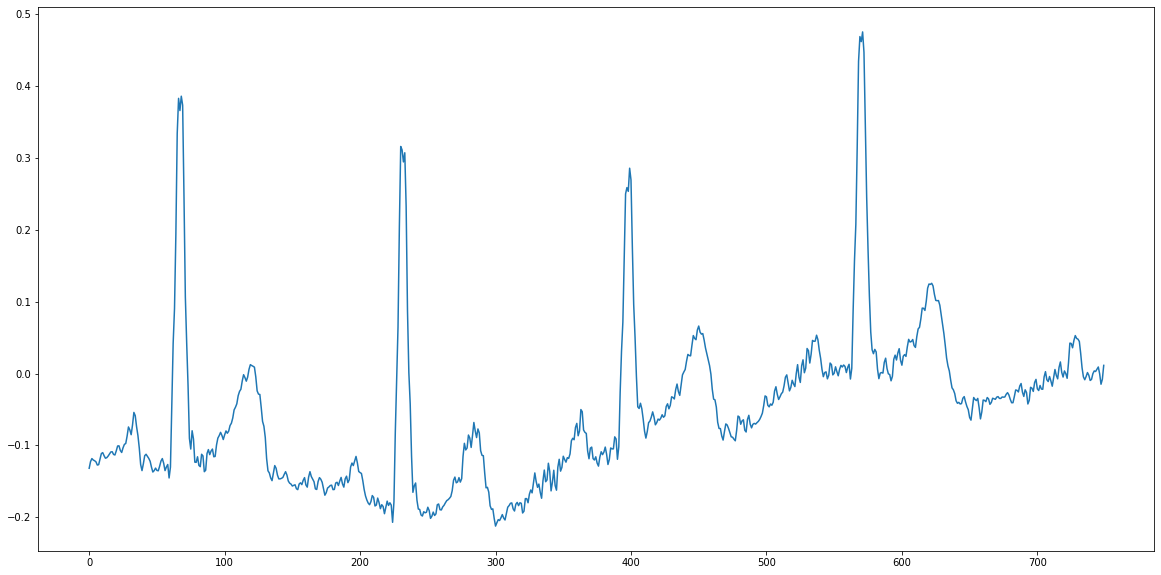

In [187]:
plt.plot(df_new['ECG'][420])

In [136]:
for i in range(len(df)):
    if len(df['ECG'][i]) != 1250 and len(df['ECG'][i]) < 1250:
        print(i, len(df['ECG'][i]))

16 520
32 520
48 520
64 520
80 520
96 520
112 356
128 356
144 356
160 356
176 356
192 356
207 574
222 574
237 574
252 574
267 574
282 574
420 984
436 984
452 984
468 984
484 984
500 984
516 724
532 724
548 724
564 724
580 724
596 724
616 288
632 1161
647 1161
662 1161
677 1161
692 1161
707 1161
722 762
737 762
752 762
767 762
782 762
797 762
812 732
827 732
842 732
857 732
872 732
887 732
906 847
921 453
935 453
949 453
963 453
977 453
991 453
1006 466
1021 466
1036 466
1051 466
1066 466
1081 466
1183 833
1199 1042
1214 1042
1229 1042
1244 1042
1259 1042
1274 1042
1289 333
1304 333
1319 333
1334 333
1349 333
1364 333
1378 1002
1392 1002
1406 1002
1420 1002
1434 1002
1448 1002
1466 583
1482 1152
1497 1152
1512 1152
1527 1152
1542 1152
1557 1152
1668 961
1683 961
1698 961
1713 961
1728 961
1743 961
1797 753
1813 970
1828 970
1843 970
1858 970
1873 970
1888 970
1905 265
1922 265
1939 265
1956 265
1973 265
1990 265
2006 587
2022 587
2038 587
2054 587
2070 587
2086 587
2103 387
2121 567
213

In [133]:
len(df['ECG'][16])

520

In [130]:
ecg = df['ECG'][31]
ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=250)
signals, info = nk.ecg_process(ecg_cleaned, sampling_rate=250, method = 'neurokit')

c:\users\fahre_000\appdata\local\programs\python\python39\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\fahre_000\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [131]:
len(ecg_cleaned)

1250

In [128]:
ecg = df['ECG'][32]
ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=250)
signals, info = nk.ecg_process(ecg_cleaned, sampling_rate=250, method = 'neurokit')

ValueError: cannot convert float NaN to integer

In [101]:
ecg = df['ECG'][16]
ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=250)
signals, info = nk.ecg_process(ecg_cleaned, sampling_rate=250, method = 'neurokit')

state, indexes_for_hr = exctract_hrv(ecg_cleaned, 232.7906976744186, 10.537636727022699, coefficient = 1.5)
exctract_hr(signals, info, indexes_for_hr)

plt.plot(signals['ECG_Rate'])

ValueError: cannot convert float NaN to integer

In [69]:
signals

ECG_Raw  ECG_Clean   ECG_Rate  ECG_Quality  ECG_R_Peaks  ECG_P_Peaks  \
0     0.102875   0.095571  62.630480     0.852586            0            0   
1     0.106892   0.100838  62.630480     0.852586            0            0   
2     0.111199   0.106470  62.630480     0.852586            0            0   
3     0.117217   0.112773  62.630480     0.852586            0            0   
4     0.125224   0.119771  62.630480     0.852586            0            0   
...        ...        ...        ...          ...          ...          ...   
1245 -0.020506  -0.014328  60.240964     0.000000            0            0   
1246 -0.017436  -0.010738  60.240964     0.000000            0            0   
1247 -0.015021  -0.007120  60.240964     0.000000            0            0   
1248 -0.012971  -0.003557  60.240964     0.000000            0            0   
1249 -0.010904  -0.000045  60.240964     0.000000            0            0   

      ECG_P_Onsets  ECG_P_Offsets  ECG_Q_Peaks  ECG_R_Onsets  ECG_R_Offsets  \
0                0              0            0             0              0   
1                0              0            0             0              0   
2                0              0            0             0              0   
3                0              0            0             0              0   
4                0              0            0             0              0   
...            ...            ...          ...           ...            ...   
1245             0              0            0             0              0   
1246             0              0            0             0              0   
1247             0              0            0             0              0   
1248             0              0            0             0              0   
1249             0              0            0             0              0   

      ECG_S_Peaks  ECG_T_Peaks  ECG_T_Onsets  ECG_T_Offsets  ECG_Phase_Atrial  \
0               0            0             0              0               NaN   
1               0            0             0              0               NaN   
2               0            0             0              0               NaN   
3               0            0             0              0               NaN   
4               0            0             0              0               NaN   
...           ...          ...           ...            ...               ...   
1245            0            0             0              0               NaN   
1246            0            0             0              0               NaN   
1247            0            0             0              0               NaN   
1248            0            0             0              0               NaN   
1249            0            0             0              0               NaN   

      ECG_Phase_Completion_Atrial  ECG_Phase_Ventricular  \
0                             0.0                    NaN   
1                             0.0                    NaN   
2                             0.0                    NaN   
3                             0.0                    NaN   
4                             0.0                    NaN   
...                           ...                    ...   
1245                          0.0                    NaN   
1246                          0.0                    NaN   
1247                          0.0                    NaN   
1248                          0.0                    NaN   
1249                          0.0                    NaN   

      ECG_Phase_Completion_Ventricular  
0                                  0.0  
1                                  0.0  
2                                  0.0  
3                                  0.0  
4                                  0.0  
...                                ...  
1245                               0.0  
1246                               0.0  
1247                               0.0  
1248 

In [83]:
signals1

ECG_Raw  ECG_Clean   ECG_Rate  ECG_Quality  ECG_R_Peaks  ECG_P_Peaks  \
0     -0.016467  -0.009900  64.435564     0.622074            0            0   
1     -0.009006  -0.004824  64.435564     0.622074            0            0   
2     -0.002536  -0.000464  64.435564     0.622074            0            0   
3      0.001043   0.002622  64.435564     0.622074            0            0   
4      0.001303   0.004298  64.435564     0.622074            0            0   
...         ...        ...        ...          ...          ...          ...   
30230 -0.068758  -0.057998  68.181818     0.000000            0            0   
30231 -0.063770  -0.052290  68.181818     0.000000            0            0   
30232 -0.054604  -0.043398  68.181818     0.000000            0            0   
30233 -0.040733  -0.031816  68.181818     0.000000            0            0   
30234 -0.023401  -0.018667  68.181818     0.000000            0            0   

       ECG_P_Onsets  ECG_P_Offsets  ECG_Q_Peaks  ECG_R_Onsets  ECG_R_Offsets  \
0                 0              0            0             0              0   
1                 0              0            0             0              0   
2                 0              0            0             0              0   
3                 0              0            0             0              0   
4                 0              0            0             0              0   
...             ...            ...          ...           ...            ...   
30230             0              0            0             0              0   
30231             0              0            0             0              0   
30232             0              0            0             0              0   
30233             0              0            0             0              0   
30234             0              0            0             0              0   

       ECG_S_Peaks  ECG_T_Peaks  ECG_T_Onsets  ECG_T_Offsets  \
0                0            0             0              0   
1                0            0             0              0   
2                0            0             0              0   
3                0            0             0              0   
4                0            0             0              0   
...            ...          ...           ...            ...   
30230            0            0             0              0   
30231            0            0             0              0   
30232            0            0             0              0   
30233            0            0             0              0   
30234            0            0             0              0   

       ECG_Phase_Atrial  ECG_Phase_Completion_Atrial  ECG_Phase_Ventricular  \
0                   NaN                          0.0                    NaN   
1                   NaN                          0.0                    NaN   
2                   NaN                          0.0                    NaN   
3                   NaN                          0.0                    NaN   
4                   NaN                          0.0                    NaN   
...                 ...                          ...                    ...   
30230               NaN                          0.0                    NaN   
30231               NaN                          0.0                    NaN   
30232               NaN                          0.0                    NaN   
30233               NaN                          0.0                    NaN   
30234               NaN                          0.0                    NaN   

       ECG_Phase_Completion_Ventricular  
0                                   0.0  
1                                   0.0  
2                                   0.0  
3                                   0.0  
4                                   0.0  
...                                 ...  
30230                               0.0  
30231                           

In [54]:
increase_idx = [0, 1, 2, 3]

In [207]:
for idx in increase_idx:
    start = info['ECG_R_Peaks'][idx]
    end = info['ECG_R_Peaks'][idx+1]

    moment = np.arange(start,end+1)
    
    increase_count = np.sum(np.isin(moment, time[hr_increases]))
    decrease_count = np.sum(np.isin(moment, time[hr_decreases]))
    print(start,end)
    if increase_count > decrease_count:
        print('increase')
    elif decrease_count > increase_count:
        print('decrease')
    else:
        print('calm')

111 356
increase
356 610
decrease
610 854
increase
854 1106
decrease


In [196]:
info

{'ECG_R_Peaks': array([ 262,  497,  741,  967, 1208]), 'sampling_rate': 250}

In [ ]:
[245, 254, 244, 252]

In [141]:
start

610

In [151]:
356 in time[hr_increases]

False

In [152]:
start = info['ECG_R_Peaks'][1-1]
end = info['ECG_R_Peaks'][1]
moment = np.arange(start,end+1)
    
a_count = np.sum(np.isin(moment, time[hr_increases]))
b_count = np.sum(np.isin(moment, time[hr_decreases]))

In [187]:
ecg_cleaned = nk.ecg_clean(df['ECG'][2], sampling_rate=250)
rr_intervals, info = rr_interval(ecg_cleaned)


In [170]:
rr_intervals

[235, 244, 226, 241]

In [107]:
exctract_hrv(ecg_cleaned, 232.7906976744186, 10.537636727022699, coefficient = 1.5)

increase


In [188]:
rr_intervals

[245, 254, 244, 252]

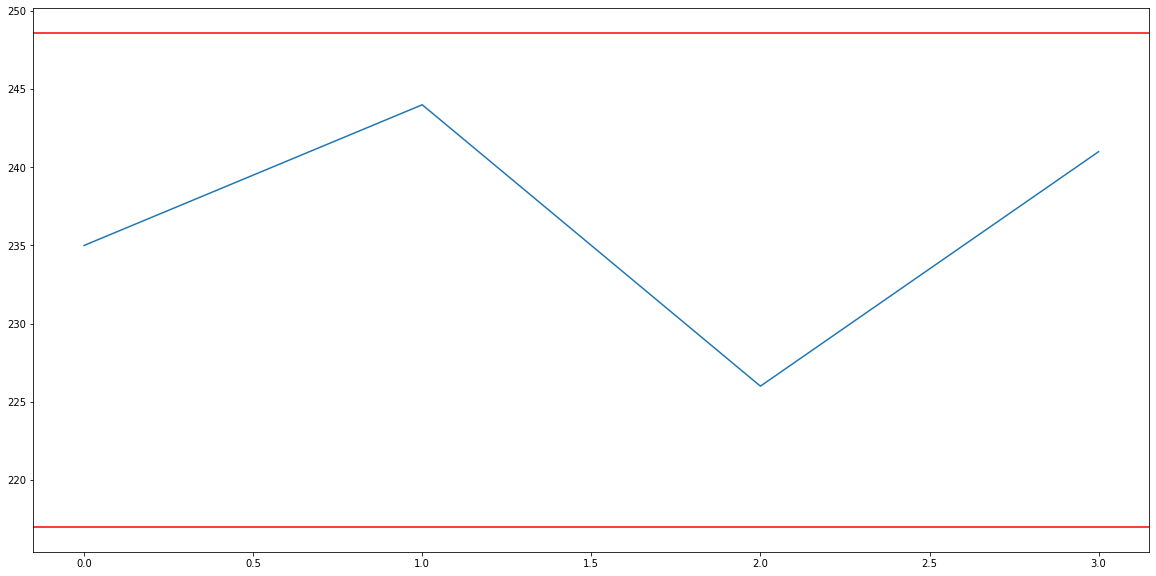

In [172]:
plt.plot(rr_intervals)
plt.axhline(y=232.7906976744186+1.5*10.537636727022699, color='r')
plt.axhline(y=232.7906976744186-1.5*10.537636727022699, color='r')

In [197]:
ecg = df['ECG'][2]
ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=250)
signals, info = nk.ecg_process(ecg_cleaned, sampling_rate=250, method = 'neurokit')

In [198]:
info

{'ECG_R_Peaks': array([ 111,  356,  610,  854, 1106]), 'sampling_rate': 250}

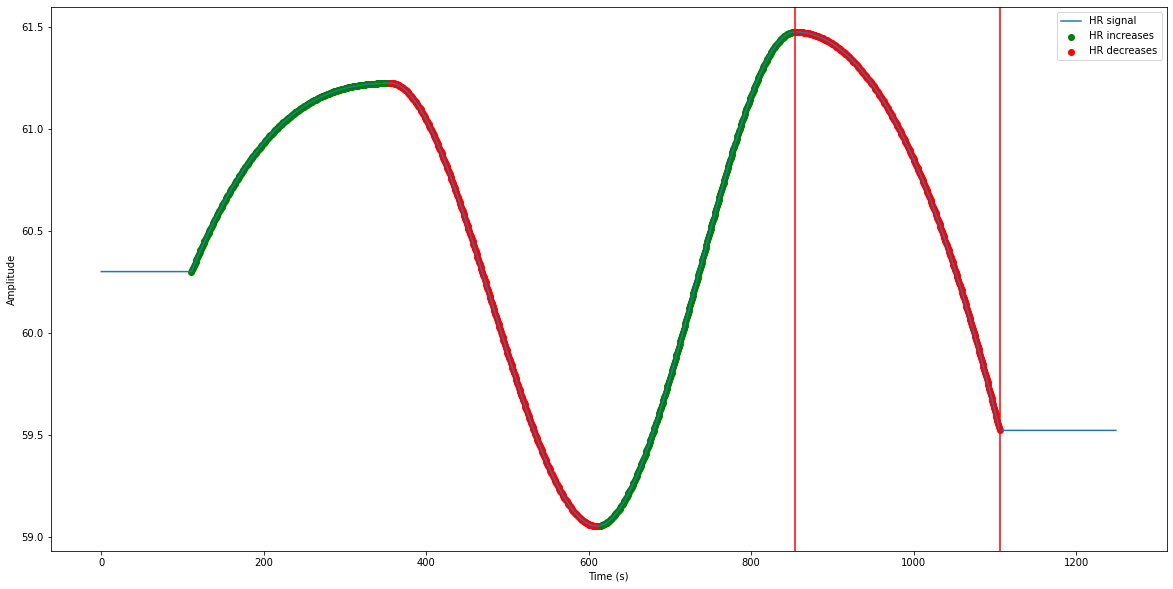

In [208]:
hr_derivative = np.gradient(signals['ECG_Rate'])
hr_increases = np.where(hr_derivative > 0)[0]
hr_decreases = np.where(hr_derivative < 0)[0]
time = np.arange(len(signals['ECG_Rate']))
plt.plot(signals['ECG_Rate'], label='HR signal')
plt.scatter(time[hr_increases], signals['ECG_Rate'][hr_increases], c='g', label='HR increases')
plt.scatter(time[hr_decreases], signals['ECG_Rate'][hr_decreases], c='r', label='HR decreases')
plt.axvline(x=854, color='r')
plt.axvline(x=1106, color='r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [ ]:
def med_feature_extraction(df, unique_names):
    output = pd.DataFrame(columns = ['HRV', 'HR', 'AMP_pwave', 'SGR_amp','PPG_amp'])
    for name in unique_names:
        tmp = df[df['Name'].str.contains(name)]
        tmp = tmp.reset_index(drop = True)
        # HRV mean, HRV std baseline
        ecg = tmp[tmp.block == 'baseline']['ECG'][0]
        ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=250)
        signals, info = nk.ecg_process(ecg_cleaned, sampling_rate=250, method = 'neurokit')
        hrv_features = nk.hrv_time(signals['ECG_R_Peaks'])
        mean_baseline = hrv_features['HRV_MeanNN'][0]
        std_baseline = hrv_features['HRV_SDNN'][0]
        for i in range(len(tmp)):
            
        ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=250)
        
        

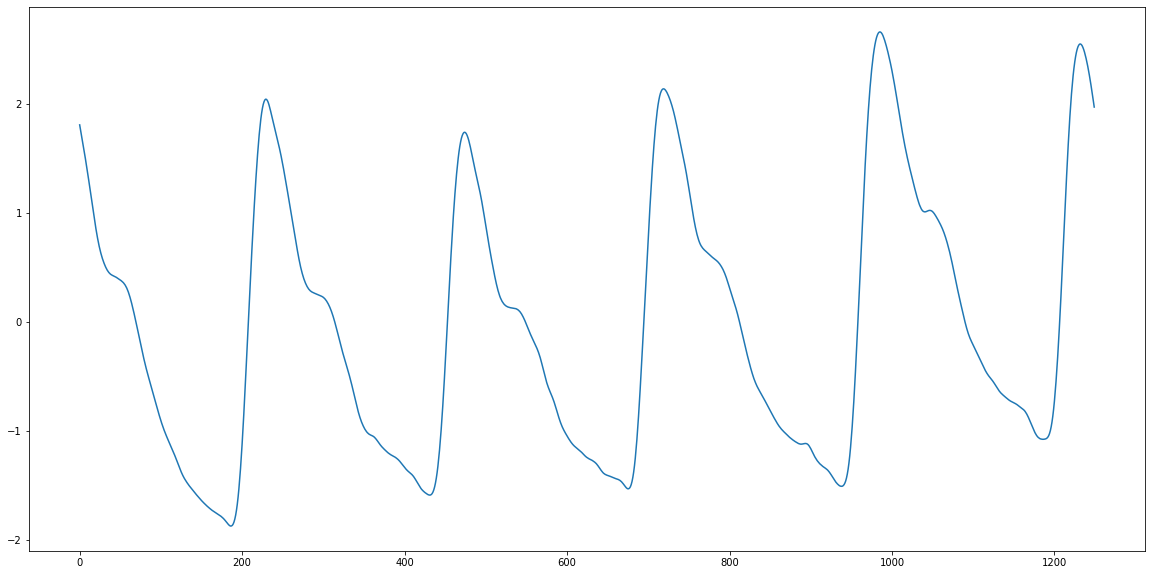

In [91]:
plt.plot(df_new['PPG'][1])

In [102]:
signals, info = nk.ppg_process(df_new['PPG'][0], sampling_rate=250)

In [99]:
info

{'PPG_Peaks': array([230, 474, 719, 985]), 'sampling_rate': 250}

In [104]:
test = []
for i in range(len(info['PPG_Peaks'])):
    if i == len(info['PPG_Peaks'])-1:
        break
    else:
        test.append(info['PPG_Peaks'][i+1] - info['PPG_Peaks'][i])

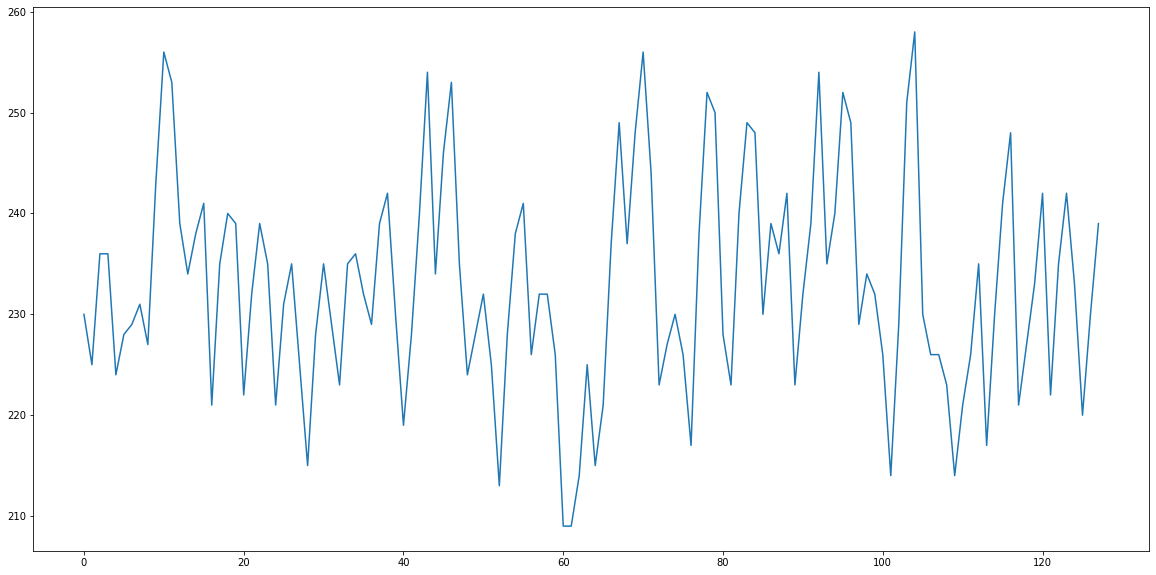

In [105]:
plt.plot(test)

In [106]:
analyze_df = nk.ppg_analyze(signals, sampling_rate=250)
analyze_df

c:\users\fahre_000\appdata\local\programs\python\python39\lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


PPG_Rate_Mean  HRV_MeanNN   HRV_SDNN  HRV_SDANN1  HRV_SDNNI1  HRV_SDANN2  \
0      64.416475     931.625  42.706654         NaN         NaN         NaN   

   HRV_SDNNI2  HRV_SDANN5  HRV_SDNNI5  HRV_RMSSD  ...  HRV_SampEn  HRV_ShanEn  \
0         NaN         NaN         NaN  44.873225  ...    1.616082    5.072202   

   HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn    HRV_CD  HRV_HFD   HRV_KFD  \
0     1.523205  1.333617    1.36874    1.769995  1.895984  1.91159  4.476419   

    HRV_LZC  
0  1.039062  

[1 rows x 81 columns]

In [101]:
for i in range(len(info['PPG_Peaks'])):
    if i == len(info['PPG_Peaks'])-1:
        break
    else:
        print(info['PPG_Peaks'][i+1] - info['PPG_Peaks'][i])

244
245
266


In [97]:
frequency = []
k = 0
for i in range(len(signals)):
    if signals['PPG_Peaks'][i] == 1:
        frequency.append(k)
        k = 0
    else:
        k+=1
        

In [98]:
frequency

[230, 243, 244, 265]

In [ ]:
def ppg_frequency(ppg):
    ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=250)
    rpeaks, info = nk.ecg_peaks(ecg_cleaned, sampling_rate=250, correct_artifacts=True)
    time_diff = []
    for i in range(len(info['ECG_R_Peaks'])):
        if i == len(info['ECG_R_Peaks'])-1:
            break
        else:
            time_diff.append(info['ECG_R_Peaks'][i+1] - info['ECG_R_Peaks'][i])

In [25]:
tmp = df_test[df_test['Name'].str.contains('MitDG')]

tmp = tmp.reset_index(drop = True)

In [26]:
tmp

Name          block           group  \
0   03_MitDG_baseline.txt       baseline  Wrong_feedback   
1     03_MitDG_block1.txt  block1_level1  Wrong_feedback   
2     03_MitDG_block1.txt  block1_level2  Wrong_feedback   
3     03_MitDG_block1.txt  block1_level3  Wrong_feedback   
4     03_MitDG_block1.txt  block1_level4  Wrong_feedback   
5     03_MitDG_block1.txt  block1_level5  Wrong_feedback   
6     03_MitDG_block1.txt  block1_level6  Wrong_feedback   
7     03_MitDG_block2.txt  block2_level1  Wrong_feedback   
8     03_MitDG_block2.txt  block2_level2  Wrong_feedback   
9     03_MitDG_block2.txt  block2_level3  Wrong_feedback   
10    03_MitDG_block2.txt  block2_level4  Wrong_feedback   
11    03_MitDG_block2.txt  block2_level5  Wrong_feedback   
12    03_MitDG_block2.txt  block2_level6  Wrong_feedback   
13    03_MitDG_block3.txt  block3_level1  Wrong_feedback   
14    03_MitDG_block3.txt  block3_level2  Wrong_feedback   
15    03_MitDG_block3.txt  block3_level3  Wrong_feedback   
16    03_MitDG_block3.txt  block3_level4  Wrong_feedback   
17    03_MitDG_block3.txt  block3_level5  Wrong_feedback   
18    03_MitDG_block3.txt  block3_level6  Wrong_feedback   
19  03_MitDG_training.txt       training  Wrong_feedback   

                                                  ECG  \
0   [-0.03725, -0.0455, -0.04675, -0.044, -0.0485,...   
1   [0.03325, 0.03025, 0.02275, 0.00975, -0.0205, ...   
2   [0.04175, 0.0325, 0.04125, 0.05675, 0.0675, 0....   
3   [0.049, 0.04725, 0.05, 0.06025, 0.05975, 0.053...   
4   [0.016, 0.00225, -0.00375, -0.00675, -0.0085, ...   
5   [0.055, 0.0515, 0.0375, -0.0125, -0.056, -0.05...   
6   [-0.01825, -0.02575, -0.02425, -0.0215, -0.031...   
7   [-0.12025, -0.088, -0.096, -0.10875, -0.06425,...   
8   [-0.038, -0.03175, -0.03275, -0.03325, -0.0007...   
9   [0.026, 0.02125, 0.01775, 0.022, 0.02775, 0.02...   
10  [-0.021, -0.0255, -0.025, -0.02625, -0.0285, -...   
11  [-0.02675, -0.02525, -0.02725, -0.0225, -0.01,...   
12  [-0.01475, -0.0195, -0.02325, -0.02175, -0.022...   
13  [-0.04025, -0.034, -0.029, -0.032, -0.0285, -0...   
14  [0.01075, 0.01975, 0.032, 0.038, 0.038, 0.0412...   
15  [0.05675, 0.05075, 0.0425, 0.04825, 0.05775, 0...   
16  [0.064, 0.07025, 0.072, 0.069, 0.07025, 0.0707...   
17  [0.074, 0.07, 0.03725, -0.002, -0.033, -0.0692...   
18  [-0.0175, -0.036, -0.0575, -0.0365, 0.0255, 0....   
19  [-0.07775, -0.07825, -0.089, -0.06775, 0.00675...   

                                                  SGR  \
0   [0.671387, 0.671387, 0.669861, 0.669861, 0.668...   
1   [-0.140381, -0.131226, -0.12207, -0.112915, -0...   
2   [-0.813293, -0.814819, -0.814819, -0.816345, -...   
3   [-1.4389, -1.4389, -1.4389, -1.4389, -1.43738,...   
4   [-0.479126, -0.479126, -0.480652, -0.480652, -...   
5   [-0.209045, -0.209045, -0.209045, -0.209045, -...   
6   [-0.0228882, -0.0228882, -0.0228882, -0.024414...   
7   [-1.02386, -1.02234, -1.02234, -1.02234, -1.02...   
8   [0.521851, 0.520325, 0.520325, 0.518799, 0.518...   
9   [-0.062561, -0.0671387, -0.0717163, -0.0762939...   
10  [0.0762939, 0.0762939, 0.0762939, 0.0762939, 0...   
11  [0.360107, 0.360107, 0.360107, 0.360107, 0.360...   
12  [1.21918, 1.22375, 1.22681, 1.23138, 1.23444, ...   
13  [3.35236, 3.3905, 3.42712, 3.46527, 3.50494, 3...   
14  [0.120544, 0.120544, 0.120544, 0.120544, 0.122...   
15  [0.686646, 0.688171, 0.688171, 0.689697, 0.689...   
16  [0.117493, 0.115967, 0.115967, 0.115967, 0.114...   
17  [1.79901, 1.79749, 1.79749, 1.79596, 1.79596, ...   
18  [0.9552, 0.9552, 0.953674, 0.953674, 0.953674,...   
19  [-4.54102, -4.53796, -4.53796, -4.53796, -4.54...   

                                                  PPG  \
0   [0.26875, 0.274375, 0.279375, 0.2825, 0.285, 0...   
1   [-0.030625, -0.034375, -0.0375, -0.040625, -0....   
2   [-0.0675, -0.055, -0.041875, -0.02875, -0.0156...   
3   [-0.014375, -0.013125, -0.01, -0.005, 0.0025, ...   
4   [0.106875, 0.1075, 0.108125, 0.10875, 0.10875,...   
5   [-0.0425, -0.04187

In [81]:
ecg = tmp["ECG"][0]
ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=250)
signals, info = nk.ecg_process(ecg_cleaned, sampling_rate=250, method = 'neurokit')
hrv_features = nk.hrv_time(signals['ECG_R_Peaks'])
mean_baseline = hrv_features['HRV_MeanNN'][0]
std_baseline = hrv_features['HRV_SDNN'][0]

In [96]:
ecg = df['ECG'][1]
ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=250)
signals, info = nk.ecg_process(ecg_cleaned, sampling_rate=250, method = 'neurokit')

In [97]:
signals

ECG_Raw  ECG_Clean   ECG_Rate  ECG_Quality  ECG_R_Peaks  ECG_P_Peaks  \
0    -0.013048  -0.006601  59.940060     0.806367            0            0   
1    -0.012062  -0.005666  59.940060     0.806367            0            0   
2    -0.010216  -0.004758  59.940060     0.806367            0            0   
3    -0.009201  -0.004014  59.940060     0.806367            0            0   
4    -0.009586  -0.003465  59.940060     0.806367            0            0   
...        ...        ...        ...          ...          ...          ...   
1245 -0.047001  -0.041602  60.483871     0.000000            0            0   
1246 -0.047676  -0.040684  60.483871     0.000000            0            0   
1247 -0.046177  -0.038987  60.483871     0.000000            0            0   
1248 -0.042658  -0.036496  60.483871     0.000000            0            0   
1249 -0.038572  -0.033550  60.483871     0.000000            0            0   

      ECG_P_Onsets  ECG_P_Offsets  ECG_Q_Peaks  ECG_R_Onsets  ECG_R_Offsets  \
0                0              0            0             0              0   
1                0              0            0             0              0   
2                0              0            0             0              0   
3                0              0            0             0              0   
4                0              0            0             0              0   
...            ...            ...          ...           ...            ...   
1245             0              0            0             0              0   
1246             0              0            0             0              0   
1247             0              0            0             0              0   
1248             0              0            0             0              0   
1249             0              0            0             0              0   

      ECG_S_Peaks  ECG_T_Peaks  ECG_T_Onsets  ECG_T_Offsets  ECG_Phase_Atrial  \
0               0            0             0              0               NaN   
1               0            0             0              0               NaN   
2               0            0             0              0               NaN   
3               0            0             0              0               NaN   
4               0            0             0              0               NaN   
...           ...          ...           ...            ...               ...   
1245            0            0             0              0               NaN   
1246            0            0             0              0               NaN   
1247            0            0             0              0               NaN   
1248            0            0             0              0               NaN   
1249            0            0             0              0               NaN   

      ECG_Phase_Completion_Atrial  ECG_Phase_Ventricular  \
0                             0.0                    NaN   
1                             0.0                    NaN   
2                             0.0                    NaN   
3                             0.0                    NaN   
4                             0.0                    NaN   
...                           ...                    ...   
1245                          0.0                    NaN   
1246                          0.0                    NaN   
1247                          0.0                    NaN   
1248                          0.0                    NaN   
1249                          0.0                    NaN   

      ECG_Phase_Completion_Ventricular  
0                                  0.0  
1                                  0.0  
2                                  0.0  
3                                  0.0  
4                                  0.0  
...                                ...  
1245                               0.0  
1246                               0.0  
1247                               0.0  
1248 

In [99]:
hr_derivative = np.gradient(signals['ECG_Rate'])
hr_increases = np.where(hr_derivative > 0)[0]
hr_decreases = np.where(hr_derivative < 0)[0]
time = np.arange(len(signals['ECG_Rate']))
plt.plot(signals['ECG_Rate'], label='HR signal')
plt.scatter(time[hr_increases], signals['ECG_Rate'][hr_increases], c='g', label='HR increases')
plt.scatter(time[hr_decreases], signals['ECG_Rate'][hr_decreases], c='r', label='HR decreases')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

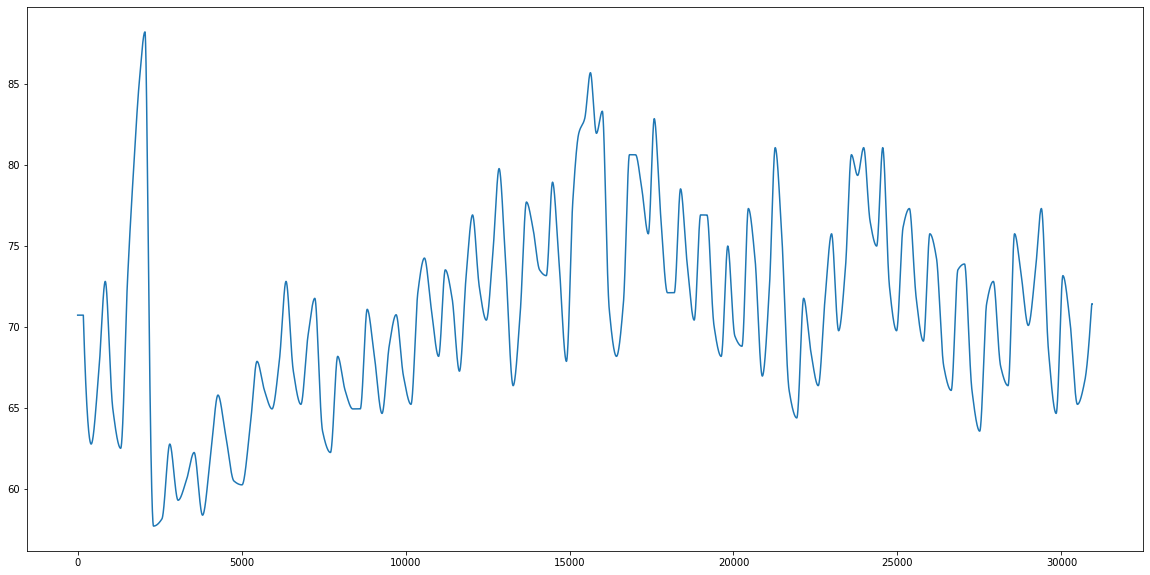

In [83]:
plt.plot(signals['ECG_Rate'])

In [28]:
print(mean_baseline)
print(std_baseline)

212.0758620689655
18.532659894322258


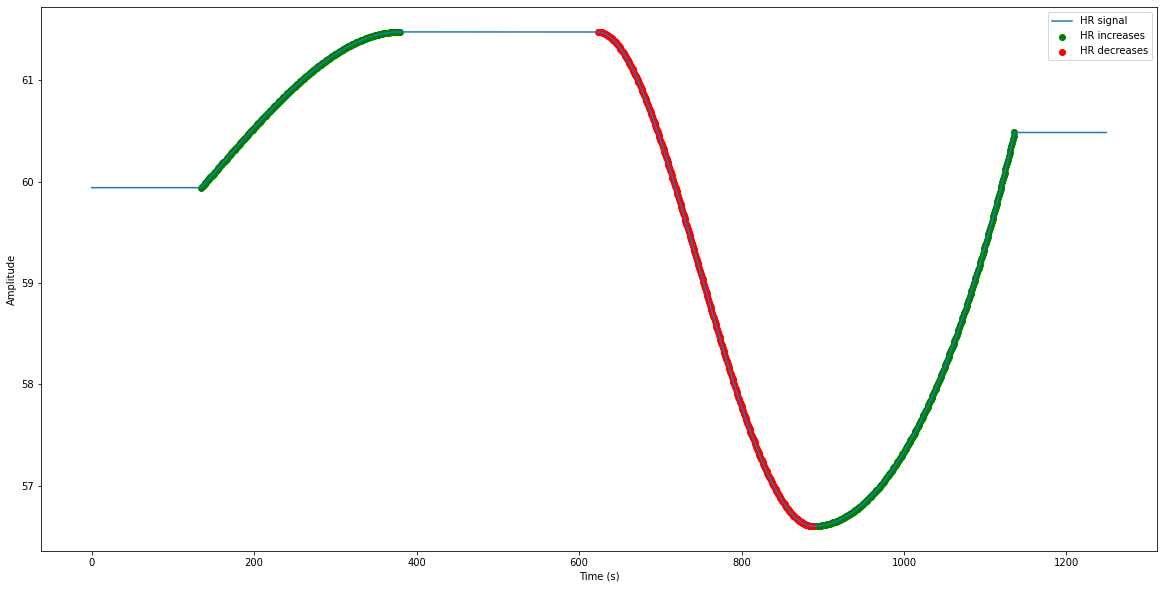

In [29]:
threshold_down = mean_baseline * 0.8
print(threshold_down)
threshold_up = mean_baseline * 1.2
print(threshold_up)

169.6606896551724
254.4910344827586


In [20]:
mean_baseline*4/1000

0.9311627906976744

block2_level5
191.2
7.30479294709987


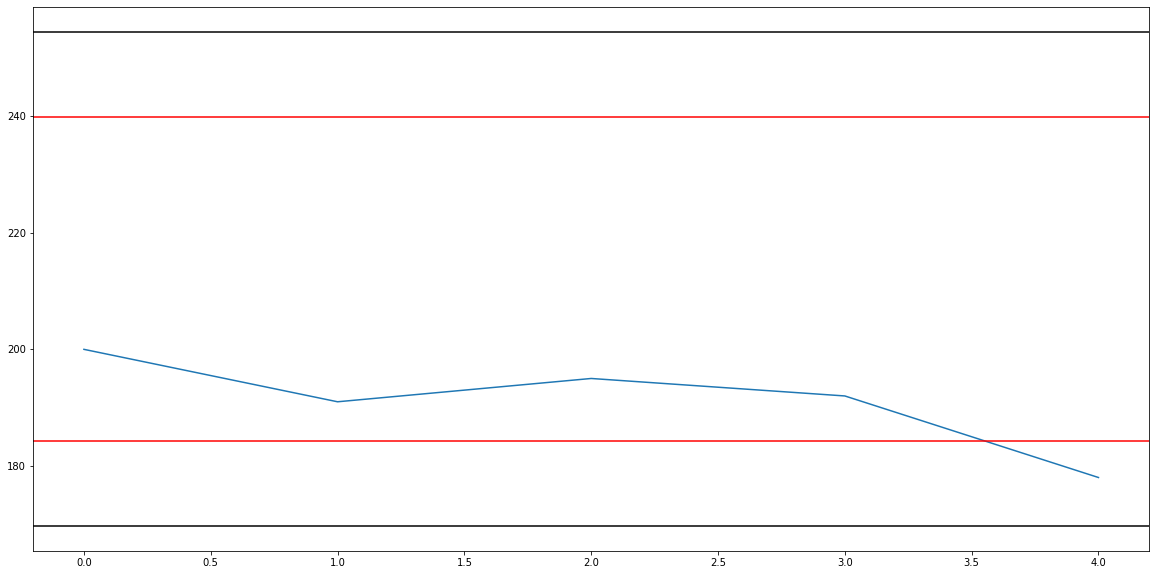

In [39]:
index = 11
ecg = tmp['ECG'][index][:1250]
print(tmp['block'][index])
ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=250)
rr_intervals, info = rr_interval(ecg_cleaned)
print(np.mean(rr_intervals))
print(np.std(rr_intervals))
plt.plot(rr_intervals)
plt.axhline(y=mean_baseline+1.5*std_baseline, color='r')
plt.axhline(y=mean_baseline-1.5*std_baseline, color='r')
plt.axhline(y=threshold_down, color='black')
plt.axhline(y=threshold_up, color='black')

In [40]:
for k in range(len(rr_intervals)):
    if rr_intervals[k] < mean_baseline-std_baseline:
        print('HRV decrease detected in {} RR interval'.format(k))
    elif rr_intervals[k] > mean_baseline+std_baseline:
        print('HRV increase detected in {} RR interval'.format(k))
    else:
        print('Nothing')

Nothing
HRV decrease detected in 1 RR interval
Nothing
HRV decrease detected in 3 RR interval
HRV decrease detected in 4 RR interval


In [38]:
for i in range(1,len(tmp)):
    ecg = tmp['ECG'][i]
    ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=250)
    rr_intervals, info = rr_interval(ecg_cleaned)
    print(tmp['block'][i])
    for k in range(len(rr_intervals)):
        if rr_intervals[k] < mean_baseline-std_baseline:
            print('HRV decrease detected in {} RR interval'.format(k))
        elif rr_intervals[k] > mean_baseline+std_baseline:
            print('HRV increase detected in {} RR interval'.format(k))
        else:
            print('Nothing')

block1_level1
Nothing
Nothing
Nothing
HRV decrease detected in 3 RR interval
Nothing
Nothing
Nothing
Nothing
HRV decrease detected in 8 RR interval
HRV decrease detected in 9 RR interval
HRV increase detected in 10 RR interval
HRV increase detected in 11 RR interval
Nothing
Nothing
Nothing
HRV decrease detected in 15 RR interval
HRV decrease detected in 16 RR interval
HRV decrease detected in 17 RR interval
HRV decrease detected in 18 RR interval
HRV decrease detected in 19 RR interval
Nothing
HRV decrease detected in 21 RR interval
HRV decrease detected in 22 RR interval
Nothing
Nothing
HRV decrease detected in 25 RR interval
HRV decrease detected in 26 RR interval
HRV decrease detected in 27 RR interval
Nothing
HRV decrease detected in 29 RR interval
HRV decrease detected in 30 RR interval
HRV decrease detected in 31 RR interval
Nothing
Nothing
HRV decrease detected in 34 RR interval
HRV decrease detected in 35 RR interval
HRV decrease detected in 36 RR interval
Nothing
Nothing
Nothi

HRV decrease detected in 19 RR interval
HRV decrease detected in 20 RR interval
HRV decrease detected in 21 RR interval
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
HRV decrease detected in 29 RR interval
HRV decrease detected in 30 RR interval
HRV decrease detected in 31 RR interval
HRV decrease detected in 32 RR interval
HRV decrease detected in 33 RR interval
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
HRV decrease detected in 41 RR interval
HRV decrease detected in 42 RR interval
HRV decrease detected in 43 RR interval
Nothing
HRV decrease detected in 45 RR interval
HRV decrease detected in 46 RR interval
HRV decrease detected in 47 RR interval
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
HRV decrease detected in 55 RR interval
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
HRV decrease detected in 74 RR interval
Nothing
Nothing
Nothing
HRV decrease det

block3_level4
Nothing
Nothing
HRV decrease detected in 2 RR interval
Nothing
Nothing
Nothing
HRV decrease detected in 6 RR interval
Nothing
Nothing
Nothing
HRV decrease detected in 10 RR interval
Nothing
Nothing
Nothing
Nothing
HRV decrease detected in 15 RR interval
HRV decrease detected in 16 RR interval
HRV decrease detected in 17 RR interval
HRV decrease detected in 18 RR interval
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
HRV decrease detected in 34 RR interval
HRV decrease detected in 35 RR interval
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
HRV decrease detected in 43 RR interval
HRV decrease detected in 44 RR interval
HRV decrease detected in 45 RR interval
HRV decrease detected in 46 RR interval
HRV decrease detected in 47 RR interval
HRV decrease detected in 48 RR interval
HRV decrease detected in 49 RR interval
HRV decrease detected in 50 RR interval
HRV decrease detected in 51 RR inter

In [24]:
ecg = tmp["ECG"][0]
ecg_cleaned1 = nk.ecg_clean(ecg, sampling_rate=250)
rr_intervals, info = rr_interval(ecg_cleaned1[1250:2500])

In [25]:
info

{'ECG_R_Peaks': array([ 103,  255,  412,  570,  725,  880, 1030, 1170]),
 'sampling_rate': 250}

In [26]:
rr_intervals

[152, 157, 158, 155, 155, 150, 140]

In [27]:
threshold_down = mean_baseline * 0.8
print(threshold_down)
threshold_up = mean_baseline * 1.2
print(threshold_up)

140.0982456140351
210.14736842105262


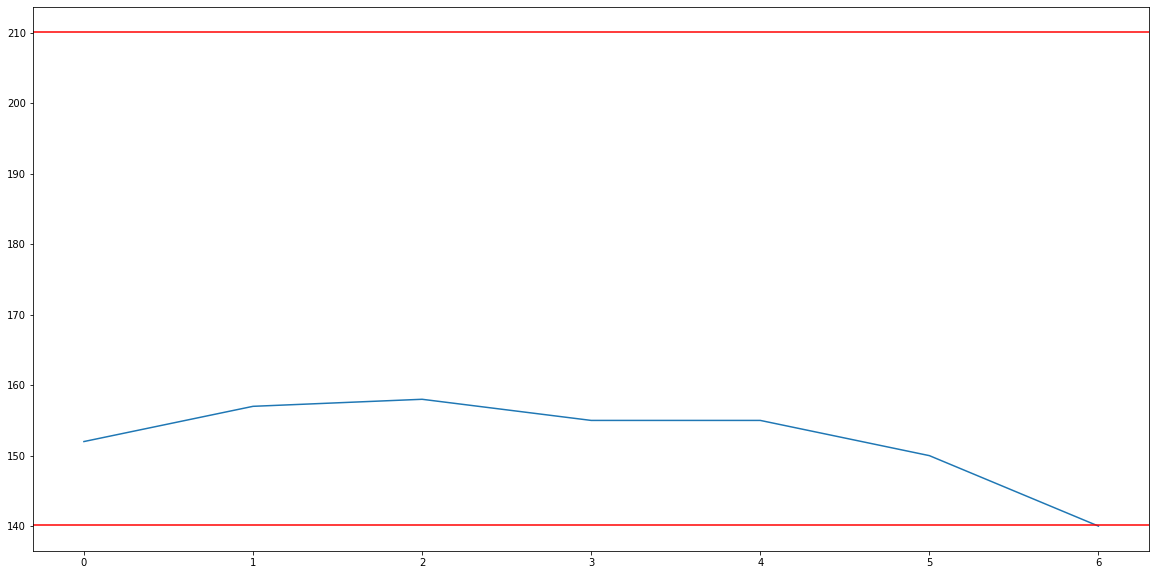

In [28]:
plt.plot(rr_intervals)
plt.axhline(y=threshold_down, color='r')
plt.axhline(y=threshold_up, color='r')

In [29]:
for i in range(len(rr_intervals)):
    if rr_intervals[i] < threshold_down:
        print('HRV decrease detected in {} RR interval'.format(i))
    elif rr_intervals[i] > threshold_up:
        print('HRV increase detected in {} RR interval'.format(i))
    else:
        print('Nothing')

Nothing
Nothing
Nothing
Nothing
Nothing
Nothing
HRV decrease detected in 6 RR interval


In [32]:
info['ECG_R_Peaks'][6]

1030